In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name
%matplotlib inline

In [2]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Papermill notebook parameters
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10
plots_dir = "output/plots"


In [5]:
# Parameters
plots_dir = "notebooks/output/benchmark/plots"


In [6]:
os.makedirs(plots_dir, exist_ok=True)

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

gym_env = cast(CyberBattleEnv, _gym_env)


ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/envs/registration.py:481: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes']
  logger.warn(
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.identifiers to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.identifiers` for environment variables or `env.get_wrapper_attr('identifiers')` that will search the reminding wrappers.
  logger.warn(


In [7]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, _, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:140: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'tuple'>
  logger.warn(f"{pre} was expecting a numpy array, actual type: {type(obs)}")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'numpy.int32'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.sample_valid_action to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sample_valid_action` for environment variables or `env.get_wrapper_attr('sample_valid_action')` that will search the reminding wrappers.
  logger.warn(
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:140: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'tuple'>
  logger.warn(f"{pre} was expecting a numpy array, actual type: {type(obs)}")
/home/wblum/minicond

Episode 1|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:   31.0|last_reward_at:   16|Elapsed Time: 0:00:00||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.
  logger.warn(
Episode 1|Iteration 20|reward:   42.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:   42.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:   53.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:   53.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:   67.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:   67.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:   81.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:   81.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 88|reward:  131.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 88|reward:  131.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  181.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  181.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 133|reward:  181.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 143|reward:  192.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 143|reward:  192.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 1|Iteration 171|reward:  192.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 1|Iteration 209|reward:  192.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 1|Iteration 246|reward:  198.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 1|Iteration 246|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 1|Iteration 285|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 1|Iteration 323|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 1|Iteration 361|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 1|Iteration 399|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 1|Iteration 437|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 1|Iteration 475|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 1|Iteration 513|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 1|Iteration 551|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 1|Iteration 589|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 1|Iteration 627|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 1|Iteration 665|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 1|Iteration 703|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 1|Iteration 741|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 1|Iteration 779|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 1|Iteration 817|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 1|Iteration 855|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 1|Iteration 893|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 1|Iteration 931|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 1|Iteration 969|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 1|Iteration 1007|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 1|Iteration 1045|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 1|Iteration 1083|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:02||

Episode 1|Iteration 1121|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:02||

Episode 1|Iteration 1159|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:02||

Episode 1|Iteration 1197|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:02||

Episode 1|Iteration 1235|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:02||

Episode 1|Iteration 1273|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:02||

Episode 1|Iteration 1311|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:02||

Episode 1|Iteration 1349|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:02||

Episode 1|Iteration 1387|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:02||

Episode 1|Iteration 1425|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:02||

Episode 1|Iteration 1463|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:02||

Episode 1|Iteration 1500|reward:  198.0|last_reward_at:  246|Elapsed Time: 0:00:02||

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/148 (0.01)
    explore-remote: 8/1103 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/238 (0.01)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.7886, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:   22.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:   22.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 122|reward:   33.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 122|reward:   33.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 2|Iteration 124|reward:   47.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 2|Iteration 124|reward:   47.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:   97.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:   97.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 140|reward:  106.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 140|reward:  106.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 2|Iteration 141|reward:  112.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 2|Iteration 141|reward:  112.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 2|Iteration 150|reward:  123.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 2|Iteration 150|reward:  123.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward:  123.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 2|Iteration 223|reward:  137.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 2|Iteration 223|reward:  137.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 2|Iteration 226|reward:  187.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 2|Iteration 226|reward:  187.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 2|Iteration 266|reward:  187.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 2|Iteration 279|reward:  198.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 2|Iteration 279|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 2|Iteration 323|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 2|Iteration 342|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 2|Iteration 380|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 2|Iteration 418|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 2|Iteration 456|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 2|Iteration 494|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 2|Iteration 532|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 2|Iteration 551|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 2|Iteration 589|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 2|Iteration 608|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 2|Iteration 646|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 2|Iteration 684|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 2|Iteration 722|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 2|Iteration 760|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 2|Iteration 798|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 2|Iteration 836|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 2|Iteration 874|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 2|Iteration 911|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 2|Iteration 950|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 2|Iteration 988|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 2|Iteration 1026|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 2|Iteration 1064|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 2|Iteration 1102|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 2|Iteration 1140|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 2|Iteration 1178|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 2|Iteration 1216|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 2|Iteration 1235|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 2|Iteration 1273|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 2|Iteration 1292|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 2|Iteration 1330|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 2|Iteration 1349|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 2|Iteration 1387|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 2|Iteration 1425|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 2|Iteration 1444|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 2|Iteration 1482|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 2|Iteration 1500|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:03||

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/162 (0.01)
    explore-remote: 8/938 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/389 (0.01)
  exploit deflected to exploration: 27
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.6927, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 84|reward:   36.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 84|reward:   36.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 3|Iteration 88|reward:   86.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 3|Iteration 88|reward:   86.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:   86.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:   86.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 3|Iteration 181|reward:   97.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 3|Iteration 181|reward:   97.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 3|Iteration 192|reward:  103.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 3|Iteration 192|reward:  103.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  103.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 3|Iteration 254|reward:  112.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 3|Iteration 254|reward:  112.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 3|Iteration 285|reward:  112.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 3|Iteration 305|reward:  123.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 3|Iteration 305|reward:  123.0|last_reward_at:  305|Elapsed Time: 0:00:00||

Episode 3|Iteration 308|reward:  137.0|last_reward_at:  305|Elapsed Time: 0:00:00||

Episode 3|Iteration 308|reward:  137.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 3|Iteration 312|reward:  187.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 3|Iteration 312|reward:  187.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 3|Iteration 342|reward:  187.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 3|Iteration 349|reward:  198.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 3|Iteration 349|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:00||

Episode 3|Iteration 380|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:00||

Episode 3|Iteration 418|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:00||

Episode 3|Iteration 456|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:00||

Episode 3|Iteration 494|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 3|Iteration 532|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 3|Iteration 570|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 3|Iteration 608|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 3|Iteration 646|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 3|Iteration 665|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 3|Iteration 703|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 3|Iteration 741|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 3|Iteration 779|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 3|Iteration 817|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 3|Iteration 855|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 3|Iteration 893|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 3|Iteration 912|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 3|Iteration 950|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 3|Iteration 988|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 3|Iteration 1026|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 3|Iteration 1045|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 3|Iteration 1083|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 3|Iteration 1121|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 3|Iteration 1159|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 3|Iteration 1197|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 3|Iteration 1235|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 3|Iteration 1273|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 3|Iteration 1311|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 3|Iteration 1330|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:02||

Episode 3|Iteration 1368|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:03||

Episode 3|Iteration 1406|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:03||

Episode 3|Iteration 1425|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:03||

Episode 3|Iteration 1463|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:03||

Episode 3|Iteration 1499|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:03||

Episode 3|Iteration 1500|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:03||

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/116 (0.01)
    explore-remote: 8/929 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/444 (0.00)
  exploit deflected to exploration: 84
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.6102, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward:   47.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward:   47.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:   97.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:   97.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  106.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  106.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  112.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  112.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 133|reward:  112.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:  112.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 176|reward:  123.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 176|reward:  123.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 4|Iteration 209|reward:  123.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 4|Iteration 247|reward:  123.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 4|Iteration 266|reward:  123.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 4|Iteration 301|reward:  137.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 4|Iteration 301|reward:  137.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 4|Iteration 303|reward:  187.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 4|Iteration 303|reward:  187.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 4|Iteration 342|reward:  187.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 4|Iteration 380|reward:  187.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 4|Iteration 418|reward:  187.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 4|Iteration 456|reward:  187.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 4|Iteration 494|reward:  187.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 4|Iteration 524|reward:  198.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 4|Iteration 524|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 4|Iteration 551|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 4|Iteration 589|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 4|Iteration 627|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 4|Iteration 665|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 4|Iteration 703|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 4|Iteration 722|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 4|Iteration 741|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 4|Iteration 779|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 4|Iteration 798|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 4|Iteration 836|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 4|Iteration 855|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 4|Iteration 893|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 4|Iteration 912|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 4|Iteration 931|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 4|Iteration 950|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 4|Iteration 969|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 4|Iteration 988|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 4|Iteration 1007|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 4|Iteration 1026|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 4|Iteration 1045|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 4|Iteration 1064|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 4|Iteration 1083|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 4|Iteration 1121|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 4|Iteration 1140|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 4|Iteration 1159|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 4|Iteration 1178|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 4|Iteration 1216|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 4|Iteration 1235|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 4|Iteration 1254|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 4|Iteration 1292|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 4|Iteration 1329|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 4|Iteration 1349|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 4|Iteration 1368|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 4|Iteration 1406|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 4|Iteration 1425|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 4|Iteration 1444|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 4|Iteration 1482|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 4|Iteration 1500|reward:  198.0|last_reward_at:  524|Elapsed Time: 0:00:03||

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/90 (0.01)
    explore-remote: 8/768 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/631 (0.00)
  exploit deflected to exploration: 21
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.5391, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:   33.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:   47.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:   47.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward:   97.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward:   97.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 5|Iteration 46|reward:  103.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 5|Iteration 46|reward:  103.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:  103.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 95|reward:  103.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 101|reward:  114.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 101|reward:  114.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 120|reward:  128.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 120|reward:  128.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 5|Iteration 121|reward:  178.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 5|Iteration 121|reward:  178.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 5|Iteration 127|reward:  187.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 5|Iteration 127|reward:  187.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 5|Iteration 152|reward:  187.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 5|Iteration 161|reward:  198.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 5|Iteration 161|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 5|Iteration 190|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 5|Iteration 209|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 5|Iteration 247|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 5|Iteration 266|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 5|Iteration 285|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 5|Iteration 304|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 5|Iteration 342|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 5|Iteration 380|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 5|Iteration 399|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 5|Iteration 437|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 5|Iteration 456|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 5|Iteration 494|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 5|Iteration 532|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 5|Iteration 551|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 5|Iteration 588|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 5|Iteration 608|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 5|Iteration 646|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 5|Iteration 684|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 5|Iteration 720|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 5|Iteration 741|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 5|Iteration 760|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 5|Iteration 779|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 5|Iteration 798|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 5|Iteration 817|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 5|Iteration 836|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 5|Iteration 855|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 5|Iteration 874|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 5|Iteration 893|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 5|Iteration 912|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 5|Iteration 931|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 5|Iteration 950|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 5|Iteration 969|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 5|Iteration 1007|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 5|Iteration 1026|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 5|Iteration 1064|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:02||

Episode 5|Iteration 1083|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 1092|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 1102|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 1120|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 1140|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 1159|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 1178|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 1197|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 1216|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 1235|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 1254|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 1273|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 1292|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 1311|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 1330|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:04||

Episode 5|Iteration 1349|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:04||

Episode 5|Iteration 1368|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:04||

Episode 5|Iteration 1387|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:04||

Episode 5|Iteration 1406|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:04||

Episode 5|Iteration 1425|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:04||

Episode 5|Iteration 1444|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:04||

Episode 5|Iteration 1463|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:04||

Episode 5|Iteration 1482|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:04||

Episode 5|Iteration 1500|reward:  198.0|last_reward_at:  161|Elapsed Time: 0:00:04||

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/82 (0.01)
    explore-remote: 8/727 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/680 (0.00)
  exploit deflected to exploration: 57
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.4779, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:   22.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 38|reward:   22.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 69|reward:   22.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 70|reward:   36.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 70|reward:   36.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 6|Iteration 71|reward:   86.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 6|Iteration 71|reward:   86.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 6|Iteration 90|reward:   86.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 6|Iteration 98|reward:   92.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 6|Iteration 98|reward:   92.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 6|Iteration 106|reward:  103.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 6|Iteration 106|reward:  103.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 6|Iteration 124|reward:  112.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 6|Iteration 124|reward:  112.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 6|Iteration 137|reward:  123.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 6|Iteration 137|reward:  123.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 6|Iteration 152|reward:  123.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 6|Iteration 165|reward:  137.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 6|Iteration 165|reward:  137.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 6|Iteration 168|reward:  187.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 6|Iteration 168|reward:  187.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 6|Iteration 173|reward:  198.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 6|Iteration 173|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 6|Iteration 190|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 6|Iteration 209|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 6|Iteration 228|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 6|Iteration 247|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 6|Iteration 266|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 6|Iteration 280|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 6|Iteration 293|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 6|Iteration 313|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 6|Iteration 339|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 6|Iteration 361|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 6|Iteration 380|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 6|Iteration 399|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 6|Iteration 418|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 6|Iteration 437|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 6|Iteration 456|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 6|Iteration 475|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 6|Iteration 494|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 6|Iteration 513|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 6|Iteration 532|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 6|Iteration 551|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 6|Iteration 570|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 6|Iteration 589|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 6|Iteration 605|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 6|Iteration 627|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 6|Iteration 646|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 6|Iteration 665|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 6|Iteration 684|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 6|Iteration 703|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 6|Iteration 722|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 6|Iteration 741|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 6|Iteration 760|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 6|Iteration 779|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 6|Iteration 798|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 6|Iteration 817|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 6|Iteration 836|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 6|Iteration 855|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 6|Iteration 874|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 6|Iteration 893|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 6|Iteration 912|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 6|Iteration 931|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 6|Iteration 950|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 6|Iteration 969|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 6|Iteration 988|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 6|Iteration 1007|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 6|Iteration 1026|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 6|Iteration 1045|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 6|Iteration 1064|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 6|Iteration 1083|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 6|Iteration 1102|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 6|Iteration 1121|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 6|Iteration 1140|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 6|Iteration 1159|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 6|Iteration 1178|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 6|Iteration 1197|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 6|Iteration 1216|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 6|Iteration 1235|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 6|Iteration 1254|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 6|Iteration 1273|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 6|Iteration 1292|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 6|Iteration 1311|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 6|Iteration 1330|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 6|Iteration 1349|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 6|Iteration 1368|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 6|Iteration 1387|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 6|Iteration 1406|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 6|Iteration 1425|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 6|Iteration 1444|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 6|Iteration 1463|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 6|Iteration 1482|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 6|Iteration 1497|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 6|Iteration 1500|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:05||

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/92 (0.01)
    explore-remote: 8/632 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/765 (0.00)
  exploit deflected to exploration: 58
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.4253, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 34|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 48|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 48|reward:   31.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:   31.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 7|Iteration 94|reward:   42.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 7|Iteration 94|reward:   42.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 7|Iteration 100|reward:   56.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 7|Iteration 100|reward:   56.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 7|Iteration 105|reward:  106.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 7|Iteration 105|reward:  106.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 7|Iteration 133|reward:  106.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 7|Iteration 138|reward:  112.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 7|Iteration 138|reward:  112.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 7|Iteration 171|reward:  112.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 7|Iteration 190|reward:  112.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 7|Iteration 209|reward:  112.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 7|Iteration 219|reward:  123.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 7|Iteration 219|reward:  123.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 7|Iteration 247|reward:  123.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 7|Iteration 266|reward:  123.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 7|Iteration 266|reward:  137.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 7|Iteration 266|reward:  137.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 7|Iteration 267|reward:  187.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 7|Iteration 267|reward:  187.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 7|Iteration 300|reward:  187.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 7|Iteration 323|reward:  187.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 7|Iteration 342|reward:  187.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 7|Iteration 361|reward:  187.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 7|Iteration 380|reward:  187.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 7|Iteration 389|reward:  198.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 7|Iteration 389|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 7|Iteration 399|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 7|Iteration 418|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 7|Iteration 437|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 7|Iteration 456|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 7|Iteration 475|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 7|Iteration 494|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 7|Iteration 513|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 7|Iteration 532|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 7|Iteration 551|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 7|Iteration 585|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 7|Iteration 608|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 7|Iteration 627|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 646|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 665|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 684|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 703|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 722|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 741|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 779|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 798|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 817|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 836|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 855|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 874|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 893|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 912|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 931|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 950|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:02||

Episode 7|Iteration 983|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:03||

Episode 7|Iteration 1007|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:03||

Episode 7|Iteration 1026|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:03||

Episode 7|Iteration 1045|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:03||

Episode 7|Iteration 1064|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:03||

Episode 7|Iteration 1083|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:03||

Episode 7|Iteration 1102|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:03||

Episode 7|Iteration 1121|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:03||

Episode 7|Iteration 1140|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:03||

Episode 7|Iteration 1159|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:03||

Episode 7|Iteration 1178|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:03||

Episode 7|Iteration 1197|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:03||

Episode 7|Iteration 1216|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:03||

Episode 7|Iteration 1235|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:03||

Episode 7|Iteration 1254|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:04||

Episode 7|Iteration 1273|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:04||

Episode 7|Iteration 1310|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:04||

Episode 7|Iteration 1330|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:04||

Episode 7|Iteration 1349|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:04||

Episode 7|Iteration 1368|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:04||

Episode 7|Iteration 1387|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:04||

Episode 7|Iteration 1406|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:04||

Episode 7|Iteration 1425|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:04||

Episode 7|Iteration 1444|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:04||

Episode 7|Iteration 1463|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:04||

Episode 7|Iteration 1482|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:04||

Episode 7|Iteration 1500|reward:  198.0|last_reward_at:  389|Elapsed Time: 0:00:04||

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/82 (0.01)
    explore-remote: 8/542 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/865 (0.00)
  exploit deflected to exploration: 29
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.3800, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:   47.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:   47.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward:   97.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward:   97.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:  103.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:  103.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 76|reward:  103.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 95|reward:  103.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 105|reward:  114.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 105|reward:  114.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 8|Iteration 133|reward:  114.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 8|Iteration 152|reward:  114.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 8|Iteration 171|reward:  114.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 8|Iteration 190|reward:  114.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 8|Iteration 205|reward:  128.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 8|Iteration 205|reward:  128.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 8|Iteration 207|reward:  178.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 8|Iteration 207|reward:  178.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 8|Iteration 213|reward:  189.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 8|Iteration 213|reward:  189.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 8|Iteration 247|reward:  189.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 8|Iteration 266|reward:  189.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 8|Iteration 285|reward:  189.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 8|Iteration 321|reward:  198.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 8|Iteration 321|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 342|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 361|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 380|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 399|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 418|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 437|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 456|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 475|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 494|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 513|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 532|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 551|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 570|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 589|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 8|Iteration 608|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 627|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 646|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 665|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 684|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 703|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 722|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 741|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 760|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 779|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 798|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 817|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 836|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 855|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 874|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 893|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 912|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 8|Iteration 931|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:03||

Episode 8|Iteration 950|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:03||

Episode 8|Iteration 969|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:03||

Episode 8|Iteration 996|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:03||

Episode 8|Iteration 1026|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:03||

Episode 8|Iteration 1045|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:03||

Episode 8|Iteration 1064|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:03||

Episode 8|Iteration 1083|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:03||

Episode 8|Iteration 1102|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:03||

Episode 8|Iteration 1121|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:03||

Episode 8|Iteration 1140|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:03||

Episode 8|Iteration 1159|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:03||

Episode 8|Iteration 1178|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:03||

Episode 8|Iteration 1197|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:03||

Episode 8|Iteration 1216|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:03||

Episode 8|Iteration 1235|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:04||

Episode 8|Iteration 1254|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:04||

Episode 8|Iteration 1273|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:04||

Episode 8|Iteration 1292|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:04||

Episode 8|Iteration 1311|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:04||

Episode 8|Iteration 1330|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:04||

Episode 8|Iteration 1349|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:04||

Episode 8|Iteration 1368|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:04||

Episode 8|Iteration 1387|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:04||

Episode 8|Iteration 1406|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:04||

Episode 8|Iteration 1425|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:04||

Episode 8|Iteration 1444|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:04||

Episode 8|Iteration 1463|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:04||

Episode 8|Iteration 1482|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:04||

Episode 8|Iteration 1500|reward:  198.0|last_reward_at:  321|Elapsed Time: 0:00:04||

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/81 (0.01)
    explore-remote: 8/671 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/737 (0.00)
  exploit deflected to exploration: 189
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.3410, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 52|reward:   33.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 52|reward:   33.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 9|Iteration 56|reward:   42.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 9|Iteration 56|reward:   42.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:   42.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward:   42.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 9|Iteration 133|reward:   42.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 9|Iteration 152|reward:   42.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 9|Iteration 171|reward:   42.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 9|Iteration 180|reward:   56.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 9|Iteration 180|reward:   56.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 9|Iteration 184|reward:  106.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 9|Iteration 184|reward:  106.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 9|Iteration 199|reward:  117.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 9|Iteration 199|reward:  117.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 9|Iteration 228|reward:  117.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 9|Iteration 247|reward:  117.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 9|Iteration 266|reward:  117.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 9|Iteration 285|reward:  117.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 9|Iteration 304|reward:  117.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 9|Iteration 322|reward:  131.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 9|Iteration 322|reward:  131.0|last_reward_at:  322|Elapsed Time: 0:00:00||

Episode 9|Iteration 324|reward:  181.0|last_reward_at:  322|Elapsed Time: 0:00:00||

Episode 9|Iteration 324|reward:  181.0|last_reward_at:  324|Elapsed Time: 0:00:00||

Episode 9|Iteration 342|reward:  181.0|last_reward_at:  324|Elapsed Time: 0:00:00||

Episode 9|Iteration 361|reward:  181.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 9|Iteration 380|reward:  181.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 9|Iteration 399|reward:  181.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 9|Iteration 418|reward:  181.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 9|Iteration 437|reward:  181.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 9|Iteration 456|reward:  181.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 9|Iteration 460|reward:  187.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 9|Iteration 460|reward:  187.0|last_reward_at:  460|Elapsed Time: 0:00:01||

Episode 9|Iteration 491|reward:  187.0|last_reward_at:  460|Elapsed Time: 0:00:01||

Episode 9|Iteration 501|reward:  198.0|last_reward_at:  460|Elapsed Time: 0:00:01||

Episode 9|Iteration 501|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:01||

Episode 9|Iteration 532|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:01||

Episode 9|Iteration 551|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:01||

Episode 9|Iteration 570|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:01||

Episode 9|Iteration 589|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:01||

Episode 9|Iteration 608|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:01||

Episode 9|Iteration 627|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:01||

Episode 9|Iteration 646|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:01||

Episode 9|Iteration 665|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:01||

Episode 9|Iteration 684|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 9|Iteration 703|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 9|Iteration 722|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 9|Iteration 741|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 9|Iteration 760|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 9|Iteration 779|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 9|Iteration 798|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 9|Iteration 817|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 9|Iteration 836|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 9|Iteration 855|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 9|Iteration 874|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 9|Iteration 893|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 9|Iteration 912|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 9|Iteration 931|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 9|Iteration 965|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 9|Iteration 988|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 9|Iteration 1007|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 9|Iteration 1026|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 9|Iteration 1045|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 9|Iteration 1064|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 9|Iteration 1083|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 9|Iteration 1102|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 9|Iteration 1121|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 9|Iteration 1140|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 9|Iteration 1159|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 9|Iteration 1178|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 9|Iteration 1197|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 9|Iteration 1231|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 9|Iteration 1254|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 9|Iteration 1273|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 9|Iteration 1292|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 9|Iteration 1311|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 9|Iteration 1330|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 9|Iteration 1349|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 9|Iteration 1368|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 9|Iteration 1387|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 9|Iteration 1406|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 9|Iteration 1425|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 9|Iteration 1444|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 9|Iteration 1463|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 9|Iteration 1482|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:04||

Episode 9|Iteration 1500|reward:  198.0|last_reward_at:  501|Elapsed Time: 0:00:04||

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/77 (0.01)
    explore-remote: 8/430 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/982 (0.00)
  exploit deflected to exploration: 32
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.3074, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:   31.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:   31.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 57|reward:   31.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 65|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 65|reward:   42.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 10|Iteration 95|reward:   42.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 10|Iteration 112|reward:   53.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 10|Iteration 112|reward:   53.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 10|Iteration 133|reward:   53.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 10|Iteration 171|reward:   53.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 10|Iteration 209|reward:   53.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 10|Iteration 228|reward:   53.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 10|Iteration 266|reward:   53.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 10|Iteration 285|reward:   53.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 10|Iteration 304|reward:   53.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 10|Iteration 323|reward:   53.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 10|Iteration 342|reward:   53.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 10|Iteration 353|reward:   67.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 10|Iteration 353|reward:   67.0|last_reward_at:  353|Elapsed Time: 0:00:00||

Episode 10|Iteration 355|reward:  117.0|last_reward_at:  353|Elapsed Time: 0:00:00||

Episode 10|Iteration 355|reward:  117.0|last_reward_at:  355|Elapsed Time: 0:00:00||

Episode 10|Iteration 380|reward:  117.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 10|Iteration 399|reward:  117.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 10|Iteration 409|reward:  128.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 10|Iteration 409|reward:  128.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 10|Iteration 437|reward:  128.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 10|Iteration 451|reward:  142.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 10|Iteration 451|reward:  142.0|last_reward_at:  451|Elapsed Time: 0:00:01||

Episode 10|Iteration 452|reward:  192.0|last_reward_at:  451|Elapsed Time: 0:00:01||

Episode 10|Iteration 452|reward:  192.0|last_reward_at:  452|Elapsed Time: 0:00:01||

Episode 10|Iteration 475|reward:  192.0|last_reward_at:  452|Elapsed Time: 0:00:01||

Episode 10|Iteration 494|reward:  192.0|last_reward_at:  452|Elapsed Time: 0:00:01||

Episode 10|Iteration 513|reward:  192.0|last_reward_at:  452|Elapsed Time: 0:00:01||

Episode 10|Iteration 532|reward:  192.0|last_reward_at:  452|Elapsed Time: 0:00:01||

Episode 10|Iteration 535|reward:  198.0|last_reward_at:  452|Elapsed Time: 0:00:01||

Episode 10|Iteration 535|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 10|Iteration 565|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 10|Iteration 589|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 10|Iteration 608|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 10|Iteration 627|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 10|Iteration 646|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 10|Iteration 665|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 10|Iteration 684|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 10|Iteration 703|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 10|Iteration 722|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 10|Iteration 741|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 10|Iteration 760|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 10|Iteration 779|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 10|Iteration 798|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 10|Iteration 817|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 10|Iteration 836|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 10|Iteration 855|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 10|Iteration 874|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 10|Iteration 893|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 10|Iteration 912|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 10|Iteration 931|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 10|Iteration 950|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 10|Iteration 969|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 10|Iteration 988|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 10|Iteration 1007|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 10|Iteration 1026|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 10|Iteration 1045|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 10|Iteration 1064|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 10|Iteration 1083|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 10|Iteration 1102|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 10|Iteration 1121|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 10|Iteration 1140|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 10|Iteration 1159|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 10|Iteration 1178|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 10|Iteration 1197|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 10|Iteration 1216|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 10|Iteration 1235|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 10|Iteration 1254|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 10|Iteration 1273|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 10|Iteration 1292|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 10|Iteration 1311|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 10|Iteration 1330|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 10|Iteration 1349|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 10|Iteration 1368|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 10|Iteration 1387|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 10|Iteration 1406|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 10|Iteration 1425|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 10|Iteration 1444|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 10|Iteration 1463|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 10|Iteration 1482|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:04||

Episode 10|Iteration 1500|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:04||

  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/77 (0.01)
    explore-remote: 8/369 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/1043 (0.00)
  exploit deflected to exploration: 17
simulation ended


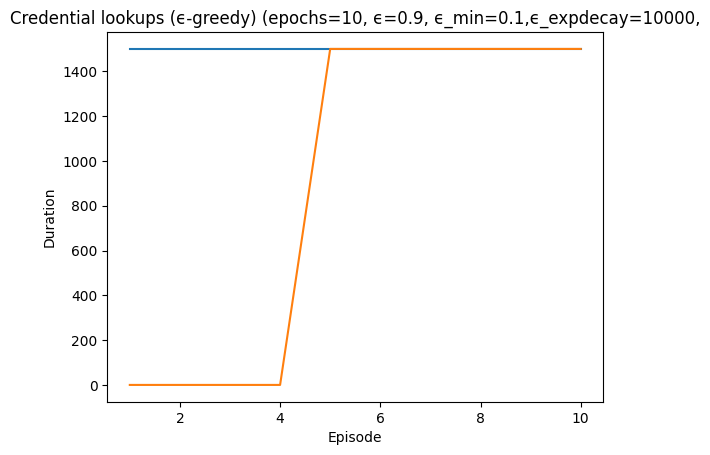

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.name to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.name` for environment variables or `env.get_wrapper_attr('name')` that will search the reminding wrappers.
  logger.warn(


In [8]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)",
)

In [9]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning",
)

###### Tabular Q-learning
Learning with: episode_count=20,iteration_count=1500,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/20 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:   31.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:   31.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  131.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  131.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:  142.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:  142.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:  156.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:  156.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  156.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 143|reward:  167.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 143|reward:  167.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 1|Iteration 170|reward:  181.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 1|Iteration 170|reward:  181.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 1|Iteration 172|reward:  195.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 1|Iteration 172|reward:  195.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 1|Iteration 177|reward:  245.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 1|Iteration 177|reward:  245.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 1|Iteration 184|reward:  295.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 1|Iteration 184|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 1|Iteration 209|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 1|Iteration 266|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 1|Iteration 285|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 1|Iteration 304|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 1|Iteration 323|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 1|Iteration 342|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 1|Iteration 361|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 1|Iteration 380|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 1|Iteration 399|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 1|Iteration 418|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 1|Iteration 437|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 1|Iteration 456|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 1|Iteration 475|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 1|Iteration 494|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 1|Iteration 513|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 1|Iteration 532|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 1|Iteration 551|reward:  295.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 1|Iteration 551|reward:  301.0|last_reward_at:  184|Elapsed Time: 0:00:01||

Episode 1|Iteration 551|reward:  301.0|last_reward_at:  551|Elapsed Time: 0:00:01||

Episode 1|Iteration 570|reward:  301.0|last_reward_at:  551|Elapsed Time: 0:00:01||

Episode 1|Iteration 589|reward:  301.0|last_reward_at:  551|Elapsed Time: 0:00:01||

Episode 1|Iteration 608|reward:  301.0|last_reward_at:  551|Elapsed Time: 0:00:01||

Episode 1|Iteration 627|reward:  301.0|last_reward_at:  551|Elapsed Time: 0:00:01||

Episode 1|Iteration 646|reward:  301.0|last_reward_at:  551|Elapsed Time: 0:00:01||

Episode 1|Iteration 665|reward:  301.0|last_reward_at:  551|Elapsed Time: 0:00:02||

Episode 1|Iteration 684|reward:  301.0|last_reward_at:  551|Elapsed Time: 0:00:02||

Episode 1|Iteration 703|reward:  301.0|last_reward_at:  551|Elapsed Time: 0:00:02||

Episode 1|Iteration 722|reward:  301.0|last_reward_at:  551|Elapsed Time: 0:00:02||

Episode 1|Iteration 741|reward:  301.0|last_reward_at:  551|Elapsed Time: 0:00:02||

Episode 1|Iteration 757|reward:  312.0|last_reward_at:  551|Elapsed Time: 0:00:02||

Episode 1|Iteration 757|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:02||

Episode 1|Iteration 779|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:02||

Episode 1|Iteration 798|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:02||

Episode 1|Iteration 817|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:02||

Episode 1|Iteration 836|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:02||

Episode 1|Iteration 855|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:02||

Episode 1|Iteration 874|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:02||

Episode 1|Iteration 893|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:02||

Episode 1|Iteration 912|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:02||

Episode 1|Iteration 931|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:02||

Episode 1|Iteration 950|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:02||

Episode 1|Iteration 969|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 1|Iteration 988|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 1|Iteration 1007|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 1|Iteration 1026|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 1|Iteration 1045|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 1|Iteration 1064|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 1|Iteration 1083|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 1|Iteration 1102|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 1|Iteration 1121|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 1|Iteration 1140|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 1|Iteration 1159|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 1|Iteration 1178|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 1|Iteration 1197|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 1|Iteration 1216|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 1|Iteration 1235|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 1|Iteration 1254|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 1|Iteration 1273|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:04||

Episode 1|Iteration 1292|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:04||

Episode 1|Iteration 1311|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:04||

Episode 1|Iteration 1330|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:04||

Episode 1|Iteration 1349|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:04||

Episode 1|Iteration 1368|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:04||

Episode 1|Iteration 1387|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:04||

Episode 1|Iteration 1406|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:04||

Episode 1|Iteration 1425|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:04||

Episode 1|Iteration 1444|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:04||

Episode 1|Iteration 1463|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:04||

Episode 1|Iteration 1482|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:04||

Episode 1|Iteration 1500|reward:  312.0|last_reward_at:  757|Elapsed Time: 0:00:04||

  Episode 1 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/110 (0.02)
    explore-remote: 8/559 (0.01)
    explore-connect: 1/513 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 2/304 (0.01)
  exploit deflected to exploration: 2
  ## Episode: 2/20 'Tabular Q-learning' ϵ=0.6695, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:   44.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:   44.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:   58.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:   58.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  108.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  122.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  122.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  172.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  172.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  172.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  183.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 112|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 135|reward:  189.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 135|reward:  189.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 2|Iteration 152|reward:  189.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 2|Iteration 171|reward:  189.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 2|Iteration 186|reward:  198.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 2|Iteration 186|reward:  198.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 2|Iteration 209|reward:  198.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  198.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 2|Iteration 247|reward:  198.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 2|Iteration 266|reward:  198.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 2|Iteration 285|reward:  198.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 2|Iteration 299|reward:  298.0|last_reward_at:  186|Elapsed Time: 0:00:01||

Episode 2|Iteration 299|reward:  298.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 2|Iteration 307|reward:  312.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 2|Iteration 307|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 2|Iteration 323|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 2|Iteration 342|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 2|Iteration 361|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 2|Iteration 380|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 2|Iteration 399|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 2|Iteration 418|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 2|Iteration 437|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 2|Iteration 456|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 2|Iteration 475|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 2|Iteration 494|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 2|Iteration 513|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 2|Iteration 532|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 2|Iteration 551|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 2|Iteration 570|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 2|Iteration 589|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 2|Iteration 608|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 2|Iteration 627|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 2|Iteration 646|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 2|Iteration 665|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 2|Iteration 684|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 2|Iteration 703|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 2|Iteration 722|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 2|Iteration 741|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 2|Iteration 760|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 2|Iteration 779|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 2|Iteration 798|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:02||

Episode 2|Iteration 817|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:03||

Episode 2|Iteration 836|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:03||

Episode 2|Iteration 855|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:03||

Episode 2|Iteration 874|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:03||

Episode 2|Iteration 893|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:03||

Episode 2|Iteration 912|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:03||

Episode 2|Iteration 931|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:03||

Episode 2|Iteration 950|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:03||

Episode 2|Iteration 969|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:03||

Episode 2|Iteration 988|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:03||

Episode 2|Iteration 1007|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:03||

Episode 2|Iteration 1026|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:03||

Episode 2|Iteration 1045|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:03||

Episode 2|Iteration 1064|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:04||

Episode 2|Iteration 1083|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:04||

Episode 2|Iteration 1102|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:04||

Episode 2|Iteration 1121|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:04||

Episode 2|Iteration 1140|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:04||

Episode 2|Iteration 1159|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:04||

Episode 2|Iteration 1178|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:04||

Episode 2|Iteration 1197|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:04||

Episode 2|Iteration 1216|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:04||

Episode 2|Iteration 1235|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:04||

Episode 2|Iteration 1254|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:04||

Episode 2|Iteration 1273|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:04||

Episode 2|Iteration 1292|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:04||

Episode 2|Iteration 1311|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:05||

Episode 2|Iteration 1330|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:05||

Episode 2|Iteration 1349|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:05||

Episode 2|Iteration 1368|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:05||

Episode 2|Iteration 1387|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:05||

Episode 2|Iteration 1406|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:05||

Episode 2|Iteration 1425|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:05||

Episode 2|Iteration 1444|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:05||

Episode 2|Iteration 1463|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:05||

Episode 2|Iteration 1482|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:05||

Episode 2|Iteration 1500|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:00:05||

  Episode 2 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/72 (0.03)
    explore-remote: 7/407 (0.02)
    explore-connect: 1/408 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/30 (0.03)
    exploit-connect: 2/570 (0.00)
  exploit deflected to exploration: 35
  ## Episode: 3/20 'Tabular Q-learning' ϵ=0.4985, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   86.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:   92.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:   92.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:   92.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:   92.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 79|reward:  103.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 79|reward:  103.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 3|Iteration 95|reward:  103.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  103.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 3|Iteration 133|reward:  103.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 3|Iteration 139|reward:  114.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 3|Iteration 139|reward:  114.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 3|Iteration 145|reward:  128.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 3|Iteration 145|reward:  128.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 3|Iteration 147|reward:  178.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 3|Iteration 147|reward:  178.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 3|Iteration 171|reward:  178.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 3|Iteration 190|reward:  178.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 3|Iteration 190|reward:  189.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 3|Iteration 190|reward:  189.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 3|Iteration 209|reward:  189.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 3|Iteration 214|reward:  198.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 3|Iteration 214|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 3|Iteration 247|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 266|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 285|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 304|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 323|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 342|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 361|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 380|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 399|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 418|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 437|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 456|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 475|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 3|Iteration 494|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:02||

Episode 3|Iteration 513|reward:  198.0|last_reward_at:  214|Elapsed Time: 0:00:02||

Episode 3|Iteration 531|reward:  298.0|last_reward_at:  214|Elapsed Time: 0:00:02||

Episode 3|Iteration 531|reward:  298.0|last_reward_at:  531|Elapsed Time: 0:00:02||

Episode 3|Iteration 539|reward:  312.0|last_reward_at:  531|Elapsed Time: 0:00:02||

Episode 3|Iteration 539|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 3|Iteration 563|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 3|Iteration 589|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 3|Iteration 608|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 3|Iteration 627|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 3|Iteration 646|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 3|Iteration 665|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 3|Iteration 684|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 3|Iteration 703|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 3|Iteration 722|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 3|Iteration 741|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 3|Iteration 760|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 3|Iteration 779|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 3|Iteration 798|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 3|Iteration 817|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 3|Iteration 836|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 3|Iteration 855|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 3|Iteration 874|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 3|Iteration 893|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 3|Iteration 912|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 3|Iteration 931|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 3|Iteration 950|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 3|Iteration 969|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:04||

Episode 3|Iteration 988|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:04||

Episode 3|Iteration 1007|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:04||

Episode 3|Iteration 1026|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:04||

Episode 3|Iteration 1045|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:04||

Episode 3|Iteration 1064|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:04||

Episode 3|Iteration 1083|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:04||

Episode 3|Iteration 1102|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:04||

Episode 3|Iteration 1121|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:04||

Episode 3|Iteration 1140|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:04||

Episode 3|Iteration 1159|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:04||

Episode 3|Iteration 1178|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:04||

Episode 3|Iteration 1197|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:05||

Episode 3|Iteration 1216|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:05||

Episode 3|Iteration 1235|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:05||

Episode 3|Iteration 1254|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:05||

Episode 3|Iteration 1273|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:05||

Episode 3|Iteration 1292|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:05||

Episode 3|Iteration 1311|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:05||

Episode 3|Iteration 1330|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:05||

Episode 3|Iteration 1349|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:05||

Episode 3|Iteration 1368|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:05||

Episode 3|Iteration 1387|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:05||

Episode 3|Iteration 1406|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:05||

Episode 3|Iteration 1425|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:06||

Episode 3|Iteration 1444|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:06||

Episode 3|Iteration 1463|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:06||

Episode 3|Iteration 1482|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:06||

Episode 3|Iteration 1500|reward:  312.0|last_reward_at:  539|Elapsed Time: 0:00:06||

  Episode 3 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/46 (0.04)
    explore-remote: 6/327 (0.02)
    explore-connect: 1/357 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 2/35 (0.05)
    exploit-connect: 2/722 (0.00)
  exploit deflected to exploration: 78
  ## Episode: 4/20 'Tabular Q-learning' ϵ=0.3719, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:   44.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:   44.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:   44.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:   44.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:   58.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:   58.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 4|Iteration 83|reward:  108.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 4|Iteration 83|reward:  108.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 4|Iteration 108|reward:  108.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 4|Iteration 131|reward:  108.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 4|Iteration 152|reward:  108.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  114.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  114.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:  114.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 190|reward:  114.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 209|reward:  114.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 228|reward:  114.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 231|reward:  123.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 231|reward:  123.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 4|Iteration 247|reward:  123.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 4|Iteration 266|reward:  123.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 4|Iteration 285|reward:  123.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 4|Iteration 304|reward:  123.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 4|Iteration 323|reward:  123.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 4|Iteration 341|reward:  137.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 4|Iteration 341|reward:  137.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 4|Iteration 342|reward:  187.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 4|Iteration 342|reward:  187.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 4|Iteration 361|reward:  187.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 4|Iteration 380|reward:  187.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 4|Iteration 399|reward:  187.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 4|Iteration 418|reward:  187.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 4|Iteration 437|reward:  187.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 4|Iteration 456|reward:  187.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 4|Iteration 475|reward:  187.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 4|Iteration 494|reward:  187.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 4|Iteration 513|reward:  187.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 4|Iteration 532|reward:  187.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 4|Iteration 541|reward:  287.0|last_reward_at:  342|Elapsed Time: 0:00:02||

Episode 4|Iteration 541|reward:  287.0|last_reward_at:  541|Elapsed Time: 0:00:02||

Episode 4|Iteration 543|reward:  301.0|last_reward_at:  541|Elapsed Time: 0:00:02||

Episode 4|Iteration 543|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 4|Iteration 568|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 4|Iteration 589|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 4|Iteration 608|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 4|Iteration 627|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 4|Iteration 644|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 4|Iteration 665|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 4|Iteration 683|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 4|Iteration 702|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 722|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 741|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 760|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 779|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 798|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 817|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 836|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 855|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 874|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 893|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 912|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 931|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 4|Iteration 950|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 4|Iteration 969|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 4|Iteration 988|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 4|Iteration 1007|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 4|Iteration 1026|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 4|Iteration 1045|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 4|Iteration 1064|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 4|Iteration 1083|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 4|Iteration 1102|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 4|Iteration 1121|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 4|Iteration 1140|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 4|Iteration 1159|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 4|Iteration 1178|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 4|Iteration 1197|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 4|Iteration 1216|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 4|Iteration 1235|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 4|Iteration 1254|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 4|Iteration 1273|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 4|Iteration 1292|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 4|Iteration 1311|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 4|Iteration 1330|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 4|Iteration 1349|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 4|Iteration 1368|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:06||

Episode 4|Iteration 1387|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:06||

Episode 4|Iteration 1406|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:06||

Episode 4|Iteration 1425|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:06||

Episode 4|Iteration 1444|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:06||

Episode 4|Iteration 1463|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:06||

Episode 4|Iteration 1482|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:06||

Episode 4|Iteration 1500|reward:  301.0|last_reward_at:  543|Elapsed Time: 0:00:06||

  Episode 4 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/45 (0.02)
    explore-remote: 6/275 (0.02)
    explore-connect: 1/232 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/46 (0.02)
    exploit-connect: 2/890 (0.00)
  exploit deflected to exploration: 100
  ## Episode: 5/20 'Tabular Q-learning' ϵ=0.2781, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:   33.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:   33.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:   42.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:   42.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:   42.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 81|reward:   56.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 81|reward:   56.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 5|Iteration 82|reward:  106.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 5|Iteration 82|reward:  106.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 95|reward:  106.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 113|reward:  106.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 133|reward:  106.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 152|reward:  106.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 171|reward:  106.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 190|reward:  106.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 209|reward:  106.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:  106.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 244|reward:  112.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 5|Iteration 244|reward:  112.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 5|Iteration 266|reward:  112.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 5|Iteration 285|reward:  112.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 5|Iteration 304|reward:  112.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 5|Iteration 322|reward:  123.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 5|Iteration 322|reward:  123.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 5|Iteration 342|reward:  123.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 5|Iteration 361|reward:  123.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 5|Iteration 380|reward:  123.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 5|Iteration 391|reward:  223.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 5|Iteration 391|reward:  223.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 5|Iteration 395|reward:  237.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 5|Iteration 395|reward:  237.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 5|Iteration 418|reward:  237.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 5|Iteration 437|reward:  237.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 5|Iteration 456|reward:  237.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 5|Iteration 475|reward:  237.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 5|Iteration 494|reward:  237.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 5|Iteration 513|reward:  237.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 5|Iteration 532|reward:  237.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 5|Iteration 537|reward:  251.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 5|Iteration 537|reward:  251.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 5|Iteration 541|reward:  301.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 5|Iteration 541|reward:  301.0|last_reward_at:  541|Elapsed Time: 0:00:02||

Episode 5|Iteration 562|reward:  301.0|last_reward_at:  541|Elapsed Time: 0:00:02||

Episode 5|Iteration 579|reward:  312.0|last_reward_at:  541|Elapsed Time: 0:00:02||

Episode 5|Iteration 579|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:02||

Episode 5|Iteration 600|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:02||

Episode 5|Iteration 620|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:02||

Episode 5|Iteration 641|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:02||

Episode 5|Iteration 662|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:02||

Episode 5|Iteration 683|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 5|Iteration 699|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 5|Iteration 717|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 5|Iteration 736|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 5|Iteration 755|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 5|Iteration 776|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 5|Iteration 797|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 5|Iteration 817|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 5|Iteration 836|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 5|Iteration 855|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 5|Iteration 874|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 5|Iteration 893|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:04||

Episode 5|Iteration 912|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:04||

Episode 5|Iteration 931|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:04||

Episode 5|Iteration 946|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:04||

Episode 5|Iteration 967|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:04||

Episode 5|Iteration 988|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:04||

Episode 5|Iteration 1007|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:04||

Episode 5|Iteration 1026|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:04||

Episode 5|Iteration 1045|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:04||

Episode 5|Iteration 1064|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:04||

Episode 5|Iteration 1083|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:05||

Episode 5|Iteration 1102|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:05||

Episode 5|Iteration 1121|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:05||

Episode 5|Iteration 1140|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:05||

Episode 5|Iteration 1157|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:05||

Episode 5|Iteration 1169|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:05||

Episode 5|Iteration 1190|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:05||

Episode 5|Iteration 1212|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:05||

Episode 5|Iteration 1233|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:05||

Episode 5|Iteration 1254|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:05||

Episode 5|Iteration 1273|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:05||

Episode 5|Iteration 1291|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:06||

Episode 5|Iteration 1311|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:06||

Episode 5|Iteration 1330|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:06||

Episode 5|Iteration 1349|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:06||

Episode 5|Iteration 1368|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:06||

Episode 5|Iteration 1387|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:06||

Episode 5|Iteration 1406|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:06||

Episode 5|Iteration 1425|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:06||

Episode 5|Iteration 1444|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:06||

Episode 5|Iteration 1463|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:06||

Episode 5|Iteration 1482|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:07||

Episode 5|Iteration 1500|reward:  312.0|last_reward_at:  579|Elapsed Time: 0:00:07||

  Episode 5 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/38 (0.03)
    explore-remote: 7/186 (0.04)
    explore-connect: 1/164 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 2/1099 (0.00)
  exploit deflected to exploration: 40
  ## Episode: 6/20 'Tabular Q-learning' ϵ=0.2086, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:   42.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 38|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 57|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 71|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 91|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 133|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 152|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 171|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 190|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 209|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 228|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 6|Iteration 247|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 6|Iteration 266|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 6|Iteration 285|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 6|Iteration 304|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 6|Iteration 323|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 6|Iteration 342|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 6|Iteration 361|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 6|Iteration 380|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 6|Iteration 380|reward:   53.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 6|Iteration 380|reward:   53.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 6|Iteration 399|reward:   53.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 6|Iteration 407|reward:  153.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 6|Iteration 407|reward:  153.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 6|Iteration 415|reward:  167.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 6|Iteration 415|reward:  167.0|last_reward_at:  415|Elapsed Time: 0:00:01||

Episode 6|Iteration 437|reward:  167.0|last_reward_at:  415|Elapsed Time: 0:00:01||

Episode 6|Iteration 456|reward:  167.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 6|Iteration 475|reward:  167.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 6|Iteration 494|reward:  167.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 6|Iteration 513|reward:  167.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 6|Iteration 532|reward:  167.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 6|Iteration 551|reward:  167.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 6|Iteration 570|reward:  167.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 6|Iteration 589|reward:  167.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 6|Iteration 606|reward:  167.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 6|Iteration 627|reward:  167.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 6|Iteration 642|reward:  181.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 6|Iteration 642|reward:  181.0|last_reward_at:  642|Elapsed Time: 0:00:02||

Episode 6|Iteration 645|reward:  231.0|last_reward_at:  642|Elapsed Time: 0:00:02||

Episode 6|Iteration 645|reward:  231.0|last_reward_at:  645|Elapsed Time: 0:00:02||

Episode 6|Iteration 665|reward:  231.0|last_reward_at:  645|Elapsed Time: 0:00:02||

Episode 6|Iteration 684|reward:  231.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 6|Iteration 703|reward:  231.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 6|Iteration 722|reward:  231.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 6|Iteration 741|reward:  231.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 6|Iteration 760|reward:  231.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 6|Iteration 779|reward:  231.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 6|Iteration 798|reward:  231.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 6|Iteration 817|reward:  231.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 6|Iteration 836|reward:  231.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 6|Iteration 855|reward:  231.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 6|Iteration 873|reward:  237.0|last_reward_at:  645|Elapsed Time: 0:00:03||

Episode 6|Iteration 873|reward:  237.0|last_reward_at:  873|Elapsed Time: 0:00:03||

Episode 6|Iteration 893|reward:  237.0|last_reward_at:  873|Elapsed Time: 0:00:04||

Episode 6|Iteration 912|reward:  237.0|last_reward_at:  873|Elapsed Time: 0:00:04||

Episode 6|Iteration 931|reward:  237.0|last_reward_at:  873|Elapsed Time: 0:00:04||

Episode 6|Iteration 950|reward:  237.0|last_reward_at:  873|Elapsed Time: 0:00:04||

Episode 6|Iteration 969|reward:  237.0|last_reward_at:  873|Elapsed Time: 0:00:04||

Episode 6|Iteration 988|reward:  237.0|last_reward_at:  873|Elapsed Time: 0:00:04||

Episode 6|Iteration 1007|reward:  237.0|last_reward_at:  873|Elapsed Time: 0:00:04||

Episode 6|Iteration 1026|reward:  237.0|last_reward_at:  873|Elapsed Time: 0:00:04||

Episode 6|Iteration 1045|reward:  237.0|last_reward_at:  873|Elapsed Time: 0:00:04||

Episode 6|Iteration 1064|reward:  237.0|last_reward_at:  873|Elapsed Time: 0:00:04||

Episode 6|Iteration 1083|reward:  237.0|last_reward_at:  873|Elapsed Time: 0:00:04||

Episode 6|Iteration 1102|reward:  237.0|last_reward_at:  873|Elapsed Time: 0:00:04||

Episode 6|Iteration 1108|reward:  251.0|last_reward_at:  873|Elapsed Time: 0:00:04||

Episode 6|Iteration 1108|reward:  251.0|last_reward_at: 1108|Elapsed Time: 0:00:04||

Episode 6|Iteration 1109|reward:  301.0|last_reward_at: 1108|Elapsed Time: 0:00:05||

Episode 6|Iteration 1109|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:05||

Episode 6|Iteration 1121|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:05||

Episode 6|Iteration 1140|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:05||

Episode 6|Iteration 1159|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:05||

Episode 6|Iteration 1178|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:05||

Episode 6|Iteration 1197|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:05||

Episode 6|Iteration 1216|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:05||

Episode 6|Iteration 1235|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:05||

Episode 6|Iteration 1254|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:05||

Episode 6|Iteration 1273|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:05||

Episode 6|Iteration 1292|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:05||

Episode 6|Iteration 1311|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:05||

Episode 6|Iteration 1330|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:06||

Episode 6|Iteration 1349|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:06||

Episode 6|Iteration 1368|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:06||

Episode 6|Iteration 1387|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:06||

Episode 6|Iteration 1406|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:06||

Episode 6|Iteration 1425|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:06||

Episode 6|Iteration 1444|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:06||

Episode 6|Iteration 1463|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:06||

Episode 6|Iteration 1480|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:06||

Episode 6|Iteration 1500|reward:  301.0|last_reward_at: 1109|Elapsed Time: 0:00:06||

  Episode 6 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/33 (0.03)
    explore-remote: 6/122 (0.05)
    explore-connect: 1/104 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 2/1229 (0.00)
  exploit deflected to exploration: 20
  ## Episode: 7/20 'Tabular Q-learning' ϵ=0.1571, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:   86.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 32|reward:   97.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 32|reward:   97.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:  108.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:  108.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 57|reward:  108.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 74|reward:  108.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 94|reward:  122.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 94|reward:  122.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 7|Iteration 95|reward:  172.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 7|Iteration 95|reward:  172.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 7|Iteration 112|reward:  172.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 7|Iteration 130|reward:  172.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 7|Iteration 149|reward:  172.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 7|Iteration 166|reward:  172.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 7|Iteration 174|reward:  178.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 7|Iteration 174|reward:  178.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 7|Iteration 190|reward:  178.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 7|Iteration 209|reward:  178.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 7|Iteration 210|reward:  187.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 7|Iteration 210|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 7|Iteration 228|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 7|Iteration 247|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 7|Iteration 266|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 7|Iteration 285|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 7|Iteration 304|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 7|Iteration 323|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 7|Iteration 342|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 7|Iteration 361|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 7|Iteration 380|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 7|Iteration 399|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 7|Iteration 418|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 7|Iteration 437|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 7|Iteration 456|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 7|Iteration 475|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 7|Iteration 494|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 7|Iteration 513|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 7|Iteration 532|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 7|Iteration 551|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 7|Iteration 570|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 7|Iteration 589|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:02||

Episode 7|Iteration 608|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:03||

Episode 7|Iteration 627|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:03||

Episode 7|Iteration 646|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:03||

Episode 7|Iteration 665|reward:  187.0|last_reward_at:  210|Elapsed Time: 0:00:03||

Episode 7|Iteration 674|reward:  198.0|last_reward_at:  210|Elapsed Time: 0:00:03||

Episode 7|Iteration 674|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:03||

Episode 7|Iteration 696|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:03||

Episode 7|Iteration 719|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:03||

Episode 7|Iteration 741|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:03||

Episode 7|Iteration 760|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:03||

Episode 7|Iteration 779|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:03||

Episode 7|Iteration 798|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:03||

Episode 7|Iteration 817|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:03||

Episode 7|Iteration 836|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:04||

Episode 7|Iteration 855|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:04||

Episode 7|Iteration 874|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:04||

Episode 7|Iteration 893|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:04||

Episode 7|Iteration 912|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:04||

Episode 7|Iteration 931|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:04||

Episode 7|Iteration 950|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:04||

Episode 7|Iteration 969|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:04||

Episode 7|Iteration 988|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:04||

Episode 7|Iteration 1007|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:04||

Episode 7|Iteration 1026|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:04||

Episode 7|Iteration 1045|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 7|Iteration 1064|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 7|Iteration 1083|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 7|Iteration 1102|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 7|Iteration 1121|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 7|Iteration 1140|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 7|Iteration 1159|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 7|Iteration 1178|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 7|Iteration 1197|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 7|Iteration 1216|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 7|Iteration 1235|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 7|Iteration 1254|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 7|Iteration 1273|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 7|Iteration 1292|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 7|Iteration 1311|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 7|Iteration 1330|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 7|Iteration 1349|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 7|Iteration 1368|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 7|Iteration 1387|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 7|Iteration 1406|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 7|Iteration 1425|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 7|Iteration 1444|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 7|Iteration 1463|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:06||

Episode 7|Iteration 1482|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:07||

Episode 7|Iteration 1500|reward:  198.0|last_reward_at:  674|Elapsed Time: 0:00:07||

  Episode 7 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/28 (0.00)
    explore-remote: 6/182 (0.03)
    explore-connect: 0/154 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/5 (0.29)
    exploit-connect: 2/1120 (0.00)
  exploit deflected to exploration: 166
  ## Episode: 8/20 'Tabular Q-learning' ϵ=0.1190, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:   36.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:   86.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:   86.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:   92.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:   92.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 51|reward:   92.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 72|reward:   92.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 92|reward:   92.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 93|reward:  103.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 93|reward:  103.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 8|Iteration 111|reward:  103.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 8|Iteration 131|reward:  103.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 8|Iteration 150|reward:  103.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 8|Iteration 169|reward:  103.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 8|Iteration 189|reward:  103.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 8|Iteration 201|reward:  112.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 8|Iteration 201|reward:  112.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 8|Iteration 222|reward:  112.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 8|Iteration 245|reward:  112.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 8|Iteration 266|reward:  112.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 8|Iteration 285|reward:  112.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 8|Iteration 304|reward:  112.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 8|Iteration 323|reward:  112.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 8|Iteration 342|reward:  112.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 8|Iteration 361|reward:  112.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 8|Iteration 380|reward:  112.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 8|Iteration 386|reward:  212.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 8|Iteration 386|reward:  212.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 8|Iteration 399|reward:  212.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 8|Iteration 413|reward:  226.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 8|Iteration 413|reward:  226.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 8|Iteration 436|reward:  226.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 8|Iteration 456|reward:  226.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 8|Iteration 475|reward:  226.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 8|Iteration 494|reward:  226.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 8|Iteration 513|reward:  226.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 8|Iteration 532|reward:  226.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 8|Iteration 551|reward:  226.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 8|Iteration 570|reward:  226.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 8|Iteration 589|reward:  226.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 8|Iteration 608|reward:  226.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 8|Iteration 618|reward:  237.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 8|Iteration 618|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:02||

Episode 8|Iteration 640|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 8|Iteration 661|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 8|Iteration 683|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 8|Iteration 703|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 8|Iteration 722|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 8|Iteration 741|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 8|Iteration 760|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 8|Iteration 779|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 8|Iteration 798|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 8|Iteration 817|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 8|Iteration 836|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 8|Iteration 855|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:04||

Episode 8|Iteration 874|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:04||

Episode 8|Iteration 893|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:04||

Episode 8|Iteration 912|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:04||

Episode 8|Iteration 931|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:04||

Episode 8|Iteration 950|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:04||

Episode 8|Iteration 969|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:04||

Episode 8|Iteration 988|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:04||

Episode 8|Iteration 1007|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:04||

Episode 8|Iteration 1026|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:04||

Episode 8|Iteration 1045|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:04||

Episode 8|Iteration 1064|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:05||

Episode 8|Iteration 1083|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:05||

Episode 8|Iteration 1102|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:05||

Episode 8|Iteration 1121|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:05||

Episode 8|Iteration 1140|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:05||

Episode 8|Iteration 1159|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:05||

Episode 8|Iteration 1178|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:05||

Episode 8|Iteration 1197|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:05||

Episode 8|Iteration 1216|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:05||

Episode 8|Iteration 1233|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:05||

Episode 8|Iteration 1253|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:05||

Episode 8|Iteration 1273|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:06||

Episode 8|Iteration 1292|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:06||

Episode 8|Iteration 1311|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:06||

Episode 8|Iteration 1330|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:06||

Episode 8|Iteration 1349|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:06||

Episode 8|Iteration 1368|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:06||

Episode 8|Iteration 1387|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:06||

Episode 8|Iteration 1406|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:06||

Episode 8|Iteration 1425|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:06||

Episode 8|Iteration 1444|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:06||

Episode 8|Iteration 1463|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:06||

Episode 8|Iteration 1482|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:07||

Episode 8|Iteration 1500|reward:  237.0|last_reward_at:  618|Elapsed Time: 0:00:07||

  Episode 8 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/21 (0.05)
    explore-remote: 5/160 (0.03)
    explore-connect: 1/154 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/9 (0.10)
    exploit-connect: 1/1146 (0.00)
  exploit deflected to exploration: 184
  ## Episode: 9/20 'Tabular Q-learning' ϵ=0.0908, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:   86.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:   92.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:   92.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  103.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  103.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 56|reward:  103.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 74|reward:  103.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 85|reward:  114.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 85|reward:  114.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 9|Iteration 105|reward:  114.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 9|Iteration 126|reward:  114.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 9|Iteration 148|reward:  114.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 9|Iteration 169|reward:  114.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 9|Iteration 190|reward:  114.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 9|Iteration 194|reward:  128.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 9|Iteration 194|reward:  128.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 9|Iteration 195|reward:  178.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 9|Iteration 195|reward:  178.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 9|Iteration 209|reward:  178.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 9|Iteration 226|reward:  178.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 9|Iteration 243|reward:  178.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 9|Iteration 260|reward:  178.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 9|Iteration 264|reward:  187.0|last_reward_at:  195|Elapsed Time: 0:00:01||

Episode 9|Iteration 264|reward:  187.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 9|Iteration 285|reward:  187.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 9|Iteration 295|reward:  198.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 9|Iteration 295|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 9|Iteration 317|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 9|Iteration 338|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 9|Iteration 359|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 9|Iteration 380|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 9|Iteration 399|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 9|Iteration 418|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 9|Iteration 437|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 9|Iteration 456|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 9|Iteration 475|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 9|Iteration 494|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 9|Iteration 513|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 9|Iteration 532|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 9|Iteration 551|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 9|Iteration 570|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 9|Iteration 589|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:02||

Episode 9|Iteration 608|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:03||

Episode 9|Iteration 627|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:03||

Episode 9|Iteration 646|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:03||

Episode 9|Iteration 665|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:03||

Episode 9|Iteration 684|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:03||

Episode 9|Iteration 703|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:03||

Episode 9|Iteration 721|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:03||

Episode 9|Iteration 741|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:03||

Episode 9|Iteration 760|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:03||

Episode 9|Iteration 779|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:03||

Episode 9|Iteration 798|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:03||

Episode 9|Iteration 817|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:04||

Episode 9|Iteration 836|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:04||

Episode 9|Iteration 855|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:04||

Episode 9|Iteration 874|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:04||

Episode 9|Iteration 893|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:04||

Episode 9|Iteration 912|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:04||

Episode 9|Iteration 931|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:04||

Episode 9|Iteration 950|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:04||

Episode 9|Iteration 969|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:04||

Episode 9|Iteration 988|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:04||

Episode 9|Iteration 1007|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:04||

Episode 9|Iteration 1026|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:05||

Episode 9|Iteration 1045|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:05||

Episode 9|Iteration 1064|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:05||

Episode 9|Iteration 1083|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:05||

Episode 9|Iteration 1102|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:05||

Episode 9|Iteration 1121|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:05||

Episode 9|Iteration 1140|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:05||

Episode 9|Iteration 1159|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:05||

Episode 9|Iteration 1178|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:05||

Episode 9|Iteration 1197|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:05||

Episode 9|Iteration 1216|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:05||

Episode 9|Iteration 1235|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:06||

Episode 9|Iteration 1254|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:06||

Episode 9|Iteration 1273|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:06||

Episode 9|Iteration 1292|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:06||

Episode 9|Iteration 1311|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:06||

Episode 9|Iteration 1330|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:06||

Episode 9|Iteration 1349|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:06||

Episode 9|Iteration 1368|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:06||

Episode 9|Iteration 1380|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:06||

Episode 9|Iteration 1402|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:06||

Episode 9|Iteration 1423|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:07||

Episode 9|Iteration 1444|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:07||

Episode 9|Iteration 1463|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:07||

Episode 9|Iteration 1482|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:07||

Episode 9|Iteration 1500|reward:  198.0|last_reward_at:  295|Elapsed Time: 0:00:07||

  Episode 9 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/14 (0.00)
    explore-remote: 5/134 (0.04)
    explore-connect: 0/110 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/103 (0.03)
    exploit-connect: 2/1128 (0.00)
  exploit deflected to exploration: 129
  ## Episode: 10/20 'Tabular Q-learning' ϵ=0.0698, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:   86.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:   92.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:   92.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:   92.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:  103.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:  103.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 68|reward:  103.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 88|reward:  103.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 106|reward:  103.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 114|reward:  112.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 114|reward:  112.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 10|Iteration 133|reward:  112.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 10|Iteration 152|reward:  112.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 10|Iteration 171|reward:  112.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 10|Iteration 190|reward:  112.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 10|Iteration 209|reward:  112.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 10|Iteration 228|reward:  112.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 10|Iteration 247|reward:  112.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 10|Iteration 266|reward:  112.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 10|Iteration 285|reward:  112.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 10|Iteration 304|reward:  112.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 10|Iteration 323|reward:  112.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 10|Iteration 339|reward:  112.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 10|Iteration 357|reward:  112.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 10|Iteration 378|reward:  112.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 10|Iteration 379|reward:  123.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 10|Iteration 379|reward:  123.0|last_reward_at:  379|Elapsed Time: 0:00:01||

Episode 10|Iteration 399|reward:  123.0|last_reward_at:  379|Elapsed Time: 0:00:01||

Episode 10|Iteration 418|reward:  123.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 10|Iteration 437|reward:  123.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 10|Iteration 456|reward:  123.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 10|Iteration 475|reward:  123.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 10|Iteration 494|reward:  123.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 10|Iteration 513|reward:  123.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 10|Iteration 532|reward:  123.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 10|Iteration 551|reward:  123.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 10|Iteration 570|reward:  123.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 10|Iteration 589|reward:  123.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 10|Iteration 604|reward:  137.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 10|Iteration 604|reward:  137.0|last_reward_at:  604|Elapsed Time: 0:00:02||

Episode 10|Iteration 605|reward:  187.0|last_reward_at:  604|Elapsed Time: 0:00:02||

Episode 10|Iteration 605|reward:  187.0|last_reward_at:  605|Elapsed Time: 0:00:02||

Episode 10|Iteration 626|reward:  187.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 10|Iteration 646|reward:  187.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 10|Iteration 665|reward:  187.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 10|Iteration 684|reward:  187.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 10|Iteration 703|reward:  187.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 10|Iteration 722|reward:  187.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 10|Iteration 741|reward:  187.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 10|Iteration 760|reward:  187.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 10|Iteration 779|reward:  187.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 10|Iteration 798|reward:  187.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 10|Iteration 817|reward:  187.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 10|Iteration 836|reward:  187.0|last_reward_at:  605|Elapsed Time: 0:00:04||

Episode 10|Iteration 839|reward:  198.0|last_reward_at:  605|Elapsed Time: 0:00:04||

Episode 10|Iteration 839|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:04||

Episode 10|Iteration 855|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:04||

Episode 10|Iteration 874|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:04||

Episode 10|Iteration 893|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:04||

Episode 10|Iteration 912|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:04||

Episode 10|Iteration 931|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:04||

Episode 10|Iteration 950|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:04||

Episode 10|Iteration 969|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:04||

Episode 10|Iteration 988|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:04||

Episode 10|Iteration 1007|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:04||

Episode 10|Iteration 1026|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:04||

Episode 10|Iteration 1045|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:05||

Episode 10|Iteration 1064|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:05||

Episode 10|Iteration 1083|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:05||

Episode 10|Iteration 1102|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:05||

Episode 10|Iteration 1121|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:05||

Episode 10|Iteration 1140|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:05||

Episode 10|Iteration 1158|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:05||

Episode 10|Iteration 1178|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:05||

Episode 10|Iteration 1197|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:05||

Episode 10|Iteration 1216|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:05||

Episode 10|Iteration 1234|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:05||

Episode 10|Iteration 1254|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:06||

Episode 10|Iteration 1273|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:06||

Episode 10|Iteration 1292|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:06||

Episode 10|Iteration 1311|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:06||

Episode 10|Iteration 1330|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:06||

Episode 10|Iteration 1349|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:06||

Episode 10|Iteration 1368|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:06||

Episode 10|Iteration 1387|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:06||

Episode 10|Iteration 1406|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:06||

Episode 10|Iteration 1425|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:06||

Episode 10|Iteration 1444|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:06||

Episode 10|Iteration 1463|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:07||

Episode 10|Iteration 1482|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:07||

Episode 10|Iteration 1500|reward:  198.0|last_reward_at:  839|Elapsed Time: 0:00:07||

  Episode 10 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/18 (0.00)
    explore-remote: 6/85 (0.07)
    explore-connect: 0/86 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/0 (1.00)
    exploit-connect: 2/1300 (0.00)
  exploit deflected to exploration: 101
  ## Episode: 11/20 'Tabular Q-learning' ϵ=0.0543, γ=0.015,learning_rate=0.01,Q%=100


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 8|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 8|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 11|Iteration 9|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 11|Iteration 9|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 11|Iteration 19|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 11|Iteration 48|reward:   97.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 11|Iteration 48|reward:   97.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 11|Iteration 57|reward:   97.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 11|Iteration 73|reward:   97.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 11|Iteration 84|reward:  108.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 11|Iteration 84|reward:  108.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 11|Iteration 86|reward:  122.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 11|Iteration 86|reward:  122.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 11|Iteration 87|reward:  172.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 11|Iteration 87|reward:  172.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 11|Iteration 104|reward:  172.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 11|Iteration 114|reward:  172.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 11|Iteration 116|reward:  181.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 11|Iteration 116|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 11|Iteration 132|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 11|Iteration 152|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 11|Iteration 171|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 11|Iteration 190|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 11|Iteration 209|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 11|Iteration 228|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 11|Iteration 247|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 11|Iteration 266|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 11|Iteration 285|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 11|Iteration 304|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 11|Iteration 323|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 11|Iteration 342|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 11|Iteration 361|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 11|Iteration 380|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 11|Iteration 399|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 11|Iteration 418|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 11|Iteration 437|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 11|Iteration 456|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 11|Iteration 475|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 11|Iteration 494|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 11|Iteration 513|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 11|Iteration 532|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 11|Iteration 551|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 11|Iteration 570|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 11|Iteration 589|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 11|Iteration 608|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:03||

Episode 11|Iteration 627|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:03||

Episode 11|Iteration 646|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:03||

Episode 11|Iteration 665|reward:  181.0|last_reward_at:  116|Elapsed Time: 0:00:03||

Episode 11|Iteration 666|reward:  187.0|last_reward_at:  116|Elapsed Time: 0:00:03||

Episode 11|Iteration 666|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:03||

Episode 11|Iteration 684|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:03||

Episode 11|Iteration 703|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:03||

Episode 11|Iteration 722|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:03||

Episode 11|Iteration 741|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:03||

Episode 11|Iteration 760|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:03||

Episode 11|Iteration 779|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:03||

Episode 11|Iteration 797|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:03||

Episode 11|Iteration 817|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:04||

Episode 11|Iteration 836|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:04||

Episode 11|Iteration 855|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:04||

Episode 11|Iteration 874|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:04||

Episode 11|Iteration 893|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:04||

Episode 11|Iteration 912|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:04||

Episode 11|Iteration 931|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:04||

Episode 11|Iteration 950|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:04||

Episode 11|Iteration 969|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:04||

Episode 11|Iteration 988|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:04||

Episode 11|Iteration 1007|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:05||

Episode 11|Iteration 1026|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:05||

Episode 11|Iteration 1045|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:05||

Episode 11|Iteration 1064|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:05||

Episode 11|Iteration 1083|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:05||

Episode 11|Iteration 1102|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:05||

Episode 11|Iteration 1121|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:05||

Episode 11|Iteration 1140|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:05||

Episode 11|Iteration 1159|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:05||

Episode 11|Iteration 1178|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:05||

Episode 11|Iteration 1197|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:05||

Episode 11|Iteration 1216|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:06||

Episode 11|Iteration 1235|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:06||

Episode 11|Iteration 1254|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:06||

Episode 11|Iteration 1273|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:06||

Episode 11|Iteration 1292|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:06||

Episode 11|Iteration 1311|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:06||

Episode 11|Iteration 1330|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:06||

Episode 11|Iteration 1349|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:06||

Episode 11|Iteration 1368|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:06||

Episode 11|Iteration 1387|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:06||

Episode 11|Iteration 1406|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:06||

Episode 11|Iteration 1425|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:07||

Episode 11|Iteration 1444|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:07||

Episode 11|Iteration 1463|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:07||

Episode 11|Iteration 1482|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:07||

Episode 11|Iteration 1500|reward:  187.0|last_reward_at:  666|Elapsed Time: 0:00:07||

  Episode 11 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 4/81 (0.05)
    explore-connect: 0/76 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/5 (0.38)
    exploit-connect: 2/1319 (0.00)
  exploit deflected to exploration: 101
  ## Episode: 12/20 'Tabular Q-learning' ϵ=0.0428, γ=0.015,learning_rate=0.01,Q%=100


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:   97.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 9|reward:  108.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 9|reward:  108.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 12|Iteration 21|reward:  122.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 12|Iteration 21|reward:  122.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 12|Iteration 22|reward:  172.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 12|Iteration 22|reward:  172.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 12|Iteration 24|reward:  181.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 12|Iteration 24|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 12|Iteration 38|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 12|Iteration 57|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 12|Iteration 76|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 12|Iteration 95|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 12|Iteration 114|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 12|Iteration 133|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 12|Iteration 152|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 12|Iteration 171|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 12|Iteration 190|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 12|Iteration 209|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 12|Iteration 228|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 12|Iteration 247|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 12|Iteration 266|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 12|Iteration 285|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 12|Iteration 304|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 12|Iteration 323|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 12|Iteration 342|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 12|Iteration 361|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 12|Iteration 380|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 12|Iteration 397|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 12|Iteration 414|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 12|Iteration 433|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 12|Iteration 454|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 12|Iteration 475|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 12|Iteration 494|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 12|Iteration 513|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 12|Iteration 532|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 12|Iteration 551|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 12|Iteration 570|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 12|Iteration 589|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 12|Iteration 608|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 12|Iteration 627|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 12|Iteration 646|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 12|Iteration 665|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 12|Iteration 684|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 12|Iteration 703|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 12|Iteration 722|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 12|Iteration 741|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 12|Iteration 760|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 12|Iteration 779|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 12|Iteration 798|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 12|Iteration 817|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 12|Iteration 833|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 12|Iteration 851|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 12|Iteration 874|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 12|Iteration 893|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 12|Iteration 912|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 12|Iteration 931|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 12|Iteration 950|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 12|Iteration 969|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 12|Iteration 988|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 12|Iteration 1007|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 12|Iteration 1026|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 12|Iteration 1045|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 12|Iteration 1064|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 12|Iteration 1083|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 12|Iteration 1102|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 12|Iteration 1121|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 12|Iteration 1140|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 12|Iteration 1159|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 12|Iteration 1178|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 12|Iteration 1197|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 12|Iteration 1216|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 12|Iteration 1235|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 12|Iteration 1254|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 12|Iteration 1273|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 12|Iteration 1292|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 12|Iteration 1311|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 12|Iteration 1330|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 12|Iteration 1349|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 12|Iteration 1368|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 12|Iteration 1387|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 12|Iteration 1406|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 12|Iteration 1424|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 12|Iteration 1444|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:07||

Episode 12|Iteration 1463|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:07||

Episode 12|Iteration 1482|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:07||

Episode 12|Iteration 1500|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:07||

Episode 12|Iteration 1500|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:07||

  Episode 12 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 0/31 (0.00)
    explore-connect: 0/32 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/14 (0.30)
    exploit-connect: 2/1408 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 13/20 'Tabular Q-learning' ϵ=0.0343, γ=0.015,learning_rate=0.01,Q%=100


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 4|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 4|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 5|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 5|reward:   86.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:   97.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:   97.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 13|Iteration 12|reward:  108.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 13|Iteration 12|reward:  108.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 13|Iteration 15|reward:  122.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 13|Iteration 15|reward:  122.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 13|Iteration 16|reward:  172.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 13|Iteration 16|reward:  172.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 13|Iteration 18|reward:  181.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 13|Iteration 18|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 38|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 57|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 76|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 95|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 114|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 133|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 152|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 170|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 190|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 208|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 13|Iteration 223|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 13|Iteration 244|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 13|Iteration 265|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 13|Iteration 285|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 13|Iteration 304|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 13|Iteration 323|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 13|Iteration 342|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 13|Iteration 361|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 13|Iteration 380|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 13|Iteration 399|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 13|Iteration 418|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 13|Iteration 437|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 13|Iteration 456|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 13|Iteration 475|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 13|Iteration 494|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 13|Iteration 513|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 13|Iteration 532|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 13|Iteration 551|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 13|Iteration 569|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 13|Iteration 589|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 13|Iteration 608|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:03||

Episode 13|Iteration 627|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:03||

Episode 13|Iteration 646|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:03||

Episode 13|Iteration 665|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:03||

Episode 13|Iteration 684|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:03||

Episode 13|Iteration 703|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:03||

Episode 13|Iteration 722|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:03||

Episode 13|Iteration 741|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:03||

Episode 13|Iteration 760|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:03||

Episode 13|Iteration 779|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:03||

Episode 13|Iteration 798|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:04||

Episode 13|Iteration 817|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:04||

Episode 13|Iteration 836|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:04||

Episode 13|Iteration 855|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:04||

Episode 13|Iteration 874|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:04||

Episode 13|Iteration 893|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:04||

Episode 13|Iteration 912|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:04||

Episode 13|Iteration 931|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:04||

Episode 13|Iteration 950|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:04||

Episode 13|Iteration 967|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:04||

Episode 13|Iteration 988|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:04||

Episode 13|Iteration 1007|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:05||

Episode 13|Iteration 1026|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:05||

Episode 13|Iteration 1045|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:05||

Episode 13|Iteration 1064|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:05||

Episode 13|Iteration 1083|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:05||

Episode 13|Iteration 1102|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:05||

Episode 13|Iteration 1121|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:05||

Episode 13|Iteration 1140|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:05||

Episode 13|Iteration 1159|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:05||

Episode 13|Iteration 1178|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:05||

Episode 13|Iteration 1197|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:06||

Episode 13|Iteration 1216|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:06||

Episode 13|Iteration 1235|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:06||

Episode 13|Iteration 1254|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:06||

Episode 13|Iteration 1273|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:06||

Episode 13|Iteration 1292|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:06||

Episode 13|Iteration 1311|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:06||

Episode 13|Iteration 1330|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:06||

Episode 13|Iteration 1349|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:06||

Episode 13|Iteration 1368|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:06||

Episode 13|Iteration 1387|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:06||

Episode 13|Iteration 1406|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:07||

Episode 13|Iteration 1425|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:07||

Episode 13|Iteration 1444|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:07||

Episode 13|Iteration 1463|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:07||

Episode 13|Iteration 1482|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:07||

Episode 13|Iteration 1500|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:07||

Episode 13|Iteration 1500|reward:  181.0|last_reward_at:   18|Elapsed Time: 0:00:07||

  Episode 13 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 0/23 (0.00)
    explore-connect: 0/19 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/8 (0.43)
    exploit-connect: 2/1438 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 14/20 'Tabular Q-learning' ϵ=0.0280, γ=0.015,learning_rate=0.01,Q%=100


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 8|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 8|reward:   97.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 14|Iteration 11|reward:  108.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 14|Iteration 11|reward:  108.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 25|reward:  122.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 25|reward:  122.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:  172.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:  172.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 38|reward:  172.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 56|reward:  172.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 58|reward:  181.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 58|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 14|Iteration 76|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 14|Iteration 95|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 14|Iteration 114|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 14|Iteration 133|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 14|Iteration 152|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 14|Iteration 171|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 14|Iteration 190|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 14|Iteration 209|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 14|Iteration 228|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 14|Iteration 247|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 14|Iteration 266|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 14|Iteration 285|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 14|Iteration 304|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 14|Iteration 323|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 14|Iteration 342|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 14|Iteration 361|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 14|Iteration 380|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 14|Iteration 399|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 14|Iteration 417|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:02||

Episode 14|Iteration 437|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:02||

Episode 14|Iteration 456|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:02||

Episode 14|Iteration 474|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:02||

Episode 14|Iteration 494|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:02||

Episode 14|Iteration 513|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:02||

Episode 14|Iteration 531|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:02||

Episode 14|Iteration 551|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:02||

Episode 14|Iteration 570|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:02||

Episode 14|Iteration 589|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:02||

Episode 14|Iteration 608|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:03||

Episode 14|Iteration 627|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:03||

Episode 14|Iteration 646|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:03||

Episode 14|Iteration 665|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:03||

Episode 14|Iteration 684|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:03||

Episode 14|Iteration 703|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:03||

Episode 14|Iteration 722|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:03||

Episode 14|Iteration 741|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:03||

Episode 14|Iteration 760|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:03||

Episode 14|Iteration 779|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:03||

Episode 14|Iteration 798|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:03||

Episode 14|Iteration 817|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:04||

Episode 14|Iteration 836|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:04||

Episode 14|Iteration 855|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:04||

Episode 14|Iteration 874|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:04||

Episode 14|Iteration 893|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:04||

Episode 14|Iteration 912|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:04||

Episode 14|Iteration 931|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:04||

Episode 14|Iteration 950|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:04||

Episode 14|Iteration 969|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:04||

Episode 14|Iteration 988|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:04||

Episode 14|Iteration 1007|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:04||

Episode 14|Iteration 1026|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:05||

Episode 14|Iteration 1045|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:05||

Episode 14|Iteration 1064|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:05||

Episode 14|Iteration 1083|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:05||

Episode 14|Iteration 1102|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:05||

Episode 14|Iteration 1121|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:05||

Episode 14|Iteration 1140|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:05||

Episode 14|Iteration 1159|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:05||

Episode 14|Iteration 1178|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:05||

Episode 14|Iteration 1197|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:05||

Episode 14|Iteration 1216|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:05||

Episode 14|Iteration 1235|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:06||

Episode 14|Iteration 1254|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:06||

Episode 14|Iteration 1273|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:06||

Episode 14|Iteration 1292|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:06||

Episode 14|Iteration 1311|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:06||

Episode 14|Iteration 1330|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:06||

Episode 14|Iteration 1349|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:06||

Episode 14|Iteration 1368|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:06||

Episode 14|Iteration 1387|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:06||

Episode 14|Iteration 1406|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:06||

Episode 14|Iteration 1425|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:06||

Episode 14|Iteration 1444|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:07||

Episode 14|Iteration 1463|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:07||

Episode 14|Iteration 1482|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:07||

Episode 14|Iteration 1500|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:07||

  Episode 14 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/18 (0.00)
    explore-connect: 0/23 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/48 (0.11)
    exploit-connect: 2/1400 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 15/20 'Tabular Q-learning' ϵ=0.0233, γ=0.015,learning_rate=0.01,Q%=100


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 6|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 6|reward:   36.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 7|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 7|reward:   86.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 15|Iteration 12|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 15|Iteration 12|reward:   97.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:  108.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:  108.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 15|Iteration 14|reward:  122.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 15|Iteration 14|reward:  122.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 15|Iteration 15|reward:  172.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 15|Iteration 15|reward:  172.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 15|Iteration 20|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 15|Iteration 20|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 38|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 57|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 76|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 95|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 114|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 133|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 152|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 171|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 190|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 209|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 15|Iteration 228|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 15|Iteration 247|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 15|Iteration 266|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 15|Iteration 285|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 15|Iteration 304|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 15|Iteration 318|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 15|Iteration 338|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 15|Iteration 359|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 15|Iteration 380|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 15|Iteration 399|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 15|Iteration 418|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:02||

Episode 15|Iteration 437|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:02||

Episode 15|Iteration 456|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:02||

Episode 15|Iteration 475|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:02||

Episode 15|Iteration 494|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:02||

Episode 15|Iteration 513|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:02||

Episode 15|Iteration 532|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:02||

Episode 15|Iteration 551|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:02||

Episode 15|Iteration 570|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:02||

Episode 15|Iteration 589|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:02||

Episode 15|Iteration 608|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:02||

Episode 15|Iteration 627|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:03||

Episode 15|Iteration 646|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:03||

Episode 15|Iteration 665|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:03||

Episode 15|Iteration 684|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:03||

Episode 15|Iteration 703|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:03||

Episode 15|Iteration 722|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:03||

Episode 15|Iteration 741|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:03||

Episode 15|Iteration 760|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:03||

Episode 15|Iteration 779|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:03||

Episode 15|Iteration 798|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:03||

Episode 15|Iteration 817|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:04||

Episode 15|Iteration 836|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:04||

Episode 15|Iteration 855|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:04||

Episode 15|Iteration 874|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:04||

Episode 15|Iteration 893|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:04||

Episode 15|Iteration 912|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:04||

Episode 15|Iteration 931|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:04||

Episode 15|Iteration 950|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:04||

Episode 15|Iteration 969|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:04||

Episode 15|Iteration 988|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:04||

Episode 15|Iteration 1007|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:04||

Episode 15|Iteration 1026|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:05||

Episode 15|Iteration 1045|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:05||

Episode 15|Iteration 1064|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:05||

Episode 15|Iteration 1083|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:05||

Episode 15|Iteration 1102|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:05||

Episode 15|Iteration 1120|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:05||

Episode 15|Iteration 1140|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:05||

Episode 15|Iteration 1159|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:05||

Episode 15|Iteration 1178|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:05||

Episode 15|Iteration 1197|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:05||

Episode 15|Iteration 1215|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:06||

Episode 15|Iteration 1235|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:06||

Episode 15|Iteration 1254|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:06||

Episode 15|Iteration 1273|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:06||

Episode 15|Iteration 1292|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:06||

Episode 15|Iteration 1311|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:06||

Episode 15|Iteration 1330|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:06||

Episode 15|Iteration 1349|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:06||

Episode 15|Iteration 1368|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:06||

Episode 15|Iteration 1387|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:06||

Episode 15|Iteration 1406|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:06||

Episode 15|Iteration 1425|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:07||

Episode 15|Iteration 1444|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:07||

Episode 15|Iteration 1463|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:07||

Episode 15|Iteration 1482|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:07||

Episode 15|Iteration 1500|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:07||

  Episode 15 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/15 (0.00)
    explore-connect: 0/14 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/11 (0.35)
    exploit-connect: 2/1450 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 16/20 'Tabular Q-learning' ϵ=0.0199, γ=0.015,learning_rate=0.01,Q%=100


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:   97.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 6|reward:  108.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 6|reward:  108.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:  122.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:  122.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 16|Iteration 8|reward:  172.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 16|Iteration 8|reward:  172.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 10|reward:  181.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 10|reward:  181.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 31|reward:  181.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 51|reward:  181.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 72|reward:  181.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 94|reward:  181.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 114|reward:  181.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 133|reward:  181.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 152|reward:  181.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 171|reward:  181.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 190|reward:  181.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 209|reward:  181.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 16|Iteration 228|reward:  181.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 16|Iteration 247|reward:  181.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 16|Iteration 259|reward:  187.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 16|Iteration 259|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 16|Iteration 281|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 16|Iteration 302|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 16|Iteration 323|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 16|Iteration 342|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 16|Iteration 361|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 16|Iteration 380|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 16|Iteration 399|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 16|Iteration 418|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 16|Iteration 437|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 16|Iteration 455|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 16|Iteration 475|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 16|Iteration 494|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 16|Iteration 513|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 16|Iteration 532|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 16|Iteration 551|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 16|Iteration 570|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 16|Iteration 589|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 16|Iteration 608|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 16|Iteration 627|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:03||

Episode 16|Iteration 646|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:03||

Episode 16|Iteration 665|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:03||

Episode 16|Iteration 684|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:03||

Episode 16|Iteration 703|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:03||

Episode 16|Iteration 722|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:03||

Episode 16|Iteration 741|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:03||

Episode 16|Iteration 760|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:03||

Episode 16|Iteration 779|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:03||

Episode 16|Iteration 798|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:03||

Episode 16|Iteration 817|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:04||

Episode 16|Iteration 836|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:04||

Episode 16|Iteration 855|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:04||

Episode 16|Iteration 874|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:04||

Episode 16|Iteration 893|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:04||

Episode 16|Iteration 912|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:04||

Episode 16|Iteration 931|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:04||

Episode 16|Iteration 950|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:04||

Episode 16|Iteration 969|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:04||

Episode 16|Iteration 988|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:04||

Episode 16|Iteration 1007|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:04||

Episode 16|Iteration 1026|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:05||

Episode 16|Iteration 1045|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:05||

Episode 16|Iteration 1064|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:05||

Episode 16|Iteration 1083|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:05||

Episode 16|Iteration 1102|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:05||

Episode 16|Iteration 1121|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:05||

Episode 16|Iteration 1140|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:05||

Episode 16|Iteration 1159|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:05||

Episode 16|Iteration 1178|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:05||

Episode 16|Iteration 1197|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:05||

Episode 16|Iteration 1216|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:05||

Episode 16|Iteration 1235|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:06||

Episode 16|Iteration 1254|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:06||

Episode 16|Iteration 1273|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:06||

Episode 16|Iteration 1292|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:06||

Episode 16|Iteration 1311|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:06||

Episode 16|Iteration 1330|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:06||

Episode 16|Iteration 1349|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:06||

Episode 16|Iteration 1368|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:06||

Episode 16|Iteration 1387|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:06||

Episode 16|Iteration 1406|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:06||

Episode 16|Iteration 1425|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:06||

Episode 16|Iteration 1444|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:07||

Episode 16|Iteration 1463|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:07||

Episode 16|Iteration 1482|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:07||

Episode 16|Iteration 1500|reward:  187.0|last_reward_at:  259|Elapsed Time: 0:00:07||

  Episode 16 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 1/14 (0.07)
    explore-connect: 0/10 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/1 (0.86)
    exploit-connect: 2/1462 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 17/20 'Tabular Q-learning' ϵ=0.0173, γ=0.015,learning_rate=0.01,Q%=100


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 17|Iteration 8|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 17|Iteration 8|reward:   97.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  108.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  108.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 13|reward:  122.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 13|reward:  122.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 17|Iteration 14|reward:  172.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 17|Iteration 14|reward:  172.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 17|Iteration 15|reward:  181.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 17|Iteration 15|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 36|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 57|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 76|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 95|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 114|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 133|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 151|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 166|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 186|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 208|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 17|Iteration 226|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 17|Iteration 246|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 17|Iteration 266|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 17|Iteration 285|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 17|Iteration 304|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 17|Iteration 323|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 17|Iteration 342|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 17|Iteration 361|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 17|Iteration 380|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 17|Iteration 399|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 17|Iteration 418|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 17|Iteration 437|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 17|Iteration 456|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 17|Iteration 475|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 17|Iteration 494|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 17|Iteration 513|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 17|Iteration 532|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 17|Iteration 551|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 17|Iteration 570|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 17|Iteration 589|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 17|Iteration 608|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:03||

Episode 17|Iteration 627|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:03||

Episode 17|Iteration 646|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:03||

Episode 17|Iteration 665|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:03||

Episode 17|Iteration 684|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:03||

Episode 17|Iteration 703|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:03||

Episode 17|Iteration 722|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:03||

Episode 17|Iteration 741|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:03||

Episode 17|Iteration 760|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:03||

Episode 17|Iteration 779|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:03||

Episode 17|Iteration 797|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:03||

Episode 17|Iteration 816|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:04||

Episode 17|Iteration 836|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:04||

Episode 17|Iteration 855|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:04||

Episode 17|Iteration 874|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:04||

Episode 17|Iteration 893|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:04||

Episode 17|Iteration 912|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:04||

Episode 17|Iteration 931|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:04||

Episode 17|Iteration 950|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:04||

Episode 17|Iteration 969|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:04||

Episode 17|Iteration 988|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:04||

Episode 17|Iteration 1007|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:05||

Episode 17|Iteration 1026|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:05||

Episode 17|Iteration 1045|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:05||

Episode 17|Iteration 1064|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:05||

Episode 17|Iteration 1083|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:05||

Episode 17|Iteration 1102|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:05||

Episode 17|Iteration 1121|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:05||

Episode 17|Iteration 1140|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:05||

Episode 17|Iteration 1159|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:05||

Episode 17|Iteration 1178|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:05||

Episode 17|Iteration 1197|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:05||

Episode 17|Iteration 1216|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:06||

Episode 17|Iteration 1235|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:06||

Episode 17|Iteration 1254|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:06||

Episode 17|Iteration 1273|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:06||

Episode 17|Iteration 1292|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:06||

Episode 17|Iteration 1311|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:06||

Episode 17|Iteration 1330|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:06||

Episode 17|Iteration 1349|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:06||

Episode 17|Iteration 1368|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:06||

Episode 17|Iteration 1387|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:06||

Episode 17|Iteration 1406|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:06||

Episode 17|Iteration 1425|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:07||

Episode 17|Iteration 1444|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:07||

Episode 17|Iteration 1463|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:07||

Episode 17|Iteration 1482|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:07||

Episode 17|Iteration 1500|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:07||

  Episode 17 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/14 (0.00)
    explore-connect: 0/13 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/6 (0.50)
    exploit-connect: 2/1457 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 18/20 'Tabular Q-learning' ϵ=0.0154, γ=0.015,learning_rate=0.01,Q%=100


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:   86.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 18|Iteration 11|reward:   97.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 18|Iteration 11|reward:   97.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 18|Iteration 13|reward:  108.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 18|Iteration 13|reward:  108.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 18|Iteration 33|reward:  122.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 18|Iteration 33|reward:  122.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 18|Iteration 34|reward:  172.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 18|Iteration 34|reward:  172.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 18|Iteration 36|reward:  181.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 18|Iteration 36|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 57|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 76|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 95|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 114|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 133|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 152|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 171|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 190|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 209|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 18|Iteration 228|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 18|Iteration 247|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 18|Iteration 266|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 18|Iteration 285|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 18|Iteration 304|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 18|Iteration 323|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 18|Iteration 342|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 18|Iteration 361|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 18|Iteration 380|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 18|Iteration 399|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 18|Iteration 418|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:02||

Episode 18|Iteration 437|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:02||

Episode 18|Iteration 456|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:02||

Episode 18|Iteration 475|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:02||

Episode 18|Iteration 494|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:02||

Episode 18|Iteration 513|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:02||

Episode 18|Iteration 532|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:02||

Episode 18|Iteration 551|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:02||

Episode 18|Iteration 570|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:02||

Episode 18|Iteration 589|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:02||

Episode 18|Iteration 608|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:02||

Episode 18|Iteration 627|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:03||

Episode 18|Iteration 646|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:03||

Episode 18|Iteration 665|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:03||

Episode 18|Iteration 684|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:03||

Episode 18|Iteration 703|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:03||

Episode 18|Iteration 722|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:03||

Episode 18|Iteration 741|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:03||

Episode 18|Iteration 760|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:03||

Episode 18|Iteration 779|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:03||

Episode 18|Iteration 798|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:03||

Episode 18|Iteration 817|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:04||

Episode 18|Iteration 836|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:04||

Episode 18|Iteration 855|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:04||

Episode 18|Iteration 874|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:04||

Episode 18|Iteration 893|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:04||

Episode 18|Iteration 911|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:04||

Episode 18|Iteration 931|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:04||

Episode 18|Iteration 950|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:04||

Episode 18|Iteration 969|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:04||

Episode 18|Iteration 988|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:04||

Episode 18|Iteration 1007|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:04||

Episode 18|Iteration 1026|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:05||

Episode 18|Iteration 1045|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:05||

Episode 18|Iteration 1064|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:05||

Episode 18|Iteration 1083|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:05||

Episode 18|Iteration 1102|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:05||

Episode 18|Iteration 1121|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:05||

Episode 18|Iteration 1140|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:05||

Episode 18|Iteration 1159|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:05||

Episode 18|Iteration 1178|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:05||

Episode 18|Iteration 1197|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:05||

Episode 18|Iteration 1216|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:05||

Episode 18|Iteration 1235|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:06||

Episode 18|Iteration 1254|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:06||

Episode 18|Iteration 1273|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:06||

Episode 18|Iteration 1292|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:06||

Episode 18|Iteration 1309|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:06||

Episode 18|Iteration 1329|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:06||

Episode 18|Iteration 1349|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:06||

Episode 18|Iteration 1368|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:06||

Episode 18|Iteration 1387|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:06||

Episode 18|Iteration 1406|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:06||

Episode 18|Iteration 1425|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:07||

Episode 18|Iteration 1444|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:07||

Episode 18|Iteration 1463|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:07||

Episode 18|Iteration 1482|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:07||

Episode 18|Iteration 1500|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:07||

  Episode 18 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/8 (0.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/26 (0.19)
    exploit-connect: 2/1452 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 19/20 'Tabular Q-learning' ϵ=0.0140, γ=0.015,learning_rate=0.01,Q%=100


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:   97.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 7|reward:  108.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 7|reward:  108.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:  122.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:  122.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 16|reward:  172.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 16|reward:  172.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 19|Iteration 28|reward:  181.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 19|Iteration 28|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 48|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 69|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 90|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 111|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 132|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 152|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 171|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 190|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 209|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 19|Iteration 228|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 19|Iteration 247|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 19|Iteration 266|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 19|Iteration 284|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 19|Iteration 304|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 19|Iteration 323|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 19|Iteration 342|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 19|Iteration 361|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 19|Iteration 380|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 19|Iteration 399|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 19|Iteration 418|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 19|Iteration 437|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 19|Iteration 456|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 19|Iteration 475|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 19|Iteration 494|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 19|Iteration 513|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 19|Iteration 532|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 19|Iteration 551|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 19|Iteration 570|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 19|Iteration 589|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 19|Iteration 608|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 19|Iteration 627|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 19|Iteration 646|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 19|Iteration 665|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 19|Iteration 684|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 19|Iteration 703|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 19|Iteration 722|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 19|Iteration 741|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 19|Iteration 760|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 19|Iteration 779|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 19|Iteration 798|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 19|Iteration 817|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 19|Iteration 831|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 19|Iteration 851|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 19|Iteration 873|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 19|Iteration 893|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 19|Iteration 912|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 19|Iteration 931|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 19|Iteration 946|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 19|Iteration 967|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 19|Iteration 988|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 19|Iteration 1006|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 19|Iteration 1026|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 19|Iteration 1045|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 19|Iteration 1064|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 19|Iteration 1083|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 19|Iteration 1102|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 19|Iteration 1121|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 19|Iteration 1140|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 19|Iteration 1159|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 19|Iteration 1178|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 19|Iteration 1197|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 19|Iteration 1216|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 19|Iteration 1235|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 19|Iteration 1254|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 19|Iteration 1273|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 19|Iteration 1290|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 19|Iteration 1311|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 19|Iteration 1330|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 19|Iteration 1349|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 19|Iteration 1368|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 19|Iteration 1387|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 19|Iteration 1406|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 19|Iteration 1425|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:07||

Episode 19|Iteration 1444|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:07||

Episode 19|Iteration 1463|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:07||

Episode 19|Iteration 1482|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:07||

Episode 19|Iteration 1500|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:07||

  Episode 19 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/7 (0.00)
    explore-connect: 0/8 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/17 (0.26)
    exploit-connect: 2/1457 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 20/20 'Tabular Q-learning' ϵ=0.0130, γ=0.015,learning_rate=0.01,Q%=100


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 10|reward:  108.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 10|reward:  108.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 20|Iteration 12|reward:  122.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 20|Iteration 12|reward:  122.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 13|reward:  172.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 13|reward:  172.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 20|Iteration 23|reward:  181.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 20|Iteration 23|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 38|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 57|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 76|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 95|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 114|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 133|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 152|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 171|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 190|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 209|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 228|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 247|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 266|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 285|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 304|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 323|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 342|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 361|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 380|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 399|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 418|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 437|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 456|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 475|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 494|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 505|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 526|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 547|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 568|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 589|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 608|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 627|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 646|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 665|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 684|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 703|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 722|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 741|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 760|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 779|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 798|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 815|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 836|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 855|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 874|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 893|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 912|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 931|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 950|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 969|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 988|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 1007|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 1026|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1045|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1064|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1083|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1102|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1121|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1140|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1159|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1178|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1197|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1216|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1235|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1254|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1273|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1292|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1311|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1330|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1349|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1368|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1387|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1406|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1425|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:07||

Episode 20|Iteration 1444|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:07||

Episode 20|Iteration 1463|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:07||

Episode 20|Iteration 1482|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:07||

Episode 20|Iteration 1500|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:07||

  Episode 20 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/8 (0.00)
    explore-connect: 0/7 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/14 (0.30)
    exploit-connect: 2/1462 (0.00)
  exploit deflected to exploration: 0
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=10,iteration_count=1500,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:   44.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:   44.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:   58.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  108.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 89|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 109|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 130|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 170|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 189|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 207|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 222|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 241|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 254|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 266|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 283|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 303|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 323|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 341|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 361|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 380|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 1|Iteration 399|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 1|Iteration 418|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 1|Iteration 437|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 1|Iteration 456|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 1|Iteration 475|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 1|Iteration 494|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 1|Iteration 513|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 1|Iteration 532|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 1|Iteration 551|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 1|Iteration 570|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:03||

Episode 1|Iteration 589|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:03||

Episode 1|Iteration 608|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:03||

Episode 1|Iteration 627|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:03||

Episode 1|Iteration 646|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:03||

Episode 1|Iteration 665|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:03||

Episode 1|Iteration 684|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:03||

Episode 1|Iteration 703|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:03||

Episode 1|Iteration 722|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:03||

Episode 1|Iteration 741|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:03||

Episode 1|Iteration 760|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:03||

Episode 1|Iteration 779|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:04||

Episode 1|Iteration 798|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:04||

Episode 1|Iteration 817|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:04||

Episode 1|Iteration 835|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:04||

Episode 1|Iteration 855|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:04||

Episode 1|Iteration 874|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:04||

Episode 1|Iteration 893|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:04||

Episode 1|Iteration 912|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:04||

Episode 1|Iteration 931|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:04||

Episode 1|Iteration 950|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:04||

Episode 1|Iteration 969|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:05||

Episode 1|Iteration 988|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:05||

Episode 1|Iteration 1007|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:05||

Episode 1|Iteration 1021|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:05||

Episode 1|Iteration 1041|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:05||

Episode 1|Iteration 1061|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:05||

Episode 1|Iteration 1081|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:05||

Episode 1|Iteration 1102|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:05||

Episode 1|Iteration 1121|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:05||

Episode 1|Iteration 1140|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:05||

Episode 1|Iteration 1159|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:06||

Episode 1|Iteration 1178|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:06||

Episode 1|Iteration 1197|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:06||

Episode 1|Iteration 1216|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:06||

Episode 1|Iteration 1235|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:06||

Episode 1|Iteration 1254|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:06||

Episode 1|Iteration 1273|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:06||

Episode 1|Iteration 1292|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:06||

Episode 1|Iteration 1311|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:06||

Episode 1|Iteration 1330|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:06||

Episode 1|Iteration 1349|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:07||

Episode 1|Iteration 1368|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:07||

Episode 1|Iteration 1387|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:07||

Episode 1|Iteration 1406|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:07||

Episode 1|Iteration 1425|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:07||

Episode 1|Iteration 1444|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:07||

Episode 1|Iteration 1463|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:07||

Episode 1|Iteration 1482|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:07||

Episode 1|Iteration 1500|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:07||

  Episode 1 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/12 (0.08)
    explore-remote: 3/30 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/1452 (0.00)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 46
  ## Episode: 2/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   86.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:   97.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:   97.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 45|reward:  108.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 45|reward:  108.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  122.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  122.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  172.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  172.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  181.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 95|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 152|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 167|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 188|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 209|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 228|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 247|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 266|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 285|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 304|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 323|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 342|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 361|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 380|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 399|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 2|Iteration 413|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 2|Iteration 434|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 2|Iteration 455|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 2|Iteration 475|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 2|Iteration 494|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 2|Iteration 513|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 2|Iteration 532|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 2|Iteration 551|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 2|Iteration 570|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 2|Iteration 589|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 2|Iteration 608|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:03||

Episode 2|Iteration 627|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:03||

Episode 2|Iteration 646|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:03||

Episode 2|Iteration 665|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:03||

Episode 2|Iteration 684|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:03||

Episode 2|Iteration 703|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:03||

Episode 2|Iteration 722|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:03||

Episode 2|Iteration 741|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:03||

Episode 2|Iteration 755|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:03||

Episode 2|Iteration 774|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:03||

Episode 2|Iteration 793|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:04||

Episode 2|Iteration 811|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:04||

Episode 2|Iteration 832|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:04||

Episode 2|Iteration 853|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:04||

Episode 2|Iteration 874|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:04||

Episode 2|Iteration 893|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:04||

Episode 2|Iteration 912|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:04||

Episode 2|Iteration 931|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:04||

Episode 2|Iteration 950|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:04||

Episode 2|Iteration 969|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:04||

Episode 2|Iteration 988|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:04||

Episode 2|Iteration 1007|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 2|Iteration 1026|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 2|Iteration 1045|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 2|Iteration 1064|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 2|Iteration 1083|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 2|Iteration 1102|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 2|Iteration 1121|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 2|Iteration 1140|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 2|Iteration 1159|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 2|Iteration 1178|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 2|Iteration 1197|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:06||

Episode 2|Iteration 1216|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:06||

Episode 2|Iteration 1235|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:06||

Episode 2|Iteration 1254|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:06||

Episode 2|Iteration 1273|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:06||

Episode 2|Iteration 1292|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:06||

Episode 2|Iteration 1311|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:06||

Episode 2|Iteration 1330|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:06||

Episode 2|Iteration 1349|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:06||

Episode 2|Iteration 1367|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:06||

Episode 2|Iteration 1387|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:06||

Episode 2|Iteration 1406|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:07||

Episode 2|Iteration 1425|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:07||

Episode 2|Iteration 1444|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:07||

Episode 2|Iteration 1463|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:07||

Episode 2|Iteration 1482|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:07||

Episode 2|Iteration 1500|reward:  181.0|last_reward_at:   60|Elapsed Time: 0:00:07||

  Episode 2 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/5 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/43 (0.12)
    exploit-connect: 2/1440 (0.00)
  exploit deflected to exploration: 8
  ## Episode: 3/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:   33.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 99|reward:   47.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 99|reward:   47.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 3|Iteration 100|reward:   97.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 3|Iteration 100|reward:   97.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 3|Iteration 110|reward:  106.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 3|Iteration 110|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 3|Iteration 132|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 3|Iteration 171|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 3|Iteration 190|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 3|Iteration 209|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 3|Iteration 247|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 3|Iteration 266|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 3|Iteration 285|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 3|Iteration 304|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 3|Iteration 323|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 3|Iteration 342|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 3|Iteration 361|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 3|Iteration 380|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 3|Iteration 399|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 3|Iteration 418|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 3|Iteration 437|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 3|Iteration 456|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 3|Iteration 475|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 3|Iteration 494|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 3|Iteration 513|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 3|Iteration 532|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 3|Iteration 551|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 3|Iteration 570|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 3|Iteration 589|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 3|Iteration 608|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 3|Iteration 627|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 3|Iteration 646|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 3|Iteration 665|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 3|Iteration 684|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 3|Iteration 703|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 3|Iteration 722|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 3|Iteration 741|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 3|Iteration 760|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 3|Iteration 779|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 3|Iteration 798|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 3|Iteration 817|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 3|Iteration 836|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 3|Iteration 855|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:04||

Episode 3|Iteration 874|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:04||

Episode 3|Iteration 893|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:04||

Episode 3|Iteration 912|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:04||

Episode 3|Iteration 931|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:04||

Episode 3|Iteration 950|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:04||

Episode 3|Iteration 969|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:04||

Episode 3|Iteration 988|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:04||

Episode 3|Iteration 1007|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:04||

Episode 3|Iteration 1026|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:04||

Episode 3|Iteration 1045|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:04||

Episode 3|Iteration 1064|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:05||

Episode 3|Iteration 1083|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:05||

Episode 3|Iteration 1102|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:05||

Episode 3|Iteration 1121|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:05||

Episode 3|Iteration 1140|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:05||

Episode 3|Iteration 1159|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:05||

Episode 3|Iteration 1178|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:05||

Episode 3|Iteration 1197|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:05||

Episode 3|Iteration 1216|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:05||

Episode 3|Iteration 1235|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:05||

Episode 3|Iteration 1254|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:05||

Episode 3|Iteration 1273|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:06||

Episode 3|Iteration 1292|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:06||

Episode 3|Iteration 1311|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:06||

Episode 3|Iteration 1330|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:06||

Episode 3|Iteration 1349|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:06||

Episode 3|Iteration 1368|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:06||

Episode 3|Iteration 1387|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:06||

Episode 3|Iteration 1406|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:06||

Episode 3|Iteration 1425|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:06||

Episode 3|Iteration 1444|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:06||

Episode 3|Iteration 1463|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:06||

Episode 3|Iteration 1482|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:06||

Episode 3|Iteration 1500|reward:  106.0|last_reward_at:  110|Elapsed Time: 0:00:07||

  Episode 3 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 3/39 (0.07)
    explore-connect: 0/2 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/55 (0.02)
    exploit-connect: 1/1390 (0.00)
  exploit deflected to exploration: 52
  ## Episode: 4/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 50|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 73|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 95|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 133|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 152|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 190|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 209|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 228|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 4|Iteration 247|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 4|Iteration 266|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 4|Iteration 285|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 4|Iteration 304|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 4|Iteration 323|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 4|Iteration 342|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 4|Iteration 361|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 4|Iteration 380|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 4|Iteration 399|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 4|Iteration 418|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 4|Iteration 437|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 4|Iteration 456|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:02||

Episode 4|Iteration 475|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:02||

Episode 4|Iteration 494|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:02||

Episode 4|Iteration 513|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:02||

Episode 4|Iteration 532|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:02||

Episode 4|Iteration 551|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:02||

Episode 4|Iteration 570|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:02||

Episode 4|Iteration 589|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:02||

Episode 4|Iteration 608|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:02||

Episode 4|Iteration 627|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:02||

Episode 4|Iteration 646|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:02||

Episode 4|Iteration 665|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:03||

Episode 4|Iteration 684|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:03||

Episode 4|Iteration 703|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:03||

Episode 4|Iteration 722|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:03||

Episode 4|Iteration 739|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:03||

Episode 4|Iteration 760|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:03||

Episode 4|Iteration 779|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:03||

Episode 4|Iteration 798|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:03||

Episode 4|Iteration 817|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:03||

Episode 4|Iteration 836|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:03||

Episode 4|Iteration 855|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:03||

Episode 4|Iteration 874|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:03||

Episode 4|Iteration 893|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 4|Iteration 912|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 4|Iteration 931|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 4|Iteration 949|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 4|Iteration 969|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 4|Iteration 988|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 4|Iteration 1007|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 4|Iteration 1026|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 4|Iteration 1045|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 4|Iteration 1064|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 4|Iteration 1083|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 4|Iteration 1102|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:05||

Episode 4|Iteration 1121|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:05||

Episode 4|Iteration 1140|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:05||

Episode 4|Iteration 1159|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:05||

Episode 4|Iteration 1178|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:05||

Episode 4|Iteration 1197|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:05||

Episode 4|Iteration 1216|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:05||

Episode 4|Iteration 1235|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:05||

Episode 4|Iteration 1254|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:05||

Episode 4|Iteration 1273|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:05||

Episode 4|Iteration 1292|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:05||

Episode 4|Iteration 1311|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:05||

Episode 4|Iteration 1330|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:06||

Episode 4|Iteration 1349|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:06||

Episode 4|Iteration 1368|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:06||

Episode 4|Iteration 1387|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:06||

Episode 4|Iteration 1404|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:06||

Episode 4|Iteration 1425|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:06||

Episode 4|Iteration 1444|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:06||

Episode 4|Iteration 1463|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:06||

Episode 4|Iteration 1482|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:06||

Episode 4|Iteration 1500|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:06||

  Episode 4 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/12 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/11 (0.08)
    exploit-connect: 0/1473 (0.00)
  exploit deflected to exploration: 14
  ## Episode: 5/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   86.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   97.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  108.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  108.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  122.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  122.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  172.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  172.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  172.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 50|reward:  181.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 50|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 71|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 112|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 133|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 152|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 171|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 190|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 209|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 5|Iteration 228|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 5|Iteration 247|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 5|Iteration 266|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 5|Iteration 285|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 5|Iteration 301|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 5|Iteration 319|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 5|Iteration 340|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 5|Iteration 358|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 5|Iteration 377|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 5|Iteration 397|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 5|Iteration 418|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 5|Iteration 437|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 5|Iteration 456|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 5|Iteration 475|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 5|Iteration 487|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 5|Iteration 508|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 5|Iteration 528|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 5|Iteration 548|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 5|Iteration 568|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 5|Iteration 589|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:03||

Episode 5|Iteration 608|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:03||

Episode 5|Iteration 627|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:03||

Episode 5|Iteration 646|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:03||

Episode 5|Iteration 665|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:03||

Episode 5|Iteration 684|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:03||

Episode 5|Iteration 703|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:03||

Episode 5|Iteration 722|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:03||

Episode 5|Iteration 741|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:03||

Episode 5|Iteration 760|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:03||

Episode 5|Iteration 779|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:03||

Episode 5|Iteration 798|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:04||

Episode 5|Iteration 817|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:04||

Episode 5|Iteration 836|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:04||

Episode 5|Iteration 855|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:04||

Episode 5|Iteration 874|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:04||

Episode 5|Iteration 893|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:04||

Episode 5|Iteration 912|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:04||

Episode 5|Iteration 931|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:04||

Episode 5|Iteration 950|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:04||

Episode 5|Iteration 969|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:04||

Episode 5|Iteration 988|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:05||

Episode 5|Iteration 1007|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:05||

Episode 5|Iteration 1026|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:05||

Episode 5|Iteration 1045|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:05||

Episode 5|Iteration 1064|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:05||

Episode 5|Iteration 1083|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:05||

Episode 5|Iteration 1102|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:05||

Episode 5|Iteration 1121|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:05||

Episode 5|Iteration 1140|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:05||

Episode 5|Iteration 1154|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:05||

Episode 5|Iteration 1174|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:05||

Episode 5|Iteration 1195|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:06||

Episode 5|Iteration 1211|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:06||

Episode 5|Iteration 1232|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:06||

Episode 5|Iteration 1253|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:06||

Episode 5|Iteration 1273|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:06||

Episode 5|Iteration 1292|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:06||

Episode 5|Iteration 1311|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:06||

Episode 5|Iteration 1330|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:06||

Episode 5|Iteration 1349|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:06||

Episode 5|Iteration 1368|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:06||

Episode 5|Iteration 1387|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:07||

Episode 5|Iteration 1406|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:07||

Episode 5|Iteration 1425|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:07||

Episode 5|Iteration 1444|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:07||

Episode 5|Iteration 1463|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:07||

Episode 5|Iteration 1482|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:07||

Episode 5|Iteration 1500|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:07||

  Episode 5 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/8 (0.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/26 (0.19)
    exploit-connect: 2/1450 (0.00)
  exploit deflected to exploration: 15
  ## Episode: 6/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:   86.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:   97.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:   97.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  108.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  108.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:  122.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:  122.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:  172.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:  172.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:  181.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 57|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 76|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 95|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 133|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 152|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 171|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 190|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 209|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 228|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 247|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 266|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 285|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 304|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 323|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 342|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 361|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 380|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 399|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 418|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 6|Iteration 437|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 6|Iteration 456|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 6|Iteration 475|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 6|Iteration 494|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 6|Iteration 513|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 6|Iteration 532|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 6|Iteration 551|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 6|Iteration 570|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 6|Iteration 589|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 6|Iteration 604|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 6|Iteration 625|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 6|Iteration 646|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 6|Iteration 665|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 6|Iteration 684|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 6|Iteration 703|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 6|Iteration 722|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 6|Iteration 741|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 6|Iteration 760|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 6|Iteration 779|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 6|Iteration 798|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 6|Iteration 817|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:04||

Episode 6|Iteration 836|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:04||

Episode 6|Iteration 855|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:04||

Episode 6|Iteration 874|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:04||

Episode 6|Iteration 893|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:04||

Episode 6|Iteration 912|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:04||

Episode 6|Iteration 931|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:04||

Episode 6|Iteration 950|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:04||

Episode 6|Iteration 969|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:04||

Episode 6|Iteration 988|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:04||

Episode 6|Iteration 1007|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:05||

Episode 6|Iteration 1025|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:05||

Episode 6|Iteration 1043|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:05||

Episode 6|Iteration 1060|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:05||

Episode 6|Iteration 1077|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:05||

Episode 6|Iteration 1097|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:05||

Episode 6|Iteration 1118|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:05||

Episode 6|Iteration 1139|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:05||

Episode 6|Iteration 1159|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:05||

Episode 6|Iteration 1178|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:05||

Episode 6|Iteration 1197|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:06||

Episode 6|Iteration 1216|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:06||

Episode 6|Iteration 1235|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:06||

Episode 6|Iteration 1254|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:06||

Episode 6|Iteration 1273|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:06||

Episode 6|Iteration 1292|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:06||

Episode 6|Iteration 1311|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:06||

Episode 6|Iteration 1330|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:06||

Episode 6|Iteration 1349|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:06||

Episode 6|Iteration 1368|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:06||

Episode 6|Iteration 1385|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:06||

Episode 6|Iteration 1405|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:07||

Episode 6|Iteration 1425|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:07||

Episode 6|Iteration 1444|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:07||

Episode 6|Iteration 1463|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:07||

Episode 6|Iteration 1482|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:07||

Episode 6|Iteration 1500|reward:  181.0|last_reward_at:   40|Elapsed Time: 0:00:07||

  Episode 6 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/2 (0.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/27 (0.18)
    exploit-connect: 2/1460 (0.00)
  exploit deflected to exploration: 4
  ## Episode: 7/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:   86.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward:  108.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward:  108.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:  122.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:  122.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  172.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  172.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward:  181.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 57|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 95|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 114|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 133|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 152|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 171|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 190|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 209|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 7|Iteration 228|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 7|Iteration 247|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 7|Iteration 266|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 7|Iteration 285|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 7|Iteration 304|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 7|Iteration 323|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 7|Iteration 342|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 7|Iteration 361|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 7|Iteration 380|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 7|Iteration 399|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 7|Iteration 418|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 7|Iteration 437|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 7|Iteration 456|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 7|Iteration 475|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 7|Iteration 494|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 7|Iteration 513|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 7|Iteration 532|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 7|Iteration 551|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 7|Iteration 570|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 7|Iteration 589|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 7|Iteration 608|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 7|Iteration 627|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 7|Iteration 646|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 7|Iteration 665|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 7|Iteration 684|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 7|Iteration 703|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 7|Iteration 722|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 7|Iteration 741|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 7|Iteration 760|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 7|Iteration 779|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 7|Iteration 798|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 7|Iteration 817|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 7|Iteration 836|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 7|Iteration 855|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 7|Iteration 874|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 7|Iteration 893|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 7|Iteration 912|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 7|Iteration 931|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 7|Iteration 950|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 7|Iteration 969|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 7|Iteration 988|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 7|Iteration 1007|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 7|Iteration 1021|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 7|Iteration 1042|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 7|Iteration 1063|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 7|Iteration 1083|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 7|Iteration 1102|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 7|Iteration 1121|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 7|Iteration 1139|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 7|Iteration 1158|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 7|Iteration 1178|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 7|Iteration 1197|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 7|Iteration 1216|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 7|Iteration 1235|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 7|Iteration 1254|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 7|Iteration 1273|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 7|Iteration 1292|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 7|Iteration 1311|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 7|Iteration 1330|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 7|Iteration 1349|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 7|Iteration 1368|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 7|Iteration 1386|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 7|Iteration 1405|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:07||

Episode 7|Iteration 1425|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:07||

Episode 7|Iteration 1444|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:07||

Episode 7|Iteration 1463|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:07||

Episode 7|Iteration 1482|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:07||

Episode 7|Iteration 1500|reward:  181.0|last_reward_at:   38|Elapsed Time: 0:00:07||

  Episode 7 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/6 (0.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/19 (0.24)
    exploit-connect: 2/1462 (0.00)
  exploit deflected to exploration: 10
  ## Episode: 8/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   36.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:   86.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:   97.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:   97.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  108.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  108.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:  122.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:  122.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:  172.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:  172.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:  181.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 57|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 76|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 95|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 114|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 133|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 152|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 171|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 190|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 209|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 8|Iteration 228|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 8|Iteration 247|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 8|Iteration 266|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 8|Iteration 285|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 8|Iteration 304|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 8|Iteration 323|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 8|Iteration 342|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 8|Iteration 361|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 8|Iteration 380|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 8|Iteration 399|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 8|Iteration 418|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:02||

Episode 8|Iteration 437|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:02||

Episode 8|Iteration 456|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:02||

Episode 8|Iteration 475|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:02||

Episode 8|Iteration 494|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:02||

Episode 8|Iteration 513|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:02||

Episode 8|Iteration 532|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:02||

Episode 8|Iteration 551|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:02||

Episode 8|Iteration 570|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:02||

Episode 8|Iteration 589|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:02||

Episode 8|Iteration 608|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:02||

Episode 8|Iteration 627|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:03||

Episode 8|Iteration 646|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:03||

Episode 8|Iteration 665|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:03||

Episode 8|Iteration 684|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:03||

Episode 8|Iteration 703|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:03||

Episode 8|Iteration 722|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:03||

Episode 8|Iteration 741|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:03||

Episode 8|Iteration 760|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:03||

Episode 8|Iteration 779|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:03||

Episode 8|Iteration 798|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:03||

Episode 8|Iteration 817|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:04||

Episode 8|Iteration 834|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:04||

Episode 8|Iteration 855|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:04||

Episode 8|Iteration 874|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:04||

Episode 8|Iteration 893|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:04||

Episode 8|Iteration 912|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:04||

Episode 8|Iteration 931|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:04||

Episode 8|Iteration 950|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:04||

Episode 8|Iteration 969|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:04||

Episode 8|Iteration 988|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:04||

Episode 8|Iteration 1007|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:04||

Episode 8|Iteration 1026|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:05||

Episode 8|Iteration 1045|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:05||

Episode 8|Iteration 1064|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:05||

Episode 8|Iteration 1083|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:05||

Episode 8|Iteration 1102|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:05||

Episode 8|Iteration 1121|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:05||

Episode 8|Iteration 1140|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:05||

Episode 8|Iteration 1159|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:05||

Episode 8|Iteration 1178|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:05||

Episode 8|Iteration 1197|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:05||

Episode 8|Iteration 1216|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:06||

Episode 8|Iteration 1235|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:06||

Episode 8|Iteration 1254|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:06||

Episode 8|Iteration 1273|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:06||

Episode 8|Iteration 1292|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:06||

Episode 8|Iteration 1311|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:06||

Episode 8|Iteration 1330|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:06||

Episode 8|Iteration 1349|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:06||

Episode 8|Iteration 1368|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:06||

Episode 8|Iteration 1387|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:06||

Episode 8|Iteration 1406|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:06||

Episode 8|Iteration 1425|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:07||

Episode 8|Iteration 1444|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:07||

Episode 8|Iteration 1463|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:07||

Episode 8|Iteration 1482|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:07||

Episode 8|Iteration 1500|reward:  181.0|last_reward_at:   39|Elapsed Time: 0:00:07||

  Episode 8 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 0/6 (0.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/18 (0.25)
    exploit-connect: 2/1461 (0.00)
  exploit deflected to exploration: 12
  ## Episode: 9/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:   44.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:   44.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:   53.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 53|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 95|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 133|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 152|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 171|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 190|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 209|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 228|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 9|Iteration 247|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 9|Iteration 265|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 9|Iteration 285|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 9|Iteration 304|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 9|Iteration 322|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 9|Iteration 342|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 9|Iteration 361|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 9|Iteration 380|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 9|Iteration 399|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 9|Iteration 418|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 9|Iteration 437|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 9|Iteration 456|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 9|Iteration 475|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 9|Iteration 494|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 9|Iteration 513|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 9|Iteration 532|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 9|Iteration 551|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 9|Iteration 570|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 9|Iteration 589|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 9|Iteration 608|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 9|Iteration 627|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 9|Iteration 646|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 9|Iteration 665|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 9|Iteration 684|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 9|Iteration 703|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 9|Iteration 722|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 9|Iteration 741|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 9|Iteration 760|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 9|Iteration 779|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 9|Iteration 798|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 9|Iteration 817|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 9|Iteration 836|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 9|Iteration 855|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 9|Iteration 874|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 9|Iteration 893|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 9|Iteration 912|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 9|Iteration 931|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 9|Iteration 950|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 9|Iteration 969|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 9|Iteration 988|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 9|Iteration 1007|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 9|Iteration 1026|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 9|Iteration 1045|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 9|Iteration 1064|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 9|Iteration 1083|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 9|Iteration 1102|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 9|Iteration 1121|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 9|Iteration 1140|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 9|Iteration 1159|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 9|Iteration 1178|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 9|Iteration 1197|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 9|Iteration 1216|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 9|Iteration 1235|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 9|Iteration 1254|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 9|Iteration 1273|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 9|Iteration 1292|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 9|Iteration 1311|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 9|Iteration 1330|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 9|Iteration 1349|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 9|Iteration 1368|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 9|Iteration 1387|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 9|Iteration 1406|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 9|Iteration 1425|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 9|Iteration 1444|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 9|Iteration 1463|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 9|Iteration 1482|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 9|Iteration 1500|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:06||

  Episode 9 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 2/16 (0.11)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 0/1469 (0.00)
  exploit deflected to exploration: 28
  ## Episode: 10/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:   86.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:   97.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:   97.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  108.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  108.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  122.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  122.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  172.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  172.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  181.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 57|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 95|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 114|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 133|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 152|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 171|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 190|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 209|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 228|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 247|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 266|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 285|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 304|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 323|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 342|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 361|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 380|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 399|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 418|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 10|Iteration 437|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 10|Iteration 456|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 10|Iteration 475|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 10|Iteration 494|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 10|Iteration 513|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 10|Iteration 532|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 10|Iteration 551|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 10|Iteration 570|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 10|Iteration 589|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 10|Iteration 608|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 10|Iteration 627|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 10|Iteration 646|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 10|Iteration 665|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 10|Iteration 684|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 10|Iteration 703|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 10|Iteration 719|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 10|Iteration 740|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 10|Iteration 760|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 10|Iteration 779|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 10|Iteration 798|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 10|Iteration 817|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:04||

Episode 10|Iteration 836|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:04||

Episode 10|Iteration 855|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:04||

Episode 10|Iteration 874|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:04||

Episode 10|Iteration 893|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:04||

Episode 10|Iteration 912|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:04||

Episode 10|Iteration 931|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:04||

Episode 10|Iteration 950|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:04||

Episode 10|Iteration 969|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:04||

Episode 10|Iteration 988|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:04||

Episode 10|Iteration 1007|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:04||

Episode 10|Iteration 1026|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:05||

Episode 10|Iteration 1045|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:05||

Episode 10|Iteration 1064|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:05||

Episode 10|Iteration 1083|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:05||

Episode 10|Iteration 1102|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:05||

Episode 10|Iteration 1120|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:05||

Episode 10|Iteration 1140|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:05||

Episode 10|Iteration 1159|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:05||

Episode 10|Iteration 1178|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:05||

Episode 10|Iteration 1197|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:05||

Episode 10|Iteration 1216|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:06||

Episode 10|Iteration 1235|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:06||

Episode 10|Iteration 1254|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:06||

Episode 10|Iteration 1273|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:06||

Episode 10|Iteration 1292|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:06||

Episode 10|Iteration 1311|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:06||

Episode 10|Iteration 1330|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:06||

Episode 10|Iteration 1349|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:06||

Episode 10|Iteration 1368|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:06||

Episode 10|Iteration 1387|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:06||

Episode 10|Iteration 1406|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:06||

Episode 10|Iteration 1425|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:07||

Episode 10|Iteration 1444|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:07||

Episode 10|Iteration 1463|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:07||

Episode 10|Iteration 1482|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:07||

Episode 10|Iteration 1500|reward:  181.0|last_reward_at:   17|Elapsed Time: 0:00:07||

  Episode 10 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/7 (0.46)
    exploit-connect: 2/1483 (0.00)
  exploit deflected to exploration: 1
simulation ended


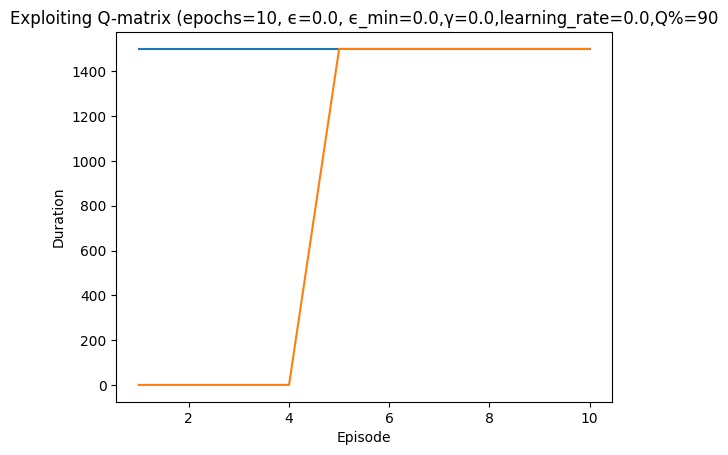

In [10]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, trained=tabularq_run["learner"], gamma=0.0, learning_rate=0.0, exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting Q-matrix",
)

In [11]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01,
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL",
)

###### DQL
Learning with: episode_count=20,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/20 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.sample_valid_action to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sample_valid_action` for environment variables or `env.get_wrapper_attr('sample_valid_action')` that will search the reminding wrappers.
  logger.warn(
Episode 1|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

/home/wblum/CyberBattleSim/cyberbattle/agents/baseline/agent_dql.py:408: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 33|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:   22.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:   33.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:   33.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:   42.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:   42.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:   53.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:   53.0|last_reward_at:   63|Elapsed Time: 0:00:00||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.
  logger.warn(
Episode 1|Iteration 100|reward:  153.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward:  153.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  167.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  167.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 108|reward:  178.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 108|reward:  178.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 1|Iteration 132|reward:  192.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 1|Iteration 132|reward:  192.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 1|Iteration 159|reward:  292.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 1|Iteration 159|reward:  292.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 1|Iteration 165|reward:  306.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 1|Iteration 165|reward:  306.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 1|Iteration 177|reward:  320.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 1|Iteration 177|reward:  320.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 1|Iteration 209|reward:  320.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:  320.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 1|Iteration 285|reward:  320.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 1|Iteration 323|reward:  320.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 1|Iteration 361|reward:  320.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 1|Iteration 399|reward:  320.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 1|Iteration 437|reward:  320.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 1|Iteration 475|reward:  320.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 1|Iteration 504|reward:  320.0|last_reward_at:  177|Elapsed Time: 0:00:01||

Episode 1|Iteration 510|reward:  320.0|last_reward_at:  177|Elapsed Time: 0:00:01||

Episode 1|Iteration 515|reward:  320.0|last_reward_at:  177|Elapsed Time: 0:00:01||

Episode 1|Iteration 520|reward:  370.0|last_reward_at:  177|Elapsed Time: 0:00:01||

Episode 1|Iteration 520|reward:  370.0|last_reward_at:  520|Elapsed Time: 0:00:01||

Episode 1|Iteration 526|reward:  370.0|last_reward_at:  520|Elapsed Time: 0:00:01||

Episode 1|Iteration 532|reward:  370.0|last_reward_at:  520|Elapsed Time: 0:00:01||

Episode 1|Iteration 536|reward:  420.0|last_reward_at:  520|Elapsed Time: 0:00:01||

Episode 1|Iteration 536|reward:  420.0|last_reward_at:  536|Elapsed Time: 0:00:01||

Episode 1|Iteration 539|reward:  470.0|last_reward_at:  536|Elapsed Time: 0:00:01||

Episode 1|Iteration 539|reward:  470.0|last_reward_at:  539|Elapsed Time: 0:00:01||

Episode 1|Iteration 541|reward:  470.0|last_reward_at:  539|Elapsed Time: 0:00:01||

Episode 1|Iteration 544|reward:  476.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 1|Iteration 544|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:02||

Episode 1|Iteration 548|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:02||

Episode 1|Iteration 553|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:02||

Episode 1|Iteration 556|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:02||

Episode 1|Iteration 561|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:02||

Episode 1|Iteration 565|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:02||

Episode 1|Iteration 570|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:02||

Episode 1|Iteration 573|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:02||

Episode 1|Iteration 579|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:02||

Episode 1|Iteration 584|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:02||

Episode 1|Iteration 589|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:03||

Episode 1|Iteration 594|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:03||

Episode 1|Iteration 598|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:03||

Episode 1|Iteration 604|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:03||

Episode 1|Iteration 608|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:03||

Episode 1|Iteration 610|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:03||

Episode 1|Iteration 612|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:03||

Episode 1|Iteration 615|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:03||

Episode 1|Iteration 617|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:03||

Episode 1|Iteration 621|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:04||

Episode 1|Iteration 627|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:04||

Episode 1|Iteration 630|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:04||

Episode 1|Iteration 636|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:04||

Episode 1|Iteration 637|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:04||

Episode 1|Iteration 643|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:04||

Episode 1|Iteration 649|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:04||

Episode 1|Iteration 655|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:04||

Episode 1|Iteration 661|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:05||

Episode 1|Iteration 664|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:05||

Episode 1|Iteration 668|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:05||

Episode 1|Iteration 674|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:05||

Episode 1|Iteration 679|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:05||

Episode 1|Iteration 680|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:05||

Episode 1|Iteration 684|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:05||

Episode 1|Iteration 689|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:05||

Episode 1|Iteration 691|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:05||

Episode 1|Iteration 696|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:06||

Episode 1|Iteration 702|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:06||

Episode 1|Iteration 708|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:06||

Episode 1|Iteration 713|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:06||

Episode 1|Iteration 719|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:06||

Episode 1|Iteration 725|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:06||

Episode 1|Iteration 731|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:06||

Episode 1|Iteration 736|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:07||

Episode 1|Iteration 741|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:07||

Episode 1|Iteration 745|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:07||

Episode 1|Iteration 751|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:07||

Episode 1|Iteration 757|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:07||

Episode 1|Iteration 762|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:07||

Episode 1|Iteration 768|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:07||

Episode 1|Iteration 773|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:07||

Episode 1|Iteration 779|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:07||

Episode 1|Iteration 784|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:07||

Episode 1|Iteration 790|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:08||

Episode 1|Iteration 791|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:08||

Episode 1|Iteration 797|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:08||

Episode 1|Iteration 802|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:08||

Episode 1|Iteration 807|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:08||

Episode 1|Iteration 813|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:08||

Episode 1|Iteration 817|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:08||

Episode 1|Iteration 822|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:08||

Episode 1|Iteration 828|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:08||

Episode 1|Iteration 834|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:08||

Episode 1|Iteration 840|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:09||

Episode 1|Iteration 846|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:09||

Episode 1|Iteration 852|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:09||

Episode 1|Iteration 858|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:09||

Episode 1|Iteration 863|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:09||

Episode 1|Iteration 866|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:09||

Episode 1|Iteration 872|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:09||

Episode 1|Iteration 875|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:09||

Episode 1|Iteration 881|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:10||

Episode 1|Iteration 887|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:10||

Episode 1|Iteration 892|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:10||

Episode 1|Iteration 896|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:10||

Episode 1|Iteration 902|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:10||

Episode 1|Iteration 908|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:10||

Episode 1|Iteration 912|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:10||

Episode 1|Iteration 916|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:10||

Episode 1|Iteration 921|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:11||

Episode 1|Iteration 927|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:11||

Episode 1|Iteration 931|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:11||

Episode 1|Iteration 934|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:11||

Episode 1|Iteration 940|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:11||

Episode 1|Iteration 946|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:11||

Episode 1|Iteration 949|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:11||

Episode 1|Iteration 954|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:12||

Episode 1|Iteration 960|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:12||

Episode 1|Iteration 966|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:12||

Episode 1|Iteration 972|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:12||

Episode 1|Iteration 976|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:12||

Episode 1|Iteration 982|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:12||

Episode 1|Iteration 985|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:12||

Episode 1|Iteration 991|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:12||

Episode 1|Iteration 996|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:13||

Episode 1|Iteration 1002|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:13||

Episode 1|Iteration 1007|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:13||

Episode 1|Iteration 1008|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:13||

Episode 1|Iteration 1014|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:13||

Episode 1|Iteration 1020|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:13||

Episode 1|Iteration 1026|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:13||

Episode 1|Iteration 1031|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:13||

Episode 1|Iteration 1036|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:13||

Episode 1|Iteration 1042|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:13||

Episode 1|Iteration 1047|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:14||

Episode 1|Iteration 1053|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:14||

Episode 1|Iteration 1059|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:14||

Episode 1|Iteration 1064|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:14||

Episode 1|Iteration 1068|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:14||

Episode 1|Iteration 1070|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:14||

Episode 1|Iteration 1071|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:14||

Episode 1|Iteration 1077|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:14||

Episode 1|Iteration 1083|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:15||

Episode 1|Iteration 1088|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:15||

Episode 1|Iteration 1094|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:15||

Episode 1|Iteration 1095|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:15||

Episode 1|Iteration 1101|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:15||

Episode 1|Iteration 1107|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:15||

Episode 1|Iteration 1113|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:15||

Episode 1|Iteration 1119|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:15||

Episode 1|Iteration 1124|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:16||

Episode 1|Iteration 1126|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:16||

Episode 1|Iteration 1132|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:16||

Episode 1|Iteration 1138|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:16||

Episode 1|Iteration 1144|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:16||

Episode 1|Iteration 1150|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:16||

Episode 1|Iteration 1156|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:16||

Episode 1|Iteration 1162|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:16||

Episode 1|Iteration 1167|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:16||

Episode 1|Iteration 1168|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:17||

Episode 1|Iteration 1174|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:17||

Episode 1|Iteration 1178|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:17||

Episode 1|Iteration 1183|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:17||

Episode 1|Iteration 1189|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:17||

Episode 1|Iteration 1195|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:17||

Episode 1|Iteration 1201|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:17||

Episode 1|Iteration 1202|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:18||

Episode 1|Iteration 1208|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:18||

Episode 1|Iteration 1213|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:18||

Episode 1|Iteration 1218|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:18||

Episode 1|Iteration 1224|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:18||

Episode 1|Iteration 1229|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:18||

Episode 1|Iteration 1235|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:18||

Episode 1|Iteration 1237|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:18||

Episode 1|Iteration 1243|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:18||

Episode 1|Iteration 1248|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:19||

Episode 1|Iteration 1254|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:19||

Episode 1|Iteration 1259|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:19||

Episode 1|Iteration 1265|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:19||

Episode 1|Iteration 1271|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:19||

Episode 1|Iteration 1276|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:19||

Episode 1|Iteration 1282|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:19||

Episode 1|Iteration 1288|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:19||

Episode 1|Iteration 1292|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:20||

Episode 1|Iteration 1294|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:20||

Episode 1|Iteration 1300|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:20||

Episode 1|Iteration 1306|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:20||

Episode 1|Iteration 1311|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:20||

Episode 1|Iteration 1316|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:20||

Episode 1|Iteration 1321|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:20||

Episode 1|Iteration 1327|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:20||

Episode 1|Iteration 1333|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:20||

Episode 1|Iteration 1338|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:21||

Episode 1|Iteration 1343|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:21||

Episode 1|Iteration 1347|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:21||

Episode 1|Iteration 1352|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:21||

Episode 1|Iteration 1358|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:21||

Episode 1|Iteration 1364|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:21||

Episode 1|Iteration 1368|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:21||

Episode 1|Iteration 1373|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:21||

Episode 1|Iteration 1377|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:22||

Episode 1|Iteration 1378|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:22||

Episode 1|Iteration 1384|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:22||

Episode 1|Iteration 1390|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:22||

Episode 1|Iteration 1396|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:22||

Episode 1|Iteration 1402|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:22||

Episode 1|Iteration 1406|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:22||

Episode 1|Iteration 1411|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:22||

Episode 1|Iteration 1417|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:22||

Episode 1|Iteration 1423|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:23||

Episode 1|Iteration 1429|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:23||

Episode 1|Iteration 1435|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:23||

Episode 1|Iteration 1441|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:23||

Episode 1|Iteration 1447|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:23||

Episode 1|Iteration 1453|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:23||

Episode 1|Iteration 1459|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:23||

Episode 1|Iteration 1463|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:23||

Episode 1|Iteration 1465|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:23||

Episode 1|Iteration 1471|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:24||

Episode 1|Iteration 1477|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:24||

Episode 1|Iteration 1482|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:24||

Episode 1|Iteration 1487|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:24||

Episode 1|Iteration 1493|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:24||

Episode 1|Iteration 1495|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:24||

Episode 1|Iteration 1497|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:24||

Episode 1|Iteration 1500|reward:  476.0|last_reward_at:  544|Elapsed Time: 0:00:24||

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/136 (0.02)
    explore-remote: 8/547 (0.01)
    explore-connect: 2/543 (0.00)
    exploit-local: 0/3 (0.00)
    exploit-remote: 0/202 (0.00)
    exploit-connect: 3/53 (0.05)
  exploit deflected to exploration: 52
  ## Episode: 2/20 'DQL' ϵ=0.6928, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   11.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:   47.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:   47.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:   47.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:   56.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:   56.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:   56.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:   56.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 53|reward:   56.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 57|reward:   56.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 2|Iteration 60|reward:  156.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 2|Iteration 60|reward:  156.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 67|reward:  156.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 73|reward:  156.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 76|reward:  170.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 76|reward:  170.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 2|Iteration 82|reward:  170.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 2|Iteration 88|reward:  170.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 2|Iteration 94|reward:  170.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 2|Iteration 99|reward:  170.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 2|Iteration 104|reward:  170.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 2|Iteration 105|reward:  270.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 2|Iteration 105|reward:  270.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 2|Iteration 108|reward:  281.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 2|Iteration 108|reward:  281.0|last_reward_at:  108|Elapsed Time: 0:00:01||

Episode 2|Iteration 112|reward:  295.0|last_reward_at:  108|Elapsed Time: 0:00:02||

Episode 2|Iteration 112|reward:  295.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 2|Iteration 113|reward:  345.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 2|Iteration 113|reward:  345.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 2|Iteration 119|reward:  345.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 2|Iteration 123|reward:  395.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 2|Iteration 123|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:02||

Episode 2|Iteration 126|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:02||

Episode 2|Iteration 128|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:02||

Episode 2|Iteration 133|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:02||

Episode 2|Iteration 136|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:02||

Episode 2|Iteration 140|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:02||

Episode 2|Iteration 142|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 2|Iteration 148|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 2|Iteration 152|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 2|Iteration 156|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 2|Iteration 162|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 2|Iteration 168|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 2|Iteration 174|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 2|Iteration 180|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 2|Iteration 186|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 2|Iteration 190|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 2|Iteration 195|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:04||

Episode 2|Iteration 200|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:04||

Episode 2|Iteration 206|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:04||

Episode 2|Iteration 212|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:04||

Episode 2|Iteration 218|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:04||

Episode 2|Iteration 221|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:04||

Episode 2|Iteration 227|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:04||

Episode 2|Iteration 233|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:04||

Episode 2|Iteration 239|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:04||

Episode 2|Iteration 245|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 2|Iteration 251|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 2|Iteration 257|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 2|Iteration 263|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 2|Iteration 269|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 2|Iteration 275|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 2|Iteration 281|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 2|Iteration 285|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 2|Iteration 290|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 2|Iteration 295|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 2|Iteration 301|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 2|Iteration 307|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 2|Iteration 313|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 2|Iteration 318|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 2|Iteration 323|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 2|Iteration 328|reward:  395.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 2|Iteration 329|reward:  406.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 2|Iteration 329|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:06||

Episode 2|Iteration 335|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:06||

Episode 2|Iteration 341|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:06||

Episode 2|Iteration 346|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:06||

Episode 2|Iteration 352|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:07||

Episode 2|Iteration 356|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:07||

Episode 2|Iteration 361|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:07||

Episode 2|Iteration 366|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:07||

Episode 2|Iteration 372|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:07||

Episode 2|Iteration 378|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:07||

Episode 2|Iteration 380|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:07||

Episode 2|Iteration 382|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:07||

Episode 2|Iteration 388|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:07||

Episode 2|Iteration 394|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:08||

Episode 2|Iteration 398|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:08||

Episode 2|Iteration 404|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:08||

Episode 2|Iteration 410|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:08||

Episode 2|Iteration 416|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:08||

Episode 2|Iteration 422|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:08||

Episode 2|Iteration 426|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:08||

Episode 2|Iteration 431|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:08||

Episode 2|Iteration 437|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:08||

Episode 2|Iteration 441|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:09||

Episode 2|Iteration 447|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:09||

Episode 2|Iteration 453|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:09||

Episode 2|Iteration 459|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:09||

Episode 2|Iteration 464|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:09||

Episode 2|Iteration 470|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:09||

Episode 2|Iteration 475|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:09||

Episode 2|Iteration 480|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:09||

Episode 2|Iteration 486|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:09||

Episode 2|Iteration 492|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:09||

Episode 2|Iteration 498|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:10||

Episode 2|Iteration 504|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:10||

Episode 2|Iteration 509|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:10||

Episode 2|Iteration 513|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:10||

Episode 2|Iteration 514|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:10||

Episode 2|Iteration 518|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:10||

Episode 2|Iteration 520|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:10||

Episode 2|Iteration 526|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:10||

Episode 2|Iteration 527|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:11||

Episode 2|Iteration 528|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:11||

Episode 2|Iteration 531|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:11||

Episode 2|Iteration 537|reward:  406.0|last_reward_at:  329|Elapsed Time: 0:00:11||

Episode 2|Iteration 541|reward:  420.0|last_reward_at:  329|Elapsed Time: 0:00:11||

Episode 2|Iteration 541|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:11||

Episode 2|Iteration 544|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:11||

Episode 2|Iteration 550|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:11||

Episode 2|Iteration 556|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:11||

Episode 2|Iteration 562|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:11||

Episode 2|Iteration 567|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:11||

Episode 2|Iteration 573|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:12||

Episode 2|Iteration 579|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:12||

Episode 2|Iteration 584|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:12||

Episode 2|Iteration 589|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:12||

Episode 2|Iteration 593|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:12||

Episode 2|Iteration 599|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:12||

Episode 2|Iteration 605|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:12||

Episode 2|Iteration 610|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:12||

Episode 2|Iteration 616|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:12||

Episode 2|Iteration 622|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:13||

Episode 2|Iteration 627|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:13||

Episode 2|Iteration 632|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:13||

Episode 2|Iteration 638|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:13||

Episode 2|Iteration 643|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:13||

Episode 2|Iteration 649|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:13||

Episode 2|Iteration 655|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:13||

Episode 2|Iteration 661|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:13||

Episode 2|Iteration 665|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:13||

Episode 2|Iteration 668|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:13||

Episode 2|Iteration 673|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:14||

Episode 2|Iteration 679|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:14||

Episode 2|Iteration 684|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:14||

Episode 2|Iteration 689|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:14||

Episode 2|Iteration 695|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:14||

Episode 2|Iteration 701|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:14||

Episode 2|Iteration 707|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:14||

Episode 2|Iteration 712|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:14||

Episode 2|Iteration 718|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:14||

Episode 2|Iteration 722|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:14||

Episode 2|Iteration 726|reward:  420.0|last_reward_at:  541|Elapsed Time: 0:00:15||

Episode 2|Iteration 728|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:15||

Episode 2|Iteration 728|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:15||

Episode 2|Iteration 734|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:15||

Episode 2|Iteration 739|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:15||

Episode 2|Iteration 745|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:15||

Episode 2|Iteration 750|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:15||

Episode 2|Iteration 754|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:15||

Episode 2|Iteration 760|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:15||

Episode 2|Iteration 765|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:15||

Episode 2|Iteration 771|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:16||

Episode 2|Iteration 776|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:16||

Episode 2|Iteration 777|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:16||

Episode 2|Iteration 783|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:16||

Episode 2|Iteration 789|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:16||

Episode 2|Iteration 795|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:16||

Episode 2|Iteration 801|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:16||

Episode 2|Iteration 807|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:16||

Episode 2|Iteration 813|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:16||

Episode 2|Iteration 816|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:17||

Episode 2|Iteration 819|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:17||

Episode 2|Iteration 824|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:17||

Episode 2|Iteration 825|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:17||

Episode 2|Iteration 829|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:17||

Episode 2|Iteration 833|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:17||

Episode 2|Iteration 834|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:17||

Episode 2|Iteration 840|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:17||

Episode 2|Iteration 845|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:18||

Episode 2|Iteration 851|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:18||

Episode 2|Iteration 855|reward:  470.0|last_reward_at:  728|Elapsed Time: 0:00:18||

Episode 2|Iteration 860|reward:  476.0|last_reward_at:  728|Elapsed Time: 0:00:18||

Episode 2|Iteration 860|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:18||

Episode 2|Iteration 866|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:18||

Episode 2|Iteration 872|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:18||

Episode 2|Iteration 878|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:18||

Episode 2|Iteration 883|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:18||

Episode 2|Iteration 888|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:19||

Episode 2|Iteration 889|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:19||

Episode 2|Iteration 892|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:19||

Episode 2|Iteration 895|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:19||

Episode 2|Iteration 896|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:19||

Episode 2|Iteration 901|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:19||

Episode 2|Iteration 904|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:19||

Episode 2|Iteration 907|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:20||

Episode 2|Iteration 912|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:20||

Episode 2|Iteration 916|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:20||

Episode 2|Iteration 922|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:20||

Episode 2|Iteration 924|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:20||

Episode 2|Iteration 929|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:20||

Episode 2|Iteration 934|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:20||

Episode 2|Iteration 939|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:20||

Episode 2|Iteration 944|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:21||

Episode 2|Iteration 949|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:21||

Episode 2|Iteration 952|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:21||

Episode 2|Iteration 957|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:21||

Episode 2|Iteration 961|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:21||

Episode 2|Iteration 966|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:21||

Episode 2|Iteration 969|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:21||

Episode 2|Iteration 969|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:21||

Episode 2|Iteration 974|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:22||

Episode 2|Iteration 978|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:22||

Episode 2|Iteration 983|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:22||

Episode 2|Iteration 987|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:22||

Episode 2|Iteration 992|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:22||

Episode 2|Iteration 995|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:22||

Episode 2|Iteration 996|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:22||

Episode 2|Iteration 1001|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:23||

Episode 2|Iteration 1006|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:23||

Episode 2|Iteration 1009|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:23||

Episode 2|Iteration 1014|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:23||

Episode 2|Iteration 1019|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:23||

Episode 2|Iteration 1023|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:23||

Episode 2|Iteration 1025|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:23||

Episode 2|Iteration 1030|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:24||

Episode 2|Iteration 1031|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:24||

Episode 2|Iteration 1036|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:24||

Episode 2|Iteration 1042|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:24||

Episode 2|Iteration 1045|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:24||

Episode 2|Iteration 1049|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:24||

Episode 2|Iteration 1053|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:24||

Episode 2|Iteration 1058|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:25||

Episode 2|Iteration 1063|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:25||

Episode 2|Iteration 1068|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:25||

Episode 2|Iteration 1073|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:25||

Episode 2|Iteration 1075|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:25||

Episode 2|Iteration 1077|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:25||

Episode 2|Iteration 1080|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:25||

Episode 2|Iteration 1084|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:25||

Episode 2|Iteration 1087|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:25||

Episode 2|Iteration 1090|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:26||

Episode 2|Iteration 1091|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:26||

Episode 2|Iteration 1095|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:26||

Episode 2|Iteration 1099|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:26||

Episode 2|Iteration 1105|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:26||

Episode 2|Iteration 1108|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:26||

Episode 2|Iteration 1113|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:26||

Episode 2|Iteration 1115|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:27||

Episode 2|Iteration 1120|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:27||

Episode 2|Iteration 1123|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:27||

Episode 2|Iteration 1128|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:27||

Episode 2|Iteration 1133|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:27||

Episode 2|Iteration 1139|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:27||

Episode 2|Iteration 1144|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:27||

Episode 2|Iteration 1149|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:28||

Episode 2|Iteration 1153|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:28||

Episode 2|Iteration 1154|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:28||

Episode 2|Iteration 1155|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:28||

Episode 2|Iteration 1157|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:28||

Episode 2|Iteration 1162|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:28||

Episode 2|Iteration 1164|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:28||

Episode 2|Iteration 1170|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:29||

Episode 2|Iteration 1173|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:29||

Episode 2|Iteration 1178|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:29||

Episode 2|Iteration 1182|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:29||

Episode 2|Iteration 1183|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:29||

Episode 2|Iteration 1184|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:29||

Episode 2|Iteration 1190|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:29||

Episode 2|Iteration 1192|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:29||

Episode 2|Iteration 1197|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:29||

Episode 2|Iteration 1199|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:30||

Episode 2|Iteration 1204|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:30||

Episode 2|Iteration 1210|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:30||

Episode 2|Iteration 1216|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:30||

Episode 2|Iteration 1221|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:30||

Episode 2|Iteration 1227|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:30||

Episode 2|Iteration 1233|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:30||

Episode 2|Iteration 1235|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:30||

Episode 2|Iteration 1241|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:30||

Episode 2|Iteration 1244|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:31||

Episode 2|Iteration 1245|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:31||

Episode 2|Iteration 1251|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:31||

Episode 2|Iteration 1254|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:31||

Episode 2|Iteration 1258|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:31||

Episode 2|Iteration 1261|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:31||

Episode 2|Iteration 1263|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:31||

Episode 2|Iteration 1267|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:31||

Episode 2|Iteration 1272|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:32||

Episode 2|Iteration 1277|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:32||

Episode 2|Iteration 1283|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:32||

Episode 2|Iteration 1287|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:32||

Episode 2|Iteration 1288|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:32||

Episode 2|Iteration 1289|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:32||

Episode 2|Iteration 1294|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:32||

Episode 2|Iteration 1300|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:32||

Episode 2|Iteration 1305|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:33||

Episode 2|Iteration 1309|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:33||

Episode 2|Iteration 1315|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:33||

Episode 2|Iteration 1317|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:33||

Episode 2|Iteration 1323|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:33||

Episode 2|Iteration 1327|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:33||

Episode 2|Iteration 1332|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:33||

Episode 2|Iteration 1337|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:34||

Episode 2|Iteration 1342|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:34||

Episode 2|Iteration 1347|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:34||

Episode 2|Iteration 1352|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:34||

Episode 2|Iteration 1354|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:34||

Episode 2|Iteration 1357|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:34||

Episode 2|Iteration 1362|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:34||

Episode 2|Iteration 1367|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:34||

Episode 2|Iteration 1368|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:34||

Episode 2|Iteration 1373|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:35||

Episode 2|Iteration 1378|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:35||

Episode 2|Iteration 1384|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:35||

Episode 2|Iteration 1390|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:35||

Episode 2|Iteration 1396|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:35||

Episode 2|Iteration 1402|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:35||

Episode 2|Iteration 1406|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:35||

Episode 2|Iteration 1410|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:35||

Episode 2|Iteration 1411|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:35||

Episode 2|Iteration 1415|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:36||

Episode 2|Iteration 1420|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:36||

Episode 2|Iteration 1423|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:36||

Episode 2|Iteration 1426|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:36||

Episode 2|Iteration 1431|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:36||

Episode 2|Iteration 1432|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:36||

Episode 2|Iteration 1437|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:36||

Episode 2|Iteration 1442|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:36||

Episode 2|Iteration 1444|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:37||

Episode 2|Iteration 1448|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:37||

Episode 2|Iteration 1452|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:37||

Episode 2|Iteration 1454|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:37||

Episode 2|Iteration 1458|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:37||

Episode 2|Iteration 1463|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:37||

Episode 2|Iteration 1467|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:37||

Episode 2|Iteration 1468|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:37||

Episode 2|Iteration 1472|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:38||

Episode 2|Iteration 1476|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:38||

Episode 2|Iteration 1479|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:38||

Episode 2|Iteration 1484|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:38||

Episode 2|Iteration 1489|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:38||

Episode 2|Iteration 1492|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:38||

Episode 2|Iteration 1496|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:38||

Episode 2|Iteration 1500|reward:  476.0|last_reward_at:  860|Elapsed Time: 0:00:38||

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/70 (0.03)
    explore-remote: 6/459 (0.01)
    explore-connect: 1/428 (0.00)
    exploit-local: 1/83 (0.01)
    exploit-remote: 2/431 (0.00)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 65
  ## Episode: 3/20 'DQL' ϵ=0.5391, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:   53.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:   53.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:   53.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:   53.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:   53.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:   53.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:   53.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 3|Iteration 57|reward:   53.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 3|Iteration 57|reward:  103.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 3|Iteration 57|reward:  103.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 3|Iteration 62|reward:  103.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 3|Iteration 68|reward:  103.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 3|Iteration 72|reward:  103.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 3|Iteration 76|reward:  103.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 3|Iteration 79|reward:  103.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 3|Iteration 85|reward:  103.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 3|Iteration 90|reward:  103.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 3|Iteration 94|reward:  103.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 3|Iteration 98|reward:  103.0|last_reward_at:   57|Elapsed Time: 0:00:02||

Episode 3|Iteration 104|reward:  103.0|last_reward_at:   57|Elapsed Time: 0:00:02||

Episode 3|Iteration 109|reward:  103.0|last_reward_at:   57|Elapsed Time: 0:00:02||

Episode 3|Iteration 114|reward:  103.0|last_reward_at:   57|Elapsed Time: 0:00:02||

Episode 3|Iteration 118|reward:  112.0|last_reward_at:   57|Elapsed Time: 0:00:02||

Episode 3|Iteration 118|reward:  112.0|last_reward_at:  118|Elapsed Time: 0:00:02||

Episode 3|Iteration 124|reward:  112.0|last_reward_at:  118|Elapsed Time: 0:00:02||

Episode 3|Iteration 130|reward:  112.0|last_reward_at:  118|Elapsed Time: 0:00:02||

Episode 3|Iteration 133|reward:  112.0|last_reward_at:  118|Elapsed Time: 0:00:02||

Episode 3|Iteration 133|reward:  123.0|last_reward_at:  118|Elapsed Time: 0:00:02||

Episode 3|Iteration 133|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 3|Iteration 138|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 3|Iteration 143|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 3|Iteration 148|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 3|Iteration 152|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 3|Iteration 157|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 3|Iteration 163|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 3|Iteration 168|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 3|Iteration 171|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 3|Iteration 176|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 3|Iteration 182|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 3|Iteration 187|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 3|Iteration 192|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 3|Iteration 197|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 3|Iteration 202|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 3|Iteration 207|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 3|Iteration 213|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 3|Iteration 217|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 3|Iteration 223|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 3|Iteration 228|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 3|Iteration 230|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 3|Iteration 235|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 3|Iteration 241|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 3|Iteration 246|reward:  123.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 3|Iteration 247|reward:  223.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 3|Iteration 247|reward:  223.0|last_reward_at:  247|Elapsed Time: 0:00:05||

Episode 3|Iteration 249|reward:  223.0|last_reward_at:  247|Elapsed Time: 0:00:05||

Episode 3|Iteration 252|reward:  223.0|last_reward_at:  247|Elapsed Time: 0:00:05||

Episode 3|Iteration 255|reward:  223.0|last_reward_at:  247|Elapsed Time: 0:00:05||

Episode 3|Iteration 258|reward:  223.0|last_reward_at:  247|Elapsed Time: 0:00:05||

Episode 3|Iteration 261|reward:  237.0|last_reward_at:  247|Elapsed Time: 0:00:05||

Episode 3|Iteration 261|reward:  237.0|last_reward_at:  261|Elapsed Time: 0:00:05||

Episode 3|Iteration 265|reward:  237.0|last_reward_at:  261|Elapsed Time: 0:00:05||

Episode 3|Iteration 268|reward:  237.0|last_reward_at:  261|Elapsed Time: 0:00:06||

Episode 3|Iteration 273|reward:  237.0|last_reward_at:  261|Elapsed Time: 0:00:06||

Episode 3|Iteration 279|reward:  237.0|last_reward_at:  261|Elapsed Time: 0:00:06||

Episode 3|Iteration 284|reward:  237.0|last_reward_at:  261|Elapsed Time: 0:00:06||

Episode 3|Iteration 289|reward:  237.0|last_reward_at:  261|Elapsed Time: 0:00:06||

Episode 3|Iteration 295|reward:  237.0|last_reward_at:  261|Elapsed Time: 0:00:06||

Episode 3|Iteration 301|reward:  237.0|last_reward_at:  261|Elapsed Time: 0:00:06||

Episode 3|Iteration 307|reward:  237.0|last_reward_at:  261|Elapsed Time: 0:00:06||

Episode 3|Iteration 309|reward:  251.0|last_reward_at:  261|Elapsed Time: 0:00:06||

Episode 3|Iteration 309|reward:  251.0|last_reward_at:  309|Elapsed Time: 0:00:06||

Episode 3|Iteration 314|reward:  251.0|last_reward_at:  309|Elapsed Time: 0:00:06||

Episode 3|Iteration 318|reward:  301.0|last_reward_at:  309|Elapsed Time: 0:00:07||

Episode 3|Iteration 318|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 3|Iteration 321|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 3|Iteration 327|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 3|Iteration 333|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 3|Iteration 339|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 3|Iteration 345|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 3|Iteration 351|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 3|Iteration 355|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 3|Iteration 360|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 3|Iteration 366|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 3|Iteration 370|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 3|Iteration 376|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 3|Iteration 380|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 3|Iteration 385|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 3|Iteration 391|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 3|Iteration 397|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 3|Iteration 403|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 3|Iteration 409|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 3|Iteration 415|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 3|Iteration 421|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 3|Iteration 427|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 3|Iteration 433|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 3|Iteration 437|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 3|Iteration 441|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 3|Iteration 446|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 3|Iteration 451|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 3|Iteration 456|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 3|Iteration 459|reward:  301.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 3|Iteration 464|reward:  401.0|last_reward_at:  318|Elapsed Time: 0:00:10||

Episode 3|Iteration 464|reward:  401.0|last_reward_at:  464|Elapsed Time: 0:00:10||

Episode 3|Iteration 465|reward:  401.0|last_reward_at:  464|Elapsed Time: 0:00:10||

Episode 3|Iteration 470|reward:  401.0|last_reward_at:  464|Elapsed Time: 0:00:10||

Episode 3|Iteration 475|reward:  401.0|last_reward_at:  464|Elapsed Time: 0:00:10||

Episode 3|Iteration 479|reward:  401.0|last_reward_at:  464|Elapsed Time: 0:00:10||

Episode 3|Iteration 484|reward:  401.0|last_reward_at:  464|Elapsed Time: 0:00:10||

Episode 3|Iteration 488|reward:  412.0|last_reward_at:  464|Elapsed Time: 0:00:10||

Episode 3|Iteration 488|reward:  412.0|last_reward_at:  488|Elapsed Time: 0:00:10||

Episode 3|Iteration 494|reward:  412.0|last_reward_at:  488|Elapsed Time: 0:00:10||

Episode 3|Iteration 498|reward:  412.0|last_reward_at:  488|Elapsed Time: 0:00:10||

Episode 3|Iteration 504|reward:  412.0|last_reward_at:  488|Elapsed Time: 0:00:10||

Episode 3|Iteration 510|reward:  412.0|last_reward_at:  488|Elapsed Time: 0:00:11||

Episode 3|Iteration 516|reward:  412.0|last_reward_at:  488|Elapsed Time: 0:00:11||

Episode 3|Iteration 518|reward:  426.0|last_reward_at:  488|Elapsed Time: 0:00:11||

Episode 3|Iteration 518|reward:  426.0|last_reward_at:  518|Elapsed Time: 0:00:11||

Episode 3|Iteration 522|reward:  426.0|last_reward_at:  518|Elapsed Time: 0:00:11||

Episode 3|Iteration 527|reward:  426.0|last_reward_at:  518|Elapsed Time: 0:00:11||

Episode 3|Iteration 531|reward:  426.0|last_reward_at:  518|Elapsed Time: 0:00:11||

Episode 3|Iteration 534|reward:  426.0|last_reward_at:  518|Elapsed Time: 0:00:11||

Episode 3|Iteration 539|reward:  426.0|last_reward_at:  518|Elapsed Time: 0:00:11||

Episode 3|Iteration 545|reward:  426.0|last_reward_at:  518|Elapsed Time: 0:00:11||

Episode 3|Iteration 548|reward:  426.0|last_reward_at:  518|Elapsed Time: 0:00:12||

Episode 3|Iteration 553|reward:  426.0|last_reward_at:  518|Elapsed Time: 0:00:12||

Episode 3|Iteration 558|reward:  426.0|last_reward_at:  518|Elapsed Time: 0:00:12||

Episode 3|Iteration 564|reward:  426.0|last_reward_at:  518|Elapsed Time: 0:00:12||

Episode 3|Iteration 568|reward:  476.0|last_reward_at:  518|Elapsed Time: 0:00:12||

Episode 3|Iteration 568|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:12||

Episode 3|Iteration 569|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:12||

Episode 3|Iteration 572|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:12||

Episode 3|Iteration 577|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:12||

Episode 3|Iteration 582|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:12||

Episode 3|Iteration 585|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:13||

Episode 3|Iteration 589|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:13||

Episode 3|Iteration 594|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:13||

Episode 3|Iteration 598|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:13||

Episode 3|Iteration 603|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:13||

Episode 3|Iteration 608|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:13||

Episode 3|Iteration 613|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:13||

Episode 3|Iteration 619|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:13||

Episode 3|Iteration 625|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:14||

Episode 3|Iteration 628|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:14||

Episode 3|Iteration 630|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:14||

Episode 3|Iteration 635|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:14||

Episode 3|Iteration 641|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:14||

Episode 3|Iteration 643|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:14||

Episode 3|Iteration 645|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:14||

Episode 3|Iteration 647|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:14||

Episode 3|Iteration 652|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:15||

Episode 3|Iteration 653|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:15||

Episode 3|Iteration 656|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:15||

Episode 3|Iteration 662|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:15||

Episode 3|Iteration 663|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:15||

Episode 3|Iteration 664|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:15||

Episode 3|Iteration 666|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:15||

Episode 3|Iteration 668|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:15||

Episode 3|Iteration 669|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:16||

Episode 3|Iteration 674|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:16||

Episode 3|Iteration 678|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:16||

Episode 3|Iteration 683|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:16||

Episode 3|Iteration 687|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:16||

Episode 3|Iteration 692|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:16||

Episode 3|Iteration 697|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:16||

Episode 3|Iteration 703|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:17||

Episode 3|Iteration 707|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:17||

Episode 3|Iteration 711|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:17||

Episode 3|Iteration 717|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:17||

Episode 3|Iteration 719|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:17||

Episode 3|Iteration 724|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:17||

Episode 3|Iteration 729|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:17||

Episode 3|Iteration 731|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:18||

Episode 3|Iteration 732|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:18||

Episode 3|Iteration 737|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:18||

Episode 3|Iteration 741|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:18||

Episode 3|Iteration 746|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:18||

Episode 3|Iteration 749|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:18||

Episode 3|Iteration 754|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:18||

Episode 3|Iteration 755|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:18||

Episode 3|Iteration 757|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:18||

Episode 3|Iteration 762|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:19||

Episode 3|Iteration 767|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:19||

Episode 3|Iteration 771|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:19||

Episode 3|Iteration 775|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:19||

Episode 3|Iteration 779|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:19||

Episode 3|Iteration 780|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:19||

Episode 3|Iteration 781|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:19||

Episode 3|Iteration 786|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:20||

Episode 3|Iteration 790|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:20||

Episode 3|Iteration 792|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:20||

Episode 3|Iteration 798|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:20||

Episode 3|Iteration 800|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:20||

Episode 3|Iteration 803|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:20||

Episode 3|Iteration 806|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:20||

Episode 3|Iteration 811|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:21||

Episode 3|Iteration 816|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:21||

Episode 3|Iteration 821|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:21||

Episode 3|Iteration 826|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:21||

Episode 3|Iteration 830|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:21||

Episode 3|Iteration 835|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:21||

Episode 3|Iteration 837|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:21||

Episode 3|Iteration 842|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:21||

Episode 3|Iteration 843|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:22||

Episode 3|Iteration 848|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:22||

Episode 3|Iteration 850|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:22||

Episode 3|Iteration 853|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:22||

Episode 3|Iteration 858|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:22||

Episode 3|Iteration 863|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:22||

Episode 3|Iteration 868|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:22||

Episode 3|Iteration 872|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:22||

Episode 3|Iteration 873|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:22||

Episode 3|Iteration 877|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:23||

Episode 3|Iteration 878|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:23||

Episode 3|Iteration 883|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:23||

Episode 3|Iteration 888|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:23||

Episode 3|Iteration 893|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:23||

Episode 3|Iteration 898|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:23||

Episode 3|Iteration 902|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:23||

Episode 3|Iteration 907|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:24||

Episode 3|Iteration 911|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:24||

Episode 3|Iteration 916|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:24||

Episode 3|Iteration 920|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:24||

Episode 3|Iteration 925|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:24||

Episode 3|Iteration 926|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:24||

Episode 3|Iteration 931|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:24||

Episode 3|Iteration 934|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:25||

Episode 3|Iteration 938|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:25||

Episode 3|Iteration 941|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:25||

Episode 3|Iteration 946|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:25||

Episode 3|Iteration 950|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:25||

Episode 3|Iteration 952|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:25||

Episode 3|Iteration 955|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:25||

Episode 3|Iteration 960|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:25||

Episode 3|Iteration 964|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:26||

Episode 3|Iteration 969|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:26||

Episode 3|Iteration 973|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:26||

Episode 3|Iteration 976|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:26||

Episode 3|Iteration 981|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:26||

Episode 3|Iteration 986|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:26||

Episode 3|Iteration 990|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:26||

Episode 3|Iteration 992|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:27||

Episode 3|Iteration 994|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:27||

Episode 3|Iteration 995|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:27||

Episode 3|Iteration 1000|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:27||

Episode 3|Iteration 1005|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:27||

Episode 3|Iteration 1011|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:27||

Episode 3|Iteration 1013|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:27||

Episode 3|Iteration 1018|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:28||

Episode 3|Iteration 1022|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:28||

Episode 3|Iteration 1026|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:28||

Episode 3|Iteration 1026|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:28||

Episode 3|Iteration 1029|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:28||

Episode 3|Iteration 1034|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:28||

Episode 3|Iteration 1035|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:28||

Episode 3|Iteration 1036|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:28||

Episode 3|Iteration 1039|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:29||

Episode 3|Iteration 1044|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:29||

Episode 3|Iteration 1047|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:29||

Episode 3|Iteration 1051|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:29||

Episode 3|Iteration 1056|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:29||

Episode 3|Iteration 1058|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:29||

Episode 3|Iteration 1061|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:29||

Episode 3|Iteration 1066|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:29||

Episode 3|Iteration 1069|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:30||

Episode 3|Iteration 1070|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:30||

Episode 3|Iteration 1075|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:30||

Episode 3|Iteration 1079|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:30||

Episode 3|Iteration 1083|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:30||

Episode 3|Iteration 1088|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:30||

Episode 3|Iteration 1089|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:30||

Episode 3|Iteration 1090|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:30||

Episode 3|Iteration 1092|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:30||

Episode 3|Iteration 1095|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:31||

Episode 3|Iteration 1099|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:31||

Episode 3|Iteration 1102|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:31||

Episode 3|Iteration 1105|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:31||

Episode 3|Iteration 1110|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:31||

Episode 3|Iteration 1114|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:31||

Episode 3|Iteration 1118|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:31||

Episode 3|Iteration 1123|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:32||

Episode 3|Iteration 1124|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:32||

Episode 3|Iteration 1129|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:32||

Episode 3|Iteration 1132|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:32||

Episode 3|Iteration 1138|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:32||

Episode 3|Iteration 1140|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:32||

Episode 3|Iteration 1143|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:32||

Episode 3|Iteration 1148|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:33||

Episode 3|Iteration 1150|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:33||

Episode 3|Iteration 1155|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:33||

Episode 3|Iteration 1159|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:33||

Episode 3|Iteration 1163|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:33||

Episode 3|Iteration 1167|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:33||

Episode 3|Iteration 1172|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:33||

Episode 3|Iteration 1177|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:34||

Episode 3|Iteration 1178|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:34||

Episode 3|Iteration 1183|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:34||

Episode 3|Iteration 1188|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:34||

Episode 3|Iteration 1192|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:34||

Episode 3|Iteration 1195|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:34||

Episode 3|Iteration 1201|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:34||

Episode 3|Iteration 1206|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:35||

Episode 3|Iteration 1211|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:35||

Episode 3|Iteration 1213|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:35||

Episode 3|Iteration 1218|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:35||

Episode 3|Iteration 1223|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:35||

Episode 3|Iteration 1225|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:35||

Episode 3|Iteration 1229|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:36||

Episode 3|Iteration 1233|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:36||

Episode 3|Iteration 1238|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:36||

Episode 3|Iteration 1242|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:36||

Episode 3|Iteration 1247|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:36||

Episode 3|Iteration 1248|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:36||

Episode 3|Iteration 1250|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:36||

Episode 3|Iteration 1254|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:36||

Episode 3|Iteration 1257|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:36||

Episode 3|Iteration 1260|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:37||

Episode 3|Iteration 1265|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:37||

Episode 3|Iteration 1267|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:37||

Episode 3|Iteration 1272|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:37||

Episode 3|Iteration 1277|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:37||

Episode 3|Iteration 1282|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:37||

Episode 3|Iteration 1286|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:37||

Episode 3|Iteration 1289|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:38||

Episode 3|Iteration 1294|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:38||

Episode 3|Iteration 1299|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:38||

Episode 3|Iteration 1304|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:38||

Episode 3|Iteration 1309|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:38||

Episode 3|Iteration 1310|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:38||

Episode 3|Iteration 1314|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:38||

Episode 3|Iteration 1318|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:39||

Episode 3|Iteration 1320|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:39||

Episode 3|Iteration 1322|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:39||

Episode 3|Iteration 1326|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:39||

Episode 3|Iteration 1327|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:39||

Episode 3|Iteration 1332|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:39||

Episode 3|Iteration 1336|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:39||

Episode 3|Iteration 1341|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:39||

Episode 3|Iteration 1342|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:40||

Episode 3|Iteration 1347|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:40||

Episode 3|Iteration 1351|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:40||

Episode 3|Iteration 1356|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:40||

Episode 3|Iteration 1361|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:40||

Episode 3|Iteration 1367|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:40||

Episode 3|Iteration 1373|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:40||

Episode 3|Iteration 1378|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:40||

Episode 3|Iteration 1381|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:41||

Episode 3|Iteration 1383|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:41||

Episode 3|Iteration 1384|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:41||

Episode 3|Iteration 1389|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:41||

Episode 3|Iteration 1393|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:41||

Episode 3|Iteration 1398|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:41||

Episode 3|Iteration 1403|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:41||

Episode 3|Iteration 1405|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:41||

Episode 3|Iteration 1408|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:41||

Episode 3|Iteration 1413|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:42||

Episode 3|Iteration 1414|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:42||

Episode 3|Iteration 1419|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:42||

Episode 3|Iteration 1420|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:42||

Episode 3|Iteration 1425|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:42||

Episode 3|Iteration 1429|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:42||

Episode 3|Iteration 1433|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:42||

Episode 3|Iteration 1434|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:42||

Episode 3|Iteration 1435|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:43||

Episode 3|Iteration 1438|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:43||

Episode 3|Iteration 1441|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:43||

Episode 3|Iteration 1446|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:43||

Episode 3|Iteration 1451|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:43||

Episode 3|Iteration 1456|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:43||

Episode 3|Iteration 1457|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:43||

Episode 3|Iteration 1458|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:44||

Episode 3|Iteration 1463|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:44||

Episode 3|Iteration 1463|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:44||

Episode 3|Iteration 1465|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:44||

Episode 3|Iteration 1469|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:44||

Episode 3|Iteration 1472|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:44||

Episode 3|Iteration 1477|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:45||

Episode 3|Iteration 1482|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:45||

Episode 3|Iteration 1484|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:45||

Episode 3|Iteration 1488|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:45||

Episode 3|Iteration 1493|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:45||

Episode 3|Iteration 1499|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:45||

Episode 3|Iteration 1500|reward:  476.0|last_reward_at:  568|Elapsed Time: 0:00:45||

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/70 (0.04)
    explore-remote: 3/367 (0.01)
    explore-connect: 0/375 (0.00)
    exploit-local: 0/104 (0.00)
    exploit-remote: 5/539 (0.01)
    exploit-connect: 5/29 (0.15)
  exploit deflected to exploration: 110
  ## Episode: 4/20 'DQL' ϵ=0.4253, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:   44.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 4|Iteration 53|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 4|Iteration 54|reward:   58.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 4|Iteration 54|reward:   58.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 4|Iteration 60|reward:   58.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 4|Iteration 64|reward:  108.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 4|Iteration 64|reward:  108.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 4|Iteration 66|reward:  108.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 4|Iteration 71|reward:  108.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 4|Iteration 72|reward:  122.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 4|Iteration 72|reward:  122.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 4|Iteration 75|reward:  172.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 4|Iteration 75|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 4|Iteration 80|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 4|Iteration 84|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 4|Iteration 87|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 4|Iteration 92|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 4|Iteration 95|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 4|Iteration 100|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 4|Iteration 102|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 4|Iteration 107|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 4|Iteration 112|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 4|Iteration 118|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 4|Iteration 121|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 4|Iteration 123|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 4|Iteration 128|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 4|Iteration 133|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 4|Iteration 135|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 4|Iteration 141|reward:  172.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 4|Iteration 147|reward:  183.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 4|Iteration 147|reward:  183.0|last_reward_at:  147|Elapsed Time: 0:00:03||

Episode 4|Iteration 152|reward:  183.0|last_reward_at:  147|Elapsed Time: 0:00:03||

Episode 4|Iteration 157|reward:  183.0|last_reward_at:  147|Elapsed Time: 0:00:03||

Episode 4|Iteration 162|reward:  183.0|last_reward_at:  147|Elapsed Time: 0:00:04||

Episode 4|Iteration 165|reward:  183.0|last_reward_at:  147|Elapsed Time: 0:00:04||

Episode 4|Iteration 170|reward:  183.0|last_reward_at:  147|Elapsed Time: 0:00:04||

Episode 4|Iteration 176|reward:  183.0|last_reward_at:  147|Elapsed Time: 0:00:04||

Episode 4|Iteration 179|reward:  183.0|last_reward_at:  147|Elapsed Time: 0:00:04||

Episode 4|Iteration 184|reward:  183.0|last_reward_at:  147|Elapsed Time: 0:00:04||

Episode 4|Iteration 190|reward:  183.0|last_reward_at:  147|Elapsed Time: 0:00:04||

Episode 4|Iteration 195|reward:  183.0|last_reward_at:  147|Elapsed Time: 0:00:04||

Episode 4|Iteration 196|reward:  192.0|last_reward_at:  147|Elapsed Time: 0:00:04||

Episode 4|Iteration 196|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:04||

Episode 4|Iteration 202|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:05||

Episode 4|Iteration 208|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:05||

Episode 4|Iteration 214|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:05||

Episode 4|Iteration 220|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:05||

Episode 4|Iteration 225|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:05||

Episode 4|Iteration 230|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:05||

Episode 4|Iteration 236|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:05||

Episode 4|Iteration 242|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:05||

Episode 4|Iteration 245|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:05||

Episode 4|Iteration 250|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 4|Iteration 256|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 4|Iteration 260|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 4|Iteration 265|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 4|Iteration 270|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 4|Iteration 273|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 4|Iteration 275|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 4|Iteration 281|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 4|Iteration 284|reward:  192.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 4|Iteration 285|reward:  292.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 4|Iteration 285|reward:  292.0|last_reward_at:  285|Elapsed Time: 0:00:06||

Episode 4|Iteration 289|reward:  292.0|last_reward_at:  285|Elapsed Time: 0:00:07||

Episode 4|Iteration 291|reward:  292.0|last_reward_at:  285|Elapsed Time: 0:00:07||

Episode 4|Iteration 297|reward:  292.0|last_reward_at:  285|Elapsed Time: 0:00:07||

Episode 4|Iteration 300|reward:  292.0|last_reward_at:  285|Elapsed Time: 0:00:07||

Episode 4|Iteration 304|reward:  292.0|last_reward_at:  285|Elapsed Time: 0:00:07||

Episode 4|Iteration 305|reward:  292.0|last_reward_at:  285|Elapsed Time: 0:00:07||

Episode 4|Iteration 306|reward:  306.0|last_reward_at:  285|Elapsed Time: 0:00:07||

Episode 4|Iteration 306|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:07||

Episode 4|Iteration 311|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:07||

Episode 4|Iteration 316|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:07||

Episode 4|Iteration 321|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:08||

Episode 4|Iteration 325|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:08||

Episode 4|Iteration 330|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:08||

Episode 4|Iteration 336|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:08||

Episode 4|Iteration 342|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:08||

Episode 4|Iteration 347|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:08||

Episode 4|Iteration 353|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:08||

Episode 4|Iteration 358|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:08||

Episode 4|Iteration 363|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:08||

Episode 4|Iteration 369|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:09||

Episode 4|Iteration 373|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:09||

Episode 4|Iteration 378|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:09||

Episode 4|Iteration 381|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:09||

Episode 4|Iteration 386|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:09||

Episode 4|Iteration 391|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:09||

Episode 4|Iteration 397|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:09||

Episode 4|Iteration 403|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:09||

Episode 4|Iteration 409|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 4|Iteration 414|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 4|Iteration 418|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 4|Iteration 423|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 4|Iteration 428|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 4|Iteration 433|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 4|Iteration 437|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 4|Iteration 441|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 4|Iteration 445|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 4|Iteration 450|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 4|Iteration 455|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:11||

Episode 4|Iteration 459|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:11||

Episode 4|Iteration 465|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:11||

Episode 4|Iteration 470|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:11||

Episode 4|Iteration 475|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:11||

Episode 4|Iteration 479|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:11||

Episode 4|Iteration 484|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:11||

Episode 4|Iteration 489|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:11||

Episode 4|Iteration 494|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:11||

Episode 4|Iteration 498|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:12||

Episode 4|Iteration 503|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:12||

Episode 4|Iteration 508|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:12||

Episode 4|Iteration 513|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:12||

Episode 4|Iteration 517|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:12||

Episode 4|Iteration 521|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:12||

Episode 4|Iteration 523|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:12||

Episode 4|Iteration 528|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:12||

Episode 4|Iteration 532|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:12||

Episode 4|Iteration 533|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:13||

Episode 4|Iteration 538|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:13||

Episode 4|Iteration 543|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:13||

Episode 4|Iteration 548|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:13||

Episode 4|Iteration 552|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:13||

Episode 4|Iteration 558|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:13||

Episode 4|Iteration 563|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:13||

Episode 4|Iteration 565|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:13||

Episode 4|Iteration 570|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:14||

Episode 4|Iteration 574|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:14||

Episode 4|Iteration 579|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:14||

Episode 4|Iteration 584|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:14||

Episode 4|Iteration 589|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:14||

Episode 4|Iteration 593|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:14||

Episode 4|Iteration 598|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:14||

Episode 4|Iteration 603|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:14||

Episode 4|Iteration 608|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:14||

Episode 4|Iteration 610|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:15||

Episode 4|Iteration 615|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:15||

Episode 4|Iteration 620|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:15||

Episode 4|Iteration 623|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:15||

Episode 4|Iteration 625|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:15||

Episode 4|Iteration 630|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:15||

Episode 4|Iteration 634|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:15||

Episode 4|Iteration 639|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:15||

Episode 4|Iteration 644|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:15||

Episode 4|Iteration 649|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:16||

Episode 4|Iteration 654|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:16||

Episode 4|Iteration 659|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:16||

Episode 4|Iteration 663|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:16||

Episode 4|Iteration 666|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:16||

Episode 4|Iteration 671|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:16||

Episode 4|Iteration 676|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:16||

Episode 4|Iteration 681|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:16||

Episode 4|Iteration 686|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:17||

Episode 4|Iteration 691|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:17||

Episode 4|Iteration 696|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:17||

Episode 4|Iteration 699|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:17||

Episode 4|Iteration 703|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:17||

Episode 4|Iteration 707|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:17||

Episode 4|Iteration 712|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:17||

Episode 4|Iteration 717|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:17||

Episode 4|Iteration 722|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:00:17||

Episode 4|Iteration 724|reward:  406.0|last_reward_at:  306|Elapsed Time: 0:00:17||

Episode 4|Iteration 724|reward:  406.0|last_reward_at:  724|Elapsed Time: 0:00:17||

Episode 4|Iteration 730|reward:  406.0|last_reward_at:  724|Elapsed Time: 0:00:18||

Episode 4|Iteration 735|reward:  406.0|last_reward_at:  724|Elapsed Time: 0:00:18||

Episode 4|Iteration 740|reward:  406.0|last_reward_at:  724|Elapsed Time: 0:00:18||

Episode 4|Iteration 745|reward:  406.0|last_reward_at:  724|Elapsed Time: 0:00:18||

Episode 4|Iteration 747|reward:  420.0|last_reward_at:  724|Elapsed Time: 0:00:18||

Episode 4|Iteration 747|reward:  420.0|last_reward_at:  747|Elapsed Time: 0:00:18||

Episode 4|Iteration 752|reward:  420.0|last_reward_at:  747|Elapsed Time: 0:00:18||

Episode 4|Iteration 757|reward:  420.0|last_reward_at:  747|Elapsed Time: 0:00:18||

Episode 4|Iteration 762|reward:  420.0|last_reward_at:  747|Elapsed Time: 0:00:18||

Episode 4|Iteration 766|reward:  420.0|last_reward_at:  747|Elapsed Time: 0:00:18||

Episode 4|Iteration 767|reward:  470.0|last_reward_at:  747|Elapsed Time: 0:00:18||

Episode 4|Iteration 767|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:18||

Episode 4|Iteration 770|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:19||

Episode 4|Iteration 773|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:19||

Episode 4|Iteration 777|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:19||

Episode 4|Iteration 778|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:19||

Episode 4|Iteration 783|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:19||

Episode 4|Iteration 788|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:19||

Episode 4|Iteration 792|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:20||

Episode 4|Iteration 793|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:20||

Episode 4|Iteration 798|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:20||

Episode 4|Iteration 801|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:20||

Episode 4|Iteration 804|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:20||

Episode 4|Iteration 808|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:20||

Episode 4|Iteration 809|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:20||

Episode 4|Iteration 812|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:21||

Episode 4|Iteration 817|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:21||

Episode 4|Iteration 819|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:21||

Episode 4|Iteration 823|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:21||

Episode 4|Iteration 824|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:21||

Episode 4|Iteration 827|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:21||

Episode 4|Iteration 832|reward:  470.0|last_reward_at:  767|Elapsed Time: 0:00:21||

Episode 4|Iteration 834|reward:  476.0|last_reward_at:  767|Elapsed Time: 0:00:21||

Episode 4|Iteration 834|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:21||

Episode 4|Iteration 835|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:21||

Episode 4|Iteration 836|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:22||

Episode 4|Iteration 838|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:22||

Episode 4|Iteration 843|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:22||

Episode 4|Iteration 844|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:22||

Episode 4|Iteration 847|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:22||

Episode 4|Iteration 852|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:22||

Episode 4|Iteration 857|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:23||

Episode 4|Iteration 862|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:23||

Episode 4|Iteration 865|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:23||

Episode 4|Iteration 868|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:23||

Episode 4|Iteration 873|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:23||

Episode 4|Iteration 875|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:23||

Episode 4|Iteration 877|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:23||

Episode 4|Iteration 880|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:24||

Episode 4|Iteration 885|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:24||

Episode 4|Iteration 886|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:24||

Episode 4|Iteration 890|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:24||

Episode 4|Iteration 891|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:24||

Episode 4|Iteration 895|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:24||

Episode 4|Iteration 897|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:24||

Episode 4|Iteration 902|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:24||

Episode 4|Iteration 906|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:25||

Episode 4|Iteration 909|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:25||

Episode 4|Iteration 914|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:25||

Episode 4|Iteration 917|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:25||

Episode 4|Iteration 922|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:25||

Episode 4|Iteration 926|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:25||

Episode 4|Iteration 931|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:25||

Episode 4|Iteration 931|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:26||

Episode 4|Iteration 932|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:26||

Episode 4|Iteration 934|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:26||

Episode 4|Iteration 937|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:26||

Episode 4|Iteration 939|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:26||

Episode 4|Iteration 942|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:26||

Episode 4|Iteration 945|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:26||

Episode 4|Iteration 948|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:27||

Episode 4|Iteration 951|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:27||

Episode 4|Iteration 956|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:27||

Episode 4|Iteration 961|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:27||

Episode 4|Iteration 966|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:27||

Episode 4|Iteration 969|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:27||

Episode 4|Iteration 971|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:27||

Episode 4|Iteration 974|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:28||

Episode 4|Iteration 979|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:28||

Episode 4|Iteration 981|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:28||

Episode 4|Iteration 983|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:28||

Episode 4|Iteration 988|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:28||

Episode 4|Iteration 989|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:28||

Episode 4|Iteration 992|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:29||

Episode 4|Iteration 994|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:29||

Episode 4|Iteration 996|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:29||

Episode 4|Iteration 1001|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:29||

Episode 4|Iteration 1006|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:29||

Episode 4|Iteration 1011|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:29||

Episode 4|Iteration 1014|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:29||

Episode 4|Iteration 1019|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:30||

Episode 4|Iteration 1022|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:30||

Episode 4|Iteration 1023|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:30||

Episode 4|Iteration 1027|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:30||

Episode 4|Iteration 1028|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:30||

Episode 4|Iteration 1033|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:30||

Episode 4|Iteration 1038|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:30||

Episode 4|Iteration 1039|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:31||

Episode 4|Iteration 1043|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:31||

Episode 4|Iteration 1045|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:31||

Episode 4|Iteration 1048|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:31||

Episode 4|Iteration 1049|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:31||

Episode 4|Iteration 1052|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:31||

Episode 4|Iteration 1054|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:31||

Episode 4|Iteration 1058|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:32||

Episode 4|Iteration 1063|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:32||

Episode 4|Iteration 1067|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:32||

Episode 4|Iteration 1071|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:32||

Episode 4|Iteration 1076|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:32||

Episode 4|Iteration 1077|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:32||

Episode 4|Iteration 1078|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:32||

Episode 4|Iteration 1082|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:33||

Episode 4|Iteration 1086|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:33||

Episode 4|Iteration 1088|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:33||

Episode 4|Iteration 1091|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:33||

Episode 4|Iteration 1096|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:33||

Episode 4|Iteration 1099|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:33||

Episode 4|Iteration 1104|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:33||

Episode 4|Iteration 1109|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:34||

Episode 4|Iteration 1114|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:34||

Episode 4|Iteration 1119|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:34||

Episode 4|Iteration 1121|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:34||

Episode 4|Iteration 1121|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:34||

Episode 4|Iteration 1123|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:34||

Episode 4|Iteration 1127|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:34||

Episode 4|Iteration 1128|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:34||

Episode 4|Iteration 1133|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:35||

Episode 4|Iteration 1134|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:35||

Episode 4|Iteration 1139|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:35||

Episode 4|Iteration 1142|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:35||

Episode 4|Iteration 1147|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:35||

Episode 4|Iteration 1148|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:35||

Episode 4|Iteration 1153|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:35||

Episode 4|Iteration 1158|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:36||

Episode 4|Iteration 1163|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:36||

Episode 4|Iteration 1168|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:36||

Episode 4|Iteration 1170|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:36||

Episode 4|Iteration 1172|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:36||

Episode 4|Iteration 1176|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:36||

Episode 4|Iteration 1181|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:36||

Episode 4|Iteration 1186|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:37||

Episode 4|Iteration 1190|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:37||

Episode 4|Iteration 1195|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:37||

Episode 4|Iteration 1199|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:37||

Episode 4|Iteration 1203|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:37||

Episode 4|Iteration 1204|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:38||

Episode 4|Iteration 1206|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:38||

Episode 4|Iteration 1211|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:38||

Episode 4|Iteration 1216|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:38||

Episode 4|Iteration 1217|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:38||

Episode 4|Iteration 1222|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:38||

Episode 4|Iteration 1227|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:38||

Episode 4|Iteration 1230|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:38||

Episode 4|Iteration 1235|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:39||

Episode 4|Iteration 1239|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:39||

Episode 4|Iteration 1240|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:39||

Episode 4|Iteration 1243|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:39||

Episode 4|Iteration 1247|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:39||

Episode 4|Iteration 1250|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:39||

Episode 4|Iteration 1254|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:39||

Episode 4|Iteration 1258|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:39||

Episode 4|Iteration 1260|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:39||

Episode 4|Iteration 1265|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:40||

Episode 4|Iteration 1270|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:40||

Episode 4|Iteration 1275|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:40||

Episode 4|Iteration 1276|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:40||

Episode 4|Iteration 1281|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:40||

Episode 4|Iteration 1285|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:40||

Episode 4|Iteration 1290|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:40||

Episode 4|Iteration 1292|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:41||

Episode 4|Iteration 1294|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:41||

Episode 4|Iteration 1299|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:41||

Episode 4|Iteration 1302|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:41||

Episode 4|Iteration 1304|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:41||

Episode 4|Iteration 1305|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:41||

Episode 4|Iteration 1308|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:41||

Episode 4|Iteration 1313|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:41||

Episode 4|Iteration 1314|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:42||

Episode 4|Iteration 1315|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:42||

Episode 4|Iteration 1319|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:42||

Episode 4|Iteration 1323|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:42||

Episode 4|Iteration 1325|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:42||

Episode 4|Iteration 1330|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:42||

Episode 4|Iteration 1334|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:42||

Episode 4|Iteration 1335|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:42||

Episode 4|Iteration 1338|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:42||

Episode 4|Iteration 1343|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:43||

Episode 4|Iteration 1345|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:43||

Episode 4|Iteration 1346|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:43||

Episode 4|Iteration 1350|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:43||

Episode 4|Iteration 1355|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:43||

Episode 4|Iteration 1357|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:43||

Episode 4|Iteration 1359|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:44||

Episode 4|Iteration 1362|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:44||

Episode 4|Iteration 1367|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:44||

Episode 4|Iteration 1371|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:44||

Episode 4|Iteration 1373|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:44||

Episode 4|Iteration 1374|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:44||

Episode 4|Iteration 1379|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:44||

Episode 4|Iteration 1384|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:45||

Episode 4|Iteration 1386|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:45||

Episode 4|Iteration 1389|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:45||

Episode 4|Iteration 1394|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:45||

Episode 4|Iteration 1399|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:45||

Episode 4|Iteration 1404|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:45||

Episode 4|Iteration 1409|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:45||

Episode 4|Iteration 1414|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:45||

Episode 4|Iteration 1416|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:46||

Episode 4|Iteration 1421|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:46||

Episode 4|Iteration 1425|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:46||

Episode 4|Iteration 1425|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:46||

Episode 4|Iteration 1430|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:46||

Episode 4|Iteration 1435|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:46||

Episode 4|Iteration 1440|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:46||

Episode 4|Iteration 1441|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:47||

Episode 4|Iteration 1443|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:47||

Episode 4|Iteration 1447|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:47||

Episode 4|Iteration 1452|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:47||

Episode 4|Iteration 1455|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:47||

Episode 4|Iteration 1460|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:47||

Episode 4|Iteration 1465|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:47||

Episode 4|Iteration 1469|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:48||

Episode 4|Iteration 1472|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:48||

Episode 4|Iteration 1473|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:48||

Episode 4|Iteration 1474|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:48||

Episode 4|Iteration 1479|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:48||

Episode 4|Iteration 1480|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:48||

Episode 4|Iteration 1481|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:49||

Episode 4|Iteration 1482|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:49||

Episode 4|Iteration 1485|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:49||

Episode 4|Iteration 1490|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:49||

Episode 4|Iteration 1495|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:49||

Episode 4|Iteration 1500|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:49||

Episode 4|Iteration 1500|reward:  476.0|last_reward_at:  834|Elapsed Time: 0:00:49||

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/53 (0.04)
    explore-remote: 5/341 (0.01)
    explore-connect: 0/311 (0.00)
    exploit-local: 1/83 (0.01)
    exploit-remote: 3/642 (0.00)
    exploit-connect: 5/54 (0.08)
  exploit deflected to exploration: 144
  ## Episode: 5/20 'DQL' ϵ=0.3410, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:   36.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:   36.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:   36.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:   86.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:   86.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:   86.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:   86.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:   86.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:   97.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:   97.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:   97.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 5|Iteration 43|reward:  106.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 5|Iteration 43|reward:  106.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 5|Iteration 48|reward:  106.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 5|Iteration 53|reward:  106.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 5|Iteration 57|reward:  106.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 5|Iteration 61|reward:  117.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 5|Iteration 61|reward:  117.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 5|Iteration 66|reward:  117.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 5|Iteration 71|reward:  117.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 5|Iteration 76|reward:  117.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 5|Iteration 80|reward:  117.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 5|Iteration 85|reward:  117.0|last_reward_at:   61|Elapsed Time: 0:00:02||

Episode 5|Iteration 90|reward:  117.0|last_reward_at:   61|Elapsed Time: 0:00:02||

Episode 5|Iteration 95|reward:  117.0|last_reward_at:   61|Elapsed Time: 0:00:02||

Episode 5|Iteration 99|reward:  131.0|last_reward_at:   61|Elapsed Time: 0:00:02||

Episode 5|Iteration 99|reward:  131.0|last_reward_at:   99|Elapsed Time: 0:00:02||

Episode 5|Iteration 104|reward:  131.0|last_reward_at:   99|Elapsed Time: 0:00:02||

Episode 5|Iteration 105|reward:  181.0|last_reward_at:   99|Elapsed Time: 0:00:02||

Episode 5|Iteration 105|reward:  181.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 5|Iteration 110|reward:  181.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 5|Iteration 114|reward:  181.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 5|Iteration 118|reward:  181.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 5|Iteration 123|reward:  181.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 5|Iteration 128|reward:  181.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 5|Iteration 129|reward:  281.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 5|Iteration 129|reward:  281.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 5|Iteration 133|reward:  281.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 5|Iteration 135|reward:  292.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 5|Iteration 135|reward:  292.0|last_reward_at:  135|Elapsed Time: 0:00:03||

Episode 5|Iteration 137|reward:  292.0|last_reward_at:  135|Elapsed Time: 0:00:03||

Episode 5|Iteration 142|reward:  292.0|last_reward_at:  135|Elapsed Time: 0:00:03||

Episode 5|Iteration 145|reward:  306.0|last_reward_at:  135|Elapsed Time: 0:00:03||

Episode 5|Iteration 145|reward:  306.0|last_reward_at:  145|Elapsed Time: 0:00:03||

Episode 5|Iteration 149|reward:  312.0|last_reward_at:  145|Elapsed Time: 0:00:03||

Episode 5|Iteration 149|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 5|Iteration 153|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 5|Iteration 157|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 5|Iteration 161|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 5|Iteration 166|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 5|Iteration 171|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 5|Iteration 175|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 5|Iteration 179|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 5|Iteration 184|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 5|Iteration 189|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 5|Iteration 193|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 5|Iteration 196|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 5|Iteration 201|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 5|Iteration 206|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:05||

Episode 5|Iteration 211|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:05||

Episode 5|Iteration 216|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:05||

Episode 5|Iteration 218|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:05||

Episode 5|Iteration 223|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:05||

Episode 5|Iteration 228|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:05||

Episode 5|Iteration 232|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:05||

Episode 5|Iteration 237|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:05||

Episode 5|Iteration 242|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:05||

Episode 5|Iteration 247|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:05||

Episode 5|Iteration 251|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:06||

Episode 5|Iteration 256|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:06||

Episode 5|Iteration 261|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:06||

Episode 5|Iteration 266|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:06||

Episode 5|Iteration 270|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:06||

Episode 5|Iteration 275|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:06||

Episode 5|Iteration 280|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:06||

Episode 5|Iteration 284|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:07||

Episode 5|Iteration 289|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:07||

Episode 5|Iteration 294|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:07||

Episode 5|Iteration 299|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:07||

Episode 5|Iteration 304|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:07||

Episode 5|Iteration 308|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:07||

Episode 5|Iteration 313|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:07||

Episode 5|Iteration 318|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:07||

Episode 5|Iteration 323|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:07||

Episode 5|Iteration 327|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:07||

Episode 5|Iteration 332|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:08||

Episode 5|Iteration 337|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:08||

Episode 5|Iteration 342|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:08||

Episode 5|Iteration 346|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:08||

Episode 5|Iteration 351|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:08||

Episode 5|Iteration 356|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:08||

Episode 5|Iteration 360|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:08||

Episode 5|Iteration 365|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:08||

Episode 5|Iteration 370|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:09||

Episode 5|Iteration 373|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:09||

Episode 5|Iteration 378|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:09||

Episode 5|Iteration 383|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:09||

Episode 5|Iteration 388|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:09||

Episode 5|Iteration 393|reward:  312.0|last_reward_at:  149|Elapsed Time: 0:00:09||

Episode 5|Iteration 394|reward:  412.0|last_reward_at:  149|Elapsed Time: 0:00:09||

Episode 5|Iteration 394|reward:  412.0|last_reward_at:  394|Elapsed Time: 0:00:09||

Episode 5|Iteration 396|reward:  412.0|last_reward_at:  394|Elapsed Time: 0:00:09||

Episode 5|Iteration 401|reward:  412.0|last_reward_at:  394|Elapsed Time: 0:00:09||

Episode 5|Iteration 406|reward:  412.0|last_reward_at:  394|Elapsed Time: 0:00:09||

Episode 5|Iteration 411|reward:  412.0|last_reward_at:  394|Elapsed Time: 0:00:10||

Episode 5|Iteration 412|reward:  412.0|last_reward_at:  394|Elapsed Time: 0:00:10||

Episode 5|Iteration 414|reward:  412.0|last_reward_at:  394|Elapsed Time: 0:00:10||

Episode 5|Iteration 418|reward:  412.0|last_reward_at:  394|Elapsed Time: 0:00:10||

Episode 5|Iteration 421|reward:  412.0|last_reward_at:  394|Elapsed Time: 0:00:10||

Episode 5|Iteration 424|reward:  412.0|last_reward_at:  394|Elapsed Time: 0:00:10||

Episode 5|Iteration 425|reward:  412.0|last_reward_at:  394|Elapsed Time: 0:00:10||

Episode 5|Iteration 427|reward:  412.0|last_reward_at:  394|Elapsed Time: 0:00:11||

Episode 5|Iteration 432|reward:  412.0|last_reward_at:  394|Elapsed Time: 0:00:11||

Episode 5|Iteration 435|reward:  412.0|last_reward_at:  394|Elapsed Time: 0:00:11||

Episode 5|Iteration 436|reward:  412.0|last_reward_at:  394|Elapsed Time: 0:00:11||

Episode 5|Iteration 439|reward:  412.0|last_reward_at:  394|Elapsed Time: 0:00:11||

Episode 5|Iteration 442|reward:  426.0|last_reward_at:  394|Elapsed Time: 0:00:11||

Episode 5|Iteration 442|reward:  426.0|last_reward_at:  442|Elapsed Time: 0:00:11||

Episode 5|Iteration 443|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:11||

Episode 5|Iteration 443|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:11||

Episode 5|Iteration 446|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:11||

Episode 5|Iteration 449|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:12||

Episode 5|Iteration 452|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:12||

Episode 5|Iteration 455|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:12||

Episode 5|Iteration 458|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:12||

Episode 5|Iteration 459|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:12||

Episode 5|Iteration 460|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:12||

Episode 5|Iteration 464|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:12||

Episode 5|Iteration 465|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:13||

Episode 5|Iteration 470|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:13||

Episode 5|Iteration 475|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:13||

Episode 5|Iteration 476|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:13||

Episode 5|Iteration 477|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:13||

Episode 5|Iteration 482|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:13||

Episode 5|Iteration 486|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:13||

Episode 5|Iteration 487|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:14||

Episode 5|Iteration 488|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:14||

Episode 5|Iteration 491|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:14||

Episode 5|Iteration 492|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:14||

Episode 5|Iteration 496|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:14||

Episode 5|Iteration 498|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:15||

Episode 5|Iteration 499|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:15||

Episode 5|Iteration 501|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:15||

Episode 5|Iteration 502|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:15||

Episode 5|Iteration 504|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:15||

Episode 5|Iteration 505|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:15||

Episode 5|Iteration 506|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:15||

Episode 5|Iteration 510|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:16||

Episode 5|Iteration 513|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:16||

Episode 5|Iteration 517|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:16||

Episode 5|Iteration 521|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:16||

Episode 5|Iteration 524|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:16||

Episode 5|Iteration 527|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:16||

Episode 5|Iteration 531|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:16||

Episode 5|Iteration 533|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:17||

Episode 5|Iteration 536|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:17||

Episode 5|Iteration 541|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:17||

Episode 5|Iteration 544|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:17||

Episode 5|Iteration 547|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:17||

Episode 5|Iteration 551|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:17||

Episode 5|Iteration 555|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:17||

Episode 5|Iteration 557|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:18||

Episode 5|Iteration 558|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:18||

Episode 5|Iteration 561|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:18||

Episode 5|Iteration 566|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:18||

Episode 5|Iteration 567|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:18||

Episode 5|Iteration 568|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:18||

Episode 5|Iteration 573|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:18||

Episode 5|Iteration 576|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:19||

Episode 5|Iteration 577|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:19||

Episode 5|Iteration 581|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:19||

Episode 5|Iteration 582|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:19||

Episode 5|Iteration 587|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:19||

Episode 5|Iteration 592|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:19||

Episode 5|Iteration 597|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:19||

Episode 5|Iteration 598|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:20||

Episode 5|Iteration 603|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:20||

Episode 5|Iteration 608|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:20||

Episode 5|Iteration 612|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:20||

Episode 5|Iteration 616|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:20||

Episode 5|Iteration 621|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:20||

Episode 5|Iteration 626|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:20||

Episode 5|Iteration 628|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:20||

Episode 5|Iteration 633|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:21||

Episode 5|Iteration 638|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:21||

Episode 5|Iteration 640|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:21||

Episode 5|Iteration 642|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:21||

Episode 5|Iteration 645|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:21||

Episode 5|Iteration 649|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:21||

Episode 5|Iteration 651|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:21||

Episode 5|Iteration 654|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:22||

Episode 5|Iteration 656|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:22||

Episode 5|Iteration 661|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:22||

Episode 5|Iteration 665|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:22||

Episode 5|Iteration 667|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:22||

Episode 5|Iteration 668|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:22||

Episode 5|Iteration 670|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:23||

Episode 5|Iteration 674|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:23||

Episode 5|Iteration 679|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:23||

Episode 5|Iteration 682|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:23||

Episode 5|Iteration 683|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:23||

Episode 5|Iteration 687|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:23||

Episode 5|Iteration 689|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:23||

Episode 5|Iteration 693|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:24||

Episode 5|Iteration 695|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:24||

Episode 5|Iteration 696|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:24||

Episode 5|Iteration 697|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:24||

Episode 5|Iteration 700|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:24||

Episode 5|Iteration 705|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:24||

Episode 5|Iteration 708|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:25||

Episode 5|Iteration 713|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:25||

Episode 5|Iteration 714|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:25||

Episode 5|Iteration 718|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:25||

Episode 5|Iteration 722|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:25||

Episode 5|Iteration 726|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:25||

Episode 5|Iteration 729|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:25||

Episode 5|Iteration 733|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:25||

Episode 5|Iteration 738|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:25||

Episode 5|Iteration 741|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:26||

Episode 5|Iteration 742|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:26||

Episode 5|Iteration 746|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:26||

Episode 5|Iteration 751|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:26||

Episode 5|Iteration 753|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:26||

Episode 5|Iteration 754|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:26||

Episode 5|Iteration 759|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:27||

Episode 5|Iteration 764|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:27||

Episode 5|Iteration 765|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:27||

Episode 5|Iteration 768|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:27||

Episode 5|Iteration 772|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:27||

Episode 5|Iteration 776|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:27||

Episode 5|Iteration 778|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:27||

Episode 5|Iteration 781|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:27||

Episode 5|Iteration 785|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:28||

Episode 5|Iteration 786|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:28||

Episode 5|Iteration 789|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:28||

Episode 5|Iteration 793|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:28||

Episode 5|Iteration 794|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:28||

Episode 5|Iteration 798|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:28||

Episode 5|Iteration 801|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:28||

Episode 5|Iteration 805|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:28||

Episode 5|Iteration 809|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:29||

Episode 5|Iteration 814|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:29||

Episode 5|Iteration 817|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:29||

Episode 5|Iteration 819|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:29||

Episode 5|Iteration 822|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:29||

Episode 5|Iteration 826|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:29||

Episode 5|Iteration 828|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:29||

Episode 5|Iteration 829|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:29||

Episode 5|Iteration 832|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:30||

Episode 5|Iteration 834|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:30||

Episode 5|Iteration 838|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:30||

Episode 5|Iteration 841|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:30||

Episode 5|Iteration 843|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:30||

Episode 5|Iteration 847|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:31||

Episode 5|Iteration 852|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:31||

Episode 5|Iteration 853|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:31||

Episode 5|Iteration 856|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:31||

Episode 5|Iteration 859|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:31||

Episode 5|Iteration 863|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:31||

Episode 5|Iteration 867|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:31||

Episode 5|Iteration 871|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:32||

Episode 5|Iteration 872|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:32||

Episode 5|Iteration 876|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:32||

Episode 5|Iteration 878|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:32||

Episode 5|Iteration 882|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:32||

Episode 5|Iteration 884|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:32||

Episode 5|Iteration 886|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:33||

Episode 5|Iteration 888|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:33||

Episode 5|Iteration 891|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:33||

Episode 5|Iteration 893|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:33||

Episode 5|Iteration 893|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:33||

Episode 5|Iteration 897|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:33||

Episode 5|Iteration 899|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:33||

Episode 5|Iteration 902|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:34||

Episode 5|Iteration 904|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:34||

Episode 5|Iteration 908|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:34||

Episode 5|Iteration 912|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:34||

Episode 5|Iteration 913|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:34||

Episode 5|Iteration 916|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:34||

Episode 5|Iteration 918|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:35||

Episode 5|Iteration 922|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:35||

Episode 5|Iteration 926|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:35||

Episode 5|Iteration 930|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:35||

Episode 5|Iteration 932|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:35||

Episode 5|Iteration 937|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:35||

Episode 5|Iteration 938|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:35||

Episode 5|Iteration 941|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:36||

Episode 5|Iteration 945|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:36||

Episode 5|Iteration 950|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:36||

Episode 5|Iteration 952|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:36||

Episode 5|Iteration 956|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:36||

Episode 5|Iteration 958|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:36||

Episode 5|Iteration 959|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:37||

Episode 5|Iteration 963|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:37||

Episode 5|Iteration 966|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:37||

Episode 5|Iteration 969|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:37||

Episode 5|Iteration 972|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:37||

Episode 5|Iteration 975|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:37||

Episode 5|Iteration 978|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:37||

Episode 5|Iteration 983|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:38||

Episode 5|Iteration 985|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:38||

Episode 5|Iteration 986|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:38||

Episode 5|Iteration 988|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:38||

Episode 5|Iteration 992|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:38||

Episode 5|Iteration 997|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:39||

Episode 5|Iteration 1002|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:39||

Episode 5|Iteration 1007|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:39||

Episode 5|Iteration 1011|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:39||

Episode 5|Iteration 1012|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:39||

Episode 5|Iteration 1013|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:39||

Episode 5|Iteration 1017|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:39||

Episode 5|Iteration 1019|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:40||

Episode 5|Iteration 1022|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:40||

Episode 5|Iteration 1026|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:40||

Episode 5|Iteration 1029|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:40||

Episode 5|Iteration 1034|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:40||

Episode 5|Iteration 1036|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:40||

Episode 5|Iteration 1041|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:41||

Episode 5|Iteration 1043|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:41||

Episode 5|Iteration 1048|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:41||

Episode 5|Iteration 1049|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:41||

Episode 5|Iteration 1053|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:41||

Episode 5|Iteration 1054|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:41||

Episode 5|Iteration 1055|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:42||

Episode 5|Iteration 1057|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:42||

Episode 5|Iteration 1059|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:42||

Episode 5|Iteration 1064|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:42||

Episode 5|Iteration 1068|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:42||

Episode 5|Iteration 1072|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:42||

Episode 5|Iteration 1073|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:42||

Episode 5|Iteration 1077|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:42||

Episode 5|Iteration 1078|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:42||

Episode 5|Iteration 1080|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:43||

Episode 5|Iteration 1085|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:43||

Episode 5|Iteration 1089|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:43||

Episode 5|Iteration 1093|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:43||

Episode 5|Iteration 1096|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:43||

Episode 5|Iteration 1099|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:43||

Episode 5|Iteration 1104|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:43||

Episode 5|Iteration 1108|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:44||

Episode 5|Iteration 1112|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:44||

Episode 5|Iteration 1116|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:44||

Episode 5|Iteration 1118|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:44||

Episode 5|Iteration 1123|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:44||

Episode 5|Iteration 1128|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:44||

Episode 5|Iteration 1132|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:44||

Episode 5|Iteration 1136|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:44||

Episode 5|Iteration 1138|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:45||

Episode 5|Iteration 1140|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:45||

Episode 5|Iteration 1143|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:45||

Episode 5|Iteration 1144|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:45||

Episode 5|Iteration 1148|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:45||

Episode 5|Iteration 1151|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:45||

Episode 5|Iteration 1155|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:46||

Episode 5|Iteration 1158|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:46||

Episode 5|Iteration 1161|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:46||

Episode 5|Iteration 1163|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:46||

Episode 5|Iteration 1167|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:46||

Episode 5|Iteration 1171|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:46||

Episode 5|Iteration 1175|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:46||

Episode 5|Iteration 1180|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:47||

Episode 5|Iteration 1185|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:47||

Episode 5|Iteration 1187|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:47||

Episode 5|Iteration 1188|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:47||

Episode 5|Iteration 1189|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:47||

Episode 5|Iteration 1192|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:47||

Episode 5|Iteration 1195|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:48||

Episode 5|Iteration 1200|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:48||

Episode 5|Iteration 1204|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:48||

Episode 5|Iteration 1208|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:48||

Episode 5|Iteration 1212|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:48||

Episode 5|Iteration 1214|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:48||

Episode 5|Iteration 1218|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:48||

Episode 5|Iteration 1222|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:49||

Episode 5|Iteration 1223|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:49||

Episode 5|Iteration 1224|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:49||

Episode 5|Iteration 1228|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:49||

Episode 5|Iteration 1231|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:49||

Episode 5|Iteration 1234|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:49||

Episode 5|Iteration 1236|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:49||

Episode 5|Iteration 1238|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:50||

Episode 5|Iteration 1242|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:50||

Episode 5|Iteration 1246|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:50||

Episode 5|Iteration 1251|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:50||

Episode 5|Iteration 1253|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:50||

Episode 5|Iteration 1254|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:50||

Episode 5|Iteration 1257|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:51||

Episode 5|Iteration 1261|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:51||

Episode 5|Iteration 1266|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:51||

Episode 5|Iteration 1271|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:51||

Episode 5|Iteration 1273|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:51||

Episode 5|Iteration 1276|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:51||

Episode 5|Iteration 1278|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:52||

Episode 5|Iteration 1283|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:52||

Episode 5|Iteration 1287|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:52||

Episode 5|Iteration 1291|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:52||

Episode 5|Iteration 1295|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:52||

Episode 5|Iteration 1299|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:52||

Episode 5|Iteration 1302|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:52||

Episode 5|Iteration 1305|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:53||

Episode 5|Iteration 1307|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:53||

Episode 5|Iteration 1309|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:53||

Episode 5|Iteration 1313|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:53||

Episode 5|Iteration 1317|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:53||

Episode 5|Iteration 1321|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:53||

Episode 5|Iteration 1325|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:53||

Episode 5|Iteration 1328|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:53||

Episode 5|Iteration 1332|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:54||

Episode 5|Iteration 1333|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:54||

Episode 5|Iteration 1337|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:54||

Episode 5|Iteration 1341|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:54||

Episode 5|Iteration 1343|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:54||

Episode 5|Iteration 1345|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:54||

Episode 5|Iteration 1346|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:54||

Episode 5|Iteration 1351|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:55||

Episode 5|Iteration 1356|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:55||

Episode 5|Iteration 1358|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:55||

Episode 5|Iteration 1363|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:55||

Episode 5|Iteration 1365|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:55||

Episode 5|Iteration 1368|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:55||

Episode 5|Iteration 1369|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:56||

Episode 5|Iteration 1374|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:56||

Episode 5|Iteration 1377|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:56||

Episode 5|Iteration 1378|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:56||

Episode 5|Iteration 1383|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:56||

Episode 5|Iteration 1386|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:56||

Episode 5|Iteration 1391|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:57||

Episode 5|Iteration 1392|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:57||

Episode 5|Iteration 1397|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:57||

Episode 5|Iteration 1399|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:57||

Episode 5|Iteration 1400|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:57||

Episode 5|Iteration 1404|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:57||

Episode 5|Iteration 1408|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:58||

Episode 5|Iteration 1412|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:58||

Episode 5|Iteration 1415|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:58||

Episode 5|Iteration 1419|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:58||

Episode 5|Iteration 1423|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:58||

Episode 5|Iteration 1424|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:58||

Episode 5|Iteration 1428|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:59||

Episode 5|Iteration 1430|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:59||

Episode 5|Iteration 1431|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:59||

Episode 5|Iteration 1434|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:59||

Episode 5|Iteration 1437|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:59||

Episode 5|Iteration 1442|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:59||

Episode 5|Iteration 1445|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:00:59||

Episode 5|Iteration 1449|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:00||

Episode 5|Iteration 1453|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:00||

Episode 5|Iteration 1455|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:00||

Episode 5|Iteration 1460|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:00||

Episode 5|Iteration 1463|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:00||

Episode 5|Iteration 1465|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:00||

Episode 5|Iteration 1467|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:00||

Episode 5|Iteration 1471|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:01||

Episode 5|Iteration 1476|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:01||

Episode 5|Iteration 1480|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:01||

Episode 5|Iteration 1482|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:01||

Episode 5|Iteration 1487|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:01||

Episode 5|Iteration 1492|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:01||

Episode 5|Iteration 1493|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:01||

Episode 5|Iteration 1494|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:01||

Episode 5|Iteration 1496|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:02||

Episode 5|Iteration 1500|reward:  476.0|last_reward_at:  443|Elapsed Time: 0:01:02||

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/38 (0.03)
    explore-remote: 3/291 (0.01)
    explore-connect: 0/264 (0.00)
    exploit-local: 2/125 (0.02)
    exploit-remote: 5/729 (0.01)
    exploit-connect: 5/37 (0.12)
  exploit deflected to exploration: 160
  ## Episode: 6/20 'DQL' ϵ=0.2785, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward:   44.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward:   44.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:   44.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward:   44.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 38|reward:   44.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 42|reward:   44.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 6|Iteration 44|reward:   58.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 6|Iteration 44|reward:   58.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 6|Iteration 49|reward:   58.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 6|Iteration 53|reward:   58.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 6|Iteration 57|reward:   58.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 6|Iteration 59|reward:   67.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 6|Iteration 59|reward:   67.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 6|Iteration 60|reward:   73.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 6|Iteration 60|reward:   73.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 6|Iteration 63|reward:   73.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 6|Iteration 68|reward:   73.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 6|Iteration 73|reward:   73.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 6|Iteration 77|reward:   73.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 6|Iteration 82|reward:   73.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 6|Iteration 87|reward:   73.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 6|Iteration 92|reward:   73.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 6|Iteration 97|reward:   73.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 6|Iteration 101|reward:  123.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 6|Iteration 101|reward:  123.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 6|Iteration 103|reward:  123.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 6|Iteration 108|reward:  123.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 6|Iteration 111|reward:  123.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 6|Iteration 116|reward:  123.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 6|Iteration 121|reward:  123.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 6|Iteration 125|reward:  123.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 6|Iteration 128|reward:  137.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 6|Iteration 128|reward:  137.0|last_reward_at:  128|Elapsed Time: 0:00:03||

Episode 6|Iteration 130|reward:  187.0|last_reward_at:  128|Elapsed Time: 0:00:03||

Episode 6|Iteration 130|reward:  187.0|last_reward_at:  130|Elapsed Time: 0:00:03||

Episode 6|Iteration 133|reward:  187.0|last_reward_at:  130|Elapsed Time: 0:00:03||

Episode 6|Iteration 137|reward:  187.0|last_reward_at:  130|Elapsed Time: 0:00:03||

Episode 6|Iteration 142|reward:  187.0|last_reward_at:  130|Elapsed Time: 0:00:03||

Episode 6|Iteration 145|reward:  187.0|last_reward_at:  130|Elapsed Time: 0:00:03||

Episode 6|Iteration 147|reward:  187.0|last_reward_at:  130|Elapsed Time: 0:00:03||

Episode 6|Iteration 150|reward:  287.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 6|Iteration 150|reward:  287.0|last_reward_at:  150|Elapsed Time: 0:00:04||

Episode 6|Iteration 154|reward:  287.0|last_reward_at:  150|Elapsed Time: 0:00:04||

Episode 6|Iteration 157|reward:  287.0|last_reward_at:  150|Elapsed Time: 0:00:04||

Episode 6|Iteration 158|reward:  301.0|last_reward_at:  150|Elapsed Time: 0:00:04||

Episode 6|Iteration 158|reward:  301.0|last_reward_at:  158|Elapsed Time: 0:00:04||

Episode 6|Iteration 163|reward:  301.0|last_reward_at:  158|Elapsed Time: 0:00:04||

Episode 6|Iteration 166|reward:  301.0|last_reward_at:  158|Elapsed Time: 0:00:04||

Episode 6|Iteration 171|reward:  301.0|last_reward_at:  158|Elapsed Time: 0:00:04||

Episode 6|Iteration 175|reward:  301.0|last_reward_at:  158|Elapsed Time: 0:00:04||

Episode 6|Iteration 177|reward:  301.0|last_reward_at:  158|Elapsed Time: 0:00:05||

Episode 6|Iteration 182|reward:  401.0|last_reward_at:  158|Elapsed Time: 0:00:05||

Episode 6|Iteration 182|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:05||

Episode 6|Iteration 187|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:05||

Episode 6|Iteration 192|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:05||

Episode 6|Iteration 196|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:05||

Episode 6|Iteration 198|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:05||

Episode 6|Iteration 203|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:05||

Episode 6|Iteration 204|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:05||

Episode 6|Iteration 209|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:06||

Episode 6|Iteration 209|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:06||

Episode 6|Iteration 212|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:06||

Episode 6|Iteration 217|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:06||

Episode 6|Iteration 222|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:06||

Episode 6|Iteration 226|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:06||

Episode 6|Iteration 228|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:07||

Episode 6|Iteration 230|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:07||

Episode 6|Iteration 232|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:07||

Episode 6|Iteration 235|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:07||

Episode 6|Iteration 240|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:07||

Episode 6|Iteration 245|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:07||

Episode 6|Iteration 249|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:07||

Episode 6|Iteration 252|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:07||

Episode 6|Iteration 256|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:08||

Episode 6|Iteration 261|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:08||

Episode 6|Iteration 265|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:08||

Episode 6|Iteration 269|reward:  401.0|last_reward_at:  182|Elapsed Time: 0:00:08||

Episode 6|Iteration 270|reward:  415.0|last_reward_at:  182|Elapsed Time: 0:00:08||

Episode 6|Iteration 270|reward:  415.0|last_reward_at:  270|Elapsed Time: 0:00:08||

Episode 6|Iteration 274|reward:  415.0|last_reward_at:  270|Elapsed Time: 0:00:08||

Episode 6|Iteration 278|reward:  415.0|last_reward_at:  270|Elapsed Time: 0:00:08||

Episode 6|Iteration 279|reward:  465.0|last_reward_at:  270|Elapsed Time: 0:00:08||

Episode 6|Iteration 279|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 6|Iteration 282|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 6|Iteration 285|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 6|Iteration 285|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 6|Iteration 290|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 6|Iteration 291|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 6|Iteration 295|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 6|Iteration 296|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 6|Iteration 299|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 6|Iteration 301|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 6|Iteration 306|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 6|Iteration 308|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 6|Iteration 311|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 6|Iteration 315|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 6|Iteration 319|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 6|Iteration 321|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 6|Iteration 322|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 6|Iteration 326|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 6|Iteration 330|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:11||

Episode 6|Iteration 333|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:11||

Episode 6|Iteration 335|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:11||

Episode 6|Iteration 340|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:11||

Episode 6|Iteration 341|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:11||

Episode 6|Iteration 343|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:11||

Episode 6|Iteration 348|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:11||

Episode 6|Iteration 352|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 6|Iteration 357|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 6|Iteration 359|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 6|Iteration 361|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 6|Iteration 365|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 6|Iteration 368|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 6|Iteration 372|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 6|Iteration 375|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:13||

Episode 6|Iteration 377|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:13||

Episode 6|Iteration 379|reward:  465.0|last_reward_at:  279|Elapsed Time: 0:00:13||

Episode 6|Iteration 383|reward:  476.0|last_reward_at:  279|Elapsed Time: 0:00:13||

Episode 6|Iteration 383|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:13||

Episode 6|Iteration 385|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:13||

Episode 6|Iteration 390|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:13||

Episode 6|Iteration 393|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:13||

Episode 6|Iteration 395|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:14||

Episode 6|Iteration 396|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:14||

Episode 6|Iteration 399|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:14||

Episode 6|Iteration 399|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:14||

Episode 6|Iteration 403|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:14||

Episode 6|Iteration 407|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:14||

Episode 6|Iteration 409|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:14||

Episode 6|Iteration 413|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:15||

Episode 6|Iteration 414|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:15||

Episode 6|Iteration 418|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:15||

Episode 6|Iteration 421|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:15||

Episode 6|Iteration 423|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:15||

Episode 6|Iteration 427|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:15||

Episode 6|Iteration 431|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:15||

Episode 6|Iteration 436|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:16||

Episode 6|Iteration 439|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:16||

Episode 6|Iteration 442|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:16||

Episode 6|Iteration 446|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:16||

Episode 6|Iteration 447|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:16||

Episode 6|Iteration 450|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:16||

Episode 6|Iteration 455|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:17||

Episode 6|Iteration 460|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:17||

Episode 6|Iteration 462|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:17||

Episode 6|Iteration 466|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:17||

Episode 6|Iteration 471|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:17||

Episode 6|Iteration 475|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:17||

Episode 6|Iteration 478|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:17||

Episode 6|Iteration 481|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:18||

Episode 6|Iteration 484|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:18||

Episode 6|Iteration 486|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:18||

Episode 6|Iteration 488|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:18||

Episode 6|Iteration 492|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:18||

Episode 6|Iteration 497|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:19||

Episode 6|Iteration 502|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:19||

Episode 6|Iteration 504|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:19||

Episode 6|Iteration 507|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:19||

Episode 6|Iteration 509|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:19||

Episode 6|Iteration 513|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:19||

Episode 6|Iteration 516|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:19||

Episode 6|Iteration 519|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:20||

Episode 6|Iteration 522|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:20||

Episode 6|Iteration 526|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:20||

Episode 6|Iteration 529|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:20||

Episode 6|Iteration 532|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:20||

Episode 6|Iteration 534|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:20||

Episode 6|Iteration 538|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:21||

Episode 6|Iteration 542|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:21||

Episode 6|Iteration 544|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:21||

Episode 6|Iteration 545|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:21||

Episode 6|Iteration 549|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:21||

Episode 6|Iteration 551|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:21||

Episode 6|Iteration 553|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:21||

Episode 6|Iteration 557|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:22||

Episode 6|Iteration 558|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:22||

Episode 6|Iteration 562|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:22||

Episode 6|Iteration 566|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:22||

Episode 6|Iteration 568|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:22||

Episode 6|Iteration 569|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:22||

Episode 6|Iteration 573|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:22||

Episode 6|Iteration 576|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:22||

Episode 6|Iteration 581|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:23||

Episode 6|Iteration 582|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:23||

Episode 6|Iteration 583|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:23||

Episode 6|Iteration 588|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:23||

Episode 6|Iteration 590|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:23||

Episode 6|Iteration 595|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:23||

Episode 6|Iteration 600|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:23||

Episode 6|Iteration 604|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:23||

Episode 6|Iteration 608|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:23||

Episode 6|Iteration 609|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:24||

Episode 6|Iteration 611|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:24||

Episode 6|Iteration 613|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:24||

Episode 6|Iteration 617|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:24||

Episode 6|Iteration 619|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:24||

Episode 6|Iteration 621|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:24||

Episode 6|Iteration 623|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:24||

Episode 6|Iteration 627|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:25||

Episode 6|Iteration 627|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:25||

Episode 6|Iteration 631|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:25||

Episode 6|Iteration 635|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:25||

Episode 6|Iteration 640|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:25||

Episode 6|Iteration 643|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:25||

Episode 6|Iteration 645|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:25||

Episode 6|Iteration 649|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:26||

Episode 6|Iteration 652|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:26||

Episode 6|Iteration 656|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:26||

Episode 6|Iteration 660|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:26||

Episode 6|Iteration 664|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:26||

Episode 6|Iteration 666|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:26||

Episode 6|Iteration 671|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:26||

Episode 6|Iteration 673|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:26||

Episode 6|Iteration 675|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:27||

Episode 6|Iteration 678|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:27||

Episode 6|Iteration 681|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:27||

Episode 6|Iteration 684|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:27||

Episode 6|Iteration 686|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:27||

Episode 6|Iteration 688|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:27||

Episode 6|Iteration 689|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:28||

Episode 6|Iteration 690|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:28||

Episode 6|Iteration 693|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:28||

Episode 6|Iteration 695|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:28||

Episode 6|Iteration 699|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:28||

Episode 6|Iteration 703|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:28||

Episode 6|Iteration 707|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:28||

Episode 6|Iteration 708|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:29||

Episode 6|Iteration 712|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:29||

Episode 6|Iteration 717|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:29||

Episode 6|Iteration 718|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:29||

Episode 6|Iteration 722|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:29||

Episode 6|Iteration 726|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:29||

Episode 6|Iteration 731|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:29||

Episode 6|Iteration 735|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:29||

Episode 6|Iteration 740|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:30||

Episode 6|Iteration 745|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:30||

Episode 6|Iteration 748|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:30||

Episode 6|Iteration 753|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:30||

Episode 6|Iteration 756|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:30||

Episode 6|Iteration 760|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:30||

Episode 6|Iteration 761|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:30||

Episode 6|Iteration 766|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:31||

Episode 6|Iteration 767|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:31||

Episode 6|Iteration 770|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:31||

Episode 6|Iteration 774|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:31||

Episode 6|Iteration 779|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:31||

Episode 6|Iteration 783|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:31||

Episode 6|Iteration 787|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:31||

Episode 6|Iteration 789|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:32||

Episode 6|Iteration 793|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:32||

Episode 6|Iteration 797|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:32||

Episode 6|Iteration 800|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:32||

Episode 6|Iteration 802|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:32||

Episode 6|Iteration 807|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:32||

Episode 6|Iteration 811|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:32||

Episode 6|Iteration 814|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:33||

Episode 6|Iteration 817|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:33||

Episode 6|Iteration 820|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:33||

Episode 6|Iteration 823|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:33||

Episode 6|Iteration 827|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:33||

Episode 6|Iteration 831|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:33||

Episode 6|Iteration 832|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:33||

Episode 6|Iteration 835|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:33||

Episode 6|Iteration 840|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:33||

Episode 6|Iteration 844|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:34||

Episode 6|Iteration 848|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:34||

Episode 6|Iteration 852|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:34||

Episode 6|Iteration 857|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:34||

Episode 6|Iteration 861|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:34||

Episode 6|Iteration 866|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:34||

Episode 6|Iteration 871|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:34||

Episode 6|Iteration 874|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:34||

Episode 6|Iteration 877|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:34||

Episode 6|Iteration 878|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:35||

Episode 6|Iteration 883|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:35||

Episode 6|Iteration 888|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:35||

Episode 6|Iteration 891|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:35||

Episode 6|Iteration 896|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:35||

Episode 6|Iteration 901|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:36||

Episode 6|Iteration 904|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:36||

Episode 6|Iteration 905|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:36||

Episode 6|Iteration 907|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:36||

Episode 6|Iteration 911|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:36||

Episode 6|Iteration 915|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:36||

Episode 6|Iteration 916|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:36||

Episode 6|Iteration 918|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:36||

Episode 6|Iteration 922|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:37||

Episode 6|Iteration 927|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:37||

Episode 6|Iteration 931|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:37||

Episode 6|Iteration 932|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:37||

Episode 6|Iteration 933|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:37||

Episode 6|Iteration 934|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:37||

Episode 6|Iteration 939|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:37||

Episode 6|Iteration 944|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:37||

Episode 6|Iteration 949|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:38||

Episode 6|Iteration 951|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:38||

Episode 6|Iteration 953|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:38||

Episode 6|Iteration 954|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:38||

Episode 6|Iteration 958|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:38||

Episode 6|Iteration 959|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:38||

Episode 6|Iteration 964|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:38||

Episode 6|Iteration 965|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:39||

Episode 6|Iteration 967|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:39||

Episode 6|Iteration 971|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:39||

Episode 6|Iteration 975|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:39||

Episode 6|Iteration 978|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:39||

Episode 6|Iteration 980|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:39||

Episode 6|Iteration 982|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:39||

Episode 6|Iteration 985|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:40||

Episode 6|Iteration 988|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:40||

Episode 6|Iteration 991|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:40||

Episode 6|Iteration 996|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:40||

Episode 6|Iteration 1000|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:40||

Episode 6|Iteration 1003|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:40||

Episode 6|Iteration 1004|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:40||

Episode 6|Iteration 1005|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:40||

Episode 6|Iteration 1009|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:41||

Episode 6|Iteration 1014|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:41||

Episode 6|Iteration 1019|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:41||

Episode 6|Iteration 1023|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:41||

Episode 6|Iteration 1024|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:41||

Episode 6|Iteration 1029|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:42||

Episode 6|Iteration 1031|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:42||

Episode 6|Iteration 1036|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:42||

Episode 6|Iteration 1041|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:42||

Episode 6|Iteration 1043|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:42||

Episode 6|Iteration 1044|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:42||

Episode 6|Iteration 1049|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:42||

Episode 6|Iteration 1054|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:42||

Episode 6|Iteration 1058|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:43||

Episode 6|Iteration 1063|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:43||

Episode 6|Iteration 1065|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:43||

Episode 6|Iteration 1069|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:43||

Episode 6|Iteration 1071|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:43||

Episode 6|Iteration 1075|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:43||

Episode 6|Iteration 1079|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:43||

Episode 6|Iteration 1083|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:43||

Episode 6|Iteration 1083|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:44||

Episode 6|Iteration 1084|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:44||

Episode 6|Iteration 1085|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:44||

Episode 6|Iteration 1089|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:44||

Episode 6|Iteration 1092|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:44||

Episode 6|Iteration 1096|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:44||

Episode 6|Iteration 1099|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:44||

Episode 6|Iteration 1101|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:45||

Episode 6|Iteration 1105|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:45||

Episode 6|Iteration 1110|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:45||

Episode 6|Iteration 1114|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:45||

Episode 6|Iteration 1117|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:45||

Episode 6|Iteration 1121|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:45||

Episode 6|Iteration 1125|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:45||

Episode 6|Iteration 1129|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:46||

Episode 6|Iteration 1134|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:46||

Episode 6|Iteration 1138|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:46||

Episode 6|Iteration 1142|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:46||

Episode 6|Iteration 1146|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:46||

Episode 6|Iteration 1151|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:46||

Episode 6|Iteration 1153|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:46||

Episode 6|Iteration 1156|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:46||

Episode 6|Iteration 1157|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:47||

Episode 6|Iteration 1161|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:47||

Episode 6|Iteration 1162|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:47||

Episode 6|Iteration 1163|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:47||

Episode 6|Iteration 1168|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:47||

Episode 6|Iteration 1170|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:47||

Episode 6|Iteration 1175|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:47||

Episode 6|Iteration 1176|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:48||

Episode 6|Iteration 1181|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:48||

Episode 6|Iteration 1185|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:48||

Episode 6|Iteration 1190|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:48||

Episode 6|Iteration 1194|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:48||

Episode 6|Iteration 1197|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:48||

Episode 6|Iteration 1200|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:48||

Episode 6|Iteration 1202|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:48||

Episode 6|Iteration 1204|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:49||

Episode 6|Iteration 1206|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:49||

Episode 6|Iteration 1211|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:49||

Episode 6|Iteration 1212|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:49||

Episode 6|Iteration 1216|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:49||

Episode 6|Iteration 1219|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:49||

Episode 6|Iteration 1224|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:49||

Episode 6|Iteration 1226|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:50||

Episode 6|Iteration 1230|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:50||

Episode 6|Iteration 1233|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:50||

Episode 6|Iteration 1236|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:50||

Episode 6|Iteration 1241|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:50||

Episode 6|Iteration 1246|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:50||

Episode 6|Iteration 1250|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:50||

Episode 6|Iteration 1254|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:51||

Episode 6|Iteration 1254|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:51||

Episode 6|Iteration 1256|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:51||

Episode 6|Iteration 1259|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:51||

Episode 6|Iteration 1263|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:51||

Episode 6|Iteration 1264|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:51||

Episode 6|Iteration 1268|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:52||

Episode 6|Iteration 1269|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:52||

Episode 6|Iteration 1271|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:52||

Episode 6|Iteration 1272|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:52||

Episode 6|Iteration 1276|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:52||

Episode 6|Iteration 1281|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:52||

Episode 6|Iteration 1286|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:52||

Episode 6|Iteration 1287|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:52||

Episode 6|Iteration 1288|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:53||

Episode 6|Iteration 1291|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:53||

Episode 6|Iteration 1295|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:53||

Episode 6|Iteration 1296|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:53||

Episode 6|Iteration 1300|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:53||

Episode 6|Iteration 1305|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:53||

Episode 6|Iteration 1310|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:53||

Episode 6|Iteration 1314|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:54||

Episode 6|Iteration 1319|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:54||

Episode 6|Iteration 1320|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:54||

Episode 6|Iteration 1324|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:54||

Episode 6|Iteration 1328|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:54||

Episode 6|Iteration 1332|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:54||

Episode 6|Iteration 1337|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:54||

Episode 6|Iteration 1341|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:55||

Episode 6|Iteration 1342|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:55||

Episode 6|Iteration 1347|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:55||

Episode 6|Iteration 1351|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:55||

Episode 6|Iteration 1352|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:55||

Episode 6|Iteration 1356|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:55||

Episode 6|Iteration 1360|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:55||

Episode 6|Iteration 1365|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:55||

Episode 6|Iteration 1368|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:55||

Episode 6|Iteration 1370|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:56||

Episode 6|Iteration 1373|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:56||

Episode 6|Iteration 1374|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:56||

Episode 6|Iteration 1378|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:56||

Episode 6|Iteration 1382|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:56||

Episode 6|Iteration 1383|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:56||

Episode 6|Iteration 1386|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:56||

Episode 6|Iteration 1390|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:57||

Episode 6|Iteration 1393|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:57||

Episode 6|Iteration 1396|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:57||

Episode 6|Iteration 1400|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:57||

Episode 6|Iteration 1403|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:57||

Episode 6|Iteration 1406|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:57||

Episode 6|Iteration 1408|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:57||

Episode 6|Iteration 1413|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:58||

Episode 6|Iteration 1416|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:58||

Episode 6|Iteration 1420|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:58||

Episode 6|Iteration 1425|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:58||

Episode 6|Iteration 1426|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:58||

Episode 6|Iteration 1428|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:58||

Episode 6|Iteration 1432|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:58||

Episode 6|Iteration 1434|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:59||

Episode 6|Iteration 1438|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:59||

Episode 6|Iteration 1441|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:59||

Episode 6|Iteration 1442|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:59||

Episode 6|Iteration 1446|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:59||

Episode 6|Iteration 1448|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:59||

Episode 6|Iteration 1450|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:00:59||

Episode 6|Iteration 1453|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:00||

Episode 6|Iteration 1455|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:00||

Episode 6|Iteration 1460|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:00||

Episode 6|Iteration 1463|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:00||

Episode 6|Iteration 1466|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:00||

Episode 6|Iteration 1470|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:00||

Episode 6|Iteration 1474|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:00||

Episode 6|Iteration 1478|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:01||

Episode 6|Iteration 1482|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:01||

Episode 6|Iteration 1484|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:01||

Episode 6|Iteration 1488|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:01||

Episode 6|Iteration 1489|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:01||

Episode 6|Iteration 1493|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:01||

Episode 6|Iteration 1496|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:01||

Episode 6|Iteration 1497|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:02||

Episode 6|Iteration 1499|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:02||

Episode 6|Iteration 1500|reward:  476.0|last_reward_at:  383|Elapsed Time: 0:01:02||

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/37 (0.05)
    explore-remote: 5/251 (0.02)
    explore-connect: 0/250 (0.00)
    exploit-local: 1/160 (0.01)
    exploit-remote: 3/778 (0.00)
    exploit-connect: 5/8 (0.38)
  exploit deflected to exploration: 153
  ## Episode: 7/20 'DQL' ϵ=0.2323, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 27|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 27|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 7|Iteration 39|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 7|Iteration 44|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 7|Iteration 48|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 7|Iteration 52|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 7|Iteration 57|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 7|Iteration 60|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 7|Iteration 64|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 7|Iteration 67|reward:   47.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 7|Iteration 67|reward:   47.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 7|Iteration 69|reward:   97.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 7|Iteration 69|reward:   97.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 7|Iteration 72|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 7|Iteration 72|reward:  108.0|last_reward_at:   72|Elapsed Time: 0:00:02||

Episode 7|Iteration 74|reward:  117.0|last_reward_at:   72|Elapsed Time: 0:00:02||

Episode 7|Iteration 74|reward:  117.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 7|Iteration 78|reward:  117.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 7|Iteration 83|reward:  117.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 7|Iteration 88|reward:  117.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 7|Iteration 93|reward:  117.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 7|Iteration 95|reward:  117.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 7|Iteration 99|reward:  117.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 7|Iteration 104|reward:  117.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 7|Iteration 108|reward:  117.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 7|Iteration 113|reward:  117.0|last_reward_at:   74|Elapsed Time: 0:00:03||

Episode 7|Iteration 115|reward:  131.0|last_reward_at:   74|Elapsed Time: 0:00:03||

Episode 7|Iteration 115|reward:  131.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 7|Iteration 120|reward:  131.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 7|Iteration 123|reward:  131.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 7|Iteration 128|reward:  131.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 7|Iteration 133|reward:  131.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 7|Iteration 135|reward:  131.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 7|Iteration 139|reward:  181.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 7|Iteration 139|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:03||

Episode 7|Iteration 144|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:03||

Episode 7|Iteration 146|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:03||

Episode 7|Iteration 151|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:04||

Episode 7|Iteration 155|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:04||

Episode 7|Iteration 160|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:04||

Episode 7|Iteration 165|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:04||

Episode 7|Iteration 169|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:04||

Episode 7|Iteration 173|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:04||

Episode 7|Iteration 178|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:04||

Episode 7|Iteration 181|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:04||

Episode 7|Iteration 186|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:05||

Episode 7|Iteration 190|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:05||

Episode 7|Iteration 194|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:05||

Episode 7|Iteration 199|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:05||

Episode 7|Iteration 204|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:05||

Episode 7|Iteration 209|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:05||

Episode 7|Iteration 212|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:05||

Episode 7|Iteration 214|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:05||

Episode 7|Iteration 218|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:06||

Episode 7|Iteration 223|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:06||

Episode 7|Iteration 228|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:06||

Episode 7|Iteration 230|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:06||

Episode 7|Iteration 235|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:06||

Episode 7|Iteration 238|reward:  187.0|last_reward_at:  139|Elapsed Time: 0:00:06||

Episode 7|Iteration 238|reward:  187.0|last_reward_at:  238|Elapsed Time: 0:00:06||

Episode 7|Iteration 243|reward:  187.0|last_reward_at:  238|Elapsed Time: 0:00:06||

Episode 7|Iteration 247|reward:  187.0|last_reward_at:  238|Elapsed Time: 0:00:06||

Episode 7|Iteration 251|reward:  187.0|last_reward_at:  238|Elapsed Time: 0:00:06||

Episode 7|Iteration 256|reward:  187.0|last_reward_at:  238|Elapsed Time: 0:00:06||

Episode 7|Iteration 261|reward:  187.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 7|Iteration 266|reward:  187.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 7|Iteration 270|reward:  187.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 7|Iteration 275|reward:  187.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 7|Iteration 280|reward:  187.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 7|Iteration 285|reward:  187.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 7|Iteration 289|reward:  187.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 7|Iteration 294|reward:  187.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 7|Iteration 297|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 7|Iteration 297|reward:  198.0|last_reward_at:  297|Elapsed Time: 0:00:07||

Episode 7|Iteration 302|reward:  198.0|last_reward_at:  297|Elapsed Time: 0:00:08||

Episode 7|Iteration 306|reward:  298.0|last_reward_at:  297|Elapsed Time: 0:00:08||

Episode 7|Iteration 306|reward:  298.0|last_reward_at:  306|Elapsed Time: 0:00:08||

Episode 7|Iteration 309|reward:  312.0|last_reward_at:  306|Elapsed Time: 0:00:08||

Episode 7|Iteration 309|reward:  312.0|last_reward_at:  309|Elapsed Time: 0:00:08||

Episode 7|Iteration 311|reward:  312.0|last_reward_at:  309|Elapsed Time: 0:00:08||

Episode 7|Iteration 316|reward:  312.0|last_reward_at:  309|Elapsed Time: 0:00:08||

Episode 7|Iteration 319|reward:  312.0|last_reward_at:  309|Elapsed Time: 0:00:08||

Episode 7|Iteration 323|reward:  312.0|last_reward_at:  309|Elapsed Time: 0:00:08||

Episode 7|Iteration 327|reward:  312.0|last_reward_at:  309|Elapsed Time: 0:00:08||

Episode 7|Iteration 332|reward:  312.0|last_reward_at:  309|Elapsed Time: 0:00:09||

Episode 7|Iteration 335|reward:  312.0|last_reward_at:  309|Elapsed Time: 0:00:09||

Episode 7|Iteration 340|reward:  312.0|last_reward_at:  309|Elapsed Time: 0:00:09||

Episode 7|Iteration 345|reward:  312.0|last_reward_at:  309|Elapsed Time: 0:00:09||

Episode 7|Iteration 348|reward:  312.0|last_reward_at:  309|Elapsed Time: 0:00:09||

Episode 7|Iteration 353|reward:  312.0|last_reward_at:  309|Elapsed Time: 0:00:09||

Episode 7|Iteration 357|reward:  312.0|last_reward_at:  309|Elapsed Time: 0:00:09||

Episode 7|Iteration 360|reward:  312.0|last_reward_at:  309|Elapsed Time: 0:00:09||

Episode 7|Iteration 365|reward:  312.0|last_reward_at:  309|Elapsed Time: 0:00:09||

Episode 7|Iteration 368|reward:  312.0|last_reward_at:  309|Elapsed Time: 0:00:10||

Episode 7|Iteration 369|reward:  412.0|last_reward_at:  309|Elapsed Time: 0:00:10||

Episode 7|Iteration 369|reward:  412.0|last_reward_at:  369|Elapsed Time: 0:00:10||

Episode 7|Iteration 373|reward:  412.0|last_reward_at:  369|Elapsed Time: 0:00:10||

Episode 7|Iteration 374|reward:  426.0|last_reward_at:  369|Elapsed Time: 0:00:10||

Episode 7|Iteration 374|reward:  426.0|last_reward_at:  374|Elapsed Time: 0:00:10||

Episode 7|Iteration 376|reward:  476.0|last_reward_at:  374|Elapsed Time: 0:00:10||

Episode 7|Iteration 376|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:10||

Episode 7|Iteration 379|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:10||

Episode 7|Iteration 383|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:10||

Episode 7|Iteration 384|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:10||

Episode 7|Iteration 386|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:11||

Episode 7|Iteration 387|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:11||

Episode 7|Iteration 392|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:11||

Episode 7|Iteration 394|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:11||

Episode 7|Iteration 399|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:11||

Episode 7|Iteration 400|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:11||

Episode 7|Iteration 404|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:11||

Episode 7|Iteration 407|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:12||

Episode 7|Iteration 412|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:12||

Episode 7|Iteration 414|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:12||

Episode 7|Iteration 418|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:12||

Episode 7|Iteration 418|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:12||

Episode 7|Iteration 420|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:12||

Episode 7|Iteration 425|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:13||

Episode 7|Iteration 428|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:13||

Episode 7|Iteration 429|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:13||

Episode 7|Iteration 431|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:13||

Episode 7|Iteration 436|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:13||

Episode 7|Iteration 440|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:13||

Episode 7|Iteration 445|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:13||

Episode 7|Iteration 449|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:13||

Episode 7|Iteration 451|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:14||

Episode 7|Iteration 455|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:14||

Episode 7|Iteration 459|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:14||

Episode 7|Iteration 463|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:14||

Episode 7|Iteration 464|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:14||

Episode 7|Iteration 466|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:14||

Episode 7|Iteration 470|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:14||

Episode 7|Iteration 473|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:15||

Episode 7|Iteration 478|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:15||

Episode 7|Iteration 483|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:15||

Episode 7|Iteration 488|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:15||

Episode 7|Iteration 490|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:15||

Episode 7|Iteration 494|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:15||

Episode 7|Iteration 498|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:15||

Episode 7|Iteration 501|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:16||

Episode 7|Iteration 505|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:16||

Episode 7|Iteration 509|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:16||

Episode 7|Iteration 511|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:16||

Episode 7|Iteration 516|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:16||

Episode 7|Iteration 521|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:16||

Episode 7|Iteration 526|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:16||

Episode 7|Iteration 529|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:16||

Episode 7|Iteration 534|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:17||

Episode 7|Iteration 539|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:17||

Episode 7|Iteration 543|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:17||

Episode 7|Iteration 544|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:17||

Episode 7|Iteration 548|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:17||

Episode 7|Iteration 552|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:17||

Episode 7|Iteration 554|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:17||

Episode 7|Iteration 559|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:17||

Episode 7|Iteration 564|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:18||

Episode 7|Iteration 567|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:18||

Episode 7|Iteration 570|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:18||

Episode 7|Iteration 573|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:18||

Episode 7|Iteration 578|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:18||

Episode 7|Iteration 582|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:18||

Episode 7|Iteration 586|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:18||

Episode 7|Iteration 591|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:18||

Episode 7|Iteration 595|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:19||

Episode 7|Iteration 598|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:19||

Episode 7|Iteration 602|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:19||

Episode 7|Iteration 607|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:19||

Episode 7|Iteration 608|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:19||

Episode 7|Iteration 613|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:19||

Episode 7|Iteration 617|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:20||

Episode 7|Iteration 620|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:20||

Episode 7|Iteration 624|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:20||

Episode 7|Iteration 626|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:20||

Episode 7|Iteration 631|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:20||

Episode 7|Iteration 633|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:20||

Episode 7|Iteration 638|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:20||

Episode 7|Iteration 641|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:21||

Episode 7|Iteration 643|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:21||

Episode 7|Iteration 646|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:21||

Episode 7|Iteration 648|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:21||

Episode 7|Iteration 652|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:21||

Episode 7|Iteration 657|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:21||

Episode 7|Iteration 661|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:21||

Episode 7|Iteration 662|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:22||

Episode 7|Iteration 667|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:22||

Episode 7|Iteration 672|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:22||

Episode 7|Iteration 677|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:22||

Episode 7|Iteration 681|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:22||

Episode 7|Iteration 683|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:22||

Episode 7|Iteration 687|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:22||

Episode 7|Iteration 689|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:22||

Episode 7|Iteration 693|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:23||

Episode 7|Iteration 698|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:23||

Episode 7|Iteration 699|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:23||

Episode 7|Iteration 701|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:23||

Episode 7|Iteration 704|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:23||

Episode 7|Iteration 705|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:23||

Episode 7|Iteration 710|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:24||

Episode 7|Iteration 714|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:24||

Episode 7|Iteration 716|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:24||

Episode 7|Iteration 719|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:24||

Episode 7|Iteration 722|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:24||

Episode 7|Iteration 722|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:24||

Episode 7|Iteration 727|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:24||

Episode 7|Iteration 728|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:24||

Episode 7|Iteration 731|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:25||

Episode 7|Iteration 735|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:25||

Episode 7|Iteration 739|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:25||

Episode 7|Iteration 741|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:25||

Episode 7|Iteration 743|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:25||

Episode 7|Iteration 745|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:25||

Episode 7|Iteration 747|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:25||

Episode 7|Iteration 752|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:26||

Episode 7|Iteration 757|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:26||

Episode 7|Iteration 759|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:26||

Episode 7|Iteration 762|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:26||

Episode 7|Iteration 763|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:26||

Episode 7|Iteration 768|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:26||

Episode 7|Iteration 773|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:26||

Episode 7|Iteration 778|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:27||

Episode 7|Iteration 780|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:27||

Episode 7|Iteration 781|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:27||

Episode 7|Iteration 786|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:27||

Episode 7|Iteration 789|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:27||

Episode 7|Iteration 792|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:27||

Episode 7|Iteration 793|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:27||

Episode 7|Iteration 797|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:28||

Episode 7|Iteration 800|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:28||

Episode 7|Iteration 805|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:28||

Episode 7|Iteration 807|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:28||

Episode 7|Iteration 812|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:28||

Episode 7|Iteration 817|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:28||

Episode 7|Iteration 821|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:28||

Episode 7|Iteration 823|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:29||

Episode 7|Iteration 828|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:29||

Episode 7|Iteration 833|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:29||

Episode 7|Iteration 838|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:29||

Episode 7|Iteration 842|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:29||

Episode 7|Iteration 843|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:29||

Episode 7|Iteration 844|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:29||

Episode 7|Iteration 849|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:29||

Episode 7|Iteration 854|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:30||

Episode 7|Iteration 855|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:30||

Episode 7|Iteration 857|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:30||

Episode 7|Iteration 858|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:30||

Episode 7|Iteration 859|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:30||

Episode 7|Iteration 863|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:30||

Episode 7|Iteration 865|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:30||

Episode 7|Iteration 869|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:30||

Episode 7|Iteration 872|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:31||

Episode 7|Iteration 876|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:31||

Episode 7|Iteration 877|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:31||

Episode 7|Iteration 878|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:31||

Episode 7|Iteration 883|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:31||

Episode 7|Iteration 887|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:31||

Episode 7|Iteration 889|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:32||

Episode 7|Iteration 891|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:32||

Episode 7|Iteration 892|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:32||

Episode 7|Iteration 896|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:32||

Episode 7|Iteration 899|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:32||

Episode 7|Iteration 903|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:32||

Episode 7|Iteration 907|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:33||

Episode 7|Iteration 912|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:33||

Episode 7|Iteration 915|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:33||

Episode 7|Iteration 916|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:33||

Episode 7|Iteration 917|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:33||

Episode 7|Iteration 921|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:33||

Episode 7|Iteration 923|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:33||

Episode 7|Iteration 924|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:34||

Episode 7|Iteration 925|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:34||

Episode 7|Iteration 930|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:34||

Episode 7|Iteration 931|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:34||

Episode 7|Iteration 935|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:34||

Episode 7|Iteration 936|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:34||

Episode 7|Iteration 939|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:34||

Episode 7|Iteration 941|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:35||

Episode 7|Iteration 945|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:35||

Episode 7|Iteration 948|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:35||

Episode 7|Iteration 951|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:35||

Episode 7|Iteration 953|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:35||

Episode 7|Iteration 956|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:35||

Episode 7|Iteration 961|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 7|Iteration 963|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 7|Iteration 967|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 7|Iteration 971|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 7|Iteration 975|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 7|Iteration 978|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 7|Iteration 982|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 7|Iteration 986|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 7|Iteration 990|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 7|Iteration 992|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:37||

Episode 7|Iteration 996|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:37||

Episode 7|Iteration 999|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:37||

Episode 7|Iteration 1003|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:37||

Episode 7|Iteration 1007|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:37||

Episode 7|Iteration 1011|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:37||

Episode 7|Iteration 1012|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:37||

Episode 7|Iteration 1013|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:38||

Episode 7|Iteration 1015|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:38||

Episode 7|Iteration 1020|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:38||

Episode 7|Iteration 1025|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:38||

Episode 7|Iteration 1026|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:38||

Episode 7|Iteration 1029|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:38||

Episode 7|Iteration 1033|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:38||

Episode 7|Iteration 1038|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 7|Iteration 1043|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 7|Iteration 1044|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 7|Iteration 1049|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 7|Iteration 1053|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 7|Iteration 1057|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 7|Iteration 1061|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 7|Iteration 1064|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 7|Iteration 1067|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:40||

Episode 7|Iteration 1068|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:40||

Episode 7|Iteration 1072|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:40||

Episode 7|Iteration 1074|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:40||

Episode 7|Iteration 1078|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:40||

Episode 7|Iteration 1080|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:40||

Episode 7|Iteration 1083|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:40||

Episode 7|Iteration 1087|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:41||

Episode 7|Iteration 1092|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:41||

Episode 7|Iteration 1097|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:41||

Episode 7|Iteration 1099|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:41||

Episode 7|Iteration 1103|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:41||

Episode 7|Iteration 1105|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:42||

Episode 7|Iteration 1107|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:42||

Episode 7|Iteration 1111|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:42||

Episode 7|Iteration 1114|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:42||

Episode 7|Iteration 1118|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:42||

Episode 7|Iteration 1119|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:42||

Episode 7|Iteration 1121|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:42||

Episode 7|Iteration 1123|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:43||

Episode 7|Iteration 1127|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:43||

Episode 7|Iteration 1131|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:43||

Episode 7|Iteration 1135|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:43||

Episode 7|Iteration 1140|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:43||

Episode 7|Iteration 1143|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:43||

Episode 7|Iteration 1148|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:43||

Episode 7|Iteration 1150|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:43||

Episode 7|Iteration 1153|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:44||

Episode 7|Iteration 1154|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:44||

Episode 7|Iteration 1157|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:44||

Episode 7|Iteration 1159|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:44||

Episode 7|Iteration 1162|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:44||

Episode 7|Iteration 1166|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:44||

Episode 7|Iteration 1170|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:44||

Episode 7|Iteration 1173|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:45||

Episode 7|Iteration 1175|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:45||

Episode 7|Iteration 1180|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:45||

Episode 7|Iteration 1184|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:45||

Episode 7|Iteration 1187|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:45||

Episode 7|Iteration 1191|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:45||

Episode 7|Iteration 1195|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:45||

Episode 7|Iteration 1199|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:45||

Episode 7|Iteration 1201|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:45||

Episode 7|Iteration 1206|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:46||

Episode 7|Iteration 1209|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:46||

Episode 7|Iteration 1211|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:46||

Episode 7|Iteration 1212|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:46||

Episode 7|Iteration 1216|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:46||

Episode 7|Iteration 1220|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:46||

Episode 7|Iteration 1225|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:46||

Episode 7|Iteration 1229|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 7|Iteration 1233|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 7|Iteration 1237|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 7|Iteration 1240|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 7|Iteration 1243|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 7|Iteration 1247|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 7|Iteration 1250|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 7|Iteration 1251|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:48||

Episode 7|Iteration 1256|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:48||

Episode 7|Iteration 1260|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:48||

Episode 7|Iteration 1261|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:48||

Episode 7|Iteration 1262|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:48||

Episode 7|Iteration 1263|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:48||

Episode 7|Iteration 1268|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:48||

Episode 7|Iteration 1272|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:49||

Episode 7|Iteration 1273|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:49||

Episode 7|Iteration 1277|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:49||

Episode 7|Iteration 1282|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:49||

Episode 7|Iteration 1286|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:49||

Episode 7|Iteration 1287|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:49||

Episode 7|Iteration 1290|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:49||

Episode 7|Iteration 1291|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:50||

Episode 7|Iteration 1294|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:50||

Episode 7|Iteration 1298|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:50||

Episode 7|Iteration 1299|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:50||

Episode 7|Iteration 1303|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:50||

Episode 7|Iteration 1304|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:50||

Episode 7|Iteration 1308|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:50||

Episode 7|Iteration 1309|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:50||

Episode 7|Iteration 1314|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:51||

Episode 7|Iteration 1315|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:51||

Episode 7|Iteration 1317|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:51||

Episode 7|Iteration 1321|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:51||

Episode 7|Iteration 1324|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:51||

Episode 7|Iteration 1327|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:51||

Episode 7|Iteration 1330|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:51||

Episode 7|Iteration 1333|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:52||

Episode 7|Iteration 1337|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:52||

Episode 7|Iteration 1340|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:52||

Episode 7|Iteration 1341|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:52||

Episode 7|Iteration 1342|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:52||

Episode 7|Iteration 1343|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:52||

Episode 7|Iteration 1347|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:52||

Episode 7|Iteration 1351|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:52||

Episode 7|Iteration 1356|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:53||

Episode 7|Iteration 1361|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:53||

Episode 7|Iteration 1365|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:53||

Episode 7|Iteration 1368|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:53||

Episode 7|Iteration 1370|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:53||

Episode 7|Iteration 1374|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:53||

Episode 7|Iteration 1376|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:54||

Episode 7|Iteration 1381|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:54||

Episode 7|Iteration 1386|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:54||

Episode 7|Iteration 1390|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:54||

Episode 7|Iteration 1394|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:54||

Episode 7|Iteration 1396|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:54||

Episode 7|Iteration 1399|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:54||

Episode 7|Iteration 1402|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:55||

Episode 7|Iteration 1406|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:55||

Episode 7|Iteration 1406|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:55||

Episode 7|Iteration 1410|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:55||

Episode 7|Iteration 1414|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:55||

Episode 7|Iteration 1417|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:55||

Episode 7|Iteration 1422|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:55||

Episode 7|Iteration 1424|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:56||

Episode 7|Iteration 1428|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:56||

Episode 7|Iteration 1433|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:56||

Episode 7|Iteration 1435|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:56||

Episode 7|Iteration 1436|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:56||

Episode 7|Iteration 1440|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:56||

Episode 7|Iteration 1444|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:56||

Episode 7|Iteration 1445|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:57||

Episode 7|Iteration 1449|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:57||

Episode 7|Iteration 1450|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:57||

Episode 7|Iteration 1452|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:57||

Episode 7|Iteration 1456|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:57||

Episode 7|Iteration 1460|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:57||

Episode 7|Iteration 1465|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:57||

Episode 7|Iteration 1466|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:58||

Episode 7|Iteration 1468|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:58||

Episode 7|Iteration 1472|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:58||

Episode 7|Iteration 1475|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:58||

Episode 7|Iteration 1479|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:58||

Episode 7|Iteration 1482|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:58||

Episode 7|Iteration 1482|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:58||

Episode 7|Iteration 1487|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:59||

Episode 7|Iteration 1490|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:59||

Episode 7|Iteration 1493|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:59||

Episode 7|Iteration 1497|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:59||

Episode 7|Iteration 1500|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:59||

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/38 (0.03)
    explore-remote: 1/214 (0.00)
    explore-connect: 0/215 (0.00)
    exploit-local: 2/165 (0.01)
    exploit-remote: 7/825 (0.01)
    exploit-connect: 5/27 (0.16)
  exploit deflected to exploration: 147
  ## Episode: 8/20 'DQL' ϵ=0.1980, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:   44.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:   44.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:   44.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:   44.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:   44.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:   44.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 41|reward:   44.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 8|Iteration 45|reward:   44.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 8|Iteration 46|reward:   58.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 8|Iteration 46|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 8|Iteration 51|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 8|Iteration 56|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 8|Iteration 61|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 8|Iteration 66|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 8|Iteration 71|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 8|Iteration 76|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 8|Iteration 80|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:02||

Episode 8|Iteration 85|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:02||

Episode 8|Iteration 90|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:02||

Episode 8|Iteration 95|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:02||

Episode 8|Iteration 98|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:02||

Episode 8|Iteration 103|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:02||

Episode 8|Iteration 108|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:02||

Episode 8|Iteration 113|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:02||

Episode 8|Iteration 118|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:02||

Episode 8|Iteration 123|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:03||

Episode 8|Iteration 128|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:03||

Episode 8|Iteration 133|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:03||

Episode 8|Iteration 136|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:03||

Episode 8|Iteration 140|reward:   58.0|last_reward_at:   46|Elapsed Time: 0:00:03||

Episode 8|Iteration 144|reward:  108.0|last_reward_at:   46|Elapsed Time: 0:00:03||

Episode 8|Iteration 144|reward:  108.0|last_reward_at:  144|Elapsed Time: 0:00:03||

Episode 8|Iteration 148|reward:  108.0|last_reward_at:  144|Elapsed Time: 0:00:03||

Episode 8|Iteration 151|reward:  108.0|last_reward_at:  144|Elapsed Time: 0:00:03||

Episode 8|Iteration 154|reward:  108.0|last_reward_at:  144|Elapsed Time: 0:00:03||

Episode 8|Iteration 157|reward:  108.0|last_reward_at:  144|Elapsed Time: 0:00:04||

Episode 8|Iteration 162|reward:  108.0|last_reward_at:  144|Elapsed Time: 0:00:04||

Episode 8|Iteration 166|reward:  108.0|last_reward_at:  144|Elapsed Time: 0:00:04||

Episode 8|Iteration 171|reward:  108.0|last_reward_at:  144|Elapsed Time: 0:00:04||

Episode 8|Iteration 175|reward:  108.0|last_reward_at:  144|Elapsed Time: 0:00:04||

Episode 8|Iteration 180|reward:  108.0|last_reward_at:  144|Elapsed Time: 0:00:04||

Episode 8|Iteration 185|reward:  108.0|last_reward_at:  144|Elapsed Time: 0:00:04||

Episode 8|Iteration 188|reward:  117.0|last_reward_at:  144|Elapsed Time: 0:00:04||

Episode 8|Iteration 188|reward:  117.0|last_reward_at:  188|Elapsed Time: 0:00:04||

Episode 8|Iteration 189|reward:  131.0|last_reward_at:  188|Elapsed Time: 0:00:04||

Episode 8|Iteration 189|reward:  131.0|last_reward_at:  189|Elapsed Time: 0:00:04||

Episode 8|Iteration 190|reward:  181.0|last_reward_at:  189|Elapsed Time: 0:00:04||

Episode 8|Iteration 190|reward:  181.0|last_reward_at:  190|Elapsed Time: 0:00:04||

Episode 8|Iteration 192|reward:  181.0|last_reward_at:  190|Elapsed Time: 0:00:04||

Episode 8|Iteration 197|reward:  181.0|last_reward_at:  190|Elapsed Time: 0:00:05||

Episode 8|Iteration 200|reward:  181.0|last_reward_at:  190|Elapsed Time: 0:00:05||

Episode 8|Iteration 203|reward:  281.0|last_reward_at:  190|Elapsed Time: 0:00:05||

Episode 8|Iteration 203|reward:  281.0|last_reward_at:  203|Elapsed Time: 0:00:05||

Episode 8|Iteration 205|reward:  281.0|last_reward_at:  203|Elapsed Time: 0:00:05||

Episode 8|Iteration 209|reward:  281.0|last_reward_at:  203|Elapsed Time: 0:00:05||

Episode 8|Iteration 213|reward:  281.0|last_reward_at:  203|Elapsed Time: 0:00:05||

Episode 8|Iteration 218|reward:  281.0|last_reward_at:  203|Elapsed Time: 0:00:05||

Episode 8|Iteration 222|reward:  281.0|last_reward_at:  203|Elapsed Time: 0:00:05||

Episode 8|Iteration 223|reward:  281.0|last_reward_at:  203|Elapsed Time: 0:00:06||

Episode 8|Iteration 225|reward:  295.0|last_reward_at:  203|Elapsed Time: 0:00:06||

Episode 8|Iteration 225|reward:  295.0|last_reward_at:  225|Elapsed Time: 0:00:06||

Episode 8|Iteration 228|reward:  295.0|last_reward_at:  225|Elapsed Time: 0:00:06||

Episode 8|Iteration 231|reward:  295.0|last_reward_at:  225|Elapsed Time: 0:00:06||

Episode 8|Iteration 232|reward:  306.0|last_reward_at:  225|Elapsed Time: 0:00:06||

Episode 8|Iteration 232|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 8|Iteration 237|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 8|Iteration 242|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 8|Iteration 247|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 8|Iteration 251|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 8|Iteration 255|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 8|Iteration 259|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 8|Iteration 264|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 8|Iteration 266|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 8|Iteration 270|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 8|Iteration 275|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 8|Iteration 280|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 8|Iteration 285|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 8|Iteration 288|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 8|Iteration 293|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 8|Iteration 298|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 8|Iteration 303|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 8|Iteration 307|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 8|Iteration 312|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 8|Iteration 316|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 8|Iteration 317|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 8|Iteration 322|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 8|Iteration 326|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 8|Iteration 330|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:09||

Episode 8|Iteration 334|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:09||

Episode 8|Iteration 339|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:09||

Episode 8|Iteration 344|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:09||

Episode 8|Iteration 349|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:09||

Episode 8|Iteration 354|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:09||

Episode 8|Iteration 357|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:09||

Episode 8|Iteration 360|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:09||

Episode 8|Iteration 364|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:10||

Episode 8|Iteration 365|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:10||

Episode 8|Iteration 370|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:10||

Episode 8|Iteration 373|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:10||

Episode 8|Iteration 378|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:10||

Episode 8|Iteration 381|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:10||

Episode 8|Iteration 382|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:10||

Episode 8|Iteration 386|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:10||

Episode 8|Iteration 391|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:10||

Episode 8|Iteration 396|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:11||

Episode 8|Iteration 401|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:11||

Episode 8|Iteration 406|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:11||

Episode 8|Iteration 411|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:11||

Episode 8|Iteration 414|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:11||

Episode 8|Iteration 418|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:11||

Episode 8|Iteration 421|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:11||

Episode 8|Iteration 424|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:11||

Episode 8|Iteration 427|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:12||

Episode 8|Iteration 428|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:12||

Episode 8|Iteration 432|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:12||

Episode 8|Iteration 437|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:12||

Episode 8|Iteration 440|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:12||

Episode 8|Iteration 444|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:12||

Episode 8|Iteration 449|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:12||

Episode 8|Iteration 454|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:12||

Episode 8|Iteration 458|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:12||

Episode 8|Iteration 462|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:13||

Episode 8|Iteration 464|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:13||

Episode 8|Iteration 469|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:13||

Episode 8|Iteration 472|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:13||

Episode 8|Iteration 476|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:13||

Episode 8|Iteration 480|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:13||

Episode 8|Iteration 484|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:13||

Episode 8|Iteration 489|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:13||

Episode 8|Iteration 494|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:14||

Episode 8|Iteration 498|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:14||

Episode 8|Iteration 502|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:14||

Episode 8|Iteration 503|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:14||

Episode 8|Iteration 507|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:14||

Episode 8|Iteration 511|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:14||

Episode 8|Iteration 516|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:14||

Episode 8|Iteration 521|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:14||

Episode 8|Iteration 525|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:14||

Episode 8|Iteration 529|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:15||

Episode 8|Iteration 533|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:15||

Episode 8|Iteration 537|reward:  306.0|last_reward_at:  232|Elapsed Time: 0:00:15||

Episode 8|Iteration 538|reward:  406.0|last_reward_at:  232|Elapsed Time: 0:00:15||

Episode 8|Iteration 538|reward:  406.0|last_reward_at:  538|Elapsed Time: 0:00:15||

Episode 8|Iteration 540|reward:  420.0|last_reward_at:  538|Elapsed Time: 0:00:15||

Episode 8|Iteration 540|reward:  420.0|last_reward_at:  540|Elapsed Time: 0:00:15||

Episode 8|Iteration 541|reward:  470.0|last_reward_at:  540|Elapsed Time: 0:00:15||

Episode 8|Iteration 541|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:15||

Episode 8|Iteration 542|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:15||

Episode 8|Iteration 543|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:15||

Episode 8|Iteration 544|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:15||

Episode 8|Iteration 548|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:16||

Episode 8|Iteration 550|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:16||

Episode 8|Iteration 554|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:16||

Episode 8|Iteration 559|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:16||

Episode 8|Iteration 560|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:16||

Episode 8|Iteration 565|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:16||

Episode 8|Iteration 569|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:17||

Episode 8|Iteration 573|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:17||

Episode 8|Iteration 576|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:17||

Episode 8|Iteration 579|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:17||

Episode 8|Iteration 584|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:17||

Episode 8|Iteration 585|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:17||

Episode 8|Iteration 589|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:17||

Episode 8|Iteration 591|reward:  470.0|last_reward_at:  541|Elapsed Time: 0:00:18||

Episode 8|Iteration 593|reward:  476.0|last_reward_at:  541|Elapsed Time: 0:00:18||

Episode 8|Iteration 593|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:18||

Episode 8|Iteration 598|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:18||

Episode 8|Iteration 602|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:18||

Episode 8|Iteration 603|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:18||

Episode 8|Iteration 608|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:18||

Episode 8|Iteration 611|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:18||

Episode 8|Iteration 612|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:18||

Episode 8|Iteration 617|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:19||

Episode 8|Iteration 619|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:19||

Episode 8|Iteration 623|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:19||

Episode 8|Iteration 627|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:19||

Episode 8|Iteration 631|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:19||

Episode 8|Iteration 633|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:19||

Episode 8|Iteration 637|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:20||

Episode 8|Iteration 641|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:20||

Episode 8|Iteration 646|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:20||

Episode 8|Iteration 649|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:20||

Episode 8|Iteration 653|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:20||

Episode 8|Iteration 656|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:20||

Episode 8|Iteration 660|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:21||

Episode 8|Iteration 664|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:21||

Episode 8|Iteration 669|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:21||

Episode 8|Iteration 673|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:21||

Episode 8|Iteration 676|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:21||

Episode 8|Iteration 680|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:21||

Episode 8|Iteration 684|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:21||

Episode 8|Iteration 687|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:21||

Episode 8|Iteration 692|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:22||

Episode 8|Iteration 696|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:22||

Episode 8|Iteration 700|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:22||

Episode 8|Iteration 703|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:22||

Episode 8|Iteration 707|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:22||

Episode 8|Iteration 711|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:22||

Episode 8|Iteration 713|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:22||

Episode 8|Iteration 718|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:22||

Episode 8|Iteration 722|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:22||

Episode 8|Iteration 722|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:23||

Episode 8|Iteration 727|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:23||

Episode 8|Iteration 728|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:23||

Episode 8|Iteration 733|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:23||

Episode 8|Iteration 737|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:23||

Episode 8|Iteration 738|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:23||

Episode 8|Iteration 743|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:23||

Episode 8|Iteration 748|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:24||

Episode 8|Iteration 750|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:24||

Episode 8|Iteration 755|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:24||

Episode 8|Iteration 759|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:24||

Episode 8|Iteration 764|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:24||

Episode 8|Iteration 768|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:24||

Episode 8|Iteration 772|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:24||

Episode 8|Iteration 774|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:25||

Episode 8|Iteration 779|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:25||

Episode 8|Iteration 783|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:25||

Episode 8|Iteration 787|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:25||

Episode 8|Iteration 791|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:25||

Episode 8|Iteration 792|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:25||

Episode 8|Iteration 793|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:25||

Episode 8|Iteration 798|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:26||

Episode 8|Iteration 802|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:26||

Episode 8|Iteration 807|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:26||

Episode 8|Iteration 811|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:26||

Episode 8|Iteration 812|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:26||

Episode 8|Iteration 813|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:26||

Episode 8|Iteration 817|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:26||

Episode 8|Iteration 820|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:26||

Episode 8|Iteration 824|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:26||

Episode 8|Iteration 826|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:27||

Episode 8|Iteration 829|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:27||

Episode 8|Iteration 831|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:27||

Episode 8|Iteration 832|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:27||

Episode 8|Iteration 834|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:27||

Episode 8|Iteration 836|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:27||

Episode 8|Iteration 840|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:27||

Episode 8|Iteration 841|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:28||

Episode 8|Iteration 846|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:28||

Episode 8|Iteration 850|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:28||

Episode 8|Iteration 854|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:28||

Episode 8|Iteration 857|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:28||

Episode 8|Iteration 858|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:28||

Episode 8|Iteration 862|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:28||

Episode 8|Iteration 866|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:29||

Episode 8|Iteration 870|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:29||

Episode 8|Iteration 874|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:29||

Episode 8|Iteration 875|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:29||

Episode 8|Iteration 879|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:29||

Episode 8|Iteration 880|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:29||

Episode 8|Iteration 885|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:29||

Episode 8|Iteration 888|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:29||

Episode 8|Iteration 889|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:30||

Episode 8|Iteration 893|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:30||

Episode 8|Iteration 893|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:30||

Episode 8|Iteration 898|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:30||

Episode 8|Iteration 903|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:30||

Episode 8|Iteration 907|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:30||

Episode 8|Iteration 912|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:30||

Episode 8|Iteration 912|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:31||

Episode 8|Iteration 914|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:31||

Episode 8|Iteration 919|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:31||

Episode 8|Iteration 921|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:31||

Episode 8|Iteration 926|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:31||

Episode 8|Iteration 928|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:31||

Episode 8|Iteration 933|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:32||

Episode 8|Iteration 937|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:32||

Episode 8|Iteration 941|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:32||

Episode 8|Iteration 946|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:32||

Episode 8|Iteration 949|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:32||

Episode 8|Iteration 953|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:32||

Episode 8|Iteration 954|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:32||

Episode 8|Iteration 957|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:32||

Episode 8|Iteration 961|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:33||

Episode 8|Iteration 962|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:33||

Episode 8|Iteration 965|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:33||

Episode 8|Iteration 968|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:33||

Episode 8|Iteration 973|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:33||

Episode 8|Iteration 976|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:33||

Episode 8|Iteration 979|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:33||

Episode 8|Iteration 983|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:34||

Episode 8|Iteration 987|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:34||

Episode 8|Iteration 989|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:34||

Episode 8|Iteration 990|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:34||

Episode 8|Iteration 994|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:34||

Episode 8|Iteration 995|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:34||

Episode 8|Iteration 999|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:34||

Episode 8|Iteration 1003|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:34||

Episode 8|Iteration 1004|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:35||

Episode 8|Iteration 1005|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:35||

Episode 8|Iteration 1009|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:35||

Episode 8|Iteration 1014|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:35||

Episode 8|Iteration 1017|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:35||

Episode 8|Iteration 1021|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:35||

Episode 8|Iteration 1025|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:35||

Episode 8|Iteration 1029|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:35||

Episode 8|Iteration 1032|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:36||

Episode 8|Iteration 1037|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:36||

Episode 8|Iteration 1042|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:36||

Episode 8|Iteration 1045|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:36||

Episode 8|Iteration 1047|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:36||

Episode 8|Iteration 1049|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:36||

Episode 8|Iteration 1052|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:36||

Episode 8|Iteration 1056|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:37||

Episode 8|Iteration 1058|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:37||

Episode 8|Iteration 1062|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:37||

Episode 8|Iteration 1063|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:37||

Episode 8|Iteration 1064|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:37||

Episode 8|Iteration 1067|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:37||

Episode 8|Iteration 1070|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:38||

Episode 8|Iteration 1072|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:38||

Episode 8|Iteration 1073|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:38||

Episode 8|Iteration 1075|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:38||

Episode 8|Iteration 1076|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:38||

Episode 8|Iteration 1079|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:38||

Episode 8|Iteration 1081|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:39||

Episode 8|Iteration 1083|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:39||

Episode 8|Iteration 1087|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:39||

Episode 8|Iteration 1092|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:39||

Episode 8|Iteration 1097|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:39||

Episode 8|Iteration 1098|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:39||

Episode 8|Iteration 1100|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:40||

Episode 8|Iteration 1104|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:40||

Episode 8|Iteration 1109|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:40||

Episode 8|Iteration 1114|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:40||

Episode 8|Iteration 1119|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:40||

Episode 8|Iteration 1123|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:40||

Episode 8|Iteration 1127|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:40||

Episode 8|Iteration 1130|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:41||

Episode 8|Iteration 1131|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:41||

Episode 8|Iteration 1132|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:41||

Episode 8|Iteration 1135|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:41||

Episode 8|Iteration 1140|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:41||

Episode 8|Iteration 1141|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:41||

Episode 8|Iteration 1143|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:41||

Episode 8|Iteration 1148|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:42||

Episode 8|Iteration 1151|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:42||

Episode 8|Iteration 1152|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:42||

Episode 8|Iteration 1157|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:42||

Episode 8|Iteration 1161|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:42||

Episode 8|Iteration 1163|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:42||

Episode 8|Iteration 1167|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:43||

Episode 8|Iteration 1168|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:43||

Episode 8|Iteration 1171|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:43||

Episode 8|Iteration 1174|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:43||

Episode 8|Iteration 1178|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:43||

Episode 8|Iteration 1181|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:43||

Episode 8|Iteration 1182|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:43||

Episode 8|Iteration 1183|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:44||

Episode 8|Iteration 1184|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:44||

Episode 8|Iteration 1189|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:44||

Episode 8|Iteration 1192|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:44||

Episode 8|Iteration 1195|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:44||

Episode 8|Iteration 1197|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:44||

Episode 8|Iteration 1198|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:44||

Episode 8|Iteration 1202|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:45||

Episode 8|Iteration 1206|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:45||

Episode 8|Iteration 1207|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:45||

Episode 8|Iteration 1211|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:45||

Episode 8|Iteration 1216|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:45||

Episode 8|Iteration 1219|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:45||

Episode 8|Iteration 1223|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:45||

Episode 8|Iteration 1227|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:45||

Episode 8|Iteration 1228|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:45||

Episode 8|Iteration 1231|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:46||

Episode 8|Iteration 1233|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:46||

Episode 8|Iteration 1235|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:46||

Episode 8|Iteration 1238|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:46||

Episode 8|Iteration 1239|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:46||

Episode 8|Iteration 1243|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:46||

Episode 8|Iteration 1245|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:46||

Episode 8|Iteration 1246|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:47||

Episode 8|Iteration 1249|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:47||

Episode 8|Iteration 1253|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:47||

Episode 8|Iteration 1254|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:47||

Episode 8|Iteration 1259|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:47||

Episode 8|Iteration 1263|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:47||

Episode 8|Iteration 1267|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:47||

Episode 8|Iteration 1271|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:48||

Episode 8|Iteration 1273|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:48||

Episode 8|Iteration 1277|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:48||

Episode 8|Iteration 1281|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:48||

Episode 8|Iteration 1282|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:48||

Episode 8|Iteration 1285|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:48||

Episode 8|Iteration 1289|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:48||

Episode 8|Iteration 1292|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:49||

Episode 8|Iteration 1295|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:49||

Episode 8|Iteration 1299|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:49||

Episode 8|Iteration 1300|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:49||

Episode 8|Iteration 1304|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:49||

Episode 8|Iteration 1305|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:49||

Episode 8|Iteration 1309|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:49||

Episode 8|Iteration 1310|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:49||

Episode 8|Iteration 1312|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:50||

Episode 8|Iteration 1313|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:50||

Episode 8|Iteration 1314|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:50||

Episode 8|Iteration 1317|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:50||

Episode 8|Iteration 1320|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:50||

Episode 8|Iteration 1322|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:50||

Episode 8|Iteration 1324|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:51||

Episode 8|Iteration 1326|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:51||

Episode 8|Iteration 1330|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:51||

Episode 8|Iteration 1333|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:51||

Episode 8|Iteration 1334|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:51||

Episode 8|Iteration 1338|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:51||

Episode 8|Iteration 1342|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:51||

Episode 8|Iteration 1346|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:52||

Episode 8|Iteration 1348|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:52||

Episode 8|Iteration 1350|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:52||

Episode 8|Iteration 1355|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:52||

Episode 8|Iteration 1358|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:52||

Episode 8|Iteration 1362|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:52||

Episode 8|Iteration 1363|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:53||

Episode 8|Iteration 1368|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:53||

Episode 8|Iteration 1371|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:53||

Episode 8|Iteration 1375|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:53||

Episode 8|Iteration 1379|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:53||

Episode 8|Iteration 1381|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:53||

Episode 8|Iteration 1384|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:53||

Episode 8|Iteration 1387|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:53||

Episode 8|Iteration 1390|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:53||

Episode 8|Iteration 1394|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:53||

Episode 8|Iteration 1398|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:54||

Episode 8|Iteration 1400|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:54||

Episode 8|Iteration 1402|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:54||

Episode 8|Iteration 1406|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:54||

Episode 8|Iteration 1410|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:54||

Episode 8|Iteration 1412|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:54||

Episode 8|Iteration 1415|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:54||

Episode 8|Iteration 1419|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:55||

Episode 8|Iteration 1423|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:55||

Episode 8|Iteration 1428|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:55||

Episode 8|Iteration 1432|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:55||

Episode 8|Iteration 1435|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:55||

Episode 8|Iteration 1438|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:55||

Episode 8|Iteration 1441|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:55||

Episode 8|Iteration 1444|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:55||

Episode 8|Iteration 1447|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:56||

Episode 8|Iteration 1450|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:56||

Episode 8|Iteration 1452|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:56||

Episode 8|Iteration 1456|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:56||

Episode 8|Iteration 1460|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:56||

Episode 8|Iteration 1463|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:56||

Episode 8|Iteration 1466|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:56||

Episode 8|Iteration 1469|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:56||

Episode 8|Iteration 1470|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:57||

Episode 8|Iteration 1474|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:57||

Episode 8|Iteration 1477|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:57||

Episode 8|Iteration 1482|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:57||

Episode 8|Iteration 1484|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:57||

Episode 8|Iteration 1485|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:57||

Episode 8|Iteration 1488|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:58||

Episode 8|Iteration 1491|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:58||

Episode 8|Iteration 1493|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:58||

Episode 8|Iteration 1497|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:58||

Episode 8|Iteration 1498|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:58||

Episode 8|Iteration 1500|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:58||

Episode 8|Iteration 1500|reward:  476.0|last_reward_at:  593|Elapsed Time: 0:00:58||

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/41 (0.02)
    explore-remote: 1/185 (0.01)
    explore-connect: 0/172 (0.00)
    exploit-local: 2/161 (0.01)
    exploit-remote: 7/893 (0.01)
    exploit-connect: 5/32 (0.14)
  exploit deflected to exploration: 127
  ## Episode: 9/20 'DQL' ϵ=0.1726, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:   44.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:   44.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:   44.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:   44.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:   44.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:   44.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:   58.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 9|Iteration 37|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 9|Iteration 40|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 9|Iteration 43|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 9|Iteration 46|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 9|Iteration 48|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 9|Iteration 51|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 9|Iteration 55|reward:   67.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 9|Iteration 55|reward:   67.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 9|Iteration 58|reward:   67.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 9|Iteration 62|reward:   67.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 9|Iteration 63|reward:  117.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 9|Iteration 63|reward:  117.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 9|Iteration 66|reward:  117.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 9|Iteration 70|reward:  117.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 9|Iteration 74|reward:  117.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 9|Iteration 77|reward:  128.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 9|Iteration 77|reward:  128.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 9|Iteration 81|reward:  128.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 9|Iteration 85|reward:  128.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 9|Iteration 89|reward:  128.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 9|Iteration 90|reward:  128.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 9|Iteration 93|reward:  128.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 9|Iteration 94|reward:  128.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 9|Iteration 96|reward:  228.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 9|Iteration 96|reward:  228.0|last_reward_at:   96|Elapsed Time: 0:00:03||

Episode 9|Iteration 98|reward:  242.0|last_reward_at:   96|Elapsed Time: 0:00:03||

Episode 9|Iteration 98|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:03||

Episode 9|Iteration 101|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:03||

Episode 9|Iteration 105|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:03||

Episode 9|Iteration 109|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:04||

Episode 9|Iteration 113|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:04||

Episode 9|Iteration 117|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:04||

Episode 9|Iteration 121|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:04||

Episode 9|Iteration 126|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:04||

Episode 9|Iteration 130|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:04||

Episode 9|Iteration 133|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:04||

Episode 9|Iteration 137|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:04||

Episode 9|Iteration 142|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:04||

Episode 9|Iteration 146|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:05||

Episode 9|Iteration 150|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:05||

Episode 9|Iteration 152|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:05||

Episode 9|Iteration 156|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:05||

Episode 9|Iteration 159|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:05||

Episode 9|Iteration 162|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:05||

Episode 9|Iteration 166|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:05||

Episode 9|Iteration 170|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:05||

Episode 9|Iteration 174|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:06||

Episode 9|Iteration 178|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:06||

Episode 9|Iteration 180|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:06||

Episode 9|Iteration 185|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:06||

Episode 9|Iteration 188|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:06||

Episode 9|Iteration 193|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:06||

Episode 9|Iteration 198|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:06||

Episode 9|Iteration 201|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:06||

Episode 9|Iteration 205|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:07||

Episode 9|Iteration 209|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:07||

Episode 9|Iteration 212|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:07||

Episode 9|Iteration 216|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:07||

Episode 9|Iteration 220|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:07||

Episode 9|Iteration 225|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:07||

Episode 9|Iteration 228|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:07||

Episode 9|Iteration 232|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:07||

Episode 9|Iteration 237|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:07||

Episode 9|Iteration 241|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:07||

Episode 9|Iteration 244|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:08||

Episode 9|Iteration 247|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:08||

Episode 9|Iteration 249|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:08||

Episode 9|Iteration 253|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:08||

Episode 9|Iteration 257|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:08||

Episode 9|Iteration 261|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:08||

Episode 9|Iteration 266|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:08||

Episode 9|Iteration 270|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:08||

Episode 9|Iteration 273|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:09||

Episode 9|Iteration 276|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:09||

Episode 9|Iteration 281|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:09||

Episode 9|Iteration 285|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:09||

Episode 9|Iteration 289|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:09||

Episode 9|Iteration 291|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:09||

Episode 9|Iteration 296|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:09||

Episode 9|Iteration 301|reward:  242.0|last_reward_at:   98|Elapsed Time: 0:00:09||

Episode 9|Iteration 306|reward:  342.0|last_reward_at:   98|Elapsed Time: 0:00:10||

Episode 9|Iteration 306|reward:  342.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 9|Iteration 310|reward:  342.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 9|Iteration 311|reward:  342.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 9|Iteration 312|reward:  342.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 9|Iteration 316|reward:  342.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 9|Iteration 319|reward:  342.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 9|Iteration 323|reward:  342.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 9|Iteration 326|reward:  342.0|last_reward_at:  306|Elapsed Time: 0:00:10||

Episode 9|Iteration 329|reward:  342.0|last_reward_at:  306|Elapsed Time: 0:00:11||

Episode 9|Iteration 331|reward:  342.0|last_reward_at:  306|Elapsed Time: 0:00:11||

Episode 9|Iteration 333|reward:  356.0|last_reward_at:  306|Elapsed Time: 0:00:11||

Episode 9|Iteration 333|reward:  356.0|last_reward_at:  333|Elapsed Time: 0:00:11||

Episode 9|Iteration 337|reward:  356.0|last_reward_at:  333|Elapsed Time: 0:00:11||

Episode 9|Iteration 341|reward:  356.0|last_reward_at:  333|Elapsed Time: 0:00:11||

Episode 9|Iteration 343|reward:  406.0|last_reward_at:  333|Elapsed Time: 0:00:11||

Episode 9|Iteration 343|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:11||

Episode 9|Iteration 348|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:11||

Episode 9|Iteration 349|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:11||

Episode 9|Iteration 352|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:12||

Episode 9|Iteration 355|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:12||

Episode 9|Iteration 356|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:12||

Episode 9|Iteration 359|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:12||

Episode 9|Iteration 363|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:12||

Episode 9|Iteration 368|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:12||

Episode 9|Iteration 372|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:12||

Episode 9|Iteration 376|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:12||

Episode 9|Iteration 380|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:12||

Episode 9|Iteration 380|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:13||

Episode 9|Iteration 381|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:13||

Episode 9|Iteration 385|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:13||

Episode 9|Iteration 389|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:13||

Episode 9|Iteration 392|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:13||

Episode 9|Iteration 396|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:13||

Episode 9|Iteration 397|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:13||

Episode 9|Iteration 400|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:14||

Episode 9|Iteration 402|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:14||

Episode 9|Iteration 406|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:14||

Episode 9|Iteration 410|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:14||

Episode 9|Iteration 412|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:14||

Episode 9|Iteration 417|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:14||

Episode 9|Iteration 422|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:14||

Episode 9|Iteration 427|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:14||

Episode 9|Iteration 432|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:15||

Episode 9|Iteration 435|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:15||

Episode 9|Iteration 438|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:15||

Episode 9|Iteration 440|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:15||

Episode 9|Iteration 441|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:15||

Episode 9|Iteration 442|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:16||

Episode 9|Iteration 446|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:16||

Episode 9|Iteration 450|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:16||

Episode 9|Iteration 451|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:16||

Episode 9|Iteration 455|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:16||

Episode 9|Iteration 456|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:16||

Episode 9|Iteration 458|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:16||

Episode 9|Iteration 462|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:16||

Episode 9|Iteration 466|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:17||

Episode 9|Iteration 470|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:17||

Episode 9|Iteration 473|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:17||

Episode 9|Iteration 475|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:17||

Episode 9|Iteration 475|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:17||

Episode 9|Iteration 477|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:17||

Episode 9|Iteration 479|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:17||

Episode 9|Iteration 482|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:18||

Episode 9|Iteration 486|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:18||

Episode 9|Iteration 489|reward:  406.0|last_reward_at:  343|Elapsed Time: 0:00:18||

Episode 9|Iteration 492|reward:  420.0|last_reward_at:  343|Elapsed Time: 0:00:18||

Episode 9|Iteration 492|reward:  420.0|last_reward_at:  492|Elapsed Time: 0:00:18||

Episode 9|Iteration 494|reward:  420.0|last_reward_at:  492|Elapsed Time: 0:00:19||

Episode 9|Iteration 496|reward:  470.0|last_reward_at:  492|Elapsed Time: 0:00:19||

Episode 9|Iteration 496|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:19||

Episode 9|Iteration 497|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:19||

Episode 9|Iteration 499|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:19||

Episode 9|Iteration 501|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:19||

Episode 9|Iteration 503|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:19||

Episode 9|Iteration 505|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:19||

Episode 9|Iteration 508|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:20||

Episode 9|Iteration 512|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:20||

Episode 9|Iteration 516|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:20||

Episode 9|Iteration 518|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:20||

Episode 9|Iteration 520|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:20||

Episode 9|Iteration 524|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:20||

Episode 9|Iteration 526|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:20||

Episode 9|Iteration 527|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:20||

Episode 9|Iteration 532|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:21||

Episode 9|Iteration 535|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:21||

Episode 9|Iteration 539|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:21||

Episode 9|Iteration 541|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:21||

Episode 9|Iteration 543|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:21||

Episode 9|Iteration 548|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:21||

Episode 9|Iteration 550|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:21||

Episode 9|Iteration 555|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:21||

Episode 9|Iteration 557|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:22||

Episode 9|Iteration 559|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:22||

Episode 9|Iteration 560|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:22||

Episode 9|Iteration 561|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:22||

Episode 9|Iteration 564|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:22||

Episode 9|Iteration 568|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:22||

Episode 9|Iteration 569|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:22||

Episode 9|Iteration 570|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:23||

Episode 9|Iteration 574|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:23||

Episode 9|Iteration 578|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:23||

Episode 9|Iteration 582|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:23||

Episode 9|Iteration 586|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:23||

Episode 9|Iteration 589|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:23||

Episode 9|Iteration 592|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:23||

Episode 9|Iteration 596|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:24||

Episode 9|Iteration 600|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:24||

Episode 9|Iteration 605|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:24||

Episode 9|Iteration 608|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:24||

Episode 9|Iteration 611|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:24||

Episode 9|Iteration 615|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:24||

Episode 9|Iteration 617|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:24||

Episode 9|Iteration 621|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:25||

Episode 9|Iteration 623|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:25||

Episode 9|Iteration 627|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:25||

Episode 9|Iteration 630|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:25||

Episode 9|Iteration 634|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:25||

Episode 9|Iteration 638|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:25||

Episode 9|Iteration 640|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:25||

Episode 9|Iteration 645|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:25||

Episode 9|Iteration 648|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:26||

Episode 9|Iteration 653|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:26||

Episode 9|Iteration 656|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:26||

Episode 9|Iteration 657|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:26||

Episode 9|Iteration 659|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:26||

Episode 9|Iteration 661|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:26||

Episode 9|Iteration 662|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:26||

Episode 9|Iteration 665|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:27||

Episode 9|Iteration 667|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:27||

Episode 9|Iteration 671|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:27||

Episode 9|Iteration 672|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:27||

Episode 9|Iteration 673|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:27||

Episode 9|Iteration 677|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:27||

Episode 9|Iteration 681|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:27||

Episode 9|Iteration 684|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:28||

Episode 9|Iteration 686|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:28||

Episode 9|Iteration 688|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:28||

Episode 9|Iteration 692|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:28||

Episode 9|Iteration 696|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:28||

Episode 9|Iteration 701|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:28||

Episode 9|Iteration 702|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:28||

Episode 9|Iteration 706|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:29||

Episode 9|Iteration 709|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:29||

Episode 9|Iteration 711|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:29||

Episode 9|Iteration 713|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:29||

Episode 9|Iteration 714|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:29||

Episode 9|Iteration 719|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:29||

Episode 9|Iteration 722|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:29||

Episode 9|Iteration 723|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:30||

Episode 9|Iteration 726|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:30||

Episode 9|Iteration 731|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:30||

Episode 9|Iteration 734|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:30||

Episode 9|Iteration 736|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:30||

Episode 9|Iteration 741|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:30||

Episode 9|Iteration 744|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:30||

Episode 9|Iteration 748|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:31||

Episode 9|Iteration 750|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:31||

Episode 9|Iteration 754|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:31||

Episode 9|Iteration 756|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:31||

Episode 9|Iteration 758|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:31||

Episode 9|Iteration 760|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:32||

Episode 9|Iteration 764|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:32||

Episode 9|Iteration 768|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:32||

Episode 9|Iteration 771|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:32||

Episode 9|Iteration 772|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:32||

Episode 9|Iteration 776|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:32||

Episode 9|Iteration 777|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:33||

Episode 9|Iteration 781|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:33||

Episode 9|Iteration 784|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:33||

Episode 9|Iteration 788|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:33||

Episode 9|Iteration 792|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:33||

Episode 9|Iteration 796|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:33||

Episode 9|Iteration 800|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:34||

Episode 9|Iteration 802|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:34||

Episode 9|Iteration 804|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:34||

Episode 9|Iteration 805|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:34||

Episode 9|Iteration 806|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:34||

Episode 9|Iteration 810|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:34||

Episode 9|Iteration 815|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:34||

Episode 9|Iteration 818|reward:  470.0|last_reward_at:  496|Elapsed Time: 0:00:35||

Episode 9|Iteration 819|reward:  476.0|last_reward_at:  496|Elapsed Time: 0:00:35||

Episode 9|Iteration 819|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:35||

Episode 9|Iteration 824|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:35||

Episode 9|Iteration 828|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:35||

Episode 9|Iteration 833|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:35||

Episode 9|Iteration 837|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:35||

Episode 9|Iteration 841|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:35||

Episode 9|Iteration 845|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:36||

Episode 9|Iteration 846|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:36||

Episode 9|Iteration 850|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:36||

Episode 9|Iteration 855|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:36||

Episode 9|Iteration 855|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:36||

Episode 9|Iteration 858|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:36||

Episode 9|Iteration 863|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:36||

Episode 9|Iteration 867|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:37||

Episode 9|Iteration 870|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:37||

Episode 9|Iteration 871|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:37||

Episode 9|Iteration 874|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:37||

Episode 9|Iteration 877|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:37||

Episode 9|Iteration 881|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:37||

Episode 9|Iteration 886|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:38||

Episode 9|Iteration 890|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:38||

Episode 9|Iteration 892|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:38||

Episode 9|Iteration 896|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:38||

Episode 9|Iteration 900|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:38||

Episode 9|Iteration 902|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:38||

Episode 9|Iteration 906|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:38||

Episode 9|Iteration 910|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:38||

Episode 9|Iteration 914|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:39||

Episode 9|Iteration 918|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:39||

Episode 9|Iteration 923|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:39||

Episode 9|Iteration 926|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:39||

Episode 9|Iteration 931|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:39||

Episode 9|Iteration 934|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:39||

Episode 9|Iteration 938|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:40||

Episode 9|Iteration 942|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:40||

Episode 9|Iteration 946|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:40||

Episode 9|Iteration 947|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:40||

Episode 9|Iteration 948|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:40||

Episode 9|Iteration 952|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:40||

Episode 9|Iteration 956|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:40||

Episode 9|Iteration 961|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:40||

Episode 9|Iteration 965|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:41||

Episode 9|Iteration 969|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:41||

Episode 9|Iteration 972|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:41||

Episode 9|Iteration 974|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:41||

Episode 9|Iteration 978|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:41||

Episode 9|Iteration 980|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:41||

Episode 9|Iteration 981|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:41||

Episode 9|Iteration 984|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:42||

Episode 9|Iteration 988|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:42||

Episode 9|Iteration 988|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:42||

Episode 9|Iteration 992|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:42||

Episode 9|Iteration 994|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:42||

Episode 9|Iteration 998|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:43||

Episode 9|Iteration 1002|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:43||

Episode 9|Iteration 1006|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:43||

Episode 9|Iteration 1010|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:43||

Episode 9|Iteration 1014|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:43||

Episode 9|Iteration 1015|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:43||

Episode 9|Iteration 1019|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:43||

Episode 9|Iteration 1020|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:43||

Episode 9|Iteration 1022|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:44||

Episode 9|Iteration 1023|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:44||

Episode 9|Iteration 1024|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:44||

Episode 9|Iteration 1028|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:44||

Episode 9|Iteration 1028|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:44||

Episode 9|Iteration 1031|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:44||

Episode 9|Iteration 1034|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:45||

Episode 9|Iteration 1038|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:45||

Episode 9|Iteration 1042|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:45||

Episode 9|Iteration 1045|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:45||

Episode 9|Iteration 1048|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:45||

Episode 9|Iteration 1052|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:45||

Episode 9|Iteration 1056|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:45||

Episode 9|Iteration 1060|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:45||

Episode 9|Iteration 1064|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:45||

Episode 9|Iteration 1067|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:45||

Episode 9|Iteration 1070|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:46||

Episode 9|Iteration 1074|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:46||

Episode 9|Iteration 1078|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:46||

Episode 9|Iteration 1082|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:46||

Episode 9|Iteration 1084|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:46||

Episode 9|Iteration 1086|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:46||

Episode 9|Iteration 1090|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:47||

Episode 9|Iteration 1094|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:47||

Episode 9|Iteration 1095|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:47||

Episode 9|Iteration 1097|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:47||

Episode 9|Iteration 1100|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:47||

Episode 9|Iteration 1102|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:47||

Episode 9|Iteration 1103|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:47||

Episode 9|Iteration 1106|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:48||

Episode 9|Iteration 1107|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:48||

Episode 9|Iteration 1109|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:48||

Episode 9|Iteration 1111|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:48||

Episode 9|Iteration 1112|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:48||

Episode 9|Iteration 1114|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:48||

Episode 9|Iteration 1118|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:49||

Episode 9|Iteration 1121|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:49||

Episode 9|Iteration 1121|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:49||

Episode 9|Iteration 1124|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:49||

Episode 9|Iteration 1128|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:49||

Episode 9|Iteration 1132|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:49||

Episode 9|Iteration 1135|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:49||

Episode 9|Iteration 1139|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:49||

Episode 9|Iteration 1143|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:50||

Episode 9|Iteration 1145|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:50||

Episode 9|Iteration 1149|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:50||

Episode 9|Iteration 1152|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:50||

Episode 9|Iteration 1156|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:50||

Episode 9|Iteration 1159|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:50||

Episode 9|Iteration 1162|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:50||

Episode 9|Iteration 1165|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:51||

Episode 9|Iteration 1167|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:51||

Episode 9|Iteration 1171|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:51||

Episode 9|Iteration 1173|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:51||

Episode 9|Iteration 1177|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:51||

Episode 9|Iteration 1181|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:51||

Episode 9|Iteration 1184|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:51||

Episode 9|Iteration 1186|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:52||

Episode 9|Iteration 1190|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:52||

Episode 9|Iteration 1194|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:52||

Episode 9|Iteration 1196|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:52||

Episode 9|Iteration 1200|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:52||

Episode 9|Iteration 1204|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:52||

Episode 9|Iteration 1208|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:52||

Episode 9|Iteration 1210|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:52||

Episode 9|Iteration 1212|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:53||

Episode 9|Iteration 1214|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:53||

Episode 9|Iteration 1218|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:53||

Episode 9|Iteration 1222|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:53||

Episode 9|Iteration 1226|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:53||

Episode 9|Iteration 1230|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:53||

Episode 9|Iteration 1232|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:54||

Episode 9|Iteration 1235|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:54||

Episode 9|Iteration 1238|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:54||

Episode 9|Iteration 1240|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:54||

Episode 9|Iteration 1241|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:54||

Episode 9|Iteration 1245|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:54||

Episode 9|Iteration 1247|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:54||

Episode 9|Iteration 1248|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:55||

Episode 9|Iteration 1249|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:55||

Episode 9|Iteration 1253|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:55||

Episode 9|Iteration 1255|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:55||

Episode 9|Iteration 1259|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:55||

Episode 9|Iteration 1262|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:55||

Episode 9|Iteration 1265|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:55||

Episode 9|Iteration 1267|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:56||

Episode 9|Iteration 1271|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:56||

Episode 9|Iteration 1273|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:56||

Episode 9|Iteration 1275|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:56||

Episode 9|Iteration 1279|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:56||

Episode 9|Iteration 1281|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:57||

Episode 9|Iteration 1285|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:57||

Episode 9|Iteration 1289|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:57||

Episode 9|Iteration 1292|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:57||

Episode 9|Iteration 1294|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:57||

Episode 9|Iteration 1298|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:57||

Episode 9|Iteration 1299|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:57||

Episode 9|Iteration 1302|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:58||

Episode 9|Iteration 1304|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:58||

Episode 9|Iteration 1305|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:58||

Episode 9|Iteration 1310|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:58||

Episode 9|Iteration 1313|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:58||

Episode 9|Iteration 1317|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:58||

Episode 9|Iteration 1321|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:58||

Episode 9|Iteration 1323|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:59||

Episode 9|Iteration 1327|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:59||

Episode 9|Iteration 1330|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:59||

Episode 9|Iteration 1333|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:59||

Episode 9|Iteration 1337|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:59||

Episode 9|Iteration 1341|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:00:59||

Episode 9|Iteration 1344|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:00||

Episode 9|Iteration 1346|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:00||

Episode 9|Iteration 1349|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:00||

Episode 9|Iteration 1352|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:00||

Episode 9|Iteration 1354|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:00||

Episode 9|Iteration 1355|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:00||

Episode 9|Iteration 1357|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:00||

Episode 9|Iteration 1361|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:00||

Episode 9|Iteration 1365|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:01||

Episode 9|Iteration 1368|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:01||

Episode 9|Iteration 1369|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:01||

Episode 9|Iteration 1371|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:01||

Episode 9|Iteration 1373|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:01||

Episode 9|Iteration 1375|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:01||

Episode 9|Iteration 1379|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:01||

Episode 9|Iteration 1382|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:02||

Episode 9|Iteration 1384|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:02||

Episode 9|Iteration 1387|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:02||

Episode 9|Iteration 1390|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:02||

Episode 9|Iteration 1394|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:02||

Episode 9|Iteration 1396|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:02||

Episode 9|Iteration 1400|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:02||

Episode 9|Iteration 1404|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:03||

Episode 9|Iteration 1408|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:03||

Episode 9|Iteration 1412|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:03||

Episode 9|Iteration 1416|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:03||

Episode 9|Iteration 1417|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:03||

Episode 9|Iteration 1418|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:03||

Episode 9|Iteration 1422|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:04||

Episode 9|Iteration 1424|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:04||

Episode 9|Iteration 1428|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:04||

Episode 9|Iteration 1429|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:04||

Episode 9|Iteration 1433|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:04||

Episode 9|Iteration 1435|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:04||

Episode 9|Iteration 1438|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:04||

Episode 9|Iteration 1442|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:05||

Episode 9|Iteration 1443|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:05||

Episode 9|Iteration 1444|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:05||

Episode 9|Iteration 1448|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:05||

Episode 9|Iteration 1452|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:05||

Episode 9|Iteration 1454|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:05||

Episode 9|Iteration 1458|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:05||

Episode 9|Iteration 1461|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:06||

Episode 9|Iteration 1462|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:06||

Episode 9|Iteration 1463|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:06||

Episode 9|Iteration 1465|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:06||

Episode 9|Iteration 1469|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:06||

Episode 9|Iteration 1473|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:06||

Episode 9|Iteration 1477|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:06||

Episode 9|Iteration 1481|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:07||

Episode 9|Iteration 1484|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:07||

Episode 9|Iteration 1486|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:07||

Episode 9|Iteration 1490|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:07||

Episode 9|Iteration 1492|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:07||

Episode 9|Iteration 1495|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:08||

Episode 9|Iteration 1499|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:08||

Episode 9|Iteration 1500|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:08||

Episode 9|Iteration 1500|reward:  476.0|last_reward_at:  819|Elapsed Time: 0:01:08||

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/32 (0.03)
    explore-remote: 5/183 (0.03)
    explore-connect: 0/189 (0.00)
    exploit-local: 2/160 (0.01)
    exploit-remote: 3/886 (0.00)
    exploit-connect: 5/34 (0.13)
  exploit deflected to exploration: 155
  ## Episode: 10/20 'DQL' ϵ=0.1538, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:   47.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:   47.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:   47.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:   47.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:   47.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 10|Iteration 33|reward:   97.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 10|Iteration 33|reward:   97.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 10|Iteration 35|reward:   97.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 10|Iteration 38|reward:   97.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 10|Iteration 38|reward:  108.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 10|Iteration 38|reward:  108.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 10|Iteration 40|reward:  108.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 10|Iteration 43|reward:  108.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 10|Iteration 47|reward:  108.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 10|Iteration 51|reward:  108.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 10|Iteration 55|reward:  108.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 10|Iteration 59|reward:  108.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 10|Iteration 63|reward:  108.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 10|Iteration 67|reward:  108.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 10|Iteration 70|reward:  108.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 10|Iteration 73|reward:  108.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 10|Iteration 75|reward:  119.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 10|Iteration 75|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 10|Iteration 77|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 10|Iteration 81|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 10|Iteration 83|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 10|Iteration 87|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 10|Iteration 89|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 10|Iteration 92|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 10|Iteration 95|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 10|Iteration 97|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 10|Iteration 101|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 10|Iteration 103|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 10|Iteration 107|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 10|Iteration 111|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:04||

Episode 10|Iteration 114|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:04||

Episode 10|Iteration 116|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:04||

Episode 10|Iteration 120|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:04||

Episode 10|Iteration 124|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:04||

Episode 10|Iteration 128|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:04||

Episode 10|Iteration 132|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:04||

Episode 10|Iteration 134|reward:  119.0|last_reward_at:   75|Elapsed Time: 0:00:04||

Episode 10|Iteration 138|reward:  133.0|last_reward_at:   75|Elapsed Time: 0:00:04||

Episode 10|Iteration 138|reward:  133.0|last_reward_at:  138|Elapsed Time: 0:00:04||

Episode 10|Iteration 140|reward:  183.0|last_reward_at:  138|Elapsed Time: 0:00:05||

Episode 10|Iteration 140|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:05||

Episode 10|Iteration 143|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:05||

Episode 10|Iteration 147|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:05||

Episode 10|Iteration 151|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:05||

Episode 10|Iteration 154|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:05||

Episode 10|Iteration 157|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:05||

Episode 10|Iteration 159|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:05||

Episode 10|Iteration 163|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:05||

Episode 10|Iteration 165|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:06||

Episode 10|Iteration 167|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:06||

Episode 10|Iteration 170|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:06||

Episode 10|Iteration 172|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:06||

Episode 10|Iteration 175|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:06||

Episode 10|Iteration 178|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:06||

Episode 10|Iteration 182|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:06||

Episode 10|Iteration 183|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:07||

Episode 10|Iteration 187|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:07||

Episode 10|Iteration 190|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:07||

Episode 10|Iteration 191|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:07||

Episode 10|Iteration 194|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:07||

Episode 10|Iteration 198|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:07||

Episode 10|Iteration 202|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:07||

Episode 10|Iteration 203|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:07||

Episode 10|Iteration 205|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:07||

Episode 10|Iteration 207|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:08||

Episode 10|Iteration 211|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:08||

Episode 10|Iteration 214|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:08||

Episode 10|Iteration 216|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:08||

Episode 10|Iteration 218|reward:  189.0|last_reward_at:  140|Elapsed Time: 0:00:08||

Episode 10|Iteration 218|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:08||

Episode 10|Iteration 222|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:08||

Episode 10|Iteration 224|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:08||

Episode 10|Iteration 228|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:08||

Episode 10|Iteration 231|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:08||

Episode 10|Iteration 235|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:09||

Episode 10|Iteration 237|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:09||

Episode 10|Iteration 241|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:09||

Episode 10|Iteration 243|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:09||

Episode 10|Iteration 247|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:09||

Episode 10|Iteration 250|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:09||

Episode 10|Iteration 254|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:09||

Episode 10|Iteration 257|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:09||

Episode 10|Iteration 259|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:10||

Episode 10|Iteration 263|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:10||

Episode 10|Iteration 265|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:10||

Episode 10|Iteration 269|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:10||

Episode 10|Iteration 273|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:10||

Episode 10|Iteration 277|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:10||

Episode 10|Iteration 281|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:10||

Episode 10|Iteration 284|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:11||

Episode 10|Iteration 288|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:11||

Episode 10|Iteration 291|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:11||

Episode 10|Iteration 293|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:11||

Episode 10|Iteration 295|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:11||

Episode 10|Iteration 299|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:11||

Episode 10|Iteration 303|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:11||

Episode 10|Iteration 306|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:11||

Episode 10|Iteration 309|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:12||

Episode 10|Iteration 312|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:12||

Episode 10|Iteration 316|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:12||

Episode 10|Iteration 320|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:12||

Episode 10|Iteration 322|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:12||

Episode 10|Iteration 326|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:12||

Episode 10|Iteration 330|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:12||

Episode 10|Iteration 334|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:12||

Episode 10|Iteration 337|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:13||

Episode 10|Iteration 341|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:13||

Episode 10|Iteration 344|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:13||

Episode 10|Iteration 347|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:13||

Episode 10|Iteration 351|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:13||

Episode 10|Iteration 354|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:13||

Episode 10|Iteration 355|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:13||

Episode 10|Iteration 360|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:14||

Episode 10|Iteration 363|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:14||

Episode 10|Iteration 367|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:14||

Episode 10|Iteration 369|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:14||

Episode 10|Iteration 372|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:14||

Episode 10|Iteration 376|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:14||

Episode 10|Iteration 380|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:14||

Episode 10|Iteration 381|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:14||

Episode 10|Iteration 383|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:15||

Episode 10|Iteration 385|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:15||

Episode 10|Iteration 389|reward:  189.0|last_reward_at:  218|Elapsed Time: 0:00:15||

Episode 10|Iteration 391|reward:  198.0|last_reward_at:  218|Elapsed Time: 0:00:15||

Episode 10|Iteration 391|reward:  198.0|last_reward_at:  391|Elapsed Time: 0:00:15||

Episode 10|Iteration 393|reward:  198.0|last_reward_at:  391|Elapsed Time: 0:00:15||

Episode 10|Iteration 397|reward:  198.0|last_reward_at:  391|Elapsed Time: 0:00:15||

Episode 10|Iteration 401|reward:  198.0|last_reward_at:  391|Elapsed Time: 0:00:15||

Episode 10|Iteration 405|reward:  198.0|last_reward_at:  391|Elapsed Time: 0:00:15||

Episode 10|Iteration 408|reward:  198.0|last_reward_at:  391|Elapsed Time: 0:00:15||

Episode 10|Iteration 412|reward:  198.0|last_reward_at:  391|Elapsed Time: 0:00:16||

Episode 10|Iteration 416|reward:  198.0|last_reward_at:  391|Elapsed Time: 0:00:16||

Episode 10|Iteration 420|reward:  298.0|last_reward_at:  391|Elapsed Time: 0:00:16||

Episode 10|Iteration 420|reward:  298.0|last_reward_at:  420|Elapsed Time: 0:00:16||

Episode 10|Iteration 424|reward:  298.0|last_reward_at:  420|Elapsed Time: 0:00:16||

Episode 10|Iteration 425|reward:  298.0|last_reward_at:  420|Elapsed Time: 0:00:16||

Episode 10|Iteration 427|reward:  298.0|last_reward_at:  420|Elapsed Time: 0:00:16||

Episode 10|Iteration 431|reward:  298.0|last_reward_at:  420|Elapsed Time: 0:00:16||

Episode 10|Iteration 433|reward:  312.0|last_reward_at:  420|Elapsed Time: 0:00:16||

Episode 10|Iteration 433|reward:  312.0|last_reward_at:  433|Elapsed Time: 0:00:16||

Episode 10|Iteration 436|reward:  412.0|last_reward_at:  433|Elapsed Time: 0:00:17||

Episode 10|Iteration 436|reward:  412.0|last_reward_at:  436|Elapsed Time: 0:00:17||

Episode 10|Iteration 439|reward:  412.0|last_reward_at:  436|Elapsed Time: 0:00:17||

Episode 10|Iteration 441|reward:  426.0|last_reward_at:  436|Elapsed Time: 0:00:17||

Episode 10|Iteration 441|reward:  426.0|last_reward_at:  441|Elapsed Time: 0:00:17||

Episode 10|Iteration 442|reward:  476.0|last_reward_at:  441|Elapsed Time: 0:00:17||

Episode 10|Iteration 442|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:17||

Episode 10|Iteration 443|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:17||

Episode 10|Iteration 446|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:17||

Episode 10|Iteration 448|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:17||

Episode 10|Iteration 449|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:17||

Episode 10|Iteration 453|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:17||

Episode 10|Iteration 456|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:18||

Episode 10|Iteration 456|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:18||

Episode 10|Iteration 460|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:18||

Episode 10|Iteration 463|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:18||

Episode 10|Iteration 467|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:18||

Episode 10|Iteration 471|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:18||

Episode 10|Iteration 475|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:18||

Episode 10|Iteration 477|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:18||

Episode 10|Iteration 480|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:19||

Episode 10|Iteration 483|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:19||

Episode 10|Iteration 485|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:19||

Episode 10|Iteration 489|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:19||

Episode 10|Iteration 493|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:19||

Episode 10|Iteration 495|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:19||

Episode 10|Iteration 497|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:19||

Episode 10|Iteration 501|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:19||

Episode 10|Iteration 502|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:20||

Episode 10|Iteration 504|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:20||

Episode 10|Iteration 508|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:20||

Episode 10|Iteration 512|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:20||

Episode 10|Iteration 515|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:20||

Episode 10|Iteration 516|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:20||

Episode 10|Iteration 518|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:21||

Episode 10|Iteration 520|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:21||

Episode 10|Iteration 523|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:21||

Episode 10|Iteration 526|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:21||

Episode 10|Iteration 530|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:21||

Episode 10|Iteration 534|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:21||

Episode 10|Iteration 535|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:21||

Episode 10|Iteration 537|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:22||

Episode 10|Iteration 541|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:22||

Episode 10|Iteration 543|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:22||

Episode 10|Iteration 545|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:22||

Episode 10|Iteration 549|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:22||

Episode 10|Iteration 553|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:22||

Episode 10|Iteration 557|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:23||

Episode 10|Iteration 561|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:23||

Episode 10|Iteration 564|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:23||

Episode 10|Iteration 568|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:23||

Episode 10|Iteration 569|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:23||

Episode 10|Iteration 571|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:23||

Episode 10|Iteration 574|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:23||

Episode 10|Iteration 576|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:24||

Episode 10|Iteration 578|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:24||

Episode 10|Iteration 580|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:24||

Episode 10|Iteration 584|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:24||

Episode 10|Iteration 585|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:24||

Episode 10|Iteration 589|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:24||

Episode 10|Iteration 590|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:24||

Episode 10|Iteration 591|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:25||

Episode 10|Iteration 594|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:25||

Episode 10|Iteration 597|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:25||

Episode 10|Iteration 601|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:25||

Episode 10|Iteration 605|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:25||

Episode 10|Iteration 608|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:25||

Episode 10|Iteration 608|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:25||

Episode 10|Iteration 612|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:26||

Episode 10|Iteration 616|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:26||

Episode 10|Iteration 620|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:26||

Episode 10|Iteration 621|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:26||

Episode 10|Iteration 622|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:26||

Episode 10|Iteration 625|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:26||

Episode 10|Iteration 628|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:26||

Episode 10|Iteration 631|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:27||

Episode 10|Iteration 632|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:27||

Episode 10|Iteration 634|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:27||

Episode 10|Iteration 638|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:27||

Episode 10|Iteration 640|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:27||

Episode 10|Iteration 641|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:27||

Episode 10|Iteration 643|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:27||

Episode 10|Iteration 646|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:27||

Episode 10|Iteration 646|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:28||

Episode 10|Iteration 650|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:28||

Episode 10|Iteration 654|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:28||

Episode 10|Iteration 656|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:28||

Episode 10|Iteration 658|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:28||

Episode 10|Iteration 662|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:28||

Episode 10|Iteration 665|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:28||

Episode 10|Iteration 668|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:29||

Episode 10|Iteration 672|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:29||

Episode 10|Iteration 673|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:29||

Episode 10|Iteration 674|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:29||

Episode 10|Iteration 678|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:29||

Episode 10|Iteration 682|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:29||

Episode 10|Iteration 685|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:30||

Episode 10|Iteration 689|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:30||

Episode 10|Iteration 693|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:30||

Episode 10|Iteration 697|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:30||

Episode 10|Iteration 699|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:30||

Episode 10|Iteration 700|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:30||

Episode 10|Iteration 703|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:30||

Episode 10|Iteration 706|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:30||

Episode 10|Iteration 709|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:31||

Episode 10|Iteration 710|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:31||

Episode 10|Iteration 712|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:31||

Episode 10|Iteration 714|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:31||

Episode 10|Iteration 718|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:31||

Episode 10|Iteration 721|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:31||

Episode 10|Iteration 724|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:32||

Episode 10|Iteration 728|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:32||

Episode 10|Iteration 729|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:32||

Episode 10|Iteration 733|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:32||

Episode 10|Iteration 734|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:32||

Episode 10|Iteration 737|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:33||

Episode 10|Iteration 741|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:33||

Episode 10|Iteration 742|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:33||

Episode 10|Iteration 745|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:33||

Episode 10|Iteration 748|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:33||

Episode 10|Iteration 752|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:33||

Episode 10|Iteration 753|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:34||

Episode 10|Iteration 757|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:34||

Episode 10|Iteration 760|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:34||

Episode 10|Iteration 763|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:34||

Episode 10|Iteration 766|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:34||

Episode 10|Iteration 770|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:34||

Episode 10|Iteration 771|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:34||

Episode 10|Iteration 775|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:34||

Episode 10|Iteration 778|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:35||

Episode 10|Iteration 782|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:35||

Episode 10|Iteration 786|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:35||

Episode 10|Iteration 790|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:35||

Episode 10|Iteration 794|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:35||

Episode 10|Iteration 797|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:35||

Episode 10|Iteration 800|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:35||

Episode 10|Iteration 801|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:35||

Episode 10|Iteration 804|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:36||

Episode 10|Iteration 808|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:36||

Episode 10|Iteration 812|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:36||

Episode 10|Iteration 815|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:36||

Episode 10|Iteration 816|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:36||

Episode 10|Iteration 817|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:36||

Episode 10|Iteration 821|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:36||

Episode 10|Iteration 825|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:37||

Episode 10|Iteration 829|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:37||

Episode 10|Iteration 831|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:37||

Episode 10|Iteration 835|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:37||

Episode 10|Iteration 838|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:37||

Episode 10|Iteration 842|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:37||

Episode 10|Iteration 846|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:37||

Episode 10|Iteration 850|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:38||

Episode 10|Iteration 854|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:38||

Episode 10|Iteration 858|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:38||

Episode 10|Iteration 860|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:38||

Episode 10|Iteration 864|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:38||

Episode 10|Iteration 865|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:38||

Episode 10|Iteration 866|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:38||

Episode 10|Iteration 870|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:39||

Episode 10|Iteration 873|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:39||

Episode 10|Iteration 875|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:39||

Episode 10|Iteration 876|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:39||

Episode 10|Iteration 879|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:39||

Episode 10|Iteration 881|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:39||

Episode 10|Iteration 885|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:39||

Episode 10|Iteration 888|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:40||

Episode 10|Iteration 891|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:40||

Episode 10|Iteration 895|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:40||

Episode 10|Iteration 899|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:40||

Episode 10|Iteration 900|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:40||

Episode 10|Iteration 904|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:40||

Episode 10|Iteration 906|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:40||

Episode 10|Iteration 910|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:41||

Episode 10|Iteration 911|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:41||

Episode 10|Iteration 912|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:41||

Episode 10|Iteration 914|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:41||

Episode 10|Iteration 918|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:41||

Episode 10|Iteration 922|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:41||

Episode 10|Iteration 925|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:42||

Episode 10|Iteration 929|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:42||

Episode 10|Iteration 932|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:42||

Episode 10|Iteration 933|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:42||

Episode 10|Iteration 937|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:42||

Episode 10|Iteration 940|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:42||

Episode 10|Iteration 943|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:43||

Episode 10|Iteration 946|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:43||

Episode 10|Iteration 947|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:43||

Episode 10|Iteration 950|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:43||

Episode 10|Iteration 950|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:43||

Episode 10|Iteration 954|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:43||

Episode 10|Iteration 957|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:44||

Episode 10|Iteration 960|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:44||

Episode 10|Iteration 961|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:44||

Episode 10|Iteration 965|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:44||

Episode 10|Iteration 969|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:44||

Episode 10|Iteration 971|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:44||

Episode 10|Iteration 972|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:44||

Episode 10|Iteration 975|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:45||

Episode 10|Iteration 978|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:45||

Episode 10|Iteration 980|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:45||

Episode 10|Iteration 984|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:45||

Episode 10|Iteration 987|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:45||

Episode 10|Iteration 989|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:45||

Episode 10|Iteration 991|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:45||

Episode 10|Iteration 995|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:46||

Episode 10|Iteration 996|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:46||

Episode 10|Iteration 998|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:46||

Episode 10|Iteration 1002|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:46||

Episode 10|Iteration 1005|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:46||

Episode 10|Iteration 1007|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:46||

Episode 10|Iteration 1008|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:46||

Episode 10|Iteration 1012|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:46||

Episode 10|Iteration 1016|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:47||

Episode 10|Iteration 1017|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:47||

Episode 10|Iteration 1021|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:47||

Episode 10|Iteration 1024|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:47||

Episode 10|Iteration 1026|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:47||

Episode 10|Iteration 1030|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:47||

Episode 10|Iteration 1034|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:47||

Episode 10|Iteration 1038|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:47||

Episode 10|Iteration 1039|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:48||

Episode 10|Iteration 1041|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:48||

Episode 10|Iteration 1043|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:48||

Episode 10|Iteration 1044|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:48||

Episode 10|Iteration 1048|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:48||

Episode 10|Iteration 1052|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:48||

Episode 10|Iteration 1055|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:49||

Episode 10|Iteration 1057|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:49||

Episode 10|Iteration 1061|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:49||

Episode 10|Iteration 1064|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:49||

Episode 10|Iteration 1067|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:49||

Episode 10|Iteration 1071|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:49||

Episode 10|Iteration 1075|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:49||

Episode 10|Iteration 1077|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:49||

Episode 10|Iteration 1081|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:49||

Episode 10|Iteration 1085|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:50||

Episode 10|Iteration 1089|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:50||

Episode 10|Iteration 1092|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:50||

Episode 10|Iteration 1096|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:50||

Episode 10|Iteration 1100|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:50||

Episode 10|Iteration 1102|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:50||

Episode 10|Iteration 1103|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:50||

Episode 10|Iteration 1105|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:50||

Episode 10|Iteration 1109|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:51||

Episode 10|Iteration 1111|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:51||

Episode 10|Iteration 1113|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:51||

Episode 10|Iteration 1116|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:51||

Episode 10|Iteration 1120|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:51||

Episode 10|Iteration 1121|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:51||

Episode 10|Iteration 1124|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:52||

Episode 10|Iteration 1127|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:52||

Episode 10|Iteration 1129|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:52||

Episode 10|Iteration 1130|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:52||

Episode 10|Iteration 1133|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:52||

Episode 10|Iteration 1135|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:52||

Episode 10|Iteration 1136|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:52||

Episode 10|Iteration 1140|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:53||

Episode 10|Iteration 1143|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:53||

Episode 10|Iteration 1147|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:53||

Episode 10|Iteration 1151|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:53||

Episode 10|Iteration 1155|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:53||

Episode 10|Iteration 1157|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:53||

Episode 10|Iteration 1159|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:53||

Episode 10|Iteration 1163|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:53||

Episode 10|Iteration 1167|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:54||

Episode 10|Iteration 1169|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:54||

Episode 10|Iteration 1173|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:54||

Episode 10|Iteration 1174|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:54||

Episode 10|Iteration 1176|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:54||

Episode 10|Iteration 1177|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:54||

Episode 10|Iteration 1178|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:54||

Episode 10|Iteration 1181|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:55||

Episode 10|Iteration 1183|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:55||

Episode 10|Iteration 1187|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:55||

Episode 10|Iteration 1191|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:55||

Episode 10|Iteration 1195|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:55||

Episode 10|Iteration 1199|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:55||

Episode 10|Iteration 1202|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:56||

Episode 10|Iteration 1205|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:56||

Episode 10|Iteration 1209|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:56||

Episode 10|Iteration 1213|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:56||

Episode 10|Iteration 1216|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:56||

Episode 10|Iteration 1217|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:56||

Episode 10|Iteration 1220|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:57||

Episode 10|Iteration 1221|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:57||

Episode 10|Iteration 1225|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:57||

Episode 10|Iteration 1227|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:57||

Episode 10|Iteration 1229|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:57||

Episode 10|Iteration 1233|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:57||

Episode 10|Iteration 1237|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:58||

Episode 10|Iteration 1239|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:58||

Episode 10|Iteration 1243|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:58||

Episode 10|Iteration 1247|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:58||

Episode 10|Iteration 1251|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:58||

Episode 10|Iteration 1253|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:58||

Episode 10|Iteration 1255|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:58||

Episode 10|Iteration 1257|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:59||

Episode 10|Iteration 1260|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:59||

Episode 10|Iteration 1264|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:59||

Episode 10|Iteration 1268|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:59||

Episode 10|Iteration 1269|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:59||

Episode 10|Iteration 1273|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:59||

Episode 10|Iteration 1275|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:59||

Episode 10|Iteration 1278|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:00||

Episode 10|Iteration 1279|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:00||

Episode 10|Iteration 1281|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:00||

Episode 10|Iteration 1285|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:00||

Episode 10|Iteration 1287|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:00||

Episode 10|Iteration 1288|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:00||

Episode 10|Iteration 1292|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:01||

Episode 10|Iteration 1292|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:01||

Episode 10|Iteration 1296|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:01||

Episode 10|Iteration 1299|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:01||

Episode 10|Iteration 1301|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:01||

Episode 10|Iteration 1305|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:01||

Episode 10|Iteration 1307|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:01||

Episode 10|Iteration 1308|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:02||

Episode 10|Iteration 1310|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:02||

Episode 10|Iteration 1314|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:02||

Episode 10|Iteration 1315|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:02||

Episode 10|Iteration 1318|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:02||

Episode 10|Iteration 1319|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:02||

Episode 10|Iteration 1323|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:02||

Episode 10|Iteration 1327|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:03||

Episode 10|Iteration 1330|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:03||

Episode 10|Iteration 1333|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:03||

Episode 10|Iteration 1337|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:03||

Episode 10|Iteration 1338|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:03||

Episode 10|Iteration 1340|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:03||

Episode 10|Iteration 1343|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:03||

Episode 10|Iteration 1347|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:04||

Episode 10|Iteration 1351|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:04||

Episode 10|Iteration 1353|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:04||

Episode 10|Iteration 1355|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:04||

Episode 10|Iteration 1359|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:04||

Episode 10|Iteration 1363|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:04||

Episode 10|Iteration 1364|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:05||

Episode 10|Iteration 1367|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:05||

Episode 10|Iteration 1370|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:05||

Episode 10|Iteration 1371|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:05||

Episode 10|Iteration 1372|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:05||

Episode 10|Iteration 1373|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:05||

Episode 10|Iteration 1376|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:06||

Episode 10|Iteration 1378|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:06||

Episode 10|Iteration 1382|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:06||

Episode 10|Iteration 1386|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:06||

Episode 10|Iteration 1389|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:06||

Episode 10|Iteration 1393|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:06||

Episode 10|Iteration 1397|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:06||

Episode 10|Iteration 1401|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:07||

Episode 10|Iteration 1403|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:07||

Episode 10|Iteration 1406|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:07||

Episode 10|Iteration 1408|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:07||

Episode 10|Iteration 1412|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:07||

Episode 10|Iteration 1416|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:07||

Episode 10|Iteration 1418|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:07||

Episode 10|Iteration 1422|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:08||

Episode 10|Iteration 1425|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:08||

Episode 10|Iteration 1426|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:08||

Episode 10|Iteration 1429|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:08||

Episode 10|Iteration 1432|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:08||

Episode 10|Iteration 1436|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:08||

Episode 10|Iteration 1439|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:09||

Episode 10|Iteration 1443|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:09||

Episode 10|Iteration 1446|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:09||

Episode 10|Iteration 1449|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:09||

Episode 10|Iteration 1450|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:09||

Episode 10|Iteration 1451|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:09||

Episode 10|Iteration 1455|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:10||

Episode 10|Iteration 1457|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:10||

Episode 10|Iteration 1460|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:10||

Episode 10|Iteration 1463|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:10||

Episode 10|Iteration 1466|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:10||

Episode 10|Iteration 1469|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:10||

Episode 10|Iteration 1473|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:10||

Episode 10|Iteration 1476|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:10||

Episode 10|Iteration 1480|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:11||

Episode 10|Iteration 1482|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:11||

Episode 10|Iteration 1486|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:11||

Episode 10|Iteration 1487|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:11||

Episode 10|Iteration 1491|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:11||

Episode 10|Iteration 1495|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:11||

Episode 10|Iteration 1499|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:12||

Episode 10|Iteration 1500|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:12||

Episode 10|Iteration 1500|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:01:12||

  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/31 (0.06)
    explore-remote: 4/188 (0.02)
    explore-connect: 0/200 (0.00)
    exploit-local: 1/159 (0.01)
    exploit-remote: 4/903 (0.00)
    exploit-connect: 5/3 (0.62)
  exploit deflected to exploration: 208
  ## Episode: 11/20 'DQL' ϵ=0.1398, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 6|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 11|Iteration 9|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 11|Iteration 13|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 11|Iteration 14|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 11|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 11|Iteration 17|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 11|Iteration 21|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 11|Iteration 25|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 11|Iteration 29|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:01||

Episode 11|Iteration 32|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:01||

Episode 11|Iteration 35|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:01||

Episode 11|Iteration 35|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 11|Iteration 38|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 11|Iteration 40|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 11|Iteration 44|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 11|Iteration 45|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 11|Iteration 48|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 11|Iteration 51|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 11|Iteration 55|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 11|Iteration 58|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:02||

Episode 11|Iteration 61|reward:   42.0|last_reward_at:   35|Elapsed Time: 0:00:02||

Episode 11|Iteration 61|reward:   42.0|last_reward_at:   61|Elapsed Time: 0:00:02||

Episode 11|Iteration 64|reward:   42.0|last_reward_at:   61|Elapsed Time: 0:00:02||

Episode 11|Iteration 68|reward:   42.0|last_reward_at:   61|Elapsed Time: 0:00:02||

Episode 11|Iteration 71|reward:   42.0|last_reward_at:   61|Elapsed Time: 0:00:02||

Episode 11|Iteration 75|reward:   42.0|last_reward_at:   61|Elapsed Time: 0:00:02||

Episode 11|Iteration 79|reward:   42.0|last_reward_at:   61|Elapsed Time: 0:00:02||

Episode 11|Iteration 83|reward:   42.0|last_reward_at:   61|Elapsed Time: 0:00:02||

Episode 11|Iteration 86|reward:   53.0|last_reward_at:   61|Elapsed Time: 0:00:02||

Episode 11|Iteration 86|reward:   53.0|last_reward_at:   86|Elapsed Time: 0:00:02||

Episode 11|Iteration 90|reward:   53.0|last_reward_at:   86|Elapsed Time: 0:00:03||

Episode 11|Iteration 94|reward:   53.0|last_reward_at:   86|Elapsed Time: 0:00:03||

Episode 11|Iteration 98|reward:   53.0|last_reward_at:   86|Elapsed Time: 0:00:03||

Episode 11|Iteration 101|reward:  153.0|last_reward_at:   86|Elapsed Time: 0:00:03||

Episode 11|Iteration 101|reward:  153.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 11|Iteration 103|reward:  153.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 11|Iteration 106|reward:  153.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 11|Iteration 108|reward:  153.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 11|Iteration 111|reward:  153.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 11|Iteration 114|reward:  153.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 11|Iteration 117|reward:  153.0|last_reward_at:  101|Elapsed Time: 0:00:04||

Episode 11|Iteration 121|reward:  153.0|last_reward_at:  101|Elapsed Time: 0:00:04||

Episode 11|Iteration 126|reward:  153.0|last_reward_at:  101|Elapsed Time: 0:00:04||

Episode 11|Iteration 128|reward:  153.0|last_reward_at:  101|Elapsed Time: 0:00:04||

Episode 11|Iteration 130|reward:  167.0|last_reward_at:  101|Elapsed Time: 0:00:04||

Episode 11|Iteration 130|reward:  167.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 11|Iteration 133|reward:  167.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 11|Iteration 136|reward:  167.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 11|Iteration 139|reward:  181.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 11|Iteration 139|reward:  181.0|last_reward_at:  139|Elapsed Time: 0:00:04||

Episode 11|Iteration 143|reward:  231.0|last_reward_at:  139|Elapsed Time: 0:00:04||

Episode 11|Iteration 143|reward:  231.0|last_reward_at:  143|Elapsed Time: 0:00:04||

Episode 11|Iteration 147|reward:  231.0|last_reward_at:  143|Elapsed Time: 0:00:04||

Episode 11|Iteration 149|reward:  231.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 11|Iteration 152|reward:  231.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 11|Iteration 155|reward:  231.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 11|Iteration 158|reward:  231.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 11|Iteration 161|reward:  231.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 11|Iteration 164|reward:  231.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 11|Iteration 168|reward:  231.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 11|Iteration 171|reward:  231.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 11|Iteration 174|reward:  231.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 11|Iteration 176|reward:  231.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 11|Iteration 180|reward:  231.0|last_reward_at:  143|Elapsed Time: 0:00:06||

Episode 11|Iteration 184|reward:  231.0|last_reward_at:  143|Elapsed Time: 0:00:06||

Episode 11|Iteration 188|reward:  231.0|last_reward_at:  143|Elapsed Time: 0:00:06||

Episode 11|Iteration 192|reward:  231.0|last_reward_at:  143|Elapsed Time: 0:00:06||

Episode 11|Iteration 195|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:00:06||

Episode 11|Iteration 195|reward:  237.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 11|Iteration 199|reward:  237.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 11|Iteration 203|reward:  237.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 11|Iteration 207|reward:  237.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 11|Iteration 211|reward:  237.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 11|Iteration 215|reward:  237.0|last_reward_at:  195|Elapsed Time: 0:00:07||

Episode 11|Iteration 219|reward:  237.0|last_reward_at:  195|Elapsed Time: 0:00:07||

Episode 11|Iteration 223|reward:  237.0|last_reward_at:  195|Elapsed Time: 0:00:07||

Episode 11|Iteration 227|reward:  237.0|last_reward_at:  195|Elapsed Time: 0:00:07||

Episode 11|Iteration 229|reward:  337.0|last_reward_at:  195|Elapsed Time: 0:00:07||

Episode 11|Iteration 229|reward:  337.0|last_reward_at:  229|Elapsed Time: 0:00:07||

Episode 11|Iteration 230|reward:  337.0|last_reward_at:  229|Elapsed Time: 0:00:07||

Episode 11|Iteration 234|reward:  337.0|last_reward_at:  229|Elapsed Time: 0:00:07||

Episode 11|Iteration 239|reward:  337.0|last_reward_at:  229|Elapsed Time: 0:00:08||

Episode 11|Iteration 243|reward:  337.0|last_reward_at:  229|Elapsed Time: 0:00:08||

Episode 11|Iteration 247|reward:  337.0|last_reward_at:  229|Elapsed Time: 0:00:08||

Episode 11|Iteration 250|reward:  337.0|last_reward_at:  229|Elapsed Time: 0:00:08||

Episode 11|Iteration 252|reward:  337.0|last_reward_at:  229|Elapsed Time: 0:00:08||

Episode 11|Iteration 254|reward:  337.0|last_reward_at:  229|Elapsed Time: 0:00:08||

Episode 11|Iteration 258|reward:  337.0|last_reward_at:  229|Elapsed Time: 0:00:08||

Episode 11|Iteration 259|reward:  351.0|last_reward_at:  229|Elapsed Time: 0:00:08||

Episode 11|Iteration 259|reward:  351.0|last_reward_at:  259|Elapsed Time: 0:00:08||

Episode 11|Iteration 263|reward:  351.0|last_reward_at:  259|Elapsed Time: 0:00:08||

Episode 11|Iteration 266|reward:  351.0|last_reward_at:  259|Elapsed Time: 0:00:09||

Episode 11|Iteration 269|reward:  351.0|last_reward_at:  259|Elapsed Time: 0:00:09||

Episode 11|Iteration 270|reward:  401.0|last_reward_at:  259|Elapsed Time: 0:00:09||

Episode 11|Iteration 270|reward:  401.0|last_reward_at:  270|Elapsed Time: 0:00:09||

Episode 11|Iteration 274|reward:  401.0|last_reward_at:  270|Elapsed Time: 0:00:09||

Episode 11|Iteration 277|reward:  401.0|last_reward_at:  270|Elapsed Time: 0:00:09||

Episode 11|Iteration 280|reward:  401.0|last_reward_at:  270|Elapsed Time: 0:00:09||

Episode 11|Iteration 283|reward:  401.0|last_reward_at:  270|Elapsed Time: 0:00:09||

Episode 11|Iteration 287|reward:  415.0|last_reward_at:  270|Elapsed Time: 0:00:09||

Episode 11|Iteration 287|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:09||

Episode 11|Iteration 291|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:09||

Episode 11|Iteration 295|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:10||

Episode 11|Iteration 299|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:10||

Episode 11|Iteration 303|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:10||

Episode 11|Iteration 307|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:10||

Episode 11|Iteration 311|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:10||

Episode 11|Iteration 315|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:10||

Episode 11|Iteration 318|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:10||

Episode 11|Iteration 322|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:10||

Episode 11|Iteration 326|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:11||

Episode 11|Iteration 328|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:11||

Episode 11|Iteration 332|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:11||

Episode 11|Iteration 336|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:11||

Episode 11|Iteration 339|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:11||

Episode 11|Iteration 342|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:11||

Episode 11|Iteration 343|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:11||

Episode 11|Iteration 347|reward:  415.0|last_reward_at:  287|Elapsed Time: 0:00:11||

Episode 11|Iteration 349|reward:  465.0|last_reward_at:  287|Elapsed Time: 0:00:11||

Episode 11|Iteration 349|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:11||

Episode 11|Iteration 351|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 11|Iteration 352|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 11|Iteration 354|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 11|Iteration 355|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 11|Iteration 357|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 11|Iteration 358|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 11|Iteration 361|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 11|Iteration 362|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:13||

Episode 11|Iteration 363|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:13||

Episode 11|Iteration 367|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:13||

Episode 11|Iteration 369|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:13||

Episode 11|Iteration 371|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:13||

Episode 11|Iteration 372|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:14||

Episode 11|Iteration 374|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:14||

Episode 11|Iteration 377|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:14||

Episode 11|Iteration 378|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:14||

Episode 11|Iteration 380|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:14||

Episode 11|Iteration 382|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:14||

Episode 11|Iteration 386|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:14||

Episode 11|Iteration 387|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:15||

Episode 11|Iteration 389|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:15||

Episode 11|Iteration 392|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:15||

Episode 11|Iteration 394|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:15||

Episode 11|Iteration 397|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:15||

Episode 11|Iteration 398|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:15||

Episode 11|Iteration 399|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:15||

Episode 11|Iteration 403|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:16||

Episode 11|Iteration 407|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:16||

Episode 11|Iteration 410|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:16||

Episode 11|Iteration 412|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:16||

Episode 11|Iteration 415|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:16||

Episode 11|Iteration 417|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:16||

Episode 11|Iteration 421|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:16||

Episode 11|Iteration 424|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:17||

Episode 11|Iteration 428|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:17||

Episode 11|Iteration 432|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:17||

Episode 11|Iteration 434|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:17||

Episode 11|Iteration 436|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:17||

Episode 11|Iteration 440|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:17||

Episode 11|Iteration 444|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:18||

Episode 11|Iteration 447|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:18||

Episode 11|Iteration 448|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:18||

Episode 11|Iteration 450|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:18||

Episode 11|Iteration 454|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:18||

Episode 11|Iteration 458|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:18||

Episode 11|Iteration 461|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:19||

Episode 11|Iteration 465|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:19||

Episode 11|Iteration 468|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:19||

Episode 11|Iteration 472|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:19||

Episode 11|Iteration 475|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:19||

Episode 11|Iteration 478|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:19||

Episode 11|Iteration 482|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:19||

Episode 11|Iteration 483|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 11|Iteration 487|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 11|Iteration 491|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 11|Iteration 494|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 11|Iteration 494|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 11|Iteration 496|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 11|Iteration 499|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 11|Iteration 503|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 11|Iteration 507|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:21||

Episode 11|Iteration 511|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:21||

Episode 11|Iteration 512|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:21||

Episode 11|Iteration 516|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:21||

Episode 11|Iteration 517|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:21||

Episode 11|Iteration 520|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:21||

Episode 11|Iteration 521|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:21||

Episode 11|Iteration 525|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 11|Iteration 529|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 11|Iteration 532|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 11|Iteration 535|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 11|Iteration 536|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 11|Iteration 538|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 11|Iteration 542|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 11|Iteration 545|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 11|Iteration 549|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:23||

Episode 11|Iteration 553|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:23||

Episode 11|Iteration 557|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:23||

Episode 11|Iteration 559|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:23||

Episode 11|Iteration 563|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:23||

Episode 11|Iteration 565|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:23||

Episode 11|Iteration 569|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 11|Iteration 573|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 11|Iteration 577|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 11|Iteration 581|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 11|Iteration 585|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 11|Iteration 589|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 11|Iteration 592|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 11|Iteration 596|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 11|Iteration 598|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:25||

Episode 11|Iteration 600|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:25||

Episode 11|Iteration 603|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:25||

Episode 11|Iteration 607|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:25||

Episode 11|Iteration 608|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:25||

Episode 11|Iteration 610|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:25||

Episode 11|Iteration 611|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:25||

Episode 11|Iteration 615|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:26||

Episode 11|Iteration 619|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:26||

Episode 11|Iteration 620|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:26||

Episode 11|Iteration 623|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:26||

Episode 11|Iteration 624|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:26||

Episode 11|Iteration 626|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:26||

Episode 11|Iteration 627|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:27||

Episode 11|Iteration 629|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:27||

Episode 11|Iteration 632|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:27||

Episode 11|Iteration 636|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:27||

Episode 11|Iteration 640|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:27||

Episode 11|Iteration 644|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:27||

Episode 11|Iteration 648|reward:  465.0|last_reward_at:  349|Elapsed Time: 0:00:27||

Episode 11|Iteration 650|reward:  476.0|last_reward_at:  349|Elapsed Time: 0:00:27||

Episode 11|Iteration 650|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:27||

Episode 11|Iteration 653|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:28||

Episode 11|Iteration 654|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:28||

Episode 11|Iteration 655|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:28||

Episode 11|Iteration 657|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:28||

Episode 11|Iteration 661|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:28||

Episode 11|Iteration 665|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:28||

Episode 11|Iteration 668|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:28||

Episode 11|Iteration 672|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:29||

Episode 11|Iteration 673|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:29||

Episode 11|Iteration 677|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:29||

Episode 11|Iteration 680|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:29||

Episode 11|Iteration 683|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:29||

Episode 11|Iteration 687|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:29||

Episode 11|Iteration 689|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:29||

Episode 11|Iteration 693|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:29||

Episode 11|Iteration 697|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:30||

Episode 11|Iteration 701|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:30||

Episode 11|Iteration 705|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:30||

Episode 11|Iteration 708|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:30||

Episode 11|Iteration 711|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:30||

Episode 11|Iteration 713|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:30||

Episode 11|Iteration 716|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:31||

Episode 11|Iteration 720|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:31||

Episode 11|Iteration 724|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:31||

Episode 11|Iteration 727|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:31||

Episode 11|Iteration 731|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:31||

Episode 11|Iteration 732|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:31||

Episode 11|Iteration 733|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:31||

Episode 11|Iteration 737|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:32||

Episode 11|Iteration 739|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:32||

Episode 11|Iteration 740|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:32||

Episode 11|Iteration 744|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:32||

Episode 11|Iteration 747|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:32||

Episode 11|Iteration 751|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:32||

Episode 11|Iteration 752|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:32||

Episode 11|Iteration 755|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:33||

Episode 11|Iteration 756|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:33||

Episode 11|Iteration 760|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:33||

Episode 11|Iteration 763|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:33||

Episode 11|Iteration 767|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:33||

Episode 11|Iteration 771|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:33||

Episode 11|Iteration 775|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:33||

Episode 11|Iteration 778|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:34||

Episode 11|Iteration 782|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:34||

Episode 11|Iteration 785|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:34||

Episode 11|Iteration 788|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:34||

Episode 11|Iteration 792|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:34||

Episode 11|Iteration 796|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:34||

Episode 11|Iteration 800|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:34||

Episode 11|Iteration 801|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:34||

Episode 11|Iteration 804|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:35||

Episode 11|Iteration 806|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:35||

Episode 11|Iteration 807|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:35||

Episode 11|Iteration 811|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:35||

Episode 11|Iteration 815|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:35||

Episode 11|Iteration 819|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:35||

Episode 11|Iteration 822|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:36||

Episode 11|Iteration 824|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:36||

Episode 11|Iteration 826|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:36||

Episode 11|Iteration 830|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:36||

Episode 11|Iteration 832|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:36||

Episode 11|Iteration 834|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:36||

Episode 11|Iteration 837|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:36||

Episode 11|Iteration 840|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:37||

Episode 11|Iteration 841|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:37||

Episode 11|Iteration 844|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:37||

Episode 11|Iteration 847|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:37||

Episode 11|Iteration 851|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:37||

Episode 11|Iteration 854|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:37||

Episode 11|Iteration 858|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:38||

Episode 11|Iteration 862|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:38||

Episode 11|Iteration 864|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:38||

Episode 11|Iteration 867|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:38||

Episode 11|Iteration 869|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:38||

Episode 11|Iteration 873|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:38||

Episode 11|Iteration 874|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:39||

Episode 11|Iteration 878|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:39||

Episode 11|Iteration 882|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:39||

Episode 11|Iteration 886|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:39||

Episode 11|Iteration 890|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:39||

Episode 11|Iteration 893|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:39||

Episode 11|Iteration 894|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:39||

Episode 11|Iteration 898|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:39||

Episode 11|Iteration 902|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:40||

Episode 11|Iteration 904|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:40||

Episode 11|Iteration 908|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:40||

Episode 11|Iteration 912|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:40||

Episode 11|Iteration 915|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:40||

Episode 11|Iteration 916|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:40||

Episode 11|Iteration 918|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:40||

Episode 11|Iteration 921|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:41||

Episode 11|Iteration 922|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:41||

Episode 11|Iteration 926|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:41||

Episode 11|Iteration 929|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:41||

Episode 11|Iteration 931|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:41||

Episode 11|Iteration 935|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:41||

Episode 11|Iteration 936|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:41||

Episode 11|Iteration 939|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:42||

Episode 11|Iteration 943|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:42||

Episode 11|Iteration 947|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:42||

Episode 11|Iteration 948|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:42||

Episode 11|Iteration 951|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:42||

Episode 11|Iteration 955|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:42||

Episode 11|Iteration 959|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:42||

Episode 11|Iteration 963|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:43||

Episode 11|Iteration 964|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:43||

Episode 11|Iteration 968|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:43||

Episode 11|Iteration 972|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:43||

Episode 11|Iteration 976|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:43||

Episode 11|Iteration 978|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:43||

Episode 11|Iteration 982|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:43||

Episode 11|Iteration 986|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:43||

Episode 11|Iteration 990|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:44||

Episode 11|Iteration 994|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:44||

Episode 11|Iteration 998|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:44||

Episode 11|Iteration 1002|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:44||

Episode 11|Iteration 1006|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:44||

Episode 11|Iteration 1010|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:44||

Episode 11|Iteration 1012|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:44||

Episode 11|Iteration 1016|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:45||

Episode 11|Iteration 1018|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:45||

Episode 11|Iteration 1021|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:45||

Episode 11|Iteration 1025|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:45||

Episode 11|Iteration 1028|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:45||

Episode 11|Iteration 1032|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:45||

Episode 11|Iteration 1036|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:46||

Episode 11|Iteration 1039|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:46||

Episode 11|Iteration 1041|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:46||

Episode 11|Iteration 1045|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:46||

Episode 11|Iteration 1048|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:46||

Episode 11|Iteration 1051|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:46||

Episode 11|Iteration 1055|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:46||

Episode 11|Iteration 1058|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:47||

Episode 11|Iteration 1061|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:47||

Episode 11|Iteration 1064|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:47||

Episode 11|Iteration 1067|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:47||

Episode 11|Iteration 1071|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:47||

Episode 11|Iteration 1074|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:47||

Episode 11|Iteration 1076|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:47||

Episode 11|Iteration 1079|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:48||

Episode 11|Iteration 1083|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:48||

Episode 11|Iteration 1084|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:48||

Episode 11|Iteration 1085|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:48||

Episode 11|Iteration 1086|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:48||

Episode 11|Iteration 1088|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:48||

Episode 11|Iteration 1092|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:48||

Episode 11|Iteration 1095|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:49||

Episode 11|Iteration 1096|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:49||

Episode 11|Iteration 1098|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:49||

Episode 11|Iteration 1102|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:49||

Episode 11|Iteration 1103|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:49||

Episode 11|Iteration 1106|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:49||

Episode 11|Iteration 1108|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:49||

Episode 11|Iteration 1112|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:50||

Episode 11|Iteration 1115|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:50||

Episode 11|Iteration 1119|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:50||

Episode 11|Iteration 1123|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:50||

Episode 11|Iteration 1127|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:50||

Episode 11|Iteration 1129|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:50||

Episode 11|Iteration 1133|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:50||

Episode 11|Iteration 1136|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:51||

Episode 11|Iteration 1140|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:51||

Episode 11|Iteration 1143|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:51||

Episode 11|Iteration 1147|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:51||

Episode 11|Iteration 1151|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:51||

Episode 11|Iteration 1154|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:51||

Episode 11|Iteration 1156|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:52||

Episode 11|Iteration 1157|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:52||

Episode 11|Iteration 1159|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:52||

Episode 11|Iteration 1162|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:52||

Episode 11|Iteration 1166|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:52||

Episode 11|Iteration 1167|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:52||

Episode 11|Iteration 1171|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:52||

Episode 11|Iteration 1174|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:52||

Episode 11|Iteration 1178|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:53||

Episode 11|Iteration 1178|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:53||

Episode 11|Iteration 1182|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:53||

Episode 11|Iteration 1184|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:53||

Episode 11|Iteration 1186|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:53||

Episode 11|Iteration 1190|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:53||

Episode 11|Iteration 1194|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:54||

Episode 11|Iteration 1196|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:54||

Episode 11|Iteration 1200|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:54||

Episode 11|Iteration 1204|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:54||

Episode 11|Iteration 1208|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:54||

Episode 11|Iteration 1211|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:54||

Episode 11|Iteration 1214|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:55||

Episode 11|Iteration 1218|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:55||

Episode 11|Iteration 1221|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:55||

Episode 11|Iteration 1225|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:55||

Episode 11|Iteration 1229|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:55||

Episode 11|Iteration 1233|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:55||

Episode 11|Iteration 1237|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:55||

Episode 11|Iteration 1241|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:56||

Episode 11|Iteration 1243|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:56||

Episode 11|Iteration 1247|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:56||

Episode 11|Iteration 1249|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:56||

Episode 11|Iteration 1252|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:56||

Episode 11|Iteration 1256|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:56||

Episode 11|Iteration 1260|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:56||

Episode 11|Iteration 1264|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:57||

Episode 11|Iteration 1266|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:57||

Episode 11|Iteration 1267|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:57||

Episode 11|Iteration 1271|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:57||

Episode 11|Iteration 1273|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:57||

Episode 11|Iteration 1275|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:57||

Episode 11|Iteration 1279|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:57||

Episode 11|Iteration 1283|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:57||

Episode 11|Iteration 1286|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:58||

Episode 11|Iteration 1289|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:58||

Episode 11|Iteration 1290|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:58||

Episode 11|Iteration 1292|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:58||

Episode 11|Iteration 1296|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:58||

Episode 11|Iteration 1300|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:58||

Episode 11|Iteration 1301|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:58||

Episode 11|Iteration 1305|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:59||

Episode 11|Iteration 1309|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:59||

Episode 11|Iteration 1313|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:59||

Episode 11|Iteration 1317|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:59||

Episode 11|Iteration 1320|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:59||

Episode 11|Iteration 1324|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:00:59||

Episode 11|Iteration 1326|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:00||

Episode 11|Iteration 1330|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:00||

Episode 11|Iteration 1330|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:00||

Episode 11|Iteration 1334|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:00||

Episode 11|Iteration 1335|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:00||

Episode 11|Iteration 1339|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:00||

Episode 11|Iteration 1340|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:00||

Episode 11|Iteration 1344|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:01||

Episode 11|Iteration 1347|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:01||

Episode 11|Iteration 1349|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:01||

Episode 11|Iteration 1353|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:01||

Episode 11|Iteration 1355|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:01||

Episode 11|Iteration 1357|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:01||

Episode 11|Iteration 1360|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:01||

Episode 11|Iteration 1364|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:02||

Episode 11|Iteration 1368|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:02||

Episode 11|Iteration 1370|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:02||

Episode 11|Iteration 1374|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:02||

Episode 11|Iteration 1377|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:02||

Episode 11|Iteration 1378|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:02||

Episode 11|Iteration 1382|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:02||

Episode 11|Iteration 1383|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:03||

Episode 11|Iteration 1386|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:03||

Episode 11|Iteration 1390|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:03||

Episode 11|Iteration 1394|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:03||

Episode 11|Iteration 1398|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:03||

Episode 11|Iteration 1402|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:03||

Episode 11|Iteration 1404|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:03||

Episode 11|Iteration 1408|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:04||

Episode 11|Iteration 1412|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:04||

Episode 11|Iteration 1413|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:04||

Episode 11|Iteration 1415|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:04||

Episode 11|Iteration 1419|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:04||

Episode 11|Iteration 1422|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:04||

Episode 11|Iteration 1425|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:05||

Episode 11|Iteration 1426|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:05||

Episode 11|Iteration 1430|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:05||

Episode 11|Iteration 1433|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:05||

Episode 11|Iteration 1436|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:05||

Episode 11|Iteration 1440|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:05||

Episode 11|Iteration 1442|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:05||

Episode 11|Iteration 1444|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:06||

Episode 11|Iteration 1448|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:06||

Episode 11|Iteration 1452|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:06||

Episode 11|Iteration 1455|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:06||

Episode 11|Iteration 1458|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:06||

Episode 11|Iteration 1462|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:06||

Episode 11|Iteration 1466|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:06||

Episode 11|Iteration 1467|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:07||

Episode 11|Iteration 1471|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:07||

Episode 11|Iteration 1475|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:07||

Episode 11|Iteration 1476|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:07||

Episode 11|Iteration 1478|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:07||

Episode 11|Iteration 1482|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:07||

Episode 11|Iteration 1485|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:08||

Episode 11|Iteration 1489|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:08||

Episode 11|Iteration 1493|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:08||

Episode 11|Iteration 1495|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:08||

Episode 11|Iteration 1497|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:08||

Episode 11|Iteration 1500|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:08||

Episode 11|Iteration 1500|reward:  476.0|last_reward_at:  650|Elapsed Time: 0:01:08||

  Episode 11 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/43 (0.04)
    explore-remote: 1/151 (0.01)
    explore-connect: 0/180 (0.00)
    exploit-local: 1/169 (0.01)
    exploit-remote: 7/924 (0.01)
    exploit-connect: 5/17 (0.23)
  exploit deflected to exploration: 166
  ## Episode: 12/20 'DQL' ϵ=0.1295, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 7|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 11|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 14|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 15|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 15|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 19|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 22|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 26|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 30|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 35|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 12|Iteration 37|reward:   36.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 12|Iteration 37|reward:   36.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 12|Iteration 41|reward:   36.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 12|Iteration 45|reward:   36.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 12|Iteration 49|reward:   36.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 12|Iteration 53|reward:   47.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 12|Iteration 53|reward:   47.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 12|Iteration 55|reward:   97.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 12|Iteration 55|reward:   97.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 12|Iteration 57|reward:   97.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 12|Iteration 60|reward:  108.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 12|Iteration 60|reward:  108.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 12|Iteration 63|reward:  108.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 12|Iteration 64|reward:  117.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 12|Iteration 64|reward:  117.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 12|Iteration 68|reward:  117.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 12|Iteration 72|reward:  117.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 12|Iteration 76|reward:  117.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 12|Iteration 79|reward:  117.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 12|Iteration 81|reward:  117.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 12|Iteration 82|reward:  217.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 12|Iteration 82|reward:  217.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 12|Iteration 84|reward:  231.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 12|Iteration 84|reward:  231.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 12|Iteration 88|reward:  231.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 12|Iteration 91|reward:  231.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 12|Iteration 95|reward:  231.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 12|Iteration 96|reward:  231.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 12|Iteration 100|reward:  231.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 12|Iteration 104|reward:  231.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 12|Iteration 108|reward:  231.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 12|Iteration 112|reward:  231.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 12|Iteration 116|reward:  231.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 12|Iteration 120|reward:  231.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 12|Iteration 123|reward:  231.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 12|Iteration 126|reward:  231.0|last_reward_at:   84|Elapsed Time: 0:00:04||

Episode 12|Iteration 130|reward:  231.0|last_reward_at:   84|Elapsed Time: 0:00:04||

Episode 12|Iteration 133|reward:  231.0|last_reward_at:   84|Elapsed Time: 0:00:04||

Episode 12|Iteration 134|reward:  245.0|last_reward_at:   84|Elapsed Time: 0:00:04||

Episode 12|Iteration 134|reward:  245.0|last_reward_at:  134|Elapsed Time: 0:00:04||

Episode 12|Iteration 136|reward:  245.0|last_reward_at:  134|Elapsed Time: 0:00:04||

Episode 12|Iteration 140|reward:  245.0|last_reward_at:  134|Elapsed Time: 0:00:04||

Episode 12|Iteration 144|reward:  245.0|last_reward_at:  134|Elapsed Time: 0:00:04||

Episode 12|Iteration 145|reward:  295.0|last_reward_at:  134|Elapsed Time: 0:00:04||

Episode 12|Iteration 145|reward:  295.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 12|Iteration 147|reward:  295.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 12|Iteration 151|reward:  295.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 12|Iteration 155|reward:  295.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 12|Iteration 159|reward:  295.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 12|Iteration 160|reward:  295.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 12|Iteration 164|reward:  295.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 12|Iteration 168|reward:  295.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 12|Iteration 171|reward:  295.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 12|Iteration 174|reward:  295.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 12|Iteration 178|reward:  295.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 12|Iteration 182|reward:  295.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 12|Iteration 183|reward:  306.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 12|Iteration 183|reward:  306.0|last_reward_at:  183|Elapsed Time: 0:00:05||

Episode 12|Iteration 187|reward:  306.0|last_reward_at:  183|Elapsed Time: 0:00:06||

Episode 12|Iteration 189|reward:  306.0|last_reward_at:  183|Elapsed Time: 0:00:06||

Episode 12|Iteration 193|reward:  306.0|last_reward_at:  183|Elapsed Time: 0:00:06||

Episode 12|Iteration 197|reward:  306.0|last_reward_at:  183|Elapsed Time: 0:00:06||

Episode 12|Iteration 201|reward:  306.0|last_reward_at:  183|Elapsed Time: 0:00:06||

Episode 12|Iteration 206|reward:  306.0|last_reward_at:  183|Elapsed Time: 0:00:06||

Episode 12|Iteration 209|reward:  306.0|last_reward_at:  183|Elapsed Time: 0:00:06||

Episode 12|Iteration 212|reward:  306.0|last_reward_at:  183|Elapsed Time: 0:00:06||

Episode 12|Iteration 216|reward:  306.0|last_reward_at:  183|Elapsed Time: 0:00:06||

Episode 12|Iteration 218|reward:  306.0|last_reward_at:  183|Elapsed Time: 0:00:07||

Episode 12|Iteration 222|reward:  306.0|last_reward_at:  183|Elapsed Time: 0:00:07||

Episode 12|Iteration 226|reward:  306.0|last_reward_at:  183|Elapsed Time: 0:00:07||

Episode 12|Iteration 230|reward:  306.0|last_reward_at:  183|Elapsed Time: 0:00:07||

Episode 12|Iteration 234|reward:  306.0|last_reward_at:  183|Elapsed Time: 0:00:07||

Episode 12|Iteration 237|reward:  406.0|last_reward_at:  183|Elapsed Time: 0:00:07||

Episode 12|Iteration 237|reward:  406.0|last_reward_at:  237|Elapsed Time: 0:00:07||

Episode 12|Iteration 239|reward:  420.0|last_reward_at:  237|Elapsed Time: 0:00:07||

Episode 12|Iteration 239|reward:  420.0|last_reward_at:  239|Elapsed Time: 0:00:07||

Episode 12|Iteration 240|reward:  470.0|last_reward_at:  239|Elapsed Time: 0:00:07||

Episode 12|Iteration 240|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:07||

Episode 12|Iteration 242|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:07||

Episode 12|Iteration 244|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:07||

Episode 12|Iteration 246|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:08||

Episode 12|Iteration 249|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:08||

Episode 12|Iteration 253|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:08||

Episode 12|Iteration 257|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:08||

Episode 12|Iteration 258|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:08||

Episode 12|Iteration 261|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:08||

Episode 12|Iteration 265|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:08||

Episode 12|Iteration 268|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:09||

Episode 12|Iteration 272|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:09||

Episode 12|Iteration 276|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:09||

Episode 12|Iteration 279|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:09||

Episode 12|Iteration 283|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:09||

Episode 12|Iteration 284|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:09||

Episode 12|Iteration 288|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:09||

Episode 12|Iteration 290|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:10||

Episode 12|Iteration 294|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:10||

Episode 12|Iteration 295|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:10||

Episode 12|Iteration 296|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:10||

Episode 12|Iteration 298|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:10||

Episode 12|Iteration 302|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:10||

Episode 12|Iteration 306|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:10||

Episode 12|Iteration 309|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:11||

Episode 12|Iteration 313|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:11||

Episode 12|Iteration 316|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:11||

Episode 12|Iteration 318|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:11||

Episode 12|Iteration 322|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:11||

Episode 12|Iteration 324|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:11||

Episode 12|Iteration 327|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:11||

Episode 12|Iteration 328|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:12||

Episode 12|Iteration 332|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:12||

Episode 12|Iteration 336|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:12||

Episode 12|Iteration 340|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:12||

Episode 12|Iteration 343|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:12||

Episode 12|Iteration 347|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:12||

Episode 12|Iteration 351|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:13||

Episode 12|Iteration 355|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:13||

Episode 12|Iteration 359|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:13||

Episode 12|Iteration 360|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:13||

Episode 12|Iteration 364|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:13||

Episode 12|Iteration 368|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:13||

Episode 12|Iteration 372|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:13||

Episode 12|Iteration 373|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:14||

Episode 12|Iteration 374|reward:  470.0|last_reward_at:  240|Elapsed Time: 0:00:14||

Episode 12|Iteration 377|reward:  476.0|last_reward_at:  240|Elapsed Time: 0:00:14||

Episode 12|Iteration 377|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:14||

Episode 12|Iteration 380|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:14||

Episode 12|Iteration 383|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:14||

Episode 12|Iteration 387|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:14||

Episode 12|Iteration 389|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:14||

Episode 12|Iteration 393|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:14||

Episode 12|Iteration 397|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:15||

Episode 12|Iteration 400|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:15||

Episode 12|Iteration 401|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:15||

Episode 12|Iteration 405|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:15||

Episode 12|Iteration 407|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:15||

Episode 12|Iteration 411|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:15||

Episode 12|Iteration 414|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:16||

Episode 12|Iteration 418|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:16||

Episode 12|Iteration 419|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:16||

Episode 12|Iteration 421|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:16||

Episode 12|Iteration 425|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:16||

Episode 12|Iteration 429|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:16||

Episode 12|Iteration 431|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:16||

Episode 12|Iteration 433|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:17||

Episode 12|Iteration 437|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:17||

Episode 12|Iteration 438|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:17||

Episode 12|Iteration 440|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:17||

Episode 12|Iteration 443|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:17||

Episode 12|Iteration 445|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:17||

Episode 12|Iteration 447|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:18||

Episode 12|Iteration 451|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:18||

Episode 12|Iteration 453|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:18||

Episode 12|Iteration 455|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:18||

Episode 12|Iteration 459|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:18||

Episode 12|Iteration 463|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:18||

Episode 12|Iteration 465|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:19||

Episode 12|Iteration 469|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:19||

Episode 12|Iteration 470|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:19||

Episode 12|Iteration 474|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:19||

Episode 12|Iteration 478|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:19||

Episode 12|Iteration 479|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:19||

Episode 12|Iteration 483|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:19||

Episode 12|Iteration 487|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:19||

Episode 12|Iteration 491|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:20||

Episode 12|Iteration 494|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:20||

Episode 12|Iteration 495|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:20||

Episode 12|Iteration 496|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:20||

Episode 12|Iteration 500|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:20||

Episode 12|Iteration 503|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:20||

Episode 12|Iteration 505|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:20||

Episode 12|Iteration 509|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:20||

Episode 12|Iteration 513|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:21||

Episode 12|Iteration 516|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:21||

Episode 12|Iteration 519|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:21||

Episode 12|Iteration 523|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:21||

Episode 12|Iteration 526|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:21||

Episode 12|Iteration 528|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:21||

Episode 12|Iteration 532|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:21||

Episode 12|Iteration 532|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:21||

Episode 12|Iteration 536|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:22||

Episode 12|Iteration 538|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:22||

Episode 12|Iteration 542|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:22||

Episode 12|Iteration 546|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:22||

Episode 12|Iteration 550|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:22||

Episode 12|Iteration 553|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:22||

Episode 12|Iteration 557|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:23||

Episode 12|Iteration 560|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:23||

Episode 12|Iteration 561|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:23||

Episode 12|Iteration 563|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:23||

Episode 12|Iteration 564|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:23||

Episode 12|Iteration 568|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:23||

Episode 12|Iteration 572|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:23||

Episode 12|Iteration 576|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:24||

Episode 12|Iteration 580|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:24||

Episode 12|Iteration 581|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:24||

Episode 12|Iteration 585|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:24||

Episode 12|Iteration 588|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:24||

Episode 12|Iteration 592|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:24||

Episode 12|Iteration 596|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:24||

Episode 12|Iteration 599|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:25||

Episode 12|Iteration 603|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:25||

Episode 12|Iteration 607|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:25||

Episode 12|Iteration 609|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:25||

Episode 12|Iteration 611|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:25||

Episode 12|Iteration 613|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:25||

Episode 12|Iteration 616|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:26||

Episode 12|Iteration 620|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:26||

Episode 12|Iteration 624|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:26||

Episode 12|Iteration 625|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:26||

Episode 12|Iteration 627|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:26||

Episode 12|Iteration 631|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:26||

Episode 12|Iteration 634|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:27||

Episode 12|Iteration 636|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:27||

Episode 12|Iteration 640|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:27||

Episode 12|Iteration 643|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:27||

Episode 12|Iteration 646|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:27||

Episode 12|Iteration 646|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:27||

Episode 12|Iteration 650|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:27||

Episode 12|Iteration 654|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:27||

Episode 12|Iteration 657|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:28||

Episode 12|Iteration 658|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:28||

Episode 12|Iteration 661|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:28||

Episode 12|Iteration 662|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:28||

Episode 12|Iteration 665|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:28||

Episode 12|Iteration 665|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:28||

Episode 12|Iteration 668|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:28||

Episode 12|Iteration 671|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:29||

Episode 12|Iteration 675|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:29||

Episode 12|Iteration 679|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:29||

Episode 12|Iteration 680|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:29||

Episode 12|Iteration 684|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:29||

Episode 12|Iteration 685|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:29||

Episode 12|Iteration 689|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:29||

Episode 12|Iteration 690|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:29||

Episode 12|Iteration 694|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:30||

Episode 12|Iteration 698|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:30||

Episode 12|Iteration 700|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:30||

Episode 12|Iteration 703|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:30||

Episode 12|Iteration 703|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:30||

Episode 12|Iteration 705|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:30||

Episode 12|Iteration 709|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:30||

Episode 12|Iteration 713|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:30||

Episode 12|Iteration 715|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:31||

Episode 12|Iteration 719|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:31||

Episode 12|Iteration 722|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:31||

Episode 12|Iteration 725|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:31||

Episode 12|Iteration 728|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:31||

Episode 12|Iteration 731|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:31||

Episode 12|Iteration 735|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:31||

Episode 12|Iteration 739|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:32||

Episode 12|Iteration 743|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:32||

Episode 12|Iteration 744|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:32||

Episode 12|Iteration 748|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:32||

Episode 12|Iteration 752|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:32||

Episode 12|Iteration 756|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:32||

Episode 12|Iteration 760|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:32||

Episode 12|Iteration 761|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:32||

Episode 12|Iteration 765|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:33||

Episode 12|Iteration 769|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:33||

Episode 12|Iteration 773|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:33||

Episode 12|Iteration 774|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:33||

Episode 12|Iteration 776|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:33||

Episode 12|Iteration 779|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:33||

Episode 12|Iteration 782|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:33||

Episode 12|Iteration 783|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:34||

Episode 12|Iteration 787|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:34||

Episode 12|Iteration 788|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:34||

Episode 12|Iteration 792|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:34||

Episode 12|Iteration 794|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:34||

Episode 12|Iteration 798|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:34||

Episode 12|Iteration 799|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:34||

Episode 12|Iteration 800|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:35||

Episode 12|Iteration 804|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:35||

Episode 12|Iteration 805|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:35||

Episode 12|Iteration 809|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:35||

Episode 12|Iteration 813|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:35||

Episode 12|Iteration 817|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:35||

Episode 12|Iteration 820|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:35||

Episode 12|Iteration 824|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:36||

Episode 12|Iteration 828|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:36||

Episode 12|Iteration 829|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:36||

Episode 12|Iteration 832|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:36||

Episode 12|Iteration 833|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:36||

Episode 12|Iteration 835|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:36||

Episode 12|Iteration 839|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:36||

Episode 12|Iteration 843|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:37||

Episode 12|Iteration 846|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:37||

Episode 12|Iteration 850|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:37||

Episode 12|Iteration 852|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:37||

Episode 12|Iteration 855|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:37||

Episode 12|Iteration 857|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:37||

Episode 12|Iteration 860|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:37||

Episode 12|Iteration 862|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:37||

Episode 12|Iteration 866|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:37||

Episode 12|Iteration 869|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:38||

Episode 12|Iteration 870|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:38||

Episode 12|Iteration 874|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:38||

Episode 12|Iteration 877|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:38||

Episode 12|Iteration 881|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:38||

Episode 12|Iteration 882|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:38||

Episode 12|Iteration 886|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:39||

Episode 12|Iteration 890|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:39||

Episode 12|Iteration 893|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:39||

Episode 12|Iteration 896|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:39||

Episode 12|Iteration 900|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:39||

Episode 12|Iteration 904|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:39||

Episode 12|Iteration 905|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:39||

Episode 12|Iteration 906|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:39||

Episode 12|Iteration 908|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:40||

Episode 12|Iteration 912|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:40||

Episode 12|Iteration 915|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:40||

Episode 12|Iteration 919|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:40||

Episode 12|Iteration 923|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:40||

Episode 12|Iteration 927|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:40||

Episode 12|Iteration 931|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:40||

Episode 12|Iteration 934|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:40||

Episode 12|Iteration 938|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:40||

Episode 12|Iteration 942|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:41||

Episode 12|Iteration 944|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:41||

Episode 12|Iteration 948|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:41||

Episode 12|Iteration 951|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:41||

Episode 12|Iteration 955|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:41||

Episode 12|Iteration 959|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:41||

Episode 12|Iteration 963|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:42||

Episode 12|Iteration 964|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:42||

Episode 12|Iteration 965|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:42||

Episode 12|Iteration 966|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:42||

Episode 12|Iteration 969|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:42||

Episode 12|Iteration 972|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:42||

Episode 12|Iteration 976|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:42||

Episode 12|Iteration 979|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:42||

Episode 12|Iteration 982|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:43||

Episode 12|Iteration 984|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:43||

Episode 12|Iteration 986|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:43||

Episode 12|Iteration 990|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:43||

Episode 12|Iteration 991|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:43||

Episode 12|Iteration 995|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:43||

Episode 12|Iteration 998|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:44||

Episode 12|Iteration 999|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:44||

Episode 12|Iteration 1001|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:44||

Episode 12|Iteration 1005|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:44||

Episode 12|Iteration 1009|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:44||

Episode 12|Iteration 1011|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:44||

Episode 12|Iteration 1014|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:44||

Episode 12|Iteration 1017|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:45||

Episode 12|Iteration 1021|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:45||

Episode 12|Iteration 1022|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:45||

Episode 12|Iteration 1026|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:45||

Episode 12|Iteration 1026|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:45||

Episode 12|Iteration 1027|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:45||

Episode 12|Iteration 1031|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:45||

Episode 12|Iteration 1034|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:46||

Episode 12|Iteration 1038|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:46||

Episode 12|Iteration 1042|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:46||

Episode 12|Iteration 1045|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:46||

Episode 12|Iteration 1047|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:46||

Episode 12|Iteration 1051|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:46||

Episode 12|Iteration 1052|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:47||

Episode 12|Iteration 1054|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:47||

Episode 12|Iteration 1058|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:47||

Episode 12|Iteration 1062|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:47||

Episode 12|Iteration 1066|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:47||

Episode 12|Iteration 1070|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:47||

Episode 12|Iteration 1073|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:47||

Episode 12|Iteration 1077|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:47||

Episode 12|Iteration 1081|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:48||

Episode 12|Iteration 1082|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:48||

Episode 12|Iteration 1086|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:48||

Episode 12|Iteration 1090|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:48||

Episode 12|Iteration 1093|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:48||

Episode 12|Iteration 1095|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:48||

Episode 12|Iteration 1099|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:48||

Episode 12|Iteration 1102|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:48||

Episode 12|Iteration 1105|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:49||

Episode 12|Iteration 1109|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:49||

Episode 12|Iteration 1112|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:49||

Episode 12|Iteration 1113|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:49||

Episode 12|Iteration 1117|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:49||

Episode 12|Iteration 1119|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:49||

Episode 12|Iteration 1123|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:49||

Episode 12|Iteration 1125|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:50||

Episode 12|Iteration 1128|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:50||

Episode 12|Iteration 1132|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:50||

Episode 12|Iteration 1136|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:50||

Episode 12|Iteration 1138|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:50||

Episode 12|Iteration 1141|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:50||

Episode 12|Iteration 1145|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:51||

Episode 12|Iteration 1147|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:51||

Episode 12|Iteration 1149|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:51||

Episode 12|Iteration 1153|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:51||

Episode 12|Iteration 1155|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:51||

Episode 12|Iteration 1159|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:51||

Episode 12|Iteration 1161|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:51||

Episode 12|Iteration 1165|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:52||

Episode 12|Iteration 1167|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:52||

Episode 12|Iteration 1169|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:52||

Episode 12|Iteration 1174|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:52||

Episode 12|Iteration 1178|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:52||

Episode 12|Iteration 1181|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:52||

Episode 12|Iteration 1182|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:52||

Episode 12|Iteration 1186|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:52||

Episode 12|Iteration 1190|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:53||

Episode 12|Iteration 1192|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:53||

Episode 12|Iteration 1195|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:53||

Episode 12|Iteration 1198|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:53||

Episode 12|Iteration 1202|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:53||

Episode 12|Iteration 1206|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:53||

Episode 12|Iteration 1210|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:53||

Episode 12|Iteration 1211|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:54||

Episode 12|Iteration 1215|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:54||

Episode 12|Iteration 1219|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:54||

Episode 12|Iteration 1223|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:54||

Episode 12|Iteration 1225|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:54||

Episode 12|Iteration 1228|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:54||

Episode 12|Iteration 1231|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:55||

Episode 12|Iteration 1234|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:55||

Episode 12|Iteration 1238|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:55||

Episode 12|Iteration 1242|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:55||

Episode 12|Iteration 1246|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:55||

Episode 12|Iteration 1249|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:55||

Episode 12|Iteration 1251|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:56||

Episode 12|Iteration 1254|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:56||

Episode 12|Iteration 1254|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:56||

Episode 12|Iteration 1258|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:56||

Episode 12|Iteration 1261|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:56||

Episode 12|Iteration 1264|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:56||

Episode 12|Iteration 1267|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:57||

Episode 12|Iteration 1270|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:57||

Episode 12|Iteration 1272|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:57||

Episode 12|Iteration 1276|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:57||

Episode 12|Iteration 1277|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:57||

Episode 12|Iteration 1280|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:57||

Episode 12|Iteration 1284|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:57||

Episode 12|Iteration 1285|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:58||

Episode 12|Iteration 1289|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:58||

Episode 12|Iteration 1292|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:58||

Episode 12|Iteration 1294|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:58||

Episode 12|Iteration 1298|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:58||

Episode 12|Iteration 1300|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:58||

Episode 12|Iteration 1304|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:59||

Episode 12|Iteration 1308|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:59||

Episode 12|Iteration 1311|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:59||

Episode 12|Iteration 1311|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:59||

Episode 12|Iteration 1315|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:59||

Episode 12|Iteration 1318|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:59||

Episode 12|Iteration 1322|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:00:59||

Episode 12|Iteration 1325|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:00||

Episode 12|Iteration 1328|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:00||

Episode 12|Iteration 1332|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:00||

Episode 12|Iteration 1335|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:00||

Episode 12|Iteration 1337|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:00||

Episode 12|Iteration 1341|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:00||

Episode 12|Iteration 1342|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:00||

Episode 12|Iteration 1346|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:00||

Episode 12|Iteration 1349|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:01||

Episode 12|Iteration 1352|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:01||

Episode 12|Iteration 1354|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:01||

Episode 12|Iteration 1357|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:01||

Episode 12|Iteration 1359|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:01||

Episode 12|Iteration 1360|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:01||

Episode 12|Iteration 1362|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:01||

Episode 12|Iteration 1366|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:01||

Episode 12|Iteration 1368|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:02||

Episode 12|Iteration 1372|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:02||

Episode 12|Iteration 1376|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:02||

Episode 12|Iteration 1380|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:02||

Episode 12|Iteration 1384|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:02||

Episode 12|Iteration 1386|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:02||

Episode 12|Iteration 1388|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:02||

Episode 12|Iteration 1389|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:03||

Episode 12|Iteration 1390|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:03||

Episode 12|Iteration 1394|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:03||

Episode 12|Iteration 1397|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:03||

Episode 12|Iteration 1398|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:03||

Episode 12|Iteration 1399|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:03||

Episode 12|Iteration 1402|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:03||

Episode 12|Iteration 1405|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:04||

Episode 12|Iteration 1409|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:04||

Episode 12|Iteration 1411|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:04||

Episode 12|Iteration 1415|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:04||

Episode 12|Iteration 1418|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:04||

Episode 12|Iteration 1419|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:04||

Episode 12|Iteration 1422|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:05||

Episode 12|Iteration 1425|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:05||

Episode 12|Iteration 1425|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:05||

Episode 12|Iteration 1429|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:05||

Episode 12|Iteration 1431|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:05||

Episode 12|Iteration 1435|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:05||

Episode 12|Iteration 1439|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:05||

Episode 12|Iteration 1443|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:05||

Episode 12|Iteration 1445|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:06||

Episode 12|Iteration 1449|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:06||

Episode 12|Iteration 1453|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:06||

Episode 12|Iteration 1457|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:06||

Episode 12|Iteration 1461|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:06||

Episode 12|Iteration 1465|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:06||

Episode 12|Iteration 1469|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:06||

Episode 12|Iteration 1473|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:07||

Episode 12|Iteration 1477|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:07||

Episode 12|Iteration 1480|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:07||

Episode 12|Iteration 1482|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:07||

Episode 12|Iteration 1486|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:07||

Episode 12|Iteration 1490|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:07||

Episode 12|Iteration 1494|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:07||

Episode 12|Iteration 1496|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:07||

Episode 12|Iteration 1500|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:08||

Episode 12|Iteration 1500|reward:  476.0|last_reward_at:  377|Elapsed Time: 0:01:08||

  Episode 12 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/22 (0.08)
    explore-remote: 5/148 (0.03)
    explore-connect: 0/138 (0.00)
    exploit-local: 1/168 (0.01)
    exploit-remote: 3/991 (0.00)
    exploit-connect: 5/17 (0.23)
  exploit deflected to exploration: 140
  ## Episode: 13/20 'DQL' ϵ=0.1219, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 13|Iteration 9|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 13|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 13|Iteration 13|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 13|Iteration 15|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 13|Iteration 15|reward:   31.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 13|Iteration 18|reward:   42.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 13|Iteration 18|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 22|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 26|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 30|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 33|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 13|Iteration 37|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 13|Iteration 39|reward:   56.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 13|Iteration 39|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 13|Iteration 43|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 13|Iteration 47|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 13|Iteration 51|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 13|Iteration 55|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 13|Iteration 59|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 13|Iteration 62|reward:  106.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 13|Iteration 62|reward:  106.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 13|Iteration 66|reward:  106.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 70|reward:  106.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 74|reward:  106.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 78|reward:  106.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 82|reward:  106.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 86|reward:  106.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 90|reward:  106.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 94|reward:  106.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 98|reward:  106.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 102|reward:  106.0|last_reward_at:   62|Elapsed Time: 0:00:03||

Episode 13|Iteration 103|reward:  117.0|last_reward_at:   62|Elapsed Time: 0:00:03||

Episode 13|Iteration 103|reward:  117.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 13|Iteration 107|reward:  117.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 13|Iteration 111|reward:  117.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 13|Iteration 112|reward:  217.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 13|Iteration 112|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 13|Iteration 114|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 13|Iteration 117|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 13|Iteration 119|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 13|Iteration 123|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 13|Iteration 127|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 13|Iteration 131|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 13|Iteration 133|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 13|Iteration 134|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 13|Iteration 138|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 13|Iteration 141|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 13|Iteration 145|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 13|Iteration 149|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 13|Iteration 152|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 13|Iteration 154|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 13|Iteration 159|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 13|Iteration 163|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:05||

Episode 13|Iteration 167|reward:  217.0|last_reward_at:  112|Elapsed Time: 0:00:05||

Episode 13|Iteration 168|reward:  228.0|last_reward_at:  112|Elapsed Time: 0:00:05||

Episode 13|Iteration 168|reward:  228.0|last_reward_at:  168|Elapsed Time: 0:00:05||

Episode 13|Iteration 171|reward:  228.0|last_reward_at:  168|Elapsed Time: 0:00:05||

Episode 13|Iteration 173|reward:  228.0|last_reward_at:  168|Elapsed Time: 0:00:05||

Episode 13|Iteration 176|reward:  228.0|last_reward_at:  168|Elapsed Time: 0:00:05||

Episode 13|Iteration 179|reward:  228.0|last_reward_at:  168|Elapsed Time: 0:00:05||

Episode 13|Iteration 183|reward:  228.0|last_reward_at:  168|Elapsed Time: 0:00:05||

Episode 13|Iteration 187|reward:  228.0|last_reward_at:  168|Elapsed Time: 0:00:05||

Episode 13|Iteration 188|reward:  242.0|last_reward_at:  168|Elapsed Time: 0:00:06||

Episode 13|Iteration 188|reward:  242.0|last_reward_at:  188|Elapsed Time: 0:00:06||

Episode 13|Iteration 192|reward:  242.0|last_reward_at:  188|Elapsed Time: 0:00:06||

Episode 13|Iteration 196|reward:  242.0|last_reward_at:  188|Elapsed Time: 0:00:06||

Episode 13|Iteration 200|reward:  242.0|last_reward_at:  188|Elapsed Time: 0:00:06||

Episode 13|Iteration 204|reward:  256.0|last_reward_at:  188|Elapsed Time: 0:00:06||

Episode 13|Iteration 204|reward:  256.0|last_reward_at:  204|Elapsed Time: 0:00:06||

Episode 13|Iteration 208|reward:  256.0|last_reward_at:  204|Elapsed Time: 0:00:06||

Episode 13|Iteration 211|reward:  356.0|last_reward_at:  204|Elapsed Time: 0:00:06||

Episode 13|Iteration 211|reward:  356.0|last_reward_at:  211|Elapsed Time: 0:00:06||

Episode 13|Iteration 214|reward:  370.0|last_reward_at:  211|Elapsed Time: 0:00:06||

Episode 13|Iteration 214|reward:  370.0|last_reward_at:  214|Elapsed Time: 0:00:06||

Episode 13|Iteration 216|reward:  420.0|last_reward_at:  214|Elapsed Time: 0:00:06||

Episode 13|Iteration 216|reward:  420.0|last_reward_at:  216|Elapsed Time: 0:00:06||

Episode 13|Iteration 220|reward:  420.0|last_reward_at:  216|Elapsed Time: 0:00:06||

Episode 13|Iteration 225|reward:  420.0|last_reward_at:  216|Elapsed Time: 0:00:07||

Episode 13|Iteration 228|reward:  420.0|last_reward_at:  216|Elapsed Time: 0:00:07||

Episode 13|Iteration 231|reward:  420.0|last_reward_at:  216|Elapsed Time: 0:00:07||

Episode 13|Iteration 235|reward:  426.0|last_reward_at:  216|Elapsed Time: 0:00:07||

Episode 13|Iteration 235|reward:  426.0|last_reward_at:  235|Elapsed Time: 0:00:07||

Episode 13|Iteration 236|reward:  476.0|last_reward_at:  235|Elapsed Time: 0:00:07||

Episode 13|Iteration 236|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:07||

Episode 13|Iteration 238|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:07||

Episode 13|Iteration 241|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:07||

Episode 13|Iteration 243|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:07||

Episode 13|Iteration 247|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:07||

Episode 13|Iteration 249|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:08||

Episode 13|Iteration 253|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:08||

Episode 13|Iteration 257|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:08||

Episode 13|Iteration 259|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:08||

Episode 13|Iteration 262|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:08||

Episode 13|Iteration 266|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:08||

Episode 13|Iteration 269|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:09||

Episode 13|Iteration 272|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:09||

Episode 13|Iteration 276|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:09||

Episode 13|Iteration 280|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:09||

Episode 13|Iteration 283|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:09||

Episode 13|Iteration 285|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:09||

Episode 13|Iteration 287|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:10||

Episode 13|Iteration 291|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:10||

Episode 13|Iteration 292|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:10||

Episode 13|Iteration 295|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:10||

Episode 13|Iteration 296|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:10||

Episode 13|Iteration 300|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:10||

Episode 13|Iteration 304|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:10||

Episode 13|Iteration 307|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:11||

Episode 13|Iteration 311|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:11||

Episode 13|Iteration 313|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:11||

Episode 13|Iteration 316|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:11||

Episode 13|Iteration 317|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:11||

Episode 13|Iteration 320|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:11||

Episode 13|Iteration 323|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:11||

Episode 13|Iteration 326|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:11||

Episode 13|Iteration 330|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:11||

Episode 13|Iteration 334|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:12||

Episode 13|Iteration 337|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:12||

Episode 13|Iteration 341|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:12||

Episode 13|Iteration 343|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:12||

Episode 13|Iteration 344|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:12||

Episode 13|Iteration 348|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:12||

Episode 13|Iteration 352|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:12||

Episode 13|Iteration 356|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:12||

Episode 13|Iteration 361|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:13||

Episode 13|Iteration 361|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:13||

Episode 13|Iteration 363|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:13||

Episode 13|Iteration 367|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:13||

Episode 13|Iteration 371|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:13||

Episode 13|Iteration 373|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:13||

Episode 13|Iteration 377|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:14||

Episode 13|Iteration 380|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:14||

Episode 13|Iteration 382|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:14||

Episode 13|Iteration 386|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:14||

Episode 13|Iteration 390|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:14||

Episode 13|Iteration 394|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:14||

Episode 13|Iteration 398|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:14||

Episode 13|Iteration 400|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:14||

Episode 13|Iteration 404|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:15||

Episode 13|Iteration 407|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:15||

Episode 13|Iteration 411|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:15||

Episode 13|Iteration 412|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:15||

Episode 13|Iteration 413|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:15||

Episode 13|Iteration 417|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:15||

Episode 13|Iteration 421|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:15||

Episode 13|Iteration 425|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:16||

Episode 13|Iteration 429|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:16||

Episode 13|Iteration 433|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:16||

Episode 13|Iteration 437|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:16||

Episode 13|Iteration 439|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:16||

Episode 13|Iteration 442|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:16||

Episode 13|Iteration 445|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:16||

Episode 13|Iteration 446|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:16||

Episode 13|Iteration 450|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:17||

Episode 13|Iteration 454|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:17||

Episode 13|Iteration 456|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:17||

Episode 13|Iteration 460|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:17||

Episode 13|Iteration 463|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:17||

Episode 13|Iteration 467|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:17||

Episode 13|Iteration 471|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:17||

Episode 13|Iteration 475|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:17||

Episode 13|Iteration 477|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:18||

Episode 13|Iteration 481|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:18||

Episode 13|Iteration 485|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:18||

Episode 13|Iteration 486|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:18||

Episode 13|Iteration 488|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:18||

Episode 13|Iteration 490|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:18||

Episode 13|Iteration 494|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:18||

Episode 13|Iteration 494|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:19||

Episode 13|Iteration 495|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:19||

Episode 13|Iteration 499|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:19||

Episode 13|Iteration 503|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:19||

Episode 13|Iteration 507|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:19||

Episode 13|Iteration 511|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:19||

Episode 13|Iteration 513|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:19||

Episode 13|Iteration 517|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:19||

Episode 13|Iteration 518|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:20||

Episode 13|Iteration 521|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:20||

Episode 13|Iteration 525|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:20||

Episode 13|Iteration 529|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:20||

Episode 13|Iteration 532|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:20||

Episode 13|Iteration 532|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:20||

Episode 13|Iteration 534|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:20||

Episode 13|Iteration 535|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:21||

Episode 13|Iteration 538|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:21||

Episode 13|Iteration 542|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:21||

Episode 13|Iteration 546|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:21||

Episode 13|Iteration 550|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:21||

Episode 13|Iteration 554|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:21||

Episode 13|Iteration 558|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:21||

Episode 13|Iteration 562|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:21||

Episode 13|Iteration 566|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:22||

Episode 13|Iteration 570|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:22||

Episode 13|Iteration 573|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:22||

Episode 13|Iteration 574|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:22||

Episode 13|Iteration 576|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:22||

Episode 13|Iteration 580|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:22||

Episode 13|Iteration 584|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:22||

Episode 13|Iteration 586|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:22||

Episode 13|Iteration 589|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:22||

Episode 13|Iteration 590|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:23||

Episode 13|Iteration 594|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:23||

Episode 13|Iteration 598|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:23||

Episode 13|Iteration 599|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:23||

Episode 13|Iteration 603|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:23||

Episode 13|Iteration 605|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:23||

Episode 13|Iteration 608|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:23||

Episode 13|Iteration 611|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:24||

Episode 13|Iteration 615|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:24||

Episode 13|Iteration 619|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:24||

Episode 13|Iteration 622|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:24||

Episode 13|Iteration 626|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:24||

Episode 13|Iteration 628|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:24||

Episode 13|Iteration 632|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:24||

Episode 13|Iteration 636|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:25||

Episode 13|Iteration 640|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:25||

Episode 13|Iteration 643|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:25||

Episode 13|Iteration 644|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:25||

Episode 13|Iteration 646|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:25||

Episode 13|Iteration 649|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:25||

Episode 13|Iteration 651|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:25||

Episode 13|Iteration 654|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:26||

Episode 13|Iteration 658|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:26||

Episode 13|Iteration 661|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:26||

Episode 13|Iteration 665|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:26||

Episode 13|Iteration 668|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:26||

Episode 13|Iteration 669|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:26||

Episode 13|Iteration 672|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:26||

Episode 13|Iteration 674|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:27||

Episode 13|Iteration 678|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:27||

Episode 13|Iteration 682|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:27||

Episode 13|Iteration 683|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:27||

Episode 13|Iteration 687|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:27||

Episode 13|Iteration 691|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:27||

Episode 13|Iteration 694|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:28||

Episode 13|Iteration 697|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:28||

Episode 13|Iteration 699|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:28||

Episode 13|Iteration 702|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:28||

Episode 13|Iteration 703|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:28||

Episode 13|Iteration 707|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:29||

Episode 13|Iteration 711|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:29||

Episode 13|Iteration 715|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:29||

Episode 13|Iteration 719|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:29||

Episode 13|Iteration 722|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:29||

Episode 13|Iteration 723|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:29||

Episode 13|Iteration 725|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:29||

Episode 13|Iteration 729|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:29||

Episode 13|Iteration 734|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:29||

Episode 13|Iteration 736|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:30||

Episode 13|Iteration 740|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:30||

Episode 13|Iteration 744|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:30||

Episode 13|Iteration 748|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:30||

Episode 13|Iteration 752|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:30||

Episode 13|Iteration 757|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:30||

Episode 13|Iteration 760|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:30||

Episode 13|Iteration 763|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:31||

Episode 13|Iteration 767|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:31||

Episode 13|Iteration 771|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:31||

Episode 13|Iteration 775|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:31||

Episode 13|Iteration 776|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:31||

Episode 13|Iteration 778|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:31||

Episode 13|Iteration 779|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:31||

Episode 13|Iteration 783|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:31||

Episode 13|Iteration 784|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:32||

Episode 13|Iteration 788|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:32||

Episode 13|Iteration 791|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:32||

Episode 13|Iteration 793|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:32||

Episode 13|Iteration 797|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:32||

Episode 13|Iteration 798|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:32||

Episode 13|Iteration 802|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:32||

Episode 13|Iteration 803|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:33||

Episode 13|Iteration 805|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:33||

Episode 13|Iteration 806|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:33||

Episode 13|Iteration 808|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:33||

Episode 13|Iteration 812|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:33||

Episode 13|Iteration 813|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:33||

Episode 13|Iteration 817|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:34||

Episode 13|Iteration 819|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:34||

Episode 13|Iteration 821|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:34||

Episode 13|Iteration 824|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:34||

Episode 13|Iteration 827|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:34||

Episode 13|Iteration 831|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:34||

Episode 13|Iteration 835|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:34||

Episode 13|Iteration 838|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:35||

Episode 13|Iteration 841|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:35||

Episode 13|Iteration 845|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:35||

Episode 13|Iteration 849|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:35||

Episode 13|Iteration 853|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:35||

Episode 13|Iteration 857|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:35||

Episode 13|Iteration 860|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:35||

Episode 13|Iteration 864|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:35||

Episode 13|Iteration 867|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:36||

Episode 13|Iteration 868|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:36||

Episode 13|Iteration 870|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:36||

Episode 13|Iteration 872|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:36||

Episode 13|Iteration 876|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:36||

Episode 13|Iteration 880|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:36||

Episode 13|Iteration 884|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:36||

Episode 13|Iteration 887|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:37||

Episode 13|Iteration 888|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:37||

Episode 13|Iteration 889|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:37||

Episode 13|Iteration 891|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:37||

Episode 13|Iteration 895|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:37||

Episode 13|Iteration 899|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:37||

Episode 13|Iteration 900|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:37||

Episode 13|Iteration 902|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:38||

Episode 13|Iteration 905|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:38||

Episode 13|Iteration 907|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:38||

Episode 13|Iteration 911|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:38||

Episode 13|Iteration 913|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:38||

Episode 13|Iteration 916|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:38||

Episode 13|Iteration 917|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:39||

Episode 13|Iteration 921|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:39||

Episode 13|Iteration 922|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:39||

Episode 13|Iteration 924|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:39||

Episode 13|Iteration 928|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:39||

Episode 13|Iteration 931|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:39||

Episode 13|Iteration 934|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:39||

Episode 13|Iteration 938|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:40||

Episode 13|Iteration 939|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:40||

Episode 13|Iteration 942|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:40||

Episode 13|Iteration 945|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:40||

Episode 13|Iteration 949|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:40||

Episode 13|Iteration 953|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:40||

Episode 13|Iteration 957|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:40||

Episode 13|Iteration 961|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:40||

Episode 13|Iteration 965|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:41||

Episode 13|Iteration 969|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:41||

Episode 13|Iteration 972|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:41||

Episode 13|Iteration 975|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:41||

Episode 13|Iteration 977|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:41||

Episode 13|Iteration 981|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:41||

Episode 13|Iteration 982|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:41||

Episode 13|Iteration 985|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:41||

Episode 13|Iteration 988|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:41||

Episode 13|Iteration 989|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:42||

Episode 13|Iteration 993|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:42||

Episode 13|Iteration 997|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:42||

Episode 13|Iteration 1001|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:42||

Episode 13|Iteration 1002|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:42||

Episode 13|Iteration 1006|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:42||

Episode 13|Iteration 1010|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:42||

Episode 13|Iteration 1013|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:43||

Episode 13|Iteration 1017|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:43||

Episode 13|Iteration 1019|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:43||

Episode 13|Iteration 1022|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:43||

Episode 13|Iteration 1025|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:43||

Episode 13|Iteration 1029|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:43||

Episode 13|Iteration 1032|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:44||

Episode 13|Iteration 1036|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:44||

Episode 13|Iteration 1040|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:44||

Episode 13|Iteration 1041|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:44||

Episode 13|Iteration 1044|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:44||

Episode 13|Iteration 1045|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:44||

Episode 13|Iteration 1049|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:44||

Episode 13|Iteration 1053|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:44||

Episode 13|Iteration 1055|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:45||

Episode 13|Iteration 1059|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:45||

Episode 13|Iteration 1060|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:45||

Episode 13|Iteration 1064|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:45||

Episode 13|Iteration 1065|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:45||

Episode 13|Iteration 1069|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:45||

Episode 13|Iteration 1073|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:45||

Episode 13|Iteration 1078|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:45||

Episode 13|Iteration 1079|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:46||

Episode 13|Iteration 1082|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:46||

Episode 13|Iteration 1086|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:46||

Episode 13|Iteration 1088|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:46||

Episode 13|Iteration 1089|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:46||

Episode 13|Iteration 1093|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:46||

Episode 13|Iteration 1094|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:46||

Episode 13|Iteration 1097|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:47||

Episode 13|Iteration 1099|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:47||

Episode 13|Iteration 1102|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:47||

Episode 13|Iteration 1105|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:47||

Episode 13|Iteration 1108|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:47||

Episode 13|Iteration 1110|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:47||

Episode 13|Iteration 1112|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:48||

Episode 13|Iteration 1116|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:48||

Episode 13|Iteration 1120|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:48||

Episode 13|Iteration 1124|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:48||

Episode 13|Iteration 1128|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:48||

Episode 13|Iteration 1129|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:48||

Episode 13|Iteration 1132|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:48||

Episode 13|Iteration 1136|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:48||

Episode 13|Iteration 1139|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:49||

Episode 13|Iteration 1143|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:49||

Episode 13|Iteration 1147|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:49||

Episode 13|Iteration 1148|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:49||

Episode 13|Iteration 1152|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:49||

Episode 13|Iteration 1155|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:49||

Episode 13|Iteration 1159|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:49||

Episode 13|Iteration 1159|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:49||

Episode 13|Iteration 1163|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:50||

Episode 13|Iteration 1167|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:50||

Episode 13|Iteration 1171|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:50||

Episode 13|Iteration 1174|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:50||

Episode 13|Iteration 1177|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:50||

Episode 13|Iteration 1181|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:50||

Episode 13|Iteration 1185|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:50||

Episode 13|Iteration 1189|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:50||

Episode 13|Iteration 1192|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:51||

Episode 13|Iteration 1193|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:51||

Episode 13|Iteration 1194|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:51||

Episode 13|Iteration 1196|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:51||

Episode 13|Iteration 1197|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:51||

Episode 13|Iteration 1201|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:51||

Episode 13|Iteration 1203|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:52||

Episode 13|Iteration 1205|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:52||

Episode 13|Iteration 1209|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:52||

Episode 13|Iteration 1210|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:52||

Episode 13|Iteration 1215|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:52||

Episode 13|Iteration 1219|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:52||

Episode 13|Iteration 1221|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:53||

Episode 13|Iteration 1225|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:53||

Episode 13|Iteration 1228|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:53||

Episode 13|Iteration 1230|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:53||

Episode 13|Iteration 1234|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:53||

Episode 13|Iteration 1238|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:53||

Episode 13|Iteration 1242|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:53||

Episode 13|Iteration 1244|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:54||

Episode 13|Iteration 1245|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:54||

Episode 13|Iteration 1247|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:54||

Episode 13|Iteration 1248|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:54||

Episode 13|Iteration 1249|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:54||

Episode 13|Iteration 1253|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:54||

Episode 13|Iteration 1257|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:54||

Episode 13|Iteration 1260|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:55||

Episode 13|Iteration 1263|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:55||

Episode 13|Iteration 1267|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:55||

Episode 13|Iteration 1271|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:55||

Episode 13|Iteration 1275|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:55||

Episode 13|Iteration 1277|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:55||

Episode 13|Iteration 1278|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:56||

Episode 13|Iteration 1282|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:56||

Episode 13|Iteration 1286|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:56||

Episode 13|Iteration 1290|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:56||

Episode 13|Iteration 1292|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:56||

Episode 13|Iteration 1292|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:56||

Episode 13|Iteration 1293|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:56||

Episode 13|Iteration 1294|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:56||

Episode 13|Iteration 1295|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:57||

Episode 13|Iteration 1299|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:57||

Episode 13|Iteration 1303|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:57||

Episode 13|Iteration 1307|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:57||

Episode 13|Iteration 1311|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:57||

Episode 13|Iteration 1314|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:57||

Episode 13|Iteration 1318|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:57||

Episode 13|Iteration 1322|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:58||

Episode 13|Iteration 1323|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:58||

Episode 13|Iteration 1324|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:58||

Episode 13|Iteration 1327|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:58||

Episode 13|Iteration 1330|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:58||

Episode 13|Iteration 1331|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:58||

Episode 13|Iteration 1335|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:58||

Episode 13|Iteration 1337|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:59||

Episode 13|Iteration 1341|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:59||

Episode 13|Iteration 1343|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:59||

Episode 13|Iteration 1347|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:59||

Episode 13|Iteration 1348|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:59||

Episode 13|Iteration 1352|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:59||

Episode 13|Iteration 1356|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:59||

Episode 13|Iteration 1359|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:00:59||

Episode 13|Iteration 1363|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:00||

Episode 13|Iteration 1367|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:00||

Episode 13|Iteration 1369|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:00||

Episode 13|Iteration 1371|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:00||

Episode 13|Iteration 1375|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:00||

Episode 13|Iteration 1379|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:00||

Episode 13|Iteration 1383|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:01||

Episode 13|Iteration 1385|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:01||

Episode 13|Iteration 1389|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:01||

Episode 13|Iteration 1393|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:01||

Episode 13|Iteration 1396|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:01||

Episode 13|Iteration 1400|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:01||

Episode 13|Iteration 1401|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:01||

Episode 13|Iteration 1405|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:02||

Episode 13|Iteration 1409|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:02||

Episode 13|Iteration 1413|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:02||

Episode 13|Iteration 1414|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:02||

Episode 13|Iteration 1418|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:02||

Episode 13|Iteration 1421|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:02||

Episode 13|Iteration 1425|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:02||

Episode 13|Iteration 1428|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:03||

Episode 13|Iteration 1431|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:03||

Episode 13|Iteration 1432|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:03||

Episode 13|Iteration 1436|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:03||

Episode 13|Iteration 1437|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:03||

Episode 13|Iteration 1439|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:03||

Episode 13|Iteration 1441|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:03||

Episode 13|Iteration 1444|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:04||

Episode 13|Iteration 1445|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:04||

Episode 13|Iteration 1449|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:04||

Episode 13|Iteration 1452|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:04||

Episode 13|Iteration 1453|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:04||

Episode 13|Iteration 1455|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:04||

Episode 13|Iteration 1457|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:05||

Episode 13|Iteration 1461|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:05||

Episode 13|Iteration 1465|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:05||

Episode 13|Iteration 1469|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:05||

Episode 13|Iteration 1473|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:05||

Episode 13|Iteration 1477|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:05||

Episode 13|Iteration 1481|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:06||

Episode 13|Iteration 1485|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:06||

Episode 13|Iteration 1487|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:06||

Episode 13|Iteration 1489|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:06||

Episode 13|Iteration 1493|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:06||

Episode 13|Iteration 1494|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:06||

Episode 13|Iteration 1495|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:06||

Episode 13|Iteration 1499|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:06||

Episode 13|Iteration 1500|reward:  476.0|last_reward_at:  236|Elapsed Time: 0:01:06||

  Episode 13 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/27 (0.04)
    explore-remote: 1/143 (0.01)
    explore-connect: 0/143 (0.00)
    exploit-local: 2/168 (0.01)
    exploit-remote: 7/998 (0.01)
    exploit-connect: 5/5 (0.50)
  exploit deflected to exploration: 137
  ## Episode: 14/20 'DQL' ϵ=0.1162, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 5|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 9|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 10|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 14|Iteration 13|reward:   36.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 14|Iteration 13|reward:   36.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 14|Iteration 15|reward:   47.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 14|Iteration 15|reward:   47.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 14|Iteration 19|reward:   47.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:   47.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:   47.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 14|Iteration 30|reward:   47.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 14|Iteration 34|reward:   47.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 14|Iteration 38|reward:   47.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 14|Iteration 40|reward:   97.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 14|Iteration 40|reward:   97.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 14|Iteration 42|reward:  106.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 14|Iteration 42|reward:  106.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 14|Iteration 45|reward:  106.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 14|Iteration 48|reward:  106.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 14|Iteration 49|reward:  112.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 14|Iteration 49|reward:  112.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 14|Iteration 53|reward:  112.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 14|Iteration 57|reward:  112.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 14|Iteration 60|reward:  112.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 14|Iteration 64|reward:  112.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 14|Iteration 68|reward:  112.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 14|Iteration 72|reward:  112.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 14|Iteration 76|reward:  112.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 14|Iteration 79|reward:  112.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 14|Iteration 80|reward:  212.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 14|Iteration 80|reward:  212.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 14|Iteration 84|reward:  212.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 14|Iteration 88|reward:  212.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 14|Iteration 92|reward:  212.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 14|Iteration 95|reward:  212.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 14|Iteration 98|reward:  212.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 14|Iteration 102|reward:  212.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 14|Iteration 104|reward:  212.0|last_reward_at:   80|Elapsed Time: 0:00:03||

Episode 14|Iteration 109|reward:  212.0|last_reward_at:   80|Elapsed Time: 0:00:03||

Episode 14|Iteration 111|reward:  212.0|last_reward_at:   80|Elapsed Time: 0:00:03||

Episode 14|Iteration 113|reward:  212.0|last_reward_at:   80|Elapsed Time: 0:00:03||

Episode 14|Iteration 117|reward:  212.0|last_reward_at:   80|Elapsed Time: 0:00:03||

Episode 14|Iteration 119|reward:  212.0|last_reward_at:   80|Elapsed Time: 0:00:03||

Episode 14|Iteration 121|reward:  212.0|last_reward_at:   80|Elapsed Time: 0:00:03||

Episode 14|Iteration 123|reward:  212.0|last_reward_at:   80|Elapsed Time: 0:00:03||

Episode 14|Iteration 125|reward:  212.0|last_reward_at:   80|Elapsed Time: 0:00:04||

Episode 14|Iteration 126|reward:  226.0|last_reward_at:   80|Elapsed Time: 0:00:04||

Episode 14|Iteration 126|reward:  226.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 14|Iteration 128|reward:  226.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 14|Iteration 131|reward:  226.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 14|Iteration 133|reward:  326.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 14|Iteration 133|reward:  326.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 14|Iteration 134|reward:  326.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 14|Iteration 138|reward:  326.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 14|Iteration 142|reward:  326.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 14|Iteration 144|reward:  326.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 14|Iteration 148|reward:  326.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 14|Iteration 149|reward:  326.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 14|Iteration 152|reward:  326.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 14|Iteration 155|reward:  326.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 14|Iteration 156|reward:  326.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 14|Iteration 160|reward:  326.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 14|Iteration 164|reward:  326.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 14|Iteration 167|reward:  340.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 14|Iteration 167|reward:  340.0|last_reward_at:  167|Elapsed Time: 0:00:05||

Episode 14|Iteration 171|reward:  340.0|last_reward_at:  167|Elapsed Time: 0:00:05||

Episode 14|Iteration 174|reward:  340.0|last_reward_at:  167|Elapsed Time: 0:00:06||

Episode 14|Iteration 178|reward:  340.0|last_reward_at:  167|Elapsed Time: 0:00:06||

Episode 14|Iteration 180|reward:  390.0|last_reward_at:  167|Elapsed Time: 0:00:06||

Episode 14|Iteration 180|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 14|Iteration 182|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 14|Iteration 186|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 14|Iteration 190|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 14|Iteration 193|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 14|Iteration 196|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 14|Iteration 200|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 14|Iteration 204|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:07||

Episode 14|Iteration 208|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:07||

Episode 14|Iteration 211|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:07||

Episode 14|Iteration 214|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:07||

Episode 14|Iteration 216|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:07||

Episode 14|Iteration 219|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:07||

Episode 14|Iteration 223|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:07||

Episode 14|Iteration 227|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:07||

Episode 14|Iteration 230|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:08||

Episode 14|Iteration 232|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:08||

Episode 14|Iteration 234|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:08||

Episode 14|Iteration 235|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:08||

Episode 14|Iteration 236|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:08||

Episode 14|Iteration 238|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:08||

Episode 14|Iteration 239|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:08||

Episode 14|Iteration 241|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:09||

Episode 14|Iteration 245|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:09||

Episode 14|Iteration 247|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:09||

Episode 14|Iteration 249|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:09||

Episode 14|Iteration 251|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:09||

Episode 14|Iteration 255|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:09||

Episode 14|Iteration 259|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:09||

Episode 14|Iteration 262|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:10||

Episode 14|Iteration 266|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:10||

Episode 14|Iteration 269|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:10||

Episode 14|Iteration 271|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:10||

Episode 14|Iteration 275|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:10||

Episode 14|Iteration 278|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:10||

Episode 14|Iteration 282|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:10||

Episode 14|Iteration 285|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:10||

Episode 14|Iteration 288|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:10||

Episode 14|Iteration 292|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:11||

Episode 14|Iteration 296|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:11||

Episode 14|Iteration 300|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:11||

Episode 14|Iteration 304|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:11||

Episode 14|Iteration 306|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:11||

Episode 14|Iteration 308|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:11||

Episode 14|Iteration 310|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:11||

Episode 14|Iteration 313|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:12||

Episode 14|Iteration 314|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:12||

Episode 14|Iteration 318|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:12||

Episode 14|Iteration 319|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:12||

Episode 14|Iteration 320|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:12||

Episode 14|Iteration 323|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:12||

Episode 14|Iteration 325|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:12||

Episode 14|Iteration 328|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:12||

Episode 14|Iteration 329|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:13||

Episode 14|Iteration 331|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:13||

Episode 14|Iteration 334|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:13||

Episode 14|Iteration 335|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:13||

Episode 14|Iteration 339|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:13||

Episode 14|Iteration 342|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:13||

Episode 14|Iteration 344|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:13||

Episode 14|Iteration 348|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:14||

Episode 14|Iteration 350|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:14||

Episode 14|Iteration 354|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:14||

Episode 14|Iteration 358|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:14||

Episode 14|Iteration 361|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:14||

Episode 14|Iteration 364|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:14||

Episode 14|Iteration 367|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:14||

Episode 14|Iteration 371|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:14||

Episode 14|Iteration 373|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:14||

Episode 14|Iteration 377|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:15||

Episode 14|Iteration 380|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:15||

Episode 14|Iteration 381|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:15||

Episode 14|Iteration 385|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:15||

Episode 14|Iteration 389|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:15||

Episode 14|Iteration 393|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:15||

Episode 14|Iteration 397|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:15||

Episode 14|Iteration 401|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:15||

Episode 14|Iteration 405|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:16||

Episode 14|Iteration 409|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:16||

Episode 14|Iteration 411|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:16||

Episode 14|Iteration 415|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:16||

Episode 14|Iteration 418|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:16||

Episode 14|Iteration 420|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:16||

Episode 14|Iteration 422|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:16||

Episode 14|Iteration 424|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:16||

Episode 14|Iteration 428|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:17||

Episode 14|Iteration 429|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:17||

Episode 14|Iteration 432|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:17||

Episode 14|Iteration 435|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:17||

Episode 14|Iteration 436|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:17||

Episode 14|Iteration 440|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:17||

Episode 14|Iteration 442|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:18||

Episode 14|Iteration 446|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:18||

Episode 14|Iteration 448|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:18||

Episode 14|Iteration 452|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:18||

Episode 14|Iteration 456|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:18||

Episode 14|Iteration 459|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:18||

Episode 14|Iteration 463|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:18||

Episode 14|Iteration 464|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:18||

Episode 14|Iteration 467|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:19||

Episode 14|Iteration 469|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:19||

Episode 14|Iteration 473|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:19||

Episode 14|Iteration 477|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:19||

Episode 14|Iteration 479|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:19||

Episode 14|Iteration 481|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:19||

Episode 14|Iteration 484|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:19||

Episode 14|Iteration 486|reward:  390.0|last_reward_at:  180|Elapsed Time: 0:00:20||

Episode 14|Iteration 488|reward:  401.0|last_reward_at:  180|Elapsed Time: 0:00:20||

Episode 14|Iteration 488|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:20||

Episode 14|Iteration 490|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:20||

Episode 14|Iteration 492|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:20||

Episode 14|Iteration 496|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:20||

Episode 14|Iteration 498|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:20||

Episode 14|Iteration 500|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:20||

Episode 14|Iteration 504|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:20||

Episode 14|Iteration 508|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:20||

Episode 14|Iteration 512|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:21||

Episode 14|Iteration 516|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:21||

Episode 14|Iteration 519|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:21||

Episode 14|Iteration 520|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:21||

Episode 14|Iteration 523|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:21||

Episode 14|Iteration 524|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:21||

Episode 14|Iteration 525|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:22||

Episode 14|Iteration 529|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:22||

Episode 14|Iteration 532|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:22||

Episode 14|Iteration 533|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:22||

Episode 14|Iteration 535|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:22||

Episode 14|Iteration 539|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:22||

Episode 14|Iteration 543|reward:  401.0|last_reward_at:  488|Elapsed Time: 0:00:22||

Episode 14|Iteration 547|reward:  415.0|last_reward_at:  488|Elapsed Time: 0:00:22||

Episode 14|Iteration 547|reward:  415.0|last_reward_at:  547|Elapsed Time: 0:00:22||

Episode 14|Iteration 549|reward:  465.0|last_reward_at:  547|Elapsed Time: 0:00:22||

Episode 14|Iteration 549|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:22||

Episode 14|Iteration 552|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:23||

Episode 14|Iteration 557|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:23||

Episode 14|Iteration 558|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:23||

Episode 14|Iteration 561|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:23||

Episode 14|Iteration 565|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:23||

Episode 14|Iteration 569|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:23||

Episode 14|Iteration 572|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:24||

Episode 14|Iteration 575|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:24||

Episode 14|Iteration 579|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:24||

Episode 14|Iteration 583|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:24||

Episode 14|Iteration 587|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:24||

Episode 14|Iteration 591|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:24||

Episode 14|Iteration 592|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:24||

Episode 14|Iteration 596|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:24||

Episode 14|Iteration 600|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:25||

Episode 14|Iteration 604|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:25||

Episode 14|Iteration 605|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:25||

Episode 14|Iteration 607|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:25||

Episode 14|Iteration 608|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:25||

Episode 14|Iteration 610|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:25||

Episode 14|Iteration 612|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:26||

Episode 14|Iteration 616|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:26||

Episode 14|Iteration 620|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:26||

Episode 14|Iteration 622|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:26||

Episode 14|Iteration 625|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:26||

Episode 14|Iteration 627|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:26||

Episode 14|Iteration 629|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:27||

Episode 14|Iteration 632|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:27||

Episode 14|Iteration 636|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:27||

Episode 14|Iteration 638|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:27||

Episode 14|Iteration 642|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:27||

Episode 14|Iteration 644|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:27||

Episode 14|Iteration 645|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:28||

Episode 14|Iteration 647|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:28||

Episode 14|Iteration 651|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:28||

Episode 14|Iteration 655|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:28||

Episode 14|Iteration 659|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:28||

Episode 14|Iteration 661|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:28||

Episode 14|Iteration 665|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:28||

Episode 14|Iteration 669|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:29||

Episode 14|Iteration 670|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:29||

Episode 14|Iteration 672|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:29||

Episode 14|Iteration 676|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:29||

Episode 14|Iteration 678|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:29||

Episode 14|Iteration 682|reward:  465.0|last_reward_at:  549|Elapsed Time: 0:00:29||

Episode 14|Iteration 683|reward:  476.0|last_reward_at:  549|Elapsed Time: 0:00:29||

Episode 14|Iteration 683|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:29||

Episode 14|Iteration 687|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:30||

Episode 14|Iteration 691|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:30||

Episode 14|Iteration 695|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:30||

Episode 14|Iteration 699|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:30||

Episode 14|Iteration 702|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:30||

Episode 14|Iteration 703|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:30||

Episode 14|Iteration 707|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:30||

Episode 14|Iteration 708|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:30||

Episode 14|Iteration 712|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:31||

Episode 14|Iteration 715|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:31||

Episode 14|Iteration 716|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:31||

Episode 14|Iteration 717|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:31||

Episode 14|Iteration 721|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:31||

Episode 14|Iteration 723|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:31||

Episode 14|Iteration 724|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:31||

Episode 14|Iteration 728|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:32||

Episode 14|Iteration 731|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:32||

Episode 14|Iteration 735|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:32||

Episode 14|Iteration 739|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:32||

Episode 14|Iteration 740|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:32||

Episode 14|Iteration 744|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:32||

Episode 14|Iteration 745|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:32||

Episode 14|Iteration 749|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:32||

Episode 14|Iteration 751|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:33||

Episode 14|Iteration 752|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:33||

Episode 14|Iteration 755|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:33||

Episode 14|Iteration 759|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:33||

Episode 14|Iteration 763|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:33||

Episode 14|Iteration 765|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:33||

Episode 14|Iteration 769|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:34||

Episode 14|Iteration 773|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:34||

Episode 14|Iteration 776|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:34||

Episode 14|Iteration 779|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:34||

Episode 14|Iteration 779|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:34||

Episode 14|Iteration 783|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:34||

Episode 14|Iteration 785|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:34||

Episode 14|Iteration 789|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:34||

Episode 14|Iteration 792|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:35||

Episode 14|Iteration 796|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:35||

Episode 14|Iteration 800|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:35||

Episode 14|Iteration 804|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:35||

Episode 14|Iteration 808|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:35||

Episode 14|Iteration 812|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:35||

Episode 14|Iteration 816|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:35||

Episode 14|Iteration 820|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:36||

Episode 14|Iteration 824|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:36||

Episode 14|Iteration 828|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:36||

Episode 14|Iteration 832|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:36||

Episode 14|Iteration 835|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:36||

Episode 14|Iteration 839|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:36||

Episode 14|Iteration 843|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:36||

Episode 14|Iteration 847|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:36||

Episode 14|Iteration 850|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:37||

Episode 14|Iteration 853|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:37||

Episode 14|Iteration 857|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:37||

Episode 14|Iteration 861|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:37||

Episode 14|Iteration 865|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:37||

Episode 14|Iteration 869|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:37||

Episode 14|Iteration 871|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:37||

Episode 14|Iteration 874|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:37||

Episode 14|Iteration 876|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:38||

Episode 14|Iteration 880|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:38||

Episode 14|Iteration 884|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:38||

Episode 14|Iteration 885|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:38||

Episode 14|Iteration 887|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:38||

Episode 14|Iteration 891|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:38||

Episode 14|Iteration 895|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:39||

Episode 14|Iteration 899|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:39||

Episode 14|Iteration 903|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:39||

Episode 14|Iteration 907|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:39||

Episode 14|Iteration 909|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:39||

Episode 14|Iteration 912|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:39||

Episode 14|Iteration 913|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:39||

Episode 14|Iteration 915|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:39||

Episode 14|Iteration 919|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:40||

Episode 14|Iteration 920|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:40||

Episode 14|Iteration 923|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:40||

Episode 14|Iteration 927|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:40||

Episode 14|Iteration 930|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:40||

Episode 14|Iteration 933|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:40||

Episode 14|Iteration 937|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:41||

Episode 14|Iteration 941|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:41||

Episode 14|Iteration 945|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:41||

Episode 14|Iteration 946|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:41||

Episode 14|Iteration 949|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:41||

Episode 14|Iteration 951|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:41||

Episode 14|Iteration 955|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:42||

Episode 14|Iteration 958|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:42||

Episode 14|Iteration 960|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:42||

Episode 14|Iteration 962|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:42||

Episode 14|Iteration 965|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:42||

Episode 14|Iteration 969|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:42||

Episode 14|Iteration 972|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:42||

Episode 14|Iteration 975|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:43||

Episode 14|Iteration 979|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:43||

Episode 14|Iteration 983|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:43||

Episode 14|Iteration 987|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:43||

Episode 14|Iteration 991|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:43||

Episode 14|Iteration 995|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:44||

Episode 14|Iteration 997|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:44||

Episode 14|Iteration 1000|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:44||

Episode 14|Iteration 1003|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:44||

Episode 14|Iteration 1005|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:44||

Episode 14|Iteration 1007|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:44||

Episode 14|Iteration 1011|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:44||

Episode 14|Iteration 1013|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:45||

Episode 14|Iteration 1017|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:45||

Episode 14|Iteration 1018|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:45||

Episode 14|Iteration 1022|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:45||

Episode 14|Iteration 1026|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:45||

Episode 14|Iteration 1029|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:45||

Episode 14|Iteration 1033|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:45||

Episode 14|Iteration 1035|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:46||

Episode 14|Iteration 1039|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:46||

Episode 14|Iteration 1042|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:46||

Episode 14|Iteration 1045|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:46||

Episode 14|Iteration 1048|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:46||

Episode 14|Iteration 1052|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:46||

Episode 14|Iteration 1056|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:46||

Episode 14|Iteration 1060|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:47||

Episode 14|Iteration 1064|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:47||

Episode 14|Iteration 1065|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:47||

Episode 14|Iteration 1067|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:47||

Episode 14|Iteration 1069|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:47||

Episode 14|Iteration 1072|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:47||

Episode 14|Iteration 1074|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:48||

Episode 14|Iteration 1078|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:48||

Episode 14|Iteration 1082|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:48||

Episode 14|Iteration 1083|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:48||

Episode 14|Iteration 1084|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:48||

Episode 14|Iteration 1088|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:48||

Episode 14|Iteration 1090|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:48||

Episode 14|Iteration 1093|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:49||

Episode 14|Iteration 1096|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:49||

Episode 14|Iteration 1100|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:49||

Episode 14|Iteration 1101|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:49||

Episode 14|Iteration 1102|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:49||

Episode 14|Iteration 1105|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:50||

Episode 14|Iteration 1109|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:50||

Episode 14|Iteration 1113|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:50||

Episode 14|Iteration 1117|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:50||

Episode 14|Iteration 1121|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:50||

Episode 14|Iteration 1122|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:50||

Episode 14|Iteration 1124|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:51||

Episode 14|Iteration 1127|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:51||

Episode 14|Iteration 1130|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:51||

Episode 14|Iteration 1132|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:51||

Episode 14|Iteration 1136|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:51||

Episode 14|Iteration 1140|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:51||

Episode 14|Iteration 1143|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:52||

Episode 14|Iteration 1147|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:52||

Episode 14|Iteration 1150|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:52||

Episode 14|Iteration 1154|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:52||

Episode 14|Iteration 1158|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:52||

Episode 14|Iteration 1160|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:52||

Episode 14|Iteration 1164|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:52||

Episode 14|Iteration 1167|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:53||

Episode 14|Iteration 1171|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:53||

Episode 14|Iteration 1175|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:53||

Episode 14|Iteration 1176|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:53||

Episode 14|Iteration 1179|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:53||

Episode 14|Iteration 1183|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:53||

Episode 14|Iteration 1185|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:54||

Episode 14|Iteration 1187|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:54||

Episode 14|Iteration 1191|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:54||

Episode 14|Iteration 1193|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:54||

Episode 14|Iteration 1195|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:54||

Episode 14|Iteration 1197|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:54||

Episode 14|Iteration 1201|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:54||

Episode 14|Iteration 1203|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:55||

Episode 14|Iteration 1207|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:55||

Episode 14|Iteration 1211|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:55||

Episode 14|Iteration 1214|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:55||

Episode 14|Iteration 1217|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:55||

Episode 14|Iteration 1218|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:55||

Episode 14|Iteration 1219|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:55||

Episode 14|Iteration 1223|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:56||

Episode 14|Iteration 1225|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:56||

Episode 14|Iteration 1227|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:56||

Episode 14|Iteration 1229|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:56||

Episode 14|Iteration 1233|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:56||

Episode 14|Iteration 1236|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:56||

Episode 14|Iteration 1238|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:57||

Episode 14|Iteration 1241|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:57||

Episode 14|Iteration 1243|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:57||

Episode 14|Iteration 1246|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:57||

Episode 14|Iteration 1250|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:57||

Episode 14|Iteration 1252|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:57||

Episode 14|Iteration 1255|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:58||

Episode 14|Iteration 1256|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:58||

Episode 14|Iteration 1259|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:58||

Episode 14|Iteration 1263|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:58||

Episode 14|Iteration 1265|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:58||

Episode 14|Iteration 1267|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:58||

Episode 14|Iteration 1271|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:59||

Episode 14|Iteration 1275|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:59||

Episode 14|Iteration 1279|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:59||

Episode 14|Iteration 1283|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:59||

Episode 14|Iteration 1287|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:59||

Episode 14|Iteration 1291|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:59||

Episode 14|Iteration 1294|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:59||

Episode 14|Iteration 1298|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:00:59||

Episode 14|Iteration 1301|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:00||

Episode 14|Iteration 1305|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:00||

Episode 14|Iteration 1307|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:00||

Episode 14|Iteration 1309|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:00||

Episode 14|Iteration 1313|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:00||

Episode 14|Iteration 1316|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:00||

Episode 14|Iteration 1320|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:00||

Episode 14|Iteration 1322|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:01||

Episode 14|Iteration 1325|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:01||

Episode 14|Iteration 1328|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:01||

Episode 14|Iteration 1330|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:01||

Episode 14|Iteration 1331|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:01||

Episode 14|Iteration 1335|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:01||

Episode 14|Iteration 1339|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:02||

Episode 14|Iteration 1343|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:02||

Episode 14|Iteration 1347|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:02||

Episode 14|Iteration 1351|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:02||

Episode 14|Iteration 1355|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:02||

Episode 14|Iteration 1358|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:02||

Episode 14|Iteration 1362|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:02||

Episode 14|Iteration 1366|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:02||

Episode 14|Iteration 1370|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:02||

Episode 14|Iteration 1373|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:03||

Episode 14|Iteration 1377|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:03||

Episode 14|Iteration 1379|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:03||

Episode 14|Iteration 1383|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:03||

Episode 14|Iteration 1385|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:03||

Episode 14|Iteration 1389|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:03||

Episode 14|Iteration 1393|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:04||

Episode 14|Iteration 1397|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:04||

Episode 14|Iteration 1401|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:04||

Episode 14|Iteration 1402|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:04||

Episode 14|Iteration 1406|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:04||

Episode 14|Iteration 1408|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:04||

Episode 14|Iteration 1411|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:04||

Episode 14|Iteration 1413|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:04||

Episode 14|Iteration 1414|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:05||

Episode 14|Iteration 1417|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:05||

Episode 14|Iteration 1418|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:05||

Episode 14|Iteration 1422|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:05||

Episode 14|Iteration 1424|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:05||

Episode 14|Iteration 1428|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:05||

Episode 14|Iteration 1432|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:05||

Episode 14|Iteration 1434|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:06||

Episode 14|Iteration 1435|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:06||

Episode 14|Iteration 1436|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:06||

Episode 14|Iteration 1440|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:06||

Episode 14|Iteration 1441|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:06||

Episode 14|Iteration 1443|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:06||

Episode 14|Iteration 1447|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:06||

Episode 14|Iteration 1450|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:07||

Episode 14|Iteration 1454|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:07||

Episode 14|Iteration 1458|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:07||

Episode 14|Iteration 1459|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:07||

Episode 14|Iteration 1461|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:07||

Episode 14|Iteration 1463|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:07||

Episode 14|Iteration 1465|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:08||

Episode 14|Iteration 1466|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:08||

Episode 14|Iteration 1470|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:08||

Episode 14|Iteration 1474|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:08||

Episode 14|Iteration 1477|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:08||

Episode 14|Iteration 1481|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:08||

Episode 14|Iteration 1485|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:08||

Episode 14|Iteration 1488|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:09||

Episode 14|Iteration 1492|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:09||

Episode 14|Iteration 1496|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:09||

Episode 14|Iteration 1500|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:09||

Episode 14|Iteration 1500|reward:  476.0|last_reward_at:  683|Elapsed Time: 0:01:09||

  Episode 14 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/28 (0.03)
    explore-remote: 1/167 (0.01)
    explore-connect: 0/147 (0.00)
    exploit-local: 2/147 (0.01)
    exploit-remote: 7/991 (0.01)
    exploit-connect: 5/4 (0.56)
  exploit deflected to exploration: 170
  ## Episode: 15/20 'DQL' ϵ=0.1120, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 15|Iteration 8|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 15|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 9|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 17|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 21|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 24|reward:   47.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 24|reward:   47.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 15|Iteration 28|reward:   47.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 15|Iteration 31|reward:   47.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 15|Iteration 35|reward:   47.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 15|Iteration 37|reward:   97.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 15|Iteration 37|reward:   97.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 15|Iteration 38|reward:  106.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 15|Iteration 38|reward:  106.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 15|Iteration 42|reward:  106.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 15|Iteration 44|reward:  106.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 15|Iteration 48|reward:  106.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 15|Iteration 51|reward:  106.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 15|Iteration 55|reward:  106.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 15|Iteration 59|reward:  106.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 15|Iteration 61|reward:  106.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 15|Iteration 65|reward:  106.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 15|Iteration 69|reward:  106.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 15|Iteration 72|reward:  106.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 15|Iteration 76|reward:  106.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 15|Iteration 77|reward:  106.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 15|Iteration 79|reward:  112.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 15|Iteration 79|reward:  112.0|last_reward_at:   79|Elapsed Time: 0:00:02||

Episode 15|Iteration 83|reward:  112.0|last_reward_at:   79|Elapsed Time: 0:00:02||

Episode 15|Iteration 87|reward:  112.0|last_reward_at:   79|Elapsed Time: 0:00:02||

Episode 15|Iteration 91|reward:  112.0|last_reward_at:   79|Elapsed Time: 0:00:02||

Episode 15|Iteration 95|reward:  112.0|last_reward_at:   79|Elapsed Time: 0:00:02||

Episode 15|Iteration 98|reward:  112.0|last_reward_at:   79|Elapsed Time: 0:00:03||

Episode 15|Iteration 101|reward:  112.0|last_reward_at:   79|Elapsed Time: 0:00:03||

Episode 15|Iteration 103|reward:  112.0|last_reward_at:   79|Elapsed Time: 0:00:03||

Episode 15|Iteration 106|reward:  112.0|last_reward_at:   79|Elapsed Time: 0:00:03||

Episode 15|Iteration 111|reward:  112.0|last_reward_at:   79|Elapsed Time: 0:00:03||

Episode 15|Iteration 114|reward:  112.0|last_reward_at:   79|Elapsed Time: 0:00:03||

Episode 15|Iteration 115|reward:  212.0|last_reward_at:   79|Elapsed Time: 0:00:03||

Episode 15|Iteration 115|reward:  212.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 15|Iteration 119|reward:  212.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 15|Iteration 123|reward:  212.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 15|Iteration 126|reward:  212.0|last_reward_at:  115|Elapsed Time: 0:00:03||

Episode 15|Iteration 130|reward:  226.0|last_reward_at:  115|Elapsed Time: 0:00:04||

Episode 15|Iteration 130|reward:  226.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 15|Iteration 133|reward:  226.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 15|Iteration 135|reward:  226.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 15|Iteration 139|reward:  226.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 15|Iteration 143|reward:  226.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 15|Iteration 147|reward:  226.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 15|Iteration 149|reward:  226.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 15|Iteration 151|reward:  226.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 15|Iteration 155|reward:  226.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 15|Iteration 158|reward:  226.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 15|Iteration 162|reward:  226.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 15|Iteration 165|reward:  237.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 15|Iteration 165|reward:  237.0|last_reward_at:  165|Elapsed Time: 0:00:05||

Episode 15|Iteration 169|reward:  237.0|last_reward_at:  165|Elapsed Time: 0:00:05||

Episode 15|Iteration 171|reward:  237.0|last_reward_at:  165|Elapsed Time: 0:00:05||

Episode 15|Iteration 174|reward:  237.0|last_reward_at:  165|Elapsed Time: 0:00:05||

Episode 15|Iteration 177|reward:  237.0|last_reward_at:  165|Elapsed Time: 0:00:05||

Episode 15|Iteration 181|reward:  237.0|last_reward_at:  165|Elapsed Time: 0:00:06||

Episode 15|Iteration 184|reward:  237.0|last_reward_at:  165|Elapsed Time: 0:00:06||

Episode 15|Iteration 188|reward:  237.0|last_reward_at:  165|Elapsed Time: 0:00:06||

Episode 15|Iteration 192|reward:  237.0|last_reward_at:  165|Elapsed Time: 0:00:06||

Episode 15|Iteration 196|reward:  237.0|last_reward_at:  165|Elapsed Time: 0:00:06||

Episode 15|Iteration 200|reward:  237.0|last_reward_at:  165|Elapsed Time: 0:00:06||

Episode 15|Iteration 204|reward:  237.0|last_reward_at:  165|Elapsed Time: 0:00:06||

Episode 15|Iteration 208|reward:  237.0|last_reward_at:  165|Elapsed Time: 0:00:06||

Episode 15|Iteration 212|reward:  237.0|last_reward_at:  165|Elapsed Time: 0:00:07||

Episode 15|Iteration 214|reward:  251.0|last_reward_at:  165|Elapsed Time: 0:00:07||

Episode 15|Iteration 214|reward:  251.0|last_reward_at:  214|Elapsed Time: 0:00:07||

Episode 15|Iteration 217|reward:  251.0|last_reward_at:  214|Elapsed Time: 0:00:07||

Episode 15|Iteration 220|reward:  251.0|last_reward_at:  214|Elapsed Time: 0:00:07||

Episode 15|Iteration 224|reward:  251.0|last_reward_at:  214|Elapsed Time: 0:00:07||

Episode 15|Iteration 228|reward:  251.0|last_reward_at:  214|Elapsed Time: 0:00:07||

Episode 15|Iteration 230|reward:  251.0|last_reward_at:  214|Elapsed Time: 0:00:07||

Episode 15|Iteration 232|reward:  301.0|last_reward_at:  214|Elapsed Time: 0:00:07||

Episode 15|Iteration 232|reward:  301.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 15|Iteration 236|reward:  301.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 15|Iteration 240|reward:  301.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 15|Iteration 243|reward:  301.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 15|Iteration 246|reward:  301.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 15|Iteration 250|reward:  401.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 15|Iteration 250|reward:  401.0|last_reward_at:  250|Elapsed Time: 0:00:08||

Episode 15|Iteration 252|reward:  415.0|last_reward_at:  250|Elapsed Time: 0:00:08||

Episode 15|Iteration 252|reward:  415.0|last_reward_at:  252|Elapsed Time: 0:00:08||

Episode 15|Iteration 253|reward:  465.0|last_reward_at:  252|Elapsed Time: 0:00:08||

Episode 15|Iteration 253|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:08||

Episode 15|Iteration 256|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:08||

Episode 15|Iteration 257|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:08||

Episode 15|Iteration 261|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:08||

Episode 15|Iteration 264|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:09||

Episode 15|Iteration 267|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:09||

Episode 15|Iteration 271|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:09||

Episode 15|Iteration 274|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:09||

Episode 15|Iteration 278|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:09||

Episode 15|Iteration 280|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:09||

Episode 15|Iteration 281|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:09||

Episode 15|Iteration 284|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:10||

Episode 15|Iteration 288|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:10||

Episode 15|Iteration 292|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:10||

Episode 15|Iteration 296|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:10||

Episode 15|Iteration 300|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:10||

Episode 15|Iteration 304|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:10||

Episode 15|Iteration 306|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:10||

Episode 15|Iteration 309|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:11||

Episode 15|Iteration 313|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:11||

Episode 15|Iteration 317|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:11||

Episode 15|Iteration 321|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:11||

Episode 15|Iteration 323|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:11||

Episode 15|Iteration 326|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:11||

Episode 15|Iteration 327|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:11||

Episode 15|Iteration 331|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:11||

Episode 15|Iteration 334|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:12||

Episode 15|Iteration 337|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:12||

Episode 15|Iteration 338|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:12||

Episode 15|Iteration 342|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:12||

Episode 15|Iteration 345|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:12||

Episode 15|Iteration 349|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:12||

Episode 15|Iteration 353|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:12||

Episode 15|Iteration 356|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:13||

Episode 15|Iteration 357|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:13||

Episode 15|Iteration 358|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:13||

Episode 15|Iteration 361|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:13||

Episode 15|Iteration 364|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:13||

Episode 15|Iteration 368|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:13||

Episode 15|Iteration 372|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:13||

Episode 15|Iteration 375|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:13||

Episode 15|Iteration 379|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:13||

Episode 15|Iteration 383|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:14||

Episode 15|Iteration 387|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:14||

Episode 15|Iteration 391|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:14||

Episode 15|Iteration 394|reward:  465.0|last_reward_at:  253|Elapsed Time: 0:00:14||

Episode 15|Iteration 398|reward:  476.0|last_reward_at:  253|Elapsed Time: 0:00:14||

Episode 15|Iteration 398|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:14||

Episode 15|Iteration 402|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:14||

Episode 15|Iteration 403|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:14||

Episode 15|Iteration 407|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:14||

Episode 15|Iteration 411|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:15||

Episode 15|Iteration 415|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:15||

Episode 15|Iteration 418|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:15||

Episode 15|Iteration 421|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:15||

Episode 15|Iteration 425|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:15||

Episode 15|Iteration 429|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:15||

Episode 15|Iteration 433|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:15||

Episode 15|Iteration 437|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:15||

Episode 15|Iteration 439|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:16||

Episode 15|Iteration 443|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:16||

Episode 15|Iteration 447|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:16||

Episode 15|Iteration 451|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:16||

Episode 15|Iteration 455|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:16||

Episode 15|Iteration 459|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:16||

Episode 15|Iteration 463|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:16||

Episode 15|Iteration 465|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:16||

Episode 15|Iteration 469|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:17||

Episode 15|Iteration 473|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:17||

Episode 15|Iteration 477|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:17||

Episode 15|Iteration 479|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:17||

Episode 15|Iteration 482|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:17||

Episode 15|Iteration 486|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:17||

Episode 15|Iteration 489|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:17||

Episode 15|Iteration 493|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:17||

Episode 15|Iteration 497|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:18||

Episode 15|Iteration 500|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:18||

Episode 15|Iteration 504|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:18||

Episode 15|Iteration 508|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:18||

Episode 15|Iteration 512|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:18||

Episode 15|Iteration 516|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:18||

Episode 15|Iteration 520|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:18||

Episode 15|Iteration 524|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:18||

Episode 15|Iteration 526|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:19||

Episode 15|Iteration 530|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:19||

Episode 15|Iteration 531|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:19||

Episode 15|Iteration 535|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:19||

Episode 15|Iteration 539|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:19||

Episode 15|Iteration 542|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:19||

Episode 15|Iteration 546|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:19||

Episode 15|Iteration 550|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:20||

Episode 15|Iteration 554|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:20||

Episode 15|Iteration 558|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:20||

Episode 15|Iteration 562|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:20||

Episode 15|Iteration 565|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:20||

Episode 15|Iteration 568|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:20||

Episode 15|Iteration 572|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:20||

Episode 15|Iteration 573|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:20||

Episode 15|Iteration 577|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:21||

Episode 15|Iteration 581|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:21||

Episode 15|Iteration 582|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:21||

Episode 15|Iteration 586|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:21||

Episode 15|Iteration 589|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:21||

Episode 15|Iteration 592|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:21||

Episode 15|Iteration 596|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:21||

Episode 15|Iteration 600|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:21||

Episode 15|Iteration 604|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:21||

Episode 15|Iteration 608|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:22||

Episode 15|Iteration 611|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:22||

Episode 15|Iteration 615|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:22||

Episode 15|Iteration 617|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:22||

Episode 15|Iteration 621|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:22||

Episode 15|Iteration 623|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:22||

Episode 15|Iteration 627|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:22||

Episode 15|Iteration 629|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:22||

Episode 15|Iteration 630|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:23||

Episode 15|Iteration 632|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:23||

Episode 15|Iteration 634|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:23||

Episode 15|Iteration 638|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:23||

Episode 15|Iteration 639|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:23||

Episode 15|Iteration 643|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:23||

Episode 15|Iteration 646|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:23||

Episode 15|Iteration 646|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:24||

Episode 15|Iteration 650|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:24||

Episode 15|Iteration 654|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:24||

Episode 15|Iteration 658|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:24||

Episode 15|Iteration 662|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:24||

Episode 15|Iteration 664|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:24||

Episode 15|Iteration 665|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:24||

Episode 15|Iteration 669|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:24||

Episode 15|Iteration 672|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:25||

Episode 15|Iteration 675|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:25||

Episode 15|Iteration 679|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:25||

Episode 15|Iteration 682|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:25||

Episode 15|Iteration 686|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:25||

Episode 15|Iteration 688|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:25||

Episode 15|Iteration 692|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:26||

Episode 15|Iteration 696|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:26||

Episode 15|Iteration 697|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:26||

Episode 15|Iteration 698|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:26||

Episode 15|Iteration 701|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:26||

Episode 15|Iteration 703|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:26||

Episode 15|Iteration 707|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:26||

Episode 15|Iteration 708|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:27||

Episode 15|Iteration 711|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:27||

Episode 15|Iteration 714|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:27||

Episode 15|Iteration 718|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:27||

Episode 15|Iteration 722|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:27||

Episode 15|Iteration 725|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:27||

Episode 15|Iteration 729|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:27||

Episode 15|Iteration 733|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:27||

Episode 15|Iteration 737|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:28||

Episode 15|Iteration 741|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:28||

Episode 15|Iteration 743|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:28||

Episode 15|Iteration 747|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:28||

Episode 15|Iteration 752|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:28||

Episode 15|Iteration 756|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:28||

Episode 15|Iteration 758|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:29||

Episode 15|Iteration 762|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:29||

Episode 15|Iteration 764|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:29||

Episode 15|Iteration 768|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:29||

Episode 15|Iteration 772|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:29||

Episode 15|Iteration 775|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:29||

Episode 15|Iteration 779|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:29||

Episode 15|Iteration 779|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:29||

Episode 15|Iteration 783|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:29||

Episode 15|Iteration 785|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:30||

Episode 15|Iteration 789|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:30||

Episode 15|Iteration 791|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:30||

Episode 15|Iteration 792|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:30||

Episode 15|Iteration 794|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:30||

Episode 15|Iteration 795|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:30||

Episode 15|Iteration 798|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:30||

Episode 15|Iteration 801|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:30||

Episode 15|Iteration 803|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:31||

Episode 15|Iteration 807|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:31||

Episode 15|Iteration 811|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:31||

Episode 15|Iteration 815|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:31||

Episode 15|Iteration 820|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:31||

Episode 15|Iteration 822|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:31||

Episode 15|Iteration 826|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:31||

Episode 15|Iteration 827|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:31||

Episode 15|Iteration 831|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:32||

Episode 15|Iteration 834|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:32||

Episode 15|Iteration 835|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:32||

Episode 15|Iteration 838|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:32||

Episode 15|Iteration 839|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:32||

Episode 15|Iteration 843|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:32||

Episode 15|Iteration 844|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:33||

Episode 15|Iteration 848|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:33||

Episode 15|Iteration 850|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:33||

Episode 15|Iteration 854|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:33||

Episode 15|Iteration 856|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:33||

Episode 15|Iteration 859|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:33||

Episode 15|Iteration 860|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:33||

Episode 15|Iteration 864|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:34||

Episode 15|Iteration 868|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:34||

Episode 15|Iteration 870|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:34||

Episode 15|Iteration 871|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:34||

Episode 15|Iteration 873|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:34||

Episode 15|Iteration 877|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:34||

Episode 15|Iteration 878|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:35||

Episode 15|Iteration 882|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:35||

Episode 15|Iteration 885|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:35||

Episode 15|Iteration 888|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:35||

Episode 15|Iteration 892|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:35||

Episode 15|Iteration 896|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:35||

Episode 15|Iteration 900|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:36||

Episode 15|Iteration 902|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:36||

Episode 15|Iteration 906|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:36||

Episode 15|Iteration 908|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:36||

Episode 15|Iteration 910|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:36||

Episode 15|Iteration 914|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:36||

Episode 15|Iteration 917|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:36||

Episode 15|Iteration 920|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:37||

Episode 15|Iteration 923|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:37||

Episode 15|Iteration 925|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:37||

Episode 15|Iteration 927|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:37||

Episode 15|Iteration 929|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:37||

Episode 15|Iteration 930|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:38||

Episode 15|Iteration 931|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:38||

Episode 15|Iteration 933|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:38||

Episode 15|Iteration 937|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:38||

Episode 15|Iteration 939|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:38||

Episode 15|Iteration 942|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:38||

Episode 15|Iteration 946|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:39||

Episode 15|Iteration 947|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:39||

Episode 15|Iteration 950|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:39||

Episode 15|Iteration 953|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:39||

Episode 15|Iteration 957|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:39||

Episode 15|Iteration 959|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:39||

Episode 15|Iteration 961|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:39||

Episode 15|Iteration 965|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:40||

Episode 15|Iteration 966|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:40||

Episode 15|Iteration 969|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:40||

Episode 15|Iteration 972|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:40||

Episode 15|Iteration 976|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:40||

Episode 15|Iteration 980|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:40||

Episode 15|Iteration 981|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:40||

Episode 15|Iteration 985|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:41||

Episode 15|Iteration 988|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:41||

Episode 15|Iteration 991|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:41||

Episode 15|Iteration 995|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:41||

Episode 15|Iteration 999|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:41||

Episode 15|Iteration 1001|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:41||

Episode 15|Iteration 1005|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:41||

Episode 15|Iteration 1009|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:41||

Episode 15|Iteration 1010|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:42||

Episode 15|Iteration 1013|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:42||

Episode 15|Iteration 1017|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:42||

Episode 15|Iteration 1021|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:42||

Episode 15|Iteration 1025|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:42||

Episode 15|Iteration 1028|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:42||

Episode 15|Iteration 1031|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:43||

Episode 15|Iteration 1035|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:43||

Episode 15|Iteration 1037|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:43||

Episode 15|Iteration 1041|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:43||

Episode 15|Iteration 1045|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:43||

Episode 15|Iteration 1046|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:43||

Episode 15|Iteration 1049|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:44||

Episode 15|Iteration 1050|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:44||

Episode 15|Iteration 1052|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:44||

Episode 15|Iteration 1056|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:44||

Episode 15|Iteration 1060|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:44||

Episode 15|Iteration 1064|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:44||

Episode 15|Iteration 1067|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:44||

Episode 15|Iteration 1068|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:44||

Episode 15|Iteration 1072|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:45||

Episode 15|Iteration 1076|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:45||

Episode 15|Iteration 1080|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:45||

Episode 15|Iteration 1081|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:45||

Episode 15|Iteration 1084|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:45||

Episode 15|Iteration 1085|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:45||

Episode 15|Iteration 1089|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:45||

Episode 15|Iteration 1092|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:46||

Episode 15|Iteration 1094|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:46||

Episode 15|Iteration 1098|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:46||

Episode 15|Iteration 1102|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:46||

Episode 15|Iteration 1105|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:46||

Episode 15|Iteration 1109|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:46||

Episode 15|Iteration 1112|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:46||

Episode 15|Iteration 1116|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:47||

Episode 15|Iteration 1117|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:47||

Episode 15|Iteration 1121|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:47||

Episode 15|Iteration 1121|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:47||

Episode 15|Iteration 1125|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:47||

Episode 15|Iteration 1128|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:47||

Episode 15|Iteration 1133|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:47||

Episode 15|Iteration 1135|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:47||

Episode 15|Iteration 1137|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:48||

Episode 15|Iteration 1140|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:48||

Episode 15|Iteration 1143|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:48||

Episode 15|Iteration 1147|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:48||

Episode 15|Iteration 1151|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:48||

Episode 15|Iteration 1153|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:48||

Episode 15|Iteration 1157|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:48||

Episode 15|Iteration 1161|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:48||

Episode 15|Iteration 1163|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:49||

Episode 15|Iteration 1164|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:49||

Episode 15|Iteration 1168|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:49||

Episode 15|Iteration 1172|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:49||

Episode 15|Iteration 1176|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:49||

Episode 15|Iteration 1180|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:49||

Episode 15|Iteration 1182|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:49||

Episode 15|Iteration 1186|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:50||

Episode 15|Iteration 1190|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:50||

Episode 15|Iteration 1193|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:50||

Episode 15|Iteration 1196|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:50||

Episode 15|Iteration 1200|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:50||

Episode 15|Iteration 1202|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:50||

Episode 15|Iteration 1206|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:50||

Episode 15|Iteration 1210|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:51||

Episode 15|Iteration 1212|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:51||

Episode 15|Iteration 1215|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:51||

Episode 15|Iteration 1219|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:51||

Episode 15|Iteration 1221|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:51||

Episode 15|Iteration 1224|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:51||

Episode 15|Iteration 1226|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:51||

Episode 15|Iteration 1229|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:52||

Episode 15|Iteration 1231|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:52||

Episode 15|Iteration 1232|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:52||

Episode 15|Iteration 1234|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:52||

Episode 15|Iteration 1238|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:52||

Episode 15|Iteration 1241|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:52||

Episode 15|Iteration 1245|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:53||

Episode 15|Iteration 1249|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:53||

Episode 15|Iteration 1252|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:53||

Episode 15|Iteration 1254|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:53||

Episode 15|Iteration 1257|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:53||

Episode 15|Iteration 1258|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:53||

Episode 15|Iteration 1259|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:54||

Episode 15|Iteration 1262|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:54||

Episode 15|Iteration 1265|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:54||

Episode 15|Iteration 1267|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:54||

Episode 15|Iteration 1268|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:54||

Episode 15|Iteration 1272|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:54||

Episode 15|Iteration 1273|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:54||

Episode 15|Iteration 1274|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:55||

Episode 15|Iteration 1275|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:55||

Episode 15|Iteration 1279|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:55||

Episode 15|Iteration 1283|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:55||

Episode 15|Iteration 1286|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:55||

Episode 15|Iteration 1290|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:55||

Episode 15|Iteration 1292|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:55||

Episode 15|Iteration 1296|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:56||

Episode 15|Iteration 1298|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:56||

Episode 15|Iteration 1299|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:56||

Episode 15|Iteration 1303|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:56||

Episode 15|Iteration 1306|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:56||

Episode 15|Iteration 1307|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:56||

Episode 15|Iteration 1309|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:57||

Episode 15|Iteration 1313|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:57||

Episode 15|Iteration 1314|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:57||

Episode 15|Iteration 1316|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:57||

Episode 15|Iteration 1320|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:57||

Episode 15|Iteration 1321|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:57||

Episode 15|Iteration 1322|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:57||

Episode 15|Iteration 1326|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:58||

Episode 15|Iteration 1327|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:58||

Episode 15|Iteration 1330|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:58||

Episode 15|Iteration 1333|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:58||

Episode 15|Iteration 1337|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:58||

Episode 15|Iteration 1339|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:58||

Episode 15|Iteration 1343|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:58||

Episode 15|Iteration 1344|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:58||

Episode 15|Iteration 1347|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:59||

Episode 15|Iteration 1348|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:59||

Episode 15|Iteration 1349|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:59||

Episode 15|Iteration 1352|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:59||

Episode 15|Iteration 1354|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:59||

Episode 15|Iteration 1355|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:00:59||

Episode 15|Iteration 1358|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:00||

Episode 15|Iteration 1362|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:00||

Episode 15|Iteration 1365|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:00||

Episode 15|Iteration 1368|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:00||

Episode 15|Iteration 1371|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:00||

Episode 15|Iteration 1374|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:00||

Episode 15|Iteration 1377|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:01||

Episode 15|Iteration 1381|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:01||

Episode 15|Iteration 1385|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:01||

Episode 15|Iteration 1389|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:01||

Episode 15|Iteration 1392|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:01||

Episode 15|Iteration 1394|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:02||

Episode 15|Iteration 1398|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:02||

Episode 15|Iteration 1402|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:02||

Episode 15|Iteration 1405|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:02||

Episode 15|Iteration 1409|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:02||

Episode 15|Iteration 1412|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:02||

Episode 15|Iteration 1414|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:03||

Episode 15|Iteration 1415|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:03||

Episode 15|Iteration 1419|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:03||

Episode 15|Iteration 1423|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:03||

Episode 15|Iteration 1424|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:03||

Episode 15|Iteration 1425|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:03||

Episode 15|Iteration 1429|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:03||

Episode 15|Iteration 1433|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:04||

Episode 15|Iteration 1437|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:04||

Episode 15|Iteration 1439|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:04||

Episode 15|Iteration 1441|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:04||

Episode 15|Iteration 1444|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:04||

Episode 15|Iteration 1447|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:04||

Episode 15|Iteration 1451|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:04||

Episode 15|Iteration 1455|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:04||

Episode 15|Iteration 1459|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:04||

Episode 15|Iteration 1460|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:05||

Episode 15|Iteration 1461|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:05||

Episode 15|Iteration 1462|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:05||

Episode 15|Iteration 1464|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:05||

Episode 15|Iteration 1468|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:05||

Episode 15|Iteration 1471|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:05||

Episode 15|Iteration 1474|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:05||

Episode 15|Iteration 1476|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:06||

Episode 15|Iteration 1480|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:06||

Episode 15|Iteration 1483|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:06||

Episode 15|Iteration 1484|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:06||

Episode 15|Iteration 1488|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:06||

Episode 15|Iteration 1489|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:06||

Episode 15|Iteration 1493|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:06||

Episode 15|Iteration 1497|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:07||

Episode 15|Iteration 1500|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:07||

Episode 15|Iteration 1500|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:01:07||

  Episode 15 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/24 (0.00)
    explore-remote: 2/142 (0.01)
    explore-connect: 0/162 (0.00)
    exploit-local: 3/150 (0.02)
    exploit-remote: 6/989 (0.01)
    exploit-connect: 5/17 (0.23)
  exploit deflected to exploration: 143
  ## Episode: 16/20 'DQL' ϵ=0.1089, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 8|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 9|reward:   42.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 9|reward:   42.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 16|Iteration 10|reward:  142.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 16|Iteration 10|reward:  142.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 13|reward:  142.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 16|reward:  142.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 19|reward:  142.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 21|reward:  156.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 21|reward:  156.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 16|Iteration 25|reward:  156.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 16|Iteration 29|reward:  156.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 16|Iteration 31|reward:  206.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 16|Iteration 31|reward:  206.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 16|Iteration 34|reward:  206.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 16|Iteration 36|reward:  217.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 16|Iteration 36|reward:  217.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 16|Iteration 38|reward:  217.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 16|Iteration 41|reward:  231.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 16|Iteration 41|reward:  231.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 16|Iteration 45|reward:  231.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 16|Iteration 49|reward:  231.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 16|Iteration 51|reward:  237.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 16|Iteration 51|reward:  237.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 16|Iteration 55|reward:  237.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 16|Iteration 59|reward:  237.0|last_reward_at:   51|Elapsed Time: 0:00:02||

Episode 16|Iteration 62|reward:  237.0|last_reward_at:   51|Elapsed Time: 0:00:02||

Episode 16|Iteration 66|reward:  237.0|last_reward_at:   51|Elapsed Time: 0:00:02||

Episode 16|Iteration 70|reward:  237.0|last_reward_at:   51|Elapsed Time: 0:00:02||

Episode 16|Iteration 74|reward:  237.0|last_reward_at:   51|Elapsed Time: 0:00:02||

Episode 16|Iteration 78|reward:  237.0|last_reward_at:   51|Elapsed Time: 0:00:02||

Episode 16|Iteration 82|reward:  237.0|last_reward_at:   51|Elapsed Time: 0:00:02||

Episode 16|Iteration 86|reward:  237.0|last_reward_at:   51|Elapsed Time: 0:00:02||

Episode 16|Iteration 90|reward:  237.0|last_reward_at:   51|Elapsed Time: 0:00:02||

Episode 16|Iteration 94|reward:  237.0|last_reward_at:   51|Elapsed Time: 0:00:03||

Episode 16|Iteration 98|reward:  237.0|last_reward_at:   51|Elapsed Time: 0:00:03||

Episode 16|Iteration 101|reward:  237.0|last_reward_at:   51|Elapsed Time: 0:00:03||

Episode 16|Iteration 103|reward:  337.0|last_reward_at:   51|Elapsed Time: 0:00:03||

Episode 16|Iteration 103|reward:  337.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 16|Iteration 104|reward:  351.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 16|Iteration 104|reward:  351.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 16|Iteration 105|reward:  401.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 16|Iteration 105|reward:  401.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 16|Iteration 107|reward:  401.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 16|Iteration 111|reward:  401.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 16|Iteration 112|reward:  401.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 16|Iteration 116|reward:  401.0|last_reward_at:  105|Elapsed Time: 0:00:04||

Episode 16|Iteration 120|reward:  401.0|last_reward_at:  105|Elapsed Time: 0:00:04||

Episode 16|Iteration 124|reward:  401.0|last_reward_at:  105|Elapsed Time: 0:00:04||

Episode 16|Iteration 125|reward:  415.0|last_reward_at:  105|Elapsed Time: 0:00:04||

Episode 16|Iteration 125|reward:  415.0|last_reward_at:  125|Elapsed Time: 0:00:04||

Episode 16|Iteration 129|reward:  415.0|last_reward_at:  125|Elapsed Time: 0:00:04||

Episode 16|Iteration 130|reward:  465.0|last_reward_at:  125|Elapsed Time: 0:00:04||

Episode 16|Iteration 130|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 16|Iteration 131|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 16|Iteration 135|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 16|Iteration 139|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 16|Iteration 140|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 16|Iteration 143|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 16|Iteration 145|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 16|Iteration 146|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 16|Iteration 150|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 16|Iteration 152|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 16|Iteration 153|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:06||

Episode 16|Iteration 157|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:06||

Episode 16|Iteration 161|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:06||

Episode 16|Iteration 165|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:06||

Episode 16|Iteration 169|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:06||

Episode 16|Iteration 171|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:06||

Episode 16|Iteration 173|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:06||

Episode 16|Iteration 177|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:07||

Episode 16|Iteration 181|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:07||

Episode 16|Iteration 184|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:07||

Episode 16|Iteration 185|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:07||

Episode 16|Iteration 190|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:07||

Episode 16|Iteration 193|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:07||

Episode 16|Iteration 196|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:07||

Episode 16|Iteration 199|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:08||

Episode 16|Iteration 201|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:08||

Episode 16|Iteration 203|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:08||

Episode 16|Iteration 207|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:08||

Episode 16|Iteration 211|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:08||

Episode 16|Iteration 215|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:08||

Episode 16|Iteration 217|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:09||

Episode 16|Iteration 221|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:09||

Episode 16|Iteration 225|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:09||

Episode 16|Iteration 227|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:09||

Episode 16|Iteration 231|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:09||

Episode 16|Iteration 232|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:09||

Episode 16|Iteration 236|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:09||

Episode 16|Iteration 237|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:10||

Episode 16|Iteration 241|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:10||

Episode 16|Iteration 242|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:10||

Episode 16|Iteration 245|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:10||

Episode 16|Iteration 249|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:10||

Episode 16|Iteration 253|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:10||

Episode 16|Iteration 255|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:11||

Episode 16|Iteration 257|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:11||

Episode 16|Iteration 260|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:11||

Episode 16|Iteration 261|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:11||

Episode 16|Iteration 265|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:11||

Episode 16|Iteration 266|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:11||

Episode 16|Iteration 268|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:11||

Episode 16|Iteration 270|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:12||

Episode 16|Iteration 272|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:12||

Episode 16|Iteration 276|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:12||

Episode 16|Iteration 277|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:12||

Episode 16|Iteration 278|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:12||

Episode 16|Iteration 281|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:12||

Episode 16|Iteration 283|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:13||

Episode 16|Iteration 286|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:13||

Episode 16|Iteration 290|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:13||

Episode 16|Iteration 294|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:13||

Episode 16|Iteration 298|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:13||

Episode 16|Iteration 302|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:13||

Episode 16|Iteration 303|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:14||

Episode 16|Iteration 306|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:14||

Episode 16|Iteration 310|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:14||

Episode 16|Iteration 313|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:14||

Episode 16|Iteration 318|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:14||

Episode 16|Iteration 320|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:14||

Episode 16|Iteration 323|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:14||

Episode 16|Iteration 325|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:15||

Episode 16|Iteration 329|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:15||

Episode 16|Iteration 330|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:15||

Episode 16|Iteration 333|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:15||

Episode 16|Iteration 337|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:15||

Episode 16|Iteration 341|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:15||

Episode 16|Iteration 342|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:15||

Episode 16|Iteration 346|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:16||

Episode 16|Iteration 350|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:16||

Episode 16|Iteration 354|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:16||

Episode 16|Iteration 356|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:16||

Episode 16|Iteration 359|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:16||

Episode 16|Iteration 363|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:16||

Episode 16|Iteration 367|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:16||

Episode 16|Iteration 369|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:17||

Episode 16|Iteration 373|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:17||

Episode 16|Iteration 376|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:17||

Episode 16|Iteration 378|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:17||

Episode 16|Iteration 379|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:17||

Episode 16|Iteration 383|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:17||

Episode 16|Iteration 385|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:18||

Episode 16|Iteration 389|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:18||

Episode 16|Iteration 391|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:18||

Episode 16|Iteration 394|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:18||

Episode 16|Iteration 395|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:18||

Episode 16|Iteration 399|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:18||

Episode 16|Iteration 401|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:18||

Episode 16|Iteration 405|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:19||

Episode 16|Iteration 409|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:19||

Episode 16|Iteration 413|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:19||

Episode 16|Iteration 417|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:19||

Episode 16|Iteration 421|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:19||

Episode 16|Iteration 425|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:19||

Episode 16|Iteration 426|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:19||

Episode 16|Iteration 430|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:19||

Episode 16|Iteration 433|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:19||

Episode 16|Iteration 436|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:20||

Episode 16|Iteration 437|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:20||

Episode 16|Iteration 440|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:20||

Episode 16|Iteration 444|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:20||

Episode 16|Iteration 445|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:20||

Episode 16|Iteration 449|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:20||

Episode 16|Iteration 453|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:20||

Episode 16|Iteration 456|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:21||

Episode 16|Iteration 459|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:21||

Episode 16|Iteration 463|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:21||

Episode 16|Iteration 467|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:21||

Episode 16|Iteration 471|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:21||

Episode 16|Iteration 473|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:21||

Episode 16|Iteration 475|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:21||

Episode 16|Iteration 479|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:22||

Episode 16|Iteration 483|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:22||

Episode 16|Iteration 487|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:22||

Episode 16|Iteration 488|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:22||

Episode 16|Iteration 492|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:22||

Episode 16|Iteration 496|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:22||

Episode 16|Iteration 498|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:22||

Episode 16|Iteration 500|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:23||

Episode 16|Iteration 503|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:23||

Episode 16|Iteration 507|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:23||

Episode 16|Iteration 511|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:23||

Episode 16|Iteration 513|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:23||

Episode 16|Iteration 515|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:24||

Episode 16|Iteration 519|reward:  465.0|last_reward_at:  130|Elapsed Time: 0:00:24||

Episode 16|Iteration 522|reward:  476.0|last_reward_at:  130|Elapsed Time: 0:00:24||

Episode 16|Iteration 522|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:24||

Episode 16|Iteration 523|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:24||

Episode 16|Iteration 525|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:24||

Episode 16|Iteration 527|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:24||

Episode 16|Iteration 530|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:24||

Episode 16|Iteration 534|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:24||

Episode 16|Iteration 537|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:25||

Episode 16|Iteration 541|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:25||

Episode 16|Iteration 544|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:25||

Episode 16|Iteration 548|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:25||

Episode 16|Iteration 551|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:25||

Episode 16|Iteration 554|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:25||

Episode 16|Iteration 555|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:25||

Episode 16|Iteration 558|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:26||

Episode 16|Iteration 562|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:26||

Episode 16|Iteration 564|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:26||

Episode 16|Iteration 567|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:26||

Episode 16|Iteration 569|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:26||

Episode 16|Iteration 571|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:26||

Episode 16|Iteration 572|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:26||

Episode 16|Iteration 576|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:27||

Episode 16|Iteration 580|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:27||

Episode 16|Iteration 583|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:27||

Episode 16|Iteration 585|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:27||

Episode 16|Iteration 587|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:27||

Episode 16|Iteration 591|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:27||

Episode 16|Iteration 592|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:27||

Episode 16|Iteration 593|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:28||

Episode 16|Iteration 597|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:28||

Episode 16|Iteration 599|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:28||

Episode 16|Iteration 602|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:28||

Episode 16|Iteration 605|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:28||

Episode 16|Iteration 607|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:29||

Episode 16|Iteration 611|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:29||

Episode 16|Iteration 615|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:29||

Episode 16|Iteration 619|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:29||

Episode 16|Iteration 623|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:29||

Episode 16|Iteration 624|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:29||

Episode 16|Iteration 627|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:29||

Episode 16|Iteration 628|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:30||

Episode 16|Iteration 630|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:30||

Episode 16|Iteration 632|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:30||

Episode 16|Iteration 634|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:30||

Episode 16|Iteration 636|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:30||

Episode 16|Iteration 637|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:30||

Episode 16|Iteration 641|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:31||

Episode 16|Iteration 645|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:31||

Episode 16|Iteration 649|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:31||

Episode 16|Iteration 651|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:31||

Episode 16|Iteration 653|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:31||

Episode 16|Iteration 657|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:31||

Episode 16|Iteration 660|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:32||

Episode 16|Iteration 663|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:32||

Episode 16|Iteration 665|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:32||

Episode 16|Iteration 669|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:32||

Episode 16|Iteration 672|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:32||

Episode 16|Iteration 676|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:32||

Episode 16|Iteration 679|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:32||

Episode 16|Iteration 680|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:33||

Episode 16|Iteration 683|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:33||

Episode 16|Iteration 687|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:33||

Episode 16|Iteration 691|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:33||

Episode 16|Iteration 693|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:34||

Episode 16|Iteration 697|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:34||

Episode 16|Iteration 701|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:34||

Episode 16|Iteration 705|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:34||

Episode 16|Iteration 708|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:34||

Episode 16|Iteration 711|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:34||

Episode 16|Iteration 715|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:35||

Episode 16|Iteration 717|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:35||

Episode 16|Iteration 721|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:35||

Episode 16|Iteration 725|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:35||

Episode 16|Iteration 728|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:35||

Episode 16|Iteration 732|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:35||

Episode 16|Iteration 736|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:35||

Episode 16|Iteration 738|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:36||

Episode 16|Iteration 741|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:36||

Episode 16|Iteration 743|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:36||

Episode 16|Iteration 747|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:36||

Episode 16|Iteration 749|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:36||

Episode 16|Iteration 753|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:36||

Episode 16|Iteration 756|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:36||

Episode 16|Iteration 757|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:37||

Episode 16|Iteration 760|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:37||

Episode 16|Iteration 763|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:37||

Episode 16|Iteration 766|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:37||

Episode 16|Iteration 770|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:37||

Episode 16|Iteration 773|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:37||

Episode 16|Iteration 775|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:37||

Episode 16|Iteration 779|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:38||

Episode 16|Iteration 779|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:38||

Episode 16|Iteration 783|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:38||

Episode 16|Iteration 784|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:38||

Episode 16|Iteration 788|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:38||

Episode 16|Iteration 792|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:38||

Episode 16|Iteration 794|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:39||

Episode 16|Iteration 797|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:39||

Episode 16|Iteration 801|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:39||

Episode 16|Iteration 805|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:39||

Episode 16|Iteration 809|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:39||

Episode 16|Iteration 813|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:39||

Episode 16|Iteration 815|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:39||

Episode 16|Iteration 819|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:39||

Episode 16|Iteration 820|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:40||

Episode 16|Iteration 823|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:40||

Episode 16|Iteration 827|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:40||

Episode 16|Iteration 831|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:40||

Episode 16|Iteration 832|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:40||

Episode 16|Iteration 835|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:40||

Episode 16|Iteration 838|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:40||

Episode 16|Iteration 842|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:41||

Episode 16|Iteration 844|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:41||

Episode 16|Iteration 848|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:41||

Episode 16|Iteration 851|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:41||

Episode 16|Iteration 854|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:41||

Episode 16|Iteration 857|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:41||

Episode 16|Iteration 860|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:42||

Episode 16|Iteration 862|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:42||

Episode 16|Iteration 866|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:42||

Episode 16|Iteration 869|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:42||

Episode 16|Iteration 872|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:42||

Episode 16|Iteration 876|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:42||

Episode 16|Iteration 880|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:43||

Episode 16|Iteration 884|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:43||

Episode 16|Iteration 888|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:43||

Episode 16|Iteration 891|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:43||

Episode 16|Iteration 895|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:43||

Episode 16|Iteration 898|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:43||

Episode 16|Iteration 902|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:44||

Episode 16|Iteration 903|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:44||

Episode 16|Iteration 906|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:44||

Episode 16|Iteration 909|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:44||

Episode 16|Iteration 912|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:44||

Episode 16|Iteration 913|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:44||

Episode 16|Iteration 916|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:44||

Episode 16|Iteration 919|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:44||

Episode 16|Iteration 923|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:44||

Episode 16|Iteration 925|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:45||

Episode 16|Iteration 928|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:45||

Episode 16|Iteration 930|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:45||

Episode 16|Iteration 932|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:45||

Episode 16|Iteration 935|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:45||

Episode 16|Iteration 937|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:45||

Episode 16|Iteration 939|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:46||

Episode 16|Iteration 941|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:46||

Episode 16|Iteration 943|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:46||

Episode 16|Iteration 945|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:46||

Episode 16|Iteration 948|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:46||

Episode 16|Iteration 952|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:46||

Episode 16|Iteration 954|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:46||

Episode 16|Iteration 955|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:47||

Episode 16|Iteration 959|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:47||

Episode 16|Iteration 961|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:47||

Episode 16|Iteration 963|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:47||

Episode 16|Iteration 967|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:47||

Episode 16|Iteration 969|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:48||

Episode 16|Iteration 973|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:48||

Episode 16|Iteration 974|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:48||

Episode 16|Iteration 976|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:48||

Episode 16|Iteration 978|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:48||

Episode 16|Iteration 982|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:48||

Episode 16|Iteration 983|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:49||

Episode 16|Iteration 984|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:49||

Episode 16|Iteration 988|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:49||

Episode 16|Iteration 989|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:49||

Episode 16|Iteration 993|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:49||

Episode 16|Iteration 996|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:49||

Episode 16|Iteration 1000|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:49||

Episode 16|Iteration 1003|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:50||

Episode 16|Iteration 1007|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:50||

Episode 16|Iteration 1010|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:50||

Episode 16|Iteration 1014|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:50||

Episode 16|Iteration 1017|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:50||

Episode 16|Iteration 1020|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:50||

Episode 16|Iteration 1022|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:50||

Episode 16|Iteration 1026|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:50||

Episode 16|Iteration 1027|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:51||

Episode 16|Iteration 1031|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:51||

Episode 16|Iteration 1035|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:51||

Episode 16|Iteration 1038|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:51||

Episode 16|Iteration 1040|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:51||

Episode 16|Iteration 1044|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:51||

Episode 16|Iteration 1046|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:52||

Episode 16|Iteration 1050|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:52||

Episode 16|Iteration 1054|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:52||

Episode 16|Iteration 1055|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:52||

Episode 16|Iteration 1059|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:52||

Episode 16|Iteration 1060|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:52||

Episode 16|Iteration 1063|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:52||

Episode 16|Iteration 1065|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:53||

Episode 16|Iteration 1067|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:53||

Episode 16|Iteration 1069|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:53||

Episode 16|Iteration 1072|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:53||

Episode 16|Iteration 1075|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:53||

Episode 16|Iteration 1079|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:53||

Episode 16|Iteration 1082|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:53||

Episode 16|Iteration 1085|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:54||

Episode 16|Iteration 1088|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:54||

Episode 16|Iteration 1092|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:54||

Episode 16|Iteration 1093|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:54||

Episode 16|Iteration 1097|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:54||

Episode 16|Iteration 1100|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:54||

Episode 16|Iteration 1101|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:54||

Episode 16|Iteration 1102|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:55||

Episode 16|Iteration 1106|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:55||

Episode 16|Iteration 1107|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:55||

Episode 16|Iteration 1110|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:55||

Episode 16|Iteration 1113|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:55||

Episode 16|Iteration 1115|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:55||

Episode 16|Iteration 1119|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:56||

Episode 16|Iteration 1123|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:56||

Episode 16|Iteration 1126|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:56||

Episode 16|Iteration 1130|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:56||

Episode 16|Iteration 1131|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:56||

Episode 16|Iteration 1132|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:56||

Episode 16|Iteration 1134|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:57||

Episode 16|Iteration 1137|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:57||

Episode 16|Iteration 1140|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:57||

Episode 16|Iteration 1142|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:57||

Episode 16|Iteration 1143|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:57||

Episode 16|Iteration 1146|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:57||

Episode 16|Iteration 1148|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:57||

Episode 16|Iteration 1149|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:58||

Episode 16|Iteration 1151|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:58||

Episode 16|Iteration 1155|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:58||

Episode 16|Iteration 1156|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:58||

Episode 16|Iteration 1159|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:58||

Episode 16|Iteration 1161|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:58||

Episode 16|Iteration 1164|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:58||

Episode 16|Iteration 1167|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:59||

Episode 16|Iteration 1171|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:59||

Episode 16|Iteration 1172|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:59||

Episode 16|Iteration 1174|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:59||

Episode 16|Iteration 1178|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:59||

Episode 16|Iteration 1180|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:59||

Episode 16|Iteration 1183|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:00:59||

Episode 16|Iteration 1186|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:00||

Episode 16|Iteration 1190|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:00||

Episode 16|Iteration 1192|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:00||

Episode 16|Iteration 1196|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:00||

Episode 16|Iteration 1197|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:00||

Episode 16|Iteration 1200|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:01||

Episode 16|Iteration 1203|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:01||

Episode 16|Iteration 1205|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:01||

Episode 16|Iteration 1209|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:01||

Episode 16|Iteration 1210|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:01||

Episode 16|Iteration 1213|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:01||

Episode 16|Iteration 1216|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:02||

Episode 16|Iteration 1217|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:02||

Episode 16|Iteration 1221|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:02||

Episode 16|Iteration 1223|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:02||

Episode 16|Iteration 1224|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:02||

Episode 16|Iteration 1226|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:02||

Episode 16|Iteration 1229|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:03||

Episode 16|Iteration 1232|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:03||

Episode 16|Iteration 1233|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:03||

Episode 16|Iteration 1237|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:03||

Episode 16|Iteration 1241|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:03||

Episode 16|Iteration 1243|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:04||

Episode 16|Iteration 1246|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:04||

Episode 16|Iteration 1250|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:04||

Episode 16|Iteration 1252|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:04||

Episode 16|Iteration 1253|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:04||

Episode 16|Iteration 1256|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:04||

Episode 16|Iteration 1259|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:04||

Episode 16|Iteration 1262|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:04||

Episode 16|Iteration 1265|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:05||

Episode 16|Iteration 1266|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:05||

Episode 16|Iteration 1270|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:05||

Episode 16|Iteration 1272|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:05||

Episode 16|Iteration 1276|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:05||

Episode 16|Iteration 1280|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:05||

Episode 16|Iteration 1283|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:06||

Episode 16|Iteration 1285|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:06||

Episode 16|Iteration 1288|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:06||

Episode 16|Iteration 1292|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:06||

Episode 16|Iteration 1292|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:06||

Episode 16|Iteration 1295|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:06||

Episode 16|Iteration 1297|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:07||

Episode 16|Iteration 1300|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:07||

Episode 16|Iteration 1301|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:07||

Episode 16|Iteration 1302|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:07||

Episode 16|Iteration 1304|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:07||

Episode 16|Iteration 1305|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:07||

Episode 16|Iteration 1306|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:08||

Episode 16|Iteration 1307|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:08||

Episode 16|Iteration 1308|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:08||

Episode 16|Iteration 1311|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:08||

Episode 16|Iteration 1312|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:08||

Episode 16|Iteration 1314|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:08||

Episode 16|Iteration 1317|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:09||

Episode 16|Iteration 1321|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:09||

Episode 16|Iteration 1322|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:09||

Episode 16|Iteration 1323|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:09||

Episode 16|Iteration 1326|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:09||

Episode 16|Iteration 1328|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:09||

Episode 16|Iteration 1331|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:09||

Episode 16|Iteration 1334|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:10||

Episode 16|Iteration 1336|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:10||

Episode 16|Iteration 1337|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:10||

Episode 16|Iteration 1341|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:10||

Episode 16|Iteration 1344|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:10||

Episode 16|Iteration 1348|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:10||

Episode 16|Iteration 1352|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:10||

Episode 16|Iteration 1355|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:10||

Episode 16|Iteration 1358|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:11||

Episode 16|Iteration 1361|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:11||

Episode 16|Iteration 1365|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:11||

Episode 16|Iteration 1368|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:11||

Episode 16|Iteration 1371|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:11||

Episode 16|Iteration 1374|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:11||

Episode 16|Iteration 1376|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:11||

Episode 16|Iteration 1380|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:11||

Episode 16|Iteration 1382|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:12||

Episode 16|Iteration 1383|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:12||

Episode 16|Iteration 1385|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:12||

Episode 16|Iteration 1388|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:12||

Episode 16|Iteration 1392|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:12||

Episode 16|Iteration 1394|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:12||

Episode 16|Iteration 1398|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:13||

Episode 16|Iteration 1401|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:13||

Episode 16|Iteration 1404|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:13||

Episode 16|Iteration 1406|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:13||

Episode 16|Iteration 1407|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:13||

Episode 16|Iteration 1409|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:14||

Episode 16|Iteration 1413|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:14||

Episode 16|Iteration 1417|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:14||

Episode 16|Iteration 1419|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:14||

Episode 16|Iteration 1420|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:14||

Episode 16|Iteration 1423|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:14||

Episode 16|Iteration 1426|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:14||

Episode 16|Iteration 1427|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:15||

Episode 16|Iteration 1428|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:15||

Episode 16|Iteration 1432|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:15||

Episode 16|Iteration 1433|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:15||

Episode 16|Iteration 1436|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:15||

Episode 16|Iteration 1438|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:15||

Episode 16|Iteration 1441|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:16||

Episode 16|Iteration 1444|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:16||

Episode 16|Iteration 1445|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:16||

Episode 16|Iteration 1447|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:16||

Episode 16|Iteration 1449|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:16||

Episode 16|Iteration 1452|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:16||

Episode 16|Iteration 1454|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:16||

Episode 16|Iteration 1456|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:16||

Episode 16|Iteration 1459|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:17||

Episode 16|Iteration 1461|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:17||

Episode 16|Iteration 1463|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:17||

Episode 16|Iteration 1463|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:17||

Episode 16|Iteration 1467|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:17||

Episode 16|Iteration 1470|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:17||

Episode 16|Iteration 1473|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:17||

Episode 16|Iteration 1476|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:18||

Episode 16|Iteration 1477|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:18||

Episode 16|Iteration 1479|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:18||

Episode 16|Iteration 1481|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:18||

Episode 16|Iteration 1483|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:18||

Episode 16|Iteration 1486|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:19||

Episode 16|Iteration 1489|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:19||

Episode 16|Iteration 1491|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:19||

Episode 16|Iteration 1495|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:19||

Episode 16|Iteration 1497|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:19||

Episode 16|Iteration 1500|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:19||

Episode 16|Iteration 1500|reward:  476.0|last_reward_at:  522|Elapsed Time: 0:01:19||

  Episode 16 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/23 (0.08)
    explore-remote: 1/160 (0.01)
    explore-connect: 0/161 (0.00)
    exploit-local: 1/187 (0.01)
    exploit-remote: 7/952 (0.01)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 184
  ## Episode: 17/20 'DQL' ϵ=0.1066, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 9|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 13|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 17|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 21|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 25|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:  131.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:  131.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 17|Iteration 31|reward:  131.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 17|Iteration 32|reward:  145.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 17|Iteration 32|reward:  145.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 17|Iteration 33|reward:  156.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 17|Iteration 33|reward:  156.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 17|Iteration 36|reward:  156.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 17|Iteration 40|reward:  156.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 17|Iteration 44|reward:  156.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 17|Iteration 48|reward:  156.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 17|Iteration 50|reward:  167.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 17|Iteration 50|reward:  167.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 17|Iteration 54|reward:  167.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 17|Iteration 57|reward:  167.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 17|Iteration 58|reward:  167.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 17|Iteration 62|reward:  167.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 17|Iteration 65|reward:  167.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 17|Iteration 69|reward:  167.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 17|Iteration 73|reward:  167.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 17|Iteration 76|reward:  167.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 17|Iteration 77|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 17|Iteration 77|reward:  181.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 17|Iteration 79|reward:  181.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 17|Iteration 83|reward:  181.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 17|Iteration 86|reward:  181.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 17|Iteration 90|reward:  181.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 17|Iteration 93|reward:  181.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 17|Iteration 96|reward:  181.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 17|Iteration 98|reward:  181.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 17|Iteration 100|reward:  181.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 17|Iteration 103|reward:  192.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 17|Iteration 103|reward:  192.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 17|Iteration 107|reward:  192.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 17|Iteration 111|reward:  192.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 17|Iteration 114|reward:  192.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 17|Iteration 117|reward:  242.0|last_reward_at:  103|Elapsed Time: 0:00:04||

Episode 17|Iteration 117|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 17|Iteration 120|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 17|Iteration 123|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 17|Iteration 127|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 17|Iteration 131|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 17|Iteration 132|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 17|Iteration 136|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 17|Iteration 140|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 17|Iteration 143|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:05||

Episode 17|Iteration 146|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:05||

Episode 17|Iteration 150|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:05||

Episode 17|Iteration 152|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:05||

Episode 17|Iteration 155|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:05||

Episode 17|Iteration 159|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:05||

Episode 17|Iteration 163|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:05||

Episode 17|Iteration 167|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:05||

Episode 17|Iteration 170|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:06||

Episode 17|Iteration 174|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:06||

Episode 17|Iteration 178|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:06||

Episode 17|Iteration 181|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:06||

Episode 17|Iteration 185|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:06||

Episode 17|Iteration 189|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:06||

Episode 17|Iteration 193|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:06||

Episode 17|Iteration 196|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:06||

Episode 17|Iteration 200|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:07||

Episode 17|Iteration 203|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:07||

Episode 17|Iteration 207|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:07||

Episode 17|Iteration 211|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:07||

Episode 17|Iteration 215|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:07||

Episode 17|Iteration 219|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:07||

Episode 17|Iteration 221|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:07||

Episode 17|Iteration 224|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:07||

Episode 17|Iteration 228|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:08||

Episode 17|Iteration 230|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:08||

Episode 17|Iteration 233|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:08||

Episode 17|Iteration 236|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:08||

Episode 17|Iteration 240|reward:  242.0|last_reward_at:  117|Elapsed Time: 0:00:08||

Episode 17|Iteration 241|reward:  256.0|last_reward_at:  117|Elapsed Time: 0:00:08||

Episode 17|Iteration 241|reward:  256.0|last_reward_at:  241|Elapsed Time: 0:00:08||

Episode 17|Iteration 245|reward:  256.0|last_reward_at:  241|Elapsed Time: 0:00:08||

Episode 17|Iteration 249|reward:  256.0|last_reward_at:  241|Elapsed Time: 0:00:08||

Episode 17|Iteration 253|reward:  256.0|last_reward_at:  241|Elapsed Time: 0:00:08||

Episode 17|Iteration 256|reward:  256.0|last_reward_at:  241|Elapsed Time: 0:00:09||

Episode 17|Iteration 260|reward:  256.0|last_reward_at:  241|Elapsed Time: 0:00:09||

Episode 17|Iteration 262|reward:  256.0|last_reward_at:  241|Elapsed Time: 0:00:09||

Episode 17|Iteration 266|reward:  256.0|last_reward_at:  241|Elapsed Time: 0:00:09||

Episode 17|Iteration 269|reward:  256.0|last_reward_at:  241|Elapsed Time: 0:00:09||

Episode 17|Iteration 271|reward:  256.0|last_reward_at:  241|Elapsed Time: 0:00:09||

Episode 17|Iteration 274|reward:  306.0|last_reward_at:  241|Elapsed Time: 0:00:09||

Episode 17|Iteration 274|reward:  306.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 17|Iteration 276|reward:  306.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 17|Iteration 280|reward:  306.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 17|Iteration 283|reward:  306.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 17|Iteration 285|reward:  306.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 17|Iteration 288|reward:  306.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 17|Iteration 292|reward:  306.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 17|Iteration 296|reward:  306.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 17|Iteration 299|reward:  306.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 17|Iteration 303|reward:  306.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 17|Iteration 307|reward:  306.0|last_reward_at:  274|Elapsed Time: 0:00:11||

Episode 17|Iteration 310|reward:  306.0|last_reward_at:  274|Elapsed Time: 0:00:11||

Episode 17|Iteration 311|reward:  406.0|last_reward_at:  274|Elapsed Time: 0:00:11||

Episode 17|Iteration 311|reward:  406.0|last_reward_at:  311|Elapsed Time: 0:00:11||

Episode 17|Iteration 315|reward:  406.0|last_reward_at:  311|Elapsed Time: 0:00:11||

Episode 17|Iteration 318|reward:  406.0|last_reward_at:  311|Elapsed Time: 0:00:11||

Episode 17|Iteration 321|reward:  406.0|last_reward_at:  311|Elapsed Time: 0:00:11||

Episode 17|Iteration 323|reward:  406.0|last_reward_at:  311|Elapsed Time: 0:00:11||

Episode 17|Iteration 326|reward:  406.0|last_reward_at:  311|Elapsed Time: 0:00:12||

Episode 17|Iteration 329|reward:  406.0|last_reward_at:  311|Elapsed Time: 0:00:12||

Episode 17|Iteration 330|reward:  406.0|last_reward_at:  311|Elapsed Time: 0:00:12||

Episode 17|Iteration 332|reward:  406.0|last_reward_at:  311|Elapsed Time: 0:00:12||

Episode 17|Iteration 335|reward:  406.0|last_reward_at:  311|Elapsed Time: 0:00:12||

Episode 17|Iteration 337|reward:  406.0|last_reward_at:  311|Elapsed Time: 0:00:12||

Episode 17|Iteration 339|reward:  406.0|last_reward_at:  311|Elapsed Time: 0:00:12||

Episode 17|Iteration 341|reward:  420.0|last_reward_at:  311|Elapsed Time: 0:00:13||

Episode 17|Iteration 341|reward:  420.0|last_reward_at:  341|Elapsed Time: 0:00:13||

Episode 17|Iteration 344|reward:  420.0|last_reward_at:  341|Elapsed Time: 0:00:13||

Episode 17|Iteration 347|reward:  470.0|last_reward_at:  341|Elapsed Time: 0:00:13||

Episode 17|Iteration 347|reward:  470.0|last_reward_at:  347|Elapsed Time: 0:00:13||

Episode 17|Iteration 350|reward:  470.0|last_reward_at:  347|Elapsed Time: 0:00:13||

Episode 17|Iteration 353|reward:  476.0|last_reward_at:  347|Elapsed Time: 0:00:13||

Episode 17|Iteration 353|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:13||

Episode 17|Iteration 356|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:13||

Episode 17|Iteration 359|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:13||

Episode 17|Iteration 361|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:13||

Episode 17|Iteration 362|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:13||

Episode 17|Iteration 366|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:14||

Episode 17|Iteration 368|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:14||

Episode 17|Iteration 371|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:14||

Episode 17|Iteration 373|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:14||

Episode 17|Iteration 375|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:14||

Episode 17|Iteration 377|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:14||

Episode 17|Iteration 379|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:15||

Episode 17|Iteration 382|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:15||

Episode 17|Iteration 386|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:15||

Episode 17|Iteration 390|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:15||

Episode 17|Iteration 393|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:15||

Episode 17|Iteration 397|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:15||

Episode 17|Iteration 400|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:15||

Episode 17|Iteration 401|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:15||

Episode 17|Iteration 403|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:16||

Episode 17|Iteration 405|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:16||

Episode 17|Iteration 409|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:16||

Episode 17|Iteration 411|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:16||

Episode 17|Iteration 415|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:16||

Episode 17|Iteration 416|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:16||

Episode 17|Iteration 417|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:17||

Episode 17|Iteration 421|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:17||

Episode 17|Iteration 423|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:17||

Episode 17|Iteration 426|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:17||

Episode 17|Iteration 430|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:17||

Episode 17|Iteration 434|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:17||

Episode 17|Iteration 437|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:17||

Episode 17|Iteration 439|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:18||

Episode 17|Iteration 442|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:18||

Episode 17|Iteration 444|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:18||

Episode 17|Iteration 448|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:18||

Episode 17|Iteration 452|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:18||

Episode 17|Iteration 456|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:18||

Episode 17|Iteration 459|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:18||

Episode 17|Iteration 463|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:19||

Episode 17|Iteration 467|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:19||

Episode 17|Iteration 470|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:19||

Episode 17|Iteration 472|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:19||

Episode 17|Iteration 475|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:19||

Episode 17|Iteration 475|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:19||

Episode 17|Iteration 478|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:19||

Episode 17|Iteration 480|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:20||

Episode 17|Iteration 483|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:20||

Episode 17|Iteration 486|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:20||

Episode 17|Iteration 487|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:20||

Episode 17|Iteration 491|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:20||

Episode 17|Iteration 494|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:20||

Episode 17|Iteration 496|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:21||

Episode 17|Iteration 498|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:21||

Episode 17|Iteration 500|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:21||

Episode 17|Iteration 504|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:21||

Episode 17|Iteration 507|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:21||

Episode 17|Iteration 509|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:21||

Episode 17|Iteration 512|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:22||

Episode 17|Iteration 515|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:22||

Episode 17|Iteration 518|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:22||

Episode 17|Iteration 521|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:22||

Episode 17|Iteration 525|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:22||

Episode 17|Iteration 528|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:22||

Episode 17|Iteration 531|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:22||

Episode 17|Iteration 533|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:22||

Episode 17|Iteration 536|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:23||

Episode 17|Iteration 538|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:23||

Episode 17|Iteration 541|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:23||

Episode 17|Iteration 544|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:23||

Episode 17|Iteration 547|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:23||

Episode 17|Iteration 550|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:23||

Episode 17|Iteration 553|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:24||

Episode 17|Iteration 556|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:24||

Episode 17|Iteration 560|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:24||

Episode 17|Iteration 562|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:24||

Episode 17|Iteration 566|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:24||

Episode 17|Iteration 567|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:24||

Episode 17|Iteration 570|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:24||

Episode 17|Iteration 573|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:25||

Episode 17|Iteration 576|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:25||

Episode 17|Iteration 579|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:25||

Episode 17|Iteration 580|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:25||

Episode 17|Iteration 584|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:25||

Episode 17|Iteration 586|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:25||

Episode 17|Iteration 589|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:25||

Episode 17|Iteration 591|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:26||

Episode 17|Iteration 592|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:26||

Episode 17|Iteration 595|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:26||

Episode 17|Iteration 599|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:26||

Episode 17|Iteration 600|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:26||

Episode 17|Iteration 604|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:26||

Episode 17|Iteration 608|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:26||

Episode 17|Iteration 610|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:27||

Episode 17|Iteration 613|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:27||

Episode 17|Iteration 617|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:27||

Episode 17|Iteration 621|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:27||

Episode 17|Iteration 624|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:27||

Episode 17|Iteration 627|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:27||

Episode 17|Iteration 628|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:27||

Episode 17|Iteration 632|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:27||

Episode 17|Iteration 636|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:27||

Episode 17|Iteration 637|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:28||

Episode 17|Iteration 639|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:28||

Episode 17|Iteration 642|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:28||

Episode 17|Iteration 646|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:28||

Episode 17|Iteration 649|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:28||

Episode 17|Iteration 650|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:28||

Episode 17|Iteration 651|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:29||

Episode 17|Iteration 654|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:29||

Episode 17|Iteration 655|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:29||

Episode 17|Iteration 656|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:29||

Episode 17|Iteration 660|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:29||

Episode 17|Iteration 663|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:29||

Episode 17|Iteration 667|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:29||

Episode 17|Iteration 669|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:30||

Episode 17|Iteration 670|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:30||

Episode 17|Iteration 673|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:30||

Episode 17|Iteration 675|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:30||

Episode 17|Iteration 679|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:30||

Episode 17|Iteration 681|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:31||

Episode 17|Iteration 684|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:31||

Episode 17|Iteration 685|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:31||

Episode 17|Iteration 689|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:31||

Episode 17|Iteration 690|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:31||

Episode 17|Iteration 692|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:31||

Episode 17|Iteration 695|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:31||

Episode 17|Iteration 698|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:31||

Episode 17|Iteration 700|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:32||

Episode 17|Iteration 701|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:32||

Episode 17|Iteration 705|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:32||

Episode 17|Iteration 706|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:32||

Episode 17|Iteration 710|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:32||

Episode 17|Iteration 712|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:32||

Episode 17|Iteration 716|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:32||

Episode 17|Iteration 720|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:32||

Episode 17|Iteration 722|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:33||

Episode 17|Iteration 723|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:33||

Episode 17|Iteration 727|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:33||

Episode 17|Iteration 729|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:33||

Episode 17|Iteration 732|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:33||

Episode 17|Iteration 734|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:33||

Episode 17|Iteration 735|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:33||

Episode 17|Iteration 739|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:34||

Episode 17|Iteration 742|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:34||

Episode 17|Iteration 745|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:34||

Episode 17|Iteration 746|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:34||

Episode 17|Iteration 750|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:34||

Episode 17|Iteration 753|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:34||

Episode 17|Iteration 755|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:35||

Episode 17|Iteration 757|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:35||

Episode 17|Iteration 759|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:35||

Episode 17|Iteration 760|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:35||

Episode 17|Iteration 761|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:35||

Episode 17|Iteration 765|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:36||

Episode 17|Iteration 769|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:36||

Episode 17|Iteration 773|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:36||

Episode 17|Iteration 774|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:36||

Episode 17|Iteration 775|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:36||

Episode 17|Iteration 779|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:36||

Episode 17|Iteration 781|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:36||

Episode 17|Iteration 783|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:36||

Episode 17|Iteration 784|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:37||

Episode 17|Iteration 786|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:37||

Episode 17|Iteration 788|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:37||

Episode 17|Iteration 792|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:37||

Episode 17|Iteration 796|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:37||

Episode 17|Iteration 800|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:37||

Episode 17|Iteration 804|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:38||

Episode 17|Iteration 808|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:38||

Episode 17|Iteration 812|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:38||

Episode 17|Iteration 816|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:38||

Episode 17|Iteration 820|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:38||

Episode 17|Iteration 821|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:38||

Episode 17|Iteration 825|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:39||

Episode 17|Iteration 828|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:39||

Episode 17|Iteration 832|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:39||

Episode 17|Iteration 836|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:39||

Episode 17|Iteration 836|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:39||

Episode 17|Iteration 839|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:39||

Episode 17|Iteration 842|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:39||

Episode 17|Iteration 846|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:40||

Episode 17|Iteration 847|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:40||

Episode 17|Iteration 851|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:40||

Episode 17|Iteration 854|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:40||

Episode 17|Iteration 858|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:40||

Episode 17|Iteration 862|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:40||

Episode 17|Iteration 866|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:40||

Episode 17|Iteration 870|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:40||

Episode 17|Iteration 873|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:41||

Episode 17|Iteration 875|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:41||

Episode 17|Iteration 876|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:41||

Episode 17|Iteration 880|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:41||

Episode 17|Iteration 884|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:41||

Episode 17|Iteration 888|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:41||

Episode 17|Iteration 892|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:42||

Episode 17|Iteration 893|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:42||

Episode 17|Iteration 896|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:42||

Episode 17|Iteration 900|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:42||

Episode 17|Iteration 903|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:42||

Episode 17|Iteration 907|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:42||

Episode 17|Iteration 911|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:43||

Episode 17|Iteration 915|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:43||

Episode 17|Iteration 917|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:43||

Episode 17|Iteration 918|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:43||

Episode 17|Iteration 921|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:43||

Episode 17|Iteration 924|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:43||

Episode 17|Iteration 926|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:43||

Episode 17|Iteration 930|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:44||

Episode 17|Iteration 933|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:44||

Episode 17|Iteration 937|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:44||

Episode 17|Iteration 939|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:44||

Episode 17|Iteration 942|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:44||

Episode 17|Iteration 946|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:44||

Episode 17|Iteration 948|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:45||

Episode 17|Iteration 949|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:45||

Episode 17|Iteration 952|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:45||

Episode 17|Iteration 955|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:45||

Episode 17|Iteration 959|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:45||

Episode 17|Iteration 963|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:45||

Episode 17|Iteration 965|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:45||

Episode 17|Iteration 969|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:45||

Episode 17|Iteration 972|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:46||

Episode 17|Iteration 974|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:46||

Episode 17|Iteration 977|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:46||

Episode 17|Iteration 980|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:46||

Episode 17|Iteration 984|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:46||

Episode 17|Iteration 988|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:46||

Episode 17|Iteration 991|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:47||

Episode 17|Iteration 994|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:47||

Episode 17|Iteration 998|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:47||

Episode 17|Iteration 1000|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:47||

Episode 17|Iteration 1002|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:47||

Episode 17|Iteration 1006|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:48||

Episode 17|Iteration 1009|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:48||

Episode 17|Iteration 1013|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:48||

Episode 17|Iteration 1017|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:48||

Episode 17|Iteration 1018|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:48||

Episode 17|Iteration 1021|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:48||

Episode 17|Iteration 1025|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:48||

Episode 17|Iteration 1028|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:49||

Episode 17|Iteration 1032|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:49||

Episode 17|Iteration 1035|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:49||

Episode 17|Iteration 1037|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:49||

Episode 17|Iteration 1041|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:49||

Episode 17|Iteration 1043|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:49||

Episode 17|Iteration 1044|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:49||

Episode 17|Iteration 1048|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:49||

Episode 17|Iteration 1052|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:50||

Episode 17|Iteration 1055|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:50||

Episode 17|Iteration 1058|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:50||

Episode 17|Iteration 1062|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:50||

Episode 17|Iteration 1066|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:50||

Episode 17|Iteration 1070|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:50||

Episode 17|Iteration 1073|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:50||

Episode 17|Iteration 1075|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:50||

Episode 17|Iteration 1076|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:51||

Episode 17|Iteration 1078|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:51||

Episode 17|Iteration 1079|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:51||

Episode 17|Iteration 1082|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:51||

Episode 17|Iteration 1086|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:51||

Episode 17|Iteration 1089|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:51||

Episode 17|Iteration 1090|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:52||

Episode 17|Iteration 1093|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:52||

Episode 17|Iteration 1096|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:52||

Episode 17|Iteration 1100|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:52||

Episode 17|Iteration 1102|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:52||

Episode 17|Iteration 1104|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:52||

Episode 17|Iteration 1106|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:53||

Episode 17|Iteration 1109|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:53||

Episode 17|Iteration 1113|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:53||

Episode 17|Iteration 1115|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:53||

Episode 17|Iteration 1119|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:53||

Episode 17|Iteration 1121|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:53||

Episode 17|Iteration 1121|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:53||

Episode 17|Iteration 1125|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:54||

Episode 17|Iteration 1127|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:54||

Episode 17|Iteration 1131|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:54||

Episode 17|Iteration 1135|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:54||

Episode 17|Iteration 1136|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:54||

Episode 17|Iteration 1140|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:54||

Episode 17|Iteration 1141|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:55||

Episode 17|Iteration 1142|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:55||

Episode 17|Iteration 1146|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:55||

Episode 17|Iteration 1149|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:55||

Episode 17|Iteration 1153|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:55||

Episode 17|Iteration 1157|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:55||

Episode 17|Iteration 1161|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:55||

Episode 17|Iteration 1165|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:55||

Episode 17|Iteration 1166|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:56||

Episode 17|Iteration 1169|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:56||

Episode 17|Iteration 1172|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:56||

Episode 17|Iteration 1176|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:56||

Episode 17|Iteration 1177|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:56||

Episode 17|Iteration 1180|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:56||

Episode 17|Iteration 1184|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:57||

Episode 17|Iteration 1188|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:57||

Episode 17|Iteration 1190|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:57||

Episode 17|Iteration 1193|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:57||

Episode 17|Iteration 1196|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:57||

Episode 17|Iteration 1200|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:57||

Episode 17|Iteration 1204|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:58||

Episode 17|Iteration 1207|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:58||

Episode 17|Iteration 1211|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:58||

Episode 17|Iteration 1212|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:58||

Episode 17|Iteration 1216|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:58||

Episode 17|Iteration 1219|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:58||

Episode 17|Iteration 1223|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:59||

Episode 17|Iteration 1227|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:59||

Episode 17|Iteration 1231|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:59||

Episode 17|Iteration 1232|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:59||

Episode 17|Iteration 1234|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:59||

Episode 17|Iteration 1237|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:59||

Episode 17|Iteration 1241|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:00:59||

Episode 17|Iteration 1244|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:00||

Episode 17|Iteration 1247|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:00||

Episode 17|Iteration 1251|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:00||

Episode 17|Iteration 1252|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:00||

Episode 17|Iteration 1256|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:00||

Episode 17|Iteration 1260|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:00||

Episode 17|Iteration 1264|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:00||

Episode 17|Iteration 1266|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:01||

Episode 17|Iteration 1270|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:01||

Episode 17|Iteration 1273|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:01||

Episode 17|Iteration 1276|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:01||

Episode 17|Iteration 1280|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:01||

Episode 17|Iteration 1283|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:01||

Episode 17|Iteration 1287|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:01||

Episode 17|Iteration 1288|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:02||

Episode 17|Iteration 1290|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:02||

Episode 17|Iteration 1292|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:02||

Episode 17|Iteration 1296|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:02||

Episode 17|Iteration 1297|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:02||

Episode 17|Iteration 1298|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:02||

Episode 17|Iteration 1301|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:03||

Episode 17|Iteration 1302|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:03||

Episode 17|Iteration 1303|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:03||

Episode 17|Iteration 1306|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:03||

Episode 17|Iteration 1308|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:03||

Episode 17|Iteration 1311|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:03||

Episode 17|Iteration 1313|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:03||

Episode 17|Iteration 1317|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:04||

Episode 17|Iteration 1321|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:04||

Episode 17|Iteration 1325|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:04||

Episode 17|Iteration 1326|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:04||

Episode 17|Iteration 1328|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:04||

Episode 17|Iteration 1329|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:04||

Episode 17|Iteration 1333|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:04||

Episode 17|Iteration 1337|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:05||

Episode 17|Iteration 1339|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:05||

Episode 17|Iteration 1341|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:05||

Episode 17|Iteration 1345|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:05||

Episode 17|Iteration 1349|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:05||

Episode 17|Iteration 1352|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:05||

Episode 17|Iteration 1356|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:05||

Episode 17|Iteration 1360|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:06||

Episode 17|Iteration 1364|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:06||

Episode 17|Iteration 1368|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:06||

Episode 17|Iteration 1371|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:06||

Episode 17|Iteration 1374|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:06||

Episode 17|Iteration 1375|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:06||

Episode 17|Iteration 1379|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:06||

Episode 17|Iteration 1381|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:07||

Episode 17|Iteration 1382|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:07||

Episode 17|Iteration 1386|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:07||

Episode 17|Iteration 1390|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:07||

Episode 17|Iteration 1392|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:07||

Episode 17|Iteration 1396|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:07||

Episode 17|Iteration 1399|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:07||

Episode 17|Iteration 1401|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:08||

Episode 17|Iteration 1405|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:08||

Episode 17|Iteration 1408|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:08||

Episode 17|Iteration 1411|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:08||

Episode 17|Iteration 1415|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:08||

Episode 17|Iteration 1417|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:08||

Episode 17|Iteration 1418|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:08||

Episode 17|Iteration 1419|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:09||

Episode 17|Iteration 1422|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:09||

Episode 17|Iteration 1425|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:09||

Episode 17|Iteration 1426|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:09||

Episode 17|Iteration 1429|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:09||

Episode 17|Iteration 1433|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:09||

Episode 17|Iteration 1437|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:10||

Episode 17|Iteration 1440|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:10||

Episode 17|Iteration 1444|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:10||

Episode 17|Iteration 1447|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:10||

Episode 17|Iteration 1450|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:10||

Episode 17|Iteration 1453|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:10||

Episode 17|Iteration 1456|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:10||

Episode 17|Iteration 1459|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:11||

Episode 17|Iteration 1461|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:11||

Episode 17|Iteration 1463|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:11||

Episode 17|Iteration 1466|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:11||

Episode 17|Iteration 1470|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:11||

Episode 17|Iteration 1472|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:11||

Episode 17|Iteration 1473|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:11||

Episode 17|Iteration 1477|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:11||

Episode 17|Iteration 1480|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:12||

Episode 17|Iteration 1481|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:12||

Episode 17|Iteration 1484|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:12||

Episode 17|Iteration 1488|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:12||

Episode 17|Iteration 1492|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:12||

Episode 17|Iteration 1494|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:12||

Episode 17|Iteration 1497|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:13||

Episode 17|Iteration 1499|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:13||

Episode 17|Iteration 1500|reward:  476.0|last_reward_at:  353|Elapsed Time: 0:01:13||

  Episode 17 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/26 (0.00)
    explore-remote: 0/138 (0.00)
    explore-connect: 0/145 (0.00)
    exploit-local: 3/179 (0.02)
    exploit-remote: 8/976 (0.01)
    exploit-connect: 5/20 (0.20)
  exploit deflected to exploration: 134
  ## Episode: 18/20 'DQL' ϵ=0.1049, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 8|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 8|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 18|Iteration 11|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 18|Iteration 14|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 18|Iteration 16|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 18|Iteration 16|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 18|Iteration 19|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 18|Iteration 20|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 18|Iteration 23|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 18|Iteration 26|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 18|Iteration 26|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 18|Iteration 28|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 18|Iteration 28|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 18|Iteration 31|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 18|Iteration 35|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 18|Iteration 38|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 18|Iteration 41|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 18|Iteration 44|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 18|Iteration 48|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 18|Iteration 50|reward:   56.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 18|Iteration 50|reward:   56.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 18|Iteration 51|reward:  106.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 18|Iteration 51|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:00:02||

Episode 18|Iteration 54|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:00:02||

Episode 18|Iteration 56|reward:  206.0|last_reward_at:   51|Elapsed Time: 0:00:02||

Episode 18|Iteration 56|reward:  206.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 18|Iteration 60|reward:  206.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 18|Iteration 64|reward:  206.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 18|Iteration 65|reward:  220.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 18|Iteration 65|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:02||

Episode 18|Iteration 69|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:02||

Episode 18|Iteration 73|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:02||

Episode 18|Iteration 76|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:02||

Episode 18|Iteration 78|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:02||

Episode 18|Iteration 82|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:03||

Episode 18|Iteration 84|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:03||

Episode 18|Iteration 88|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:03||

Episode 18|Iteration 92|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:03||

Episode 18|Iteration 95|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:03||

Episode 18|Iteration 95|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:03||

Episode 18|Iteration 99|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:03||

Episode 18|Iteration 102|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:03||

Episode 18|Iteration 105|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:03||

Episode 18|Iteration 109|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:04||

Episode 18|Iteration 113|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:04||

Episode 18|Iteration 116|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:04||

Episode 18|Iteration 118|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:04||

Episode 18|Iteration 120|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:04||

Episode 18|Iteration 123|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:04||

Episode 18|Iteration 126|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:04||

Episode 18|Iteration 128|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:00:04||

Episode 18|Iteration 131|reward:  231.0|last_reward_at:   65|Elapsed Time: 0:00:05||

Episode 18|Iteration 131|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:05||

Episode 18|Iteration 134|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:05||

Episode 18|Iteration 138|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:05||

Episode 18|Iteration 142|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:05||

Episode 18|Iteration 146|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:05||

Episode 18|Iteration 150|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:05||

Episode 18|Iteration 154|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:05||

Episode 18|Iteration 158|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:05||

Episode 18|Iteration 162|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:06||

Episode 18|Iteration 166|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:06||

Episode 18|Iteration 169|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:06||

Episode 18|Iteration 171|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:06||

Episode 18|Iteration 172|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:06||

Episode 18|Iteration 176|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:06||

Episode 18|Iteration 180|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:06||

Episode 18|Iteration 183|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:06||

Episode 18|Iteration 187|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:07||

Episode 18|Iteration 189|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:07||

Episode 18|Iteration 191|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:07||

Episode 18|Iteration 195|reward:  231.0|last_reward_at:  131|Elapsed Time: 0:00:07||

Episode 18|Iteration 199|reward:  331.0|last_reward_at:  131|Elapsed Time: 0:00:07||

Episode 18|Iteration 199|reward:  331.0|last_reward_at:  199|Elapsed Time: 0:00:07||

Episode 18|Iteration 202|reward:  331.0|last_reward_at:  199|Elapsed Time: 0:00:07||

Episode 18|Iteration 206|reward:  331.0|last_reward_at:  199|Elapsed Time: 0:00:07||

Episode 18|Iteration 208|reward:  331.0|last_reward_at:  199|Elapsed Time: 0:00:07||

Episode 18|Iteration 210|reward:  331.0|last_reward_at:  199|Elapsed Time: 0:00:08||

Episode 18|Iteration 211|reward:  331.0|last_reward_at:  199|Elapsed Time: 0:00:08||

Episode 18|Iteration 215|reward:  331.0|last_reward_at:  199|Elapsed Time: 0:00:08||

Episode 18|Iteration 219|reward:  331.0|last_reward_at:  199|Elapsed Time: 0:00:08||

Episode 18|Iteration 223|reward:  331.0|last_reward_at:  199|Elapsed Time: 0:00:08||

Episode 18|Iteration 225|reward:  345.0|last_reward_at:  199|Elapsed Time: 0:00:08||

Episode 18|Iteration 225|reward:  345.0|last_reward_at:  225|Elapsed Time: 0:00:08||

Episode 18|Iteration 227|reward:  395.0|last_reward_at:  225|Elapsed Time: 0:00:08||

Episode 18|Iteration 227|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:08||

Episode 18|Iteration 231|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:09||

Episode 18|Iteration 232|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:09||

Episode 18|Iteration 235|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:09||

Episode 18|Iteration 236|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:09||

Episode 18|Iteration 237|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:09||

Episode 18|Iteration 241|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:09||

Episode 18|Iteration 242|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:09||

Episode 18|Iteration 243|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:10||

Episode 18|Iteration 244|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:10||

Episode 18|Iteration 247|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:10||

Episode 18|Iteration 250|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:10||

Episode 18|Iteration 253|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:10||

Episode 18|Iteration 257|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:10||

Episode 18|Iteration 261|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:10||

Episode 18|Iteration 264|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:10||

Episode 18|Iteration 267|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:11||

Episode 18|Iteration 269|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:11||

Episode 18|Iteration 272|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:11||

Episode 18|Iteration 276|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:11||

Episode 18|Iteration 278|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:11||

Episode 18|Iteration 281|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:11||

Episode 18|Iteration 283|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:12||

Episode 18|Iteration 285|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:12||

Episode 18|Iteration 286|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:12||

Episode 18|Iteration 287|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:12||

Episode 18|Iteration 290|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:12||

Episode 18|Iteration 294|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:12||

Episode 18|Iteration 298|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:12||

Episode 18|Iteration 300|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:13||

Episode 18|Iteration 303|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:13||

Episode 18|Iteration 307|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:13||

Episode 18|Iteration 311|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:13||

Episode 18|Iteration 315|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:13||

Episode 18|Iteration 319|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:13||

Episode 18|Iteration 322|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:13||

Episode 18|Iteration 325|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:14||

Episode 18|Iteration 329|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:14||

Episode 18|Iteration 333|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:14||

Episode 18|Iteration 336|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:14||

Episode 18|Iteration 337|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:14||

Episode 18|Iteration 340|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:14||

Episode 18|Iteration 343|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:14||

Episode 18|Iteration 346|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:14||

Episode 18|Iteration 349|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:15||

Episode 18|Iteration 352|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:15||

Episode 18|Iteration 356|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:15||

Episode 18|Iteration 357|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:15||

Episode 18|Iteration 361|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:15||

Episode 18|Iteration 361|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:15||

Episode 18|Iteration 365|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:15||

Episode 18|Iteration 368|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:16||

Episode 18|Iteration 371|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:16||

Episode 18|Iteration 373|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:16||

Episode 18|Iteration 374|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:16||

Episode 18|Iteration 377|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:16||

Episode 18|Iteration 380|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:16||

Episode 18|Iteration 382|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:16||

Episode 18|Iteration 386|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:17||

Episode 18|Iteration 388|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:17||

Episode 18|Iteration 391|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:17||

Episode 18|Iteration 395|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:17||

Episode 18|Iteration 397|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:17||

Episode 18|Iteration 399|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:17||

Episode 18|Iteration 402|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:17||

Episode 18|Iteration 405|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:18||

Episode 18|Iteration 409|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:18||

Episode 18|Iteration 410|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:18||

Episode 18|Iteration 414|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:18||

Episode 18|Iteration 416|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:18||

Episode 18|Iteration 418|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:18||

Episode 18|Iteration 421|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:18||

Episode 18|Iteration 424|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:19||

Episode 18|Iteration 427|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:19||

Episode 18|Iteration 429|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:19||

Episode 18|Iteration 433|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:19||

Episode 18|Iteration 437|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:19||

Episode 18|Iteration 437|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:19||

Episode 18|Iteration 439|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:19||

Episode 18|Iteration 442|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:20||

Episode 18|Iteration 444|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:20||

Episode 18|Iteration 448|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:20||

Episode 18|Iteration 452|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:20||

Episode 18|Iteration 455|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:20||

Episode 18|Iteration 458|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:20||

Episode 18|Iteration 460|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:20||

Episode 18|Iteration 464|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:20||

Episode 18|Iteration 466|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:21||

Episode 18|Iteration 470|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:21||

Episode 18|Iteration 472|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:21||

Episode 18|Iteration 475|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:21||

Episode 18|Iteration 476|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:21||

Episode 18|Iteration 480|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:21||

Episode 18|Iteration 483|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:21||

Episode 18|Iteration 485|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:22||

Episode 18|Iteration 488|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:22||

Episode 18|Iteration 490|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:22||

Episode 18|Iteration 493|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:22||

Episode 18|Iteration 497|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:22||

Episode 18|Iteration 498|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:22||

Episode 18|Iteration 500|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:23||

Episode 18|Iteration 501|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:23||

Episode 18|Iteration 505|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:23||

Episode 18|Iteration 509|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:23||

Episode 18|Iteration 513|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:23||

Episode 18|Iteration 516|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:23||

Episode 18|Iteration 519|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:23||

Episode 18|Iteration 523|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:23||

Episode 18|Iteration 527|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:24||

Episode 18|Iteration 530|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:24||

Episode 18|Iteration 531|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:24||

Episode 18|Iteration 535|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:24||

Episode 18|Iteration 539|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:24||

Episode 18|Iteration 543|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:24||

Episode 18|Iteration 546|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:24||

Episode 18|Iteration 548|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:24||

Episode 18|Iteration 551|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:24||

Episode 18|Iteration 554|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:25||

Episode 18|Iteration 557|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:25||

Episode 18|Iteration 559|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:25||

Episode 18|Iteration 563|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:25||

Episode 18|Iteration 565|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:25||

Episode 18|Iteration 566|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:25||

Episode 18|Iteration 567|reward:  395.0|last_reward_at:  227|Elapsed Time: 0:00:26||

Episode 18|Iteration 568|reward:  406.0|last_reward_at:  227|Elapsed Time: 0:00:26||

Episode 18|Iteration 568|reward:  406.0|last_reward_at:  568|Elapsed Time: 0:00:26||

Episode 18|Iteration 572|reward:  406.0|last_reward_at:  568|Elapsed Time: 0:00:26||

Episode 18|Iteration 576|reward:  406.0|last_reward_at:  568|Elapsed Time: 0:00:26||

Episode 18|Iteration 578|reward:  406.0|last_reward_at:  568|Elapsed Time: 0:00:26||

Episode 18|Iteration 581|reward:  406.0|last_reward_at:  568|Elapsed Time: 0:00:26||

Episode 18|Iteration 584|reward:  406.0|last_reward_at:  568|Elapsed Time: 0:00:26||

Episode 18|Iteration 588|reward:  406.0|last_reward_at:  568|Elapsed Time: 0:00:26||

Episode 18|Iteration 591|reward:  406.0|last_reward_at:  568|Elapsed Time: 0:00:27||

Episode 18|Iteration 593|reward:  420.0|last_reward_at:  568|Elapsed Time: 0:00:27||

Episode 18|Iteration 593|reward:  420.0|last_reward_at:  593|Elapsed Time: 0:00:27||

Episode 18|Iteration 597|reward:  420.0|last_reward_at:  593|Elapsed Time: 0:00:27||

Episode 18|Iteration 601|reward:  420.0|last_reward_at:  593|Elapsed Time: 0:00:27||

Episode 18|Iteration 604|reward:  420.0|last_reward_at:  593|Elapsed Time: 0:00:27||

Episode 18|Iteration 606|reward:  470.0|last_reward_at:  593|Elapsed Time: 0:00:27||

Episode 18|Iteration 606|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:27||

Episode 18|Iteration 610|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:27||

Episode 18|Iteration 611|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:27||

Episode 18|Iteration 613|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:28||

Episode 18|Iteration 617|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:28||

Episode 18|Iteration 621|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:28||

Episode 18|Iteration 622|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:28||

Episode 18|Iteration 624|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:28||

Episode 18|Iteration 625|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:28||

Episode 18|Iteration 628|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:29||

Episode 18|Iteration 629|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:29||

Episode 18|Iteration 631|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:29||

Episode 18|Iteration 635|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:29||

Episode 18|Iteration 637|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:29||

Episode 18|Iteration 640|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:30||

Episode 18|Iteration 643|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:30||

Episode 18|Iteration 646|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:30||

Episode 18|Iteration 649|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:30||

Episode 18|Iteration 650|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:30||

Episode 18|Iteration 652|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:30||

Episode 18|Iteration 654|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:30||

Episode 18|Iteration 656|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:31||

Episode 18|Iteration 659|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:31||

Episode 18|Iteration 663|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:31||

Episode 18|Iteration 664|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:31||

Episode 18|Iteration 666|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:31||

Episode 18|Iteration 669|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:31||

Episode 18|Iteration 672|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:32||

Episode 18|Iteration 676|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:32||

Episode 18|Iteration 677|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:32||

Episode 18|Iteration 680|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:32||

Episode 18|Iteration 683|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:32||

Episode 18|Iteration 686|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:32||

Episode 18|Iteration 688|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:33||

Episode 18|Iteration 690|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:33||

Episode 18|Iteration 691|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:33||

Episode 18|Iteration 695|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:33||

Episode 18|Iteration 699|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:33||

Episode 18|Iteration 702|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:33||

Episode 18|Iteration 706|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:33||

Episode 18|Iteration 709|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:34||

Episode 18|Iteration 711|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:34||

Episode 18|Iteration 715|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:34||

Episode 18|Iteration 718|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:34||

Episode 18|Iteration 722|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:34||

Episode 18|Iteration 724|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:34||

Episode 18|Iteration 728|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:34||

Episode 18|Iteration 729|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:35||

Episode 18|Iteration 733|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:35||

Episode 18|Iteration 736|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:35||

Episode 18|Iteration 740|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:35||

Episode 18|Iteration 741|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:35||

Episode 18|Iteration 745|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:35||

Episode 18|Iteration 748|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:36||

Episode 18|Iteration 751|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:36||

Episode 18|Iteration 752|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:36||

Episode 18|Iteration 756|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:36||

Episode 18|Iteration 760|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:36||

Episode 18|Iteration 763|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:36||

Episode 18|Iteration 767|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:36||

Episode 18|Iteration 769|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:36||

Episode 18|Iteration 770|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:37||

Episode 18|Iteration 772|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:37||

Episode 18|Iteration 774|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:37||

Episode 18|Iteration 776|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:37||

Episode 18|Iteration 777|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:37||

Episode 18|Iteration 780|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:37||

Episode 18|Iteration 784|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:38||

Episode 18|Iteration 786|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:38||

Episode 18|Iteration 787|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:38||

Episode 18|Iteration 791|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:38||

Episode 18|Iteration 793|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:38||

Episode 18|Iteration 794|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:38||

Episode 18|Iteration 796|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:39||

Episode 18|Iteration 798|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:39||

Episode 18|Iteration 799|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:39||

Episode 18|Iteration 800|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:39||

Episode 18|Iteration 803|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:39||

Episode 18|Iteration 805|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:39||

Episode 18|Iteration 809|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:39||

Episode 18|Iteration 811|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:40||

Episode 18|Iteration 812|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:40||

Episode 18|Iteration 816|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:40||

Episode 18|Iteration 819|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:40||

Episode 18|Iteration 822|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:40||

Episode 18|Iteration 826|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:41||

Episode 18|Iteration 828|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:41||

Episode 18|Iteration 832|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:41||

Episode 18|Iteration 834|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:41||

Episode 18|Iteration 837|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:41||

Episode 18|Iteration 838|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:41||

Episode 18|Iteration 841|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:41||

Episode 18|Iteration 843|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:42||

Episode 18|Iteration 847|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:42||

Episode 18|Iteration 851|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:42||

Episode 18|Iteration 853|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:42||

Episode 18|Iteration 854|reward:  470.0|last_reward_at:  606|Elapsed Time: 0:00:42||

Episode 18|Iteration 857|reward:  476.0|last_reward_at:  606|Elapsed Time: 0:00:42||

Episode 18|Iteration 857|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:42||

Episode 18|Iteration 860|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:42||

Episode 18|Iteration 863|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:42||

Episode 18|Iteration 867|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:43||

Episode 18|Iteration 868|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:43||

Episode 18|Iteration 871|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:43||

Episode 18|Iteration 873|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:43||

Episode 18|Iteration 877|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:43||

Episode 18|Iteration 881|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:43||

Episode 18|Iteration 885|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:44||

Episode 18|Iteration 888|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:44||

Episode 18|Iteration 890|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:44||

Episode 18|Iteration 892|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:44||

Episode 18|Iteration 896|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:44||

Episode 18|Iteration 897|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:44||

Episode 18|Iteration 898|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:45||

Episode 18|Iteration 901|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:45||

Episode 18|Iteration 902|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:45||

Episode 18|Iteration 906|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:45||

Episode 18|Iteration 907|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:45||

Episode 18|Iteration 910|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:45||

Episode 18|Iteration 912|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:46||

Episode 18|Iteration 915|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:46||

Episode 18|Iteration 919|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:46||

Episode 18|Iteration 922|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:46||

Episode 18|Iteration 925|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:47||

Episode 18|Iteration 928|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:47||

Episode 18|Iteration 929|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:47||

Episode 18|Iteration 933|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:47||

Episode 18|Iteration 936|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:47||

Episode 18|Iteration 937|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:47||

Episode 18|Iteration 941|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:47||

Episode 18|Iteration 943|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:48||

Episode 18|Iteration 946|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:48||

Episode 18|Iteration 950|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:48||

Episode 18|Iteration 951|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:48||

Episode 18|Iteration 953|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:48||

Episode 18|Iteration 957|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:48||

Episode 18|Iteration 959|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:48||

Episode 18|Iteration 962|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:49||

Episode 18|Iteration 963|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:49||

Episode 18|Iteration 967|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:49||

Episode 18|Iteration 970|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:49||

Episode 18|Iteration 974|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:49||

Episode 18|Iteration 976|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:49||

Episode 18|Iteration 978|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:50||

Episode 18|Iteration 982|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:50||

Episode 18|Iteration 983|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:50||

Episode 18|Iteration 984|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:50||

Episode 18|Iteration 986|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:50||

Episode 18|Iteration 989|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:50||

Episode 18|Iteration 990|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:51||

Episode 18|Iteration 993|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:51||

Episode 18|Iteration 994|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:51||

Episode 18|Iteration 995|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:51||

Episode 18|Iteration 998|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:51||

Episode 18|Iteration 1001|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:51||

Episode 18|Iteration 1004|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:52||

Episode 18|Iteration 1006|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:52||

Episode 18|Iteration 1009|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:52||

Episode 18|Iteration 1012|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:52||

Episode 18|Iteration 1013|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:52||

Episode 18|Iteration 1017|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:52||

Episode 18|Iteration 1020|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:53||

Episode 18|Iteration 1021|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:53||

Episode 18|Iteration 1025|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:53||

Episode 18|Iteration 1029|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:53||

Episode 18|Iteration 1031|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:53||

Episode 18|Iteration 1033|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:53||

Episode 18|Iteration 1036|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:53||

Episode 18|Iteration 1038|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:54||

Episode 18|Iteration 1041|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:54||

Episode 18|Iteration 1044|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:54||

Episode 18|Iteration 1046|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:54||

Episode 18|Iteration 1048|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:54||

Episode 18|Iteration 1052|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:55||

Episode 18|Iteration 1056|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:55||

Episode 18|Iteration 1058|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:55||

Episode 18|Iteration 1062|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:55||

Episode 18|Iteration 1063|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:55||

Episode 18|Iteration 1067|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:55||

Episode 18|Iteration 1071|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:55||

Episode 18|Iteration 1075|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:56||

Episode 18|Iteration 1079|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:56||

Episode 18|Iteration 1080|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:56||

Episode 18|Iteration 1083|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:56||

Episode 18|Iteration 1085|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:56||

Episode 18|Iteration 1089|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:56||

Episode 18|Iteration 1093|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:57||

Episode 18|Iteration 1094|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:57||

Episode 18|Iteration 1096|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:57||

Episode 18|Iteration 1100|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:57||

Episode 18|Iteration 1101|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:57||

Episode 18|Iteration 1105|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:57||

Episode 18|Iteration 1109|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:57||

Episode 18|Iteration 1112|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:57||

Episode 18|Iteration 1116|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:58||

Episode 18|Iteration 1120|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:58||

Episode 18|Iteration 1121|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:58||

Episode 18|Iteration 1125|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:58||

Episode 18|Iteration 1129|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:58||

Episode 18|Iteration 1130|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:58||

Episode 18|Iteration 1133|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:58||

Episode 18|Iteration 1136|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:59||

Episode 18|Iteration 1138|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:59||

Episode 18|Iteration 1140|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:59||

Episode 18|Iteration 1144|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:59||

Episode 18|Iteration 1148|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:59||

Episode 18|Iteration 1151|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:00:59||

Episode 18|Iteration 1153|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:00||

Episode 18|Iteration 1157|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:00||

Episode 18|Iteration 1161|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:00||

Episode 18|Iteration 1164|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:00||

Episode 18|Iteration 1166|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:00||

Episode 18|Iteration 1167|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:00||

Episode 18|Iteration 1169|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:01||

Episode 18|Iteration 1172|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:01||

Episode 18|Iteration 1176|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:01||

Episode 18|Iteration 1180|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:01||

Episode 18|Iteration 1184|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:01||

Episode 18|Iteration 1187|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:01||

Episode 18|Iteration 1191|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:02||

Episode 18|Iteration 1193|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:02||

Episode 18|Iteration 1197|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:02||

Episode 18|Iteration 1200|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:02||

Episode 18|Iteration 1204|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:02||

Episode 18|Iteration 1207|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:02||

Episode 18|Iteration 1210|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:02||

Episode 18|Iteration 1214|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:02||

Episode 18|Iteration 1217|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:03||

Episode 18|Iteration 1218|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:03||

Episode 18|Iteration 1219|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:03||

Episode 18|Iteration 1222|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:03||

Episode 18|Iteration 1225|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:03||

Episode 18|Iteration 1229|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:03||

Episode 18|Iteration 1230|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:03||

Episode 18|Iteration 1232|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:03||

Episode 18|Iteration 1235|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:04||

Episode 18|Iteration 1238|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:04||

Episode 18|Iteration 1242|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:04||

Episode 18|Iteration 1245|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:04||

Episode 18|Iteration 1248|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:04||

Episode 18|Iteration 1250|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:04||

Episode 18|Iteration 1251|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:05||

Episode 18|Iteration 1254|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:05||

Episode 18|Iteration 1257|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:05||

Episode 18|Iteration 1258|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:05||

Episode 18|Iteration 1261|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:05||

Episode 18|Iteration 1264|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:05||

Episode 18|Iteration 1268|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:06||

Episode 18|Iteration 1271|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:06||

Episode 18|Iteration 1274|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:06||

Episode 18|Iteration 1275|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:06||

Episode 18|Iteration 1279|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:06||

Episode 18|Iteration 1280|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:06||

Episode 18|Iteration 1284|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:07||

Episode 18|Iteration 1287|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:07||

Episode 18|Iteration 1291|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:07||

Episode 18|Iteration 1294|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:07||

Episode 18|Iteration 1297|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:07||

Episode 18|Iteration 1299|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:07||

Episode 18|Iteration 1303|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:07||

Episode 18|Iteration 1307|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:08||

Episode 18|Iteration 1309|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:08||

Episode 18|Iteration 1313|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:08||

Episode 18|Iteration 1315|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:08||

Episode 18|Iteration 1318|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:08||

Episode 18|Iteration 1319|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:08||

Episode 18|Iteration 1323|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:08||

Episode 18|Iteration 1327|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:09||

Episode 18|Iteration 1328|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:09||

Episode 18|Iteration 1331|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:09||

Episode 18|Iteration 1335|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:09||

Episode 18|Iteration 1339|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:09||

Episode 18|Iteration 1340|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:09||

Episode 18|Iteration 1343|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:09||

Episode 18|Iteration 1345|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:10||

Episode 18|Iteration 1349|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:10||

Episode 18|Iteration 1350|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:10||

Episode 18|Iteration 1351|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:10||

Episode 18|Iteration 1353|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:10||

Episode 18|Iteration 1356|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:10||

Episode 18|Iteration 1360|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:10||

Episode 18|Iteration 1363|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:11||

Episode 18|Iteration 1365|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:11||

Episode 18|Iteration 1368|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:11||

Episode 18|Iteration 1371|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:11||

Episode 18|Iteration 1374|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:11||

Episode 18|Iteration 1375|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:11||

Episode 18|Iteration 1378|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:11||

Episode 18|Iteration 1380|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:12||

Episode 18|Iteration 1384|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:12||

Episode 18|Iteration 1387|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:12||

Episode 18|Iteration 1387|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:12||

Episode 18|Iteration 1390|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:12||

Episode 18|Iteration 1393|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:12||

Episode 18|Iteration 1397|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:12||

Episode 18|Iteration 1401|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:12||

Episode 18|Iteration 1404|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:12||

Episode 18|Iteration 1406|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:13||

Episode 18|Iteration 1408|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:13||

Episode 18|Iteration 1410|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:13||

Episode 18|Iteration 1414|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:13||

Episode 18|Iteration 1418|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:13||

Episode 18|Iteration 1421|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:14||

Episode 18|Iteration 1424|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:14||

Episode 18|Iteration 1425|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:14||

Episode 18|Iteration 1427|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:14||

Episode 18|Iteration 1431|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:14||

Episode 18|Iteration 1435|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:14||

Episode 18|Iteration 1437|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:14||

Episode 18|Iteration 1440|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:15||

Episode 18|Iteration 1441|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:15||

Episode 18|Iteration 1442|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:15||

Episode 18|Iteration 1446|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:15||

Episode 18|Iteration 1448|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:15||

Episode 18|Iteration 1451|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:15||

Episode 18|Iteration 1452|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:16||

Episode 18|Iteration 1455|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:16||

Episode 18|Iteration 1459|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:16||

Episode 18|Iteration 1463|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:16||

Episode 18|Iteration 1466|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:16||

Episode 18|Iteration 1469|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:16||

Episode 18|Iteration 1472|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:16||

Episode 18|Iteration 1475|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:17||

Episode 18|Iteration 1478|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:17||

Episode 18|Iteration 1480|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:17||

Episode 18|Iteration 1481|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:17||

Episode 18|Iteration 1485|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:17||

Episode 18|Iteration 1489|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:17||

Episode 18|Iteration 1493|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:17||

Episode 18|Iteration 1495|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:18||

Episode 18|Iteration 1499|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:18||

Episode 18|Iteration 1500|reward:  476.0|last_reward_at:  857|Elapsed Time: 0:01:18||

  Episode 18 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/34 (0.00)
    explore-remote: 3/149 (0.02)
    explore-connect: 0/142 (0.00)
    exploit-local: 3/180 (0.02)
    exploit-remote: 5/955 (0.01)
    exploit-connect: 5/24 (0.17)
  exploit deflected to exploration: 187
  ## Episode: 19/20 'DQL' ϵ=0.1036, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 8|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 11|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 13|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 19|Iteration 16|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 19|Iteration 18|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 19|Iteration 22|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 19|Iteration 23|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 19|Iteration 23|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 26|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 19|Iteration 30|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 19|Iteration 32|reward:   42.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 19|Iteration 32|reward:   42.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 19|Iteration 36|reward:   42.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 19|Iteration 39|reward:  142.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 19|Iteration 39|reward:  142.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 19|Iteration 40|reward:  156.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 19|Iteration 40|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 19|Iteration 43|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 19|Iteration 45|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 19|Iteration 47|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 19|Iteration 51|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 19|Iteration 55|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 19|Iteration 59|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 19|Iteration 63|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 19|Iteration 67|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 19|Iteration 71|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 19|Iteration 75|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 19|Iteration 78|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 19|Iteration 81|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 19|Iteration 85|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 19|Iteration 88|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 19|Iteration 92|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 19|Iteration 95|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 19|Iteration 98|reward:  156.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 19|Iteration 101|reward:  162.0|last_reward_at:   40|Elapsed Time: 0:00:03||

Episode 19|Iteration 101|reward:  162.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 19|Iteration 103|reward:  173.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 19|Iteration 103|reward:  173.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 19|Iteration 107|reward:  173.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 19|Iteration 111|reward:  173.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 19|Iteration 114|reward:  173.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 19|Iteration 117|reward:  173.0|last_reward_at:  103|Elapsed Time: 0:00:04||

Episode 19|Iteration 121|reward:  173.0|last_reward_at:  103|Elapsed Time: 0:00:04||

Episode 19|Iteration 123|reward:  187.0|last_reward_at:  103|Elapsed Time: 0:00:04||

Episode 19|Iteration 123|reward:  187.0|last_reward_at:  123|Elapsed Time: 0:00:04||

Episode 19|Iteration 124|reward:  237.0|last_reward_at:  123|Elapsed Time: 0:00:04||

Episode 19|Iteration 124|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:04||

Episode 19|Iteration 128|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:04||

Episode 19|Iteration 132|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:04||

Episode 19|Iteration 136|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:04||

Episode 19|Iteration 139|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:04||

Episode 19|Iteration 143|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:04||

Episode 19|Iteration 147|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:05||

Episode 19|Iteration 150|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:05||

Episode 19|Iteration 154|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:05||

Episode 19|Iteration 156|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:05||

Episode 19|Iteration 159|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:05||

Episode 19|Iteration 162|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:05||

Episode 19|Iteration 165|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:05||

Episode 19|Iteration 169|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:05||

Episode 19|Iteration 173|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:06||

Episode 19|Iteration 177|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:06||

Episode 19|Iteration 181|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:06||

Episode 19|Iteration 185|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:06||

Episode 19|Iteration 189|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:06||

Episode 19|Iteration 192|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:06||

Episode 19|Iteration 196|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:06||

Episode 19|Iteration 200|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:06||

Episode 19|Iteration 204|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:07||

Episode 19|Iteration 208|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:07||

Episode 19|Iteration 212|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:07||

Episode 19|Iteration 216|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:07||

Episode 19|Iteration 219|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:07||

Episode 19|Iteration 221|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:07||

Episode 19|Iteration 225|reward:  237.0|last_reward_at:  124|Elapsed Time: 0:00:07||

Episode 19|Iteration 226|reward:  337.0|last_reward_at:  124|Elapsed Time: 0:00:07||

Episode 19|Iteration 226|reward:  337.0|last_reward_at:  226|Elapsed Time: 0:00:07||

Episode 19|Iteration 228|reward:  351.0|last_reward_at:  226|Elapsed Time: 0:00:07||

Episode 19|Iteration 228|reward:  351.0|last_reward_at:  228|Elapsed Time: 0:00:08||

Episode 19|Iteration 229|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:00:08||

Episode 19|Iteration 229|reward:  401.0|last_reward_at:  229|Elapsed Time: 0:00:08||

Episode 19|Iteration 233|reward:  401.0|last_reward_at:  229|Elapsed Time: 0:00:08||

Episode 19|Iteration 237|reward:  401.0|last_reward_at:  229|Elapsed Time: 0:00:08||

Episode 19|Iteration 240|reward:  401.0|last_reward_at:  229|Elapsed Time: 0:00:08||

Episode 19|Iteration 243|reward:  401.0|last_reward_at:  229|Elapsed Time: 0:00:08||

Episode 19|Iteration 246|reward:  401.0|last_reward_at:  229|Elapsed Time: 0:00:08||

Episode 19|Iteration 248|reward:  401.0|last_reward_at:  229|Elapsed Time: 0:00:08||

Episode 19|Iteration 252|reward:  401.0|last_reward_at:  229|Elapsed Time: 0:00:09||

Episode 19|Iteration 255|reward:  401.0|last_reward_at:  229|Elapsed Time: 0:00:09||

Episode 19|Iteration 256|reward:  401.0|last_reward_at:  229|Elapsed Time: 0:00:09||

Episode 19|Iteration 257|reward:  401.0|last_reward_at:  229|Elapsed Time: 0:00:09||

Episode 19|Iteration 260|reward:  401.0|last_reward_at:  229|Elapsed Time: 0:00:09||

Episode 19|Iteration 262|reward:  401.0|last_reward_at:  229|Elapsed Time: 0:00:09||

Episode 19|Iteration 266|reward:  401.0|last_reward_at:  229|Elapsed Time: 0:00:09||

Episode 19|Iteration 266|reward:  415.0|last_reward_at:  229|Elapsed Time: 0:00:10||

Episode 19|Iteration 266|reward:  415.0|last_reward_at:  266|Elapsed Time: 0:00:10||

Episode 19|Iteration 269|reward:  415.0|last_reward_at:  266|Elapsed Time: 0:00:10||

Episode 19|Iteration 270|reward:  415.0|last_reward_at:  266|Elapsed Time: 0:00:10||

Episode 19|Iteration 274|reward:  415.0|last_reward_at:  266|Elapsed Time: 0:00:10||

Episode 19|Iteration 277|reward:  415.0|last_reward_at:  266|Elapsed Time: 0:00:10||

Episode 19|Iteration 281|reward:  415.0|last_reward_at:  266|Elapsed Time: 0:00:10||

Episode 19|Iteration 285|reward:  415.0|last_reward_at:  266|Elapsed Time: 0:00:10||

Episode 19|Iteration 288|reward:  415.0|last_reward_at:  266|Elapsed Time: 0:00:10||

Episode 19|Iteration 292|reward:  415.0|last_reward_at:  266|Elapsed Time: 0:00:11||

Episode 19|Iteration 295|reward:  465.0|last_reward_at:  266|Elapsed Time: 0:00:11||

Episode 19|Iteration 295|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:11||

Episode 19|Iteration 296|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:11||

Episode 19|Iteration 300|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:11||

Episode 19|Iteration 303|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:11||

Episode 19|Iteration 307|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:11||

Episode 19|Iteration 310|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:11||

Episode 19|Iteration 314|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 19|Iteration 318|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 19|Iteration 322|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 19|Iteration 326|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 19|Iteration 327|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 19|Iteration 330|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 19|Iteration 332|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 19|Iteration 333|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 19|Iteration 335|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:13||

Episode 19|Iteration 337|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:13||

Episode 19|Iteration 339|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:13||

Episode 19|Iteration 342|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:13||

Episode 19|Iteration 344|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:13||

Episode 19|Iteration 346|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:13||

Episode 19|Iteration 350|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:13||

Episode 19|Iteration 354|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:14||

Episode 19|Iteration 358|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:14||

Episode 19|Iteration 361|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:14||

Episode 19|Iteration 362|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:14||

Episode 19|Iteration 365|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:14||

Episode 19|Iteration 368|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:14||

Episode 19|Iteration 371|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:15||

Episode 19|Iteration 373|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:15||

Episode 19|Iteration 376|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:15||

Episode 19|Iteration 379|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:15||

Episode 19|Iteration 383|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:15||

Episode 19|Iteration 386|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:15||

Episode 19|Iteration 389|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:15||

Episode 19|Iteration 392|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:16||

Episode 19|Iteration 393|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:16||

Episode 19|Iteration 397|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:16||

Episode 19|Iteration 401|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:16||

Episode 19|Iteration 403|reward:  476.0|last_reward_at:  295|Elapsed Time: 0:00:16||

Episode 19|Iteration 403|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:16||

Episode 19|Iteration 404|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:16||

Episode 19|Iteration 407|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:16||

Episode 19|Iteration 408|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:16||

Episode 19|Iteration 411|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:17||

Episode 19|Iteration 413|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:17||

Episode 19|Iteration 414|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:17||

Episode 19|Iteration 416|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:17||

Episode 19|Iteration 418|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:17||

Episode 19|Iteration 421|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:17||

Episode 19|Iteration 425|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:17||

Episode 19|Iteration 426|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:18||

Episode 19|Iteration 428|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:18||

Episode 19|Iteration 432|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:18||

Episode 19|Iteration 435|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:18||

Episode 19|Iteration 437|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:18||

Episode 19|Iteration 439|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:18||

Episode 19|Iteration 440|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:19||

Episode 19|Iteration 444|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:19||

Episode 19|Iteration 447|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:19||

Episode 19|Iteration 450|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:19||

Episode 19|Iteration 452|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:19||

Episode 19|Iteration 454|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:19||

Episode 19|Iteration 456|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:20||

Episode 19|Iteration 460|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:20||

Episode 19|Iteration 464|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:20||

Episode 19|Iteration 467|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:20||

Episode 19|Iteration 470|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:20||

Episode 19|Iteration 472|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:21||

Episode 19|Iteration 473|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:21||

Episode 19|Iteration 476|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:21||

Episode 19|Iteration 478|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:21||

Episode 19|Iteration 481|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:21||

Episode 19|Iteration 484|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:21||

Episode 19|Iteration 488|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:21||

Episode 19|Iteration 489|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:21||

Episode 19|Iteration 493|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:21||

Episode 19|Iteration 496|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:22||

Episode 19|Iteration 499|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:22||

Episode 19|Iteration 500|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:22||

Episode 19|Iteration 504|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:22||

Episode 19|Iteration 507|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:22||

Episode 19|Iteration 508|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:22||

Episode 19|Iteration 509|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:22||

Episode 19|Iteration 513|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:23||

Episode 19|Iteration 514|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:23||

Episode 19|Iteration 518|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:23||

Episode 19|Iteration 522|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:23||

Episode 19|Iteration 525|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:23||

Episode 19|Iteration 527|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:23||

Episode 19|Iteration 530|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:23||

Episode 19|Iteration 531|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:23||

Episode 19|Iteration 534|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:24||

Episode 19|Iteration 538|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:24||

Episode 19|Iteration 539|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:24||

Episode 19|Iteration 543|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:24||

Episode 19|Iteration 545|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:24||

Episode 19|Iteration 548|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:24||

Episode 19|Iteration 551|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:24||

Episode 19|Iteration 554|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:25||

Episode 19|Iteration 555|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:25||

Episode 19|Iteration 559|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:25||

Episode 19|Iteration 560|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:25||

Episode 19|Iteration 564|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:25||

Episode 19|Iteration 566|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:26||

Episode 19|Iteration 570|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:26||

Episode 19|Iteration 573|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:26||

Episode 19|Iteration 574|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:26||

Episode 19|Iteration 576|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:26||

Episode 19|Iteration 577|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:26||

Episode 19|Iteration 580|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:26||

Episode 19|Iteration 584|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:27||

Episode 19|Iteration 588|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:27||

Episode 19|Iteration 592|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:27||

Episode 19|Iteration 595|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:27||

Episode 19|Iteration 597|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:27||

Episode 19|Iteration 601|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:28||

Episode 19|Iteration 603|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:28||

Episode 19|Iteration 607|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:28||

Episode 19|Iteration 610|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:28||

Episode 19|Iteration 611|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:28||

Episode 19|Iteration 615|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:28||

Episode 19|Iteration 619|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:28||

Episode 19|Iteration 621|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:29||

Episode 19|Iteration 624|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:29||

Episode 19|Iteration 627|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:29||

Episode 19|Iteration 628|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:29||

Episode 19|Iteration 630|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:29||

Episode 19|Iteration 634|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:29||

Episode 19|Iteration 636|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:29||

Episode 19|Iteration 640|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:29||

Episode 19|Iteration 642|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:30||

Episode 19|Iteration 646|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:30||

Episode 19|Iteration 646|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:30||

Episode 19|Iteration 648|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:30||

Episode 19|Iteration 652|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:30||

Episode 19|Iteration 655|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:30||

Episode 19|Iteration 657|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:30||

Episode 19|Iteration 658|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:30||

Episode 19|Iteration 660|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:31||

Episode 19|Iteration 661|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:31||

Episode 19|Iteration 662|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:31||

Episode 19|Iteration 664|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:31||

Episode 19|Iteration 665|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:31||

Episode 19|Iteration 669|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:31||

Episode 19|Iteration 671|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:32||

Episode 19|Iteration 675|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:32||

Episode 19|Iteration 679|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:32||

Episode 19|Iteration 680|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:32||

Episode 19|Iteration 684|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:32||

Episode 19|Iteration 687|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:32||

Episode 19|Iteration 690|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:32||

Episode 19|Iteration 694|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:33||

Episode 19|Iteration 697|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:33||

Episode 19|Iteration 699|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:33||

Episode 19|Iteration 703|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:33||

Episode 19|Iteration 705|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:33||

Episode 19|Iteration 706|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:33||

Episode 19|Iteration 709|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:34||

Episode 19|Iteration 713|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:34||

Episode 19|Iteration 715|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:34||

Episode 19|Iteration 717|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:34||

Episode 19|Iteration 721|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:34||

Episode 19|Iteration 724|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:34||

Episode 19|Iteration 726|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:34||

Episode 19|Iteration 728|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:35||

Episode 19|Iteration 730|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:35||

Episode 19|Iteration 732|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:35||

Episode 19|Iteration 736|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:35||

Episode 19|Iteration 737|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:35||

Episode 19|Iteration 738|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:35||

Episode 19|Iteration 741|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:35||

Episode 19|Iteration 744|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:36||

Episode 19|Iteration 748|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:36||

Episode 19|Iteration 750|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:36||

Episode 19|Iteration 751|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:36||

Episode 19|Iteration 755|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:36||

Episode 19|Iteration 759|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:36||

Episode 19|Iteration 762|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:37||

Episode 19|Iteration 766|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:37||

Episode 19|Iteration 770|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:37||

Episode 19|Iteration 771|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:37||

Episode 19|Iteration 775|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:37||

Episode 19|Iteration 777|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:37||

Episode 19|Iteration 779|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:38||

Episode 19|Iteration 783|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:38||

Episode 19|Iteration 785|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:38||

Episode 19|Iteration 787|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:38||

Episode 19|Iteration 790|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:38||

Episode 19|Iteration 794|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:38||

Episode 19|Iteration 796|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:39||

Episode 19|Iteration 797|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:39||

Episode 19|Iteration 800|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:39||

Episode 19|Iteration 804|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:39||

Episode 19|Iteration 808|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:39||

Episode 19|Iteration 811|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:39||

Episode 19|Iteration 814|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:40||

Episode 19|Iteration 817|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:40||

Episode 19|Iteration 820|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:40||

Episode 19|Iteration 824|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:40||

Episode 19|Iteration 826|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:40||

Episode 19|Iteration 829|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:40||

Episode 19|Iteration 833|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:40||

Episode 19|Iteration 836|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:41||

Episode 19|Iteration 839|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:41||

Episode 19|Iteration 840|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:41||

Episode 19|Iteration 844|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:41||

Episode 19|Iteration 846|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:41||

Episode 19|Iteration 849|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:41||

Episode 19|Iteration 851|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:41||

Episode 19|Iteration 855|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:41||

Episode 19|Iteration 858|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:42||

Episode 19|Iteration 860|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:42||

Episode 19|Iteration 863|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:42||

Episode 19|Iteration 867|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:42||

Episode 19|Iteration 868|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:42||

Episode 19|Iteration 870|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:43||

Episode 19|Iteration 873|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:43||

Episode 19|Iteration 876|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:43||

Episode 19|Iteration 880|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:43||

Episode 19|Iteration 884|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:43||

Episode 19|Iteration 887|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:43||

Episode 19|Iteration 891|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:44||

Episode 19|Iteration 894|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:44||

Episode 19|Iteration 896|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:44||

Episode 19|Iteration 897|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:44||

Episode 19|Iteration 901|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:44||

Episode 19|Iteration 905|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:44||

Episode 19|Iteration 907|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:45||

Episode 19|Iteration 911|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:45||

Episode 19|Iteration 913|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:45||

Episode 19|Iteration 916|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:45||

Episode 19|Iteration 919|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:45||

Episode 19|Iteration 920|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:45||

Episode 19|Iteration 924|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:45||

Episode 19|Iteration 926|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:46||

Episode 19|Iteration 930|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:46||

Episode 19|Iteration 934|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:46||

Episode 19|Iteration 937|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:46||

Episode 19|Iteration 940|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:46||

Episode 19|Iteration 943|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:46||

Episode 19|Iteration 947|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:46||

Episode 19|Iteration 950|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:47||

Episode 19|Iteration 953|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:47||

Episode 19|Iteration 955|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:47||

Episode 19|Iteration 959|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:47||

Episode 19|Iteration 963|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:47||

Episode 19|Iteration 967|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:48||

Episode 19|Iteration 969|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:48||

Episode 19|Iteration 972|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:48||

Episode 19|Iteration 973|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:48||

Episode 19|Iteration 977|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:48||

Episode 19|Iteration 981|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:48||

Episode 19|Iteration 984|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:48||

Episode 19|Iteration 986|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:49||

Episode 19|Iteration 990|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:49||

Episode 19|Iteration 994|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:49||

Episode 19|Iteration 995|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:49||

Episode 19|Iteration 996|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:49||

Episode 19|Iteration 1000|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:49||

Episode 19|Iteration 1001|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:50||

Episode 19|Iteration 1005|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:50||

Episode 19|Iteration 1006|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:50||

Episode 19|Iteration 1008|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:50||

Episode 19|Iteration 1011|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:50||

Episode 19|Iteration 1015|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:50||

Episode 19|Iteration 1019|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:50||

Episode 19|Iteration 1023|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:50||

Episode 19|Iteration 1025|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:51||

Episode 19|Iteration 1028|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:51||

Episode 19|Iteration 1030|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:51||

Episode 19|Iteration 1033|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:51||

Episode 19|Iteration 1034|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:51||

Episode 19|Iteration 1035|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:51||

Episode 19|Iteration 1038|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:51||

Episode 19|Iteration 1042|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:51||

Episode 19|Iteration 1044|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:52||

Episode 19|Iteration 1046|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:52||

Episode 19|Iteration 1050|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:52||

Episode 19|Iteration 1054|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:52||

Episode 19|Iteration 1057|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:52||

Episode 19|Iteration 1060|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:52||

Episode 19|Iteration 1064|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:52||

Episode 19|Iteration 1066|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:52||

Episode 19|Iteration 1067|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:53||

Episode 19|Iteration 1069|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:53||

Episode 19|Iteration 1073|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:53||

Episode 19|Iteration 1074|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:53||

Episode 19|Iteration 1077|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:53||

Episode 19|Iteration 1080|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:53||

Episode 19|Iteration 1083|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:53||

Episode 19|Iteration 1086|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:54||

Episode 19|Iteration 1089|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:54||

Episode 19|Iteration 1093|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:54||

Episode 19|Iteration 1094|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:54||

Episode 19|Iteration 1095|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:54||

Episode 19|Iteration 1099|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:55||

Episode 19|Iteration 1102|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:55||

Episode 19|Iteration 1102|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:55||

Episode 19|Iteration 1106|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:55||

Episode 19|Iteration 1109|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:55||

Episode 19|Iteration 1111|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:55||

Episode 19|Iteration 1114|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:55||

Episode 19|Iteration 1116|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:56||

Episode 19|Iteration 1120|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:56||

Episode 19|Iteration 1124|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:56||

Episode 19|Iteration 1128|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:56||

Episode 19|Iteration 1132|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:56||

Episode 19|Iteration 1135|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:56||

Episode 19|Iteration 1139|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:56||

Episode 19|Iteration 1142|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:57||

Episode 19|Iteration 1146|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:57||

Episode 19|Iteration 1150|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:57||

Episode 19|Iteration 1153|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:57||

Episode 19|Iteration 1155|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:57||

Episode 19|Iteration 1159|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:57||

Episode 19|Iteration 1162|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:58||

Episode 19|Iteration 1165|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:58||

Episode 19|Iteration 1169|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:58||

Episode 19|Iteration 1173|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:58||

Episode 19|Iteration 1177|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:58||

Episode 19|Iteration 1181|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:59||

Episode 19|Iteration 1185|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:59||

Episode 19|Iteration 1189|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:59||

Episode 19|Iteration 1193|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:59||

Episode 19|Iteration 1196|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:59||

Episode 19|Iteration 1199|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:00:59||

Episode 19|Iteration 1202|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:00||

Episode 19|Iteration 1204|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:00||

Episode 19|Iteration 1207|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:00||

Episode 19|Iteration 1210|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:00||

Episode 19|Iteration 1214|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:00||

Episode 19|Iteration 1218|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:00||

Episode 19|Iteration 1222|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:00||

Episode 19|Iteration 1224|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:01||

Episode 19|Iteration 1227|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:01||

Episode 19|Iteration 1228|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:01||

Episode 19|Iteration 1229|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:01||

Episode 19|Iteration 1233|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:01||

Episode 19|Iteration 1237|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:01||

Episode 19|Iteration 1241|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:02||

Episode 19|Iteration 1245|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:02||

Episode 19|Iteration 1249|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:02||

Episode 19|Iteration 1252|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:02||

Episode 19|Iteration 1255|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:02||

Episode 19|Iteration 1256|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:02||

Episode 19|Iteration 1260|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:02||

Episode 19|Iteration 1264|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:03||

Episode 19|Iteration 1268|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:03||

Episode 19|Iteration 1271|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:03||

Episode 19|Iteration 1273|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:03||

Episode 19|Iteration 1274|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:03||

Episode 19|Iteration 1278|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:03||

Episode 19|Iteration 1281|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:03||

Episode 19|Iteration 1283|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:04||

Episode 19|Iteration 1284|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:04||

Episode 19|Iteration 1288|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:04||

Episode 19|Iteration 1292|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:04||

Episode 19|Iteration 1295|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:04||

Episode 19|Iteration 1297|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:04||

Episode 19|Iteration 1298|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:04||

Episode 19|Iteration 1300|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:05||

Episode 19|Iteration 1304|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:05||

Episode 19|Iteration 1308|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:05||

Episode 19|Iteration 1311|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:05||

Episode 19|Iteration 1314|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:05||

Episode 19|Iteration 1317|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:05||

Episode 19|Iteration 1319|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:05||

Episode 19|Iteration 1323|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:06||

Episode 19|Iteration 1327|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:06||

Episode 19|Iteration 1330|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:06||

Episode 19|Iteration 1333|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:06||

Episode 19|Iteration 1334|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:06||

Episode 19|Iteration 1337|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:06||

Episode 19|Iteration 1341|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:06||

Episode 19|Iteration 1342|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:07||

Episode 19|Iteration 1344|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:07||

Episode 19|Iteration 1345|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:07||

Episode 19|Iteration 1347|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:07||

Episode 19|Iteration 1348|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:07||

Episode 19|Iteration 1352|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:07||

Episode 19|Iteration 1356|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:08||

Episode 19|Iteration 1359|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:08||

Episode 19|Iteration 1362|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:08||

Episode 19|Iteration 1363|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:08||

Episode 19|Iteration 1367|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:08||

Episode 19|Iteration 1370|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:08||

Episode 19|Iteration 1372|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:09||

Episode 19|Iteration 1375|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:09||

Episode 19|Iteration 1378|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:09||

Episode 19|Iteration 1381|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:09||

Episode 19|Iteration 1384|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:09||

Episode 19|Iteration 1385|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:09||

Episode 19|Iteration 1386|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:10||

Episode 19|Iteration 1390|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:10||

Episode 19|Iteration 1394|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:10||

Episode 19|Iteration 1396|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:10||

Episode 19|Iteration 1397|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:10||

Episode 19|Iteration 1399|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:10||

Episode 19|Iteration 1403|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:10||

Episode 19|Iteration 1405|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:11||

Episode 19|Iteration 1408|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:11||

Episode 19|Iteration 1412|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:11||

Episode 19|Iteration 1416|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:11||

Episode 19|Iteration 1418|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:11||

Episode 19|Iteration 1420|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:11||

Episode 19|Iteration 1421|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:11||

Episode 19|Iteration 1422|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:12||

Episode 19|Iteration 1425|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:12||

Episode 19|Iteration 1425|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:12||

Episode 19|Iteration 1429|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:12||

Episode 19|Iteration 1433|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:12||

Episode 19|Iteration 1436|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:12||

Episode 19|Iteration 1438|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:12||

Episode 19|Iteration 1442|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:13||

Episode 19|Iteration 1446|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:13||

Episode 19|Iteration 1447|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:13||

Episode 19|Iteration 1451|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:13||

Episode 19|Iteration 1454|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:13||

Episode 19|Iteration 1456|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:13||

Episode 19|Iteration 1459|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:13||

Episode 19|Iteration 1463|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:14||

Episode 19|Iteration 1464|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:14||

Episode 19|Iteration 1465|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:14||

Episode 19|Iteration 1467|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:14||

Episode 19|Iteration 1471|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:14||

Episode 19|Iteration 1472|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:14||

Episode 19|Iteration 1476|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:14||

Episode 19|Iteration 1480|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:15||

Episode 19|Iteration 1482|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:15||

Episode 19|Iteration 1483|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:15||

Episode 19|Iteration 1487|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:15||

Episode 19|Iteration 1491|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:15||

Episode 19|Iteration 1495|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:15||

Episode 19|Iteration 1496|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:15||

Episode 19|Iteration 1500|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:16||

Episode 19|Iteration 1500|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:01:16||

  Episode 19 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/30 (0.03)
    explore-remote: 1/164 (0.01)
    explore-connect: 0/119 (0.00)
    exploit-local: 2/174 (0.01)
    exploit-remote: 7/979 (0.01)
    exploit-connect: 5/18 (0.22)
  exploit deflected to exploration: 173
  ## Episode: 20/20 'DQL' ϵ=0.1027, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 10|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 13|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 13|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 20|Iteration 20|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 20|Iteration 23|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 20|Iteration 27|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 20|Iteration 31|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 20|Iteration 35|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 20|Iteration 37|reward:   44.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 20|Iteration 37|reward:   44.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 20|Iteration 38|reward:   58.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 20|Iteration 38|reward:   58.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 20|Iteration 40|reward:  108.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 20|Iteration 40|reward:  108.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 20|Iteration 43|reward:  119.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 20|Iteration 43|reward:  119.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 20|Iteration 46|reward:  119.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 20|Iteration 50|reward:  119.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 20|Iteration 52|reward:  133.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 20|Iteration 52|reward:  133.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 20|Iteration 55|reward:  183.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 20|Iteration 55|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 20|Iteration 57|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 20|Iteration 59|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 20|Iteration 63|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 20|Iteration 65|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 20|Iteration 68|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 20|Iteration 69|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 20|Iteration 73|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 20|Iteration 76|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 20|Iteration 79|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 20|Iteration 83|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:03||

Episode 20|Iteration 87|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:03||

Episode 20|Iteration 89|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:03||

Episode 20|Iteration 91|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:03||

Episode 20|Iteration 95|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:03||

Episode 20|Iteration 97|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:03||

Episode 20|Iteration 101|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:03||

Episode 20|Iteration 105|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:04||

Episode 20|Iteration 107|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:04||

Episode 20|Iteration 111|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:04||

Episode 20|Iteration 113|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:04||

Episode 20|Iteration 116|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:04||

Episode 20|Iteration 120|reward:  183.0|last_reward_at:   55|Elapsed Time: 0:00:04||

Episode 20|Iteration 123|reward:  192.0|last_reward_at:   55|Elapsed Time: 0:00:04||

Episode 20|Iteration 123|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:04||

Episode 20|Iteration 127|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 20|Iteration 129|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 20|Iteration 133|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 20|Iteration 134|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 20|Iteration 138|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 20|Iteration 141|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 20|Iteration 145|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 20|Iteration 149|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:05||

Episode 20|Iteration 152|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 20|Iteration 155|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 20|Iteration 157|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 20|Iteration 161|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 20|Iteration 163|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 20|Iteration 167|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 20|Iteration 171|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 20|Iteration 174|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 20|Iteration 178|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:06||

Episode 20|Iteration 180|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:07||

Episode 20|Iteration 184|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:07||

Episode 20|Iteration 188|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:07||

Episode 20|Iteration 190|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:07||

Episode 20|Iteration 191|reward:  192.0|last_reward_at:  123|Elapsed Time: 0:00:07||

Episode 20|Iteration 193|reward:  198.0|last_reward_at:  123|Elapsed Time: 0:00:07||

Episode 20|Iteration 193|reward:  198.0|last_reward_at:  193|Elapsed Time: 0:00:07||

Episode 20|Iteration 197|reward:  198.0|last_reward_at:  193|Elapsed Time: 0:00:07||

Episode 20|Iteration 201|reward:  198.0|last_reward_at:  193|Elapsed Time: 0:00:07||

Episode 20|Iteration 204|reward:  198.0|last_reward_at:  193|Elapsed Time: 0:00:07||

Episode 20|Iteration 205|reward:  198.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 20|Iteration 208|reward:  198.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 20|Iteration 211|reward:  198.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 20|Iteration 215|reward:  198.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 20|Iteration 219|reward:  198.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 20|Iteration 223|reward:  198.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 20|Iteration 227|reward:  198.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 20|Iteration 230|reward:  198.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 20|Iteration 234|reward:  298.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 20|Iteration 234|reward:  298.0|last_reward_at:  234|Elapsed Time: 0:00:08||

Episode 20|Iteration 236|reward:  298.0|last_reward_at:  234|Elapsed Time: 0:00:09||

Episode 20|Iteration 237|reward:  298.0|last_reward_at:  234|Elapsed Time: 0:00:09||

Episode 20|Iteration 238|reward:  298.0|last_reward_at:  234|Elapsed Time: 0:00:09||

Episode 20|Iteration 239|reward:  298.0|last_reward_at:  234|Elapsed Time: 0:00:09||

Episode 20|Iteration 243|reward:  298.0|last_reward_at:  234|Elapsed Time: 0:00:09||

Episode 20|Iteration 247|reward:  298.0|last_reward_at:  234|Elapsed Time: 0:00:09||

Episode 20|Iteration 248|reward:  298.0|last_reward_at:  234|Elapsed Time: 0:00:09||

Episode 20|Iteration 252|reward:  298.0|last_reward_at:  234|Elapsed Time: 0:00:10||

Episode 20|Iteration 253|reward:  298.0|last_reward_at:  234|Elapsed Time: 0:00:10||

Episode 20|Iteration 254|reward:  312.0|last_reward_at:  234|Elapsed Time: 0:00:10||

Episode 20|Iteration 254|reward:  312.0|last_reward_at:  254|Elapsed Time: 0:00:10||

Episode 20|Iteration 256|reward:  312.0|last_reward_at:  254|Elapsed Time: 0:00:10||

Episode 20|Iteration 258|reward:  312.0|last_reward_at:  254|Elapsed Time: 0:00:10||

Episode 20|Iteration 262|reward:  312.0|last_reward_at:  254|Elapsed Time: 0:00:10||

Episode 20|Iteration 266|reward:  312.0|last_reward_at:  254|Elapsed Time: 0:00:10||

Episode 20|Iteration 269|reward:  312.0|last_reward_at:  254|Elapsed Time: 0:00:10||

Episode 20|Iteration 273|reward:  312.0|last_reward_at:  254|Elapsed Time: 0:00:10||

Episode 20|Iteration 277|reward:  312.0|last_reward_at:  254|Elapsed Time: 0:00:11||

Episode 20|Iteration 280|reward:  312.0|last_reward_at:  254|Elapsed Time: 0:00:11||

Episode 20|Iteration 284|reward:  312.0|last_reward_at:  254|Elapsed Time: 0:00:11||

Episode 20|Iteration 287|reward:  312.0|last_reward_at:  254|Elapsed Time: 0:00:11||

Episode 20|Iteration 291|reward:  312.0|last_reward_at:  254|Elapsed Time: 0:00:11||

Episode 20|Iteration 294|reward:  412.0|last_reward_at:  254|Elapsed Time: 0:00:11||

Episode 20|Iteration 294|reward:  412.0|last_reward_at:  294|Elapsed Time: 0:00:11||

Episode 20|Iteration 298|reward:  412.0|last_reward_at:  294|Elapsed Time: 0:00:11||

Episode 20|Iteration 299|reward:  412.0|last_reward_at:  294|Elapsed Time: 0:00:11||

Episode 20|Iteration 303|reward:  412.0|last_reward_at:  294|Elapsed Time: 0:00:12||

Episode 20|Iteration 305|reward:  412.0|last_reward_at:  294|Elapsed Time: 0:00:12||

Episode 20|Iteration 307|reward:  412.0|last_reward_at:  294|Elapsed Time: 0:00:12||

Episode 20|Iteration 309|reward:  412.0|last_reward_at:  294|Elapsed Time: 0:00:12||

Episode 20|Iteration 312|reward:  412.0|last_reward_at:  294|Elapsed Time: 0:00:12||

Episode 20|Iteration 314|reward:  426.0|last_reward_at:  294|Elapsed Time: 0:00:12||

Episode 20|Iteration 314|reward:  426.0|last_reward_at:  314|Elapsed Time: 0:00:12||

Episode 20|Iteration 315|reward:  476.0|last_reward_at:  314|Elapsed Time: 0:00:12||

Episode 20|Iteration 315|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:12||

Episode 20|Iteration 317|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:12||

Episode 20|Iteration 321|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:13||

Episode 20|Iteration 325|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:13||

Episode 20|Iteration 329|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:13||

Episode 20|Iteration 333|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:13||

Episode 20|Iteration 336|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:13||

Episode 20|Iteration 338|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:13||

Episode 20|Iteration 340|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:14||

Episode 20|Iteration 342|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:14||

Episode 20|Iteration 343|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:14||

Episode 20|Iteration 347|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:14||

Episode 20|Iteration 350|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:14||

Episode 20|Iteration 354|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:14||

Episode 20|Iteration 356|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:15||

Episode 20|Iteration 360|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:15||

Episode 20|Iteration 364|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:15||

Episode 20|Iteration 368|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:15||

Episode 20|Iteration 371|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:15||

Episode 20|Iteration 375|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:15||

Episode 20|Iteration 378|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:15||

Episode 20|Iteration 382|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:15||

Episode 20|Iteration 386|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:16||

Episode 20|Iteration 388|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:16||

Episode 20|Iteration 390|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:16||

Episode 20|Iteration 392|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:16||

Episode 20|Iteration 394|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:16||

Episode 20|Iteration 398|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:16||

Episode 20|Iteration 402|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:17||

Episode 20|Iteration 406|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:17||

Episode 20|Iteration 407|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:17||

Episode 20|Iteration 408|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:17||

Episode 20|Iteration 410|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:17||

Episode 20|Iteration 412|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:17||

Episode 20|Iteration 415|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:17||

Episode 20|Iteration 418|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:18||

Episode 20|Iteration 421|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:18||

Episode 20|Iteration 422|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:18||

Episode 20|Iteration 426|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:18||

Episode 20|Iteration 429|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:18||

Episode 20|Iteration 433|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:18||

Episode 20|Iteration 437|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:18||

Episode 20|Iteration 438|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:19||

Episode 20|Iteration 440|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:19||

Episode 20|Iteration 441|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:19||

Episode 20|Iteration 442|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:19||

Episode 20|Iteration 445|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:19||

Episode 20|Iteration 449|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:19||

Episode 20|Iteration 450|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:19||

Episode 20|Iteration 452|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:20||

Episode 20|Iteration 456|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:20||

Episode 20|Iteration 456|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:20||

Episode 20|Iteration 459|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:20||

Episode 20|Iteration 460|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:20||

Episode 20|Iteration 464|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:20||

Episode 20|Iteration 466|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:21||

Episode 20|Iteration 469|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:21||

Episode 20|Iteration 472|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:21||

Episode 20|Iteration 476|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:21||

Episode 20|Iteration 481|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:21||

Episode 20|Iteration 484|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:21||

Episode 20|Iteration 488|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:21||

Episode 20|Iteration 491|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:22||

Episode 20|Iteration 493|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:22||

Episode 20|Iteration 498|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:22||

Episode 20|Iteration 500|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:22||

Episode 20|Iteration 503|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:22||

Episode 20|Iteration 504|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:22||

Episode 20|Iteration 508|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:22||

Episode 20|Iteration 509|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:23||

Episode 20|Iteration 511|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:23||

Episode 20|Iteration 515|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:23||

Episode 20|Iteration 519|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:23||

Episode 20|Iteration 520|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:23||

Episode 20|Iteration 524|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:23||

Episode 20|Iteration 526|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:24||

Episode 20|Iteration 530|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:24||

Episode 20|Iteration 531|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:24||

Episode 20|Iteration 535|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:24||

Episode 20|Iteration 537|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:24||

Episode 20|Iteration 542|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:24||

Episode 20|Iteration 544|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:25||

Episode 20|Iteration 548|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:25||

Episode 20|Iteration 551|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:25||

Episode 20|Iteration 554|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:25||

Episode 20|Iteration 556|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:25||

Episode 20|Iteration 561|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:25||

Episode 20|Iteration 566|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:26||

Episode 20|Iteration 569|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:26||

Episode 20|Iteration 571|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:26||

Episode 20|Iteration 574|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:26||

Episode 20|Iteration 576|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:26||

Episode 20|Iteration 577|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:26||

Episode 20|Iteration 581|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:27||

Episode 20|Iteration 583|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:27||

Episode 20|Iteration 586|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:27||

Episode 20|Iteration 587|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:27||

Episode 20|Iteration 591|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:27||

Episode 20|Iteration 596|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:27||

Episode 20|Iteration 599|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:28||

Episode 20|Iteration 603|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:28||

Episode 20|Iteration 604|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:28||

Episode 20|Iteration 605|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:28||

Episode 20|Iteration 608|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:28||

Episode 20|Iteration 609|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:28||

Episode 20|Iteration 612|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:28||

Episode 20|Iteration 614|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:29||

Episode 20|Iteration 617|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:29||

Episode 20|Iteration 621|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:29||

Episode 20|Iteration 625|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:29||

Episode 20|Iteration 629|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:29||

Episode 20|Iteration 634|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:29||

Episode 20|Iteration 638|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:30||

Episode 20|Iteration 643|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:30||

Episode 20|Iteration 646|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:30||

Episode 20|Iteration 647|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:30||

Episode 20|Iteration 651|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:30||

Episode 20|Iteration 655|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:30||

Episode 20|Iteration 658|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:30||

Episode 20|Iteration 661|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:31||

Episode 20|Iteration 665|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:31||

Episode 20|Iteration 669|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:31||

Episode 20|Iteration 671|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:31||

Episode 20|Iteration 675|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:31||

Episode 20|Iteration 678|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:31||

Episode 20|Iteration 681|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:32||

Episode 20|Iteration 682|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:32||

Episode 20|Iteration 686|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:32||

Episode 20|Iteration 690|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:32||

Episode 20|Iteration 692|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:32||

Episode 20|Iteration 697|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:32||

Episode 20|Iteration 701|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:32||

Episode 20|Iteration 706|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:32||

Episode 20|Iteration 708|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:33||

Episode 20|Iteration 712|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:33||

Episode 20|Iteration 715|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:33||

Episode 20|Iteration 719|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:33||

Episode 20|Iteration 722|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:33||

Episode 20|Iteration 724|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:33||

Episode 20|Iteration 726|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:33||

Episode 20|Iteration 730|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:34||

Episode 20|Iteration 733|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:34||

Episode 20|Iteration 734|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:34||

Episode 20|Iteration 736|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:34||

Episode 20|Iteration 738|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:34||

Episode 20|Iteration 741|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:34||

Episode 20|Iteration 744|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:34||

Episode 20|Iteration 745|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:35||

Episode 20|Iteration 746|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:35||

Episode 20|Iteration 751|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:35||

Episode 20|Iteration 756|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:35||

Episode 20|Iteration 759|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:35||

Episode 20|Iteration 763|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:35||

Episode 20|Iteration 766|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:35||

Episode 20|Iteration 768|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:35||

Episode 20|Iteration 772|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:36||

Episode 20|Iteration 776|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:36||

Episode 20|Iteration 778|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:36||

Episode 20|Iteration 780|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:36||

Episode 20|Iteration 781|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:36||

Episode 20|Iteration 782|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:36||

Episode 20|Iteration 784|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:37||

Episode 20|Iteration 789|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:37||

Episode 20|Iteration 792|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:37||

Episode 20|Iteration 796|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:37||

Episode 20|Iteration 798|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:37||

Episode 20|Iteration 803|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:37||

Episode 20|Iteration 808|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:38||

Episode 20|Iteration 812|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:38||

Episode 20|Iteration 815|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:38||

Episode 20|Iteration 817|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:38||

Episode 20|Iteration 818|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:38||

Episode 20|Iteration 822|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:38||

Episode 20|Iteration 826|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:39||

Episode 20|Iteration 827|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:39||

Episode 20|Iteration 829|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:39||

Episode 20|Iteration 833|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:39||

Episode 20|Iteration 836|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:39||

Episode 20|Iteration 837|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:39||

Episode 20|Iteration 839|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:39||

Episode 20|Iteration 842|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:39||

Episode 20|Iteration 844|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:40||

Episode 20|Iteration 849|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:40||

Episode 20|Iteration 851|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:40||

Episode 20|Iteration 855|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:40||

Episode 20|Iteration 858|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:40||

Episode 20|Iteration 862|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:40||

Episode 20|Iteration 867|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:40||

Episode 20|Iteration 871|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:40||

Episode 20|Iteration 872|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:41||

Episode 20|Iteration 877|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:41||

Episode 20|Iteration 878|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:41||

Episode 20|Iteration 880|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:41||

Episode 20|Iteration 885|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:41||

Episode 20|Iteration 890|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:41||

Episode 20|Iteration 891|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:41||

Episode 20|Iteration 893|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:42||

Episode 20|Iteration 898|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:42||

Episode 20|Iteration 903|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:42||

Episode 20|Iteration 906|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:42||

Episode 20|Iteration 910|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:42||

Episode 20|Iteration 912|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:42||

Episode 20|Iteration 917|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:43||

Episode 20|Iteration 922|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:43||

Episode 20|Iteration 926|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:43||

Episode 20|Iteration 931|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:43||

Episode 20|Iteration 934|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:43||

Episode 20|Iteration 935|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:43||

Episode 20|Iteration 939|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:43||

Episode 20|Iteration 942|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:43||

Episode 20|Iteration 944|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:44||

Episode 20|Iteration 946|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:44||

Episode 20|Iteration 950|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:44||

Episode 20|Iteration 954|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:44||

Episode 20|Iteration 957|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:44||

Episode 20|Iteration 961|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:44||

Episode 20|Iteration 963|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:44||

Episode 20|Iteration 964|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:45||

Episode 20|Iteration 968|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:45||

Episode 20|Iteration 971|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:45||

Episode 20|Iteration 976|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:45||

Episode 20|Iteration 980|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:45||

Episode 20|Iteration 984|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:46||

Episode 20|Iteration 988|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:46||

Episode 20|Iteration 988|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:46||

Episode 20|Iteration 993|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:46||

Episode 20|Iteration 995|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:46||

Episode 20|Iteration 998|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:46||

Episode 20|Iteration 1003|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:46||

Episode 20|Iteration 1007|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:46||

Episode 20|Iteration 1011|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:47||

Episode 20|Iteration 1014|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:47||

Episode 20|Iteration 1015|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:47||

Episode 20|Iteration 1016|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:47||

Episode 20|Iteration 1020|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:47||

Episode 20|Iteration 1024|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:47||

Episode 20|Iteration 1028|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:47||

Episode 20|Iteration 1031|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:48||

Episode 20|Iteration 1035|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:48||

Episode 20|Iteration 1040|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:48||

Episode 20|Iteration 1043|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:48||

Episode 20|Iteration 1046|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:48||

Episode 20|Iteration 1049|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:49||

Episode 20|Iteration 1052|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:49||

Episode 20|Iteration 1054|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:49||

Episode 20|Iteration 1059|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:49||

Episode 20|Iteration 1064|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:49||

Episode 20|Iteration 1066|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:49||

Episode 20|Iteration 1069|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:49||

Episode 20|Iteration 1072|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:49||

Episode 20|Iteration 1073|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:50||

Episode 20|Iteration 1077|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:50||

Episode 20|Iteration 1081|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:50||

Episode 20|Iteration 1086|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:50||

Episode 20|Iteration 1089|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:50||

Episode 20|Iteration 1093|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:50||

Episode 20|Iteration 1094|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:50||

Episode 20|Iteration 1098|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:51||

Episode 20|Iteration 1102|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:51||

Episode 20|Iteration 1106|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:51||

Episode 20|Iteration 1108|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:51||

Episode 20|Iteration 1112|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:51||

Episode 20|Iteration 1115|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:51||

Episode 20|Iteration 1117|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:51||

Episode 20|Iteration 1121|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:52||

Episode 20|Iteration 1122|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:52||

Episode 20|Iteration 1123|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:52||

Episode 20|Iteration 1125|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:52||

Episode 20|Iteration 1129|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:52||

Episode 20|Iteration 1133|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:52||

Episode 20|Iteration 1134|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:52||

Episode 20|Iteration 1137|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:53||

Episode 20|Iteration 1140|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:53||

Episode 20|Iteration 1143|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:53||

Episode 20|Iteration 1146|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:53||

Episode 20|Iteration 1150|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:53||

Episode 20|Iteration 1154|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:53||

Episode 20|Iteration 1159|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:53||

Episode 20|Iteration 1159|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:53||

Episode 20|Iteration 1161|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:53||

Episode 20|Iteration 1164|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:54||

Episode 20|Iteration 1169|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:54||

Episode 20|Iteration 1171|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:54||

Episode 20|Iteration 1175|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:54||

Episode 20|Iteration 1178|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:54||

Episode 20|Iteration 1178|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:54||

Episode 20|Iteration 1180|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:54||

Episode 20|Iteration 1184|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:55||

Episode 20|Iteration 1186|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:55||

Episode 20|Iteration 1190|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:55||

Episode 20|Iteration 1193|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:55||

Episode 20|Iteration 1195|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:55||

Episode 20|Iteration 1200|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:55||

Episode 20|Iteration 1204|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:55||

Episode 20|Iteration 1207|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:56||

Episode 20|Iteration 1208|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:56||

Episode 20|Iteration 1213|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:56||

Episode 20|Iteration 1215|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:56||

Episode 20|Iteration 1218|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:56||

Episode 20|Iteration 1223|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:56||

Episode 20|Iteration 1226|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:57||

Episode 20|Iteration 1230|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:57||

Episode 20|Iteration 1233|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:57||

Episode 20|Iteration 1237|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:57||

Episode 20|Iteration 1239|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:57||

Episode 20|Iteration 1243|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:57||

Episode 20|Iteration 1247|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:58||

Episode 20|Iteration 1249|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:58||

Episode 20|Iteration 1252|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:58||

Episode 20|Iteration 1256|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:58||

Episode 20|Iteration 1259|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:58||

Episode 20|Iteration 1264|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:59||

Episode 20|Iteration 1269|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:59||

Episode 20|Iteration 1273|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:59||

Episode 20|Iteration 1273|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:59||

Episode 20|Iteration 1278|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:59||

Episode 20|Iteration 1279|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:59||

Episode 20|Iteration 1282|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:59||

Episode 20|Iteration 1286|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:00:59||

Episode 20|Iteration 1287|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:00||

Episode 20|Iteration 1292|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:00||

Episode 20|Iteration 1296|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:00||

Episode 20|Iteration 1297|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:00||

Episode 20|Iteration 1301|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:00||

Episode 20|Iteration 1304|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:00||

Episode 20|Iteration 1305|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:00||

Episode 20|Iteration 1307|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:01||

Episode 20|Iteration 1311|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:01||

Episode 20|Iteration 1314|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:01||

Episode 20|Iteration 1317|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:01||

Episode 20|Iteration 1320|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:01||

Episode 20|Iteration 1324|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:01||

Episode 20|Iteration 1329|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:01||

Episode 20|Iteration 1330|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:01||

Episode 20|Iteration 1335|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:02||

Episode 20|Iteration 1339|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:02||

Episode 20|Iteration 1342|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:02||

Episode 20|Iteration 1343|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:02||

Episode 20|Iteration 1346|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:02||

Episode 20|Iteration 1350|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:03||

Episode 20|Iteration 1354|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:03||

Episode 20|Iteration 1356|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:03||

Episode 20|Iteration 1357|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:03||

Episode 20|Iteration 1361|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:03||

Episode 20|Iteration 1364|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:03||

Episode 20|Iteration 1365|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:03||

Episode 20|Iteration 1369|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:03||

Episode 20|Iteration 1372|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:04||

Episode 20|Iteration 1373|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:04||

Episode 20|Iteration 1377|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:04||

Episode 20|Iteration 1378|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:04||

Episode 20|Iteration 1379|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:04||

Episode 20|Iteration 1381|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:04||

Episode 20|Iteration 1384|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:04||

Episode 20|Iteration 1389|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:05||

Episode 20|Iteration 1391|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:05||

Episode 20|Iteration 1396|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:05||

Episode 20|Iteration 1401|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:05||

Episode 20|Iteration 1402|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:05||

Episode 20|Iteration 1406|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:05||

Episode 20|Iteration 1409|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:06||

Episode 20|Iteration 1412|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:06||

Episode 20|Iteration 1415|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:06||

Episode 20|Iteration 1416|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:06||

Episode 20|Iteration 1420|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:06||

Episode 20|Iteration 1421|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:06||

Episode 20|Iteration 1425|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:06||

Episode 20|Iteration 1426|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:07||

Episode 20|Iteration 1429|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:07||

Episode 20|Iteration 1431|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:07||

Episode 20|Iteration 1433|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:07||

Episode 20|Iteration 1436|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:07||

Episode 20|Iteration 1439|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:07||

Episode 20|Iteration 1443|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:07||

Episode 20|Iteration 1447|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:08||

Episode 20|Iteration 1451|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:08||

Episode 20|Iteration 1453|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:08||

Episode 20|Iteration 1457|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:08||

Episode 20|Iteration 1458|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:08||

Episode 20|Iteration 1462|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:08||

Episode 20|Iteration 1466|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:09||

Episode 20|Iteration 1468|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:09||

Episode 20|Iteration 1470|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:09||

Episode 20|Iteration 1472|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:09||

Episode 20|Iteration 1473|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:09||

Episode 20|Iteration 1475|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:09||

Episode 20|Iteration 1480|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:10||

Episode 20|Iteration 1485|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:10||

Episode 20|Iteration 1487|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:10||

Episode 20|Iteration 1489|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:10||

Episode 20|Iteration 1494|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:10||

Episode 20|Iteration 1498|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:10||

Episode 20|Iteration 1500|reward:  476.0|last_reward_at:  315|Elapsed Time: 0:01:10||

  Episode 20 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/26 (0.04)
    explore-remote: 2/162 (0.01)
    explore-connect: 0/157 (0.00)
    exploit-local: 2/161 (0.01)
    exploit-remote: 6/962 (0.01)
    exploit-connect: 5/16 (0.24)
  exploit deflected to exploration: 183
simulation ended


/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.name to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.name` for environment variables or `env.get_wrapper_attr('name')` that will search the reminding wrappers.
  logger.warn(


In [12]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run["learner"],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL",
)

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=1500,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:   44.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:   44.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:   44.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:   44.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:   44.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 1|Iteration 41|reward:   44.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 1|Iteration 45|reward:   44.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 1|Iteration 48|reward:   58.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 1|Iteration 48|reward:   58.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 1|Iteration 50|reward:   64.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 1|Iteration 50|reward:   64.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 1|Iteration 55|reward:   64.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 1|Iteration 60|reward:   78.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 1|Iteration 60|reward:   78.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 1|Iteration 61|reward:   89.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 1|Iteration 61|reward:   89.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 1|Iteration 66|reward:   89.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 1|Iteration 71|reward:   89.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 1|Iteration 75|reward:   98.0|last_reward_at:   61|Elapsed Time: 0:00:02||

Episode 1|Iteration 75|reward:   98.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 1|Iteration 79|reward:   98.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 1|Iteration 82|reward:  198.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 1|Iteration 82|reward:  198.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 1|Iteration 87|reward:  198.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 1|Iteration 92|reward:  198.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 1|Iteration 93|reward:  248.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 1|Iteration 93|reward:  248.0|last_reward_at:   93|Elapsed Time: 0:00:02||

Episode 1|Iteration 96|reward:  248.0|last_reward_at:   93|Elapsed Time: 0:00:02||

Episode 1|Iteration 100|reward:  248.0|last_reward_at:   93|Elapsed Time: 0:00:02||

Episode 1|Iteration 105|reward:  298.0|last_reward_at:   93|Elapsed Time: 0:00:02||

Episode 1|Iteration 105|reward:  298.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 1|Iteration 108|reward:  298.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 1|Iteration 111|reward:  298.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 1|Iteration 115|reward:  298.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 1|Iteration 118|reward:  298.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 1|Iteration 120|reward:  298.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 1|Iteration 124|reward:  298.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 1|Iteration 128|reward:  312.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 1|Iteration 128|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:03||

Episode 1|Iteration 133|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:03||

Episode 1|Iteration 135|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:04||

Episode 1|Iteration 139|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:04||

Episode 1|Iteration 141|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:04||

Episode 1|Iteration 145|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:04||

Episode 1|Iteration 148|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:04||

Episode 1|Iteration 150|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:04||

Episode 1|Iteration 155|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:04||

Episode 1|Iteration 160|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:05||

Episode 1|Iteration 165|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:05||

Episode 1|Iteration 170|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:05||

Episode 1|Iteration 174|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:05||

Episode 1|Iteration 179|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:05||

Episode 1|Iteration 184|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:05||

Episode 1|Iteration 188|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:05||

Episode 1|Iteration 192|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:05||

Episode 1|Iteration 197|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:05||

Episode 1|Iteration 202|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:06||

Episode 1|Iteration 207|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:06||

Episode 1|Iteration 211|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:06||

Episode 1|Iteration 216|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:06||

Episode 1|Iteration 219|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:06||

Episode 1|Iteration 223|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:06||

Episode 1|Iteration 227|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:06||

Episode 1|Iteration 230|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:07||

Episode 1|Iteration 235|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:07||

Episode 1|Iteration 240|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:07||

Episode 1|Iteration 244|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:07||

Episode 1|Iteration 249|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:07||

Episode 1|Iteration 251|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:07||

Episode 1|Iteration 256|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:07||

Episode 1|Iteration 261|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:07||

Episode 1|Iteration 266|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:08||

Episode 1|Iteration 270|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:08||

Episode 1|Iteration 275|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:08||

Episode 1|Iteration 278|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:08||

Episode 1|Iteration 283|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:08||

Episode 1|Iteration 287|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:08||

Episode 1|Iteration 290|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:08||

Episode 1|Iteration 295|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:08||

Episode 1|Iteration 298|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:09||

Episode 1|Iteration 299|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:09||

Episode 1|Iteration 304|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:09||

Episode 1|Iteration 305|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:09||

Episode 1|Iteration 310|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:09||

Episode 1|Iteration 314|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:09||

Episode 1|Iteration 317|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:09||

Episode 1|Iteration 319|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:09||

Episode 1|Iteration 322|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:10||

Episode 1|Iteration 327|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:10||

Episode 1|Iteration 329|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:10||

Episode 1|Iteration 331|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:10||

Episode 1|Iteration 335|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:10||

Episode 1|Iteration 338|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:10||

Episode 1|Iteration 342|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:10||

Episode 1|Iteration 345|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:10||

Episode 1|Iteration 348|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:11||

Episode 1|Iteration 350|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:11||

Episode 1|Iteration 355|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:11||

Episode 1|Iteration 360|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:11||

Episode 1|Iteration 365|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:11||

Episode 1|Iteration 369|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:11||

Episode 1|Iteration 370|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:11||

Episode 1|Iteration 374|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:11||

Episode 1|Iteration 378|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:12||

Episode 1|Iteration 382|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:12||

Episode 1|Iteration 386|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:12||

Episode 1|Iteration 390|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:12||

Episode 1|Iteration 395|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:12||

Episode 1|Iteration 399|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:12||

Episode 1|Iteration 402|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:12||

Episode 1|Iteration 407|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:12||

Episode 1|Iteration 412|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:12||

Episode 1|Iteration 417|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:13||

Episode 1|Iteration 422|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:13||

Episode 1|Iteration 427|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:13||

Episode 1|Iteration 428|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:13||

Episode 1|Iteration 431|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:13||

Episode 1|Iteration 435|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:13||

Episode 1|Iteration 440|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:13||

Episode 1|Iteration 445|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:13||

Episode 1|Iteration 450|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:14||

Episode 1|Iteration 454|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:14||

Episode 1|Iteration 457|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:14||

Episode 1|Iteration 461|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:14||

Episode 1|Iteration 466|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:14||

Episode 1|Iteration 471|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:14||

Episode 1|Iteration 475|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:14||

Episode 1|Iteration 476|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:14||

Episode 1|Iteration 480|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:14||

Episode 1|Iteration 484|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:15||

Episode 1|Iteration 488|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:15||

Episode 1|Iteration 493|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:15||

Episode 1|Iteration 498|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:15||

Episode 1|Iteration 503|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:15||

Episode 1|Iteration 507|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:15||

Episode 1|Iteration 511|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:15||

Episode 1|Iteration 515|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:15||

Episode 1|Iteration 520|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:15||

Episode 1|Iteration 525|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:16||

Episode 1|Iteration 529|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:16||

Episode 1|Iteration 532|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:16||

Episode 1|Iteration 534|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:16||

Episode 1|Iteration 538|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:16||

Episode 1|Iteration 541|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:16||

Episode 1|Iteration 545|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:16||

Episode 1|Iteration 548|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:17||

Episode 1|Iteration 551|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:17||

Episode 1|Iteration 555|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:17||

Episode 1|Iteration 560|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:17||

Episode 1|Iteration 565|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:17||

Episode 1|Iteration 570|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:17||

Episode 1|Iteration 573|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:17||

Episode 1|Iteration 578|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:17||

Episode 1|Iteration 582|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:18||

Episode 1|Iteration 585|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:18||

Episode 1|Iteration 589|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:18||

Episode 1|Iteration 592|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:18||

Episode 1|Iteration 597|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:18||

Episode 1|Iteration 602|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:18||

Episode 1|Iteration 607|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:18||

Episode 1|Iteration 612|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:18||

Episode 1|Iteration 617|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:18||

Episode 1|Iteration 621|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:19||

Episode 1|Iteration 624|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:19||

Episode 1|Iteration 629|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:19||

Episode 1|Iteration 634|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:19||

Episode 1|Iteration 638|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:19||

Episode 1|Iteration 643|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:19||

Episode 1|Iteration 648|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:19||

Episode 1|Iteration 653|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:20||

Episode 1|Iteration 658|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:20||

Episode 1|Iteration 662|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:20||

Episode 1|Iteration 667|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:20||

Episode 1|Iteration 669|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:20||

Episode 1|Iteration 674|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:20||

Episode 1|Iteration 679|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:20||

Episode 1|Iteration 684|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:20||

Episode 1|Iteration 688|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:21||

Episode 1|Iteration 693|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:21||

Episode 1|Iteration 697|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:21||

Episode 1|Iteration 699|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:21||

Episode 1|Iteration 703|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:21||

Episode 1|Iteration 707|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:21||

Episode 1|Iteration 711|reward:  312.0|last_reward_at:  128|Elapsed Time: 0:00:21||

Episode 1|Iteration 712|reward:  412.0|last_reward_at:  128|Elapsed Time: 0:00:21||

Episode 1|Iteration 712|reward:  412.0|last_reward_at:  712|Elapsed Time: 0:00:21||

Episode 1|Iteration 713|reward:  426.0|last_reward_at:  712|Elapsed Time: 0:00:21||

Episode 1|Iteration 713|reward:  426.0|last_reward_at:  713|Elapsed Time: 0:00:21||

Episode 1|Iteration 714|reward:  476.0|last_reward_at:  713|Elapsed Time: 0:00:21||

Episode 1|Iteration 714|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:21||

Episode 1|Iteration 715|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:21||

Episode 1|Iteration 717|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:22||

Episode 1|Iteration 718|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:22||

Episode 1|Iteration 721|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:22||

Episode 1|Iteration 722|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:22||

Episode 1|Iteration 726|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:22||

Episode 1|Iteration 730|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:22||

Episode 1|Iteration 734|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:22||

Episode 1|Iteration 738|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:23||

Episode 1|Iteration 741|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:23||

Episode 1|Iteration 743|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:23||

Episode 1|Iteration 744|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:23||

Episode 1|Iteration 748|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:23||

Episode 1|Iteration 751|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:23||

Episode 1|Iteration 755|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:23||

Episode 1|Iteration 758|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:23||

Episode 1|Iteration 762|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:24||

Episode 1|Iteration 764|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:24||

Episode 1|Iteration 768|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:24||

Episode 1|Iteration 770|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:24||

Episode 1|Iteration 773|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:24||

Episode 1|Iteration 777|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:24||

Episode 1|Iteration 782|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:24||

Episode 1|Iteration 787|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:25||

Episode 1|Iteration 790|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:25||

Episode 1|Iteration 792|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:25||

Episode 1|Iteration 797|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:25||

Episode 1|Iteration 802|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:25||

Episode 1|Iteration 804|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:25||

Episode 1|Iteration 806|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:25||

Episode 1|Iteration 811|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:26||

Episode 1|Iteration 814|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:26||

Episode 1|Iteration 815|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:26||

Episode 1|Iteration 817|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:26||

Episode 1|Iteration 819|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:26||

Episode 1|Iteration 823|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:26||

Episode 1|Iteration 827|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:26||

Episode 1|Iteration 829|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:27||

Episode 1|Iteration 833|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:27||

Episode 1|Iteration 836|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:27||

Episode 1|Iteration 838|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:27||

Episode 1|Iteration 839|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:27||

Episode 1|Iteration 844|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:27||

Episode 1|Iteration 847|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:28||

Episode 1|Iteration 850|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:28||

Episode 1|Iteration 855|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:28||

Episode 1|Iteration 859|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:28||

Episode 1|Iteration 861|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:28||

Episode 1|Iteration 866|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:28||

Episode 1|Iteration 871|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:28||

Episode 1|Iteration 874|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:28||

Episode 1|Iteration 876|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:29||

Episode 1|Iteration 879|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:29||

Episode 1|Iteration 884|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:29||

Episode 1|Iteration 889|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:29||

Episode 1|Iteration 893|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:29||

Episode 1|Iteration 895|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:29||

Episode 1|Iteration 898|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:29||

Episode 1|Iteration 899|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:30||

Episode 1|Iteration 901|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:30||

Episode 1|Iteration 904|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:30||

Episode 1|Iteration 908|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:30||

Episode 1|Iteration 910|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:30||

Episode 1|Iteration 915|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:30||

Episode 1|Iteration 918|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:30||

Episode 1|Iteration 921|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:31||

Episode 1|Iteration 922|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:31||

Episode 1|Iteration 926|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:31||

Episode 1|Iteration 927|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:31||

Episode 1|Iteration 931|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:31||

Episode 1|Iteration 934|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:31||

Episode 1|Iteration 936|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:32||

Episode 1|Iteration 941|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:32||

Episode 1|Iteration 942|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:32||

Episode 1|Iteration 943|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:32||

Episode 1|Iteration 947|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:32||

Episode 1|Iteration 948|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:32||

Episode 1|Iteration 950|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:32||

Episode 1|Iteration 953|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:33||

Episode 1|Iteration 958|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:33||

Episode 1|Iteration 962|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:33||

Episode 1|Iteration 965|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:33||

Episode 1|Iteration 969|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:33||

Episode 1|Iteration 972|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:33||

Episode 1|Iteration 975|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:33||

Episode 1|Iteration 976|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:34||

Episode 1|Iteration 978|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:34||

Episode 1|Iteration 979|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:34||

Episode 1|Iteration 983|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:34||

Episode 1|Iteration 988|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:34||

Episode 1|Iteration 988|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:34||

Episode 1|Iteration 989|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:34||

Episode 1|Iteration 993|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:34||

Episode 1|Iteration 997|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:34||

Episode 1|Iteration 1000|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:35||

Episode 1|Iteration 1001|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:35||

Episode 1|Iteration 1003|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:35||

Episode 1|Iteration 1004|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:35||

Episode 1|Iteration 1008|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:35||

Episode 1|Iteration 1010|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:35||

Episode 1|Iteration 1014|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:36||

Episode 1|Iteration 1016|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:36||

Episode 1|Iteration 1020|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:36||

Episode 1|Iteration 1023|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:36||

Episode 1|Iteration 1024|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:36||

Episode 1|Iteration 1029|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:36||

Episode 1|Iteration 1031|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:37||

Episode 1|Iteration 1033|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:37||

Episode 1|Iteration 1034|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:37||

Episode 1|Iteration 1037|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:37||

Episode 1|Iteration 1041|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:37||

Episode 1|Iteration 1044|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:37||

Episode 1|Iteration 1046|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:37||

Episode 1|Iteration 1048|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:38||

Episode 1|Iteration 1051|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:38||

Episode 1|Iteration 1055|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:38||

Episode 1|Iteration 1060|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:38||

Episode 1|Iteration 1063|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:38||

Episode 1|Iteration 1064|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:38||

Episode 1|Iteration 1067|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:38||

Episode 1|Iteration 1068|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:39||

Episode 1|Iteration 1070|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:39||

Episode 1|Iteration 1072|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:39||

Episode 1|Iteration 1075|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:39||

Episode 1|Iteration 1080|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:39||

Episode 1|Iteration 1083|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:39||

Episode 1|Iteration 1084|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:40||

Episode 1|Iteration 1086|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:40||

Episode 1|Iteration 1089|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:40||

Episode 1|Iteration 1094|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:40||

Episode 1|Iteration 1099|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:40||

Episode 1|Iteration 1104|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:40||

Episode 1|Iteration 1108|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:40||

Episode 1|Iteration 1112|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:41||

Episode 1|Iteration 1117|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:41||

Episode 1|Iteration 1121|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:41||

Episode 1|Iteration 1123|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:41||

Episode 1|Iteration 1128|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:41||

Episode 1|Iteration 1132|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:41||

Episode 1|Iteration 1136|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:41||

Episode 1|Iteration 1140|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:41||

Episode 1|Iteration 1143|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:42||

Episode 1|Iteration 1145|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:42||

Episode 1|Iteration 1149|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:42||

Episode 1|Iteration 1150|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:42||

Episode 1|Iteration 1154|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:42||

Episode 1|Iteration 1158|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:42||

Episode 1|Iteration 1162|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:43||

Episode 1|Iteration 1164|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:43||

Episode 1|Iteration 1168|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:43||

Episode 1|Iteration 1173|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:43||

Episode 1|Iteration 1174|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:43||

Episode 1|Iteration 1178|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:43||

Episode 1|Iteration 1182|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:43||

Episode 1|Iteration 1187|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:44||

Episode 1|Iteration 1191|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:44||

Episode 1|Iteration 1193|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:44||

Episode 1|Iteration 1195|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:44||

Episode 1|Iteration 1200|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:44||

Episode 1|Iteration 1204|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:44||

Episode 1|Iteration 1207|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:44||

Episode 1|Iteration 1211|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:45||

Episode 1|Iteration 1213|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:45||

Episode 1|Iteration 1216|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:45||

Episode 1|Iteration 1218|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:45||

Episode 1|Iteration 1222|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:45||

Episode 1|Iteration 1224|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:45||

Episode 1|Iteration 1226|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:45||

Episode 1|Iteration 1231|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:45||

Episode 1|Iteration 1235|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:46||

Episode 1|Iteration 1238|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:46||

Episode 1|Iteration 1242|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:46||

Episode 1|Iteration 1245|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:46||

Episode 1|Iteration 1249|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:46||

Episode 1|Iteration 1254|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:46||

Episode 1|Iteration 1256|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:46||

Episode 1|Iteration 1258|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:46||

Episode 1|Iteration 1261|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:47||

Episode 1|Iteration 1264|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:47||

Episode 1|Iteration 1269|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:47||

Episode 1|Iteration 1273|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:47||

Episode 1|Iteration 1276|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:47||

Episode 1|Iteration 1280|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:47||

Episode 1|Iteration 1283|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:48||

Episode 1|Iteration 1285|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:48||

Episode 1|Iteration 1288|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:48||

Episode 1|Iteration 1291|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:48||

Episode 1|Iteration 1292|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:48||

Episode 1|Iteration 1297|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:48||

Episode 1|Iteration 1302|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:48||

Episode 1|Iteration 1306|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:49||

Episode 1|Iteration 1307|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:49||

Episode 1|Iteration 1310|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:49||

Episode 1|Iteration 1314|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:49||

Episode 1|Iteration 1318|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:49||

Episode 1|Iteration 1323|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:49||

Episode 1|Iteration 1325|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:49||

Episode 1|Iteration 1329|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:50||

Episode 1|Iteration 1333|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:50||

Episode 1|Iteration 1338|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:50||

Episode 1|Iteration 1342|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:50||

Episode 1|Iteration 1346|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:50||

Episode 1|Iteration 1349|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:50||

Episode 1|Iteration 1351|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:50||

Episode 1|Iteration 1352|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:51||

Episode 1|Iteration 1353|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:51||

Episode 1|Iteration 1358|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:51||

Episode 1|Iteration 1362|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:51||

Episode 1|Iteration 1365|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:51||

Episode 1|Iteration 1368|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:51||

Episode 1|Iteration 1372|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:51||

Episode 1|Iteration 1376|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:51||

Episode 1|Iteration 1381|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:52||

Episode 1|Iteration 1382|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:52||

Episode 1|Iteration 1385|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:52||

Episode 1|Iteration 1388|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:52||

Episode 1|Iteration 1393|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:52||

Episode 1|Iteration 1396|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:52||

Episode 1|Iteration 1399|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:53||

Episode 1|Iteration 1402|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:53||

Episode 1|Iteration 1406|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:53||

Episode 1|Iteration 1410|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:53||

Episode 1|Iteration 1415|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:53||

Episode 1|Iteration 1417|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:54||

Episode 1|Iteration 1422|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:54||

Episode 1|Iteration 1426|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:54||

Episode 1|Iteration 1428|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:54||

Episode 1|Iteration 1429|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:54||

Episode 1|Iteration 1430|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:54||

Episode 1|Iteration 1435|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:54||

Episode 1|Iteration 1436|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:55||

Episode 1|Iteration 1438|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:55||

Episode 1|Iteration 1443|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:55||

Episode 1|Iteration 1445|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:55||

Episode 1|Iteration 1450|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:55||

Episode 1|Iteration 1451|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:55||

Episode 1|Iteration 1452|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:55||

Episode 1|Iteration 1457|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:55||

Episode 1|Iteration 1462|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:56||

Episode 1|Iteration 1466|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:56||

Episode 1|Iteration 1468|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:56||

Episode 1|Iteration 1473|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:56||

Episode 1|Iteration 1477|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:56||

Episode 1|Iteration 1481|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:56||

Episode 1|Iteration 1483|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:57||

Episode 1|Iteration 1485|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:57||

Episode 1|Iteration 1488|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:57||

Episode 1|Iteration 1492|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:57||

Episode 1|Iteration 1497|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:57||

Episode 1|Iteration 1500|reward:  476.0|last_reward_at:  714|Elapsed Time: 0:00:57||

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 1/62 (0.02)
    explore-connect: 0/60 (0.00)
    exploit-local: 2/157 (0.01)
    exploit-remote: 7/1122 (0.01)
    exploit-connect: 5/73 (0.06)
  exploit deflected to exploration: 134
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:   36.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:   36.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:   86.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 2|Iteration 39|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 2|Iteration 43|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 2|Iteration 48|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 2|Iteration 51|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 2|Iteration 55|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 2|Iteration 60|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 2|Iteration 63|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 2|Iteration 67|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 2|Iteration 71|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 2|Iteration 76|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 2|Iteration 80|reward:   92.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 2|Iteration 80|reward:   92.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 2|Iteration 85|reward:   92.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 2|Iteration 90|reward:   92.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 2|Iteration 93|reward:   92.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 2|Iteration 95|reward:   92.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 2|Iteration 97|reward:   92.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 2|Iteration 100|reward:   92.0|last_reward_at:   80|Elapsed Time: 0:00:03||

Episode 2|Iteration 105|reward:   92.0|last_reward_at:   80|Elapsed Time: 0:00:03||

Episode 2|Iteration 107|reward:  103.0|last_reward_at:   80|Elapsed Time: 0:00:03||

Episode 2|Iteration 107|reward:  103.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 2|Iteration 111|reward:  103.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 2|Iteration 114|reward:  103.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 2|Iteration 118|reward:  103.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 2|Iteration 122|reward:  103.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 2|Iteration 126|reward:  103.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 2|Iteration 131|reward:  103.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 2|Iteration 135|reward:  114.0|last_reward_at:  107|Elapsed Time: 0:00:04||

Episode 2|Iteration 135|reward:  114.0|last_reward_at:  135|Elapsed Time: 0:00:04||

Episode 2|Iteration 139|reward:  114.0|last_reward_at:  135|Elapsed Time: 0:00:04||

Episode 2|Iteration 141|reward:  128.0|last_reward_at:  135|Elapsed Time: 0:00:04||

Episode 2|Iteration 141|reward:  128.0|last_reward_at:  141|Elapsed Time: 0:00:04||

Episode 2|Iteration 144|reward:  128.0|last_reward_at:  141|Elapsed Time: 0:00:04||

Episode 2|Iteration 149|reward:  128.0|last_reward_at:  141|Elapsed Time: 0:00:04||

Episode 2|Iteration 154|reward:  128.0|last_reward_at:  141|Elapsed Time: 0:00:04||

Episode 2|Iteration 159|reward:  128.0|last_reward_at:  141|Elapsed Time: 0:00:04||

Episode 2|Iteration 160|reward:  178.0|last_reward_at:  141|Elapsed Time: 0:00:04||

Episode 2|Iteration 160|reward:  178.0|last_reward_at:  160|Elapsed Time: 0:00:04||

Episode 2|Iteration 164|reward:  178.0|last_reward_at:  160|Elapsed Time: 0:00:04||

Episode 2|Iteration 168|reward:  178.0|last_reward_at:  160|Elapsed Time: 0:00:05||

Episode 2|Iteration 172|reward:  178.0|last_reward_at:  160|Elapsed Time: 0:00:05||

Episode 2|Iteration 174|reward:  178.0|last_reward_at:  160|Elapsed Time: 0:00:05||

Episode 2|Iteration 179|reward:  178.0|last_reward_at:  160|Elapsed Time: 0:00:05||

Episode 2|Iteration 182|reward:  178.0|last_reward_at:  160|Elapsed Time: 0:00:05||

Episode 2|Iteration 184|reward:  178.0|last_reward_at:  160|Elapsed Time: 0:00:05||

Episode 2|Iteration 186|reward:  178.0|last_reward_at:  160|Elapsed Time: 0:00:05||

Episode 2|Iteration 190|reward:  178.0|last_reward_at:  160|Elapsed Time: 0:00:05||

Episode 2|Iteration 192|reward:  187.0|last_reward_at:  160|Elapsed Time: 0:00:05||

Episode 2|Iteration 192|reward:  187.0|last_reward_at:  192|Elapsed Time: 0:00:05||

Episode 2|Iteration 197|reward:  187.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 2|Iteration 202|reward:  187.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 2|Iteration 207|reward:  187.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 2|Iteration 211|reward:  187.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 2|Iteration 216|reward:  187.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 2|Iteration 217|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 2|Iteration 217|reward:  287.0|last_reward_at:  217|Elapsed Time: 0:00:06||

Episode 2|Iteration 218|reward:  287.0|last_reward_at:  217|Elapsed Time: 0:00:06||

Episode 2|Iteration 219|reward:  301.0|last_reward_at:  217|Elapsed Time: 0:00:06||

Episode 2|Iteration 219|reward:  301.0|last_reward_at:  219|Elapsed Time: 0:00:06||

Episode 2|Iteration 223|reward:  301.0|last_reward_at:  219|Elapsed Time: 0:00:06||

Episode 2|Iteration 227|reward:  301.0|last_reward_at:  219|Elapsed Time: 0:00:06||

Episode 2|Iteration 232|reward:  301.0|last_reward_at:  219|Elapsed Time: 0:00:07||

Episode 2|Iteration 236|reward:  301.0|last_reward_at:  219|Elapsed Time: 0:00:07||

Episode 2|Iteration 238|reward:  401.0|last_reward_at:  219|Elapsed Time: 0:00:07||

Episode 2|Iteration 238|reward:  401.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 2|Iteration 241|reward:  415.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 2|Iteration 241|reward:  415.0|last_reward_at:  241|Elapsed Time: 0:00:07||

Episode 2|Iteration 242|reward:  465.0|last_reward_at:  241|Elapsed Time: 0:00:07||

Episode 2|Iteration 242|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:07||

Episode 2|Iteration 243|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:07||

Episode 2|Iteration 247|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:07||

Episode 2|Iteration 250|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:07||

Episode 2|Iteration 254|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:07||

Episode 2|Iteration 258|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:08||

Episode 2|Iteration 260|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:08||

Episode 2|Iteration 261|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:08||

Episode 2|Iteration 262|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:08||

Episode 2|Iteration 266|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:08||

Episode 2|Iteration 270|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:08||

Episode 2|Iteration 274|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:09||

Episode 2|Iteration 275|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:09||

Episode 2|Iteration 278|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:09||

Episode 2|Iteration 279|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:09||

Episode 2|Iteration 283|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:09||

Episode 2|Iteration 285|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:09||

Episode 2|Iteration 290|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:10||

Episode 2|Iteration 292|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:10||

Episode 2|Iteration 296|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:10||

Episode 2|Iteration 298|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:10||

Episode 2|Iteration 302|reward:  465.0|last_reward_at:  242|Elapsed Time: 0:00:10||

Episode 2|Iteration 305|reward:  476.0|last_reward_at:  242|Elapsed Time: 0:00:10||

Episode 2|Iteration 305|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:10||

Episode 2|Iteration 310|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:10||

Episode 2|Iteration 312|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:11||

Episode 2|Iteration 313|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:11||

Episode 2|Iteration 314|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:11||

Episode 2|Iteration 319|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:11||

Episode 2|Iteration 323|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:11||

Episode 2|Iteration 327|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:11||

Episode 2|Iteration 330|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:11||

Episode 2|Iteration 331|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:11||

Episode 2|Iteration 334|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:12||

Episode 2|Iteration 338|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:12||

Episode 2|Iteration 340|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:12||

Episode 2|Iteration 342|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:12||

Episode 2|Iteration 343|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:12||

Episode 2|Iteration 347|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:12||

Episode 2|Iteration 349|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:12||

Episode 2|Iteration 353|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:13||

Episode 2|Iteration 354|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:13||

Episode 2|Iteration 359|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:13||

Episode 2|Iteration 364|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:13||

Episode 2|Iteration 367|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:13||

Episode 2|Iteration 368|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:13||

Episode 2|Iteration 371|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:14||

Episode 2|Iteration 372|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:14||

Episode 2|Iteration 377|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:14||

Episode 2|Iteration 379|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:14||

Episode 2|Iteration 381|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:14||

Episode 2|Iteration 385|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:14||

Episode 2|Iteration 389|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:14||

Episode 2|Iteration 392|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:15||

Episode 2|Iteration 395|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:15||

Episode 2|Iteration 399|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:15||

Episode 2|Iteration 402|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:15||

Episode 2|Iteration 403|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:15||

Episode 2|Iteration 404|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:15||

Episode 2|Iteration 408|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:15||

Episode 2|Iteration 410|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:15||

Episode 2|Iteration 414|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:16||

Episode 2|Iteration 418|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:16||

Episode 2|Iteration 418|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:16||

Episode 2|Iteration 422|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:16||

Episode 2|Iteration 426|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:16||

Episode 2|Iteration 430|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:16||

Episode 2|Iteration 435|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:17||

Episode 2|Iteration 437|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:17||

Episode 2|Iteration 439|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:17||

Episode 2|Iteration 441|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:17||

Episode 2|Iteration 443|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:17||

Episode 2|Iteration 447|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:17||

Episode 2|Iteration 448|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:17||

Episode 2|Iteration 453|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:18||

Episode 2|Iteration 457|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:18||

Episode 2|Iteration 462|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:18||

Episode 2|Iteration 466|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:18||

Episode 2|Iteration 468|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:18||

Episode 2|Iteration 472|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:18||

Episode 2|Iteration 473|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:18||

Episode 2|Iteration 477|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:19||

Episode 2|Iteration 481|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:19||

Episode 2|Iteration 483|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:19||

Episode 2|Iteration 487|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:19||

Episode 2|Iteration 492|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:19||

Episode 2|Iteration 494|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:19||

Episode 2|Iteration 496|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:20||

Episode 2|Iteration 501|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:20||

Episode 2|Iteration 506|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:20||

Episode 2|Iteration 510|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:20||

Episode 2|Iteration 513|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:20||

Episode 2|Iteration 513|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:20||

Episode 2|Iteration 517|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:20||

Episode 2|Iteration 520|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:20||

Episode 2|Iteration 524|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:21||

Episode 2|Iteration 526|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:21||

Episode 2|Iteration 530|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:21||

Episode 2|Iteration 534|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:21||

Episode 2|Iteration 538|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:21||

Episode 2|Iteration 541|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:21||

Episode 2|Iteration 543|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:22||

Episode 2|Iteration 547|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:22||

Episode 2|Iteration 551|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:22||

Episode 2|Iteration 554|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:22||

Episode 2|Iteration 555|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:22||

Episode 2|Iteration 559|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:22||

Episode 2|Iteration 563|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:22||

Episode 2|Iteration 568|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:23||

Episode 2|Iteration 570|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:23||

Episode 2|Iteration 573|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:23||

Episode 2|Iteration 578|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:23||

Episode 2|Iteration 582|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:23||

Episode 2|Iteration 585|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:23||

Episode 2|Iteration 589|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:23||

Episode 2|Iteration 591|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:23||

Episode 2|Iteration 596|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:24||

Episode 2|Iteration 598|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:24||

Episode 2|Iteration 603|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:24||

Episode 2|Iteration 607|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:24||

Episode 2|Iteration 610|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:24||

Episode 2|Iteration 614|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:24||

Episode 2|Iteration 618|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:24||

Episode 2|Iteration 622|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:25||

Episode 2|Iteration 623|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:25||

Episode 2|Iteration 624|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:25||

Episode 2|Iteration 629|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:25||

Episode 2|Iteration 633|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:25||

Episode 2|Iteration 635|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:25||

Episode 2|Iteration 640|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:26||

Episode 2|Iteration 644|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:26||

Episode 2|Iteration 648|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:26||

Episode 2|Iteration 651|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:26||

Episode 2|Iteration 655|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:26||

Episode 2|Iteration 659|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:26||

Episode 2|Iteration 662|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:27||

Episode 2|Iteration 665|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:27||

Episode 2|Iteration 667|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:27||

Episode 2|Iteration 671|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:27||

Episode 2|Iteration 675|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:27||

Episode 2|Iteration 679|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:27||

Episode 2|Iteration 683|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:27||

Episode 2|Iteration 685|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:27||

Episode 2|Iteration 690|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:27||

Episode 2|Iteration 693|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:28||

Episode 2|Iteration 698|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:28||

Episode 2|Iteration 702|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:28||

Episode 2|Iteration 706|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:28||

Episode 2|Iteration 710|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:28||

Episode 2|Iteration 715|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:28||

Episode 2|Iteration 716|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:28||

Episode 2|Iteration 718|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:28||

Episode 2|Iteration 722|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:28||

Episode 2|Iteration 724|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:29||

Episode 2|Iteration 726|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:29||

Episode 2|Iteration 731|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:29||

Episode 2|Iteration 735|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:29||

Episode 2|Iteration 737|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:29||

Episode 2|Iteration 741|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:29||

Episode 2|Iteration 744|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:29||

Episode 2|Iteration 748|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:29||

Episode 2|Iteration 753|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:30||

Episode 2|Iteration 757|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:30||

Episode 2|Iteration 760|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:30||

Episode 2|Iteration 764|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:30||

Episode 2|Iteration 766|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:30||

Episode 2|Iteration 768|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:30||

Episode 2|Iteration 772|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:30||

Episode 2|Iteration 774|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:30||

Episode 2|Iteration 778|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:31||

Episode 2|Iteration 783|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:31||

Episode 2|Iteration 785|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:31||

Episode 2|Iteration 790|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:31||

Episode 2|Iteration 794|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:31||

Episode 2|Iteration 795|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:31||

Episode 2|Iteration 798|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:31||

Episode 2|Iteration 799|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:32||

Episode 2|Iteration 804|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:32||

Episode 2|Iteration 807|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:32||

Episode 2|Iteration 811|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:32||

Episode 2|Iteration 812|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:32||

Episode 2|Iteration 814|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:32||

Episode 2|Iteration 817|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:32||

Episode 2|Iteration 819|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:33||

Episode 2|Iteration 822|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:33||

Episode 2|Iteration 827|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:33||

Episode 2|Iteration 830|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:33||

Episode 2|Iteration 834|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:33||

Episode 2|Iteration 838|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:33||

Episode 2|Iteration 842|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:34||

Episode 2|Iteration 847|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:34||

Episode 2|Iteration 852|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:34||

Episode 2|Iteration 854|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:34||

Episode 2|Iteration 855|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:34||

Episode 2|Iteration 860|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:34||

Episode 2|Iteration 862|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:34||

Episode 2|Iteration 867|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:34||

Episode 2|Iteration 869|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:35||

Episode 2|Iteration 870|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:35||

Episode 2|Iteration 873|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:35||

Episode 2|Iteration 877|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:35||

Episode 2|Iteration 878|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:35||

Episode 2|Iteration 879|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:35||

Episode 2|Iteration 881|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:36||

Episode 2|Iteration 885|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:36||

Episode 2|Iteration 888|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:36||

Episode 2|Iteration 893|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:36||

Episode 2|Iteration 896|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:36||

Episode 2|Iteration 900|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:36||

Episode 2|Iteration 904|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:36||

Episode 2|Iteration 908|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:37||

Episode 2|Iteration 912|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:37||

Episode 2|Iteration 913|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:37||

Episode 2|Iteration 918|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:37||

Episode 2|Iteration 921|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:37||

Episode 2|Iteration 926|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:37||

Episode 2|Iteration 930|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:37||

Episode 2|Iteration 933|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:38||

Episode 2|Iteration 937|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:38||

Episode 2|Iteration 942|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:38||

Episode 2|Iteration 947|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:38||

Episode 2|Iteration 949|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:38||

Episode 2|Iteration 952|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:38||

Episode 2|Iteration 957|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:38||

Episode 2|Iteration 961|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:38||

Episode 2|Iteration 966|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:38||

Episode 2|Iteration 969|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:39||

Episode 2|Iteration 969|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:39||

Episode 2|Iteration 971|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:39||

Episode 2|Iteration 974|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:39||

Episode 2|Iteration 977|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:39||

Episode 2|Iteration 981|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:39||

Episode 2|Iteration 982|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:39||

Episode 2|Iteration 983|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:40||

Episode 2|Iteration 988|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:40||

Episode 2|Iteration 992|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:40||

Episode 2|Iteration 994|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:40||

Episode 2|Iteration 999|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:40||

Episode 2|Iteration 1001|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:40||

Episode 2|Iteration 1004|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:41||

Episode 2|Iteration 1009|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:41||

Episode 2|Iteration 1011|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:41||

Episode 2|Iteration 1016|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:41||

Episode 2|Iteration 1020|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:41||

Episode 2|Iteration 1023|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:41||

Episode 2|Iteration 1026|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:41||

Episode 2|Iteration 1028|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:42||

Episode 2|Iteration 1029|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:42||

Episode 2|Iteration 1031|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:42||

Episode 2|Iteration 1032|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:42||

Episode 2|Iteration 1036|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:42||

Episode 2|Iteration 1038|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:42||

Episode 2|Iteration 1042|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:43||

Episode 2|Iteration 1047|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:43||

Episode 2|Iteration 1050|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:43||

Episode 2|Iteration 1051|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:43||

Episode 2|Iteration 1055|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:43||

Episode 2|Iteration 1056|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:43||

Episode 2|Iteration 1058|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:44||

Episode 2|Iteration 1062|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:44||

Episode 2|Iteration 1064|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:44||

Episode 2|Iteration 1065|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:44||

Episode 2|Iteration 1068|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:44||

Episode 2|Iteration 1072|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:44||

Episode 2|Iteration 1074|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:45||

Episode 2|Iteration 1076|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:45||

Episode 2|Iteration 1080|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:45||

Episode 2|Iteration 1082|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:45||

Episode 2|Iteration 1086|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:45||

Episode 2|Iteration 1087|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:45||

Episode 2|Iteration 1088|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:45||

Episode 2|Iteration 1091|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:45||

Episode 2|Iteration 1095|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:46||

Episode 2|Iteration 1098|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:46||

Episode 2|Iteration 1101|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:46||

Episode 2|Iteration 1105|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:46||

Episode 2|Iteration 1106|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:46||

Episode 2|Iteration 1111|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:46||

Episode 2|Iteration 1112|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:47||

Episode 2|Iteration 1114|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:47||

Episode 2|Iteration 1115|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:47||

Episode 2|Iteration 1116|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:47||

Episode 2|Iteration 1118|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:47||

Episode 2|Iteration 1121|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:47||

Episode 2|Iteration 1122|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:47||

Episode 2|Iteration 1127|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:48||

Episode 2|Iteration 1132|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:48||

Episode 2|Iteration 1133|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:48||

Episode 2|Iteration 1136|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:48||

Episode 2|Iteration 1140|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:48||

Episode 2|Iteration 1144|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:48||

Episode 2|Iteration 1148|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:48||

Episode 2|Iteration 1152|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:49||

Episode 2|Iteration 1156|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:49||

Episode 2|Iteration 1157|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:49||

Episode 2|Iteration 1158|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:49||

Episode 2|Iteration 1159|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:49||

Episode 2|Iteration 1163|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:49||

Episode 2|Iteration 1165|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:49||

Episode 2|Iteration 1168|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:50||

Episode 2|Iteration 1170|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:50||

Episode 2|Iteration 1171|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:50||

Episode 2|Iteration 1173|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:50||

Episode 2|Iteration 1176|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:50||

Episode 2|Iteration 1180|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:50||

Episode 2|Iteration 1181|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:51||

Episode 2|Iteration 1183|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:51||

Episode 2|Iteration 1188|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:51||

Episode 2|Iteration 1189|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:51||

Episode 2|Iteration 1191|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:51||

Episode 2|Iteration 1195|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:51||

Episode 2|Iteration 1198|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:52||

Episode 2|Iteration 1199|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:52||

Episode 2|Iteration 1202|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:52||

Episode 2|Iteration 1206|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:52||

Episode 2|Iteration 1208|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:52||

Episode 2|Iteration 1213|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:52||

Episode 2|Iteration 1214|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:52||

Episode 2|Iteration 1216|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:53||

Episode 2|Iteration 1220|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:53||

Episode 2|Iteration 1225|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:53||

Episode 2|Iteration 1230|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:53||

Episode 2|Iteration 1231|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:53||

Episode 2|Iteration 1234|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:53||

Episode 2|Iteration 1238|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:54||

Episode 2|Iteration 1240|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:54||

Episode 2|Iteration 1243|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:54||

Episode 2|Iteration 1248|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:54||

Episode 2|Iteration 1253|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:54||

Episode 2|Iteration 1258|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:54||

Episode 2|Iteration 1262|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:54||

Episode 2|Iteration 1267|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:54||

Episode 2|Iteration 1272|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:55||

Episode 2|Iteration 1276|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:55||

Episode 2|Iteration 1280|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:55||

Episode 2|Iteration 1283|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:55||

Episode 2|Iteration 1284|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:55||

Episode 2|Iteration 1289|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:55||

Episode 2|Iteration 1292|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:55||

Episode 2|Iteration 1292|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:56||

Episode 2|Iteration 1295|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:56||

Episode 2|Iteration 1299|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:56||

Episode 2|Iteration 1304|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:56||

Episode 2|Iteration 1308|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:56||

Episode 2|Iteration 1309|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:56||

Episode 2|Iteration 1312|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:56||

Episode 2|Iteration 1316|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:57||

Episode 2|Iteration 1317|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:57||

Episode 2|Iteration 1322|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:57||

Episode 2|Iteration 1323|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:57||

Episode 2|Iteration 1328|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:57||

Episode 2|Iteration 1329|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:57||

Episode 2|Iteration 1331|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:57||

Episode 2|Iteration 1333|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:57||

Episode 2|Iteration 1338|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:58||

Episode 2|Iteration 1342|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:58||

Episode 2|Iteration 1347|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:58||

Episode 2|Iteration 1352|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:58||

Episode 2|Iteration 1356|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:58||

Episode 2|Iteration 1358|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:58||

Episode 2|Iteration 1363|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:58||

Episode 2|Iteration 1367|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:59||

Episode 2|Iteration 1369|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:59||

Episode 2|Iteration 1371|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:59||

Episode 2|Iteration 1376|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:59||

Episode 2|Iteration 1377|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:59||

Episode 2|Iteration 1379|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:59||

Episode 2|Iteration 1381|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:00:59||

Episode 2|Iteration 1385|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:00||

Episode 2|Iteration 1390|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:00||

Episode 2|Iteration 1394|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:00||

Episode 2|Iteration 1398|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:00||

Episode 2|Iteration 1402|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:00||

Episode 2|Iteration 1406|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:00||

Episode 2|Iteration 1410|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:00||

Episode 2|Iteration 1415|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:01||

Episode 2|Iteration 1420|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:01||

Episode 2|Iteration 1425|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:01||

Episode 2|Iteration 1429|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:01||

Episode 2|Iteration 1433|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:01||

Episode 2|Iteration 1434|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:01||

Episode 2|Iteration 1435|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:01||

Episode 2|Iteration 1437|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:02||

Episode 2|Iteration 1439|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:02||

Episode 2|Iteration 1442|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:02||

Episode 2|Iteration 1444|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:02||

Episode 2|Iteration 1444|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:02||

Episode 2|Iteration 1448|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:02||

Episode 2|Iteration 1450|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:02||

Episode 2|Iteration 1454|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:02||

Episode 2|Iteration 1456|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:03||

Episode 2|Iteration 1459|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:03||

Episode 2|Iteration 1463|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:03||

Episode 2|Iteration 1467|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:03||

Episode 2|Iteration 1472|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:03||

Episode 2|Iteration 1473|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:03||

Episode 2|Iteration 1475|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:03||

Episode 2|Iteration 1477|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:04||

Episode 2|Iteration 1481|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:04||

Episode 2|Iteration 1483|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:04||

Episode 2|Iteration 1484|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:04||

Episode 2|Iteration 1485|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:04||

Episode 2|Iteration 1489|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:04||

Episode 2|Iteration 1491|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:04||

Episode 2|Iteration 1494|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:05||

Episode 2|Iteration 1498|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:05||

Episode 2|Iteration 1500|reward:  476.0|last_reward_at:  305|Elapsed Time: 0:01:05||

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/13 (0.00)
    explore-remote: 3/75 (0.04)
    explore-connect: 1/93 (0.01)
    exploit-local: 3/158 (0.02)
    exploit-remote: 5/1140 (0.00)
    exploit-connect: 4/5 (0.44)
  exploit deflected to exploration: 185
  ## Episode: 3/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 3|Iteration 33|reward:   31.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 3|Iteration 35|reward:   42.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 3|Iteration 35|reward:   42.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 3|Iteration 38|reward:   42.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 3|Iteration 42|reward:   42.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 3|Iteration 44|reward:   56.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 3|Iteration 44|reward:   56.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 3|Iteration 47|reward:  106.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 3|Iteration 47|reward:  106.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 3|Iteration 51|reward:  106.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 3|Iteration 55|reward:  106.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 3|Iteration 59|reward:  206.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 3|Iteration 59|reward:  206.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 3|Iteration 64|reward:  206.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 3|Iteration 67|reward:  206.0|last_reward_at:   59|Elapsed Time: 0:00:02||

Episode 3|Iteration 71|reward:  206.0|last_reward_at:   59|Elapsed Time: 0:00:02||

Episode 3|Iteration 72|reward:  220.0|last_reward_at:   59|Elapsed Time: 0:00:02||

Episode 3|Iteration 72|reward:  220.0|last_reward_at:   72|Elapsed Time: 0:00:02||

Episode 3|Iteration 75|reward:  226.0|last_reward_at:   72|Elapsed Time: 0:00:02||

Episode 3|Iteration 75|reward:  226.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 3|Iteration 79|reward:  226.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 3|Iteration 82|reward:  226.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 3|Iteration 87|reward:  226.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 3|Iteration 92|reward:  226.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 3|Iteration 97|reward:  226.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 3|Iteration 102|reward:  226.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 3|Iteration 106|reward:  226.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 3|Iteration 111|reward:  226.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 3|Iteration 114|reward:  226.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 3|Iteration 118|reward:  226.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 3|Iteration 123|reward:  226.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 3|Iteration 126|reward:  237.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 3|Iteration 126|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:03||

Episode 3|Iteration 131|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:03||

Episode 3|Iteration 136|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:03||

Episode 3|Iteration 140|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 3|Iteration 142|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 3|Iteration 147|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 3|Iteration 152|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 3|Iteration 154|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 3|Iteration 159|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 3|Iteration 164|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 3|Iteration 166|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 3|Iteration 169|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 3|Iteration 174|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:05||

Episode 3|Iteration 178|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:05||

Episode 3|Iteration 183|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:05||

Episode 3|Iteration 188|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:05||

Episode 3|Iteration 193|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:05||

Episode 3|Iteration 197|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:05||

Episode 3|Iteration 200|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:05||

Episode 3|Iteration 205|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:05||

Episode 3|Iteration 209|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:05||

Episode 3|Iteration 213|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:06||

Episode 3|Iteration 216|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:06||

Episode 3|Iteration 220|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:06||

Episode 3|Iteration 224|reward:  251.0|last_reward_at:  126|Elapsed Time: 0:00:06||

Episode 3|Iteration 224|reward:  251.0|last_reward_at:  224|Elapsed Time: 0:00:06||

Episode 3|Iteration 228|reward:  251.0|last_reward_at:  224|Elapsed Time: 0:00:06||

Episode 3|Iteration 232|reward:  251.0|last_reward_at:  224|Elapsed Time: 0:00:06||

Episode 3|Iteration 236|reward:  251.0|last_reward_at:  224|Elapsed Time: 0:00:06||

Episode 3|Iteration 240|reward:  251.0|last_reward_at:  224|Elapsed Time: 0:00:06||

Episode 3|Iteration 245|reward:  251.0|last_reward_at:  224|Elapsed Time: 0:00:07||

Episode 3|Iteration 250|reward:  251.0|last_reward_at:  224|Elapsed Time: 0:00:07||

Episode 3|Iteration 252|reward:  251.0|last_reward_at:  224|Elapsed Time: 0:00:07||

Episode 3|Iteration 257|reward:  251.0|last_reward_at:  224|Elapsed Time: 0:00:07||

Episode 3|Iteration 262|reward:  251.0|last_reward_at:  224|Elapsed Time: 0:00:07||

Episode 3|Iteration 266|reward:  251.0|last_reward_at:  224|Elapsed Time: 0:00:07||

Episode 3|Iteration 267|reward:  301.0|last_reward_at:  224|Elapsed Time: 0:00:07||

Episode 3|Iteration 267|reward:  301.0|last_reward_at:  267|Elapsed Time: 0:00:07||

Episode 3|Iteration 272|reward:  301.0|last_reward_at:  267|Elapsed Time: 0:00:07||

Episode 3|Iteration 277|reward:  301.0|last_reward_at:  267|Elapsed Time: 0:00:07||

Episode 3|Iteration 282|reward:  301.0|last_reward_at:  267|Elapsed Time: 0:00:08||

Episode 3|Iteration 284|reward:  301.0|last_reward_at:  267|Elapsed Time: 0:00:08||

Episode 3|Iteration 289|reward:  301.0|last_reward_at:  267|Elapsed Time: 0:00:08||

Episode 3|Iteration 294|reward:  301.0|last_reward_at:  267|Elapsed Time: 0:00:08||

Episode 3|Iteration 299|reward:  301.0|last_reward_at:  267|Elapsed Time: 0:00:08||

Episode 3|Iteration 304|reward:  301.0|last_reward_at:  267|Elapsed Time: 0:00:08||

Episode 3|Iteration 304|reward:  312.0|last_reward_at:  267|Elapsed Time: 0:00:08||

Episode 3|Iteration 304|reward:  312.0|last_reward_at:  304|Elapsed Time: 0:00:08||

Episode 3|Iteration 308|reward:  412.0|last_reward_at:  304|Elapsed Time: 0:00:08||

Episode 3|Iteration 308|reward:  412.0|last_reward_at:  308|Elapsed Time: 0:00:08||

Episode 3|Iteration 312|reward:  412.0|last_reward_at:  308|Elapsed Time: 0:00:08||

Episode 3|Iteration 314|reward:  412.0|last_reward_at:  308|Elapsed Time: 0:00:09||

Episode 3|Iteration 319|reward:  412.0|last_reward_at:  308|Elapsed Time: 0:00:09||

Episode 3|Iteration 321|reward:  412.0|last_reward_at:  308|Elapsed Time: 0:00:09||

Episode 3|Iteration 326|reward:  412.0|last_reward_at:  308|Elapsed Time: 0:00:09||

Episode 3|Iteration 330|reward:  412.0|last_reward_at:  308|Elapsed Time: 0:00:09||

Episode 3|Iteration 331|reward:  412.0|last_reward_at:  308|Elapsed Time: 0:00:09||

Episode 3|Iteration 332|reward:  426.0|last_reward_at:  308|Elapsed Time: 0:00:09||

Episode 3|Iteration 332|reward:  426.0|last_reward_at:  332|Elapsed Time: 0:00:09||

Episode 3|Iteration 337|reward:  426.0|last_reward_at:  332|Elapsed Time: 0:00:09||

Episode 3|Iteration 341|reward:  426.0|last_reward_at:  332|Elapsed Time: 0:00:10||

Episode 3|Iteration 342|reward:  476.0|last_reward_at:  332|Elapsed Time: 0:00:10||

Episode 3|Iteration 342|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:10||

Episode 3|Iteration 346|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:10||

Episode 3|Iteration 348|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:10||

Episode 3|Iteration 350|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:10||

Episode 3|Iteration 354|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:10||

Episode 3|Iteration 359|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:10||

Episode 3|Iteration 363|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:11||

Episode 3|Iteration 368|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:11||

Episode 3|Iteration 373|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:11||

Episode 3|Iteration 376|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:11||

Episode 3|Iteration 377|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:11||

Episode 3|Iteration 380|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:11||

Episode 3|Iteration 383|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:11||

Episode 3|Iteration 387|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:12||

Episode 3|Iteration 388|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:12||

Episode 3|Iteration 390|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:12||

Episode 3|Iteration 394|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:12||

Episode 3|Iteration 396|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:12||

Episode 3|Iteration 397|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:12||

Episode 3|Iteration 400|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:12||

Episode 3|Iteration 402|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:13||

Episode 3|Iteration 406|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:13||

Episode 3|Iteration 411|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:13||

Episode 3|Iteration 415|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:13||

Episode 3|Iteration 418|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:13||

Episode 3|Iteration 418|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:13||

Episode 3|Iteration 420|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:14||

Episode 3|Iteration 425|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:14||

Episode 3|Iteration 427|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:14||

Episode 3|Iteration 430|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:14||

Episode 3|Iteration 435|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:14||

Episode 3|Iteration 440|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:14||

Episode 3|Iteration 441|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:14||

Episode 3|Iteration 445|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:15||

Episode 3|Iteration 450|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:15||

Episode 3|Iteration 453|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:15||

Episode 3|Iteration 454|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:15||

Episode 3|Iteration 455|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:15||

Episode 3|Iteration 457|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:15||

Episode 3|Iteration 459|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:16||

Episode 3|Iteration 461|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:16||

Episode 3|Iteration 464|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:16||

Episode 3|Iteration 467|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:16||

Episode 3|Iteration 470|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:16||

Episode 3|Iteration 475|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:16||

Episode 3|Iteration 475|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:17||

Episode 3|Iteration 479|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:17||

Episode 3|Iteration 480|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:17||

Episode 3|Iteration 484|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:17||

Episode 3|Iteration 489|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:17||

Episode 3|Iteration 492|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:17||

Episode 3|Iteration 496|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:17||

Episode 3|Iteration 501|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:18||

Episode 3|Iteration 502|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:18||

Episode 3|Iteration 503|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:18||

Episode 3|Iteration 507|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:18||

Episode 3|Iteration 511|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:18||

Episode 3|Iteration 515|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:18||

Episode 3|Iteration 520|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:18||

Episode 3|Iteration 522|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:19||

Episode 3|Iteration 524|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:19||

Episode 3|Iteration 529|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:19||

Episode 3|Iteration 534|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:19||

Episode 3|Iteration 536|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:19||

Episode 3|Iteration 540|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:19||

Episode 3|Iteration 541|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:19||

Episode 3|Iteration 544|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:20||

Episode 3|Iteration 547|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:20||

Episode 3|Iteration 549|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:20||

Episode 3|Iteration 552|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:20||

Episode 3|Iteration 553|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:20||

Episode 3|Iteration 554|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:20||

Episode 3|Iteration 555|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:20||

Episode 3|Iteration 560|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:21||

Episode 3|Iteration 563|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:21||

Episode 3|Iteration 564|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:21||

Episode 3|Iteration 568|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:21||

Episode 3|Iteration 570|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:21||

Episode 3|Iteration 574|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:21||

Episode 3|Iteration 576|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:22||

Episode 3|Iteration 581|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:22||

Episode 3|Iteration 584|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:22||

Episode 3|Iteration 588|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:22||

Episode 3|Iteration 592|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:22||

Episode 3|Iteration 596|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:22||

Episode 3|Iteration 597|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:23||

Episode 3|Iteration 600|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:23||

Episode 3|Iteration 604|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:23||

Episode 3|Iteration 608|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:23||

Episode 3|Iteration 611|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:23||

Episode 3|Iteration 612|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:23||

Episode 3|Iteration 614|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:24||

Episode 3|Iteration 617|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:24||

Episode 3|Iteration 619|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:24||

Episode 3|Iteration 621|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:24||

Episode 3|Iteration 625|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:24||

Episode 3|Iteration 626|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:24||

Episode 3|Iteration 628|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:24||

Episode 3|Iteration 629|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:25||

Episode 3|Iteration 631|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:25||

Episode 3|Iteration 635|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:25||

Episode 3|Iteration 638|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:25||

Episode 3|Iteration 639|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:25||

Episode 3|Iteration 643|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:25||

Episode 3|Iteration 646|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:26||

Episode 3|Iteration 647|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:26||

Episode 3|Iteration 652|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:26||

Episode 3|Iteration 655|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:26||

Episode 3|Iteration 659|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:26||

Episode 3|Iteration 663|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:26||

Episode 3|Iteration 666|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:26||

Episode 3|Iteration 670|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:27||

Episode 3|Iteration 671|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:27||

Episode 3|Iteration 672|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:27||

Episode 3|Iteration 675|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:27||

Episode 3|Iteration 677|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:27||

Episode 3|Iteration 682|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:28||

Episode 3|Iteration 685|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:28||

Episode 3|Iteration 687|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:28||

Episode 3|Iteration 691|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:28||

Episode 3|Iteration 694|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:28||

Episode 3|Iteration 695|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:28||

Episode 3|Iteration 696|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:28||

Episode 3|Iteration 698|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:29||

Episode 3|Iteration 703|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:29||

Episode 3|Iteration 706|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:29||

Episode 3|Iteration 710|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:29||

Episode 3|Iteration 714|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:29||

Episode 3|Iteration 718|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:29||

Episode 3|Iteration 720|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:29||

Episode 3|Iteration 721|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:29||

Episode 3|Iteration 725|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:30||

Episode 3|Iteration 730|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:30||

Episode 3|Iteration 733|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:30||

Episode 3|Iteration 736|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:30||

Episode 3|Iteration 737|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:30||

Episode 3|Iteration 739|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:30||

Episode 3|Iteration 742|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:31||

Episode 3|Iteration 744|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:31||

Episode 3|Iteration 748|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:31||

Episode 3|Iteration 752|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:31||

Episode 3|Iteration 756|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:31||

Episode 3|Iteration 760|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:31||

Episode 3|Iteration 760|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:31||

Episode 3|Iteration 763|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:32||

Episode 3|Iteration 765|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:32||

Episode 3|Iteration 768|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:32||

Episode 3|Iteration 772|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:32||

Episode 3|Iteration 773|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:32||

Episode 3|Iteration 775|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:32||

Episode 3|Iteration 779|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:32||

Episode 3|Iteration 783|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:33||

Episode 3|Iteration 785|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:33||

Episode 3|Iteration 788|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:33||

Episode 3|Iteration 792|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:33||

Episode 3|Iteration 793|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:33||

Episode 3|Iteration 798|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:33||

Episode 3|Iteration 799|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:33||

Episode 3|Iteration 803|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:34||

Episode 3|Iteration 805|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:34||

Episode 3|Iteration 807|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:34||

Episode 3|Iteration 811|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:34||

Episode 3|Iteration 813|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:34||

Episode 3|Iteration 816|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:34||

Episode 3|Iteration 820|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:34||

Episode 3|Iteration 821|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:35||

Episode 3|Iteration 823|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:35||

Episode 3|Iteration 826|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:35||

Episode 3|Iteration 830|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:35||

Episode 3|Iteration 833|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:35||

Episode 3|Iteration 836|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:35||

Episode 3|Iteration 837|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:35||

Episode 3|Iteration 842|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:35||

Episode 3|Iteration 844|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:36||

Episode 3|Iteration 845|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:36||

Episode 3|Iteration 850|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:36||

Episode 3|Iteration 852|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:36||

Episode 3|Iteration 855|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:36||

Episode 3|Iteration 858|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:36||

Episode 3|Iteration 859|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:36||

Episode 3|Iteration 864|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:37||

Episode 3|Iteration 865|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:37||

Episode 3|Iteration 866|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:37||

Episode 3|Iteration 867|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:37||

Episode 3|Iteration 870|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:37||

Episode 3|Iteration 874|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:37||

Episode 3|Iteration 876|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:38||

Episode 3|Iteration 879|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:38||

Episode 3|Iteration 881|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:38||

Episode 3|Iteration 883|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:38||

Episode 3|Iteration 884|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:38||

Episode 3|Iteration 886|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:38||

Episode 3|Iteration 890|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:38||

Episode 3|Iteration 893|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:38||

Episode 3|Iteration 896|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:39||

Episode 3|Iteration 900|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:39||

Episode 3|Iteration 901|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:39||

Episode 3|Iteration 906|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:39||

Episode 3|Iteration 911|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:39||

Episode 3|Iteration 915|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:39||

Episode 3|Iteration 918|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:39||

Episode 3|Iteration 922|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:40||

Episode 3|Iteration 923|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:40||

Episode 3|Iteration 928|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:40||

Episode 3|Iteration 930|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:40||

Episode 3|Iteration 933|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:40||

Episode 3|Iteration 938|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:40||

Episode 3|Iteration 943|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:40||

Episode 3|Iteration 945|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:41||

Episode 3|Iteration 949|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:41||

Episode 3|Iteration 953|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:41||

Episode 3|Iteration 956|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:41||

Episode 3|Iteration 960|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:41||

Episode 3|Iteration 965|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:41||

Episode 3|Iteration 967|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:41||

Episode 3|Iteration 972|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:41||

Episode 3|Iteration 974|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:42||

Episode 3|Iteration 978|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:42||

Episode 3|Iteration 982|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:42||

Episode 3|Iteration 986|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:42||

Episode 3|Iteration 989|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:42||

Episode 3|Iteration 992|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:42||

Episode 3|Iteration 993|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:43||

Episode 3|Iteration 995|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:43||

Episode 3|Iteration 998|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:43||

Episode 3|Iteration 1000|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:43||

Episode 3|Iteration 1001|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:43||

Episode 3|Iteration 1002|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:43||

Episode 3|Iteration 1006|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:43||

Episode 3|Iteration 1010|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:44||

Episode 3|Iteration 1014|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:44||

Episode 3|Iteration 1016|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:44||

Episode 3|Iteration 1017|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:44||

Episode 3|Iteration 1020|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:44||

Episode 3|Iteration 1022|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:44||

Episode 3|Iteration 1026|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:44||

Episode 3|Iteration 1027|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:45||

Episode 3|Iteration 1028|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:45||

Episode 3|Iteration 1029|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:45||

Episode 3|Iteration 1031|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:45||

Episode 3|Iteration 1034|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:45||

Episode 3|Iteration 1039|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:45||

Episode 3|Iteration 1042|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:45||

Episode 3|Iteration 1045|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:46||

Episode 3|Iteration 1045|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:46||

Episode 3|Iteration 1049|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:46||

Episode 3|Iteration 1052|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:46||

Episode 3|Iteration 1053|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:46||

Episode 3|Iteration 1056|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:46||

Episode 3|Iteration 1060|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:47||

Episode 3|Iteration 1062|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:47||

Episode 3|Iteration 1067|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:47||

Episode 3|Iteration 1069|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:47||

Episode 3|Iteration 1071|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:47||

Episode 3|Iteration 1073|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:47||

Episode 3|Iteration 1078|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:48||

Episode 3|Iteration 1082|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:48||

Episode 3|Iteration 1085|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:48||

Episode 3|Iteration 1089|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:48||

Episode 3|Iteration 1090|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:48||

Episode 3|Iteration 1091|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:48||

Episode 3|Iteration 1093|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:49||

Episode 3|Iteration 1094|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:49||

Episode 3|Iteration 1096|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:49||

Episode 3|Iteration 1098|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:49||

Episode 3|Iteration 1099|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:49||

Episode 3|Iteration 1102|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:49||

Episode 3|Iteration 1103|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:50||

Episode 3|Iteration 1107|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:50||

Episode 3|Iteration 1110|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:50||

Episode 3|Iteration 1113|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:50||

Episode 3|Iteration 1117|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:50||

Episode 3|Iteration 1121|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:50||

Episode 3|Iteration 1124|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:50||

Episode 3|Iteration 1126|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:50||

Episode 3|Iteration 1128|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:51||

Episode 3|Iteration 1133|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:51||

Episode 3|Iteration 1137|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:51||

Episode 3|Iteration 1138|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:51||

Episode 3|Iteration 1140|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:51||

Episode 3|Iteration 1141|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:51||

Episode 3|Iteration 1142|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:52||

Episode 3|Iteration 1145|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:52||

Episode 3|Iteration 1150|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:52||

Episode 3|Iteration 1152|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:52||

Episode 3|Iteration 1156|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:52||

Episode 3|Iteration 1159|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:52||

Episode 3|Iteration 1163|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:52||

Episode 3|Iteration 1165|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:52||

Episode 3|Iteration 1169|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:53||

Episode 3|Iteration 1171|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:53||

Episode 3|Iteration 1172|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:53||

Episode 3|Iteration 1176|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:53||

Episode 3|Iteration 1180|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:53||

Episode 3|Iteration 1184|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:53||

Episode 3|Iteration 1188|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:53||

Episode 3|Iteration 1191|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:54||

Episode 3|Iteration 1192|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:54||

Episode 3|Iteration 1194|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:54||

Episode 3|Iteration 1197|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:54||

Episode 3|Iteration 1200|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:54||

Episode 3|Iteration 1204|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:54||

Episode 3|Iteration 1205|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:54||

Episode 3|Iteration 1209|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:54||

Episode 3|Iteration 1210|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:55||

Episode 3|Iteration 1214|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:55||

Episode 3|Iteration 1218|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:55||

Episode 3|Iteration 1221|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:55||

Episode 3|Iteration 1225|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:55||

Episode 3|Iteration 1229|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:55||

Episode 3|Iteration 1233|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:55||

Episode 3|Iteration 1234|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:56||

Episode 3|Iteration 1238|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:56||

Episode 3|Iteration 1243|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:56||

Episode 3|Iteration 1246|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:56||

Episode 3|Iteration 1250|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:56||

Episode 3|Iteration 1254|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:56||

Episode 3|Iteration 1256|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:56||

Episode 3|Iteration 1259|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:56||

Episode 3|Iteration 1263|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:56||

Episode 3|Iteration 1268|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:57||

Episode 3|Iteration 1272|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:57||

Episode 3|Iteration 1274|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:57||

Episode 3|Iteration 1276|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:57||

Episode 3|Iteration 1278|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:57||

Episode 3|Iteration 1280|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:58||

Episode 3|Iteration 1281|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:58||

Episode 3|Iteration 1284|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:58||

Episode 3|Iteration 1289|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:58||

Episode 3|Iteration 1292|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:58||

Episode 3|Iteration 1295|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:58||

Episode 3|Iteration 1296|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:58||

Episode 3|Iteration 1300|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:58||

Episode 3|Iteration 1305|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:59||

Episode 3|Iteration 1309|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:59||

Episode 3|Iteration 1310|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:59||

Episode 3|Iteration 1314|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:59||

Episode 3|Iteration 1315|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:59||

Episode 3|Iteration 1320|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:59||

Episode 3|Iteration 1321|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:00:59||

Episode 3|Iteration 1323|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:00||

Episode 3|Iteration 1326|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:00||

Episode 3|Iteration 1330|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:00||

Episode 3|Iteration 1333|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:00||

Episode 3|Iteration 1337|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:00||

Episode 3|Iteration 1341|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:00||

Episode 3|Iteration 1344|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:00||

Episode 3|Iteration 1349|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:01||

Episode 3|Iteration 1353|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:01||

Episode 3|Iteration 1356|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:01||

Episode 3|Iteration 1358|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:01||

Episode 3|Iteration 1361|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:01||

Episode 3|Iteration 1365|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:01||

Episode 3|Iteration 1369|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:02||

Episode 3|Iteration 1371|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:02||

Episode 3|Iteration 1373|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:02||

Episode 3|Iteration 1378|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:02||

Episode 3|Iteration 1381|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:02||

Episode 3|Iteration 1386|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:02||

Episode 3|Iteration 1391|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:02||

Episode 3|Iteration 1392|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:03||

Episode 3|Iteration 1395|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:03||

Episode 3|Iteration 1399|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:03||

Episode 3|Iteration 1403|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:03||

Episode 3|Iteration 1406|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:03||

Episode 3|Iteration 1409|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:03||

Episode 3|Iteration 1410|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:03||

Episode 3|Iteration 1411|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:04||

Episode 3|Iteration 1415|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:04||

Episode 3|Iteration 1416|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:04||

Episode 3|Iteration 1417|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:04||

Episode 3|Iteration 1419|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:04||

Episode 3|Iteration 1420|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:04||

Episode 3|Iteration 1425|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:04||

Episode 3|Iteration 1426|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:04||

Episode 3|Iteration 1427|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:05||

Episode 3|Iteration 1429|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:05||

Episode 3|Iteration 1431|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:05||

Episode 3|Iteration 1435|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:05||

Episode 3|Iteration 1439|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:05||

Episode 3|Iteration 1443|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:05||

Episode 3|Iteration 1444|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:06||

Episode 3|Iteration 1447|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:06||

Episode 3|Iteration 1450|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:06||

Episode 3|Iteration 1454|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:06||

Episode 3|Iteration 1459|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:06||

Episode 3|Iteration 1462|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:06||

Episode 3|Iteration 1466|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:06||

Episode 3|Iteration 1471|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:07||

Episode 3|Iteration 1476|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:07||

Episode 3|Iteration 1480|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:07||

Episode 3|Iteration 1485|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:07||

Episode 3|Iteration 1487|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:07||

Episode 3|Iteration 1491|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:07||

Episode 3|Iteration 1492|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:07||

Episode 3|Iteration 1493|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:08||

Episode 3|Iteration 1497|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:08||

Episode 3|Iteration 1500|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:08||

Episode 3|Iteration 1500|reward:  476.0|last_reward_at:  342|Elapsed Time: 0:01:08||

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 0/81 (0.00)
    explore-connect: 0/89 (0.00)
    exploit-local: 2/213 (0.01)
    exploit-remote: 8/1069 (0.01)
    exploit-connect: 5/21 (0.19)
  exploit deflected to exploration: 182
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:   42.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:   42.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:   42.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:   42.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:   53.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:   53.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  153.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  153.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  167.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  167.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  167.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  181.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 4|Iteration 35|reward:  181.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 4|Iteration 39|reward:  181.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 4|Iteration 41|reward:  195.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 4|Iteration 41|reward:  195.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 4|Iteration 42|reward:  245.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 4|Iteration 42|reward:  245.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 4|Iteration 45|reward:  245.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 4|Iteration 50|reward:  245.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 4|Iteration 55|reward:  245.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 4|Iteration 57|reward:  245.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 4|Iteration 57|reward:  251.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 4|Iteration 57|reward:  251.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 4|Iteration 62|reward:  251.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 4|Iteration 67|reward:  251.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 4|Iteration 69|reward:  301.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 4|Iteration 69|reward:  301.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 4|Iteration 74|reward:  301.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 4|Iteration 78|reward:  301.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 4|Iteration 81|reward:  301.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 4|Iteration 84|reward:  301.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 4|Iteration 89|reward:  301.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 4|Iteration 94|reward:  301.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 4|Iteration 98|reward:  301.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 4|Iteration 103|reward:  301.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 4|Iteration 104|reward:  401.0|last_reward_at:   69|Elapsed Time: 0:00:03||

Episode 4|Iteration 104|reward:  401.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 4|Iteration 105|reward:  401.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 4|Iteration 109|reward:  401.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 4|Iteration 113|reward:  401.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 4|Iteration 116|reward:  401.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 4|Iteration 118|reward:  401.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 4|Iteration 123|reward:  401.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 4|Iteration 124|reward:  401.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 4|Iteration 129|reward:  401.0|last_reward_at:  104|Elapsed Time: 0:00:04||

Episode 4|Iteration 133|reward:  401.0|last_reward_at:  104|Elapsed Time: 0:00:04||

Episode 4|Iteration 137|reward:  401.0|last_reward_at:  104|Elapsed Time: 0:00:04||

Episode 4|Iteration 138|reward:  401.0|last_reward_at:  104|Elapsed Time: 0:00:04||

Episode 4|Iteration 142|reward:  415.0|last_reward_at:  104|Elapsed Time: 0:00:04||

Episode 4|Iteration 142|reward:  415.0|last_reward_at:  142|Elapsed Time: 0:00:04||

Episode 4|Iteration 147|reward:  415.0|last_reward_at:  142|Elapsed Time: 0:00:04||

Episode 4|Iteration 149|reward:  415.0|last_reward_at:  142|Elapsed Time: 0:00:04||

Episode 4|Iteration 152|reward:  415.0|last_reward_at:  142|Elapsed Time: 0:00:04||

Episode 4|Iteration 156|reward:  415.0|last_reward_at:  142|Elapsed Time: 0:00:04||

Episode 4|Iteration 159|reward:  465.0|last_reward_at:  142|Elapsed Time: 0:00:04||

Episode 4|Iteration 159|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:04||

Episode 4|Iteration 160|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:05||

Episode 4|Iteration 164|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:05||

Episode 4|Iteration 167|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:05||

Episode 4|Iteration 171|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:05||

Episode 4|Iteration 171|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:05||

Episode 4|Iteration 174|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:05||

Episode 4|Iteration 177|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:06||

Episode 4|Iteration 179|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:06||

Episode 4|Iteration 184|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:06||

Episode 4|Iteration 186|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:06||

Episode 4|Iteration 189|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:06||

Episode 4|Iteration 192|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:06||

Episode 4|Iteration 195|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:06||

Episode 4|Iteration 199|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:07||

Episode 4|Iteration 203|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:07||

Episode 4|Iteration 206|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:07||

Episode 4|Iteration 209|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:07||

Episode 4|Iteration 212|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:07||

Episode 4|Iteration 213|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:07||

Episode 4|Iteration 217|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:07||

Episode 4|Iteration 221|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:08||

Episode 4|Iteration 223|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:08||

Episode 4|Iteration 224|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:08||

Episode 4|Iteration 227|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:08||

Episode 4|Iteration 231|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:08||

Episode 4|Iteration 234|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:08||

Episode 4|Iteration 239|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:09||

Episode 4|Iteration 240|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:09||

Episode 4|Iteration 242|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:09||

Episode 4|Iteration 243|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:09||

Episode 4|Iteration 247|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:09||

Episode 4|Iteration 248|reward:  476.0|last_reward_at:  159|Elapsed Time: 0:00:09||

Episode 4|Iteration 248|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:09||

Episode 4|Iteration 252|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:09||

Episode 4|Iteration 256|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:09||

Episode 4|Iteration 258|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:10||

Episode 4|Iteration 259|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:10||

Episode 4|Iteration 261|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:10||

Episode 4|Iteration 263|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:10||

Episode 4|Iteration 266|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:10||

Episode 4|Iteration 269|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:10||

Episode 4|Iteration 270|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:10||

Episode 4|Iteration 275|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:11||

Episode 4|Iteration 278|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:11||

Episode 4|Iteration 281|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:11||

Episode 4|Iteration 283|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:11||

Episode 4|Iteration 284|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:11||

Episode 4|Iteration 286|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:11||

Episode 4|Iteration 289|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:11||

Episode 4|Iteration 291|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:12||

Episode 4|Iteration 293|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:12||

Episode 4|Iteration 297|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:12||

Episode 4|Iteration 298|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:12||

Episode 4|Iteration 299|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:12||

Episode 4|Iteration 301|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:12||

Episode 4|Iteration 302|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:12||

Episode 4|Iteration 307|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:13||

Episode 4|Iteration 311|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:13||

Episode 4|Iteration 312|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:13||

Episode 4|Iteration 314|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:13||

Episode 4|Iteration 316|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:13||

Episode 4|Iteration 319|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:14||

Episode 4|Iteration 323|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:14||

Episode 4|Iteration 326|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:14||

Episode 4|Iteration 329|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:14||

Episode 4|Iteration 333|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:14||

Episode 4|Iteration 338|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:14||

Episode 4|Iteration 340|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:15||

Episode 4|Iteration 344|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:15||

Episode 4|Iteration 348|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:15||

Episode 4|Iteration 353|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:15||

Episode 4|Iteration 358|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:15||

Episode 4|Iteration 363|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:15||

Episode 4|Iteration 365|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:15||

Episode 4|Iteration 368|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:16||

Episode 4|Iteration 373|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:16||

Episode 4|Iteration 374|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:16||

Episode 4|Iteration 378|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:16||

Episode 4|Iteration 380|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:16||

Episode 4|Iteration 380|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:16||

Episode 4|Iteration 383|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:17||

Episode 4|Iteration 387|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:17||

Episode 4|Iteration 391|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:17||

Episode 4|Iteration 395|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:17||

Episode 4|Iteration 397|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:17||

Episode 4|Iteration 399|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:17||

Episode 4|Iteration 401|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:17||

Episode 4|Iteration 406|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:17||

Episode 4|Iteration 410|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:18||

Episode 4|Iteration 414|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:18||

Episode 4|Iteration 418|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:18||

Episode 4|Iteration 420|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:18||

Episode 4|Iteration 423|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:18||

Episode 4|Iteration 428|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:18||

Episode 4|Iteration 432|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:18||

Episode 4|Iteration 435|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:19||

Episode 4|Iteration 438|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:19||

Episode 4|Iteration 442|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:19||

Episode 4|Iteration 446|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:19||

Episode 4|Iteration 450|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:19||

Episode 4|Iteration 455|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:20||

Episode 4|Iteration 457|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:20||

Episode 4|Iteration 462|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:20||

Episode 4|Iteration 463|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:20||

Episode 4|Iteration 465|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:20||

Episode 4|Iteration 469|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:20||

Episode 4|Iteration 470|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:20||

Episode 4|Iteration 475|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:20||

Episode 4|Iteration 477|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:21||

Episode 4|Iteration 478|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:21||

Episode 4|Iteration 483|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:21||

Episode 4|Iteration 487|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:21||

Episode 4|Iteration 490|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:21||

Episode 4|Iteration 494|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:21||

Episode 4|Iteration 497|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:22||

Episode 4|Iteration 501|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:22||

Episode 4|Iteration 505|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:22||

Episode 4|Iteration 507|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:22||

Episode 4|Iteration 508|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:22||

Episode 4|Iteration 513|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:22||

Episode 4|Iteration 514|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:22||

Episode 4|Iteration 519|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:22||

Episode 4|Iteration 520|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:23||

Episode 4|Iteration 525|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:23||

Episode 4|Iteration 528|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:23||

Episode 4|Iteration 531|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:23||

Episode 4|Iteration 535|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:23||

Episode 4|Iteration 538|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:23||

Episode 4|Iteration 542|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:24||

Episode 4|Iteration 546|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:24||

Episode 4|Iteration 551|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:24||

Episode 4|Iteration 554|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:24||

Episode 4|Iteration 556|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:24||

Episode 4|Iteration 559|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:24||

Episode 4|Iteration 562|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:24||

Episode 4|Iteration 566|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:24||

Episode 4|Iteration 569|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:25||

Episode 4|Iteration 571|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:25||

Episode 4|Iteration 576|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:25||

Episode 4|Iteration 580|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:25||

Episode 4|Iteration 584|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:25||

Episode 4|Iteration 588|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:25||

Episode 4|Iteration 592|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:26||

Episode 4|Iteration 594|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:26||

Episode 4|Iteration 599|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:26||

Episode 4|Iteration 600|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:26||

Episode 4|Iteration 603|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:26||

Episode 4|Iteration 604|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:26||

Episode 4|Iteration 608|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:26||

Episode 4|Iteration 611|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:27||

Episode 4|Iteration 615|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:27||

Episode 4|Iteration 616|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:27||

Episode 4|Iteration 621|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:27||

Episode 4|Iteration 623|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:27||

Episode 4|Iteration 626|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:27||

Episode 4|Iteration 627|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:28||

Episode 4|Iteration 629|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:28||

Episode 4|Iteration 634|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:28||

Episode 4|Iteration 636|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:28||

Episode 4|Iteration 637|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:28||

Episode 4|Iteration 639|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:28||

Episode 4|Iteration 644|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:28||

Episode 4|Iteration 649|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:28||

Episode 4|Iteration 650|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:29||

Episode 4|Iteration 652|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:29||

Episode 4|Iteration 653|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:29||

Episode 4|Iteration 657|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:29||

Episode 4|Iteration 661|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:29||

Episode 4|Iteration 662|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:29||

Episode 4|Iteration 663|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:30||

Episode 4|Iteration 665|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:30||

Episode 4|Iteration 668|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:30||

Episode 4|Iteration 672|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:30||

Episode 4|Iteration 674|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:30||

Episode 4|Iteration 676|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:31||

Episode 4|Iteration 677|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:31||

Episode 4|Iteration 681|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:31||

Episode 4|Iteration 686|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:31||

Episode 4|Iteration 689|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:31||

Episode 4|Iteration 694|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:31||

Episode 4|Iteration 696|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:31||

Episode 4|Iteration 699|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:32||

Episode 4|Iteration 703|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:32||

Episode 4|Iteration 707|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:32||

Episode 4|Iteration 711|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:32||

Episode 4|Iteration 715|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:32||

Episode 4|Iteration 720|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:32||

Episode 4|Iteration 721|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:32||

Episode 4|Iteration 723|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:33||

Episode 4|Iteration 727|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:33||

Episode 4|Iteration 728|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:33||

Episode 4|Iteration 732|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:33||

Episode 4|Iteration 737|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:33||

Episode 4|Iteration 738|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:33||

Episode 4|Iteration 740|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:33||

Episode 4|Iteration 742|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:33||

Episode 4|Iteration 747|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:34||

Episode 4|Iteration 750|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:34||

Episode 4|Iteration 753|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:34||

Episode 4|Iteration 755|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:34||

Episode 4|Iteration 756|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:34||

Episode 4|Iteration 760|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:34||

Episode 4|Iteration 763|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:34||

Episode 4|Iteration 766|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:34||

Episode 4|Iteration 770|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:35||

Episode 4|Iteration 774|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:35||

Episode 4|Iteration 777|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:35||

Episode 4|Iteration 778|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:35||

Episode 4|Iteration 782|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:35||

Episode 4|Iteration 786|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:35||

Episode 4|Iteration 790|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:35||

Episode 4|Iteration 794|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:36||

Episode 4|Iteration 795|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:36||

Episode 4|Iteration 798|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:36||

Episode 4|Iteration 799|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:36||

Episode 4|Iteration 800|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:36||

Episode 4|Iteration 801|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:36||

Episode 4|Iteration 805|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:36||

Episode 4|Iteration 808|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:37||

Episode 4|Iteration 810|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:37||

Episode 4|Iteration 815|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:37||

Episode 4|Iteration 817|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:37||

Episode 4|Iteration 821|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:37||

Episode 4|Iteration 825|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:37||

Episode 4|Iteration 828|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:38||

Episode 4|Iteration 831|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:38||

Episode 4|Iteration 833|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:38||

Episode 4|Iteration 836|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:38||

Episode 4|Iteration 839|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:38||

Episode 4|Iteration 844|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:38||

Episode 4|Iteration 846|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:38||

Episode 4|Iteration 849|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:38||

Episode 4|Iteration 852|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:39||

Episode 4|Iteration 854|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:39||

Episode 4|Iteration 858|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:39||

Episode 4|Iteration 862|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:39||

Episode 4|Iteration 865|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:39||

Episode 4|Iteration 869|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:39||

Episode 4|Iteration 872|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:39||

Episode 4|Iteration 876|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:40||

Episode 4|Iteration 879|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:40||

Episode 4|Iteration 880|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:40||

Episode 4|Iteration 883|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:40||

Episode 4|Iteration 888|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:40||

Episode 4|Iteration 889|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:40||

Episode 4|Iteration 893|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:40||

Episode 4|Iteration 895|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:41||

Episode 4|Iteration 900|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:41||

Episode 4|Iteration 905|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:41||

Episode 4|Iteration 909|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:41||

Episode 4|Iteration 910|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:41||

Episode 4|Iteration 911|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:41||

Episode 4|Iteration 916|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:41||

Episode 4|Iteration 919|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:42||

Episode 4|Iteration 923|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:42||

Episode 4|Iteration 926|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:42||

Episode 4|Iteration 927|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:42||

Episode 4|Iteration 928|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:42||

Episode 4|Iteration 931|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:42||

Episode 4|Iteration 934|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:42||

Episode 4|Iteration 937|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:43||

Episode 4|Iteration 941|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:43||

Episode 4|Iteration 942|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:43||

Episode 4|Iteration 945|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:43||

Episode 4|Iteration 946|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:43||

Episode 4|Iteration 950|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:43||

Episode 4|Iteration 952|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:43||

Episode 4|Iteration 954|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:44||

Episode 4|Iteration 955|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:44||

Episode 4|Iteration 957|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:44||

Episode 4|Iteration 958|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:44||

Episode 4|Iteration 963|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:44||

Episode 4|Iteration 964|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:44||

Episode 4|Iteration 965|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:44||

Episode 4|Iteration 968|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:45||

Episode 4|Iteration 969|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:45||

Episode 4|Iteration 973|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:45||

Episode 4|Iteration 977|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:45||

Episode 4|Iteration 979|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:45||

Episode 4|Iteration 980|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:45||

Episode 4|Iteration 981|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:45||

Episode 4|Iteration 983|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:46||

Episode 4|Iteration 985|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:46||

Episode 4|Iteration 989|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:46||

Episode 4|Iteration 992|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:46||

Episode 4|Iteration 996|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:46||

Episode 4|Iteration 1001|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:46||

Episode 4|Iteration 1005|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:46||

Episode 4|Iteration 1010|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:46||

Episode 4|Iteration 1014|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:46||

Episode 4|Iteration 1017|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:47||

Episode 4|Iteration 1020|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:47||

Episode 4|Iteration 1023|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:47||

Episode 4|Iteration 1026|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:47||

Episode 4|Iteration 1028|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:47||

Episode 4|Iteration 1029|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:48||

Episode 4|Iteration 1033|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:48||

Episode 4|Iteration 1035|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:48||

Episode 4|Iteration 1038|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:48||

Episode 4|Iteration 1043|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:48||

Episode 4|Iteration 1047|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:48||

Episode 4|Iteration 1048|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:49||

Episode 4|Iteration 1052|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:49||

Episode 4|Iteration 1053|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:49||

Episode 4|Iteration 1058|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:49||

Episode 4|Iteration 1061|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:49||

Episode 4|Iteration 1066|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:49||

Episode 4|Iteration 1068|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:50||

Episode 4|Iteration 1073|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:50||

Episode 4|Iteration 1075|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:50||

Episode 4|Iteration 1076|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:50||

Episode 4|Iteration 1080|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:50||

Episode 4|Iteration 1082|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:50||

Episode 4|Iteration 1085|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:51||

Episode 4|Iteration 1087|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:51||

Episode 4|Iteration 1088|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:51||

Episode 4|Iteration 1092|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:51||

Episode 4|Iteration 1094|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:51||

Episode 4|Iteration 1097|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:51||

Episode 4|Iteration 1098|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:52||

Episode 4|Iteration 1101|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:52||

Episode 4|Iteration 1103|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:52||

Episode 4|Iteration 1104|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:52||

Episode 4|Iteration 1107|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:52||

Episode 4|Iteration 1109|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:52||

Episode 4|Iteration 1111|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:53||

Episode 4|Iteration 1112|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:53||

Episode 4|Iteration 1113|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:53||

Episode 4|Iteration 1116|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:53||

Episode 4|Iteration 1121|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:53||

Episode 4|Iteration 1123|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:53||

Episode 4|Iteration 1127|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:53||

Episode 4|Iteration 1130|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:54||

Episode 4|Iteration 1134|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:54||

Episode 4|Iteration 1138|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:54||

Episode 4|Iteration 1140|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:54||

Episode 4|Iteration 1141|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:54||

Episode 4|Iteration 1146|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:54||

Episode 4|Iteration 1151|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:54||

Episode 4|Iteration 1152|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:55||

Episode 4|Iteration 1155|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:55||

Episode 4|Iteration 1158|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:55||

Episode 4|Iteration 1162|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:55||

Episode 4|Iteration 1164|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:55||

Episode 4|Iteration 1166|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:55||

Episode 4|Iteration 1170|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:55||

Episode 4|Iteration 1173|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:56||

Episode 4|Iteration 1177|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:56||

Episode 4|Iteration 1180|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:56||

Episode 4|Iteration 1183|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:56||

Episode 4|Iteration 1186|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:56||

Episode 4|Iteration 1188|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:56||

Episode 4|Iteration 1192|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:56||

Episode 4|Iteration 1194|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:57||

Episode 4|Iteration 1199|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:57||

Episode 4|Iteration 1204|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:57||

Episode 4|Iteration 1209|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:57||

Episode 4|Iteration 1211|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:57||

Episode 4|Iteration 1214|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:57||

Episode 4|Iteration 1215|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:57||

Episode 4|Iteration 1219|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:57||

Episode 4|Iteration 1221|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:58||

Episode 4|Iteration 1224|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:58||

Episode 4|Iteration 1229|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:58||

Episode 4|Iteration 1234|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:58||

Episode 4|Iteration 1238|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:58||

Episode 4|Iteration 1242|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:59||

Episode 4|Iteration 1243|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:59||

Episode 4|Iteration 1247|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:59||

Episode 4|Iteration 1252|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:59||

Episode 4|Iteration 1256|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:59||

Episode 4|Iteration 1261|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:59||

Episode 4|Iteration 1265|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:59||

Episode 4|Iteration 1269|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:00||

Episode 4|Iteration 1273|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:00||

Episode 4|Iteration 1276|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:00||

Episode 4|Iteration 1278|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:00||

Episode 4|Iteration 1283|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:00||

Episode 4|Iteration 1285|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:00||

Episode 4|Iteration 1288|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:00||

Episode 4|Iteration 1292|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:00||

Episode 4|Iteration 1293|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:01||

Episode 4|Iteration 1295|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:01||

Episode 4|Iteration 1299|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:01||

Episode 4|Iteration 1302|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:01||

Episode 4|Iteration 1305|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:01||

Episode 4|Iteration 1306|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:01||

Episode 4|Iteration 1307|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:01||

Episode 4|Iteration 1308|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:02||

Episode 4|Iteration 1311|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:02||

Episode 4|Iteration 1312|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:02||

Episode 4|Iteration 1317|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:02||

Episode 4|Iteration 1322|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:02||

Episode 4|Iteration 1326|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:02||

Episode 4|Iteration 1329|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:02||

Episode 4|Iteration 1333|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:02||

Episode 4|Iteration 1336|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:03||

Episode 4|Iteration 1339|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:03||

Episode 4|Iteration 1343|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:03||

Episode 4|Iteration 1344|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:03||

Episode 4|Iteration 1346|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:03||

Episode 4|Iteration 1349|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:03||

Episode 4|Iteration 1351|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:03||

Episode 4|Iteration 1352|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:04||

Episode 4|Iteration 1356|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:04||

Episode 4|Iteration 1357|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:04||

Episode 4|Iteration 1361|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:04||

Episode 4|Iteration 1364|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:04||

Episode 4|Iteration 1366|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:04||

Episode 4|Iteration 1370|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:04||

Episode 4|Iteration 1375|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:05||

Episode 4|Iteration 1379|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:05||

Episode 4|Iteration 1381|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:05||

Episode 4|Iteration 1383|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:05||

Episode 4|Iteration 1387|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:05||

Episode 4|Iteration 1387|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:05||

Episode 4|Iteration 1388|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:05||

Episode 4|Iteration 1392|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:05||

Episode 4|Iteration 1395|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:06||

Episode 4|Iteration 1400|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:06||

Episode 4|Iteration 1405|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:06||

Episode 4|Iteration 1408|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:06||

Episode 4|Iteration 1410|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:06||

Episode 4|Iteration 1411|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:06||

Episode 4|Iteration 1415|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:07||

Episode 4|Iteration 1417|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:07||

Episode 4|Iteration 1422|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:07||

Episode 4|Iteration 1427|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:07||

Episode 4|Iteration 1432|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:07||

Episode 4|Iteration 1437|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:07||

Episode 4|Iteration 1442|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:07||

Episode 4|Iteration 1446|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:07||

Episode 4|Iteration 1450|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:08||

Episode 4|Iteration 1452|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:08||

Episode 4|Iteration 1457|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:08||

Episode 4|Iteration 1459|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:08||

Episode 4|Iteration 1463|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:08||

Episode 4|Iteration 1466|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:08||

Episode 4|Iteration 1470|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:08||

Episode 4|Iteration 1473|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:08||

Episode 4|Iteration 1474|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:09||

Episode 4|Iteration 1475|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:09||

Episode 4|Iteration 1476|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:09||

Episode 4|Iteration 1478|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:09||

Episode 4|Iteration 1481|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:09||

Episode 4|Iteration 1484|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:09||

Episode 4|Iteration 1486|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:09||

Episode 4|Iteration 1489|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:10||

Episode 4|Iteration 1493|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:10||

Episode 4|Iteration 1494|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:10||

Episode 4|Iteration 1499|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:10||

Episode 4|Iteration 1500|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:10||

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/12 (0.14)
    explore-remote: 0/86 (0.00)
    explore-connect: 0/80 (0.00)
    exploit-local: 1/219 (0.00)
    exploit-remote: 8/1084 (0.01)
    exploit-connect: 5/3 (0.62)
  exploit deflected to exploration: 180
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 5|Iteration 40|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 5|Iteration 44|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 5|Iteration 48|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 5|Iteration 53|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 5|Iteration 57|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 5|Iteration 61|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 5|Iteration 64|reward:   47.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 5|Iteration 64|reward:   47.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 5|Iteration 67|reward:   58.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 5|Iteration 67|reward:   58.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 5|Iteration 71|reward:   58.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 5|Iteration 76|reward:   58.0|last_reward_at:   67|Elapsed Time: 0:00:02||

Episode 5|Iteration 80|reward:   58.0|last_reward_at:   67|Elapsed Time: 0:00:02||

Episode 5|Iteration 84|reward:   58.0|last_reward_at:   67|Elapsed Time: 0:00:02||

Episode 5|Iteration 89|reward:   58.0|last_reward_at:   67|Elapsed Time: 0:00:02||

Episode 5|Iteration 93|reward:   58.0|last_reward_at:   67|Elapsed Time: 0:00:02||

Episode 5|Iteration 97|reward:   58.0|last_reward_at:   67|Elapsed Time: 0:00:02||

Episode 5|Iteration 102|reward:   58.0|last_reward_at:   67|Elapsed Time: 0:00:02||

Episode 5|Iteration 107|reward:   58.0|last_reward_at:   67|Elapsed Time: 0:00:02||

Episode 5|Iteration 110|reward:   64.0|last_reward_at:   67|Elapsed Time: 0:00:02||

Episode 5|Iteration 110|reward:   64.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 5|Iteration 112|reward:  114.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 5|Iteration 112|reward:  114.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 5|Iteration 116|reward:  114.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 5|Iteration 119|reward:  128.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 5|Iteration 119|reward:  128.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 5|Iteration 121|reward:  128.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 5|Iteration 126|reward:  128.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 5|Iteration 131|reward:  128.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 5|Iteration 136|reward:  128.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 5|Iteration 140|reward:  128.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 5|Iteration 145|reward:  128.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 5|Iteration 150|reward:  128.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 5|Iteration 154|reward:  128.0|last_reward_at:  119|Elapsed Time: 0:00:04||

Episode 5|Iteration 159|reward:  128.0|last_reward_at:  119|Elapsed Time: 0:00:04||

Episode 5|Iteration 164|reward:  128.0|last_reward_at:  119|Elapsed Time: 0:00:04||

Episode 5|Iteration 168|reward:  178.0|last_reward_at:  119|Elapsed Time: 0:00:04||

Episode 5|Iteration 168|reward:  178.0|last_reward_at:  168|Elapsed Time: 0:00:04||

Episode 5|Iteration 171|reward:  178.0|last_reward_at:  168|Elapsed Time: 0:00:04||

Episode 5|Iteration 172|reward:  178.0|last_reward_at:  168|Elapsed Time: 0:00:04||

Episode 5|Iteration 173|reward:  189.0|last_reward_at:  168|Elapsed Time: 0:00:04||

Episode 5|Iteration 173|reward:  189.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 5|Iteration 177|reward:  189.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 5|Iteration 179|reward:  189.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 5|Iteration 181|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 5|Iteration 181|reward:  198.0|last_reward_at:  181|Elapsed Time: 0:00:04||

Episode 5|Iteration 185|reward:  198.0|last_reward_at:  181|Elapsed Time: 0:00:05||

Episode 5|Iteration 187|reward:  198.0|last_reward_at:  181|Elapsed Time: 0:00:05||

Episode 5|Iteration 190|reward:  198.0|last_reward_at:  181|Elapsed Time: 0:00:05||

Episode 5|Iteration 193|reward:  198.0|last_reward_at:  181|Elapsed Time: 0:00:05||

Episode 5|Iteration 197|reward:  198.0|last_reward_at:  181|Elapsed Time: 0:00:05||

Episode 5|Iteration 202|reward:  198.0|last_reward_at:  181|Elapsed Time: 0:00:05||

Episode 5|Iteration 207|reward:  198.0|last_reward_at:  181|Elapsed Time: 0:00:05||

Episode 5|Iteration 212|reward:  198.0|last_reward_at:  181|Elapsed Time: 0:00:05||

Episode 5|Iteration 214|reward:  198.0|last_reward_at:  181|Elapsed Time: 0:00:05||

Episode 5|Iteration 216|reward:  198.0|last_reward_at:  181|Elapsed Time: 0:00:06||

Episode 5|Iteration 218|reward:  298.0|last_reward_at:  181|Elapsed Time: 0:00:06||

Episode 5|Iteration 218|reward:  298.0|last_reward_at:  218|Elapsed Time: 0:00:06||

Episode 5|Iteration 221|reward:  298.0|last_reward_at:  218|Elapsed Time: 0:00:06||

Episode 5|Iteration 226|reward:  298.0|last_reward_at:  218|Elapsed Time: 0:00:06||

Episode 5|Iteration 227|reward:  312.0|last_reward_at:  218|Elapsed Time: 0:00:06||

Episode 5|Iteration 227|reward:  312.0|last_reward_at:  227|Elapsed Time: 0:00:06||

Episode 5|Iteration 231|reward:  312.0|last_reward_at:  227|Elapsed Time: 0:00:06||

Episode 5|Iteration 234|reward:  312.0|last_reward_at:  227|Elapsed Time: 0:00:06||

Episode 5|Iteration 239|reward:  312.0|last_reward_at:  227|Elapsed Time: 0:00:06||

Episode 5|Iteration 243|reward:  312.0|last_reward_at:  227|Elapsed Time: 0:00:07||

Episode 5|Iteration 246|reward:  312.0|last_reward_at:  227|Elapsed Time: 0:00:07||

Episode 5|Iteration 250|reward:  312.0|last_reward_at:  227|Elapsed Time: 0:00:07||

Episode 5|Iteration 255|reward:  312.0|last_reward_at:  227|Elapsed Time: 0:00:07||

Episode 5|Iteration 260|reward:  312.0|last_reward_at:  227|Elapsed Time: 0:00:07||

Episode 5|Iteration 263|reward:  412.0|last_reward_at:  227|Elapsed Time: 0:00:07||

Episode 5|Iteration 263|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:07||

Episode 5|Iteration 264|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:07||

Episode 5|Iteration 266|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:07||

Episode 5|Iteration 269|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:08||

Episode 5|Iteration 271|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:08||

Episode 5|Iteration 272|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:08||

Episode 5|Iteration 274|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:08||

Episode 5|Iteration 278|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:08||

Episode 5|Iteration 283|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:08||

Episode 5|Iteration 288|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:08||

Episode 5|Iteration 293|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:09||

Episode 5|Iteration 297|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:09||

Episode 5|Iteration 301|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:09||

Episode 5|Iteration 304|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:09||

Episode 5|Iteration 307|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:09||

Episode 5|Iteration 312|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:09||

Episode 5|Iteration 317|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:09||

Episode 5|Iteration 318|reward:  412.0|last_reward_at:  263|Elapsed Time: 0:00:10||

Episode 5|Iteration 319|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:00:10||

Episode 5|Iteration 319|reward:  426.0|last_reward_at:  319|Elapsed Time: 0:00:10||

Episode 5|Iteration 323|reward:  426.0|last_reward_at:  319|Elapsed Time: 0:00:10||

Episode 5|Iteration 325|reward:  426.0|last_reward_at:  319|Elapsed Time: 0:00:10||

Episode 5|Iteration 329|reward:  426.0|last_reward_at:  319|Elapsed Time: 0:00:10||

Episode 5|Iteration 333|reward:  426.0|last_reward_at:  319|Elapsed Time: 0:00:10||

Episode 5|Iteration 337|reward:  426.0|last_reward_at:  319|Elapsed Time: 0:00:10||

Episode 5|Iteration 342|reward:  426.0|last_reward_at:  319|Elapsed Time: 0:00:10||

Episode 5|Iteration 343|reward:  426.0|last_reward_at:  319|Elapsed Time: 0:00:10||

Episode 5|Iteration 347|reward:  426.0|last_reward_at:  319|Elapsed Time: 0:00:10||

Episode 5|Iteration 350|reward:  476.0|last_reward_at:  319|Elapsed Time: 0:00:11||

Episode 5|Iteration 350|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:11||

Episode 5|Iteration 352|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:11||

Episode 5|Iteration 355|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:11||

Episode 5|Iteration 358|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:11||

Episode 5|Iteration 360|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:11||

Episode 5|Iteration 364|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:11||

Episode 5|Iteration 368|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:12||

Episode 5|Iteration 372|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:12||

Episode 5|Iteration 373|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:12||

Episode 5|Iteration 376|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:12||

Episode 5|Iteration 378|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:12||

Episode 5|Iteration 382|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:12||

Episode 5|Iteration 386|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:13||

Episode 5|Iteration 389|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:13||

Episode 5|Iteration 393|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:13||

Episode 5|Iteration 397|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:13||

Episode 5|Iteration 399|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:13||

Episode 5|Iteration 403|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:13||

Episode 5|Iteration 404|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:13||

Episode 5|Iteration 408|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:14||

Episode 5|Iteration 412|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:14||

Episode 5|Iteration 416|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:14||

Episode 5|Iteration 420|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:14||

Episode 5|Iteration 422|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:14||

Episode 5|Iteration 425|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:14||

Episode 5|Iteration 430|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:14||

Episode 5|Iteration 434|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:14||

Episode 5|Iteration 437|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:14||

Episode 5|Iteration 439|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:15||

Episode 5|Iteration 442|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:15||

Episode 5|Iteration 444|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:15||

Episode 5|Iteration 446|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:15||

Episode 5|Iteration 449|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:15||

Episode 5|Iteration 451|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:16||

Episode 5|Iteration 452|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:16||

Episode 5|Iteration 454|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:16||

Episode 5|Iteration 456|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:16||

Episode 5|Iteration 459|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:16||

Episode 5|Iteration 463|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:17||

Episode 5|Iteration 466|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:17||

Episode 5|Iteration 469|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:17||

Episode 5|Iteration 470|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:17||

Episode 5|Iteration 471|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:17||

Episode 5|Iteration 472|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:17||

Episode 5|Iteration 473|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:18||

Episode 5|Iteration 474|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:18||

Episode 5|Iteration 475|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:18||

Episode 5|Iteration 478|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:18||

Episode 5|Iteration 482|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:19||

Episode 5|Iteration 484|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:19||

Episode 5|Iteration 487|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:19||

Episode 5|Iteration 490|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:19||

Episode 5|Iteration 494|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:19||

Episode 5|Iteration 497|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:19||

Episode 5|Iteration 499|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:19||

Episode 5|Iteration 502|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:19||

Episode 5|Iteration 506|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:20||

Episode 5|Iteration 510|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:20||

Episode 5|Iteration 512|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:20||

Episode 5|Iteration 516|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:20||

Episode 5|Iteration 517|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:20||

Episode 5|Iteration 518|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:21||

Episode 5|Iteration 521|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:21||

Episode 5|Iteration 523|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:21||

Episode 5|Iteration 524|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:21||

Episode 5|Iteration 525|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:22||

Episode 5|Iteration 529|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:22||

Episode 5|Iteration 532|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:22||

Episode 5|Iteration 534|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:22||

Episode 5|Iteration 535|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:22||

Episode 5|Iteration 536|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:22||

Episode 5|Iteration 540|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:23||

Episode 5|Iteration 544|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:23||

Episode 5|Iteration 548|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:23||

Episode 5|Iteration 551|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:23||

Episode 5|Iteration 551|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:23||

Episode 5|Iteration 554|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:23||

Episode 5|Iteration 557|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:23||

Episode 5|Iteration 560|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:23||

Episode 5|Iteration 563|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:24||

Episode 5|Iteration 566|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:24||

Episode 5|Iteration 567|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:24||

Episode 5|Iteration 570|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:24||

Episode 5|Iteration 573|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:24||

Episode 5|Iteration 576|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:24||

Episode 5|Iteration 580|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:24||

Episode 5|Iteration 583|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:25||

Episode 5|Iteration 587|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:25||

Episode 5|Iteration 590|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:25||

Episode 5|Iteration 591|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:25||

Episode 5|Iteration 592|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:25||

Episode 5|Iteration 594|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:25||

Episode 5|Iteration 595|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:25||

Episode 5|Iteration 596|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:26||

Episode 5|Iteration 598|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:26||

Episode 5|Iteration 602|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:26||

Episode 5|Iteration 603|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:26||

Episode 5|Iteration 607|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:26||

Episode 5|Iteration 610|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:26||

Episode 5|Iteration 614|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:26||

Episode 5|Iteration 616|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:27||

Episode 5|Iteration 617|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:27||

Episode 5|Iteration 621|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:27||

Episode 5|Iteration 625|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:27||

Episode 5|Iteration 629|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:27||

Episode 5|Iteration 632|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:27||

Episode 5|Iteration 634|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:27||

Episode 5|Iteration 638|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:28||

Episode 5|Iteration 642|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:28||

Episode 5|Iteration 644|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:28||

Episode 5|Iteration 648|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:28||

Episode 5|Iteration 652|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:28||

Episode 5|Iteration 654|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:28||

Episode 5|Iteration 658|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:28||

Episode 5|Iteration 660|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:29||

Episode 5|Iteration 663|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:29||

Episode 5|Iteration 664|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:29||

Episode 5|Iteration 665|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:29||

Episode 5|Iteration 669|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:29||

Episode 5|Iteration 674|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:29||

Episode 5|Iteration 677|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:29||

Episode 5|Iteration 681|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:30||

Episode 5|Iteration 684|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:30||

Episode 5|Iteration 687|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:30||

Episode 5|Iteration 690|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:30||

Episode 5|Iteration 694|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:30||

Episode 5|Iteration 698|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:30||

Episode 5|Iteration 701|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:30||

Episode 5|Iteration 703|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:30||

Episode 5|Iteration 704|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:31||

Episode 5|Iteration 709|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:31||

Episode 5|Iteration 710|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:31||

Episode 5|Iteration 711|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:31||

Episode 5|Iteration 716|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:31||

Episode 5|Iteration 717|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:31||

Episode 5|Iteration 719|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:31||

Episode 5|Iteration 721|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:31||

Episode 5|Iteration 722|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:32||

Episode 5|Iteration 726|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:32||

Episode 5|Iteration 729|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:32||

Episode 5|Iteration 733|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:32||

Episode 5|Iteration 737|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:32||

Episode 5|Iteration 741|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:33||

Episode 5|Iteration 744|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:33||

Episode 5|Iteration 746|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:33||

Episode 5|Iteration 751|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:33||

Episode 5|Iteration 755|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:33||

Episode 5|Iteration 758|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:33||

Episode 5|Iteration 762|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:34||

Episode 5|Iteration 765|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:34||

Episode 5|Iteration 769|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:34||

Episode 5|Iteration 771|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:34||

Episode 5|Iteration 775|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:34||

Episode 5|Iteration 778|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:34||

Episode 5|Iteration 779|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:35||

Episode 5|Iteration 782|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:35||

Episode 5|Iteration 784|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:35||

Episode 5|Iteration 787|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:35||

Episode 5|Iteration 792|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:35||

Episode 5|Iteration 797|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:35||

Episode 5|Iteration 799|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:35||

Episode 5|Iteration 801|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:36||

Episode 5|Iteration 802|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:36||

Episode 5|Iteration 804|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:36||

Episode 5|Iteration 808|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:36||

Episode 5|Iteration 812|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:36||

Episode 5|Iteration 813|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:36||

Episode 5|Iteration 815|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:37||

Episode 5|Iteration 819|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:37||

Episode 5|Iteration 822|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:37||

Episode 5|Iteration 826|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:37||

Episode 5|Iteration 829|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:37||

Episode 5|Iteration 832|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:37||

Episode 5|Iteration 834|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:37||

Episode 5|Iteration 835|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:38||

Episode 5|Iteration 837|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:38||

Episode 5|Iteration 841|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:38||

Episode 5|Iteration 845|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:38||

Episode 5|Iteration 847|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:38||

Episode 5|Iteration 851|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:38||

Episode 5|Iteration 853|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:38||

Episode 5|Iteration 857|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:39||

Episode 5|Iteration 860|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:39||

Episode 5|Iteration 864|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:39||

Episode 5|Iteration 866|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:39||

Episode 5|Iteration 867|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:39||

Episode 5|Iteration 871|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:39||

Episode 5|Iteration 874|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:39||

Episode 5|Iteration 878|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:40||

Episode 5|Iteration 882|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:40||

Episode 5|Iteration 886|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:40||

Episode 5|Iteration 891|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:40||

Episode 5|Iteration 895|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:40||

Episode 5|Iteration 898|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:40||

Episode 5|Iteration 902|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:40||

Episode 5|Iteration 903|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:41||

Episode 5|Iteration 904|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:41||

Episode 5|Iteration 908|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:41||

Episode 5|Iteration 912|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:41||

Episode 5|Iteration 915|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:41||

Episode 5|Iteration 918|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:41||

Episode 5|Iteration 921|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:41||

Episode 5|Iteration 925|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:41||

Episode 5|Iteration 926|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:42||

Episode 5|Iteration 931|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:42||

Episode 5|Iteration 932|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:42||

Episode 5|Iteration 936|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:42||

Episode 5|Iteration 940|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:42||

Episode 5|Iteration 942|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:42||

Episode 5|Iteration 945|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:42||

Episode 5|Iteration 950|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:42||

Episode 5|Iteration 953|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:43||

Episode 5|Iteration 958|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:43||

Episode 5|Iteration 959|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:43||

Episode 5|Iteration 961|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:43||

Episode 5|Iteration 962|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:43||

Episode 5|Iteration 966|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:43||

Episode 5|Iteration 969|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:43||

Episode 5|Iteration 973|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:43||

Episode 5|Iteration 976|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:44||

Episode 5|Iteration 980|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:44||

Episode 5|Iteration 985|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:44||

Episode 5|Iteration 987|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:44||

Episode 5|Iteration 988|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:44||

Episode 5|Iteration 992|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:44||

Episode 5|Iteration 997|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:44||

Episode 5|Iteration 1002|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:45||

Episode 5|Iteration 1005|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:45||

Episode 5|Iteration 1009|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:45||

Episode 5|Iteration 1013|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:45||

Episode 5|Iteration 1017|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:45||

Episode 5|Iteration 1020|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:45||

Episode 5|Iteration 1023|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:45||

Episode 5|Iteration 1026|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:45||

Episode 5|Iteration 1028|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:46||

Episode 5|Iteration 1029|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:46||

Episode 5|Iteration 1031|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:46||

Episode 5|Iteration 1036|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:46||

Episode 5|Iteration 1040|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:46||

Episode 5|Iteration 1041|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:46||

Episode 5|Iteration 1043|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:46||

Episode 5|Iteration 1045|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:46||

Episode 5|Iteration 1047|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:47||

Episode 5|Iteration 1050|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:47||

Episode 5|Iteration 1053|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:47||

Episode 5|Iteration 1055|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:47||

Episode 5|Iteration 1059|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:47||

Episode 5|Iteration 1061|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:47||

Episode 5|Iteration 1064|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:47||

Episode 5|Iteration 1064|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:47||

Episode 5|Iteration 1068|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:48||

Episode 5|Iteration 1070|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:48||

Episode 5|Iteration 1074|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:48||

Episode 5|Iteration 1075|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:48||

Episode 5|Iteration 1076|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:48||

Episode 5|Iteration 1080|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:48||

Episode 5|Iteration 1083|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:48||

Episode 5|Iteration 1084|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:49||

Episode 5|Iteration 1086|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:49||

Episode 5|Iteration 1090|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:49||

Episode 5|Iteration 1092|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:49||

Episode 5|Iteration 1097|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:49||

Episode 5|Iteration 1098|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:49||

Episode 5|Iteration 1102|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:49||

Episode 5|Iteration 1106|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:49||

Episode 5|Iteration 1108|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:50||

Episode 5|Iteration 1112|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:50||

Episode 5|Iteration 1117|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:50||

Episode 5|Iteration 1119|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:50||

Episode 5|Iteration 1120|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:50||

Episode 5|Iteration 1122|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:50||

Episode 5|Iteration 1126|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:51||

Episode 5|Iteration 1129|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:51||

Episode 5|Iteration 1130|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:51||

Episode 5|Iteration 1134|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:51||

Episode 5|Iteration 1138|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:51||

Episode 5|Iteration 1139|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:51||

Episode 5|Iteration 1140|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:51||

Episode 5|Iteration 1143|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:52||

Episode 5|Iteration 1146|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:52||

Episode 5|Iteration 1148|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:52||

Episode 5|Iteration 1152|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:52||

Episode 5|Iteration 1156|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:52||

Episode 5|Iteration 1158|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:52||

Episode 5|Iteration 1160|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:52||

Episode 5|Iteration 1161|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:53||

Episode 5|Iteration 1165|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:53||

Episode 5|Iteration 1169|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:53||

Episode 5|Iteration 1173|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:53||

Episode 5|Iteration 1174|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:53||

Episode 5|Iteration 1175|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:54||

Episode 5|Iteration 1178|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:54||

Episode 5|Iteration 1181|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:54||

Episode 5|Iteration 1184|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:54||

Episode 5|Iteration 1188|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:54||

Episode 5|Iteration 1191|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:54||

Episode 5|Iteration 1194|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:54||

Episode 5|Iteration 1195|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:55||

Episode 5|Iteration 1197|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:55||

Episode 5|Iteration 1201|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:55||

Episode 5|Iteration 1206|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:55||

Episode 5|Iteration 1211|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:55||

Episode 5|Iteration 1214|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:55||

Episode 5|Iteration 1216|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:56||

Episode 5|Iteration 1220|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:56||

Episode 5|Iteration 1222|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:56||

Episode 5|Iteration 1226|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:56||

Episode 5|Iteration 1230|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:56||

Episode 5|Iteration 1232|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:56||

Episode 5|Iteration 1234|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:57||

Episode 5|Iteration 1237|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:57||

Episode 5|Iteration 1241|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:57||

Episode 5|Iteration 1242|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:57||

Episode 5|Iteration 1247|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:57||

Episode 5|Iteration 1251|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:57||

Episode 5|Iteration 1252|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:57||

Episode 5|Iteration 1254|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:58||

Episode 5|Iteration 1256|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:58||

Episode 5|Iteration 1260|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:58||

Episode 5|Iteration 1265|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:58||

Episode 5|Iteration 1266|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:58||

Episode 5|Iteration 1271|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:58||

Episode 5|Iteration 1274|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:58||

Episode 5|Iteration 1278|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:59||

Episode 5|Iteration 1280|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:59||

Episode 5|Iteration 1284|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:59||

Episode 5|Iteration 1287|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:59||

Episode 5|Iteration 1292|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:59||

Episode 5|Iteration 1295|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:59||

Episode 5|Iteration 1300|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:59||

Episode 5|Iteration 1305|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:00:59||

Episode 5|Iteration 1309|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:00||

Episode 5|Iteration 1312|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:00||

Episode 5|Iteration 1314|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:00||

Episode 5|Iteration 1318|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:00||

Episode 5|Iteration 1322|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:00||

Episode 5|Iteration 1325|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:00||

Episode 5|Iteration 1326|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:01||

Episode 5|Iteration 1330|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:01||

Episode 5|Iteration 1332|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:01||

Episode 5|Iteration 1336|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:01||

Episode 5|Iteration 1340|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:01||

Episode 5|Iteration 1341|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:01||

Episode 5|Iteration 1346|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:01||

Episode 5|Iteration 1349|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:01||

Episode 5|Iteration 1349|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:02||

Episode 5|Iteration 1352|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:02||

Episode 5|Iteration 1356|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:02||

Episode 5|Iteration 1361|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:02||

Episode 5|Iteration 1363|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:02||

Episode 5|Iteration 1367|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:02||

Episode 5|Iteration 1368|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:02||

Episode 5|Iteration 1372|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:03||

Episode 5|Iteration 1376|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:03||

Episode 5|Iteration 1379|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:03||

Episode 5|Iteration 1382|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:03||

Episode 5|Iteration 1383|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:03||

Episode 5|Iteration 1385|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:03||

Episode 5|Iteration 1390|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:03||

Episode 5|Iteration 1394|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:04||

Episode 5|Iteration 1398|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:04||

Episode 5|Iteration 1401|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:04||

Episode 5|Iteration 1406|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:04||

Episode 5|Iteration 1406|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:04||

Episode 5|Iteration 1407|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:04||

Episode 5|Iteration 1411|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:04||

Episode 5|Iteration 1416|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:05||

Episode 5|Iteration 1417|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:05||

Episode 5|Iteration 1418|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:05||

Episode 5|Iteration 1423|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:05||

Episode 5|Iteration 1425|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:05||

Episode 5|Iteration 1427|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:05||

Episode 5|Iteration 1428|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:06||

Episode 5|Iteration 1431|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:06||

Episode 5|Iteration 1433|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:06||

Episode 5|Iteration 1438|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:06||

Episode 5|Iteration 1441|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:06||

Episode 5|Iteration 1444|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:06||

Episode 5|Iteration 1448|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:06||

Episode 5|Iteration 1450|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:07||

Episode 5|Iteration 1452|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:07||

Episode 5|Iteration 1456|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:07||

Episode 5|Iteration 1460|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:07||

Episode 5|Iteration 1465|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:07||

Episode 5|Iteration 1469|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:07||

Episode 5|Iteration 1472|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:07||

Episode 5|Iteration 1476|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:07||

Episode 5|Iteration 1480|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:07||

Episode 5|Iteration 1482|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:08||

Episode 5|Iteration 1483|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:08||

Episode 5|Iteration 1486|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:08||

Episode 5|Iteration 1490|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:08||

Episode 5|Iteration 1494|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:08||

Episode 5|Iteration 1498|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:08||

Episode 5|Iteration 1500|reward:  476.0|last_reward_at:  350|Elapsed Time: 0:01:09||

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/18 (0.05)
    explore-remote: 2/76 (0.03)
    explore-connect: 0/66 (0.00)
    exploit-local: 2/182 (0.01)
    exploit-remote: 6/1127 (0.01)
    exploit-connect: 5/15 (0.25)
  exploit deflected to exploration: 163
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 6|Iteration 38|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 6|Iteration 42|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 6|Iteration 45|reward:   47.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 6|Iteration 45|reward:   47.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 6|Iteration 50|reward:   47.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 6|Iteration 53|reward:   58.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 6|Iteration 53|reward:   58.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 6|Iteration 57|reward:   58.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 6|Iteration 59|reward:   58.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 6|Iteration 62|reward:  108.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 6|Iteration 62|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 6|Iteration 67|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 6|Iteration 70|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 73|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 76|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 78|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 82|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 85|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 89|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 91|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 95|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 96|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 98|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:03||

Episode 6|Iteration 100|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:03||

Episode 6|Iteration 104|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:03||

Episode 6|Iteration 108|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:03||

Episode 6|Iteration 112|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:03||

Episode 6|Iteration 113|reward:  122.0|last_reward_at:   62|Elapsed Time: 0:00:03||

Episode 6|Iteration 113|reward:  122.0|last_reward_at:  113|Elapsed Time: 0:00:03||

Episode 6|Iteration 117|reward:  122.0|last_reward_at:  113|Elapsed Time: 0:00:03||

Episode 6|Iteration 121|reward:  122.0|last_reward_at:  113|Elapsed Time: 0:00:03||

Episode 6|Iteration 126|reward:  122.0|last_reward_at:  113|Elapsed Time: 0:00:03||

Episode 6|Iteration 131|reward:  122.0|last_reward_at:  113|Elapsed Time: 0:00:04||

Episode 6|Iteration 132|reward:  133.0|last_reward_at:  113|Elapsed Time: 0:00:04||

Episode 6|Iteration 132|reward:  133.0|last_reward_at:  132|Elapsed Time: 0:00:04||

Episode 6|Iteration 136|reward:  183.0|last_reward_at:  132|Elapsed Time: 0:00:04||

Episode 6|Iteration 136|reward:  183.0|last_reward_at:  136|Elapsed Time: 0:00:04||

Episode 6|Iteration 138|reward:  183.0|last_reward_at:  136|Elapsed Time: 0:00:04||

Episode 6|Iteration 141|reward:  183.0|last_reward_at:  136|Elapsed Time: 0:00:04||

Episode 6|Iteration 143|reward:  183.0|last_reward_at:  136|Elapsed Time: 0:00:04||

Episode 6|Iteration 145|reward:  183.0|last_reward_at:  136|Elapsed Time: 0:00:04||

Episode 6|Iteration 150|reward:  183.0|last_reward_at:  136|Elapsed Time: 0:00:04||

Episode 6|Iteration 152|reward:  183.0|last_reward_at:  136|Elapsed Time: 0:00:04||

Episode 6|Iteration 154|reward:  183.0|last_reward_at:  136|Elapsed Time: 0:00:05||

Episode 6|Iteration 157|reward:  183.0|last_reward_at:  136|Elapsed Time: 0:00:05||

Episode 6|Iteration 160|reward:  183.0|last_reward_at:  136|Elapsed Time: 0:00:05||

Episode 6|Iteration 164|reward:  183.0|last_reward_at:  136|Elapsed Time: 0:00:05||

Episode 6|Iteration 165|reward:  189.0|last_reward_at:  136|Elapsed Time: 0:00:05||

Episode 6|Iteration 165|reward:  189.0|last_reward_at:  165|Elapsed Time: 0:00:05||

Episode 6|Iteration 169|reward:  189.0|last_reward_at:  165|Elapsed Time: 0:00:05||

Episode 6|Iteration 174|reward:  189.0|last_reward_at:  165|Elapsed Time: 0:00:05||

Episode 6|Iteration 178|reward:  189.0|last_reward_at:  165|Elapsed Time: 0:00:05||

Episode 6|Iteration 181|reward:  189.0|last_reward_at:  165|Elapsed Time: 0:00:06||

Episode 6|Iteration 185|reward:  189.0|last_reward_at:  165|Elapsed Time: 0:00:06||

Episode 6|Iteration 186|reward:  198.0|last_reward_at:  165|Elapsed Time: 0:00:06||

Episode 6|Iteration 186|reward:  198.0|last_reward_at:  186|Elapsed Time: 0:00:06||

Episode 6|Iteration 187|reward:  298.0|last_reward_at:  186|Elapsed Time: 0:00:06||

Episode 6|Iteration 187|reward:  298.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 6|Iteration 190|reward:  298.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 6|Iteration 190|reward:  298.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 6|Iteration 194|reward:  298.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 6|Iteration 196|reward:  298.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 6|Iteration 197|reward:  298.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 6|Iteration 202|reward:  298.0|last_reward_at:  187|Elapsed Time: 0:00:07||

Episode 6|Iteration 205|reward:  298.0|last_reward_at:  187|Elapsed Time: 0:00:07||

Episode 6|Iteration 209|reward:  298.0|last_reward_at:  187|Elapsed Time: 0:00:07||

Episode 6|Iteration 212|reward:  298.0|last_reward_at:  187|Elapsed Time: 0:00:07||

Episode 6|Iteration 213|reward:  298.0|last_reward_at:  187|Elapsed Time: 0:00:07||

Episode 6|Iteration 214|reward:  298.0|last_reward_at:  187|Elapsed Time: 0:00:07||

Episode 6|Iteration 219|reward:  298.0|last_reward_at:  187|Elapsed Time: 0:00:07||

Episode 6|Iteration 220|reward:  312.0|last_reward_at:  187|Elapsed Time: 0:00:07||

Episode 6|Iteration 220|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:07||

Episode 6|Iteration 224|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:07||

Episode 6|Iteration 225|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:07||

Episode 6|Iteration 228|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 6|Iteration 231|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 6|Iteration 236|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 6|Iteration 241|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 6|Iteration 246|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 6|Iteration 248|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 6|Iteration 250|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 6|Iteration 255|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:08||

Episode 6|Iteration 260|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:09||

Episode 6|Iteration 264|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:09||

Episode 6|Iteration 268|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:09||

Episode 6|Iteration 271|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:09||

Episode 6|Iteration 276|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:09||

Episode 6|Iteration 278|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:09||

Episode 6|Iteration 283|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:09||

Episode 6|Iteration 285|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:09||

Episode 6|Iteration 289|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:10||

Episode 6|Iteration 291|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:10||

Episode 6|Iteration 295|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:10||

Episode 6|Iteration 299|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:10||

Episode 6|Iteration 303|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:10||

Episode 6|Iteration 307|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:10||

Episode 6|Iteration 312|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:10||

Episode 6|Iteration 317|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:10||

Episode 6|Iteration 322|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:11||

Episode 6|Iteration 327|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:11||

Episode 6|Iteration 331|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:11||

Episode 6|Iteration 334|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:11||

Episode 6|Iteration 338|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:11||

Episode 6|Iteration 341|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:11||

Episode 6|Iteration 343|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:11||

Episode 6|Iteration 348|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:11||

Episode 6|Iteration 353|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:11||

Episode 6|Iteration 358|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:12||

Episode 6|Iteration 361|reward:  312.0|last_reward_at:  220|Elapsed Time: 0:00:12||

Episode 6|Iteration 364|reward:  412.0|last_reward_at:  220|Elapsed Time: 0:00:12||

Episode 6|Iteration 364|reward:  412.0|last_reward_at:  364|Elapsed Time: 0:00:12||

Episode 6|Iteration 365|reward:  412.0|last_reward_at:  364|Elapsed Time: 0:00:12||

Episode 6|Iteration 366|reward:  412.0|last_reward_at:  364|Elapsed Time: 0:00:12||

Episode 6|Iteration 371|reward:  412.0|last_reward_at:  364|Elapsed Time: 0:00:12||

Episode 6|Iteration 374|reward:  412.0|last_reward_at:  364|Elapsed Time: 0:00:12||

Episode 6|Iteration 377|reward:  412.0|last_reward_at:  364|Elapsed Time: 0:00:13||

Episode 6|Iteration 382|reward:  426.0|last_reward_at:  364|Elapsed Time: 0:00:13||

Episode 6|Iteration 382|reward:  426.0|last_reward_at:  382|Elapsed Time: 0:00:13||

Episode 6|Iteration 386|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:00:13||

Episode 6|Iteration 386|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:13||

Episode 6|Iteration 391|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:13||

Episode 6|Iteration 395|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:13||

Episode 6|Iteration 396|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:13||

Episode 6|Iteration 398|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:13||

Episode 6|Iteration 400|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:14||

Episode 6|Iteration 405|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:14||

Episode 6|Iteration 406|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:14||

Episode 6|Iteration 408|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:14||

Episode 6|Iteration 413|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:14||

Episode 6|Iteration 415|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:14||

Episode 6|Iteration 416|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:14||

Episode 6|Iteration 420|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:15||

Episode 6|Iteration 422|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:15||

Episode 6|Iteration 425|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:15||

Episode 6|Iteration 430|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:15||

Episode 6|Iteration 432|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:15||

Episode 6|Iteration 434|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:15||

Episode 6|Iteration 437|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:15||

Episode 6|Iteration 440|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:16||

Episode 6|Iteration 444|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:16||

Episode 6|Iteration 448|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:16||

Episode 6|Iteration 449|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:16||

Episode 6|Iteration 453|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:16||

Episode 6|Iteration 457|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:16||

Episode 6|Iteration 459|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:17||

Episode 6|Iteration 463|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:17||

Episode 6|Iteration 467|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:17||

Episode 6|Iteration 468|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:17||

Episode 6|Iteration 473|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:17||

Episode 6|Iteration 477|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:17||

Episode 6|Iteration 479|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:18||

Episode 6|Iteration 483|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:18||

Episode 6|Iteration 487|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:18||

Episode 6|Iteration 491|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:18||

Episode 6|Iteration 494|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:18||

Episode 6|Iteration 497|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:18||

Episode 6|Iteration 501|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:18||

Episode 6|Iteration 505|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:18||

Episode 6|Iteration 508|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:19||

Episode 6|Iteration 512|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:19||

Episode 6|Iteration 516|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:19||

Episode 6|Iteration 520|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:19||

Episode 6|Iteration 522|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:19||

Episode 6|Iteration 526|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:19||

Episode 6|Iteration 527|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:19||

Episode 6|Iteration 532|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:19||

Episode 6|Iteration 536|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:20||

Episode 6|Iteration 539|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:20||

Episode 6|Iteration 543|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:20||

Episode 6|Iteration 547|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:20||

Episode 6|Iteration 550|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:20||

Episode 6|Iteration 554|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:20||

Episode 6|Iteration 558|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:20||

Episode 6|Iteration 562|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:21||

Episode 6|Iteration 566|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:21||

Episode 6|Iteration 569|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:21||

Episode 6|Iteration 570|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:21||

Episode 6|Iteration 574|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:21||

Episode 6|Iteration 577|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:21||

Episode 6|Iteration 578|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:21||

Episode 6|Iteration 579|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:21||

Episode 6|Iteration 583|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:22||

Episode 6|Iteration 584|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:22||

Episode 6|Iteration 589|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:22||

Episode 6|Iteration 589|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:22||

Episode 6|Iteration 592|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:22||

Episode 6|Iteration 596|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:22||

Episode 6|Iteration 597|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:23||

Episode 6|Iteration 599|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:23||

Episode 6|Iteration 600|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:23||

Episode 6|Iteration 604|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:23||

Episode 6|Iteration 606|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:23||

Episode 6|Iteration 610|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:23||

Episode 6|Iteration 612|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:23||

Episode 6|Iteration 613|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:24||

Episode 6|Iteration 615|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:24||

Episode 6|Iteration 618|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:24||

Episode 6|Iteration 622|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:24||

Episode 6|Iteration 625|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:24||

Episode 6|Iteration 629|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:24||

Episode 6|Iteration 631|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:25||

Episode 6|Iteration 634|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:25||

Episode 6|Iteration 635|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:25||

Episode 6|Iteration 639|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:25||

Episode 6|Iteration 641|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:25||

Episode 6|Iteration 643|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:25||

Episode 6|Iteration 646|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:25||

Episode 6|Iteration 648|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:26||

Episode 6|Iteration 649|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:26||

Episode 6|Iteration 652|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:26||

Episode 6|Iteration 654|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:26||

Episode 6|Iteration 658|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:26||

Episode 6|Iteration 659|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:27||

Episode 6|Iteration 660|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:27||

Episode 6|Iteration 665|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:27||

Episode 6|Iteration 668|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:27||

Episode 6|Iteration 672|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:27||

Episode 6|Iteration 674|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:27||

Episode 6|Iteration 675|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:27||

Episode 6|Iteration 676|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:27||

Episode 6|Iteration 680|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:28||

Episode 6|Iteration 683|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:28||

Episode 6|Iteration 686|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:28||

Episode 6|Iteration 689|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:28||

Episode 6|Iteration 694|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:28||

Episode 6|Iteration 696|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:29||

Episode 6|Iteration 697|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:29||

Episode 6|Iteration 698|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:29||

Episode 6|Iteration 702|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:29||

Episode 6|Iteration 703|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:29||

Episode 6|Iteration 708|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:29||

Episode 6|Iteration 712|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:29||

Episode 6|Iteration 713|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:30||

Episode 6|Iteration 717|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:30||

Episode 6|Iteration 719|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:30||

Episode 6|Iteration 720|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:30||

Episode 6|Iteration 724|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:30||

Episode 6|Iteration 729|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:30||

Episode 6|Iteration 733|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:31||

Episode 6|Iteration 735|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:31||

Episode 6|Iteration 739|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:31||

Episode 6|Iteration 744|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:31||

Episode 6|Iteration 749|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:31||

Episode 6|Iteration 753|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:31||

Episode 6|Iteration 757|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:31||

Episode 6|Iteration 758|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:31||

Episode 6|Iteration 763|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:32||

Episode 6|Iteration 767|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:32||

Episode 6|Iteration 769|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:32||

Episode 6|Iteration 772|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:32||

Episode 6|Iteration 773|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:32||

Episode 6|Iteration 775|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:32||

Episode 6|Iteration 776|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:32||

Episode 6|Iteration 779|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:32||

Episode 6|Iteration 782|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:33||

Episode 6|Iteration 784|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:33||

Episode 6|Iteration 787|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:33||

Episode 6|Iteration 788|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:33||

Episode 6|Iteration 792|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:33||

Episode 6|Iteration 793|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:33||

Episode 6|Iteration 794|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:33||

Episode 6|Iteration 798|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:34||

Episode 6|Iteration 798|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:34||

Episode 6|Iteration 799|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:34||

Episode 6|Iteration 803|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:34||

Episode 6|Iteration 804|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:34||

Episode 6|Iteration 807|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:34||

Episode 6|Iteration 811|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:34||

Episode 6|Iteration 813|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:35||

Episode 6|Iteration 814|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:35||

Episode 6|Iteration 817|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:35||

Episode 6|Iteration 821|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:35||

Episode 6|Iteration 825|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:35||

Episode 6|Iteration 826|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:35||

Episode 6|Iteration 830|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:35||

Episode 6|Iteration 834|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:36||

Episode 6|Iteration 835|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:36||

Episode 6|Iteration 838|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:36||

Episode 6|Iteration 839|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:36||

Episode 6|Iteration 844|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:36||

Episode 6|Iteration 847|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:37||

Episode 6|Iteration 851|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:37||

Episode 6|Iteration 855|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:37||

Episode 6|Iteration 858|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:37||

Episode 6|Iteration 860|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:37||

Episode 6|Iteration 863|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:37||

Episode 6|Iteration 865|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:37||

Episode 6|Iteration 866|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:37||

Episode 6|Iteration 867|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:38||

Episode 6|Iteration 870|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:38||

Episode 6|Iteration 874|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:38||

Episode 6|Iteration 875|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:38||

Episode 6|Iteration 880|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:38||

Episode 6|Iteration 883|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:38||

Episode 6|Iteration 886|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:39||

Episode 6|Iteration 891|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:39||

Episode 6|Iteration 895|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:39||

Episode 6|Iteration 899|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:39||

Episode 6|Iteration 900|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:39||

Episode 6|Iteration 903|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:39||

Episode 6|Iteration 904|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:39||

Episode 6|Iteration 905|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:39||

Episode 6|Iteration 909|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:40||

Episode 6|Iteration 910|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:40||

Episode 6|Iteration 914|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:40||

Episode 6|Iteration 918|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:40||

Episode 6|Iteration 922|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:40||

Episode 6|Iteration 925|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:40||

Episode 6|Iteration 929|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:40||

Episode 6|Iteration 933|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:41||

Episode 6|Iteration 934|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:41||

Episode 6|Iteration 938|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:41||

Episode 6|Iteration 940|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:41||

Episode 6|Iteration 943|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:41||

Episode 6|Iteration 946|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:41||

Episode 6|Iteration 950|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:41||

Episode 6|Iteration 952|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:42||

Episode 6|Iteration 956|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:42||

Episode 6|Iteration 958|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:42||

Episode 6|Iteration 962|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:42||

Episode 6|Iteration 966|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:42||

Episode 6|Iteration 969|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:42||

Episode 6|Iteration 971|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:42||

Episode 6|Iteration 973|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:43||

Episode 6|Iteration 974|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:43||

Episode 6|Iteration 978|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:43||

Episode 6|Iteration 982|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:43||

Episode 6|Iteration 986|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:43||

Episode 6|Iteration 990|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:43||

Episode 6|Iteration 992|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:44||

Episode 6|Iteration 993|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:44||

Episode 6|Iteration 997|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:44||

Episode 6|Iteration 1000|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:44||

Episode 6|Iteration 1002|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:44||

Episode 6|Iteration 1005|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:44||

Episode 6|Iteration 1006|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:44||

Episode 6|Iteration 1008|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:45||

Episode 6|Iteration 1012|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:45||

Episode 6|Iteration 1015|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:45||

Episode 6|Iteration 1017|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:45||

Episode 6|Iteration 1021|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:45||

Episode 6|Iteration 1023|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:46||

Episode 6|Iteration 1026|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:46||

Episode 6|Iteration 1027|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:46||

Episode 6|Iteration 1030|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:46||

Episode 6|Iteration 1035|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:46||

Episode 6|Iteration 1037|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:46||

Episode 6|Iteration 1039|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:46||

Episode 6|Iteration 1041|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:47||

Episode 6|Iteration 1045|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:47||

Episode 6|Iteration 1047|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:47||

Episode 6|Iteration 1049|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:47||

Episode 6|Iteration 1054|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:47||

Episode 6|Iteration 1055|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:47||

Episode 6|Iteration 1060|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:47||

Episode 6|Iteration 1062|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:48||

Episode 6|Iteration 1063|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:48||

Episode 6|Iteration 1064|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:48||

Episode 6|Iteration 1068|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:48||

Episode 6|Iteration 1069|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:48||

Episode 6|Iteration 1070|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:48||

Episode 6|Iteration 1071|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:48||

Episode 6|Iteration 1075|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:49||

Episode 6|Iteration 1079|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:49||

Episode 6|Iteration 1082|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:49||

Episode 6|Iteration 1086|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:49||

Episode 6|Iteration 1088|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:49||

Episode 6|Iteration 1090|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:49||

Episode 6|Iteration 1092|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:49||

Episode 6|Iteration 1093|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:50||

Episode 6|Iteration 1095|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:50||

Episode 6|Iteration 1097|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:50||

Episode 6|Iteration 1100|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:50||

Episode 6|Iteration 1104|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:50||

Episode 6|Iteration 1105|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:51||

Episode 6|Iteration 1110|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:51||

Episode 6|Iteration 1113|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:51||

Episode 6|Iteration 1118|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:51||

Episode 6|Iteration 1121|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:51||

Episode 6|Iteration 1121|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:51||

Episode 6|Iteration 1126|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:51||

Episode 6|Iteration 1130|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:51||

Episode 6|Iteration 1132|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:52||

Episode 6|Iteration 1134|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:52||

Episode 6|Iteration 1138|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:52||

Episode 6|Iteration 1139|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:52||

Episode 6|Iteration 1143|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:52||

Episode 6|Iteration 1146|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:52||

Episode 6|Iteration 1151|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:53||

Episode 6|Iteration 1154|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:53||

Episode 6|Iteration 1157|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:53||

Episode 6|Iteration 1162|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:53||

Episode 6|Iteration 1165|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:53||

Episode 6|Iteration 1169|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:53||

Episode 6|Iteration 1174|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:53||

Episode 6|Iteration 1178|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:54||

Episode 6|Iteration 1180|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:54||

Episode 6|Iteration 1181|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:54||

Episode 6|Iteration 1185|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:54||

Episode 6|Iteration 1186|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:54||

Episode 6|Iteration 1190|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:54||

Episode 6|Iteration 1194|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:55||

Episode 6|Iteration 1197|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:55||

Episode 6|Iteration 1200|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:55||

Episode 6|Iteration 1204|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:55||

Episode 6|Iteration 1208|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:55||

Episode 6|Iteration 1212|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:55||

Episode 6|Iteration 1216|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:55||

Episode 6|Iteration 1219|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:55||

Episode 6|Iteration 1224|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:55||

Episode 6|Iteration 1226|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:55||

Episode 6|Iteration 1230|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:56||

Episode 6|Iteration 1234|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:56||

Episode 6|Iteration 1236|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:56||

Episode 6|Iteration 1237|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:56||

Episode 6|Iteration 1240|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:56||

Episode 6|Iteration 1245|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:56||

Episode 6|Iteration 1248|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:56||

Episode 6|Iteration 1250|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:57||

Episode 6|Iteration 1254|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:57||

Episode 6|Iteration 1257|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:57||

Episode 6|Iteration 1258|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:57||

Episode 6|Iteration 1261|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:57||

Episode 6|Iteration 1265|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:57||

Episode 6|Iteration 1267|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:58||

Episode 6|Iteration 1270|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:58||

Episode 6|Iteration 1273|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:58||

Episode 6|Iteration 1276|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:58||

Episode 6|Iteration 1278|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:58||

Episode 6|Iteration 1280|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:58||

Episode 6|Iteration 1284|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:58||

Episode 6|Iteration 1287|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:59||

Episode 6|Iteration 1292|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:59||

Episode 6|Iteration 1295|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:59||

Episode 6|Iteration 1297|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:59||

Episode 6|Iteration 1298|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:59||

Episode 6|Iteration 1300|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:59||

Episode 6|Iteration 1305|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:59||

Episode 6|Iteration 1309|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:00:59||

Episode 6|Iteration 1312|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:00||

Episode 6|Iteration 1316|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:00||

Episode 6|Iteration 1319|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:00||

Episode 6|Iteration 1323|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:00||

Episode 6|Iteration 1324|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:00||

Episode 6|Iteration 1328|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:00||

Episode 6|Iteration 1329|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:01||

Episode 6|Iteration 1331|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:01||

Episode 6|Iteration 1335|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:01||

Episode 6|Iteration 1338|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:01||

Episode 6|Iteration 1339|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:01||

Episode 6|Iteration 1343|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:01||

Episode 6|Iteration 1347|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:02||

Episode 6|Iteration 1348|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:02||

Episode 6|Iteration 1352|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:02||

Episode 6|Iteration 1356|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:02||

Episode 6|Iteration 1357|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:02||

Episode 6|Iteration 1361|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:02||

Episode 6|Iteration 1364|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:02||

Episode 6|Iteration 1368|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:02||

Episode 6|Iteration 1371|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:02||

Episode 6|Iteration 1372|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:03||

Episode 6|Iteration 1373|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:03||

Episode 6|Iteration 1377|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:03||

Episode 6|Iteration 1381|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:03||

Episode 6|Iteration 1385|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:03||

Episode 6|Iteration 1390|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:03||

Episode 6|Iteration 1391|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:03||

Episode 6|Iteration 1395|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:04||

Episode 6|Iteration 1400|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:04||

Episode 6|Iteration 1401|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:04||

Episode 6|Iteration 1405|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:04||

Episode 6|Iteration 1408|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:04||

Episode 6|Iteration 1409|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:04||

Episode 6|Iteration 1410|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:04||

Episode 6|Iteration 1414|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:05||

Episode 6|Iteration 1417|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:05||

Episode 6|Iteration 1421|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:05||

Episode 6|Iteration 1423|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:05||

Episode 6|Iteration 1428|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:05||

Episode 6|Iteration 1432|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:05||

Episode 6|Iteration 1433|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:05||

Episode 6|Iteration 1436|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:06||

Episode 6|Iteration 1440|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:06||

Episode 6|Iteration 1444|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:06||

Episode 6|Iteration 1448|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:06||

Episode 6|Iteration 1453|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:06||

Episode 6|Iteration 1458|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:06||

Episode 6|Iteration 1462|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:06||

Episode 6|Iteration 1464|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:07||

Episode 6|Iteration 1467|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:07||

Episode 6|Iteration 1468|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:07||

Episode 6|Iteration 1470|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:07||

Episode 6|Iteration 1474|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:07||

Episode 6|Iteration 1476|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:07||

Episode 6|Iteration 1477|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:08||

Episode 6|Iteration 1482|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:08||

Episode 6|Iteration 1484|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:08||

Episode 6|Iteration 1488|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:08||

Episode 6|Iteration 1492|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:08||

Episode 6|Iteration 1494|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:08||

Episode 6|Iteration 1497|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:09||

Episode 6|Iteration 1500|reward:  476.0|last_reward_at:  386|Elapsed Time: 0:01:09||

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/25 (0.04)
    explore-remote: 0/104 (0.00)
    explore-connect: 0/81 (0.00)
    exploit-local: 2/161 (0.01)
    exploit-remote: 8/1096 (0.01)
    exploit-connect: 5/17 (0.23)
  exploit deflected to exploration: 211
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:   36.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:   86.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:   92.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:   92.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:   92.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:   92.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:   92.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:   92.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 32|reward:   92.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:   92.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 7|Iteration 40|reward:   92.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 7|Iteration 43|reward:   92.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 7|Iteration 46|reward:   92.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 7|Iteration 48|reward:   92.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 7|Iteration 52|reward:   92.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 7|Iteration 54|reward:  103.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 7|Iteration 54|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 57|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 61|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 63|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 7|Iteration 66|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 7|Iteration 69|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 7|Iteration 72|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 7|Iteration 75|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 7|Iteration 78|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 7|Iteration 83|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 7|Iteration 87|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 7|Iteration 90|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:03||

Episode 7|Iteration 95|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:03||

Episode 7|Iteration 96|reward:  112.0|last_reward_at:   54|Elapsed Time: 0:00:03||

Episode 7|Iteration 96|reward:  112.0|last_reward_at:   96|Elapsed Time: 0:00:03||

Episode 7|Iteration 101|reward:  112.0|last_reward_at:   96|Elapsed Time: 0:00:03||

Episode 7|Iteration 103|reward:  212.0|last_reward_at:   96|Elapsed Time: 0:00:03||

Episode 7|Iteration 103|reward:  212.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 7|Iteration 106|reward:  212.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 7|Iteration 109|reward:  212.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 7|Iteration 112|reward:  226.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 7|Iteration 112|reward:  226.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 7|Iteration 116|reward:  326.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 7|Iteration 116|reward:  326.0|last_reward_at:  116|Elapsed Time: 0:00:03||

Episode 7|Iteration 119|reward:  326.0|last_reward_at:  116|Elapsed Time: 0:00:04||

Episode 7|Iteration 122|reward:  337.0|last_reward_at:  116|Elapsed Time: 0:00:04||

Episode 7|Iteration 122|reward:  337.0|last_reward_at:  122|Elapsed Time: 0:00:04||

Episode 7|Iteration 123|reward:  337.0|last_reward_at:  122|Elapsed Time: 0:00:04||

Episode 7|Iteration 128|reward:  337.0|last_reward_at:  122|Elapsed Time: 0:00:04||

Episode 7|Iteration 132|reward:  351.0|last_reward_at:  122|Elapsed Time: 0:00:04||

Episode 7|Iteration 132|reward:  351.0|last_reward_at:  132|Elapsed Time: 0:00:04||

Episode 7|Iteration 136|reward:  351.0|last_reward_at:  132|Elapsed Time: 0:00:04||

Episode 7|Iteration 137|reward:  365.0|last_reward_at:  132|Elapsed Time: 0:00:04||

Episode 7|Iteration 137|reward:  365.0|last_reward_at:  137|Elapsed Time: 0:00:04||

Episode 7|Iteration 140|reward:  415.0|last_reward_at:  137|Elapsed Time: 0:00:04||

Episode 7|Iteration 140|reward:  415.0|last_reward_at:  140|Elapsed Time: 0:00:04||

Episode 7|Iteration 145|reward:  415.0|last_reward_at:  140|Elapsed Time: 0:00:05||

Episode 7|Iteration 149|reward:  415.0|last_reward_at:  140|Elapsed Time: 0:00:05||

Episode 7|Iteration 152|reward:  415.0|last_reward_at:  140|Elapsed Time: 0:00:05||

Episode 7|Iteration 155|reward:  465.0|last_reward_at:  140|Elapsed Time: 0:00:05||

Episode 7|Iteration 155|reward:  465.0|last_reward_at:  155|Elapsed Time: 0:00:05||

Episode 7|Iteration 157|reward:  465.0|last_reward_at:  155|Elapsed Time: 0:00:05||

Episode 7|Iteration 160|reward:  465.0|last_reward_at:  155|Elapsed Time: 0:00:05||

Episode 7|Iteration 165|reward:  465.0|last_reward_at:  155|Elapsed Time: 0:00:05||

Episode 7|Iteration 169|reward:  465.0|last_reward_at:  155|Elapsed Time: 0:00:05||

Episode 7|Iteration 172|reward:  465.0|last_reward_at:  155|Elapsed Time: 0:00:06||

Episode 7|Iteration 173|reward:  465.0|last_reward_at:  155|Elapsed Time: 0:00:06||

Episode 7|Iteration 177|reward:  465.0|last_reward_at:  155|Elapsed Time: 0:00:06||

Episode 7|Iteration 181|reward:  465.0|last_reward_at:  155|Elapsed Time: 0:00:06||

Episode 7|Iteration 185|reward:  465.0|last_reward_at:  155|Elapsed Time: 0:00:06||

Episode 7|Iteration 186|reward:  465.0|last_reward_at:  155|Elapsed Time: 0:00:06||

Episode 7|Iteration 188|reward:  476.0|last_reward_at:  155|Elapsed Time: 0:00:06||

Episode 7|Iteration 188|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:06||

Episode 7|Iteration 192|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:06||

Episode 7|Iteration 195|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:07||

Episode 7|Iteration 200|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:07||

Episode 7|Iteration 204|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:07||

Episode 7|Iteration 208|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:07||

Episode 7|Iteration 213|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:07||

Episode 7|Iteration 217|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:07||

Episode 7|Iteration 222|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:07||

Episode 7|Iteration 226|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:07||

Episode 7|Iteration 230|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:08||

Episode 7|Iteration 233|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:08||

Episode 7|Iteration 238|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:08||

Episode 7|Iteration 240|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:08||

Episode 7|Iteration 245|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:08||

Episode 7|Iteration 248|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:08||

Episode 7|Iteration 252|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:09||

Episode 7|Iteration 253|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:09||

Episode 7|Iteration 256|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:09||

Episode 7|Iteration 258|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:09||

Episode 7|Iteration 260|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:09||

Episode 7|Iteration 261|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:09||

Episode 7|Iteration 265|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:10||

Episode 7|Iteration 268|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:10||

Episode 7|Iteration 272|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:10||

Episode 7|Iteration 275|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:10||

Episode 7|Iteration 280|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:10||

Episode 7|Iteration 284|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:10||

Episode 7|Iteration 289|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:10||

Episode 7|Iteration 292|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:11||

Episode 7|Iteration 297|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:11||

Episode 7|Iteration 301|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:11||

Episode 7|Iteration 306|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:11||

Episode 7|Iteration 308|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:11||

Episode 7|Iteration 312|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:11||

Episode 7|Iteration 317|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:11||

Episode 7|Iteration 321|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:12||

Episode 7|Iteration 325|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:12||

Episode 7|Iteration 330|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:12||

Episode 7|Iteration 335|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:12||

Episode 7|Iteration 336|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:12||

Episode 7|Iteration 338|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:12||

Episode 7|Iteration 341|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:13||

Episode 7|Iteration 344|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:13||

Episode 7|Iteration 348|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:13||

Episode 7|Iteration 350|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:13||

Episode 7|Iteration 351|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:13||

Episode 7|Iteration 352|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:13||

Episode 7|Iteration 357|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:14||

Episode 7|Iteration 361|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:14||

Episode 7|Iteration 364|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:14||

Episode 7|Iteration 368|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:14||

Episode 7|Iteration 369|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:14||

Episode 7|Iteration 370|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:14||

Episode 7|Iteration 374|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:14||

Episode 7|Iteration 377|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:14||

Episode 7|Iteration 380|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:15||

Episode 7|Iteration 382|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:15||

Episode 7|Iteration 386|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:15||

Episode 7|Iteration 391|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:15||

Episode 7|Iteration 392|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:15||

Episode 7|Iteration 394|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:15||

Episode 7|Iteration 398|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:16||

Episode 7|Iteration 400|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:16||

Episode 7|Iteration 403|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:16||

Episode 7|Iteration 407|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:16||

Episode 7|Iteration 412|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:16||

Episode 7|Iteration 415|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:16||

Episode 7|Iteration 416|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:16||

Episode 7|Iteration 417|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:16||

Episode 7|Iteration 420|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:17||

Episode 7|Iteration 425|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:17||

Episode 7|Iteration 430|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:17||

Episode 7|Iteration 434|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:17||

Episode 7|Iteration 438|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:17||

Episode 7|Iteration 441|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:17||

Episode 7|Iteration 445|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:18||

Episode 7|Iteration 448|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:18||

Episode 7|Iteration 453|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:18||

Episode 7|Iteration 456|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:18||

Episode 7|Iteration 459|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:18||

Episode 7|Iteration 463|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:18||

Episode 7|Iteration 466|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:18||

Episode 7|Iteration 470|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:18||

Episode 7|Iteration 473|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:19||

Episode 7|Iteration 474|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:19||

Episode 7|Iteration 478|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:19||

Episode 7|Iteration 481|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:19||

Episode 7|Iteration 484|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:19||

Episode 7|Iteration 488|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:19||

Episode 7|Iteration 489|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:19||

Episode 7|Iteration 494|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:20||

Episode 7|Iteration 495|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:20||

Episode 7|Iteration 499|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:20||

Episode 7|Iteration 500|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:20||

Episode 7|Iteration 504|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:20||

Episode 7|Iteration 506|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:20||

Episode 7|Iteration 508|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:20||

Episode 7|Iteration 512|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:21||

Episode 7|Iteration 516|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:21||

Episode 7|Iteration 517|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:21||

Episode 7|Iteration 521|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:21||

Episode 7|Iteration 525|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:21||

Episode 7|Iteration 526|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:21||

Episode 7|Iteration 530|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:21||

Episode 7|Iteration 534|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:21||

Episode 7|Iteration 539|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:21||

Episode 7|Iteration 542|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:22||

Episode 7|Iteration 546|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:22||

Episode 7|Iteration 550|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:22||

Episode 7|Iteration 551|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:22||

Episode 7|Iteration 555|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:22||

Episode 7|Iteration 560|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:23||

Episode 7|Iteration 563|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:23||

Episode 7|Iteration 566|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:23||

Episode 7|Iteration 567|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:23||

Episode 7|Iteration 572|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:23||

Episode 7|Iteration 576|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:23||

Episode 7|Iteration 577|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:23||

Episode 7|Iteration 582|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:24||

Episode 7|Iteration 587|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:24||

Episode 7|Iteration 589|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:24||

Episode 7|Iteration 591|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:24||

Episode 7|Iteration 593|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:24||

Episode 7|Iteration 597|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:24||

Episode 7|Iteration 602|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:25||

Episode 7|Iteration 606|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:25||

Episode 7|Iteration 610|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:25||

Episode 7|Iteration 614|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:25||

Episode 7|Iteration 615|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:25||

Episode 7|Iteration 619|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:25||

Episode 7|Iteration 621|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:25||

Episode 7|Iteration 624|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:25||

Episode 7|Iteration 627|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:25||

Episode 7|Iteration 627|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:26||

Episode 7|Iteration 631|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:26||

Episode 7|Iteration 633|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:26||

Episode 7|Iteration 637|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:26||

Episode 7|Iteration 642|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:26||

Episode 7|Iteration 646|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:26||

Episode 7|Iteration 650|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:26||

Episode 7|Iteration 654|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:27||

Episode 7|Iteration 656|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:27||

Episode 7|Iteration 660|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:27||

Episode 7|Iteration 661|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:27||

Episode 7|Iteration 665|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:27||

Episode 7|Iteration 668|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:27||

Episode 7|Iteration 672|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:27||

Episode 7|Iteration 677|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:28||

Episode 7|Iteration 681|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:28||

Episode 7|Iteration 684|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:28||

Episode 7|Iteration 686|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:28||

Episode 7|Iteration 688|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:28||

Episode 7|Iteration 689|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:28||

Episode 7|Iteration 693|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:29||

Episode 7|Iteration 696|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:29||

Episode 7|Iteration 701|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:29||

Episode 7|Iteration 703|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:29||

Episode 7|Iteration 707|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:29||

Episode 7|Iteration 711|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:29||

Episode 7|Iteration 714|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:29||

Episode 7|Iteration 716|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:30||

Episode 7|Iteration 720|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:30||

Episode 7|Iteration 721|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:30||

Episode 7|Iteration 725|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:30||

Episode 7|Iteration 726|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:30||

Episode 7|Iteration 730|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:30||

Episode 7|Iteration 733|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:31||

Episode 7|Iteration 734|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:31||

Episode 7|Iteration 739|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:31||

Episode 7|Iteration 740|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:31||

Episode 7|Iteration 745|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:31||

Episode 7|Iteration 748|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:31||

Episode 7|Iteration 752|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:32||

Episode 7|Iteration 755|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:32||

Episode 7|Iteration 758|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:32||

Episode 7|Iteration 760|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:32||

Episode 7|Iteration 764|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:32||

Episode 7|Iteration 769|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:32||

Episode 7|Iteration 773|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:33||

Episode 7|Iteration 774|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:33||

Episode 7|Iteration 776|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:33||

Episode 7|Iteration 779|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:33||

Episode 7|Iteration 780|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:33||

Episode 7|Iteration 783|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:33||

Episode 7|Iteration 787|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:33||

Episode 7|Iteration 791|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:33||

Episode 7|Iteration 795|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:34||

Episode 7|Iteration 798|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:34||

Episode 7|Iteration 801|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:34||

Episode 7|Iteration 805|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:34||

Episode 7|Iteration 806|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:34||

Episode 7|Iteration 808|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:34||

Episode 7|Iteration 811|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:34||

Episode 7|Iteration 815|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:35||

Episode 7|Iteration 819|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:35||

Episode 7|Iteration 822|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:35||

Episode 7|Iteration 825|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:35||

Episode 7|Iteration 829|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:35||

Episode 7|Iteration 833|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:35||

Episode 7|Iteration 838|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:35||

Episode 7|Iteration 843|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:36||

Episode 7|Iteration 846|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:36||

Episode 7|Iteration 848|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:36||

Episode 7|Iteration 852|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:36||

Episode 7|Iteration 853|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:36||

Episode 7|Iteration 854|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:36||

Episode 7|Iteration 858|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:36||

Episode 7|Iteration 859|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:36||

Episode 7|Iteration 862|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:37||

Episode 7|Iteration 866|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:37||

Episode 7|Iteration 868|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:37||

Episode 7|Iteration 869|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:37||

Episode 7|Iteration 871|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:37||

Episode 7|Iteration 874|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:37||

Episode 7|Iteration 874|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:37||

Episode 7|Iteration 877|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:37||

Episode 7|Iteration 882|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:38||

Episode 7|Iteration 886|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:38||

Episode 7|Iteration 888|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:38||

Episode 7|Iteration 892|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:38||

Episode 7|Iteration 893|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:38||

Episode 7|Iteration 897|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:38||

Episode 7|Iteration 898|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:39||

Episode 7|Iteration 902|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:39||

Episode 7|Iteration 907|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:39||

Episode 7|Iteration 909|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:39||

Episode 7|Iteration 914|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:39||

Episode 7|Iteration 915|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:39||

Episode 7|Iteration 917|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:39||

Episode 7|Iteration 919|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:40||

Episode 7|Iteration 922|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:40||

Episode 7|Iteration 926|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:40||

Episode 7|Iteration 931|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:40||

Episode 7|Iteration 933|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:40||

Episode 7|Iteration 938|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:40||

Episode 7|Iteration 941|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:40||

Episode 7|Iteration 945|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:41||

Episode 7|Iteration 947|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:41||

Episode 7|Iteration 949|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:41||

Episode 7|Iteration 953|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:41||

Episode 7|Iteration 958|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:41||

Episode 7|Iteration 959|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:42||

Episode 7|Iteration 963|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:42||

Episode 7|Iteration 967|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:42||

Episode 7|Iteration 971|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:42||

Episode 7|Iteration 972|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:42||

Episode 7|Iteration 977|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:42||

Episode 7|Iteration 979|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:43||

Episode 7|Iteration 983|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:43||

Episode 7|Iteration 988|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:43||

Episode 7|Iteration 989|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:43||

Episode 7|Iteration 993|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:43||

Episode 7|Iteration 996|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:43||

Episode 7|Iteration 998|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:43||

Episode 7|Iteration 1000|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:44||

Episode 7|Iteration 1001|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:44||

Episode 7|Iteration 1003|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:44||

Episode 7|Iteration 1007|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:44||

Episode 7|Iteration 1008|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:44||

Episode 7|Iteration 1012|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:44||

Episode 7|Iteration 1016|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:45||

Episode 7|Iteration 1018|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:45||

Episode 7|Iteration 1023|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:45||

Episode 7|Iteration 1027|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:45||

Episode 7|Iteration 1029|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:45||

Episode 7|Iteration 1034|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:45||

Episode 7|Iteration 1039|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:46||

Episode 7|Iteration 1041|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:46||

Episode 7|Iteration 1042|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:46||

Episode 7|Iteration 1044|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:46||

Episode 7|Iteration 1045|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:46||

Episode 7|Iteration 1048|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:46||

Episode 7|Iteration 1050|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:47||

Episode 7|Iteration 1051|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:47||

Episode 7|Iteration 1055|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:47||

Episode 7|Iteration 1059|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:47||

Episode 7|Iteration 1063|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:47||

Episode 7|Iteration 1067|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:47||

Episode 7|Iteration 1070|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:47||

Episode 7|Iteration 1075|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:48||

Episode 7|Iteration 1078|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:48||

Episode 7|Iteration 1082|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:48||

Episode 7|Iteration 1086|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:48||

Episode 7|Iteration 1089|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:48||

Episode 7|Iteration 1092|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:48||

Episode 7|Iteration 1095|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:48||

Episode 7|Iteration 1099|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:48||

Episode 7|Iteration 1100|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:49||

Episode 7|Iteration 1101|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:49||

Episode 7|Iteration 1104|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:49||

Episode 7|Iteration 1105|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:49||

Episode 7|Iteration 1110|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:49||

Episode 7|Iteration 1112|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:49||

Episode 7|Iteration 1116|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:50||

Episode 7|Iteration 1120|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:50||

Episode 7|Iteration 1124|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:50||

Episode 7|Iteration 1126|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:50||

Episode 7|Iteration 1128|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:50||

Episode 7|Iteration 1130|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:50||

Episode 7|Iteration 1133|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:50||

Episode 7|Iteration 1136|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:51||

Episode 7|Iteration 1139|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:51||

Episode 7|Iteration 1141|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:51||

Episode 7|Iteration 1142|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:51||

Episode 7|Iteration 1143|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:51||

Episode 7|Iteration 1147|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:51||

Episode 7|Iteration 1151|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:51||

Episode 7|Iteration 1155|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:52||

Episode 7|Iteration 1156|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:52||

Episode 7|Iteration 1159|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:52||

Episode 7|Iteration 1160|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:52||

Episode 7|Iteration 1165|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:52||

Episode 7|Iteration 1169|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:52||

Episode 7|Iteration 1172|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:52||

Episode 7|Iteration 1176|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:52||

Episode 7|Iteration 1180|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:53||

Episode 7|Iteration 1184|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:53||

Episode 7|Iteration 1188|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:53||

Episode 7|Iteration 1190|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:53||

Episode 7|Iteration 1192|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:53||

Episode 7|Iteration 1193|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:53||

Episode 7|Iteration 1197|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:53||

Episode 7|Iteration 1200|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:53||

Episode 7|Iteration 1201|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:54||

Episode 7|Iteration 1204|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:54||

Episode 7|Iteration 1205|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:54||

Episode 7|Iteration 1209|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:54||

Episode 7|Iteration 1212|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:54||

Episode 7|Iteration 1216|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:54||

Episode 7|Iteration 1219|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:54||

Episode 7|Iteration 1220|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:55||

Episode 7|Iteration 1224|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:55||

Episode 7|Iteration 1227|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:55||

Episode 7|Iteration 1228|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:55||

Episode 7|Iteration 1230|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:55||

Episode 7|Iteration 1233|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:56||

Episode 7|Iteration 1234|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:56||

Episode 7|Iteration 1237|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:56||

Episode 7|Iteration 1239|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:56||

Episode 7|Iteration 1241|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:56||

Episode 7|Iteration 1245|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:56||

Episode 7|Iteration 1248|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:56||

Episode 7|Iteration 1251|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:56||

Episode 7|Iteration 1254|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:57||

Episode 7|Iteration 1255|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:57||

Episode 7|Iteration 1256|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:57||

Episode 7|Iteration 1261|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:57||

Episode 7|Iteration 1266|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:57||

Episode 7|Iteration 1271|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:57||

Episode 7|Iteration 1275|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:58||

Episode 7|Iteration 1279|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:58||

Episode 7|Iteration 1281|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:58||

Episode 7|Iteration 1286|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:58||

Episode 7|Iteration 1291|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:58||

Episode 7|Iteration 1296|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:58||

Episode 7|Iteration 1300|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:58||

Episode 7|Iteration 1302|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:59||

Episode 7|Iteration 1304|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:59||

Episode 7|Iteration 1309|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:59||

Episode 7|Iteration 1313|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:59||

Episode 7|Iteration 1315|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:59||

Episode 7|Iteration 1318|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:00:59||

Episode 7|Iteration 1320|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:00||

Episode 7|Iteration 1321|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:00||

Episode 7|Iteration 1326|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:00||

Episode 7|Iteration 1330|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:00||

Episode 7|Iteration 1330|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:00||

Episode 7|Iteration 1334|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:00||

Episode 7|Iteration 1338|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:00||

Episode 7|Iteration 1340|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:00||

Episode 7|Iteration 1343|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:01||

Episode 7|Iteration 1346|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:01||

Episode 7|Iteration 1347|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:01||

Episode 7|Iteration 1351|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:01||

Episode 7|Iteration 1356|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:01||

Episode 7|Iteration 1357|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:02||

Episode 7|Iteration 1358|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:02||

Episode 7|Iteration 1362|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:02||

Episode 7|Iteration 1366|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:02||

Episode 7|Iteration 1368|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:02||

Episode 7|Iteration 1369|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:02||

Episode 7|Iteration 1373|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:02||

Episode 7|Iteration 1378|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:03||

Episode 7|Iteration 1382|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:03||

Episode 7|Iteration 1384|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:03||

Episode 7|Iteration 1387|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:03||

Episode 7|Iteration 1388|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:03||

Episode 7|Iteration 1392|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:03||

Episode 7|Iteration 1394|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:03||

Episode 7|Iteration 1396|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:04||

Episode 7|Iteration 1398|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:04||

Episode 7|Iteration 1402|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:04||

Episode 7|Iteration 1403|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:04||

Episode 7|Iteration 1406|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:04||

Episode 7|Iteration 1407|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:04||

Episode 7|Iteration 1411|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:04||

Episode 7|Iteration 1413|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:05||

Episode 7|Iteration 1417|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:05||

Episode 7|Iteration 1421|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:05||

Episode 7|Iteration 1425|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:05||

Episode 7|Iteration 1425|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:05||

Episode 7|Iteration 1429|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:05||

Episode 7|Iteration 1433|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:05||

Episode 7|Iteration 1437|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:05||

Episode 7|Iteration 1441|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:05||

Episode 7|Iteration 1444|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:06||

Episode 7|Iteration 1444|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:06||

Episode 7|Iteration 1447|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:06||

Episode 7|Iteration 1450|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:06||

Episode 7|Iteration 1451|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:06||

Episode 7|Iteration 1456|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:06||

Episode 7|Iteration 1460|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:06||

Episode 7|Iteration 1463|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:07||

Episode 7|Iteration 1464|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:07||

Episode 7|Iteration 1467|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:07||

Episode 7|Iteration 1471|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:07||

Episode 7|Iteration 1476|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:07||

Episode 7|Iteration 1478|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:07||

Episode 7|Iteration 1480|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:08||

Episode 7|Iteration 1484|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:08||

Episode 7|Iteration 1485|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:08||

Episode 7|Iteration 1488|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:08||

Episode 7|Iteration 1489|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:08||

Episode 7|Iteration 1492|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:08||

Episode 7|Iteration 1496|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:09||

Episode 7|Iteration 1497|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:09||

Episode 7|Iteration 1500|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:09||

Episode 7|Iteration 1500|reward:  476.0|last_reward_at:  188|Elapsed Time: 0:01:09||

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/15 (0.12)
    explore-remote: 0/87 (0.00)
    explore-connect: 0/87 (0.00)
    exploit-local: 1/190 (0.01)
    exploit-remote: 8/1104 (0.01)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 191
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:   44.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:   44.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:   58.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:   58.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:  108.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 8|Iteration 41|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 8|Iteration 46|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 8|Iteration 49|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 8|Iteration 52|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 8|Iteration 54|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 8|Iteration 56|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 8|Iteration 59|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 8|Iteration 62|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 8|Iteration 65|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 8|Iteration 68|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 8|Iteration 71|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 8|Iteration 76|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 8|Iteration 80|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 8|Iteration 83|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 8|Iteration 83|reward:  117.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 8|Iteration 87|reward:  117.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 8|Iteration 91|reward:  217.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 8|Iteration 91|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:00:02||

Episode 8|Iteration 93|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:00:03||

Episode 8|Iteration 98|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:00:03||

Episode 8|Iteration 102|reward:  231.0|last_reward_at:   91|Elapsed Time: 0:00:03||

Episode 8|Iteration 102|reward:  231.0|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 8|Iteration 107|reward:  231.0|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 8|Iteration 112|reward:  231.0|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 8|Iteration 117|reward:  231.0|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 8|Iteration 122|reward:  231.0|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 8|Iteration 123|reward:  245.0|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 8|Iteration 123|reward:  245.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 8|Iteration 126|reward:  295.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 8|Iteration 126|reward:  295.0|last_reward_at:  126|Elapsed Time: 0:00:03||

Episode 8|Iteration 131|reward:  295.0|last_reward_at:  126|Elapsed Time: 0:00:03||

Episode 8|Iteration 133|reward:  295.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 8|Iteration 138|reward:  295.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 8|Iteration 142|reward:  295.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 8|Iteration 145|reward:  295.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 8|Iteration 150|reward:  295.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 8|Iteration 155|reward:  295.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 8|Iteration 160|reward:  295.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 8|Iteration 164|reward:  295.0|last_reward_at:  126|Elapsed Time: 0:00:05||

Episode 8|Iteration 168|reward:  295.0|last_reward_at:  126|Elapsed Time: 0:00:05||

Episode 8|Iteration 171|reward:  295.0|last_reward_at:  126|Elapsed Time: 0:00:05||

Episode 8|Iteration 175|reward:  295.0|last_reward_at:  126|Elapsed Time: 0:00:05||

Episode 8|Iteration 176|reward:  301.0|last_reward_at:  126|Elapsed Time: 0:00:05||

Episode 8|Iteration 176|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:05||

Episode 8|Iteration 180|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:05||

Episode 8|Iteration 185|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:05||

Episode 8|Iteration 189|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:05||

Episode 8|Iteration 194|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:05||

Episode 8|Iteration 198|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:05||

Episode 8|Iteration 199|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:05||

Episode 8|Iteration 201|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:06||

Episode 8|Iteration 205|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:06||

Episode 8|Iteration 209|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:06||

Episode 8|Iteration 213|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:06||

Episode 8|Iteration 218|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:06||

Episode 8|Iteration 223|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:06||

Episode 8|Iteration 224|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:06||

Episode 8|Iteration 228|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:06||

Episode 8|Iteration 232|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:06||

Episode 8|Iteration 237|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:07||

Episode 8|Iteration 242|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:07||

Episode 8|Iteration 247|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:07||

Episode 8|Iteration 250|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:07||

Episode 8|Iteration 255|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:07||

Episode 8|Iteration 260|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:07||

Episode 8|Iteration 265|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:07||

Episode 8|Iteration 268|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:08||

Episode 8|Iteration 269|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:00:08||

Episode 8|Iteration 274|reward:  312.0|last_reward_at:  176|Elapsed Time: 0:00:08||

Episode 8|Iteration 274|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 8|Iteration 279|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 8|Iteration 281|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 8|Iteration 284|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 8|Iteration 288|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 8|Iteration 293|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 8|Iteration 297|reward:  412.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 8|Iteration 297|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:00:09||

Episode 8|Iteration 302|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:00:09||

Episode 8|Iteration 307|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:00:09||

Episode 8|Iteration 311|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:00:09||

Episode 8|Iteration 314|reward:  426.0|last_reward_at:  297|Elapsed Time: 0:00:09||

Episode 8|Iteration 314|reward:  426.0|last_reward_at:  314|Elapsed Time: 0:00:09||

Episode 8|Iteration 317|reward:  426.0|last_reward_at:  314|Elapsed Time: 0:00:09||

Episode 8|Iteration 321|reward:  426.0|last_reward_at:  314|Elapsed Time: 0:00:09||

Episode 8|Iteration 325|reward:  426.0|last_reward_at:  314|Elapsed Time: 0:00:09||

Episode 8|Iteration 329|reward:  426.0|last_reward_at:  314|Elapsed Time: 0:00:09||

Episode 8|Iteration 334|reward:  426.0|last_reward_at:  314|Elapsed Time: 0:00:10||

Episode 8|Iteration 339|reward:  426.0|last_reward_at:  314|Elapsed Time: 0:00:10||

Episode 8|Iteration 342|reward:  426.0|last_reward_at:  314|Elapsed Time: 0:00:10||

Episode 8|Iteration 346|reward:  426.0|last_reward_at:  314|Elapsed Time: 0:00:10||

Episode 8|Iteration 348|reward:  426.0|last_reward_at:  314|Elapsed Time: 0:00:10||

Episode 8|Iteration 352|reward:  426.0|last_reward_at:  314|Elapsed Time: 0:00:10||

Episode 8|Iteration 356|reward:  426.0|last_reward_at:  314|Elapsed Time: 0:00:10||

Episode 8|Iteration 360|reward:  426.0|last_reward_at:  314|Elapsed Time: 0:00:10||

Episode 8|Iteration 361|reward:  476.0|last_reward_at:  314|Elapsed Time: 0:00:10||

Episode 8|Iteration 361|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:10||

Episode 8|Iteration 362|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:11||

Episode 8|Iteration 364|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:11||

Episode 8|Iteration 368|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:11||

Episode 8|Iteration 370|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:11||

Episode 8|Iteration 371|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:11||

Episode 8|Iteration 376|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:11||

Episode 8|Iteration 380|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:12||

Episode 8|Iteration 382|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:12||

Episode 8|Iteration 387|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:12||

Episode 8|Iteration 391|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:12||

Episode 8|Iteration 392|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:12||

Episode 8|Iteration 397|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:12||

Episode 8|Iteration 399|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:12||

Episode 8|Iteration 404|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:12||

Episode 8|Iteration 408|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:13||

Episode 8|Iteration 410|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:13||

Episode 8|Iteration 414|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:13||

Episode 8|Iteration 417|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:13||

Episode 8|Iteration 420|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:13||

Episode 8|Iteration 424|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:13||

Episode 8|Iteration 428|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:14||

Episode 8|Iteration 433|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:14||

Episode 8|Iteration 436|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:14||

Episode 8|Iteration 439|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:14||

Episode 8|Iteration 443|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:14||

Episode 8|Iteration 447|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:14||

Episode 8|Iteration 449|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:14||

Episode 8|Iteration 453|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:15||

Episode 8|Iteration 456|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:15||

Episode 8|Iteration 460|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:15||

Episode 8|Iteration 463|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:15||

Episode 8|Iteration 467|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:15||

Episode 8|Iteration 471|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:15||

Episode 8|Iteration 475|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:15||

Episode 8|Iteration 475|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:16||

Episode 8|Iteration 479|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:16||

Episode 8|Iteration 482|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:16||

Episode 8|Iteration 485|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:16||

Episode 8|Iteration 488|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:16||

Episode 8|Iteration 489|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:16||

Episode 8|Iteration 493|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:17||

Episode 8|Iteration 495|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:17||

Episode 8|Iteration 500|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:17||

Episode 8|Iteration 502|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:17||

Episode 8|Iteration 507|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:17||

Episode 8|Iteration 510|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:17||

Episode 8|Iteration 512|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:17||

Episode 8|Iteration 515|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:18||

Episode 8|Iteration 519|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:18||

Episode 8|Iteration 520|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:18||

Episode 8|Iteration 525|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:18||

Episode 8|Iteration 530|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:18||

Episode 8|Iteration 535|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:18||

Episode 8|Iteration 536|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:18||

Episode 8|Iteration 539|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:19||

Episode 8|Iteration 540|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:19||

Episode 8|Iteration 542|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:19||

Episode 8|Iteration 543|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:19||

Episode 8|Iteration 545|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:19||

Episode 8|Iteration 549|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:19||

Episode 8|Iteration 551|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:19||

Episode 8|Iteration 552|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:20||

Episode 8|Iteration 557|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:20||

Episode 8|Iteration 561|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:20||

Episode 8|Iteration 562|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:20||

Episode 8|Iteration 565|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:20||

Episode 8|Iteration 569|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:20||

Episode 8|Iteration 573|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:20||

Episode 8|Iteration 574|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:21||

Episode 8|Iteration 579|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:21||

Episode 8|Iteration 583|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:21||

Episode 8|Iteration 588|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:21||

Episode 8|Iteration 592|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:21||

Episode 8|Iteration 596|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:21||

Episode 8|Iteration 599|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:22||

Episode 8|Iteration 604|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:22||

Episode 8|Iteration 605|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:22||

Episode 8|Iteration 607|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:22||

Episode 8|Iteration 611|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:22||

Episode 8|Iteration 615|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:22||

Episode 8|Iteration 620|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:22||

Episode 8|Iteration 621|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:23||

Episode 8|Iteration 625|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:23||

Episode 8|Iteration 626|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:23||

Episode 8|Iteration 630|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:23||

Episode 8|Iteration 635|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:23||

Episode 8|Iteration 638|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:23||

Episode 8|Iteration 640|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:23||

Episode 8|Iteration 643|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:24||

Episode 8|Iteration 648|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:24||

Episode 8|Iteration 653|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:24||

Episode 8|Iteration 657|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:24||

Episode 8|Iteration 658|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:24||

Episode 8|Iteration 661|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:24||

Episode 8|Iteration 665|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:24||

Episode 8|Iteration 668|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:24||

Episode 8|Iteration 669|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:25||

Episode 8|Iteration 673|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:25||

Episode 8|Iteration 677|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:25||

Episode 8|Iteration 681|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:25||

Episode 8|Iteration 682|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:25||

Episode 8|Iteration 683|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:25||

Episode 8|Iteration 685|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:25||

Episode 8|Iteration 690|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:25||

Episode 8|Iteration 691|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:26||

Episode 8|Iteration 694|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:26||

Episode 8|Iteration 698|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:26||

Episode 8|Iteration 702|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:26||

Episode 8|Iteration 706|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:26||

Episode 8|Iteration 711|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:26||

Episode 8|Iteration 715|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:26||

Episode 8|Iteration 719|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:27||

Episode 8|Iteration 720|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:27||

Episode 8|Iteration 724|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:27||

Episode 8|Iteration 729|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:27||

Episode 8|Iteration 731|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:27||

Episode 8|Iteration 733|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:28||

Episode 8|Iteration 734|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:28||

Episode 8|Iteration 737|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:28||

Episode 8|Iteration 741|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:28||

Episode 8|Iteration 743|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:28||

Episode 8|Iteration 748|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:28||

Episode 8|Iteration 752|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:28||

Episode 8|Iteration 757|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:29||

Episode 8|Iteration 762|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:29||

Episode 8|Iteration 763|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:29||

Episode 8|Iteration 767|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:29||

Episode 8|Iteration 772|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:29||

Episode 8|Iteration 774|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:29||

Episode 8|Iteration 776|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:30||

Episode 8|Iteration 781|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:30||

Episode 8|Iteration 784|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:30||

Episode 8|Iteration 785|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:30||

Episode 8|Iteration 790|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:30||

Episode 8|Iteration 793|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:30||

Episode 8|Iteration 797|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:31||

Episode 8|Iteration 799|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:31||

Episode 8|Iteration 802|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:31||

Episode 8|Iteration 806|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:31||

Episode 8|Iteration 810|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:31||

Episode 8|Iteration 812|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:31||

Episode 8|Iteration 817|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:31||

Episode 8|Iteration 821|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:32||

Episode 8|Iteration 822|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:32||

Episode 8|Iteration 826|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:32||

Episode 8|Iteration 827|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:32||

Episode 8|Iteration 832|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:32||

Episode 8|Iteration 836|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:32||

Episode 8|Iteration 839|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:32||

Episode 8|Iteration 844|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:32||

Episode 8|Iteration 848|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:33||

Episode 8|Iteration 852|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:33||

Episode 8|Iteration 853|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:33||

Episode 8|Iteration 854|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:33||

Episode 8|Iteration 856|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:33||

Episode 8|Iteration 860|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:33||

Episode 8|Iteration 862|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:33||

Episode 8|Iteration 864|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:34||

Episode 8|Iteration 865|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:34||

Episode 8|Iteration 870|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:34||

Episode 8|Iteration 872|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:34||

Episode 8|Iteration 876|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:34||

Episode 8|Iteration 881|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:34||

Episode 8|Iteration 886|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:35||

Episode 8|Iteration 889|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:35||

Episode 8|Iteration 892|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:35||

Episode 8|Iteration 897|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:35||

Episode 8|Iteration 898|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:35||

Episode 8|Iteration 899|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:35||

Episode 8|Iteration 902|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:36||

Episode 8|Iteration 904|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:36||

Episode 8|Iteration 908|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:36||

Episode 8|Iteration 911|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:36||

Episode 8|Iteration 913|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:36||

Episode 8|Iteration 917|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:36||

Episode 8|Iteration 918|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:37||

Episode 8|Iteration 921|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:37||

Episode 8|Iteration 924|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:37||

Episode 8|Iteration 926|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:37||

Episode 8|Iteration 930|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:37||

Episode 8|Iteration 932|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:37||

Episode 8|Iteration 935|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:38||

Episode 8|Iteration 939|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:38||

Episode 8|Iteration 943|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:38||

Episode 8|Iteration 947|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:38||

Episode 8|Iteration 950|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:38||

Episode 8|Iteration 950|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:38||

Episode 8|Iteration 954|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:38||

Episode 8|Iteration 955|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:38||

Episode 8|Iteration 956|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:39||

Episode 8|Iteration 957|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:39||

Episode 8|Iteration 961|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:39||

Episode 8|Iteration 965|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:39||

Episode 8|Iteration 969|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:39||

Episode 8|Iteration 972|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:39||

Episode 8|Iteration 976|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:39||

Episode 8|Iteration 977|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:39||

Episode 8|Iteration 978|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:40||

Episode 8|Iteration 980|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:40||

Episode 8|Iteration 982|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:40||

Episode 8|Iteration 984|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:40||

Episode 8|Iteration 986|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:40||

Episode 8|Iteration 989|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:40||

Episode 8|Iteration 993|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:41||

Episode 8|Iteration 997|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:41||

Episode 8|Iteration 998|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:41||

Episode 8|Iteration 1003|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:41||

Episode 8|Iteration 1007|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:41||

Episode 8|Iteration 1011|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:41||

Episode 8|Iteration 1014|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:41||

Episode 8|Iteration 1018|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:42||

Episode 8|Iteration 1021|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:42||

Episode 8|Iteration 1024|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:42||

Episode 8|Iteration 1027|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:42||

Episode 8|Iteration 1029|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:42||

Episode 8|Iteration 1033|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:42||

Episode 8|Iteration 1037|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:43||

Episode 8|Iteration 1038|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:43||

Episode 8|Iteration 1040|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:43||

Episode 8|Iteration 1044|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:43||

Episode 8|Iteration 1049|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:43||

Episode 8|Iteration 1051|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:43||

Episode 8|Iteration 1055|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:43||

Episode 8|Iteration 1056|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:44||

Episode 8|Iteration 1057|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:44||

Episode 8|Iteration 1061|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:44||

Episode 8|Iteration 1064|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:44||

Episode 8|Iteration 1064|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:44||

Episode 8|Iteration 1068|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:44||

Episode 8|Iteration 1069|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:44||

Episode 8|Iteration 1071|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:45||

Episode 8|Iteration 1076|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:45||

Episode 8|Iteration 1079|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:45||

Episode 8|Iteration 1082|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:45||

Episode 8|Iteration 1086|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:45||

Episode 8|Iteration 1088|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:45||

Episode 8|Iteration 1092|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:46||

Episode 8|Iteration 1096|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:46||

Episode 8|Iteration 1097|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:46||

Episode 8|Iteration 1102|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:46||

Episode 8|Iteration 1104|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:46||

Episode 8|Iteration 1105|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:46||

Episode 8|Iteration 1109|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:46||

Episode 8|Iteration 1112|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:47||

Episode 8|Iteration 1115|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:47||

Episode 8|Iteration 1118|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:47||

Episode 8|Iteration 1119|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:47||

Episode 8|Iteration 1121|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:47||

Episode 8|Iteration 1122|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:47||

Episode 8|Iteration 1125|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:48||

Episode 8|Iteration 1126|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:48||

Episode 8|Iteration 1130|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:48||

Episode 8|Iteration 1133|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:48||

Episode 8|Iteration 1137|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:48||

Episode 8|Iteration 1140|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:48||

Episode 8|Iteration 1144|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:48||

Episode 8|Iteration 1148|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:48||

Episode 8|Iteration 1152|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:49||

Episode 8|Iteration 1153|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:49||

Episode 8|Iteration 1154|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:49||

Episode 8|Iteration 1159|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:49||

Episode 8|Iteration 1160|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:49||

Episode 8|Iteration 1164|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:49||

Episode 8|Iteration 1168|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:49||

Episode 8|Iteration 1172|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:49||

Episode 8|Iteration 1175|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:50||

Episode 8|Iteration 1177|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:50||

Episode 8|Iteration 1181|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:50||

Episode 8|Iteration 1185|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:50||

Episode 8|Iteration 1189|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:50||

Episode 8|Iteration 1191|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:50||

Episode 8|Iteration 1193|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:51||

Episode 8|Iteration 1197|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:51||

Episode 8|Iteration 1199|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:51||

Episode 8|Iteration 1203|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:51||

Episode 8|Iteration 1206|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:51||

Episode 8|Iteration 1208|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:51||

Episode 8|Iteration 1211|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:52||

Episode 8|Iteration 1213|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:52||

Episode 8|Iteration 1214|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:52||

Episode 8|Iteration 1218|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:52||

Episode 8|Iteration 1219|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:52||

Episode 8|Iteration 1222|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:52||

Episode 8|Iteration 1223|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:52||

Episode 8|Iteration 1225|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:52||

Episode 8|Iteration 1229|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:53||

Episode 8|Iteration 1233|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:53||

Episode 8|Iteration 1235|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:53||

Episode 8|Iteration 1237|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:53||

Episode 8|Iteration 1239|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:53||

Episode 8|Iteration 1243|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:53||

Episode 8|Iteration 1248|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:53||

Episode 8|Iteration 1249|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:54||

Episode 8|Iteration 1250|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:54||

Episode 8|Iteration 1254|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:54||

Episode 8|Iteration 1256|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:54||

Episode 8|Iteration 1257|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:54||

Episode 8|Iteration 1259|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:54||

Episode 8|Iteration 1261|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:54||

Episode 8|Iteration 1265|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:55||

Episode 8|Iteration 1269|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:55||

Episode 8|Iteration 1273|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:55||

Episode 8|Iteration 1276|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:55||

Episode 8|Iteration 1278|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:55||

Episode 8|Iteration 1281|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:55||

Episode 8|Iteration 1283|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:55||

Episode 8|Iteration 1284|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:56||

Episode 8|Iteration 1285|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:56||

Episode 8|Iteration 1287|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:56||

Episode 8|Iteration 1288|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:56||

Episode 8|Iteration 1292|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:56||

Episode 8|Iteration 1295|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:56||

Episode 8|Iteration 1300|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:56||

Episode 8|Iteration 1301|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:56||

Episode 8|Iteration 1305|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:57||

Episode 8|Iteration 1306|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:57||

Episode 8|Iteration 1308|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:57||

Episode 8|Iteration 1311|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:57||

Episode 8|Iteration 1315|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:57||

Episode 8|Iteration 1319|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:57||

Episode 8|Iteration 1321|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:57||

Episode 8|Iteration 1324|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:58||

Episode 8|Iteration 1328|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:58||

Episode 8|Iteration 1329|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:58||

Episode 8|Iteration 1332|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:58||

Episode 8|Iteration 1337|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:58||

Episode 8|Iteration 1341|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:58||

Episode 8|Iteration 1343|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:58||

Episode 8|Iteration 1344|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:59||

Episode 8|Iteration 1347|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:59||

Episode 8|Iteration 1352|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:59||

Episode 8|Iteration 1357|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:59||

Episode 8|Iteration 1361|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:00:59||

Episode 8|Iteration 1366|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:00||

Episode 8|Iteration 1369|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:00||

Episode 8|Iteration 1373|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:00||

Episode 8|Iteration 1375|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:00||

Episode 8|Iteration 1379|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:00||

Episode 8|Iteration 1381|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:00||

Episode 8|Iteration 1382|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:01||

Episode 8|Iteration 1384|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:01||

Episode 8|Iteration 1386|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:01||

Episode 8|Iteration 1387|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:01||

Episode 8|Iteration 1392|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:01||

Episode 8|Iteration 1397|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:01||

Episode 8|Iteration 1400|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:01||

Episode 8|Iteration 1401|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:02||

Episode 8|Iteration 1405|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:02||

Episode 8|Iteration 1407|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:02||

Episode 8|Iteration 1411|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:02||

Episode 8|Iteration 1414|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:02||

Episode 8|Iteration 1418|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:02||

Episode 8|Iteration 1420|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:03||

Episode 8|Iteration 1423|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:03||

Episode 8|Iteration 1424|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:03||

Episode 8|Iteration 1427|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:03||

Episode 8|Iteration 1428|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:03||

Episode 8|Iteration 1432|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:03||

Episode 8|Iteration 1436|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:03||

Episode 8|Iteration 1440|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:04||

Episode 8|Iteration 1444|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:04||

Episode 8|Iteration 1446|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:04||

Episode 8|Iteration 1448|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:04||

Episode 8|Iteration 1452|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:04||

Episode 8|Iteration 1456|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:04||

Episode 8|Iteration 1460|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:04||

Episode 8|Iteration 1464|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:04||

Episode 8|Iteration 1466|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:05||

Episode 8|Iteration 1468|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:05||

Episode 8|Iteration 1473|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:05||

Episode 8|Iteration 1477|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:05||

Episode 8|Iteration 1480|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:05||

Episode 8|Iteration 1481|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:05||

Episode 8|Iteration 1485|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:05||

Episode 8|Iteration 1490|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:05||

Episode 8|Iteration 1491|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:06||

Episode 8|Iteration 1496|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:06||

Episode 8|Iteration 1500|reward:  476.0|last_reward_at:  361|Elapsed Time: 0:01:06||

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 1/83 (0.01)
    explore-connect: 0/85 (0.00)
    exploit-local: 2/173 (0.01)
    exploit-remote: 7/1107 (0.01)
    exploit-connect: 5/26 (0.16)
  exploit deflected to exploration: 180
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:   44.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 9|Iteration 37|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 9|Iteration 42|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 9|Iteration 45|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 9|Iteration 49|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 9|Iteration 54|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 9|Iteration 59|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 9|Iteration 63|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 9|Iteration 68|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 9|Iteration 71|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:02||

Episode 9|Iteration 76|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:02||

Episode 9|Iteration 80|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:02||

Episode 9|Iteration 84|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:02||

Episode 9|Iteration 89|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:02||

Episode 9|Iteration 93|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:02||

Episode 9|Iteration 98|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:02||

Episode 9|Iteration 101|reward:   58.0|last_reward_at:   29|Elapsed Time: 0:00:02||

Episode 9|Iteration 101|reward:   58.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 9|Iteration 105|reward:   58.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 9|Iteration 108|reward:   72.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 9|Iteration 108|reward:   72.0|last_reward_at:  108|Elapsed Time: 0:00:02||

Episode 9|Iteration 113|reward:   72.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 9|Iteration 118|reward:   72.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 9|Iteration 122|reward:   72.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 9|Iteration 126|reward:   72.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 9|Iteration 129|reward:   78.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 9|Iteration 129|reward:   78.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 9|Iteration 132|reward:  128.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 9|Iteration 132|reward:  128.0|last_reward_at:  132|Elapsed Time: 0:00:03||

Episode 9|Iteration 137|reward:  128.0|last_reward_at:  132|Elapsed Time: 0:00:03||

Episode 9|Iteration 141|reward:  128.0|last_reward_at:  132|Elapsed Time: 0:00:03||

Episode 9|Iteration 146|reward:  128.0|last_reward_at:  132|Elapsed Time: 0:00:03||

Episode 9|Iteration 151|reward:  128.0|last_reward_at:  132|Elapsed Time: 0:00:04||

Episode 9|Iteration 156|reward:  128.0|last_reward_at:  132|Elapsed Time: 0:00:04||

Episode 9|Iteration 159|reward:  137.0|last_reward_at:  132|Elapsed Time: 0:00:04||

Episode 9|Iteration 159|reward:  137.0|last_reward_at:  159|Elapsed Time: 0:00:04||

Episode 9|Iteration 164|reward:  137.0|last_reward_at:  159|Elapsed Time: 0:00:04||

Episode 9|Iteration 168|reward:  137.0|last_reward_at:  159|Elapsed Time: 0:00:04||

Episode 9|Iteration 172|reward:  137.0|last_reward_at:  159|Elapsed Time: 0:00:04||

Episode 9|Iteration 175|reward:  187.0|last_reward_at:  159|Elapsed Time: 0:00:04||

Episode 9|Iteration 175|reward:  187.0|last_reward_at:  175|Elapsed Time: 0:00:04||

Episode 9|Iteration 177|reward:  187.0|last_reward_at:  175|Elapsed Time: 0:00:04||

Episode 9|Iteration 180|reward:  187.0|last_reward_at:  175|Elapsed Time: 0:00:04||

Episode 9|Iteration 185|reward:  187.0|last_reward_at:  175|Elapsed Time: 0:00:05||

Episode 9|Iteration 190|reward:  187.0|last_reward_at:  175|Elapsed Time: 0:00:05||

Episode 9|Iteration 194|reward:  187.0|last_reward_at:  175|Elapsed Time: 0:00:05||

Episode 9|Iteration 197|reward:  287.0|last_reward_at:  175|Elapsed Time: 0:00:05||

Episode 9|Iteration 197|reward:  287.0|last_reward_at:  197|Elapsed Time: 0:00:05||

Episode 9|Iteration 199|reward:  287.0|last_reward_at:  197|Elapsed Time: 0:00:05||

Episode 9|Iteration 204|reward:  287.0|last_reward_at:  197|Elapsed Time: 0:00:05||

Episode 9|Iteration 208|reward:  287.0|last_reward_at:  197|Elapsed Time: 0:00:05||

Episode 9|Iteration 212|reward:  301.0|last_reward_at:  197|Elapsed Time: 0:00:06||

Episode 9|Iteration 212|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 9|Iteration 215|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 9|Iteration 220|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 9|Iteration 225|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 9|Iteration 230|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 9|Iteration 234|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 9|Iteration 237|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 9|Iteration 242|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 9|Iteration 247|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 9|Iteration 250|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 9|Iteration 255|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 9|Iteration 259|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 9|Iteration 264|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 9|Iteration 266|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 9|Iteration 270|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 9|Iteration 271|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 9|Iteration 276|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 9|Iteration 280|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 9|Iteration 284|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 9|Iteration 288|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 9|Iteration 290|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 9|Iteration 293|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 9|Iteration 297|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 9|Iteration 302|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 9|Iteration 305|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 9|Iteration 307|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 9|Iteration 312|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 9|Iteration 317|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 9|Iteration 321|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 9|Iteration 325|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 9|Iteration 330|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 9|Iteration 335|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 9|Iteration 340|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 9|Iteration 342|reward:  301.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 9|Iteration 343|reward:  312.0|last_reward_at:  212|Elapsed Time: 0:00:10||

Episode 9|Iteration 343|reward:  312.0|last_reward_at:  343|Elapsed Time: 0:00:10||

Episode 9|Iteration 348|reward:  312.0|last_reward_at:  343|Elapsed Time: 0:00:10||

Episode 9|Iteration 352|reward:  412.0|last_reward_at:  343|Elapsed Time: 0:00:10||

Episode 9|Iteration 352|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:10||

Episode 9|Iteration 357|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:10||

Episode 9|Iteration 358|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:10||

Episode 9|Iteration 361|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:10||

Episode 9|Iteration 365|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:10||

Episode 9|Iteration 369|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:10||

Episode 9|Iteration 370|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:10||

Episode 9|Iteration 375|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:10||

Episode 9|Iteration 380|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:11||

Episode 9|Iteration 383|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:11||

Episode 9|Iteration 388|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:11||

Episode 9|Iteration 392|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:11||

Episode 9|Iteration 396|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:11||

Episode 9|Iteration 399|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:11||

Episode 9|Iteration 400|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:11||

Episode 9|Iteration 405|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:11||

Episode 9|Iteration 408|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:12||

Episode 9|Iteration 413|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:12||

Episode 9|Iteration 417|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:12||

Episode 9|Iteration 421|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:12||

Episode 9|Iteration 426|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:12||

Episode 9|Iteration 428|reward:  412.0|last_reward_at:  352|Elapsed Time: 0:00:12||

Episode 9|Iteration 429|reward:  426.0|last_reward_at:  352|Elapsed Time: 0:00:12||

Episode 9|Iteration 429|reward:  426.0|last_reward_at:  429|Elapsed Time: 0:00:12||

Episode 9|Iteration 434|reward:  426.0|last_reward_at:  429|Elapsed Time: 0:00:12||

Episode 9|Iteration 436|reward:  426.0|last_reward_at:  429|Elapsed Time: 0:00:13||

Episode 9|Iteration 439|reward:  426.0|last_reward_at:  429|Elapsed Time: 0:00:13||

Episode 9|Iteration 442|reward:  426.0|last_reward_at:  429|Elapsed Time: 0:00:13||

Episode 9|Iteration 446|reward:  476.0|last_reward_at:  429|Elapsed Time: 0:00:13||

Episode 9|Iteration 446|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:13||

Episode 9|Iteration 447|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:13||

Episode 9|Iteration 448|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:13||

Episode 9|Iteration 453|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:13||

Episode 9|Iteration 456|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:13||

Episode 9|Iteration 460|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:14||

Episode 9|Iteration 465|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:14||

Episode 9|Iteration 469|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:14||

Episode 9|Iteration 473|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:14||

Episode 9|Iteration 474|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:14||

Episode 9|Iteration 479|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:14||

Episode 9|Iteration 483|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:15||

Episode 9|Iteration 484|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:15||

Episode 9|Iteration 486|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:15||

Episode 9|Iteration 488|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:15||

Episode 9|Iteration 493|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:15||

Episode 9|Iteration 498|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:15||

Episode 9|Iteration 503|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:15||

Episode 9|Iteration 507|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:16||

Episode 9|Iteration 511|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:16||

Episode 9|Iteration 515|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:16||

Episode 9|Iteration 518|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:16||

Episode 9|Iteration 519|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:16||

Episode 9|Iteration 520|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:16||

Episode 9|Iteration 525|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:17||

Episode 9|Iteration 526|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:17||

Episode 9|Iteration 528|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:17||

Episode 9|Iteration 529|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:17||

Episode 9|Iteration 530|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:17||

Episode 9|Iteration 533|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:17||

Episode 9|Iteration 538|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:17||

Episode 9|Iteration 539|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:18||

Episode 9|Iteration 541|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:18||

Episode 9|Iteration 545|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:18||

Episode 9|Iteration 549|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:18||

Episode 9|Iteration 553|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:18||

Episode 9|Iteration 557|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:18||

Episode 9|Iteration 560|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:18||

Episode 9|Iteration 564|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:18||

Episode 9|Iteration 568|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:19||

Episode 9|Iteration 572|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:19||

Episode 9|Iteration 574|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:19||

Episode 9|Iteration 578|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:19||

Episode 9|Iteration 582|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:19||

Episode 9|Iteration 584|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:19||

Episode 9|Iteration 588|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:19||

Episode 9|Iteration 592|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:19||

Episode 9|Iteration 596|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:20||

Episode 9|Iteration 599|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:20||

Episode 9|Iteration 603|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:20||

Episode 9|Iteration 607|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:20||

Episode 9|Iteration 612|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:20||

Episode 9|Iteration 614|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:20||

Episode 9|Iteration 615|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:20||

Episode 9|Iteration 617|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:21||

Episode 9|Iteration 619|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:21||

Episode 9|Iteration 623|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:21||

Episode 9|Iteration 624|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:21||

Episode 9|Iteration 627|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:21||

Episode 9|Iteration 629|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:21||

Episode 9|Iteration 633|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:21||

Episode 9|Iteration 636|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:22||

Episode 9|Iteration 638|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:22||

Episode 9|Iteration 639|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:22||

Episode 9|Iteration 643|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:22||

Episode 9|Iteration 644|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:22||

Episode 9|Iteration 646|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:22||

Episode 9|Iteration 650|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:22||

Episode 9|Iteration 653|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:23||

Episode 9|Iteration 655|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:23||

Episode 9|Iteration 659|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:23||

Episode 9|Iteration 663|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:23||

Episode 9|Iteration 668|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:23||

Episode 9|Iteration 671|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:23||

Episode 9|Iteration 676|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:23||

Episode 9|Iteration 681|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:24||

Episode 9|Iteration 684|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:24||

Episode 9|Iteration 685|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:24||

Episode 9|Iteration 689|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:24||

Episode 9|Iteration 693|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:24||

Episode 9|Iteration 697|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:24||

Episode 9|Iteration 698|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:24||

Episode 9|Iteration 699|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:25||

Episode 9|Iteration 701|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:25||

Episode 9|Iteration 704|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:25||

Episode 9|Iteration 705|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:25||

Episode 9|Iteration 710|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:25||

Episode 9|Iteration 711|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:25||

Episode 9|Iteration 716|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:26||

Episode 9|Iteration 720|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:26||

Episode 9|Iteration 723|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:26||

Episode 9|Iteration 724|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:26||

Episode 9|Iteration 729|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:26||

Episode 9|Iteration 734|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:26||

Episode 9|Iteration 738|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:27||

Episode 9|Iteration 741|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:27||

Episode 9|Iteration 745|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:27||

Episode 9|Iteration 746|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:27||

Episode 9|Iteration 747|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:27||

Episode 9|Iteration 751|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:27||

Episode 9|Iteration 752|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:27||

Episode 9|Iteration 753|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:27||

Episode 9|Iteration 754|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:28||

Episode 9|Iteration 755|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:28||

Episode 9|Iteration 756|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:28||

Episode 9|Iteration 759|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:28||

Episode 9|Iteration 760|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:28||

Episode 9|Iteration 764|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:29||

Episode 9|Iteration 767|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:29||

Episode 9|Iteration 772|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:29||

Episode 9|Iteration 775|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:29||

Episode 9|Iteration 776|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:29||

Episode 9|Iteration 779|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:29||

Episode 9|Iteration 782|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:29||

Episode 9|Iteration 785|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:30||

Episode 9|Iteration 788|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:30||

Episode 9|Iteration 789|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:30||

Episode 9|Iteration 794|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:30||

Episode 9|Iteration 798|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:30||

Episode 9|Iteration 798|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:30||

Episode 9|Iteration 799|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:30||

Episode 9|Iteration 800|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:30||

Episode 9|Iteration 803|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:31||

Episode 9|Iteration 808|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:31||

Episode 9|Iteration 810|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:31||

Episode 9|Iteration 814|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:31||

Episode 9|Iteration 817|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:31||

Episode 9|Iteration 818|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:31||

Episode 9|Iteration 819|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:31||

Episode 9|Iteration 823|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:31||

Episode 9|Iteration 827|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:32||

Episode 9|Iteration 830|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:32||

Episode 9|Iteration 834|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:32||

Episode 9|Iteration 836|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:32||

Episode 9|Iteration 837|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:32||

Episode 9|Iteration 839|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:32||

Episode 9|Iteration 843|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:33||

Episode 9|Iteration 847|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:33||

Episode 9|Iteration 849|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:33||

Episode 9|Iteration 850|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:33||

Episode 9|Iteration 855|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:33||

Episode 9|Iteration 855|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:33||

Episode 9|Iteration 858|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:33||

Episode 9|Iteration 862|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:34||

Episode 9|Iteration 864|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:34||

Episode 9|Iteration 868|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:34||

Episode 9|Iteration 872|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:34||

Episode 9|Iteration 875|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:34||

Episode 9|Iteration 878|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:34||

Episode 9|Iteration 883|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:34||

Episode 9|Iteration 887|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:34||

Episode 9|Iteration 890|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:35||

Episode 9|Iteration 893|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:35||

Episode 9|Iteration 893|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:35||

Episode 9|Iteration 894|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:35||

Episode 9|Iteration 898|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:35||

Episode 9|Iteration 899|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:35||

Episode 9|Iteration 901|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:35||

Episode 9|Iteration 902|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:36||

Episode 9|Iteration 907|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:36||

Episode 9|Iteration 908|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:36||

Episode 9|Iteration 911|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:36||

Episode 9|Iteration 916|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:36||

Episode 9|Iteration 920|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:36||

Episode 9|Iteration 925|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:36||

Episode 9|Iteration 929|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:37||

Episode 9|Iteration 933|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:37||

Episode 9|Iteration 934|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:37||

Episode 9|Iteration 938|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:37||

Episode 9|Iteration 939|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:37||

Episode 9|Iteration 941|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:37||

Episode 9|Iteration 943|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:38||

Episode 9|Iteration 946|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:38||

Episode 9|Iteration 950|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:38||

Episode 9|Iteration 953|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:38||

Episode 9|Iteration 956|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:38||

Episode 9|Iteration 959|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:38||

Episode 9|Iteration 960|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:38||

Episode 9|Iteration 961|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:39||

Episode 9|Iteration 965|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:39||

Episode 9|Iteration 969|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:39||

Episode 9|Iteration 972|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:39||

Episode 9|Iteration 977|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:39||

Episode 9|Iteration 981|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:39||

Episode 9|Iteration 986|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:40||

Episode 9|Iteration 990|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:40||

Episode 9|Iteration 991|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:40||

Episode 9|Iteration 994|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:40||

Episode 9|Iteration 995|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:40||

Episode 9|Iteration 998|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:40||

Episode 9|Iteration 1003|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:41||

Episode 9|Iteration 1007|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:41||

Episode 9|Iteration 1010|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:41||

Episode 9|Iteration 1012|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:41||

Episode 9|Iteration 1013|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:41||

Episode 9|Iteration 1017|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:41||

Episode 9|Iteration 1021|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:41||

Episode 9|Iteration 1025|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:42||

Episode 9|Iteration 1029|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:42||

Episode 9|Iteration 1033|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:42||

Episode 9|Iteration 1037|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:42||

Episode 9|Iteration 1038|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:42||

Episode 9|Iteration 1041|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:42||

Episode 9|Iteration 1042|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:42||

Episode 9|Iteration 1044|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:43||

Episode 9|Iteration 1049|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:43||

Episode 9|Iteration 1052|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:43||

Episode 9|Iteration 1054|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:43||

Episode 9|Iteration 1056|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:43||

Episode 9|Iteration 1061|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:43||

Episode 9|Iteration 1066|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:43||

Episode 9|Iteration 1067|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:44||

Episode 9|Iteration 1072|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:44||

Episode 9|Iteration 1073|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:44||

Episode 9|Iteration 1078|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:44||

Episode 9|Iteration 1083|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:44||

Episode 9|Iteration 1086|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:44||

Episode 9|Iteration 1090|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:45||

Episode 9|Iteration 1094|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:45||

Episode 9|Iteration 1097|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:45||

Episode 9|Iteration 1099|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:45||

Episode 9|Iteration 1104|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:45||

Episode 9|Iteration 1108|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:45||

Episode 9|Iteration 1109|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:46||

Episode 9|Iteration 1112|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:46||

Episode 9|Iteration 1117|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:46||

Episode 9|Iteration 1119|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:46||

Episode 9|Iteration 1123|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:46||

Episode 9|Iteration 1124|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:46||

Episode 9|Iteration 1125|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:46||

Episode 9|Iteration 1129|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:47||

Episode 9|Iteration 1133|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:47||

Episode 9|Iteration 1136|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:47||

Episode 9|Iteration 1140|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:47||

Episode 9|Iteration 1141|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:47||

Episode 9|Iteration 1144|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:47||

Episode 9|Iteration 1148|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:47||

Episode 9|Iteration 1152|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:47||

Episode 9|Iteration 1155|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:47||

Episode 9|Iteration 1156|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:48||

Episode 9|Iteration 1161|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:48||

Episode 9|Iteration 1163|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:48||

Episode 9|Iteration 1164|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:48||

Episode 9|Iteration 1167|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:48||

Episode 9|Iteration 1169|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:48||

Episode 9|Iteration 1170|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:49||

Episode 9|Iteration 1174|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:49||

Episode 9|Iteration 1176|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:49||

Episode 9|Iteration 1179|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:49||

Episode 9|Iteration 1181|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:49||

Episode 9|Iteration 1185|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:49||

Episode 9|Iteration 1190|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:50||

Episode 9|Iteration 1194|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:50||

Episode 9|Iteration 1197|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:50||

Episode 9|Iteration 1199|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:50||

Episode 9|Iteration 1203|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:50||

Episode 9|Iteration 1205|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:50||

Episode 9|Iteration 1209|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:50||

Episode 9|Iteration 1211|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:50||

Episode 9|Iteration 1215|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:51||

Episode 9|Iteration 1220|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:51||

Episode 9|Iteration 1223|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:51||

Episode 9|Iteration 1225|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:51||

Episode 9|Iteration 1230|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:51||

Episode 9|Iteration 1232|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:51||

Episode 9|Iteration 1234|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:52||

Episode 9|Iteration 1236|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:52||

Episode 9|Iteration 1238|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:52||

Episode 9|Iteration 1240|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:52||

Episode 9|Iteration 1241|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:52||

Episode 9|Iteration 1244|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:52||

Episode 9|Iteration 1246|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:53||

Episode 9|Iteration 1250|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:53||

Episode 9|Iteration 1252|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:53||

Episode 9|Iteration 1254|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:53||

Episode 9|Iteration 1258|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:53||

Episode 9|Iteration 1262|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:53||

Episode 9|Iteration 1266|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:53||

Episode 9|Iteration 1271|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:53||

Episode 9|Iteration 1274|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:54||

Episode 9|Iteration 1278|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:54||

Episode 9|Iteration 1282|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:54||

Episode 9|Iteration 1286|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:54||

Episode 9|Iteration 1287|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:54||

Episode 9|Iteration 1288|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:54||

Episode 9|Iteration 1292|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:54||

Episode 9|Iteration 1295|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:54||

Episode 9|Iteration 1296|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:55||

Episode 9|Iteration 1300|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:55||

Episode 9|Iteration 1302|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:55||

Episode 9|Iteration 1306|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:55||

Episode 9|Iteration 1310|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:55||

Episode 9|Iteration 1314|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:55||

Episode 9|Iteration 1316|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:55||

Episode 9|Iteration 1319|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:56||

Episode 9|Iteration 1324|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:56||

Episode 9|Iteration 1328|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:56||

Episode 9|Iteration 1329|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:56||

Episode 9|Iteration 1332|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:56||

Episode 9|Iteration 1336|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:56||

Episode 9|Iteration 1340|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:56||

Episode 9|Iteration 1345|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:56||

Episode 9|Iteration 1348|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:57||

Episode 9|Iteration 1350|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:57||

Episode 9|Iteration 1351|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:57||

Episode 9|Iteration 1356|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:57||

Episode 9|Iteration 1361|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:57||

Episode 9|Iteration 1365|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:57||

Episode 9|Iteration 1367|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:57||

Episode 9|Iteration 1370|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:58||

Episode 9|Iteration 1375|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:58||

Episode 9|Iteration 1377|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:58||

Episode 9|Iteration 1379|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:58||

Episode 9|Iteration 1384|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:58||

Episode 9|Iteration 1385|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:58||

Episode 9|Iteration 1389|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:59||

Episode 9|Iteration 1394|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:59||

Episode 9|Iteration 1398|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:59||

Episode 9|Iteration 1400|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:59||

Episode 9|Iteration 1403|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:59||

Episode 9|Iteration 1406|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:00:59||

Episode 9|Iteration 1409|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:00||

Episode 9|Iteration 1413|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:00||

Episode 9|Iteration 1417|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:00||

Episode 9|Iteration 1420|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:00||

Episode 9|Iteration 1423|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:00||

Episode 9|Iteration 1427|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:00||

Episode 9|Iteration 1431|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:01||

Episode 9|Iteration 1435|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:01||

Episode 9|Iteration 1439|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:01||

Episode 9|Iteration 1443|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:01||

Episode 9|Iteration 1447|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:01||

Episode 9|Iteration 1451|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:01||

Episode 9|Iteration 1456|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:01||

Episode 9|Iteration 1460|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:02||

Episode 9|Iteration 1462|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:02||

Episode 9|Iteration 1465|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:02||

Episode 9|Iteration 1469|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:02||

Episode 9|Iteration 1473|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:02||

Episode 9|Iteration 1474|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:02||

Episode 9|Iteration 1479|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:02||

Episode 9|Iteration 1481|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:03||

Episode 9|Iteration 1483|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:03||

Episode 9|Iteration 1487|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:03||

Episode 9|Iteration 1491|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:03||

Episode 9|Iteration 1495|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:03||

Episode 9|Iteration 1499|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:03||

Episode 9|Iteration 1500|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:04||

Episode 9|Iteration 1500|reward:  476.0|last_reward_at:  446|Elapsed Time: 0:01:04||

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/14 (0.07)
    explore-remote: 2/84 (0.02)
    explore-connect: 0/67 (0.00)
    exploit-local: 2/182 (0.01)
    exploit-remote: 6/1117 (0.01)
    exploit-connect: 5/20 (0.20)
  exploit deflected to exploration: 168
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:   44.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:   44.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward:   44.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:   44.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward:   44.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:   53.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:   53.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 42|reward:   53.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 10|Iteration 47|reward:   67.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 10|Iteration 47|reward:   67.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 10|Iteration 48|reward:  117.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 10|Iteration 48|reward:  117.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 10|Iteration 50|reward:  131.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 10|Iteration 50|reward:  131.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 10|Iteration 54|reward:  131.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 10|Iteration 57|reward:  131.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 10|Iteration 61|reward:  131.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 10|Iteration 65|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 10|Iteration 65|reward:  181.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 10|Iteration 70|reward:  181.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 10|Iteration 75|reward:  181.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 10|Iteration 80|reward:  181.0|last_reward_at:   65|Elapsed Time: 0:00:02||

Episode 10|Iteration 85|reward:  181.0|last_reward_at:   65|Elapsed Time: 0:00:02||

Episode 10|Iteration 88|reward:  281.0|last_reward_at:   65|Elapsed Time: 0:00:02||

Episode 10|Iteration 88|reward:  281.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 10|Iteration 93|reward:  281.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 10|Iteration 96|reward:  281.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 10|Iteration 97|reward:  281.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 10|Iteration 98|reward:  281.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 10|Iteration 99|reward:  295.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 10|Iteration 99|reward:  295.0|last_reward_at:   99|Elapsed Time: 0:00:02||

Episode 10|Iteration 104|reward:  295.0|last_reward_at:   99|Elapsed Time: 0:00:02||

Episode 10|Iteration 108|reward:  295.0|last_reward_at:   99|Elapsed Time: 0:00:03||

Episode 10|Iteration 113|reward:  295.0|last_reward_at:   99|Elapsed Time: 0:00:03||

Episode 10|Iteration 114|reward:  395.0|last_reward_at:   99|Elapsed Time: 0:00:03||

Episode 10|Iteration 114|reward:  395.0|last_reward_at:  114|Elapsed Time: 0:00:03||

Episode 10|Iteration 116|reward:  409.0|last_reward_at:  114|Elapsed Time: 0:00:03||

Episode 10|Iteration 116|reward:  409.0|last_reward_at:  116|Elapsed Time: 0:00:03||

Episode 10|Iteration 117|reward:  459.0|last_reward_at:  116|Elapsed Time: 0:00:03||

Episode 10|Iteration 117|reward:  459.0|last_reward_at:  117|Elapsed Time: 0:00:03||

Episode 10|Iteration 118|reward:  470.0|last_reward_at:  117|Elapsed Time: 0:00:03||

Episode 10|Iteration 118|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:03||

Episode 10|Iteration 122|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:03||

Episode 10|Iteration 126|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:03||

Episode 10|Iteration 128|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:03||

Episode 10|Iteration 133|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:03||

Episode 10|Iteration 137|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:03||

Episode 10|Iteration 141|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:04||

Episode 10|Iteration 146|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:04||

Episode 10|Iteration 147|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:04||

Episode 10|Iteration 149|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:04||

Episode 10|Iteration 151|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:04||

Episode 10|Iteration 154|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:04||

Episode 10|Iteration 157|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:05||

Episode 10|Iteration 159|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:05||

Episode 10|Iteration 164|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:05||

Episode 10|Iteration 168|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:05||

Episode 10|Iteration 172|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:05||

Episode 10|Iteration 175|reward:  476.0|last_reward_at:  118|Elapsed Time: 0:00:05||

Episode 10|Iteration 175|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:05||

Episode 10|Iteration 179|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:05||

Episode 10|Iteration 180|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:05||

Episode 10|Iteration 184|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 185|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 190|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 190|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 192|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 197|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 201|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 206|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 209|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:07||

Episode 10|Iteration 213|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:07||

Episode 10|Iteration 214|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:07||

Episode 10|Iteration 219|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:07||

Episode 10|Iteration 223|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:07||

Episode 10|Iteration 224|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:07||

Episode 10|Iteration 228|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:07||

Episode 10|Iteration 231|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:07||

Episode 10|Iteration 233|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:07||

Episode 10|Iteration 237|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:08||

Episode 10|Iteration 241|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:08||

Episode 10|Iteration 246|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:08||

Episode 10|Iteration 249|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:08||

Episode 10|Iteration 250|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:08||

Episode 10|Iteration 253|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:09||

Episode 10|Iteration 257|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:09||

Episode 10|Iteration 262|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:09||

Episode 10|Iteration 264|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:09||

Episode 10|Iteration 267|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:09||

Episode 10|Iteration 269|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:09||

Episode 10|Iteration 271|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:09||

Episode 10|Iteration 276|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:09||

Episode 10|Iteration 277|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:10||

Episode 10|Iteration 278|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:10||

Episode 10|Iteration 279|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:10||

Episode 10|Iteration 281|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:10||

Episode 10|Iteration 285|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:10||

Episode 10|Iteration 289|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:10||

Episode 10|Iteration 290|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:10||

Episode 10|Iteration 295|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:11||

Episode 10|Iteration 299|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:11||

Episode 10|Iteration 304|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:11||

Episode 10|Iteration 307|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:11||

Episode 10|Iteration 309|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:11||

Episode 10|Iteration 311|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:11||

Episode 10|Iteration 312|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:11||

Episode 10|Iteration 317|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:12||

Episode 10|Iteration 322|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:12||

Episode 10|Iteration 326|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:12||

Episode 10|Iteration 331|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:12||

Episode 10|Iteration 335|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:12||

Episode 10|Iteration 337|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:12||

Episode 10|Iteration 340|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:12||

Episode 10|Iteration 343|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:13||

Episode 10|Iteration 347|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:13||

Episode 10|Iteration 352|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:13||

Episode 10|Iteration 354|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:13||

Episode 10|Iteration 358|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:13||

Episode 10|Iteration 359|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:13||

Episode 10|Iteration 363|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:14||

Episode 10|Iteration 364|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:14||

Episode 10|Iteration 369|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:14||

Episode 10|Iteration 373|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:14||

Episode 10|Iteration 376|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:14||

Episode 10|Iteration 380|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:14||

Episode 10|Iteration 383|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:14||

Episode 10|Iteration 387|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:14||

Episode 10|Iteration 392|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:15||

Episode 10|Iteration 395|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:15||

Episode 10|Iteration 399|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:15||

Episode 10|Iteration 402|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:15||

Episode 10|Iteration 405|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:15||

Episode 10|Iteration 409|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:15||

Episode 10|Iteration 413|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:15||

Episode 10|Iteration 417|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:15||

Episode 10|Iteration 419|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:16||

Episode 10|Iteration 420|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:16||

Episode 10|Iteration 421|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:16||

Episode 10|Iteration 426|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:16||

Episode 10|Iteration 431|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:16||

Episode 10|Iteration 434|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:16||

Episode 10|Iteration 435|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:16||

Episode 10|Iteration 439|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:17||

Episode 10|Iteration 444|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:17||

Episode 10|Iteration 447|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:17||

Episode 10|Iteration 451|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:17||

Episode 10|Iteration 456|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:17||

Episode 10|Iteration 457|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:17||

Episode 10|Iteration 462|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:18||

Episode 10|Iteration 465|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:18||

Episode 10|Iteration 469|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:18||

Episode 10|Iteration 473|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:18||

Episode 10|Iteration 476|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:18||

Episode 10|Iteration 480|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:18||

Episode 10|Iteration 484|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:18||

Episode 10|Iteration 485|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:19||

Episode 10|Iteration 486|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:19||

Episode 10|Iteration 490|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:19||

Episode 10|Iteration 494|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:19||

Episode 10|Iteration 497|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:19||

Episode 10|Iteration 498|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:19||

Episode 10|Iteration 503|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:19||

Episode 10|Iteration 506|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:19||

Episode 10|Iteration 507|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:20||

Episode 10|Iteration 512|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:20||

Episode 10|Iteration 514|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:20||

Episode 10|Iteration 516|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:20||

Episode 10|Iteration 519|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:20||

Episode 10|Iteration 521|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:20||

Episode 10|Iteration 525|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:20||

Episode 10|Iteration 529|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:21||

Episode 10|Iteration 532|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:21||

Episode 10|Iteration 532|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:21||

Episode 10|Iteration 534|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:21||

Episode 10|Iteration 535|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:21||

Episode 10|Iteration 538|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:21||

Episode 10|Iteration 540|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:22||

Episode 10|Iteration 544|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:22||

Episode 10|Iteration 548|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:22||

Episode 10|Iteration 553|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:22||

Episode 10|Iteration 558|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:22||

Episode 10|Iteration 563|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:22||

Episode 10|Iteration 566|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:23||

Episode 10|Iteration 570|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:23||

Episode 10|Iteration 573|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:23||

Episode 10|Iteration 577|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:23||

Episode 10|Iteration 578|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:23||

Episode 10|Iteration 581|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:23||

Episode 10|Iteration 582|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:23||

Episode 10|Iteration 584|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:24||

Episode 10|Iteration 587|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:24||

Episode 10|Iteration 588|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:24||

Episode 10|Iteration 593|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:24||

Episode 10|Iteration 595|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:24||

Episode 10|Iteration 600|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:24||

Episode 10|Iteration 602|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:24||

Episode 10|Iteration 605|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:25||

Episode 10|Iteration 608|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:25||

Episode 10|Iteration 609|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:25||

Episode 10|Iteration 613|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:25||

Episode 10|Iteration 617|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:25||

Episode 10|Iteration 618|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:25||

Episode 10|Iteration 623|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:25||

Episode 10|Iteration 624|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:26||

Episode 10|Iteration 627|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:26||

Episode 10|Iteration 629|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:26||

Episode 10|Iteration 634|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:26||

Episode 10|Iteration 636|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:26||

Episode 10|Iteration 641|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:26||

Episode 10|Iteration 645|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:26||

Episode 10|Iteration 648|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:27||

Episode 10|Iteration 650|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:27||

Episode 10|Iteration 654|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:27||

Episode 10|Iteration 657|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:27||

Episode 10|Iteration 658|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:27||

Episode 10|Iteration 659|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:27||

Episode 10|Iteration 663|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:27||

Episode 10|Iteration 667|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:27||

Episode 10|Iteration 671|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:27||

Episode 10|Iteration 675|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:28||

Episode 10|Iteration 678|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:28||

Episode 10|Iteration 680|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:28||

Episode 10|Iteration 682|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:28||

Episode 10|Iteration 687|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:28||

Episode 10|Iteration 689|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:28||

Episode 10|Iteration 694|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:28||

Episode 10|Iteration 696|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:28||

Episode 10|Iteration 699|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:29||

Episode 10|Iteration 701|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:29||

Episode 10|Iteration 706|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:29||

Episode 10|Iteration 710|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:29||

Episode 10|Iteration 712|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:29||

Episode 10|Iteration 717|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:29||

Episode 10|Iteration 721|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:29||

Episode 10|Iteration 726|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:30||

Episode 10|Iteration 728|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:30||

Episode 10|Iteration 732|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:30||

Episode 10|Iteration 733|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:30||

Episode 10|Iteration 737|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:30||

Episode 10|Iteration 740|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:30||

Episode 10|Iteration 744|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:31||

Episode 10|Iteration 748|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:31||

Episode 10|Iteration 752|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:31||

Episode 10|Iteration 755|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:31||

Episode 10|Iteration 757|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:31||

Episode 10|Iteration 760|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:31||

Episode 10|Iteration 762|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:32||

Episode 10|Iteration 766|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:32||

Episode 10|Iteration 770|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:32||

Episode 10|Iteration 773|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:32||

Episode 10|Iteration 776|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:32||

Episode 10|Iteration 779|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:32||

Episode 10|Iteration 782|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:32||

Episode 10|Iteration 785|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:32||

Episode 10|Iteration 787|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:32||

Episode 10|Iteration 788|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:33||

Episode 10|Iteration 792|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:33||

Episode 10|Iteration 797|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:33||

Episode 10|Iteration 798|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:33||

Episode 10|Iteration 799|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:33||

Episode 10|Iteration 804|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:33||

Episode 10|Iteration 806|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:33||

Episode 10|Iteration 811|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:34||

Episode 10|Iteration 815|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:34||

Episode 10|Iteration 819|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:34||

Episode 10|Iteration 823|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:34||

Episode 10|Iteration 824|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:34||

Episode 10|Iteration 827|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:34||

Episode 10|Iteration 831|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:34||

Episode 10|Iteration 836|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:34||

Episode 10|Iteration 840|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:35||

Episode 10|Iteration 842|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:35||

Episode 10|Iteration 845|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:35||

Episode 10|Iteration 849|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:35||

Episode 10|Iteration 851|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:35||

Episode 10|Iteration 855|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:35||

Episode 10|Iteration 857|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:35||

Episode 10|Iteration 861|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:36||

Episode 10|Iteration 863|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:36||

Episode 10|Iteration 867|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:36||

Episode 10|Iteration 868|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:36||

Episode 10|Iteration 871|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:36||

Episode 10|Iteration 874|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:36||

Episode 10|Iteration 877|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:36||

Episode 10|Iteration 881|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:37||

Episode 10|Iteration 886|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:37||

Episode 10|Iteration 890|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:37||

Episode 10|Iteration 895|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:37||

Episode 10|Iteration 900|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:37||

Episode 10|Iteration 905|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:37||

Episode 10|Iteration 907|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:37||

Episode 10|Iteration 910|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:37||

Episode 10|Iteration 915|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:38||

Episode 10|Iteration 920|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:38||

Episode 10|Iteration 924|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:38||

Episode 10|Iteration 925|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:38||

Episode 10|Iteration 927|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:38||

Episode 10|Iteration 931|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:38||

Episode 10|Iteration 933|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:38||

Episode 10|Iteration 936|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:38||

Episode 10|Iteration 940|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:39||

Episode 10|Iteration 941|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:39||

Episode 10|Iteration 944|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:39||

Episode 10|Iteration 946|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:39||

Episode 10|Iteration 947|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:39||

Episode 10|Iteration 950|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:39||

Episode 10|Iteration 954|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:39||

Episode 10|Iteration 958|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:39||

Episode 10|Iteration 962|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:40||

Episode 10|Iteration 966|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:40||

Episode 10|Iteration 968|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:40||

Episode 10|Iteration 970|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:40||

Episode 10|Iteration 973|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:40||

Episode 10|Iteration 974|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:40||

Episode 10|Iteration 978|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:40||

Episode 10|Iteration 979|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:41||

Episode 10|Iteration 984|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:41||

Episode 10|Iteration 988|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:41||

Episode 10|Iteration 988|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:41||

Episode 10|Iteration 993|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:41||

Episode 10|Iteration 995|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:41||

Episode 10|Iteration 999|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:41||

Episode 10|Iteration 1002|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:42||

Episode 10|Iteration 1003|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:42||

Episode 10|Iteration 1006|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:42||

Episode 10|Iteration 1009|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:42||

Episode 10|Iteration 1013|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:42||

Episode 10|Iteration 1016|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:42||

Episode 10|Iteration 1018|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:43||

Episode 10|Iteration 1022|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:43||

Episode 10|Iteration 1025|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:43||

Episode 10|Iteration 1029|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:43||

Episode 10|Iteration 1032|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:43||

Episode 10|Iteration 1037|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:43||

Episode 10|Iteration 1042|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:43||

Episode 10|Iteration 1045|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:44||

Episode 10|Iteration 1048|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:44||

Episode 10|Iteration 1052|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:44||

Episode 10|Iteration 1056|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:44||

Episode 10|Iteration 1060|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:44||

Episode 10|Iteration 1061|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:44||

Episode 10|Iteration 1062|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:44||

Episode 10|Iteration 1066|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:44||

Episode 10|Iteration 1070|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:45||

Episode 10|Iteration 1071|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:45||

Episode 10|Iteration 1072|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:45||

Episode 10|Iteration 1076|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:45||

Episode 10|Iteration 1081|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:45||

Episode 10|Iteration 1084|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:45||

Episode 10|Iteration 1085|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:45||

Episode 10|Iteration 1090|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:46||

Episode 10|Iteration 1093|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:46||

Episode 10|Iteration 1097|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:46||

Episode 10|Iteration 1098|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:46||

Episode 10|Iteration 1102|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:46||

Episode 10|Iteration 1105|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:46||

Episode 10|Iteration 1108|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:47||

Episode 10|Iteration 1110|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:47||

Episode 10|Iteration 1115|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:47||

Episode 10|Iteration 1119|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:47||

Episode 10|Iteration 1123|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:47||

Episode 10|Iteration 1126|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:47||

Episode 10|Iteration 1127|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:47||

Episode 10|Iteration 1128|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:47||

Episode 10|Iteration 1130|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:48||

Episode 10|Iteration 1133|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:48||

Episode 10|Iteration 1134|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:48||

Episode 10|Iteration 1138|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:48||

Episode 10|Iteration 1142|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:48||

Episode 10|Iteration 1143|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:48||

Episode 10|Iteration 1145|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:49||

Episode 10|Iteration 1149|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:49||

Episode 10|Iteration 1154|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:49||

Episode 10|Iteration 1155|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:49||

Episode 10|Iteration 1159|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:49||

Episode 10|Iteration 1160|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:49||

Episode 10|Iteration 1161|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:49||

Episode 10|Iteration 1166|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:49||

Episode 10|Iteration 1170|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:49||

Episode 10|Iteration 1173|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:50||

Episode 10|Iteration 1178|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:50||

Episode 10|Iteration 1179|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:50||

Episode 10|Iteration 1181|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:50||

Episode 10|Iteration 1184|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:50||

Episode 10|Iteration 1185|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:50||

Episode 10|Iteration 1186|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:50||

Episode 10|Iteration 1188|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:51||

Episode 10|Iteration 1189|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:51||

Episode 10|Iteration 1194|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:51||

Episode 10|Iteration 1197|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:51||

Episode 10|Iteration 1200|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:51||

Episode 10|Iteration 1202|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:51||

Episode 10|Iteration 1204|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:51||

Episode 10|Iteration 1206|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:52||

Episode 10|Iteration 1211|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:52||

Episode 10|Iteration 1215|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:52||

Episode 10|Iteration 1220|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:52||

Episode 10|Iteration 1222|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:52||

Episode 10|Iteration 1226|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:52||

Episode 10|Iteration 1227|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:52||

Episode 10|Iteration 1231|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:53||

Episode 10|Iteration 1235|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:53||

Episode 10|Iteration 1237|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:53||

Episode 10|Iteration 1239|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:53||

Episode 10|Iteration 1241|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:53||

Episode 10|Iteration 1246|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:53||

Episode 10|Iteration 1248|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:53||

Episode 10|Iteration 1252|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:53||

Episode 10|Iteration 1254|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:54||

Episode 10|Iteration 1257|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:54||

Episode 10|Iteration 1262|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:54||

Episode 10|Iteration 1265|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:54||

Episode 10|Iteration 1266|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:54||

Episode 10|Iteration 1268|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:54||

Episode 10|Iteration 1272|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:54||

Episode 10|Iteration 1273|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:55||

Episode 10|Iteration 1278|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:55||

Episode 10|Iteration 1283|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:55||

Episode 10|Iteration 1284|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:55||

Episode 10|Iteration 1289|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:55||

Episode 10|Iteration 1291|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:55||

Episode 10|Iteration 1294|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:55||

Episode 10|Iteration 1297|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:55||

Episode 10|Iteration 1301|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:56||

Episode 10|Iteration 1304|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:56||

Episode 10|Iteration 1306|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:56||

Episode 10|Iteration 1310|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:56||

Episode 10|Iteration 1313|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:56||

Episode 10|Iteration 1317|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:57||

Episode 10|Iteration 1321|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:57||

Episode 10|Iteration 1324|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:57||

Episode 10|Iteration 1326|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:57||

Episode 10|Iteration 1330|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:57||

Episode 10|Iteration 1331|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:57||

Episode 10|Iteration 1336|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:58||

Episode 10|Iteration 1340|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:58||

Episode 10|Iteration 1342|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:58||

Episode 10|Iteration 1345|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:58||

Episode 10|Iteration 1349|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:58||

Episode 10|Iteration 1349|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:58||

Episode 10|Iteration 1354|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:58||

Episode 10|Iteration 1356|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:58||

Episode 10|Iteration 1361|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:59||

Episode 10|Iteration 1362|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:59||

Episode 10|Iteration 1366|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:59||

Episode 10|Iteration 1371|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:59||

Episode 10|Iteration 1374|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:59||

Episode 10|Iteration 1375|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:00:59||

Episode 10|Iteration 1378|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:00||

Episode 10|Iteration 1380|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:00||

Episode 10|Iteration 1383|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:00||

Episode 10|Iteration 1384|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:00||

Episode 10|Iteration 1385|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:00||

Episode 10|Iteration 1387|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:00||

Episode 10|Iteration 1389|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:01||

Episode 10|Iteration 1393|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:01||

Episode 10|Iteration 1397|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:01||

Episode 10|Iteration 1399|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:01||

Episode 10|Iteration 1403|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:01||

Episode 10|Iteration 1406|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:01||

Episode 10|Iteration 1407|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:01||

Episode 10|Iteration 1411|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:02||

Episode 10|Iteration 1414|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:02||

Episode 10|Iteration 1417|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:02||

Episode 10|Iteration 1418|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:02||

Episode 10|Iteration 1419|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:02||

Episode 10|Iteration 1421|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:02||

Episode 10|Iteration 1424|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:03||

Episode 10|Iteration 1427|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:03||

Episode 10|Iteration 1429|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:03||

Episode 10|Iteration 1433|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:03||

Episode 10|Iteration 1434|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:03||

Episode 10|Iteration 1435|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:03||

Episode 10|Iteration 1436|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:03||

Episode 10|Iteration 1439|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:03||

Episode 10|Iteration 1442|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:04||

Episode 10|Iteration 1447|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:04||

Episode 10|Iteration 1448|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:04||

Episode 10|Iteration 1450|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:04||

Episode 10|Iteration 1453|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:04||

Episode 10|Iteration 1454|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:04||

Episode 10|Iteration 1455|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:05||

Episode 10|Iteration 1459|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:05||

Episode 10|Iteration 1463|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:05||

Episode 10|Iteration 1465|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:05||

Episode 10|Iteration 1470|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:05||

Episode 10|Iteration 1474|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:05||

Episode 10|Iteration 1479|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:05||

Episode 10|Iteration 1480|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:06||

Episode 10|Iteration 1483|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:06||

Episode 10|Iteration 1486|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:06||

Episode 10|Iteration 1487|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:06||

Episode 10|Iteration 1489|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:06||

Episode 10|Iteration 1492|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:06||

Episode 10|Iteration 1495|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:06||

Episode 10|Iteration 1500|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:07||

Episode 10|Iteration 1500|reward:  476.0|last_reward_at:  175|Elapsed Time: 0:01:07||

  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 0/69 (0.00)
    explore-connect: 0/74 (0.00)
    exploit-local: 2/221 (0.01)
    exploit-remote: 8/1104 (0.01)
    exploit-connect: 5/5 (0.50)
  exploit deflected to exploration: 155
simulation ended


In [13]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search",
)

###### Random search
Learning with: episode_count=10,iteration_count=1500,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/10 'Random search' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:   22.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:   31.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:   31.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  131.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  131.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 122|reward:  142.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 122|reward:  142.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 1|Iteration 126|reward:  156.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 1|Iteration 126|reward:  156.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 1|Iteration 190|reward:  156.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 1|Iteration 216|reward:  170.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 1|Iteration 216|reward:  170.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 1|Iteration 266|reward:  170.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 1|Iteration 323|reward:  170.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 1|Iteration 380|reward:  170.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 1|Iteration 398|reward:  181.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 1|Iteration 398|reward:  181.0|last_reward_at:  398|Elapsed Time: 0:00:00||

Episode 1|Iteration 410|reward:  195.0|last_reward_at:  398|Elapsed Time: 0:00:00||

Episode 1|Iteration 410|reward:  195.0|last_reward_at:  410|Elapsed Time: 0:00:00||

Episode 1|Iteration 446|reward:  201.0|last_reward_at:  410|Elapsed Time: 0:00:00||

Episode 1|Iteration 446|reward:  201.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 1|Iteration 494|reward:  201.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 1|Iteration 532|reward:  201.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 1|Iteration 589|reward:  201.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 1|Iteration 640|reward:  212.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 1|Iteration 640|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:00||

Episode 1|Iteration 684|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:00||

Episode 1|Iteration 722|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:00||

Episode 1|Iteration 760|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:00||

Episode 1|Iteration 798|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:00||

Episode 1|Iteration 836|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 874|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 912|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 950|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 988|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 1026|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 1064|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 1102|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 1140|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 1178|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 1216|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 1254|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 1292|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 1330|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 1368|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 1406|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 1444|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 1482|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 1|Iteration 1500|reward:  212.0|last_reward_at:  640|Elapsed Time: 0:00:01||

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/224 (0.01)
    explore-remote: 8/627 (0.01)
    explore-connect: 1/638 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'Random search' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:   22.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:   33.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:   33.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:   47.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:   47.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 89|reward:   58.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 89|reward:   58.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 2|Iteration 135|reward:   72.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 2|Iteration 135|reward:   72.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 2|Iteration 157|reward:   78.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 2|Iteration 157|reward:   78.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 2|Iteration 209|reward:   78.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 2|Iteration 237|reward:  128.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 2|Iteration 237|reward:  128.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 2|Iteration 238|reward:  139.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 2|Iteration 238|reward:  139.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 2|Iteration 285|reward:  139.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 2|Iteration 323|reward:  139.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 2|Iteration 361|reward:  139.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 2|Iteration 382|reward:  189.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 2|Iteration 382|reward:  189.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 2|Iteration 418|reward:  189.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 2|Iteration 456|reward:  189.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 2|Iteration 494|reward:  189.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 2|Iteration 532|reward:  189.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 2|Iteration 570|reward:  189.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 2|Iteration 608|reward:  189.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 2|Iteration 646|reward:  189.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 2|Iteration 684|reward:  189.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 2|Iteration 722|reward:  189.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 2|Iteration 760|reward:  189.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 2|Iteration 798|reward:  189.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 2|Iteration 801|reward:  198.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 2|Iteration 801|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 2|Iteration 836|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 2|Iteration 874|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 2|Iteration 912|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 2|Iteration 950|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 2|Iteration 988|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 2|Iteration 1026|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 2|Iteration 1064|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 2|Iteration 1102|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 2|Iteration 1140|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 2|Iteration 1178|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 2|Iteration 1216|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 2|Iteration 1254|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 2|Iteration 1292|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 2|Iteration 1330|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 2|Iteration 1368|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 2|Iteration 1406|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:02||

Episode 2|Iteration 1444|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:02||

Episode 2|Iteration 1482|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:02||

Episode 2|Iteration 1500|reward:  198.0|last_reward_at:  801|Elapsed Time: 0:00:02||

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/114 (0.01)
    explore-remote: 8/686 (0.01)
    explore-connect: 2/689 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Random search' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:   33.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:   42.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:   53.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:   53.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 146|reward:   67.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 146|reward:   67.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 3|Iteration 150|reward:   81.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 3|Iteration 150|reward:   81.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 3|Iteration 165|reward:   92.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 3|Iteration 165|reward:   92.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:   92.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 3|Iteration 285|reward:   92.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 3|Iteration 342|reward:   92.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 3|Iteration 399|reward:   92.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 3|Iteration 431|reward:  142.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 3|Iteration 431|reward:  142.0|last_reward_at:  431|Elapsed Time: 0:00:00||

Episode 3|Iteration 475|reward:  142.0|last_reward_at:  431|Elapsed Time: 0:00:00||

Episode 3|Iteration 485|reward:  148.0|last_reward_at:  431|Elapsed Time: 0:00:00||

Episode 3|Iteration 485|reward:  148.0|last_reward_at:  485|Elapsed Time: 0:00:00||

Episode 3|Iteration 532|reward:  148.0|last_reward_at:  485|Elapsed Time: 0:00:00||

Episode 3|Iteration 535|reward:  198.0|last_reward_at:  485|Elapsed Time: 0:00:00||

Episode 3|Iteration 535|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:00||

Episode 3|Iteration 570|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:00||

Episode 3|Iteration 608|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:00||

Episode 3|Iteration 646|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:00||

Episode 3|Iteration 684|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:00||

Episode 3|Iteration 722|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:00||

Episode 3|Iteration 760|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:00||

Episode 3|Iteration 798|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 3|Iteration 836|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 3|Iteration 874|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 3|Iteration 912|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 3|Iteration 950|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 3|Iteration 988|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 3|Iteration 1026|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 3|Iteration 1064|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 3|Iteration 1102|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 3|Iteration 1140|reward:  198.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 3|Iteration 1143|reward:  298.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 3|Iteration 1143|reward:  298.0|last_reward_at: 1143|Elapsed Time: 0:00:01||

Episode 3|Iteration 1148|reward:  312.0|last_reward_at: 1143|Elapsed Time: 0:00:01||

Episode 3|Iteration 1148|reward:  312.0|last_reward_at: 1148|Elapsed Time: 0:00:01||

Episode 3|Iteration 1178|reward:  312.0|last_reward_at: 1148|Elapsed Time: 0:00:01||

Episode 3|Iteration 1216|reward:  312.0|last_reward_at: 1148|Elapsed Time: 0:00:01||

Episode 3|Iteration 1254|reward:  312.0|last_reward_at: 1148|Elapsed Time: 0:00:01||

Episode 3|Iteration 1292|reward:  312.0|last_reward_at: 1148|Elapsed Time: 0:00:01||

Episode 3|Iteration 1330|reward:  312.0|last_reward_at: 1148|Elapsed Time: 0:00:01||

Episode 3|Iteration 1368|reward:  312.0|last_reward_at: 1148|Elapsed Time: 0:00:02||

Episode 3|Iteration 1406|reward:  312.0|last_reward_at: 1148|Elapsed Time: 0:00:02||

Episode 3|Iteration 1444|reward:  312.0|last_reward_at: 1148|Elapsed Time: 0:00:02||

Episode 3|Iteration 1482|reward:  312.0|last_reward_at: 1148|Elapsed Time: 0:00:02||

Episode 3|Iteration 1500|reward:  312.0|last_reward_at: 1148|Elapsed Time: 0:00:02||

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/123 (0.02)
    explore-remote: 8/676 (0.01)
    explore-connect: 3/688 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Random search' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:   42.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:   42.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:   42.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 118|reward:   53.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 118|reward:   53.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 4|Iteration 146|reward:   67.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 4|Iteration 146|reward:   67.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 4|Iteration 166|reward:   81.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 4|Iteration 166|reward:   81.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 4|Iteration 175|reward:   92.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 4|Iteration 175|reward:   92.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 4|Iteration 222|reward:   98.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 4|Iteration 222|reward:   98.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 4|Iteration 281|reward:  148.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 4|Iteration 281|reward:  148.0|last_reward_at:  281|Elapsed Time: 0:00:00||

Episode 4|Iteration 283|reward:  198.0|last_reward_at:  281|Elapsed Time: 0:00:00||

Episode 4|Iteration 283|reward:  198.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 4|Iteration 323|reward:  198.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 4|Iteration 361|reward:  198.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 4|Iteration 399|reward:  198.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 4|Iteration 431|reward:  298.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 4|Iteration 431|reward:  298.0|last_reward_at:  431|Elapsed Time: 0:00:00||

Episode 4|Iteration 475|reward:  298.0|last_reward_at:  431|Elapsed Time: 0:00:00||

Episode 4|Iteration 491|reward:  312.0|last_reward_at:  431|Elapsed Time: 0:00:00||

Episode 4|Iteration 491|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:00||

Episode 4|Iteration 532|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:00||

Episode 4|Iteration 570|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:00||

Episode 4|Iteration 608|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:00||

Episode 4|Iteration 646|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:00||

Episode 4|Iteration 684|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:00||

Episode 4|Iteration 722|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 760|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 798|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 836|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 874|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 912|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 950|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 988|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 1026|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 1064|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 1102|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 1140|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 1178|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 1216|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 4|Iteration 1254|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:02||

Episode 4|Iteration 1292|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:02||

Episode 4|Iteration 1330|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:02||

Episode 4|Iteration 1368|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:02||

Episode 4|Iteration 1406|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:02||

Episode 4|Iteration 1444|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:02||

Episode 4|Iteration 1482|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:02||

Episode 4|Iteration 1500|reward:  312.0|last_reward_at:  491|Elapsed Time: 0:00:02||

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/135 (0.01)
    explore-remote: 8/695 (0.01)
    explore-connect: 3/657 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Random search' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:   22.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:   33.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:   44.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:   44.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:   53.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 5|Iteration 72|reward:  153.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 5|Iteration 72|reward:  153.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 74|reward:  167.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 74|reward:  167.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 5|Iteration 93|reward:  181.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 5|Iteration 93|reward:  181.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 5|Iteration 113|reward:  195.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 5|Iteration 113|reward:  195.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 5|Iteration 120|reward:  206.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 5|Iteration 120|reward:  206.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 5|Iteration 171|reward:  206.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:  206.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 5|Iteration 285|reward:  206.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 5|Iteration 342|reward:  206.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 5|Iteration 352|reward:  306.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 5|Iteration 352|reward:  306.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 5|Iteration 399|reward:  306.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 5|Iteration 410|reward:  320.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 5|Iteration 410|reward:  320.0|last_reward_at:  410|Elapsed Time: 0:00:00||

Episode 5|Iteration 456|reward:  320.0|last_reward_at:  410|Elapsed Time: 0:00:00||

Episode 5|Iteration 494|reward:  320.0|last_reward_at:  410|Elapsed Time: 0:00:00||

Episode 5|Iteration 532|reward:  320.0|last_reward_at:  410|Elapsed Time: 0:00:00||

Episode 5|Iteration 570|reward:  320.0|last_reward_at:  410|Elapsed Time: 0:00:00||

Episode 5|Iteration 608|reward:  320.0|last_reward_at:  410|Elapsed Time: 0:00:00||

Episode 5|Iteration 646|reward:  320.0|last_reward_at:  410|Elapsed Time: 0:00:00||

Episode 5|Iteration 684|reward:  320.0|last_reward_at:  410|Elapsed Time: 0:00:00||

Episode 5|Iteration 722|reward:  320.0|last_reward_at:  410|Elapsed Time: 0:00:01||

Episode 5|Iteration 760|reward:  320.0|last_reward_at:  410|Elapsed Time: 0:00:01||

Episode 5|Iteration 765|reward:  326.0|last_reward_at:  410|Elapsed Time: 0:00:01||

Episode 5|Iteration 765|reward:  326.0|last_reward_at:  765|Elapsed Time: 0:00:01||

Episode 5|Iteration 817|reward:  326.0|last_reward_at:  765|Elapsed Time: 0:00:01||

Episode 5|Iteration 855|reward:  326.0|last_reward_at:  765|Elapsed Time: 0:00:01||

Episode 5|Iteration 893|reward:  326.0|last_reward_at:  765|Elapsed Time: 0:00:01||

Episode 5|Iteration 931|reward:  326.0|last_reward_at:  765|Elapsed Time: 0:00:01||

Episode 5|Iteration 953|reward:  376.0|last_reward_at:  765|Elapsed Time: 0:00:01||

Episode 5|Iteration 953|reward:  376.0|last_reward_at:  953|Elapsed Time: 0:00:01||

Episode 5|Iteration 988|reward:  376.0|last_reward_at:  953|Elapsed Time: 0:00:01||

Episode 5|Iteration 1026|reward:  376.0|last_reward_at:  953|Elapsed Time: 0:00:01||

Episode 5|Iteration 1064|reward:  376.0|last_reward_at:  953|Elapsed Time: 0:00:01||

Episode 5|Iteration 1102|reward:  376.0|last_reward_at:  953|Elapsed Time: 0:00:01||

Episode 5|Iteration 1140|reward:  376.0|last_reward_at:  953|Elapsed Time: 0:00:01||

Episode 5|Iteration 1178|reward:  376.0|last_reward_at:  953|Elapsed Time: 0:00:01||

Episode 5|Iteration 1216|reward:  376.0|last_reward_at:  953|Elapsed Time: 0:00:01||

Episode 5|Iteration 1254|reward:  376.0|last_reward_at:  953|Elapsed Time: 0:00:01||

Episode 5|Iteration 1292|reward:  376.0|last_reward_at:  953|Elapsed Time: 0:00:02||

Episode 5|Iteration 1308|reward:  426.0|last_reward_at:  953|Elapsed Time: 0:00:02||

Episode 5|Iteration 1308|reward:  426.0|last_reward_at: 1308|Elapsed Time: 0:00:02||

Episode 5|Iteration 1330|reward:  426.0|last_reward_at: 1308|Elapsed Time: 0:00:02||

Episode 5|Iteration 1368|reward:  426.0|last_reward_at: 1308|Elapsed Time: 0:00:02||

Episode 5|Iteration 1399|reward:  476.0|last_reward_at: 1308|Elapsed Time: 0:00:02||

Episode 5|Iteration 1399|reward:  476.0|last_reward_at: 1399|Elapsed Time: 0:00:02||

Episode 5|Iteration 1425|reward:  476.0|last_reward_at: 1399|Elapsed Time: 0:00:02||

Episode 5|Iteration 1463|reward:  476.0|last_reward_at: 1399|Elapsed Time: 0:00:02||

Episode 5|Iteration 1500|reward:  476.0|last_reward_at: 1399|Elapsed Time: 0:00:02||

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/200 (0.01)
    explore-remote: 8/655 (0.01)
    explore-connect: 5/629 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Random search' ϵ=1.0000, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:   36.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 64|reward:   86.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 64|reward:   86.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 6|Iteration 77|reward:   92.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 6|Iteration 77|reward:   92.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 6|Iteration 89|reward:  103.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 6|Iteration 89|reward:  103.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 6|Iteration 143|reward:  114.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 6|Iteration 143|reward:  114.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 6|Iteration 156|reward:  128.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 6|Iteration 156|reward:  128.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 6|Iteration 209|reward:  128.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 6|Iteration 250|reward:  137.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 6|Iteration 250|reward:  137.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 6|Iteration 304|reward:  137.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 6|Iteration 345|reward:  237.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 6|Iteration 345|reward:  237.0|last_reward_at:  345|Elapsed Time: 0:00:00||

Episode 6|Iteration 351|reward:  251.0|last_reward_at:  345|Elapsed Time: 0:00:00||

Episode 6|Iteration 351|reward:  251.0|last_reward_at:  351|Elapsed Time: 0:00:00||

Episode 6|Iteration 399|reward:  251.0|last_reward_at:  351|Elapsed Time: 0:00:00||

Episode 6|Iteration 437|reward:  251.0|last_reward_at:  351|Elapsed Time: 0:00:00||

Episode 6|Iteration 462|reward:  262.0|last_reward_at:  351|Elapsed Time: 0:00:00||

Episode 6|Iteration 462|reward:  262.0|last_reward_at:  462|Elapsed Time: 0:00:00||

Episode 6|Iteration 513|reward:  262.0|last_reward_at:  462|Elapsed Time: 0:00:00||

Episode 6|Iteration 551|reward:  262.0|last_reward_at:  462|Elapsed Time: 0:00:00||

Episode 6|Iteration 589|reward:  262.0|last_reward_at:  462|Elapsed Time: 0:00:00||

Episode 6|Iteration 627|reward:  262.0|last_reward_at:  462|Elapsed Time: 0:00:00||

Episode 6|Iteration 665|reward:  262.0|last_reward_at:  462|Elapsed Time: 0:00:00||

Episode 6|Iteration 680|reward:  312.0|last_reward_at:  462|Elapsed Time: 0:00:00||

Episode 6|Iteration 680|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:00||

Episode 6|Iteration 722|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:00||

Episode 6|Iteration 760|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:01||

Episode 6|Iteration 798|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:01||

Episode 6|Iteration 836|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:01||

Episode 6|Iteration 874|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:01||

Episode 6|Iteration 912|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:01||

Episode 6|Iteration 950|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:01||

Episode 6|Iteration 988|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:01||

Episode 6|Iteration 1026|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:01||

Episode 6|Iteration 1064|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:01||

Episode 6|Iteration 1102|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:01||

Episode 6|Iteration 1140|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:01||

Episode 6|Iteration 1178|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:01||

Episode 6|Iteration 1216|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:01||

Episode 6|Iteration 1254|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:01||

Episode 6|Iteration 1292|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:02||

Episode 6|Iteration 1330|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:02||

Episode 6|Iteration 1368|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:02||

Episode 6|Iteration 1406|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:02||

Episode 6|Iteration 1444|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:02||

Episode 6|Iteration 1482|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:02||

Episode 6|Iteration 1500|reward:  312.0|last_reward_at:  680|Elapsed Time: 0:00:02||

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/139 (0.01)
    explore-remote: 8/665 (0.01)
    explore-connect: 3/683 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Random search' ϵ=1.0000, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:   44.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:   44.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:   58.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:   58.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:   58.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 89|reward:   72.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 89|reward:   72.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 7|Iteration 91|reward:  122.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 7|Iteration 91|reward:  122.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 7|Iteration 92|reward:  133.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 7|Iteration 92|reward:  133.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 7|Iteration 124|reward:  139.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 7|Iteration 124|reward:  139.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 7|Iteration 158|reward:  189.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 7|Iteration 158|reward:  189.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 7|Iteration 167|reward:  198.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 7|Iteration 167|reward:  198.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 7|Iteration 209|reward:  198.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 7|Iteration 247|reward:  198.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 7|Iteration 285|reward:  198.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 7|Iteration 323|reward:  198.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 7|Iteration 361|reward:  198.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 7|Iteration 399|reward:  198.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 7|Iteration 437|reward:  198.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 7|Iteration 475|reward:  198.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 7|Iteration 513|reward:  198.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 7|Iteration 551|reward:  198.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 7|Iteration 589|reward:  198.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 7|Iteration 627|reward:  198.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 7|Iteration 665|reward:  198.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 7|Iteration 703|reward:  198.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 7|Iteration 735|reward:  298.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 7|Iteration 735|reward:  298.0|last_reward_at:  735|Elapsed Time: 0:00:01||

Episode 7|Iteration 737|reward:  312.0|last_reward_at:  735|Elapsed Time: 0:00:01||

Episode 7|Iteration 737|reward:  312.0|last_reward_at:  737|Elapsed Time: 0:00:01||

Episode 7|Iteration 779|reward:  312.0|last_reward_at:  737|Elapsed Time: 0:00:01||

Episode 7|Iteration 817|reward:  312.0|last_reward_at:  737|Elapsed Time: 0:00:01||

Episode 7|Iteration 855|reward:  312.0|last_reward_at:  737|Elapsed Time: 0:00:01||

Episode 7|Iteration 893|reward:  312.0|last_reward_at:  737|Elapsed Time: 0:00:01||

Episode 7|Iteration 931|reward:  312.0|last_reward_at:  737|Elapsed Time: 0:00:01||

Episode 7|Iteration 969|reward:  312.0|last_reward_at:  737|Elapsed Time: 0:00:01||

Episode 7|Iteration 1007|reward:  312.0|last_reward_at:  737|Elapsed Time: 0:00:01||

Episode 7|Iteration 1045|reward:  312.0|last_reward_at:  737|Elapsed Time: 0:00:01||

Episode 7|Iteration 1083|reward:  312.0|last_reward_at:  737|Elapsed Time: 0:00:01||

Episode 7|Iteration 1118|reward:  412.0|last_reward_at:  737|Elapsed Time: 0:00:01||

Episode 7|Iteration 1118|reward:  412.0|last_reward_at: 1118|Elapsed Time: 0:00:01||

Episode 7|Iteration 1159|reward:  412.0|last_reward_at: 1118|Elapsed Time: 0:00:01||

Episode 7|Iteration 1197|reward:  412.0|last_reward_at: 1118|Elapsed Time: 0:00:01||

Episode 7|Iteration 1235|reward:  412.0|last_reward_at: 1118|Elapsed Time: 0:00:01||

Episode 7|Iteration 1273|reward:  412.0|last_reward_at: 1118|Elapsed Time: 0:00:02||

Episode 7|Iteration 1287|reward:  426.0|last_reward_at: 1118|Elapsed Time: 0:00:02||

Episode 7|Iteration 1287|reward:  426.0|last_reward_at: 1287|Elapsed Time: 0:00:02||

Episode 7|Iteration 1311|reward:  426.0|last_reward_at: 1287|Elapsed Time: 0:00:02||

Episode 7|Iteration 1349|reward:  426.0|last_reward_at: 1287|Elapsed Time: 0:00:02||

Episode 7|Iteration 1387|reward:  426.0|last_reward_at: 1287|Elapsed Time: 0:00:02||

Episode 7|Iteration 1425|reward:  426.0|last_reward_at: 1287|Elapsed Time: 0:00:02||

Episode 7|Iteration 1463|reward:  426.0|last_reward_at: 1287|Elapsed Time: 0:00:02||

Episode 7|Iteration 1500|reward:  426.0|last_reward_at: 1287|Elapsed Time: 0:00:02||

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/114 (0.03)
    explore-remote: 8/704 (0.01)
    explore-connect: 4/667 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Random search' ϵ=1.0000, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:   31.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:   31.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:   42.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 61|reward:   53.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 61|reward:   53.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 8|Iteration 70|reward:   67.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 8|Iteration 70|reward:   67.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 8|Iteration 71|reward:   81.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 8|Iteration 71|reward:   81.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 8|Iteration 133|reward:   81.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 8|Iteration 145|reward:   87.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 8|Iteration 145|reward:   87.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 8|Iteration 179|reward:   98.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 8|Iteration 179|reward:   98.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 8|Iteration 202|reward:  198.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 8|Iteration 202|reward:  198.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 8|Iteration 210|reward:  212.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 8|Iteration 210|reward:  212.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 8|Iteration 266|reward:  212.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 8|Iteration 323|reward:  212.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 8|Iteration 380|reward:  212.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 8|Iteration 418|reward:  212.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 8|Iteration 475|reward:  212.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 8|Iteration 532|reward:  212.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 8|Iteration 589|reward:  212.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 8|Iteration 646|reward:  212.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 8|Iteration 658|reward:  262.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 8|Iteration 658|reward:  262.0|last_reward_at:  658|Elapsed Time: 0:00:00||

Episode 8|Iteration 703|reward:  262.0|last_reward_at:  658|Elapsed Time: 0:00:00||

Episode 8|Iteration 741|reward:  262.0|last_reward_at:  658|Elapsed Time: 0:00:00||

Episode 8|Iteration 779|reward:  262.0|last_reward_at:  658|Elapsed Time: 0:00:00||

Episode 8|Iteration 817|reward:  262.0|last_reward_at:  658|Elapsed Time: 0:00:01||

Episode 8|Iteration 855|reward:  262.0|last_reward_at:  658|Elapsed Time: 0:00:01||

Episode 8|Iteration 893|reward:  262.0|last_reward_at:  658|Elapsed Time: 0:00:01||

Episode 8|Iteration 931|reward:  262.0|last_reward_at:  658|Elapsed Time: 0:00:01||

Episode 8|Iteration 969|reward:  262.0|last_reward_at:  658|Elapsed Time: 0:00:01||

Episode 8|Iteration 1007|reward:  262.0|last_reward_at:  658|Elapsed Time: 0:00:01||

Episode 8|Iteration 1045|reward:  262.0|last_reward_at:  658|Elapsed Time: 0:00:01||

Episode 8|Iteration 1083|reward:  262.0|last_reward_at:  658|Elapsed Time: 0:00:01||

Episode 8|Iteration 1121|reward:  262.0|last_reward_at:  658|Elapsed Time: 0:00:01||

Episode 8|Iteration 1159|reward:  262.0|last_reward_at:  658|Elapsed Time: 0:00:01||

Episode 8|Iteration 1197|reward:  262.0|last_reward_at:  658|Elapsed Time: 0:00:01||

Episode 8|Iteration 1235|reward:  262.0|last_reward_at:  658|Elapsed Time: 0:00:01||

Episode 8|Iteration 1244|reward:  362.0|last_reward_at:  658|Elapsed Time: 0:00:01||

Episode 8|Iteration 1244|reward:  362.0|last_reward_at: 1244|Elapsed Time: 0:00:01||

Episode 8|Iteration 1246|reward:  376.0|last_reward_at: 1244|Elapsed Time: 0:00:01||

Episode 8|Iteration 1246|reward:  376.0|last_reward_at: 1246|Elapsed Time: 0:00:01||

Episode 8|Iteration 1292|reward:  376.0|last_reward_at: 1246|Elapsed Time: 0:00:01||

Episode 8|Iteration 1330|reward:  376.0|last_reward_at: 1246|Elapsed Time: 0:00:01||

Episode 8|Iteration 1368|reward:  376.0|last_reward_at: 1246|Elapsed Time: 0:00:01||

Episode 8|Iteration 1406|reward:  376.0|last_reward_at: 1246|Elapsed Time: 0:00:02||

Episode 8|Iteration 1444|reward:  376.0|last_reward_at: 1246|Elapsed Time: 0:00:02||

Episode 8|Iteration 1482|reward:  376.0|last_reward_at: 1246|Elapsed Time: 0:00:02||

Episode 8|Iteration 1500|reward:  376.0|last_reward_at: 1246|Elapsed Time: 0:00:02||

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/192 (0.02)
    explore-remote: 8/656 (0.01)
    explore-connect: 3/638 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Random search' ϵ=1.0000, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:   47.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:   47.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:   58.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:   58.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 95|reward:   58.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 105|reward:   67.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 105|reward:   67.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 9|Iteration 122|reward:  117.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 9|Iteration 122|reward:  117.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 9|Iteration 171|reward:  117.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 9|Iteration 228|reward:  117.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 9|Iteration 243|reward:  131.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 9|Iteration 243|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 9|Iteration 259|reward:  137.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 9|Iteration 259|reward:  137.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 9|Iteration 285|reward:  148.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 9|Iteration 285|reward:  148.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 9|Iteration 342|reward:  148.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 9|Iteration 399|reward:  148.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 9|Iteration 437|reward:  148.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 9|Iteration 494|reward:  148.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 9|Iteration 532|reward:  148.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 9|Iteration 570|reward:  148.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 9|Iteration 627|reward:  148.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 9|Iteration 631|reward:  198.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 9|Iteration 631|reward:  198.0|last_reward_at:  631|Elapsed Time: 0:00:00||

Episode 9|Iteration 684|reward:  198.0|last_reward_at:  631|Elapsed Time: 0:00:00||

Episode 9|Iteration 722|reward:  198.0|last_reward_at:  631|Elapsed Time: 0:00:00||

Episode 9|Iteration 760|reward:  198.0|last_reward_at:  631|Elapsed Time: 0:00:00||

Episode 9|Iteration 798|reward:  198.0|last_reward_at:  631|Elapsed Time: 0:00:01||

Episode 9|Iteration 836|reward:  198.0|last_reward_at:  631|Elapsed Time: 0:00:01||

Episode 9|Iteration 874|reward:  198.0|last_reward_at:  631|Elapsed Time: 0:00:01||

Episode 9|Iteration 912|reward:  198.0|last_reward_at:  631|Elapsed Time: 0:00:01||

Episode 9|Iteration 950|reward:  198.0|last_reward_at:  631|Elapsed Time: 0:00:01||

Episode 9|Iteration 988|reward:  198.0|last_reward_at:  631|Elapsed Time: 0:00:01||

Episode 9|Iteration 1026|reward:  198.0|last_reward_at:  631|Elapsed Time: 0:00:01||

Episode 9|Iteration 1064|reward:  198.0|last_reward_at:  631|Elapsed Time: 0:00:01||

Episode 9|Iteration 1099|reward:  298.0|last_reward_at:  631|Elapsed Time: 0:00:01||

Episode 9|Iteration 1099|reward:  298.0|last_reward_at: 1099|Elapsed Time: 0:00:01||

Episode 9|Iteration 1140|reward:  298.0|last_reward_at: 1099|Elapsed Time: 0:00:01||

Episode 9|Iteration 1178|reward:  298.0|last_reward_at: 1099|Elapsed Time: 0:00:01||

Episode 9|Iteration 1190|reward:  312.0|last_reward_at: 1099|Elapsed Time: 0:00:01||

Episode 9|Iteration 1190|reward:  312.0|last_reward_at: 1190|Elapsed Time: 0:00:01||

Episode 9|Iteration 1235|reward:  312.0|last_reward_at: 1190|Elapsed Time: 0:00:01||

Episode 9|Iteration 1273|reward:  312.0|last_reward_at: 1190|Elapsed Time: 0:00:01||

Episode 9|Iteration 1311|reward:  312.0|last_reward_at: 1190|Elapsed Time: 0:00:01||

Episode 9|Iteration 1349|reward:  312.0|last_reward_at: 1190|Elapsed Time: 0:00:01||

Episode 9|Iteration 1387|reward:  312.0|last_reward_at: 1190|Elapsed Time: 0:00:02||

Episode 9|Iteration 1425|reward:  312.0|last_reward_at: 1190|Elapsed Time: 0:00:02||

Episode 9|Iteration 1463|reward:  312.0|last_reward_at: 1190|Elapsed Time: 0:00:02||

Episode 9|Iteration 1500|reward:  312.0|last_reward_at: 1190|Elapsed Time: 0:00:02||

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/115 (0.02)
    explore-remote: 8/680 (0.01)
    explore-connect: 3/692 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Random search' ϵ=1.0000, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:   22.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward:   31.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 53|reward:   42.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 53|reward:   42.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 10|Iteration 86|reward:  142.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 10|Iteration 86|reward:  142.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 10|Iteration 97|reward:  156.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 10|Iteration 97|reward:  156.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 10|Iteration 103|reward:  170.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 10|Iteration 103|reward:  170.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 10|Iteration 152|reward:  170.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 10|Iteration 209|reward:  170.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 10|Iteration 266|reward:  170.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 10|Iteration 269|reward:  176.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 10|Iteration 269|reward:  176.0|last_reward_at:  269|Elapsed Time: 0:00:00||

Episode 10|Iteration 323|reward:  176.0|last_reward_at:  269|Elapsed Time: 0:00:00||

Episode 10|Iteration 380|reward:  176.0|last_reward_at:  269|Elapsed Time: 0:00:00||

Episode 10|Iteration 408|reward:  187.0|last_reward_at:  269|Elapsed Time: 0:00:00||

Episode 10|Iteration 408|reward:  187.0|last_reward_at:  408|Elapsed Time: 0:00:00||

Episode 10|Iteration 456|reward:  187.0|last_reward_at:  408|Elapsed Time: 0:00:00||

Episode 10|Iteration 473|reward:  201.0|last_reward_at:  408|Elapsed Time: 0:00:00||

Episode 10|Iteration 473|reward:  201.0|last_reward_at:  473|Elapsed Time: 0:00:00||

Episode 10|Iteration 495|reward:  212.0|last_reward_at:  473|Elapsed Time: 0:00:00||

Episode 10|Iteration 495|reward:  212.0|last_reward_at:  495|Elapsed Time: 0:00:00||

Episode 10|Iteration 525|reward:  312.0|last_reward_at:  495|Elapsed Time: 0:00:00||

Episode 10|Iteration 525|reward:  312.0|last_reward_at:  525|Elapsed Time: 0:00:00||

Episode 10|Iteration 526|reward:  326.0|last_reward_at:  525|Elapsed Time: 0:00:00||

Episode 10|Iteration 526|reward:  326.0|last_reward_at:  526|Elapsed Time: 0:00:00||

Episode 10|Iteration 570|reward:  326.0|last_reward_at:  526|Elapsed Time: 0:00:00||

Episode 10|Iteration 570|reward:  376.0|last_reward_at:  526|Elapsed Time: 0:00:00||

Episode 10|Iteration 570|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:00||

Episode 10|Iteration 608|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:00||

Episode 10|Iteration 646|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:00||

Episode 10|Iteration 684|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:00||

Episode 10|Iteration 722|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:00||

Episode 10|Iteration 760|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 10|Iteration 798|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 10|Iteration 836|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 10|Iteration 874|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 10|Iteration 912|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 10|Iteration 950|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 10|Iteration 988|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 10|Iteration 1026|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 10|Iteration 1064|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 10|Iteration 1102|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 10|Iteration 1140|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 10|Iteration 1178|reward:  376.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 10|Iteration 1187|reward:  426.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 10|Iteration 1187|reward:  426.0|last_reward_at: 1187|Elapsed Time: 0:00:01||

Episode 10|Iteration 1216|reward:  426.0|last_reward_at: 1187|Elapsed Time: 0:00:01||

Episode 10|Iteration 1254|reward:  426.0|last_reward_at: 1187|Elapsed Time: 0:00:02||

Episode 10|Iteration 1292|reward:  426.0|last_reward_at: 1187|Elapsed Time: 0:00:02||

Episode 10|Iteration 1330|reward:  426.0|last_reward_at: 1187|Elapsed Time: 0:00:02||

Episode 10|Iteration 1368|reward:  426.0|last_reward_at: 1187|Elapsed Time: 0:00:02||

Episode 10|Iteration 1390|reward:  476.0|last_reward_at: 1187|Elapsed Time: 0:00:02||

Episode 10|Iteration 1390|reward:  476.0|last_reward_at: 1390|Elapsed Time: 0:00:02||

Episode 10|Iteration 1425|reward:  476.0|last_reward_at: 1390|Elapsed Time: 0:00:02||

Episode 10|Iteration 1463|reward:  476.0|last_reward_at: 1390|Elapsed Time: 0:00:02||

Episode 10|Iteration 1482|reward:  476.0|last_reward_at: 1390|Elapsed Time: 0:00:02||

Episode 10|Iteration 1500|reward:  476.0|last_reward_at: 1390|Elapsed Time: 0:00:02||

  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/181 (0.02)
    explore-remote: 8/668 (0.01)
    explore-connect: 5/635 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


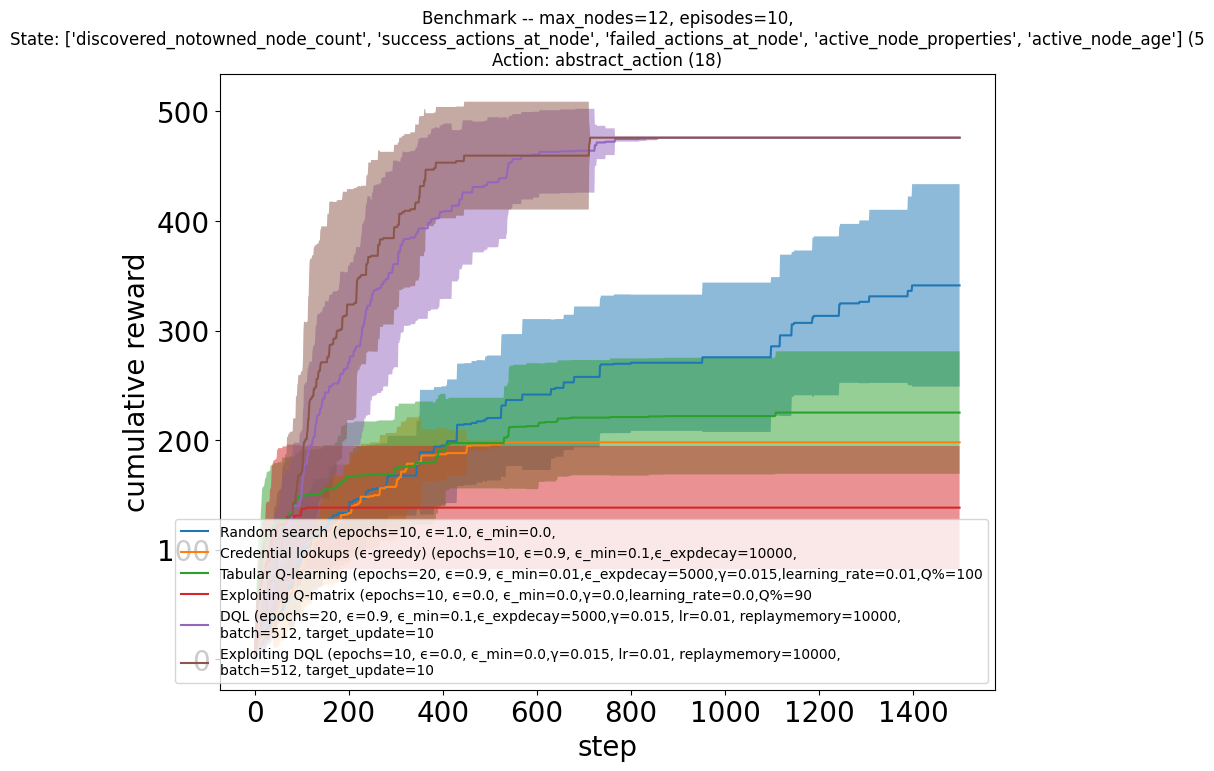

In [14]:
# Compare and plot results for all the agents
all_runs = [random_run, credlookup_run, tabularq_run, tabularq_exploit_run, dql_run, dql_exploit_run]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n"
    f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
    f"({len(themodel.state_space.feature_selection)}\n"
    f"Action: abstract_action ({themodel.action_space.flat_size()})",
    save_at=os.path.join(plots_dir, "benchmark-toyctf-cumrewards.png"),

)

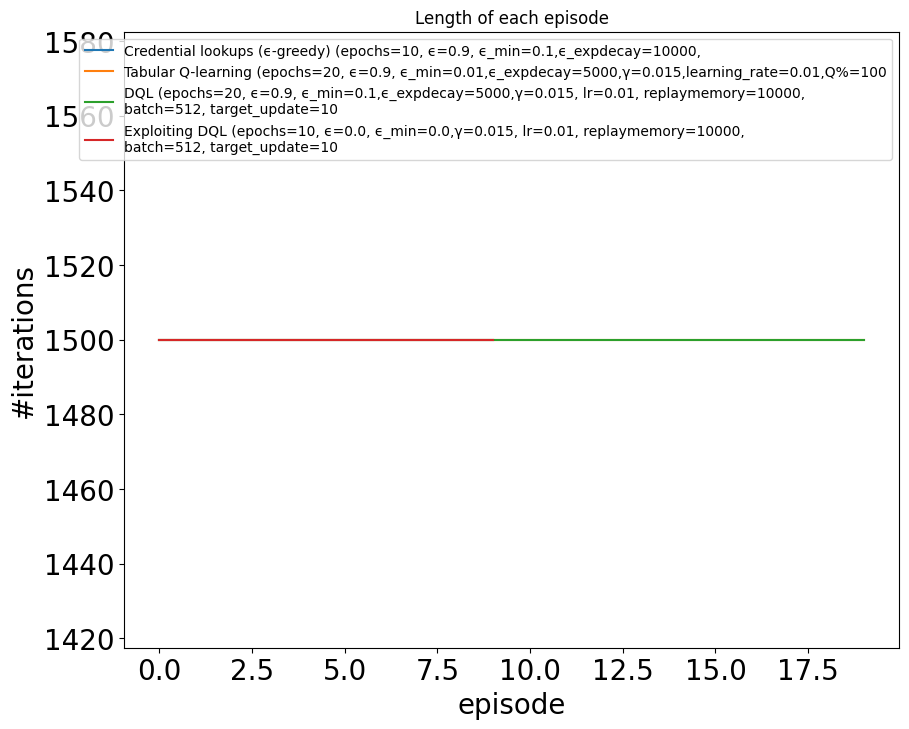

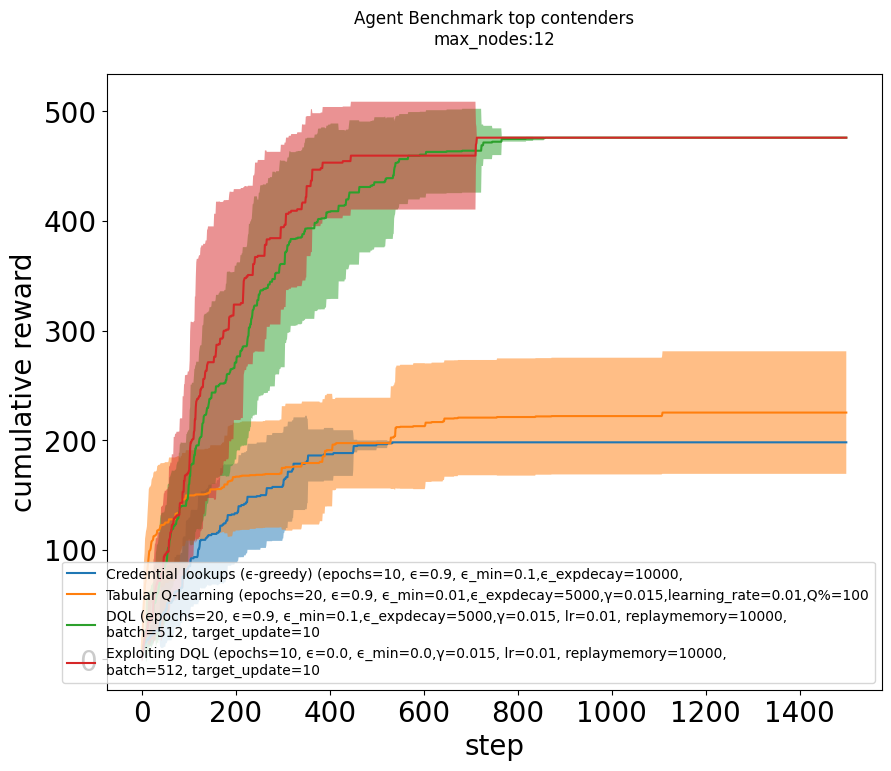

In [15]:
contenders = [credlookup_run, tabularq_run, dql_run, dql_exploit_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(title=f"Agent Benchmark top contenders\n" f"max_nodes:{ep.maximum_node_count}\n", all_runs=contenders,
                        save_at=os.path.join(plots_dir, "benchmark-toyctf-cumrewards_contenders.png"))

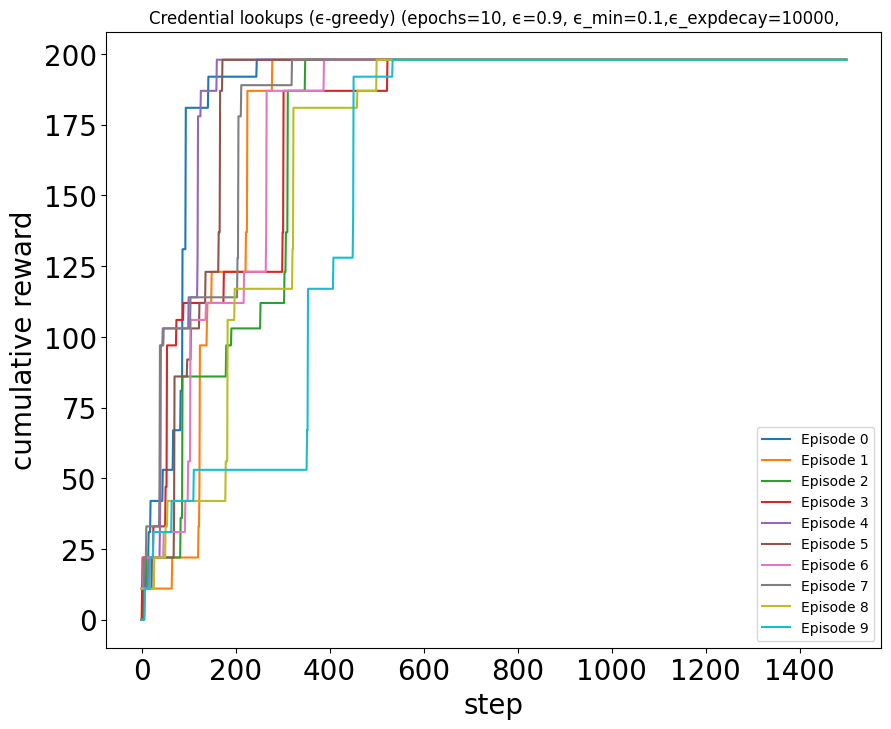

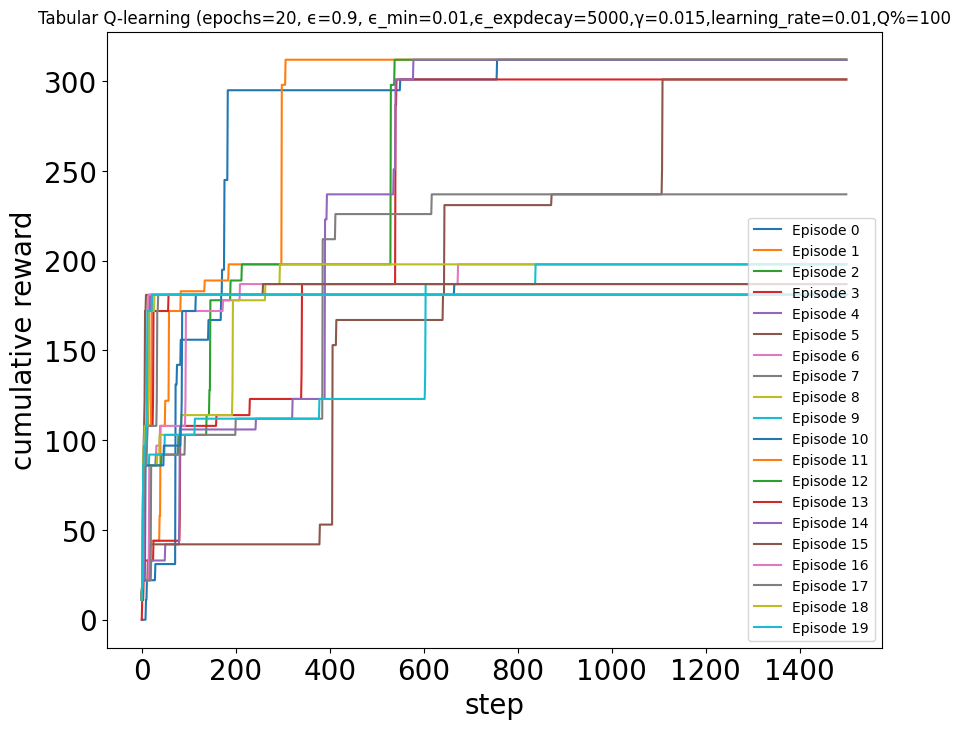

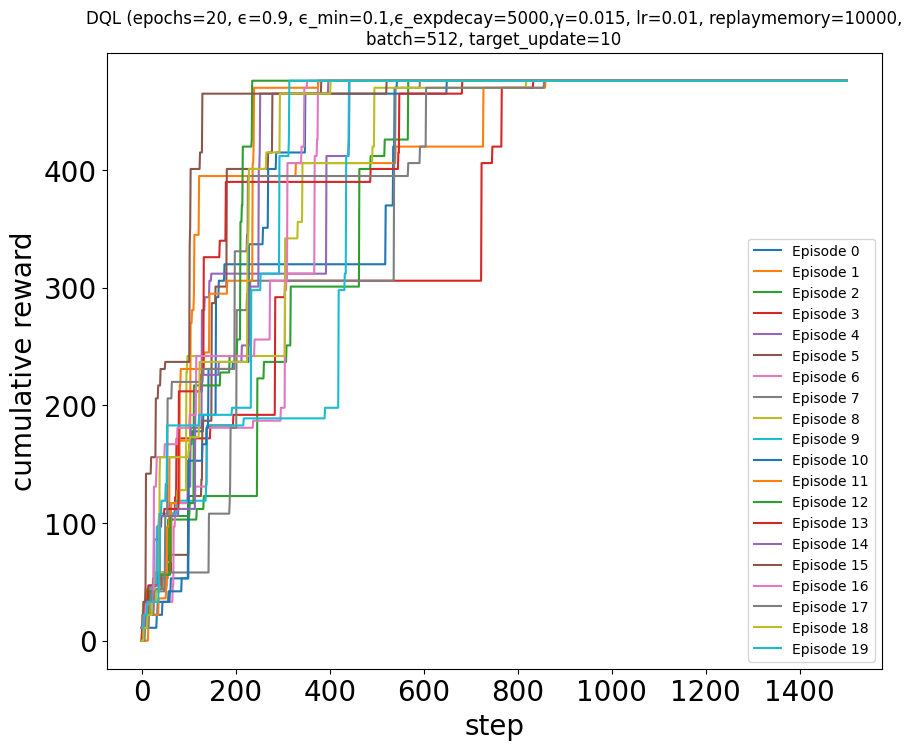

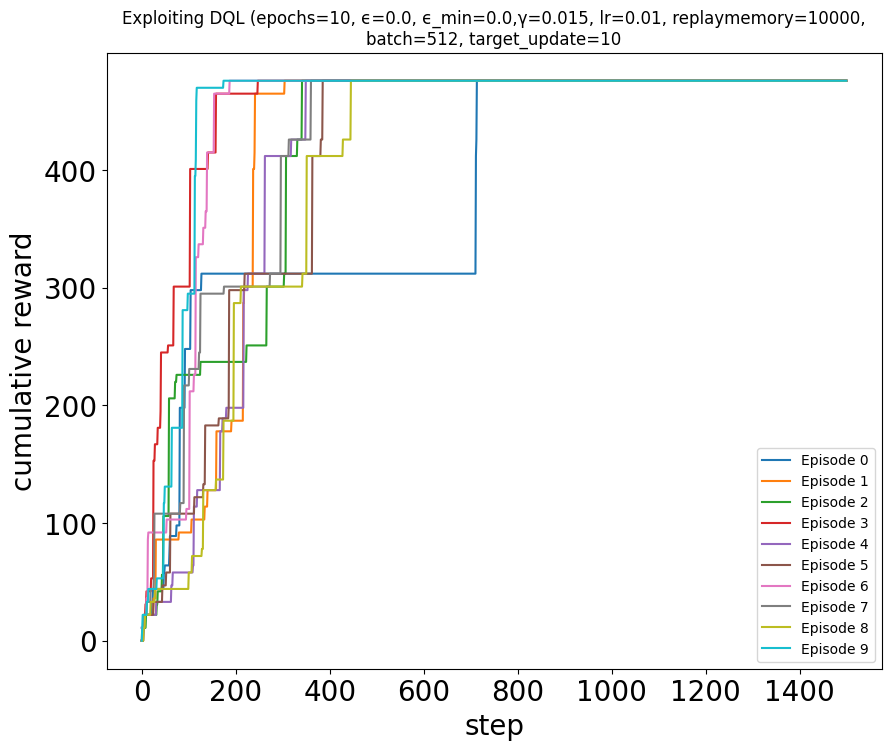

In [16]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)